## A digital river is the sequence where $a_{n+1}=a_n$ + sum of the digits of $a_n$.
## Part I: Exploring the characteristics of this sequence:

In [1]:
def gen_river(r, n):
    # r is the starting number for the sequence
    # n is the number of terms to be displayed
    lis = [r]
    for i in range(n):
        lis.append(lis[-1] + sum(map(int, str(lis[-1]))))
    return lis

In [2]:
# generating the first 20 terms in the digital rivers of the first 10 natural numbers
for i in range(1,11):
    print(gen_river(i,20))

[1, 2, 4, 8, 16, 23, 28, 38, 49, 62, 70, 77, 91, 101, 103, 107, 115, 122, 127, 137, 148]
[2, 4, 8, 16, 23, 28, 38, 49, 62, 70, 77, 91, 101, 103, 107, 115, 122, 127, 137, 148, 161]
[3, 6, 12, 15, 21, 24, 30, 33, 39, 51, 57, 69, 84, 96, 111, 114, 120, 123, 129, 141, 147]
[4, 8, 16, 23, 28, 38, 49, 62, 70, 77, 91, 101, 103, 107, 115, 122, 127, 137, 148, 161, 169]
[5, 10, 11, 13, 17, 25, 32, 37, 47, 58, 71, 79, 95, 109, 119, 130, 134, 142, 149, 163, 173]
[6, 12, 15, 21, 24, 30, 33, 39, 51, 57, 69, 84, 96, 111, 114, 120, 123, 129, 141, 147, 159]
[7, 14, 19, 29, 40, 44, 52, 59, 73, 83, 94, 107, 115, 122, 127, 137, 148, 161, 169, 185, 199]
[8, 16, 23, 28, 38, 49, 62, 70, 77, 91, 101, 103, 107, 115, 122, 127, 137, 148, 161, 169, 185]
[9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99, 117, 126, 135, 144, 153, 162, 171, 180, 189, 207]
[10, 11, 13, 17, 25, 32, 37, 47, 58, 71, 79, 95, 109, 119, 130, 134, 142, 149, 163, 173, 184]


### Let's plot the digital rivers of the first 1000 natural numbers, and see if there's anything interesting going on

In [3]:
import matplotlib.pyplot as plt

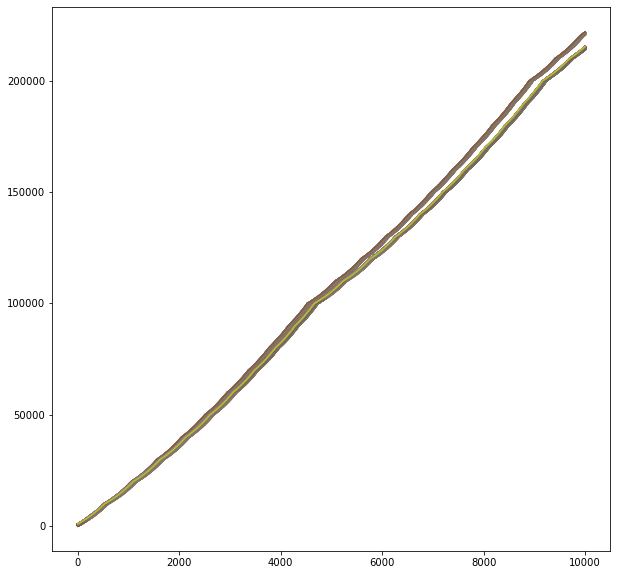

In [4]:
plt.figure(figsize=(10,10))
for i in range(1,1000):
    plt.plot(gen_river(i,10000))

### Looks like there is indeed something interesting going on - there are 2 branches that emerge somewhere between x=4000 & x=6000. Let's try to find out which numbers' rivers go in the top branch, and which numbers' rivers go in the bottom branch.

### Let's start by checking if its simply a matter of odd numbers falling in one branch and even numbers in the the other branch. Let's color the even numbers' rivers in blue and odd numbers' rivers in red.

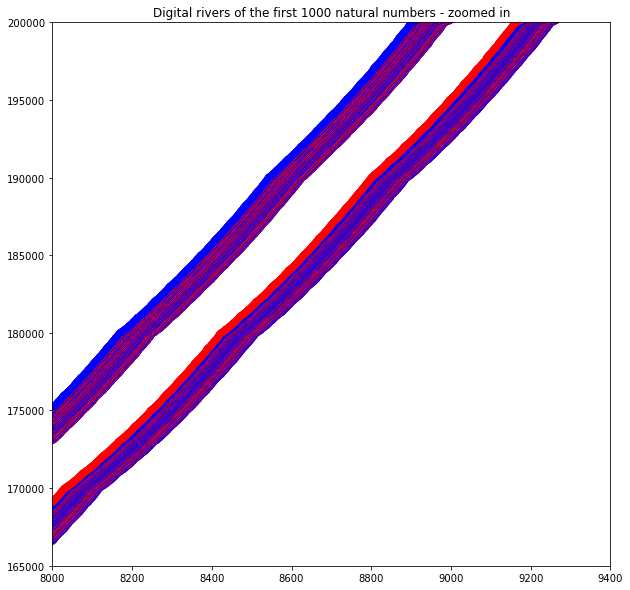

Time taken: 49.81833243370056s


In [5]:
import time

plt.figure(figsize=(10,10))

t=time.time()
for i in range(1,1000):
    if i%2==0:
        plt.plot(gen_river(i,10000), 'bo')
    else:
        plt.plot(gen_river(i,10000), 'ro')
plt.xlim(8000,9400)
plt.ylim(165000,200000)
plt.title('Digital rivers of the first 1000 natural numbers - zoomed in')
plt.show()
print('Time taken: '+str(time.time()-t)+'s')

### Doesn't look like its as simple as an odd-even segregation. Let's examine further...

### Now, normal rivers can meet, and the same is true for digital rivers. This happens when two digital rivers share some of the same values. For example: river 480 meets river 483 at 519, meets river 507 at 507, and never meets river 481. 

### There are 2 interesting properties though. It turns out that every digital river will eventually meet river 1, river 3 or river 9. It also turns out that river 1, river 3 and river 9 will never meet each other. More about this (and their proofs) can be found here: https://www.olympiad.org.uk/papers/1999/bio/bio99r1s1.html

c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


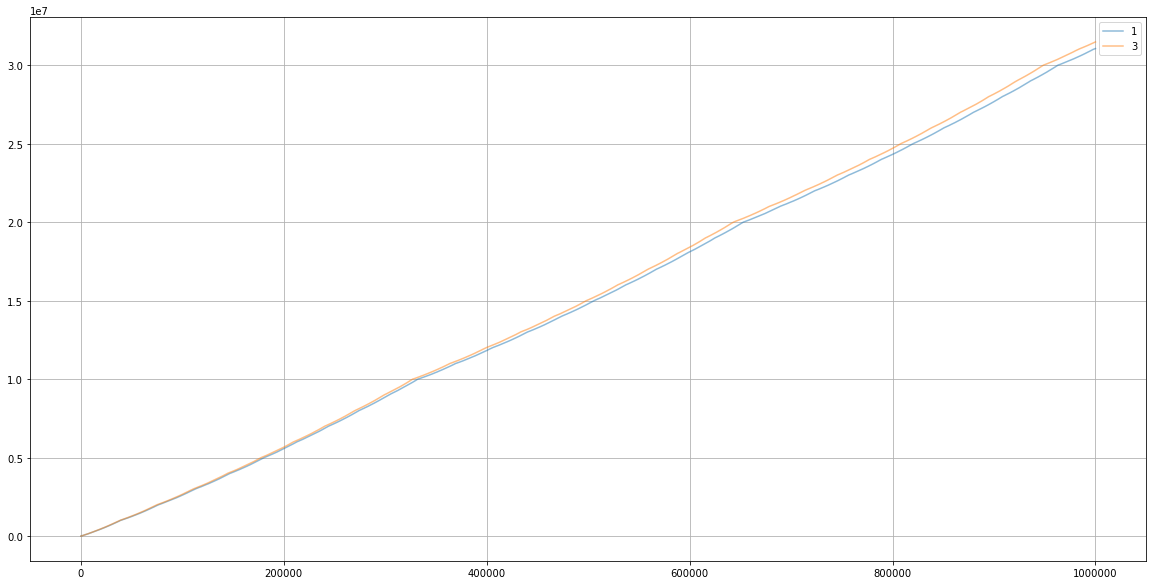

In [6]:
lis = [1,3]
plt.figure(figsize=(20,10))
for i in lis:
    plt.plot(gen_river(i,1000000), alpha=0.5)
plt.legend(lis)
plt.grid()
# plt.xlim(5900,6100)
# plt.ylim(120000,125000)

In [7]:
river_1=gen_river(1,10000000)
river_3=gen_river(3,10000000)
river_9=gen_river(9,10000000)

print(list(set(river_3).intersection(river_9))) # the rivers of 3 and 9 do not have any common values (i.e., they don't 
                                                # meet/intersect anywhere, at least in the integer points of definition)
    
print(list(set(river_1).intersection(river_3))) # Same with the rivers of 1 & 3, and 1 & 9. Apparently, these are the only 3 
                                                # rivers that do not intersect. All other rivers intersect at lest one of these
                                                # 3 rivers at at least 1 point
    
print(list(set(river_1).intersection(river_9)))

[]
[]
[]


### We can see that the 3 intersections are indeed empty, thus showing that (at least for the first 10 million steps) these 3 rivers don't meet anywhere. If we zoom in on these rivers on the first 20 steps, we can see that they never meet at thier integer points of definition.

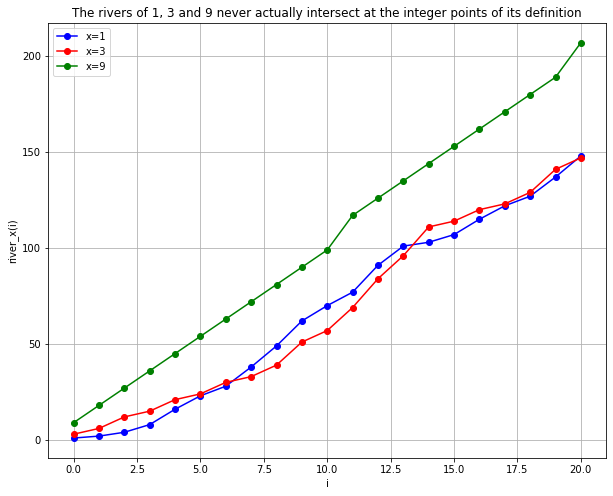

In [8]:
plt.figure(figsize=(10,8))

plt.plot(gen_river(1,20), 'bo-')
plt.plot(gen_river(3,20), 'ro-')
plt.plot(gen_river(9,20), 'go-')

plt.legend(['x=1', 'x=3', 'x=9'])
plt.xlabel('i')
plt.ylabel('river_x(i)')
plt.title('The rivers of 1, 3 and 9 never actually intersect at the integer points of its definition')
plt.grid()

### So, its reasonable to think that if we focus our analysis of digital rivers around these 3 numbers, we might get to somewhere. Firstly, lets see if the 2 branches that appear have anything to do with it. Perhaps, rivers of numbers that are factors of 3 end up in one branch, and others in the other branch? Let's explore...

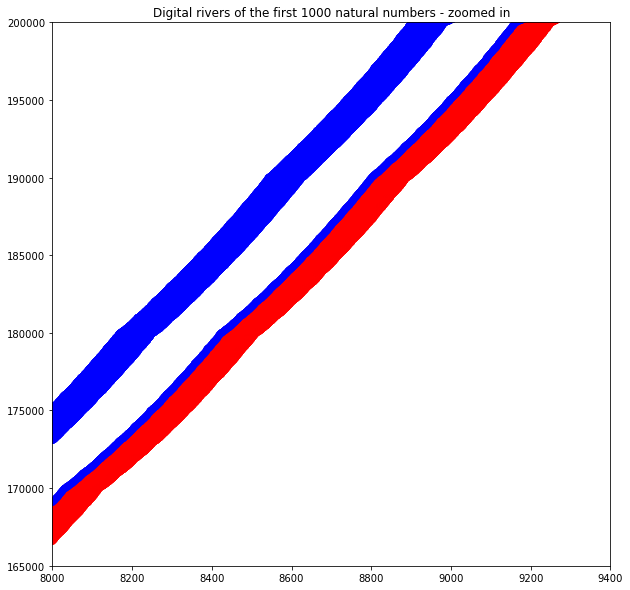

In [9]:
plt.figure(figsize=(10,10))

for i in range(1,1000):
    if i%3==0:
        plt.plot(gen_river(i,10000), 'bo')
    else:
        plt.plot(gen_river(i,10000), 'ro')
plt.xlim(8000,9400)
plt.ylim(165000,200000)
plt.title('Digital rivers of the first 1000 natural numbers - zoomed in')
plt.show()

### Looks promising!!! Almost all the rivers of multiples of 3 are in the upper branch; only a few rivers of multiples of 3 are in the lowe branch. Let's see if rivers of multiples of 9 (but not of 3) can lead to more answers.

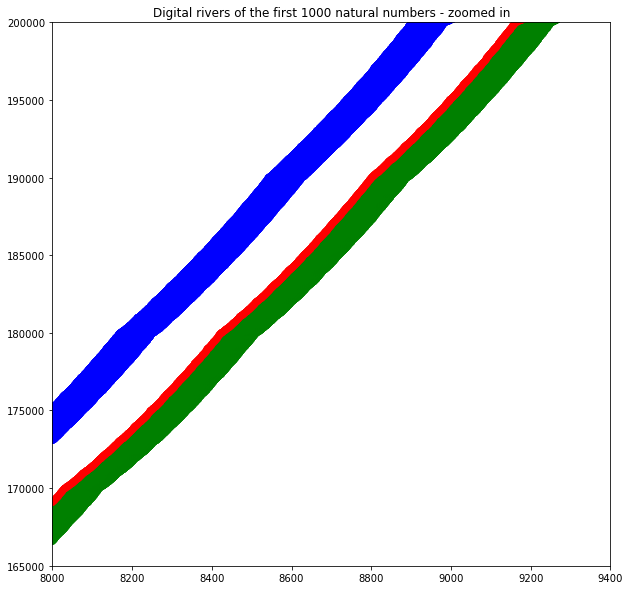

In [10]:
plt.figure(figsize=(10,10))

for i in range(1,1000):
    if i%3==0 and i%9!=0:
        plt.plot(gen_river(i,10000), 'bo')
    elif i%9!=0:
        plt.plot(gen_river(i,10000), 'go')
    else:
        plt.plot(gen_river(i,10000), 'ro')
plt.xlim(8000,9400)
plt.ylim(165000,200000)
plt.title('Digital rivers of the first 1000 natural numbers - zoomed in')
plt.show()

### Yes, that's it. Turns out, all rivers of multiples of 3 (but not 9) are in the upper branch, all rivers of multiples of 9 are in the bottom part of the lower branch.

### However, the rivers of all other numbers are in spread across the spectrum of the lower branch. We can verify this by plotting only the rivers of non-multiples of 3 and 9, where we can see that its not as narrow as it appears in the plot above.

(165000, 200000)

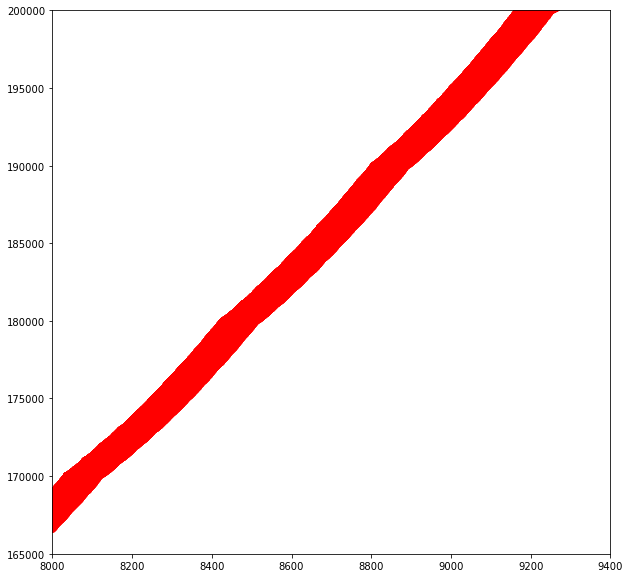

In [11]:
plt.figure(figsize=(10,10))
for i in range(1,1000):
    if i%3!=0 and i%9!=0:
        plt.plot(gen_river(i,10000), 'ro')
plt.xlim(8000,9400)
plt.ylim(165000,200000)

### This is an interesting result. Perhaps we can prove mathematically why this is true? At the very least, we need to be able to explain and understand qualitatively why the rivers of multiples of 3 (but not 9) diverge upwards, and those of 9 diverge downwards. 

### Anyway, let's continue our analysis...

# Part II: The difference between these rivers show fractal like properties!!!

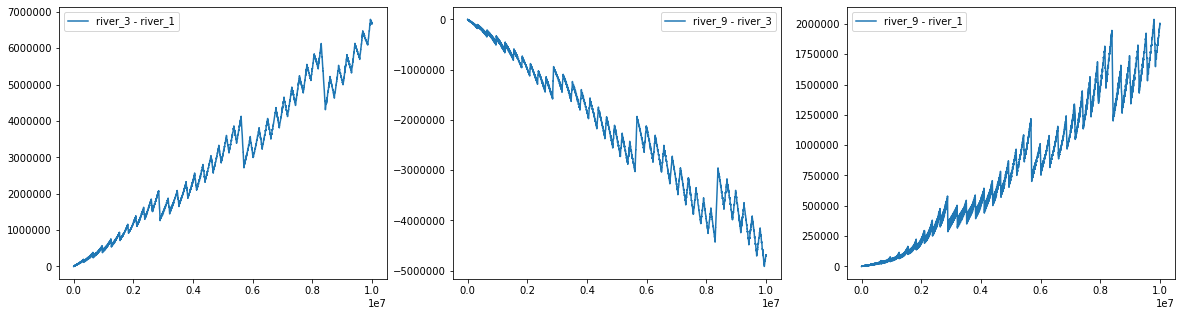

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot([i - j for i, j in zip(river_3, river_1)])
plt.legend(['river_3 - river_1'])

plt.subplot(1,3,2)
plt.plot([i - j for i, j in zip(river_9, river_3)])
plt.legend(['river_9 - river_3'])

plt.subplot(1,3,3)
plt.plot([i - j for i, j in zip(river_9, river_1)])
plt.legend(['river_9 - river_1'])

### (River 3 - River 1) and (River 9 - River 3) look like they're almost mirror images of each other. Let's plot them on the same chart and see if that's true.

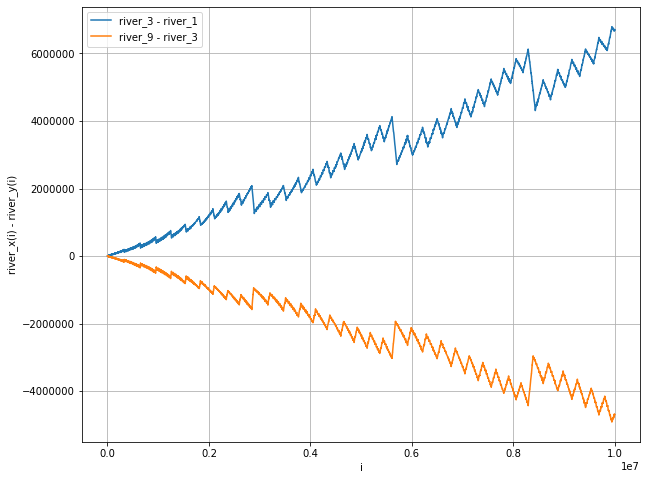

In [13]:
plt.figure(figsize=(10,8))
plt.plot([i - j for i, j in zip(river_3, river_1)])
plt.plot([i - j for i, j in zip(river_9, river_3)])
plt.legend(['river_3 - river_1', 'river_9 - river_3'])
plt.xlabel('i')
plt.ylabel('river_x(i) - river_y(i)')
plt.grid()
plt.show()

### Turns out, almost, but maybe not quite. At least, they are not mirror images of each other reflected around the x-axis (i.e., y=0). But they may be mirror images around some other straight line with a slight upwards slope (i.e., y=mx+c, where $m \in (0,1]$)

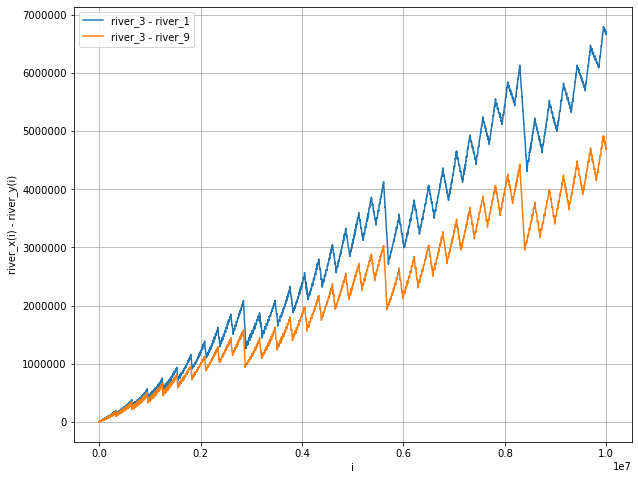

In [14]:
plt.figure(figsize=(10,8))
plt.plot([i - j for i, j in zip(river_3, river_1)])
plt.plot([i - j for i, j in zip(river_3, river_9)])
plt.legend(['river_3 - river_1', 'river_3 - river_9'])
plt.xlabel('i')
plt.ylabel('river_x(i) - river_y(i)')
plt.grid()
plt.show()

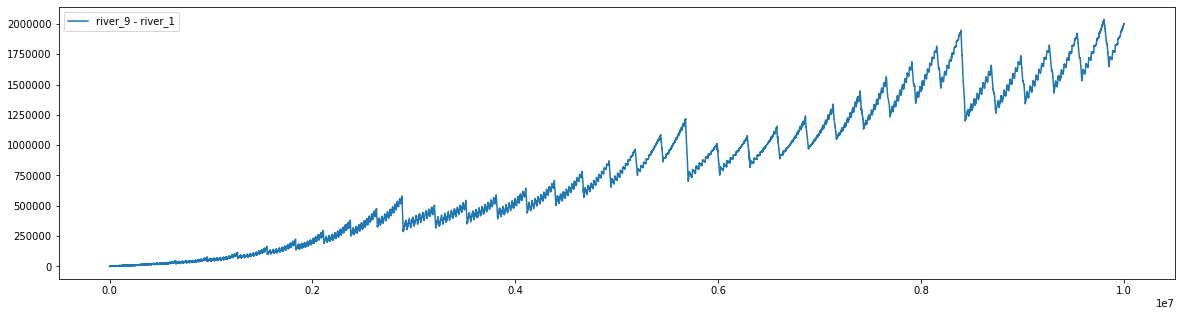

In [15]:
plt.figure(figsize=(20,5))
plt.plot([i - j for i, j in zip(river_9, river_1)])
plt.legend(['river_9 - river_1'])

### Even the sum of differences of rivers shows fractal properties, albeit some different kind of fractal properties.

Text(0, 0.5, '(river_3 - river_1) + (river_3 - river_9)')

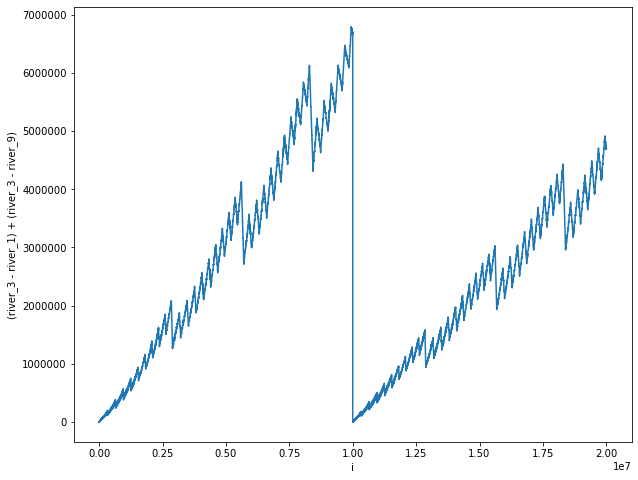

In [16]:
plt.figure(figsize=(10,8))

plt.plot([i - j for i, j in zip(river_3, river_1)] + [i - j for i, j in zip(river_3, river_9)])
plt.xlabel('i')
plt.ylabel('(river_3 - river_1) + (river_3 - river_9)')

# Part III: Modulus of river sequence values

When taking the modulus of the values in river sequences, it turns out that the differences are "uniform" for modulus of 1, 3 and 9, and "rough" for other modulus values 

Perhaps this "low energy state" for 1, 3 & 9 might have some connection with why these are the only rivers that do not intersect, and why all other rivers interesect with at least one of them at at least 1 point??

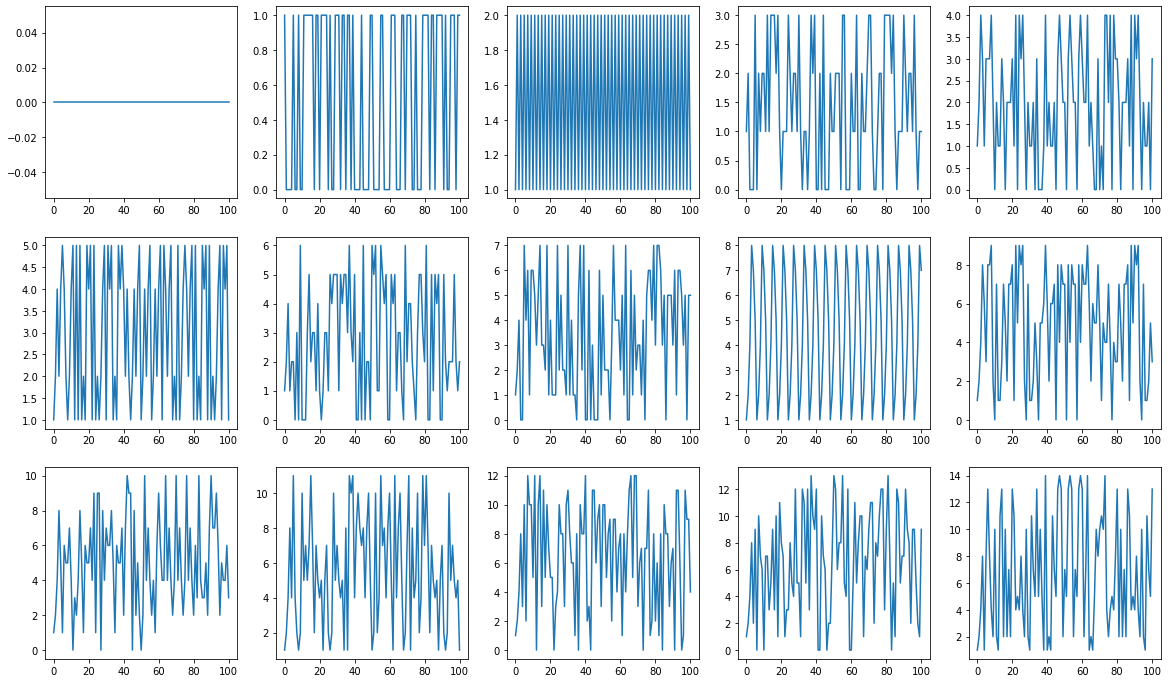

In [17]:
plt.figure(figsize=(20,12))

count=1
for j in range(1,16):
    l = []
    for i in gen_river(1,100): 
        l.append(i%j)
        
    plt.subplot(3,5,count) 
    plt.plot(l)
    
    count+=1data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABJAAAAKrCAYAAACuvXd9AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8li6FKAAAgAElEQVR4nOy9e7gtR3Uf+Kvuvfe590riYSQDlgTCRoAxscGRiTKMXxg74HhMMpk4JmM78ffNEE/sDBhsEr+C7XyeZMaxxyEwYGwUQ8DmDQYsgk3MywK9ka6eiIueF72uEHpc3cfZu7vmj+7VtWrVqura5+x97uWe+n3f+c45XdX16uquql/91ipjrUVBQUFBQUFBQUFBQUFBQUFBQUEM1YkuQEFBQUFBQUFBQUFBQUFBQUHByY1CIBUUFBQUFBQUFBQUFBQUFBQUJFEIpIKCgoKCgoKCgoKCgoKCgoKCJAqBVFBQUFBQUFBQUFBQUFBQUFCQRCGQCgoKCgoKCgoKCgoKCgoKCgqSmJzoAmwFZ555pj3vvPNOdDEKCk4IrrrqqgestWed6HJoKO9mwW5GeTcLCk5OlHezoODkRHk3CwpOTqTezW9IAum8887DlVdeeaKLUVBwQmCMueNElyGG8m4W7GaUd7Og4OREeTcLCk5OlHezoODkROrdLCZsBQUFBQUFBQUFBQUFBQUFBQVJFAKpoKCgoKCgoKCgoKCgoKCgoCCJQiAVFBQUFBQUFBQUFBQUFBQUFCRRCKSCgoKCgoKCgoKCgoKCgoKCgiQKgVRQsAthjLnIGHO/Meb6SLgxxrzBGHPAGLPfGPPdO13GgoLdBmPMucaYTxljbjLG3GCMeZUSp7ybBQU7DGPMHmPM5caYa/t387eUOOXdLCg4QTDG1MaYLxpjPqaElXezoGCFKARSQcHuxJ8AeGki/GUAzu9/XgngzTtQpoKC3Y4FgNdaa78dwIUAft4Y81wRp7ybBQU7j+MAXmyt/S4AzwfwUmPMhSJOeTcLCk4cXgXgpkhYeTcLClaIyYkuQEFBwc7DWvtZY8x5iSgvB/AOa60FcKkx5gnGmKdaa+/Zap6HHj2OP/zMV/APv/tsfMe3PF6N8+Bjm/jkjffhJ77nXF5WvPOyO/GPvvts7Ju5T9afX/NVXHfw4WSee6Y1/vfv+1Y8fu8UV9/5dVy8/x4YA/zjC87Fs558Bu575Bj+yyW3Y9G00fuu/+rDePjoHC965plD+L0PH8OffN7dZwzwExeci/OffIYX9j8880l48XOejEXT4s2f/goePjrH2U/ci5990TMAAJ+44V4868ln4BlnnqaWv20t3nnZHfiJC87Fnmmtxrnn4aP4k8/fjqaxeNEzz8QPPuebo+3xgasO4qZ7HsHeWY1/8f3fhtM39CHg7oeO4u1f6NIEgKoy+Cffcy6+7azTg7jvu/IufOneR7GvT/O0jQkuv+1B/OUN9w5xeBjh4uvuwfO+5fF42pP2BWm+98q7cMu9jwbXv+9ZZ+H7nnUWji8avPnTX8HhYws8/czT8NMXPr2774q7cMt94X3f/+yz8L3nn4VF0+Jdl92JV7zwaZhN3P7Je664E1++7/Dw/3lnnoaf6tPkYf/07zwN36q0warQv1/39H8/aoy5CcDZAG5k0Vb+bhIOfv0IrrnrIfzYd34LgO4de+EzvglPffxe3PXgEVx7MB62/+DD+Pvf+dQh7O8840l4yuP3LBX24S9+FRd+qwu77qsP40f/Vhh259eO4Pq7/bC/+21PwpMf14XdcPfDeFlG2Ie+eBAv+rYz8c2P24M7vvYYbrz7kWjYTfc8gpc+rwv74NUH8T8+MxF2/pn45jP24PYHHsPN96bCHsVLn/cUAN27+b3Piod937POwllnbOC2Bx7DLfc9ir/3HeNh77/qIL6/D7v10GF8+f7DXtgPPPssnHl6GPa+K+/CDz7nm4ewA/cfxo+wsBc/55vxpJGwrxw6jFsPPYYffu6TAXTv9A8lwl7y7U/GN502w4H7D+O2B+Jhtz/wGF5CYVfchZc8twtbN/r3jT4S0/7HimhrezdT+NK9j+Luh44mv/0cDx+d4y/234NXvPBcGGNw8XX34Oo7vj6En3nGBv7F930rjDH41M3341uesBfPfsoZ6TSPzHHx9ffgJ7+nSzOFT918P85+4l4868npNAk33v0IDh0+ju9/1lmw1uJdl92Jf/CCs6Pj10NHNvGJG+7FP/mep2Wln0LbWrz5M1/B1x/bxJMftwf/2/c+Y7R+QHzekgLNafj8IxdNa/HmTx/AQ0fm3nU+33ng8HF86ub78Y8vODeSisPY3IRw6NHj+Owth/CP/vY52WVdB4wx5wD4+wB+B8BrlChrfzf/Yv89+Ftn63MajnsfPoZLb/0a/sELzl5V1gE+tv9uPP/cJ+CcJ+7D3Q8dxRW3P4iXP7/L76PX3o0XPK0LWyXmTYt3XXoH/tcLn45pna9PWea+K25/EJUB/vbTvykZb3PR4k8vuwM/deHTMRFppsKWwWdvOYTP3nIIdWXw03/36TjnifvUOQ3NP7YKOW+R848b7n5kmAvtJIoCqaCgQMPZAO5i/x/srwUwxrzSGHOlMebKQ4cORRN8+Ogcf/w3t+Erhx6Lxrn4unvwug/sxwOHjw/XvnLoMH7jw9fjUzf7af/2R2/En3z+dvzZ5XeqP++87A688VMH8PkDDwAA/uizt+Jtl9yGP/rcbXjXpXcAAP7b9ffiLZ/5Cv5Uue8LX+nue9OnDuDffexGL++PX3+Pd98ffe42/Onldw51eMtnvoKLLrkNv/uJWwAAt9x3GL/3V7fgoktuw2999EY8cqyb5P3y+67Ff/3CHdH2uOneR/Bv//wGfO7LD0Tj/MX+e/CHn7kVF11yG37vr74UjQcA//bPr8dFl9yG//zXB3D5bV+LxvvotXfjDz9z61C/t372Vrz3irvUuL/Rp/mGvz6Ay29/EADw/336AN52yW1De77hrw/gij6M8Jr3XjO0mcSvf/h6vP0L/rO96JLb8Aef7Nrz+q8+gj/45Jdx0SW34Tc+fD2OLxoAwK99+LrIfV8GAFx78CG8/iM34PLb/LL82odcfm//wu349Q9fj3lPDv4qC7v3kWOJ1l0teoL3BQAuE0ErfzcJ773iLrzq3dcAABZNi1e/5xq8/8qDXdiVd+HVfdi8afGqd1+DD1zVhb3nirvw6vd8EUA3OXvVu6/BB64Ow44vGi/s3VfciV98T5fmsXmDV7/nGnzwi13Yn11+J14dC9Puu/qrAIA/vfxO/OJ7/bAPfTEMO7rZ4Bffc60X9pr3XgsAOLK5wC++51p8+Jo+7DI/7DXvdWHvuuxOvLYPe+x4F/bnX7y7D7sDv/S+/QCAw33YR67hYd19jx6b47Xvc2HvvPQO/HIf9giFXevCfikS9l+/4O57+Ogcv/S+a/FRCrv0Drzu/fvHw47M8cvv34+P9WHv+MIdeN0HurCHjmx2YfvvGcL+dSzs87cPYV9/bBOve/9+/MV1XdjbP387/k0f9iCF7af8XNjXDh8P7/tgF/bA4eN43Qf24+Lr1srNeOhNZK4BcD+Av7LW7ti7mcLb/uZW/PqHVWt0FX9143341Q9dh68+dBQA8Dt/cdMwlr7j0jvwHz5+Mw5+vQv7tQ9dhz/+3K2jaX7ixnvxKx+8Dnc/PP6N/LUPXYe3fe627PK+9bNfwev/vKvfbQ88hl//8PX47zfdF43/8evvxb/+wHW4fwXf61sfeAy/+4kv4aJLbsPvXHwTHji8mXVfbN6Swus/cgMuuuQ2vPFTB3DJgfiYr+HL9z+K//iXt+Adl97hjX98vvORa+7GL79/Px4WJJOG171/P97++dtH43302rvx2vddO8xpTiD+AMDrALSR8LW/m7/43mvwrsvj8znC+6+6C69+zzU4Nm+y014Wr373NXhPP2f7wFUH8ap3X4PNRYu2tXjVu78Ync9tB1fd8XX85kdvxFWMjM7B5bc9iN/86I248vbx+/7vj9+M/9jPq1O47Lav4Tc/eiOuvvOhaH7X3BWGLYM/+GQ3p//Dz96KP+/Hbm3+8f5+nrRVyHnLa957LT7Qz3feeekdw/xjp1EUSAUFBRq0LTa529pdtPatAN4KABdccIEaBwCqPsW2jUYZFD0NizPvVTCL1p8XLFqLn7rw6fjNH/8ONa0D9z+Kl/z+Z7Fo7RD/OU95HA49esy7BgBf+JUfGnb7vnzfo/jh/9fdN2+sVx5evst+9Ydwxp4pXvDbfzlco98veuaZuK+fwPJrn/vyA4OyZ9FaNG1svgMsGkozEYelfejR49F4FJfKQGmn0rz6N34Ye6Y1nvf6TwzXJBqWZtO4NnjBuU/AB//li7D/4EP48TdeErThoonXvWkt/o/v/zb80t979nDtn/+Xy/H1xzaHcKrz5778ACiZRWvxr37wmXjNj7j7/tlFl+Oho93kNtWX/s8fOh+v+eFn4U2fOoDf/cSX0FoLa7tn/ws/dD5+8YefFW2vVcMYczqADwB4tbX2ERms3LKtd5Mwb7v6WmvRWAtr4b0HC9HHh7C2Hf5ubR/WKGF9sw/3N3Z4FnSf/25YPaxpg/eN+hIPC8rrhbVenAV7z+X3gdc9DGsTYa5+vF5BmNKuQ9mbeP2CsFZrF6V+4jvLw+ayXdp2yGce1KH16uOFtXbIZ0izUdqzaUWaYVs3jasff168DjsBa20D4PnGmCcA+JAx5nnWWs7crO3dTIG/RznYXPTPpXHP8R9fcA7+/f/8nfjotXfjX/3ZFwdS/ui8Gcj0nDSPbo4vijebNitNHv/o3JUHQHr8En1qOwjG7sw0jy9cn83FsXmDFz/nyfjkTfct1T6Aa483vuIFgyIQAC78v/47js37Z9O33Wbm88whOCit1PNYN4wxPwbgfmvtVcaYH4hFU66t7N201mJz0eLI8fE2e6x/R+ZNG1WWbwdtP37wbzHQPf9pbdBa1z9XifkW+8JjxxcAus2Z0bibDWb1eNkf65/DY0qa9G2bb7PPNq3F955/Fj5zy6Hh+3d83gbzlpx6pTBX5i2U5mObzVCfnUZRIBUUFGg4CIDrnM8BcPd2Eqx7Bik1AaPvOY8jP8aEtrVIKclJZk73ta1FZbrr/BrgyC1+H8+3EXk3w31m+D0s2Pq407oKrk2oDWhB3IZpe/kM8eL1pDymdRW0kURr7VCGVNxW1M+Y+HNrWjvIjnm9eNvwcg73WRutV9M/K47KGC99AF6+tic8pHlBZVx9WqUvyT5A5W1bgIpcZZgsrArGmCk68uhd1toPKlFW/m4SXPs4smd4V9g7I9+ftu3angg3wPUFL0w8v6a1aCP3NYxACsPY3+IdaaxyH7t/eK+pfixOo9SL6h5caxPtYfl9rly8LF6YVvec+smwVmljG9Zdi9ModZZtrdUzqLPXLtTGCOK0kbJ4YUMcVr/IfTsJa+1DAD6N0I/g2t7NFFLf0lh8wO+L9I0j014iHY4vWuSss+jZ5ixmxsY9LT4teOl3ctxsV9c3KA05do9B9vkxWNvVcd+sXuq+IT/rj9mE2aQangm1XU7aTU+IjMZbYVtvAy8C8OPGmNsBvBvAi40x7xRx1vpuEllzJINAJZJ1XaRbbBw7utkM5dsueaKBbzosA0kOJ+NuLvLaeL7o44dx5yvafGisRV0Z1JVhG1LhJk5OeZP5tOG8hdI8utn087Wdf/8KgVRQUKDhIwB+pj+54kIAD2/XVrwy48SFFQuV7lr3W45JrbWoEwv7WhJI9LE3Jpjc1YytoL+HfHtiws/bj1tVxi2WGFlk5bWe8KD/rXVpadDaIxZnwsoQQ2t5GdLxAFe/ujJDPmqaQ5uxBUnlE0g8PyJ7tHpRGlUliSD33HidKT9ZZkJdMcJQ6UtDHzBUV3fd9Q+16iuH6divtwG4yVr7+5FoK383CR7xkSINhn4d/nZ922aH8fdAvkdWzc+RUraV8Xm6Nhom+4T16hzmFw9T0vTaSpZBC3Pt4Oon2p/Fld8VHhavu/XaIbfuVqmDq6fWnok+lFn3eJvx8WD827hKGGPO6pVHMMbsBfASADeLaGt7N1MgEjYXjVSgtW5jYaMnkEhZsrlokwpYAi2Gc0gHro7IKm/ryAz6naqv7FPbQTB2Z5Z7UFZmrqUXPdFOBNKy5EJs/NuYVN6zpLzGwEm7sXj894mAtfZXrLXnWGvPA/CTAP7aWvtTItpa3016XjmqLSI15ksSLbmQm670++i8ceTVGvLe6jeZypRHDDWZRFNcETkof7f5gWjbbl46qYynrgX8ect2TRVpow3wnyWw/r6UQjFhKyjYhTDG/BmAHwBwpjHmIIDXo3MKCmvtWwBcDOBHARwAcATAz243zypD+SJZdiBUGvDrkmTw8huULxS/U6dUJkyT79pRknxiJCdHVAdj3D1yt2daV8FO0LR26hbKPzUhbcTiOBVnWlejk9tOLZSjBKN2Qf/bqIMtr6tX3haoetKlYoTMcJ8Nr/EyUp4clXHxucqLyuHu89MzijqM12WoqyC8uCojx2nqivAiAD8N4Lre1woA/CqApwHrezcJupKlv8baLqpkaRVVjRfm38efZ0zhw+8LFT5KWiyuVNV4YTbsE0RKqWWPhWntwdpOfgNcGyfKbuNKKV52LSxoY68OYT5BWM4z5X1Bxud1D9oRwX2BEsmG9VOfqWi7HcBTAbzdGFOj23x9r7X2Y8aYnwPW/26mwPtEDqRSoGks6v5DvTHpCIzj8xaL3kQxh8yg55JLOjRLECSLVlEgJbKRfXk7oLSGsTszTfk+jIHqRQ63lyVk3FjlX9+YVjg+qMm6xeZY29N3LkdNtlXVyU5gJ99NWsBnkRsZZpjbgfa9BTqygfrxWhVIS6ZN7ZFLvjWT8fRTqqYc1xA56JSb3Tx0MOFm5DxXfm0HCz7+9c/y2KZfv0VjETlTYG0oBFJBwS6EtfYVI+EWwM+vMs9aUaJIaMSC3IXmcVOmRZK4sNaiNqQWomt9XI9AMuK+cNJIA8OgWjGhymVSK9cqX4HEd9s15CySuIoqT6nklyEW1xhHnFRGVze53dlQ7TXt85FKsLF6xXZSNSWRy9elJUnF2oRKMN6XZB+g37YFbKWXZV2w1v4NdF8NPM7K300C7/Ok7LHiXSGSxY8f9mdNCSPVLWm1ioubp2TRwsbz05RSNhJmlTD+24r86JqvorJKmCi7quxx/8fbaqtKKRbWhnWX30v+Pmn9Q7ZH+P7pzyQeNl6/dcNaux+dU3t5/S3s77W9mym0Nr0RIaH53KJvKZmwHV80g3Ilh8ygRU4OgbQVBVLTdj61jvcLpu2Om7kIx+68+xbiPRoD1WtQIC3ZsSkfOVbN6iog38bInuXIwPw+shOw1n4anXnpjr6bRErkkAVrJ5CUbyrlu2hNn/dJpEASapoUjjEfQ+l4cVJq3oyT0DlobWfVMKm5CVs4buaQisl8WLsGCqQ196UUCoFUUFCwI5DKHg3azqHcuefXU+t658vGTZYrY3pTKH8CzdORSim+k0CQyiWj+OepKxPsoE+Y+ocWWMmd1EjdvTg92VNXukpoKLMow5gSTKqytAWK8+3kk1KNtV7b8Pz531q9pLrLlcEpiagslC9XUATKpSquAuFlcWorVzepxDrVwZ+fpkSh34Gyh01YNXXRECbvYyobTREk09R8/shn6qmalLSGMEXdMtRP3tcq7aK0T7R+NqU2UsrA8tWUPUQ8aYogIsBU1RVr71g+rWhjr/0TaarKrFg7tnr5grDguYXtd7IsXE8kuIlDDgIn5a0diIfBhG3RLmny5JtJjZV3md3/wTyuaQdSK0eVuwq/INrYvcx9uYtUqte+jXqpfGR+cvzbmNSB+d9Y2suSgfz3bgURMkdOAhO20I+dHfKd9/14Hc8rx2enhlwTtkX//s9b2uSMT8zIybSWpjxcY6ugeTJXIM3Z94naY9s+kJR5C/eBBJwYE7biA6mgoGBHQMRMakdOLib4Nc2ELaUMGZx2s0G06h3eSWfdng+kwPQtNA8YHC8zH0F80Dam888jF2Uz5gNJhmmQCy81Ttv5guI+glJpzYS5WSwu9y9Vs7pwUH6ziXA8zgiougoJK6mAkPUBEPi34n6mKA7lyxfTwX1MHab1Jfqb+3uiuLFJ+akKlQyhNlfJJfhxFGKAx4maUDG1im7C1oUFcRTCypl16eQEpRMjgrhyKTDf09ol4dw62S6s3BqhE20XTmwPO8xWxAnbmL9zMfOxmDNzIqzC9wgDYaURZBqpRHHC+K4N5PdBI6xknXcz+HiSg1CB1A4+kPZMSYHUMnOx8bQd6ZBeLFEfW1aBBHRmdWSOtexG1Fahjd05WLTLlYHqdVpvwrbsAl8zxwd6EzbhRHss7aUUSCfgNMSTEUQAHjsJFEiSIOGqFcp72VP+csC/J8uASJAxEzYqu7XjfXPwgaSasK1GNdfabl46rczQnnOWNjXDKnwgAf685WRQIBUCqaCgYEcQO42LQ5on8L99s6NuUZM0YRMmc9aiJ1rgLby4qRagm77JIrc2dLxNcdqefPFNrrrfvsmVn4/eHnlxOmIsHY+CchRI1rp2ADJM2IS8n7fPYMLmOa6O14ub5HHUBmF7kgKJPaPAhM0j96h+rC+1ro78/q6P6WU5VcHbJ2amZlvFiTNrX/ls6T5OeAxxuMpFPCPN3CwkRXhaIUkRM/XihI6ri8s3NONycSWhY7WwIN+402i1XRJEi1Z3re1k/EYN8+vOlSyhE+/wmfrt4vcFy9IJzQTTpn1tJMwj95SxYreCP5scDAu9xg7tTN+4Wd37QFo4siZnQchJnpx4yyzeKH9OaqVudyR0dhajaeWMmxyksMo2YevrtXdGCqTlCk/ZJE3Y+sVmtgIpY+G7Vb83pxoGE7ZlFEhrIHEABPOdwRfPvBkIrnUSSFs2YcskkIB8skkzi9sk0nObBHM31+8c7BMpRf1AMzfbKvg3k57lMVG/dfWlFAqBVFBQsCMYlD0ZEz8+wZGLx+5a9ztNIIk0rUVVwTdhszY0eRI+e2ImbHyeZrhj7v5kBqMoXzSTqyShlrGL2fZl4SZeGmQZxlRNlSDVtEnBYMI2OAe37P4uDiXjqX4S9aJ5s5QneyZsIl/+jCTXwx2Aa20uzdQ0J9q7RYGkmnEpKpLQ3MmRB5q50hAm77NhWKBc0pwxK++mpqpxZmoIwyKklKacaZW6a2WJ1j3VZlZTBCl11+6TYQpZp9Y91WbJdkH0Pk2tNd4uej5BWKIvrUJl8o0O/rxz4wN+H6LxeWPKTNia3t9QxtqE0tkcWcjI/pFV3j5qZ1ZHZUqMX+J7vx1IM+3ccnMz2xxsDk60iUBappQuHzn+bUyZCVum8qLNfJZASGzvVhDJuYwT7XUt+hfyu9k/m2ObzVoVK9t1oj3mA+nYpmuvsXZO+UByCqTttT/Nkye1wbyv+3xoe/eebduETRmfpWrrRBBIxQdSQUHBjoAULTnH76rmThbBtdTx6tJ0qu3JIumMWZo8OcWMiyMnR5QWv4c7060qcqxNde5+0wkY2pHaGrS6B3Ha3oSt0lVCMq0pU0Gl4taiftoEkdQ70zp0Di5N2KSCrPsdL2ctiaDKBGoRytda3icUEzbhH0fvS0IxZRlRuWsUSLzPh9fo/5iyh6t3WvGsSHXi3+ficsUK/83vCx02a0fT9/+3Wj48LF6WmEInpd7Rw5T2bLW66+Xs6i7rjESY+78V11olLGgXre7s3UkppZJ1j7x/o30p0dayzrsZXJmVA+63hv6ua98H0vFFg2NbUiClF0tbUSA1gwKpYQqk5eYRW0U4dufdR2XOrSaZmZ02nMK23IKQ6irHqo0JVyDlmbA5BVLxgZSL+TJOtPs462ozTakLdH6BJv2cab6GvLfsRJt8II18O47MF+7vkXbO84G0VDEDWEsmbFyB5L5P1Aw5Zo0pDCZsLX+Wvt+oE/H+FQKpoKBgR5BjwqbtHMpdaH4t5URPOm8mvzzdse4YrmnOmruyYCiLLDP38UP38Ilx1ZvKyckyDd6akkGDVvcgjnX5JSfVfZ15GeJx/XaJqZvc7qzvb4oTSO65h/VKpSknwmp7cn9FVu8TvF209mxFX6Lb29aireyQxm6A75dHTEJZ2wXKHmpftujXHFdHlT3s+Wm/cxxXu106BPdJMy5PRaWUKTT/iodxcxlNeUT/R9ulZeodRS0UVYK1eSox9b5I3b0wpbzhfVTe8Jlq5JLuTDtS91SbZX4/dwu0MSoFd3KWO9GIvqUbE2bCtiUfSOlV2VYIB1I0eGUaGb+A1fSNYOzOTFOqQMYgTdiWXRAOBFLgRJv7QMozYWsynyUA5gNp5xUQJxO4CduYg+d1K5Bi39uj8xZTev/WYcJml3+3u3L1apoRooWTc2NE3dF5XBE2OLre5veBlPaT2gzPf8HM46S/oq2C+1Ojd/NY38/W3ZdSKCZsBQUFOwKnCIrH0RQiUlnAr+U40Xb3d9fqyt+VDxQrQinFdxJcOf28ufqntWCKIH/hM6U2UBQQGnLi0C5ITCXk0vLLMKYEk/XTolOakzruA0n6lBqrV2wirPuUcsqnoU8k7tP6EpVFOtHmC1+Z5qkK3j6OIHHXut9cseI/D2vHlC/++83jblvZI4kdG/px0sO0uvtp2sz8grq37v+gDyphqlIqaH9WlixlT057ujBXvrDu8v3RvpGpsoT35/WlHKXUbgbvSzngpiaDAqn/UM9IgTRvB8Ih7xS2Ls4Y6bAVp8su7WYoU6qqq+wbwdid2caSiB0D1WvPtPY2S7LL2Te7HKtmk2pQEjkn2mMkX2/yNuIQvYvr+tJuxrx1ZOt8pC12yom2/N4enTdO/bSGvHM2PDVQmVbpA+lYwjH3QPZs8wNB64dJXTETNqdA4u2+3Xzot2Vp8m9tcaJdUFBwymJQdiy5c6j5upB+azTw49gpncFX0HBNOfZdKJeaNtztbFqp0PF33o3xfS1phEeO3FcqZzRQvcyYDyRRhrG4vsJKj091cMSYm0DQ7dKnFP9bJZCEU2sC9ymlTepjPiC44iynL/Hn79LcHQSSquyhPtg32agqJqF8kaodriySp69pysj868kAACAASURBVJ6UukVTSsWUPdxXU1AXm6feSap+lLS1+DLMve+urYN6sf+1Og9hMeKpRfBd4WFa+YZyKuUb6i7DUm2W6ks8TNRL7UuZC/RTGcv6FdKezYQR6JPKYLNpso99BzjpsHoFEiencsq0Sh9I2tidg8WSjnqpXhuTCpOq2vIpbHKo2pjUON74z2alCqQ2v4+cyuAL+JQ6pmnt8ByWPa0sF7GTUI9uLgYzsXUc+75VVWi2E23WrqMmbPO4CdtA9m3z+9DN9Q1mtQmdaLN5y7F5uy21Ex8HuarpsePOpG9dfSmFlRBIxpiXGmO+ZIw5YIz5N0q4Mca8oQ/fb4z5bhFeG2O+aIz52CrKU1BQcPJB+hbSIE1igFCG28UbX9hLIqi1ZOplxDVRTmmO1YbmAVK5VFfGm8R3SicTLKqmjLzJmfTn7GI21uWXatuB7MkgkDo/TsJETykDXZtO/DQb1j61eA5ePKUMlKb0b1V7ZoLw8m0t6xPBKWzsJDClL7WiL1VcgURk1i6xYXPtoxEPnJzw25O6hmd2pBAYUSfMLTtdSyNmRFlS5IRm5pR03tzKvhHWndeFpyHbR8bn/a6N1L21cUJHM+PSCKuh7TgpFUvTaoQVe0YByYegfsF9CgmWIqy8k/mC9nf3x/pSR6zBS3M3Q/odG4PvA6lrXD6ebfSqldxj3wFOOuT6QMpf8HDzuByzOrvCvtGKsTs3yWXVGMcZgVRX6c0gDbETQzcmFTYXLay12c+Tt/eYqq34QOrATcJSRAgPG1MqbbkswfjsSIedUCAtbcJGCqRRs7RG/XvZNAdyd5tmX03b+QqdVNWQJpmS8XkLABzLUPOl8gH8eYu1wENH50OcdfWlFLZNIBljagBvAvAyAM8F8ApjzHNFtJcBOL//eSWAN4vwVwG4abtlKSgoOHnBT7eKQS5WAQSmJvxangmbW5AQ0UJFkEQQLyePI4vcWt/JND/mntKU1wDuwDo0I9GQE8da7hw8lRa8MqTmhTQwEro2C2+gNCeMdKHfdUDI5NVLEjq8DLI9uQ8kKp7mFF1OpLSy6E60KSws56kI/q4Mba0QAxQmF2qWtZk041JJKUZAJYmZwOeSiyP7Eo+jmX0B3TfIiny8urMyyzAbtEuYHydIou2itbVSprBdwro3Nl4WjSQK2pilE5r28XYJnxvFTZkLyrQ4kST7kv/cRVr0PFoEhNVuxrJqLM/3WBuOpbPe8fJSPpCYn6JkvC0oVgZyat4O5lgpYmOVfWPYJKnDjZAUFuK9HQPVa9YTSMsu8Om7J+czg0niwpkkNiNp8zqOLUy3qjo51bCZSyAxQmNdZkcBUU8E0ma71lO7tvrebUWBNGrC1r9PWjxH8ixVzACt7RWbtRmeP/evxDnyHOfqMfBNI960X39sc/j7G9UH0gsBHLDW3mqt3QTwbgAvF3FeDuAdtsOlAJ5gjHkqABhjzgHw9wH88QrKUlBQcJJiIBISEw25IALcxEhTsOQpkNw9mnPr0ITNz0PuJFCaxiOQ/IW2IafWYkCdKOqW1ZiwGRiTJudiDq/1NH1TsJgTbalq4gs9ah9Kx1f9hNeGMKs/W8PbU+TLFReVGNWMolxK9SX+/JtIWU5V6OZYIqxNmGPZhBmX1RRBLu0YuZQ2Uwv7kqoIUu6P9QlPvSN/a2FamyltFzXVahOmWlYxU2PvWNSETSF7Ukopv12QX79Un1D70hL3tYryjP2Wdd7NkO/oGBZK+/sKpO7o92VM2OjZjJmwtco3eDTtPu5m07qj6HMIpBWsqah/TTLmL14ZMsZuDjIz25jUnt++XMTM+ulUvc2GPc+RtHmZ8xVlu/s9zDVh42HrWvTHvqnH5s1anS5vVY1GJM8YycLJoFy1ku5EezVjB7lqmNbVQIw74th67/CYyV0KmtIXAB5kBNI3qg+kswHcxf4/2F/LjfMHAF4HYHe78C8o2AUYV8l0gXx+I3fuu2vd75Rp0UBcsDSrQRlEH3nN5MkE98nJnLXWU6V4Dp7bTsWSdvqct2uc4xyVdkFqo6uEXFqyDPG4gQlb5Lm5evkqo5a1j2xP/rdWBkpD7qTW4rnxfPkz0pRLgboh0Ze4CZuNpHmqgtpCd+zs4oQKIvc/V6UsE7ZMfklyyQujfBC9T3OmHSuLHuYmd22y7jItLcz//nV1D8su65cME2qq1rpvQaASs1DahX8H/frxuGGYi6O1I/2fqrt8bqpCbufnzScdZBuOQSPwJpxAmlaew+osAqmPk6tAWuoUNkp77sqUun3Z9kjBjTVLmrA140opjuP9QndjWmFSmaV9msTGqo1pf6rePF9R5hNII07Rt0ganGrgz+soO25ewjdhWxOBFPneHtlcrPXY962S+kcynWgfWcYH0mbcB9Lgr2i7BJIlE7bwFDY+lgLjiqkUGm/cc2k+eAookLSZtXwqahxjzI8BuN9ae9VoJsa80hhzpTHmykOHDm2lnAUFBScY1ZhKRtmd1FRJjiyI52V6VQ6/n5xo80Wf5nSZwqgs1voTQalc8lQu1jm1pgWS84EUOmhOqouo7ImxgXZBYiqhIV6f1mBGN5KvdKKtTcYpv2klfCCx9tFMF6VjZi1NydlU3KeUFflap0jQFGUx/yz8b+lEu3Mo7F871cGVQVFlj0LaqL5wWiVMPD8+MVpK3dI/Ps8JM13LVLfE1Ekph95Nq4RltQtT+wTtoii5lPZMO6dOhCltrqmLZN2lisNTibVKm8kwdr/sS95zV9p/CIvUT+tLuxnLKm58H0jd354JW92bsM3znf06vzmrV6yQvyReprHxi//eDgITtsw0pR+aMRBRM6u35gMppsreqMmErVnaBxIv11jc3a5AmnsKpHibcZJkXaSbNm5R3kRkrMUHUsZ8VYIfRb8qH0htawcTNi3eQoxfW0Vju43WaV0NBM5gHtf6aqHtnMTG3zFe5q9xBdIJeP9WQSAdBHAu+/8cAHdnxnkRgB83xtyOzvTtxcaYd2qZWGvfaq29wFp7wVlnnbWCYhcUFOw0OHmjQds5lLvX/NrY8eq+asUyZRC8a8F9ir8dP39/otapf1z8qlcEdXVyaUyq8Nj57e6kdmofE1UJ8TL7ZUjH9ZyER56b252V/qaYokf4lOLxtN3ZmH8r7lOK4kw8n1LQ76t8wpCXm+6lOnb3u+tD2C7xgbSssocrV+h3jpJIqnG6MPRhflk0Pzm8/6QVLPEwnne0fjlhirJnp5VSVtTPqnV374D89vCwdN3Hn+1W666dGpfuL/FvyG6DfFZjcCdntUyB5D5ynQJpOR9I5FeHCJ4YtmLmojnRTo+J3e9V9I1hrKnGlbscbtMiL5/j3ilsy/tAio1/G9Ou3Ec3G0bejamKXPiYSaJTIJ04IxJjzB5jzOXGmGuNMTcYY35LifMDxpiHjTHX9D//dpVl8BVIuT6Q1tNmkiCh30fn7ZD/On0gLeMgv3PUDuyb1Vi0Nlmuo/MGs0mFyqQVPfQu7Zt1prjy+0V5bJdEo3XApDbBd43PW4Dt+UDyD9xw108FH0hXADjfGPMMY8wMwE8C+IiI8xEAP9OfxnYhgIettfdYa3/FWnuOtfa8/r6/ttb+1ArKVFBQcBKCH22vQSpFumvd72VPYaNwd79TJfGdd6OkwZVScheHysd97VSVH598LVEeznyMqVtE+hq0U+mCOP0gpvka8tPyy5BUK7XWUwBFfSANRA4pkNx1p+jx8+fxtDRjfoe4TylXl2oor+sTEPc5AknzFeIUT8b7zX23aH3kVITus8ddG8IUJQmFBeobHiaen38KW+Q+G4ZxZUpU2cOen5Z2Uikl6qfdl/SPNKSFIU54qhkLS7aZi+eV14ZhWlmWbhclHypvllJKeddkX9IUXfrJfIk+oXyXdytkG45hMLdo7fB3ygdSDtlDcTZHFjJbUyD1aXt+meLxpY+17UCOm7nmOYvW789j2Fy0mE0qGGNQ18srkCgfOVSRD6RHjrEjv0cWzjx8TFG2Fafoa8BxAC+21n4XgOcDeGm/1pT4nLX2+f3Pb6+yAJ4CKXkKm3sO6zo5Kxhr+u/CsU3nA2kdihU5BuSAiKBvOm0GIN12xzYb7JvV2DebJE3Yjo6kOZzCtk2CmSwYYqew8Xn7ke2YsCljNwA8eOQb3AeStXYB4BcAfALdSWrvtdbeYIz5OWPMz/XRLgZwK4ADAP4IwL/cbr4FBQXfeBjzgaRJYFUCh0yLRo5Xryp/kVRX0l9ReAob4BNdcpE8pCVOYePmNaQIoriUxqx2Jlc5g22OI04axGpGfKjxrFsocNO+WFyvfpVrc698fbmmwjE3b5+6Cgmr1CIiRg7W3IRN5NvtzETu46fhKZN6qldwChtbwI4p3U4VaE6Yg9O1NOfNLE5w5LpGviiklHzfNMJKI5JkX+JxYqZavH4a2WMj9WtY3bU4moqG4sSIGX7SmkZYBXXWSCJG1lAc/j2ScWIOvVurEUfuf/pkhO3C1UJhnLCfUByFTGTpxBx6c6XUCdh4PemgjVEpeO8IESQegSR8IGUsTgYzs0wF0lYIJF6msfFr2TziaXW/Z8v6QFqynscXzUD2TKpq6QU+H985NiadD6RHjrkjv8fKxMPHnqdTIO38ApbQH9B0uP932v/saIF8J9oJH0jMvG1dqi1JXtKjOTJf7IgCaZm+QEQQkT3HEsTQkc0Ge6c19kzrJNFE/o8GAkmkuWAKzO2A1P+ziQlUTdKELVWvMTTKWAoIJ9onQAE4WUUi1tqL0ZFE/Npb2N8WwM+PpPFpAJ9eRXkKCgpOTnD1j4Zh8cEmh7oJGU2W0vnVjAiij710xqwRSL4DbL1MnLzix9yT+obStdalwR1Ya0fKS+TEoXpx58+xeEDv4HvElLARxFp3rHA4QA2kTdUpoLw2qJyixxjfnEAuNjnommbCZi2ZLXXXJuwUttgEWveBFNYhdPrt4ml95FQEb59hgc6II4qjEQhDWOS98U21/Put9QkVfn/3/oTx6f/QvMmyMIi0OOERxqd6Bqe2sbgxVYxXd6kasnr5unQUUoqVuwnq7OoiiTzftC9SPxs3b+PvUSvy85VLYdrydC2tL6X7i2g7jZRSylJM2MK2G4PvA6m7yfOBNKlw+Pgi22cO4EjIcR9IyytWHIGUZ8JGQ9Uq+oY8fCK33PJdGcPxRTsQSNXIPEnNj43vHLM+zUe5AmmMQGLtNqYoO1l8IBljagBXAXgmgDdZay9Tov1dY8y16Fyo/JK19oZIWq8E8EoAeNrTnpaVPydkkqeweU6019NmmjK4K1eLRW37vNdHIC3jRFuqhcaURXunNSZ1myRkSNX0xH0z73/CfCB5sosZgEzUKmMwqUIfSHzeQmXfKhpvfHbXOYG0+Y2oQCooKCjIxdjxtNoApCqAiLjIMWFj93dkhjNr60zYIvdFTGMorUoqkNhibtyELVQkaJCLsVicLj9nHpdKy/RxkyYA1jft4/Xz4jEn01yFRW0Qu5+bosTKqZmidfe6+6bM91JMuVRVLI6SL/3tTNhcOVybBcU8JaGrfvow1nbSTImrW2LKntaGz53/b1ka3X1s0iR8LaWcMCfVLQPpoJeB/pfqlnS7uDihc/BUu4QkiqaisjKsdXlozqyp3Fo+Q5tFVGL8PdLKq+UzpBlZtCRVYrzuFl6YrhJT2qUQSEubsHnKPyIehALJMxfLSJc7uk7H637n7phb6xx9+yZs8TKlxpdlQWlwf3tZ92WM3Rybi3ZQC02qamlCxpmwSQUSEUhOgTRWJs+J9ogC6WQxJbXWNtba56PzsftCY8zzRJSrATy9N3P7zwA+nEhraZ+7HoGUaDOuTlqX2VHT6N/bY3NmwrZGJ9rLKJCObi5hwjZvsHdWY990MuJnqmv/J0XSpGeV+25qoCoOPpAa632r+LwFGD81LgVt3gIIBdI3qA+kgoKCgiyMKV90hYgfBsSPrJWovCPce/VN5e/Ua+ZJ/NQxtUwtAhM2rtCoK0bosEXSlDmwluYuGtxiOB2n6uuVSo8ud2ql9O5sa311F3dg7cejxQc8J97d/dIJt1IvjZSiZysYJM259ZSZBA4DuryPTPtaR1JYpS8NJnfGEU4xh96nKnj7SBMtTd0SmnGllDbbULdECBYtv6S6pY87VhatztQ+w/ckiBPG10gimZ9GkKXIHq424WnQtVjdGy1MIeZiz48TgEE9Lf/btQfFkU6+eTrx/NJlkSTdbkbOOMHBzSzob9+Ere7VPs0QLzfNMafLy/rM4dH4SWKp27Uxe6sIx+7MNl6SQOIKpLoyWzBhw3Avx2DCdjSfuGiW8oHkf3dPNKy1D6GzZnmpuP4Imbn1VjNTY8yZq8qXP6+kCZunQFrPoj9UrXZ/HNlcDETGgpHwK8tXEP05GBRI+8YJpMGEbVYnCRlpwibjDj7gtkGi8bnvtK4wb1uvD/BxFkg7/R6DRvgDkkDa+fevEEgFBQU7BpOhfAF8ll3b4co9Xp1LwTuljvBX1Fo1DX5yV0wV5TuZ9hdqpPKh+wY/E8yBtUxfQ87Ocms7h96UXywuV/bEnGLzuL6CSJ8UcPWO1waifYy4PzXRGAgk8VwMI4IGRVcVtmegXGL+mTS/FLIvafHH+tmpgpRDaPdbucYJD0lceGSI/9z5/+F9iKapOmFuw3xj6hbNCTP/X9bLU1/JMO8+qG3mE2RKWFCvvrytUq9EmhpZtzLH1Yn6qWG8zTL6knwejWJKmOpLuxnLql0o/oL1dWnCdnzeeKewjS02uZlZbt454Eql43NHamUpd1fQN6R6OJcoWdZU73h/whTltax/lphyd6YokMbKxJ9N/ilsJ+49NMacZYx5Qv/3XgAvAXCziPMU008ijDEvRLf+/dqqykAKkEllstQxk8pgvia/NTF/gq3tnifNm1b9zOS3PwekQHpihg+ko70Cae+0GnFU7qcpTQqp3bejQOKKfjo1kZM4fFzXyrCVvPi8BeiIMXqW6+pLKRQCqaCgYMdQjylfFN8FuiqJJr1j+RlvcVUNx927NDVH3FwpJXdxqHzSRxDfVSdn3ZQH3cpNrmT6GnLj1IywspFxhCt7pCJIi8tJk5jpIVfvcH9TUtkl70/5dhp2UhUn2t29Lg75pbDWTZrkfUO72HRfolP1uKkcxdstBFJK2cP/jyl7uJlToKppQ788aQVLPIzS1N4jT90ivid5yhetXlrdRf3UsFR75tQ99PHE6xnz/8TfEU0ZlA7bSv0SYa1evvC+MMyyNMIwP811wxhzrjHmU8aYm/qjwl+lxFnrUeEx5PjK4+BOZGkRSQQJ0JuwNa1HHuSSDmMEkjvmOo/g4fluNnk+kFbZNyh7N3bn3ecUSHnxN5vtKpDc+M6xsRUfSCw893lu1yHxNvFUAJ8yxuxHdzL4X1lrPyYOc/pfAFzf+0B6A4CftCuU4JBfnTP2jJhXzRvM6gobk2ptqhGpfpOP+3F7p128FeevbdCNgdrqSTk+kDYb7JnW2Dutk4oeebKbjOtOodx6n6WeU1cGk7pzes9JHD6uA9v0gcTm1Tv1LHOwEifaBQUFBTkYVb7YcABSFUCM/U/BGP/ENfLVwxe1mnWS9JPEf1P+gY8ftkvg+UBq3U7EpFr9KWxNawcFUCo9ruzJOYWNt4uJPDeu3uF+jvT28cscq1dsJ5XXb1B0KSfdyT7Bn4P0BwO4fjUokIy73lZ6WU5VpE/Ocu9RQBIpO2TaKV4x5dLS6hYvTF7D8DtUvrAwUT/V9E22QauEZbRZtrLHinra+ElySZWY8n1J3ueVJaxzvF3Q/6/ET7RLo7YLgrC02mv5xco2sQDwWmvt1caYMwBcZYz5K2vtjSLe56y1P7ZThQLyxgk/fvfbVyC53ZiNSd2rffiJURa9NZSe5kAgjTjRZgudRWsxG/m4Sn88xzP8Mq2yb7ixZotOtDPjH59zH0jpeZKGmHJ3Y9qV2z+FLc/MEMhxik6L8Z1fwBKstfsBvEC5zg9zeiOAN66rDIu2RV0Z7JtNvJPWJI5uLrB31j3ndfmtiX2LCWfsmeDBxzYxb1vsReKlXhJbee8k2TPmA2nfrMaiqXDw60ej8aRj7pgPpO00v/PD6k4D5kQVH9eB7flAciRt2LanbdR48LHiA6mgoOAUR8yXDkHbSdV2Ewf2f4RAqgWx053ChuBacF/FFr5sx5TQWn+nj/v/IfKEn4pGaUyVU8O2u5NqbbcLUrP8NLSszcacmbdt6MNIi87VO1VlepWJDdtHEFZtol6xndTBRK9vO2Pg1ZnmvPJ58jia4/KhXfp4NSelhsXV7mCQdCIBwzWKIxf7nFCKmSRZG8ZP+eXh6ciy6GZqlA8jJ0QZch1XB3VWyKyQDAkX8ry8McLKKv2S/y/rzOsQkD2s3GE+cG025IPRdlHJHiVOUD+NCFIItrhD73hf8girxHdslbDW3mOtvbr/+1EANwE4e0cyHwE991xBxWBe1Tinr9wH0mxSeT6QunvSaS+rQOrKPV5e/q0+tmgGVVTq1hzlbi4orWm9bh9IzoRtWz6Q5ClsfbkfOeoIpGUUSNk+rU6AAuJkwqKxmFQGe2c1js7TPpD2TmtMa4P5mki3wcdZ5Bt5xp6JF29V2AqZeGQJJ9qDD6TpmA+ktKppIcaVrYATttP+veVmanzeAmzPB5Km9CXsm07W2pdSKARSQUHBjqGq0hMqVW0kFiT877GFfS0cOxOxwxdcmnmSZsLWiIkvU/yjNv6kte7NxCiuHSahoRnWKk5hq/vT5VLpDcqe3rxuTAkmTdj0U9j65zCQUjq5Jwmr1OJvjAgisyVutscHVmnW6NqFLbCVvuQUSGGampnjqQjNVCskQ3SFjbsPXhiPE5pjsftEX7csP80pNcWRaWlyb0nEekoilg/F0YgOWXctTpTsaUOCjH9XYg6oWxvWmZclqJfldde/X36YbAPr9QGZnyN7wjju3YJXT48cDMK0slM6KZPHMM2dhDHmPHSKh+hR4caYjxtjviORxiuNMVcaY648dOjQtsqz7ClszoTDDmQS/96TCdsxdprU2KKQyrC5aJNEFh93chaaPM5hZoaVGr8kibkdOAJpuVPYln0m0on2sgokPr5zbEw7hcmjmW0nw0d9WrG+tJux2bSY1hX2Tuukv5uj8xZ7ZzUmVbU21YjbgKD//fAzNjqzp1U78dY26MYQ+EAaMf/bM62xd1al44k0JSlF7b6dPjvMfSszkO+cqOLzFq0My6BR5hGEPX1fmo+8p+tAIZAKCgp2DFwRpGEw4eALfI1U6v8ec03DnTeTuVrFfPUkTdgiu+30d9SEjeVD/9M4PWEKJLnDryFHEkwOqwflTCQ9bqrFTfs0WEEgSSfYPG+gI1gqA8/khrerNF1M1Uu7n9Kge5qWTp5z/opiJmxE9HkkBScDWz8/lUDadT6QFJKBT2JEO/JFv1u8hWmmTNEkuac5YQ7UMW1c3eKZf4nfHRkS1qv7rZMnYbsg0S5+3TWllFYWvV3ENRvWXaq2PLM42S6aE3RGEmqqMln3sM3Ck+u0vqSRiqHzbNZfRF9qvPb067dTMMacDuADAF5trX1EBK/1qPAYljZh4208jE2MQOrNnjhhM7Yo5GZPm4mFqTe2ZyggeJ08EmSb42Yu5Nidm+SyKofNRTu0e11VS5ddmmITNB9IKyWQxDu9W7FoLKa16QikJLmxwJ5pjenErM1vTbjR4ivtH7e3UyCtnEDq812GmFnGB9KxwYl2uo0Hs7h9umNu8le1nT7bsPeN1Im8THz+UVdmWyZs3vjMiCsA2DutMK2XVyyuAoVAKigo2DFU1ThxAfgfdt2szf+IxiCdaJMyiC8IdRM2o+x+u/DW2sCEjcfnJmzWujQmVUhOpNwR5DhHpcnB4LsnEpeuD22QyLdp407CtTTJBxJXN8RM/Lr7wjaVYXIiXDGyyFo6ec6Vlzv01u7ji3itLNKErbXu2YyZSp4q4H1SEjq60saPM6puUZQk3f8+oRLLj+bbVklTlonvAOaoW3TCQyuLT+Tw/AKChOUbc+jN6xd+cxTzPU0lJkktpSx8UaHlAwg1lFQicYIsUXfNrE6247IqMU25lqPOXDWMMVN05NG7rLUflOHrPio8BknkjoEv9Ij44d/74ej3Y1sze0qRDtz/To4TW54vL0/yMA47HicXcuxenqTLy6dTIG3HB1L3W45Vk35u8MgWT2Fb9al6pyoWbYtJXfUmbAkfSL0fn2lVrc+ELdg0sDht5nwdPW7Pep1oL/NNPjZvUBlXpph6a960mDcW+6Y19s46R+Wx9/vovDudjEz1JHkzX4UCiea+lRnI92OeAsmNbafN0k6/x8A3jyxLEwD2zSaY1tXKycAcFAKpoGAXwhjzUmPMl4wxB4wx/0YJf7wx5qO9FP8GY8zPriLfakT5oquN+t985zKy26bl11i3UDHGoKr8HVvNEXdl3GKKLzoJbSsVNv7gKZ1ot7ZTCXG/SHKBpraHDdsjiNM65+CpuFzZQ2qheL6+uos7yObg6h1SGVG9fIWWX66UiUFsJ9URZNbV2fMzFebL//cUMIm+pDk/30n+yBhzkTHmfmPM9ZHwtbybgD9RCdQt7J0Jff3Q/4qShKUTI1984iL8LdUtnNSKqVs830maumWoq6gfezc1pU7MZ4/muJqnE7QZJ4KC+8IJY+jQWyeAZJqh+ZgNy2d5u4j2YGXhz0vGifm30lViiXbhxFOkLzWtvtmwTvRHgL8NwE3W2t+PxFnrUeExyOcyhsEpaxMeSADwo9/zVSvS2XU0Hlu05pSXq5RyyyPfze2A+txWfSDlm7A1g7+irfhAio1VxhjMJtU2TmFLL3wX7era+hsZ88ZiWvUKpM2ED6Tej8+kNmszOwrJfOD0DXdm1hlEIK345LytKP/Ir1FVGeyZxk3TSN1DCiRr4+TmkaGNK8zqKjRhU9YZy8JtdALTKlQg8XnLlpd8NAAAIABJREFU6RuTpFnjGLR5Cz1P6ksn4hS2QiAVFOwyGGNqAG8C8DIAzwXwCmPMc0W0nwdwYy/F/wEAv2eMmW037zHlS0ohwncbBvZ/lEDyd9xrppTp0tTVJaSU0spBf8cUOq0NnVq31g5H3VMcueDVIHfuY3GqLCfajijJUYLx+lWR58bVO+QDyV1z8WpBHKbIs2EnVfpA8kzLINqTK5/89IZ2URbcPL+BQGLtmKt0WzH+BMBLE+FreTcBp2DgSiKp3mmtoqJhExwej8fxFGCKnx2NQKDfUXVLG6blkSiRsqjqFqYQkg65XbuEdeZtEas770tBu7QaCebS0RRgsn5h28VVYtq3x5FL4TvSsrpLpZNlcXkaYbvodVf7EquT1o70WxJxO4AXAfhpAC82xlzT//zoTh4VHkPOWMLhK5DCbxyZPR0+zkmHPCUKMGLCxuLl+UByafHypG7V5hFbBaVBKoPcRScprXIfPzdh6xRIy3XszuxcP5l2Y1J7bbcqMhBwBN+JWMCeTFg0XIGU9oG0Z9r7QFrTx4ueBd98OM0jkMiEbbXPbCsE0tHeLA1A0jSN1D17pjX2TkOn1V5clqZGSjkF0tbbf5jnGqdA8ggkNs6etjHZng8kZd5Cz5P60nwHB0LCZDxKQUHBKYYXAjhgrb0VAIwx7wbwcgD8OGIL4Ix+N/V0AA+iO8Z4WzAjyhe58w/ou4mc/U+B/B356hv/ZLapkggppbw82d/SyTT3KdSpmpjzZut89mjqlpTyVJ6WpMaxoc+lVFqkVspRNRHkKWo8HqVJfpKkU2rA9ynV1Se++KM05TxYO4XNXfPr59/n8kz2pcrPJ6VqWiestZ/tnfRGo2AN7yYAr08GChtlFyxQFLWK6scLg3+fkqau+hHxmUpGvkdctRJXsKROYQvL3mhpanW3YT6ufom6y/uU9hyUUrzuIoynHSqeXNopxVO8XZS6J9Lk73iOEizVJ9ST+ag91s/PAACstX8DIPkhWPdR4TEsazri+nPLFEiOeScCCQD2zboTj3JIB4p7PLFY4uREzkKT6kRpD9dHxi9+73ZA/WswYctMcjgJK3MxLZ1oL61AEmM2h3ye42RgO8TNPVVvWcLrVMO8tZjU/SlsmwkTts0F9s76U9jW5QPJht9iTiA9bu+aTNiU+dUYjm36BFLMVxARMPtmNeaNI2yeqMXlac5Cp+bu3cwuZgA+9yX/aDwfPm85bWPinYK4DLi5Np+30PPcO+t9IBUFUkFBwQ7gbAB3sf8PIjyO+I0Avh3A3QCuA/Aqa636uV3mNJnOt1CCQFJ2UlOqpBwfSPxDTkod/kGOncLGP9Zh/j6pwJ2Dkzqp5uSGtcNR9xRHKhg05KmU+hPJmO8ePV5fVqYWiqcp6pfhA4lOatOIHO5TCkibn8RUPxVTEjVt7/eponL4Dgu9+5hpnzSh4WWg58Wfm0szKOaJxFreTcCfeEZNtXIJHUEStlYhEIb/4yeKcXUZxeH3ByZvLJ3ArIp9S7IcektzLo/sEXG0dmHpRE21FMKKt1PsBDpNRZU2YWPkS4zkU0gp34QtbCtZ9yCODckej+iK9An+3AOTR2s99dNuh3t38uLTop8rkLhyUxIO/J4Ymp5AAsZ8IFn177Gy7mM+XICxMXE8Ti5I2eN8GualqY01KRxftIPp4FZOYWtt/LTQGXuee6d1tgJp36zGZvGBlIVF02JaVeMmbPMG+3rzqrUpkBSi/vQN9/4MCqQ1mbAt0xfI3AxAUr1FxNLe3gcSv5ZKc99sgiOBCVtX7+18H+jWqjLDJrSvQHLj1+nbUCDJdQfNN8iEbd9ssta+lMLJNS0uKCjYCWizDPkl/XsArgHwLQCeD+CNxpjHaYktc5qMPI1LQjvRQyoLums06R33gdRadrR8RSZsQ9lVEoqcPvvlcH+3rWbChqHs3bH27v+2FSZsfJGaGMS0umtx6BQ0yk+P54idMR9IXf3c/1Vl1N0aTuSRc3JOVBHkhFgu3r1yCkLHpeHyJJKuUtoz5QNpeEaJvsRJKVosnGSnsK3l3QQcKeKbsLlr3f+WvT8YrlFczUk04BMQoamWDUgC1VRLuV/GzzLVUkgpXs/QhM39lvnZjLrrZlyuTq5fhnXXzNOG+kUIK+0kuaRpHyfklOc9tEsr2wPDb05Q+e2q1L3l7SLKwsqrtSPF3Yq5xKmK5U9ha4f4Tf8x9hVIbrG5r1+sjZludQRSFzeXQMoyYWuIzPANJpKqXEZMbxe0WeE2FjLbWLwPKSyaTglG7b41AslGD3sgQnBad/6QxtKmMu+bTUZ9IJVT2Dosml6B1JthRR089+qYSbU+BVIjv8GtxWns/XlcTyCdDE60j859AkmemMbjAd2x9RQ/5S9pz5RM2HwFkrV2aPftkJ5U17py/tGOxJxob6TNGnPycWnaIU2ATNjW15dSKARSQcHuw0EA57L/z0GnZuD4WQAftB0OALgNwHO2m3FVmaUnfnJhyK+N+kCq/MWpdCAtTdGG+8gcqw3z7MpnPfM5fsx903YmW4ZNOCmfweQqcwGkmVwFcfqyjE1wuanWmAlba5c1YXNtwK8RpOliatLpTNh0IoiICGO43yfX/pIP1OKk+pKmWDrJCKS1vJuAUOGIyaCnUlGuAdRmGP7maXJiRiOEJAGhKXs0UkqWhatxYoonXd3i/peKnoaVKdkuMbKnVVQ/vF1kmgrZo6p+JPnC+ncj2tGydMJ8XDo5KjHZ5j7Zg+D+sP0pv7hKzNqQQPeUZ0NZsOsh23cMC6UPaT6QgK0pkFKqlWUVSBQnUCAl7l0lqdH0Y43biMi8TxlrYiCfUdTuWzmFTc5JOIiY2pjUWeZxXIGUIgP5t2u3+0DabFpMex9IrY37ASNyY1pXWKzp5CxtY2HfrB7cAtCJZ6s+uWsrfYGTPTk+kPZOHYEUjdufdNfF930g8b6/HSfa3FXD4AMpZsI2m0TVUqP5xAikmXOiXU5hKygo2ClcAeB8Y8wzeue7PwngIyLOnQB+CACMMU8G8GwAt24349rkHb/rmY6JRUd3jdIbMWEzxvvokqkVNx9RTdgynGhLEza+U19XrmzWdj8VM7my1ga7+BrkoiwWp66M53MplVYt2kBDY62n7pJOsGWaZBroqXbE/fy5S0UCB0WLmaJZ252SVfd+l6i8XA3FMcRRFrlA2Jc8wilSlhOMtbybgFC3SCJgICk0dYu7P1T7uHTk+81VLpKY4e9HaMaFIY58jzTyxYp8NYJMU7eklEs6KRXWWban1nbymmXpyGtWqbvWdjweMKbMYu0SeX4e2aMopcI6x+vO04mpxLSy8Oco+8luhXYgwBh800NSILlv3EwhkMbNnlpmwpbnAynH7EIzYduYVMnxSxKq24G1/eEbTJmaA1pE5xSBHFU7E7ZqaXVEK8ZsDkp3NqmyyCkiozamaRO2ZcnAUxmLxmLaK5AA4JjiB2k4in7Wn5y1pjZbiG9w03Z9Y++0xqyusNGXcV0E0jLErUf2JIgW7gOJ/BvFnGhzVdO+mW8+xsmt7Zh9cXU6KZA4UcXnLadtTLC5aLf0jngbr2zectpgwlafMB9IxYl2QcEug7V2YYz5BQCfAFADuMhaewOdJGOtfQuAfwfgT4wx16EzefvX1toHtpv3qAmbspOqScFjR9ZKmOFoefexN+xEsY4IitxnRZ5iJ8BT6FTG242v2IST1ADS0XWO2UHOgEw7pPy0sVRapI5KzR2sVZxgK+XkxBw9W82JtnzuKfWVpmDi6ZE/Ga664juhkhCkdvEUMIm+5JFSbV4/WyWMMX+G7nS1M40xBwG8HsAUWO+7CQjFjCQz2I66M3lCHyckIFQiQTx3T9lDxIEgGXwFEoL7ZVoe4dGGaVGdGlkv9u0JyBNWl8A8QCM8RJyU42qNlNKUPZrj6kC5xEipqM8lG/dvpb0j2gkwnICX7ZIipXg+QbsItVHrhSntkviG7CZ439VccqO/J34KmyNraKGSo0CiuKmTu7iz5WUUSNwJ8N5Z2o+PpjTdKuTYnX8KWzjWxEAqH2r3rSiQ2nbcifbGpMpWIE2qChuTagkycHe/h4u2xaSqBnLjyHyBx3fD9gAiGJxqZD1tFm5IdH1j77TGvGox7RUzJ4MT7SObDc55olML3f/IuA+kSWW9a1rcPTNn4vW1xzaHMO73aTtug/gBK0S+c6LKUyD1365j88b7jmXlw54Rn7cMTrR7f1onQoFUCKSCgl0Ia+3FAC4W197C/r4bwI+sOt+x4+M1hYhUD/TlA5DnRNtaX0lSV/4Aq6VBSilfdQTv7+CYe1bOivvnsc5nj6ZuydpJTcShHdJ6ZIfUijZI7dw3rUXNmkU6wR7Kx9Q71AZDWwuCTbZfrKzSpMyVwYVTG1N7Nq1TXMhd2MG0z9qsvsRJqZiqaZ2w1r5iJHwt7ybgPxfNMXOff1RRYi0nTyTZEPc75BEQGpHASBovTeU94uRWTNnT9Rf/W8P7RlydZD1SSKatkSeuzeJ118rg2iW8Juuu+Y9KkT0xZY/2jvB2Sqm2Qv9PGO4PCDWvXVw8mXbwbFnass67Ff53Na8xOPlGCxSuQKLj5AGuQBo/jWswYUssZpYlHUglwBVI+6b1tpW7uRjGGjaO5GAZR72bA4HETmFbckEo5yQcpDjZmFSYVJW3KNXQtN18ZWNS4fDxuEPookBymDcWe6ZOgaSpY7gfn+4UtvU60ebjQ21M5y+nNoO/s1U7Xk5tDMZwdDPPhG1ou2mNSd2lH/OBdEw45j4WUSBth2B2c0Oop7Dx8YscmB/dCoFk/XeMxklKk/rSsQRpvy4UE7aCgoIdQ+dbKB4uF6SAPijlHq9eGX8ngHYSpVoovM9X0/CyAd0EnN9GPpO6eE6RQ3Fba3vlj0tLLsY05Oyy0w6pGZngxtognqbvA0lVC/VpGOP8TWmqHd4+vF7a7uxAIAWmaI4sot1WZ7bnyiLn0EOcNq8vaSqxk8wH0tqQVLcwpUig+uH3CVKDpxO7T1W3KGRIYLLVaqewubJI8kQ9bUz5HVcEhcSRr4YK8xnCImlqSimV7JHkjUbIcdKtDdtxqJ/y3ChuTLXFnX1rcRzRFcYJfWZRHL/9fHLSbyNulueRS7t84SrHpTFYa5kCqY0okDiBNO5wt227Z+OcaMdVK56SN6O89C5wJ9p7ZvXo+JWb/nj+NNa4/3OwzGKa2ouIuy35QLIpH0jOhK3KUSA1jkBKmbAta464Lhhj9hhjLjfGXGuMucEY81tKHGOMeYMx5oAxZr8x5rtXWYZF2/lA2pPwz3PUU9HsrA+kqurNv6b1oEBatQJKjgs5OCacaMfM0gb11mzcB9JR4QOJp8nbfBVOtI0xQ3vGTmEj0ihWtxT4e8XnCp4CaY19KYWiQCooKNgxjO2syd3o7pq/SOLXxo5Xr0zol4dOYaMFieY3gJRSXp6tX6bwFDa32KmNdN4M5RQ2fzGlQau7FofvkMaURdLcLJWvtb4/hZhyjKt3pL+pWPvwsmhloGvBKWzMpxTttjqzPZZvxIRNU17wspDJYcWfWx9vtxBIKWWPv3iX5IQLiyl7NHWLn5+8FoallTbw4mhKKU3dEp425iuqovkJ59RamK/Qke1Jk/zE6W2e026lLMFCIayfqhKLtYtGSrF24uZ7IaHj0pB+ebQy0//a6X5UJ0/9JN7ZHAJ+N6AVbT0e3/1Nmyt8AwIQx75n+ECihRjFTZmwbVWBtJcpkPZO6+Rzl+/adkBjjelPL81dcy5a/z1KgUzYZjVTIC25uCUzJQ2zwYQtT03WtG1PIKWdaJ9ECqTjAF5srT1sjJkC+BtjzMettZeyOC8DcH7/83cAvLn/vRIsGotJZQbiQlPHcD8+k3p9J2dJH0hEgu6d1Zg01aCYWZcCaVkn2o7smcT9Gm26tqN2S/lL4j6Qjmw6Fd18SQI7Bnqva+MUXcc8Asm1/0AgbeEkNv6I+LgufSCVU9gKCgpOaYwpXzTFjaZKomvypC4tv9b6SpJKqFa0XTtSSsX8S8jT20xPyNAii+9YkvrA84FkQwWEhhybcpoccB9BajyPREsPnrJdqB2DeEy9Q36SNF9E5FMqqJeaJt3vX/d8StlOAUZxfH9F0vm2S1cumPnfToHUX2dKjZPLh/b6oCl7NMWMbEe+4x+okniYvI/9dqeuwbvPU/YIhY+qbmFxQ8WTCwtJKfd/9PS2sXZpt9gug9leon4y39YP44SZpuwZiLzWbzMZxssnfcD56q4hyOsT/Nsm24z3AbrPUz/JMKX9tDrsZiy7iOeLRmpHWgARPB9IRCClxm1aKGWYsMX8CsYw7LhLAiln3FxB3+Bj4dj8xbuvzS/D4AOpX/SOHXIRyy/XB9LYWrPrE2bUB9LJQiD1J5Ie7v+d9j+yQC8H8I4+7qUAnmCMeeqqyjBnp7ABjtz4f/7bzXje6z+B573+E/iHb/o8gI4MnVZVFoHzzy66HB+/7p7ReH998334p390qT7W2G7Dc9+s7siramsKpJ9+22X4yxvujYbLjYwxWGv9U9hmFY6MmbBNmAJpMzSvbFuLY/N2eJf2CLO4ZRVI//7jN+EPPnlLcH1YU1TAbNK155HgFLbu7zN6suflb7wEP/GWL4zm2bQWP/GHX8BnbjkkrDFc2z5uT69AmvUKpCXJwN/9xM34nt/55FL3SBQFUkFBwY5h7Ph4beKnmx11f4+ewlYZHF9YLz6plojs0NKoq84+3V8IwftbnsIG9LsOra8IooVldwpbqJih/zUlVI4zULJvr1i91HjMX1E9IpGnXVdev5QJW1Xxk+scUeXu9xcOWzFh46Zlbf/cuJ+p4RnL+6owTqovDX6VEmmeqvBMktjCnq4NYYLkUU21AoImTujoJmwhYbW0CZtyjf7nJnmyfkOdE0RXaMIWEr48Hb6glOooSQTR6+479A7VO9zflEfo8PZs/TCvXQRJLssiv8Pec/beIb8vyPt4+7UyrIWaplcWcZ9UPO1m8HEp50S6gIhrQz+Aqglbop3dSWnjTrSXVyD5aQO9X5MjcWJjlX2DK3vGfDhybMmEbeJM2JY/hS3hA6knBDemFTBvMxRIvQnbNG3C1iz5LNcJY0wN4CoAzwTwJmvtZSLK2QDuYv8f7K8F7Iwx5pUAXgkAT3va07Lyn/ensJGKjNrti3c+hNM2avzYd34LgE4x8sLzvgmfvPG+UaWOtRafueUQnvXk0/Gyv5Xmuq6+4yF8/itfw2bThuNdTy7+0o88G01rh1PDlvHB1LYWn/vyA3j+uU/Aj3zHU9Q4lF9uX+jGO6e82zvtnOMTGccxb1pM+jn0tFf4a35/KG96l/ZOO8XSoml7Z9PhPDSFS299cPA3JMsOkBPtLq8jgQ+kLs6F3/ok/KsXPxN/c+ABXH77g7DWJje/Dx9b4PLbHsT3nf8QnvGk07w0Kd/vPf8svP5/ei6+65wnbEnNdnSz3ZJJHUchkAoKCnYMYxJw3VwN/TUbXBtb2JPzZrrVI3FswoTNKCZsYgHDxzffwbMjadw1N0mvK9/ZNMWpoBBISt21ONxp96gJWxVXFA1xxW6mdIJNGEzYevO8lp2mxYm50ITNL5PMW95PaVCe1J6+n6kwXwAeyaTl27K+EcbXyaxTFR5ZIRZhA6lhdZKHwjj50d3nkyMynyG/NkyL0gl99bg4Mi3dhE3JT5JS7F1rWNl9Uy0/DWlqy/OLm2r537fG+mZc/nfBJ8Zkv+UEVZRgsf5Cz3phmpIojNf978g2y9ohqHsbmhu7viSIeOub73nt0vI+Jwl33i7Y1fAIuQxyQxI4ZHrDMfMIpF6BlFigUBjFzVetjC9gKT6lbUy3OEz6Ulxh3+AEWz2yASbvA/JIvcGEbXCiXQ0HEuSOPV1cPWzwgVRXWDR2lLigPjGrq6QJm1SznUhYaxsAzzfGPAHAh4wxz7PWXs+iaA2pFtpa+1YAbwWACy64IKtiRFBMhH+hRdviW888Hb/xY8/14k8zTs6idzXH9Ini8JMV+XhUGYMLzvsmAMDXDh/vy5z/zPjJjTEs63uM0qI+zv1HSQJpwd4F058op7WLVMDvnfXmZYsWp7M2r0yeCV/Ttlg04YvF3TfQM/dM2Ni85Yw9E7z2R56NfbMJvnjnQzi+aIe6aqB6zZtQsUvf+32zGj/7omcAyOtLEnxNslUUE7aCgoIdw6jyRagBumv+wpBfG3NN0xFWoRNtwF3XTdhMYG4hd9WliRZdb2w3kfOv+SZS0swj6viaLb5jaPs6cOWMGs+6gXWUQLKhE23KyysfG6yNqBdvVzJvk/fxBeQQRoROhAgi1YIx8lS7vk+IUU2qw3hb8DpxMwW6Ls3bTnXoTpgFecMmRpqj5kB9w9KRR7Xz/i3jO8WOn7dvquWryqKmWq2i7GFlkGY1VinXcF+EmJFtJvsYr4M/KZRt5H8XnOon/AZp6i66j5v7+aof2e5+Wfx2gZemjd3X+qTUUu3SxtrFP5kvbBfXDrsZmlo3BdnXm7ZFXfvft0lv5gwA+zZyFEhdR9kzrWEMskmHnAXsoEDqy7ExqUbHr5xxMxdN64/duUku2Hs0BlJsDQokOmZ9ifJLs3qODeYDaVKPO+huWou6NtiY1kk12cmkQCJYax8C8GkALxVBBwGcy/4/B8Ddq8p33nYKpKnwLzRv7PA8OXJUZosRXz8cFGfRtKoql8/HJltRIFk/TQ3LmG3yNGkeRypDTRlDqnPC3lmttkszpEnxujTJDxK16Z5pnfUuc7Mx/7qbG9Iz54QWn7cMZNY0VCppGMra+mpBPm/hCqZpbZYiAyntQiAVFBR8wyCHuOC/vWttGG/sA6g5dvYIhQgL71RCrhxSAeWZaA3qGCd559f4AC4de1McDVIdocGpcZCMy5U9VL8YpFkDN8fz8+5+V71Da65aqMT9UpXg6ujn7Rye+9e57yprOwWY5t8oVCCFcVJ9ySel/Pqf6tCUPaHqJ1T2cAJEUyVpYZzQsWyyRe8QQSqJZD+y7D6P7LG+uoWHNSxuYE5q4REzMWVPmlwKSSKtHdx9PJ5fd66o4nX3lEStVEuCtUuoTrKR/Lx3RKm7/5z9/DzfSYm6hzuqellke7ai7ssoPE5lpL6lGgIFUhsqkIwxg9nTaRlOtClsUo+f3CXJxTFQv6JybEzqUR9BzsH99vtGd6BE93c1sgHGIc10UyCfUdTmw2bQEqRMa+Pj1EAgTSvUVTVOXLSdX6yNSZX0Z8XTOZFErjHmrF55BGPMXgAvAXCziPYRAD/Tn8Z2IYCHrbXjzoUysWhaTKpqeJcWTIEk1TQAMJ1Uo4v+ed95YsfVcxxjqhXpRFvO56ZbISjZ9z2GYQzIJDOG70blq4U0Aqlp4X2n9k5rtV0o77pyJmwAcGyzJ/RaR9bmEu5avGHua8xQLl5uPm+pJEE28jwHNVnjNoIAN2+Ra5ZJvbwPJE6MbxXFhK2goGDHMLpzKHZOAKdI0aT6Yx/ATvni7jXCuXVrdVvkyvTh3gTJhcsdHe7MmdRJHnHRMj8KpG7KmHxJHzOxOJ5z8FhabMAzZmQiYH11Fw2AjbXeoMHVO1WvMqJxzDeBAza57bl4ltx8T0qQhzSMu5d2W+l5dgvKMF9e9u4+lyfPn9/HnxuVZTfwRzFlD5ERlrWddMJMaFpBJHiLRTahDQgdX90i3w2+kxpzwhyYcbVC3cLS5MQMJ4woTU4uhT5jeDz/O+UrnuDd57eLCwtJKT8/r91z24WVOyC6BBEUtAtTick0PSLI+0b77ekpl7yyAFaomrw+IftLpC/xk+t2uxNt2dZjCPuzvokym1TeCUmpBQotRGuTYfbExoHlfCDVQ7lorIlBqia3A67sGZu/cFB75cQ/Pg99ILk04qYuHG1ro+PUjJmw1SNjP0Bzii5+0zr/MVo8wglWID0VwNt7P0gVgPdaaz9mjPk5ALDWvgXAxQB+FMABAEcA/OwqC7DolUbSv5BmIgoA08pgs2mT/nDoXcnxVUNxFi1TILGxm+dBPnuWOfo9x4RtGdUdEM719jITtjBu621K7p3WOtFk6Vvk4vE0uQIp53vZqYDCvu/U6U7R5SmQhnm/u2fPjJx/p5+nTwa6Z0TzFtmdptXyPpBaZeNgWayEQDLGvBTAf0L3pftja+1/EOGmD/9RdC/uP7fWXm2MORfAOwA8BUAL4K3W2v+0ijIVFBScfBhTvvDdaHctJFE4+5/Oz18Yc99EdF3btaOJolYO+pvfJ/3seP55bJ4PJA18wRaDtfAUT7G4XNlDaqEYYvWTt3D1TlX5qi0+35QT71Tdh2clBjffp5QrU92fjNOy+qn3tb4qg2BFX+KkFLdzP9XBHwOvu3TCbK3fjoG5knXxVqZuiRAs/D1STadsmEZYltDXGSdmbKTuUrkUKKqCstghLChLou6cBIvVPWwXv+7SJDim7AnaRfgr4s9PqsTskJ/WLqy/BHVwYZJUjD0/Tpid2HXriYdslzH4CqQWi1Y/SGJwQtvvmucokDrHy/VKT+4iEw4qx8akQlWZYCzikOrH7YDPEZY5HU06209hOIWtb3Nurp1fzrhPE+5EO0eB1LS9Aqk3uTm+0AkkTgbm+LNaF6y1+wG8QLn+Fva3BfDz6yrDvFcaSfNDzSE04EiHptVN3ABH8CzlA0n4zbEW/SlsLu5U+GnKgWb+H8Rh43QOuHIR4OZmOjHECY89s1o9sW34FvUVJuLZtY8zt80h5lqrE2J87jvVfCDZ8J0c1FBjCqReLdWRgX7dWhuaqk7qaikysEv7JPCB1DO+bwLwMgDPBfAKY8xzRbSXATi//3klgDf31xcAXmut/XYAFwL4eeXegoKCUwTGxBUygL5zyHeh5bWx7x/tVDYsvu9LJ+EDSS5IxcTXaARSvxg0xieVyGcPtUHoQ0Qvv6t7vI60IzE26eS7PWPHETet77yTq3Jk3i5Nf2En20cj+VcTAAAgAElEQVS2n6ujn7dTi/nXuU8pvrNTkcpM7GYFZbe+KkOWxVeUGc+PzG7wgSSPi/VPHvPbi7djoHzh98kwrm5p9fsCEy8rwuSEaiBYBDHD0gn8ADGSKFQ8Mbm+qIM8TS27XVhfCtqF109rl2Hi7r8rPukWfp+4eZtUdEaVPYyokXUI6pdZd/6/bDOplEr1iVh77vZT2CRRORq/cd87ckYufSABGMiDrZiwpRRIfAd9GR9IzoStGvwIxsvT/V5F3+DKnk6ZnHcfESo5i+nNgUDq6kgL6mUIJFIia6BnuTHpjnAfaxdaXFJ5Ys+TqzCWXL+eciClkVT3LFo7EAwcOX6u5n3YMgqkedP6poU2PG2Y/EcuY/a0lAJpSQJJKpBU0zQxJ903rXFMNXXriZ0+TXJWTX6FqE03JuNEKtCT7Mp3yqnT3TOfN+7bxpXyhL1DWfJ8IEkn2jRvCU3YzFCvXKQI51yswgfSCwEcsNbeaq3dBPBuAC8XcV4O4B22w6UAnmCMeaq19h5r7dUAYK19FMBN6I5VLCgoOAUxtoPHd9uDazaMl3MKm+fYuTKeOVbslBNy9q2ZzVH5PB9BzGdBY62ndCITOtoBojaQJiAa+MIyBjJB4IRVKi2Km5rwWeuTJjEH3Zy0qQcTNn8Ap/s1UlBLU04AZBmo7ej/qvKVDalT2NziX8lP+GziJMouECAF/TF24hYnBCSpIYkZeeJWlNBhJ25p5ASX5EdNtYSCJW3C5isE4iZsIdmYqjsvi2eqxcgtSdpw8idw6G2FaZ94DlwtJIkEv10ixIxIkyvKWhuSE23kPr9dQlJqIM9aafIYN9/j6ci+xNPZ9SZs1u9LY6BF48akHhRIE+X4LiIP9mYQSIMJW1VhNkIgLVo7pJ2nQLJeOWaTehhrYuDvzHbBF1qVSSt3OeRJWCkMCqQpncK2FQVSfKNjOIVtUqGux4mDpm0xqc1g+hbzaeWOTK9xIhVIJxrW9r7E6ipQ98wj6q1p5Zu6aZgvllcgzZvwUAgAgZncZEmzJ/7tj4HyyjVnpG/34ANpGjfx6lRxjIyZRU5hk2nOfFKKiL2NaZ1FuMuNqeE6m09zgpDeGbfR6ZcZWMYHku9Em+Yt8j2fVsufwnZSKJDQET53sf8PIiSBRuMYY85DJ0G8bAVlKigoOAkxpnxJmatpUv2xI27JeTPdSsfNA25hrJqw9RL5uNmVTzg4PztuwklzhsGEjZlcpczjOLS6S1hLxFhYThkPIHO3tINRKXkeTNgCtVD32zdhc9f4/ZJMcH8LUooNzByDI+9+QOd+KbrFZ59XFSGQWm5i5C+ajRGKqcqZ3lQmnHydiuCPgZsdAf4kVzpz5ouRVrwz2u4Z5RUjPGQa/F0JSQb/HfHT9L8nkoD2zLF43xTETNRUS5Sl+87YIV5ISrm6h2XR2y9QXwV1t0EaWt1zHVf7ZfHr7hFIdsy0j4f5js6DsiSIyjZRd22zYTdC9qUxUJyNaTWQtaoPpJoUSOOnsA0KpF61kjy5q7EDUZKlAOgXuacxEzZj0iZsqzRv5MqesVNk5X1dGcbjk8kftbnzgbTcAj+2IJwNp7B1Tp7H6uAUSGTCpi94aXG7Mc1Tc5yqICJmpvhAotPZJAYFUoLEobF1OQLJVyBROWTfmC159HuOAmnZbzLVvRrIntCXEM9fqnlUAkmmOZBSdCreck60iWSXoHGr7n1x0jtL5DiNs5oJW74PpNbb6KUxUb7mk9oEc6oxaEqmZbEKAkkrgaxFMo4x5nQAHwDwamvtI2omxrzSGHOlMebKQ4cObbmwBQUFJw6SSJDQTLY0u2onnR5RIBl/d7wSJ3c1VlcgkURemlQQGus7rOSy1bYlPzq+8sWZsPmOvWXaHPK4cw1kEkAES2wQ4aZaOU5IPSfYzAwsnqav9JDtk1JzeXlHdswMKwMvX0fIIXBYSOCnqjVKX5Iy4668zvRxN5ivAQgVJayNPF8XNh7GzdS6sNABJM9juE8QBDEzJwDeCS9cXWMtgp1XrlxqI/kFyh4eJurKzdskMeOZakmiq/UVQb4aKq4Iko6rZR1SKjG3Y+yTg55KjBE4sp1CxZObNAftIgjAlOmbJI9j5m3dhDhsv7BdsKuxtAlbH4dMOBZtqzpTJZJn30aOAsktUjsTtvgCqVMg0S79+AKW8qVybEwq1FW6PMuQN2OQmxW5/W0Zc57jixbT2qmj6QSp5U3Y9LDBB1J/gl2eD6RxEzb69ucuxk9VUP+fKD6Q6HQ2CVIlzRPvwHxLTrT9cWLBTFb9/Jc7+t2Zio+/d7mq0GGzkEzY6JQypb6S8Ij5MHJK++5/6QNpvqQTbe4eQcuHpof03ImspTGLTx+dAmmRzHMwR2yt2KDr577iYUrSMgeLtt326cKrIJAOAjiX/X8OgLtz4xhjpujIo3dZaz8Yy8Ra+1Zr7QXW2gvOOuusFRS7oKBgp1FX6Ukdfaflznd3LYw39gGsKuMtFitjvFO5WquTUGMqIWt95RI/5p7M1fg1y3YiBsfe3sRfL79Wdy1OLQirVFpOLaTHI5WFZsIm7+HqHTLNs2JSQPfL9nPlkuXUTRMD5+cVEXK83cP7BuKJL6pFXwrM5YxTU42p3E4VxJQ9gD/JbQVZMVcmOEOY52TVV63wMEmO+GF+f5m3PikVK4t0yswXTVI9JJVL9L+qmGF9KCSlEAnzlVLy5LpBvWOlQ2/4JBgPa30zLvl+UVNIZRYnm2T7pZRSvhoqVEpRXGmGJ+seO5lP1p2b73V9wC+LplbdjfC+pRkLIlo0ziYVmiauQOqIGkci5CuQqqjJUxe3Xc6Era8fHYG9Ma1HTeEt62/bBR9rqpH5Cwf/hoxhc+HaBNi6Aik2Vm1sU4EUe56UzizjSPpTGTReTSoTmKbR6WwSU3rGKQXSMgQSM3vyFEj9QCD7xrJHv+eQQ9pmb06agxPt1ClsFh7RvS9mwjaQ2d1z2DOofjrSxpnw5pGecqOIIA9Yoec+rWgu3K8TVAVSut2PsGfpbfC0vjUDYZrhT0uiabc/t10FgXQFgPONMc8wxswA/CSAj4g4HwHwM6bDhQAettbe05/O9jYAN1lrf38FZSkoKDiJMaZ84bvRwzVlJ09TucTy405k/ePu46oV0yulYotMqUzxHHP3O5bumr87OKhbeNqRQVmrOwc/onXsFDau7EntpNJ1Xr+BnBI3cfWOIcfTRNYJEzbt+Wl1405WOWR7UvEGn1JWPw7XI56UXTTt+GNOSu0S/iiq0AFClZG2wwmERIY0b/OUSyysU+RBDxMTuIUgpZJKqWRZ9PykCVZKKRWQUq0eJs33FiLNmN8h6SMo5tBbkkTSCbr8jnGfRIHai98XId26usIPG+oXJ6U0pRl3gh6YNbKyRFViS0yatwNjzLnGmE8ZY24yxtxgjHmVEscYY95gjDlgjNlvjPnudZfLb5eM+LTor0mBpB/nPJvU3bHvgz+etF8joPvm5/hAol36nAUPL29dGczqzoQtReSMjZvLQI7dOQQS9yWWp0BqhjYBkNXmElI1zDHjPpAyFUh15XwgxRRlC/ZsdrUCqf+gTuvuhMDK/P/svX2wbclVH7ZW73POve/NhwY0gyRGEpKDUCLJCGGFGChSwthEInYEVRAjU6SccpUivmInLtsqgqGc/OU4cWwjYZVsUwqBgB0gguABJZVgi+9C6GsYJoqnZEAjDWgkjebjvXvPOXt354/eq3v16rV673PvfW/e3LdX1dTcd7p37+7evXd3//q3fivPRRSdTRr91gKQCPw52Q+T2ltZRFufu2vdnMM0kG6miLYFDPE15ZWNwUBirmWUj5e5P5A11w++YD3L+1DdCQRbdVnkvxLRnqmBROLg/SAZSPG+tZ5VKdw+x3zQv/uH2LkBpBBCDwDfCwDvgyiC/S9CCA8h4tsQ8W1jtgcA4OMA8AgA/BMA+O7x968FgO8EgD+DiB8e//um89ZpscUWuzWNdHIs4yfO+TcYfwtVvikfXs4kofyVNpHKdqlPyyUzoABICLzxWYDaiftIGrxkE2g2dZJatIsBY1bexIJCu0yaVPmah7uBVWUyVzLOWigANodV/+U2loVaC2H+3PjJDulShFAziaheALTpzGXw+1V6S8Rc87pG1mU0OR5NACmUAAtP4+wW/To9Tbq3zb2ffI9kWjDK5OwW9X4GKEUuqnZd7PbZjCcbsIob0ZxmMXtCKN/7ikkk0ixmzxBC8c2pWGkMsKoZa3nzYI0lCZBxllhVJitH9l9g5czYz1+UzYkabEUcvmHGn+0cgedS+Hh00zUYSEdrN4sNQ+MiaSA1GUghaf3M28DxsmOdusYBCAAUY/+8xpk9U+Ld+Zq6Li3b7n1i+wDk+fYgBpK3GdnZhc3N0nGKAJLLGkiGptXAxtLtrIFEbecgAoE/FJ1NGuXdNTb9NPZ9aOcLIWQGkvfqoYocG4eGfueHB2q653PHvG+RFLym8aZFKSO3SrLjUQOpOtRM61cBSu3y86Dr57ja+aAf8GZGf/w3uSSuOkxAsw/lOrgVZY5bArvEOozWLRKPlMLtc6w3vvuH2OpcV48WQngAIkjEf3sX+zsAwPco1/0q6PpIiy222CU0qYUjLZ2oi1N4AMkGovKmXNjKk3pExmQZP/Aaa6XFEspsprJdAJnJUDKdwoj2u1Sn2pXDAHMmJm2uQcQ1gqyyJAtKM6pLISptlF2HOA5m/0hXINlGXqb2XAtNqVAyn2hjarHJ4nU6DVuLapGev7uNNJB8+Uz4v/eCLcT7r0wrAQ/uky9BKZ4WAUA9TTJ7Kpc5K82LNgzldVaaZOyU9Wy0XYA9Vb9Y7ZNtEHVp9otRl8l+4UCXwRILQWFRsQ1Crf9Ul0HXWRpILaYUB6wGMQa4O+TNisIWQngMAB4b/34aESlq8O+xbCniMAD8JiKmiMPnvf8fPXkKn3lmC6+5/3nF7xow+WuPfAb+1Jd8ARyvO3j0ievwyx+LuqFf/8r78qZ/7dKzUTWQVi4BDgD2HATAo7AhHK0d7Bhj5YEHH4PPXtvBfXdu4I2veREM/jAR7cH7OG8TgLRyaa7h9ruffBLuu+sIXnD3cZOddrIb4EN/+AR8zZfem34LIcC/fPAxeOL6Pv325fc/D177knuKAw001i/Xdz18+BOfh6/5d+4d21W+i9wefPRJeMHzjuCL7jpOv+0GHUCy5uinTvfwwEcfg70P8BUvvgf+5IufV+kycksubOsOVm6aeZE0kMYN73b87vzbz1yDX33kM4AA8Ode9YJiLN3OrqT0XeZuTP0QUnS2JgOpxexj3/uT3VC4OXLjgG0loj2WL8fGoaHfCXix3ln6Dm9GF9bB6657WpkEZDiHcGXdqQCLZP0TGLPtfWL2UD4AKA4YNytXAGwAAMdjEIEow2DXMwJy9fOT62RySVw7V3g+8E/ruoueAtd3ExpIRRS28p6yHwAyeHWIS6I3vvuH2IUASIsttthic4y0hTTjp9FyA2L9NvX9Sx9yOi1gwI51MgPAtJNEBAR+b6nxA5BPADrHFoHjR/9oVZ5iWoLC3Kb8zqldzuHkQp8DM86hnS+UEzBAGclM1q9jkz93ieHXy5PbpgubNzSQuJsgA3268RlbJ+m8X7RTNM1NLT//85/SPFesZn8wkGEmQ0du9PeC9TOcJU24NlUubEY9azCrbF8J6MxMa7S91WfSHaxqn3G/Zpros7pfQE9r9HUFLs1NCzXAw68zXYHZdRVgxb4lKmDFwKWbbY2owVbE4QpAQsS3QmQpwUtf+tLJe/6j/+ffwK898hn413/j64vfSzYbwB8/dQrf8U9/C/7BX/wK+ObX3Q8//H8/Av/8A7FK/+nrXwzf/LoYAJlcOPpBZ+H+iXvvgMef3qbv7jwNJAdHnYPTkbHyic9dh+/+iQ+mfL/1/d8wzoUHMJDYRudP3HcnvPz5d8Dnru+quehtP/478A3/7hfB33nza/I6Qpk3f+Gjn4K/8dMfhd/5gT8Lz7/zCAAA/uCz1+F7/9cPFfle+YK74H3/1X9YMHs6pwcB+YWPPAZ/62c/Cr/zA38OvvCOTXN+e+v/8gF402teBD/4FzJ5bbv3hQvbagJA+rkPfwr+9nt/FwAAXv3Fd8O//C+/DkIIarh4AIAX3XMMV9YdvOz5V+Ejn/j8ZL+TBhIxxbbjhvbv/uL/C7/00B8BAMDvf+YavP5lXwgAoyD7gWHEL5MlDSTGQOoHn35Xo7DN0EDiAM/JfoB7jHycsbMf9DlKvuNrd7EMpAQmdhFA6n0AA++qyuRrads1rfxOcXHsAkASzCCAMWLbCNokEe0ULS0y8s06ev09lHVfrzIDKbL86joj4liXCQ0k5sI2KIc/FYA0YyxJu1VEtBdbbLHFZhk2mC98rae5q/HL5oZXT65IDBTJYA+J7SnXJTczrR7lqQlABjOozOgHn5kvPpSnLJoLiGZa27lpwFgrb3Zhs10AEgA0Q0Q7Tr7cha0ULCerXdh4v9b11DAb7kbHabzEbpKChenexJ7iAJKoS+XCljSwpt0kL4vV7I+cVjFmDFZMJWpdMWb0MkMAAfbI+x1eFxonWtrgy3Enr7MYQS0WVbtfYKINehrXUjnkfvLbVfeLfr8m46nBlJqsi/Fs5Xg5q8vjHHeJi7KJqMHax0Kt3KGBYZ4+7VXXDumOS5uvp08jm+aZXQ8ve/5VeNnzr8K17ZCeRYqwZUSJ+q+/8ZXwz/+Lr06aLi3QoWIgjc/42rhp+/pXxvZd2/YFI2OuBhJ9g3/mu74Gvu8bXqFqEV3fDal/MouuLp/yXNvmvnxmG+v5P3zba+G3/5s/C296zQvhdGRRDSEkd3Q36vxJu7brIYTYPtku2cRr2z49G7JtX7JLplzY6D5f94p7E1tDbla5fdFdx/Dwf/dG+PIX3wMrh5NMhWGMzEdMMWK4XNv18Cfvfx7ce+cGru2GwoVt0UDKrKJ154oIWhqwNydy1p4xi1pC2lxTJ+rm1N9iOTZW3cVqINH7mKKQzfgmp+8GQ3CurHVx7N4bgtQirxTRlmXSs6KxPQ2merXNSWtprBOBOOvOMQ3Nmt1+xRD/5naaXNhKBhKtWyowcBxLLTdHad44qD3EFgBpscUWu2nWNZgvposTnUKLU705rkU8HDsACUjHtJ79Vl9XsxtyPXLZ/D68TMfuQ5tOKcR5sS5sWXPJFuQGxkBqsZri/3m3cJHwMi93YcPCDaXsn5qVINvAy9RYP8j6kz9/AuS0kxleD+62JE+Iaxc2YCKIVZGX0iq3IxN8sd3UauFqCUrpadKFTYpMN0GpBqhh10Wwd0Rd+JCUblx8zV25txl1qZhS4l1o94tel0kwqwGCWW1v9osEdIp6Ntp+wFhqPXdZlzKS3c3ZvM6IGjwnKvGZbNcPajvlXEn9RJv+Xe/hymYFVzYr2PY+bWqTQPJ+mNxIrJybYCCNG+VRA2nH7g0AiemzG6Jry7qL2kpzosZFd6pyq9K5Gsjpx7JbcwtAHke7IW/iaON1750buO+uI7i6WWX9GV/qF2qg1JDKjOWQ6C6iztqVGz3pwkbttcY19evzrqwZS3n6QA0gawa2zIrCtu093HHUpWfMx9LtrIEkmUbrDgsGUksDqS1KzQCkBujAwaXee3VekGNj3bmDwr5nNqhe3ySofgC7kN6NOQwkedB3vCmjq+V6QlVmjNgWE6jNxzMiQZJXhPadykFp4r8zeIjFwbXE5i0XPW5ZEN2DdIfVpBrSWDqUgbQASIsttthzxSi8pWYWI4f+lulzXIvcKOxMl3aOu7DpJzMAGZTQws1L8Tz+dyoTy6hoPoSCqUPsFq3t3HgobjU95PpSu6zTeAlimfnYaTJZEgkXl/BJnQTSPetrMhl2udV23lfcZH8mRldyU9Q1sRy7jm4ln6scS/z53y4aSPwxVMwQAQTZYE9ZTi+AhJJR0gB7GuyWCpSyABbB7GmWKVk/Zho06tIAe4IU7Z7bL9J9z2b2tMClJjDTYInJthdgT8UkMuoi294aSwKQs59f7bp1o21m1GA14vBF3H/be9XlRH5LqV+2bNNP2kHbnrNGMjgwpYUxBTpwNxm6D6/DXcdRLWO79wmcmBMNDKBmHgDkQBTcCDybYvYS2HXKhKFJJJpYQDzUfcHcNfohgXZjOTw6mZzfeh8qUert3idGBN0HwN4QbvsBVqO2C90rhNB0xSFbzeh30kDKUdj4WOrgaF2PpduagZQA1OzGtB9CxUziRnmbDCT2/FsMJA5IxPvW31st9PshgAONY+s507rxEAApu75OM5Akw06KY5P1iYHEwKZ1V0SpK+rZYEpRE9oi2uS2SEwkl6Q6tLXslXV3gAaSHtFUrlfnjCVpw8w9VMsWAGmxxRa7aYbYYL4UVM3yowlQM5TmfPsSk2QszyF3N8u/1deRrg6rn6iHFuZ+z04e6Tc6Zad/o6iTbC+3uZO2w1IjyCqLgy5T95QMIp7G651PZ0t2A+9XGXbZYpvFMm1hc7qWg0UESkrBQrIUnS7k+xb3V67Lz//2AZDkeGwyWBqMIEtfJ1TsHRvsaWkgHcJusXSHalZTOTaDldbqlyDbPrdfZPtm1rPxHCpB7wqYse4HZp9JlljVL7PHhA0cVuPF6hcBdM1xl7gAU6MGz4w4fG7b7r36zZbMTtpApU3/fmAAkq+YAtveT24kOtfebCa35xF02PYeQshAyd3H63SvYdTeiGDM9IZHc82iuYZbP46z1txC+aguZAR4EYjTdRlk4cwehxYoFYpyBtbHcr0z+JDy5fv7pDcEMC2iTVHbONA1m5U9upM3RdGHMIqWZ6HieF8aS101lnrxfbiZhogvQcRfRsSHEfEhRPyrSp43IOKT7N39wYu6v9RAWjtXiFlrYtLrGayRuQwk7traDzoDqWKtOHeQ6PKUiDb9TmDZIQCSkwCSpYEkWEUAdb9QkwqwadPByZ7cSyPzhtwKhxn9r353xTqZg4dRqkN/J68wNpRlBQNJWQ/IMjeraTabtEVEe7HFFntOGenkaCaRdvl3sWHw88KrSw0kx5hBPGKafp1ej6C4sGWh0Xz6QfeJDKis2dO52Ae8H6x1V7rnRDpnVllzSMGCajDB0sTo6vbVbKGcr+prcT2/n8bs4mmaLlWpKZVPWwmQkxTnfN3YLrbJlZtPOZby87+NNZBYH9WLmFZa/jdfoEqQoaBm+3JDw9OCZPYIkKFksMg2WHWR7J0G60dGNzPv10qTTCnZL1Zd7D5rtZ2+OXY9W3Wx296K3ja77Q0g6JC6WPPFjbI5UYOtiMMXYdt+aJ6Ex7/zuOYsIGIAPXXaM9ZIBgfmMZDsTQ8Px320chBC3FSTm1hiIPVDZBR152MgSUZrbHsEz/jP2rig7wwHcQggIRAnBn2Iv3Fmj1PuC8ABpHHDOebZdK4AqihN/mZrIOl9vu2j6DbvQz4XtywJ7voAGyO/DyE9S6ofQGSrbVYugYRyLPnQFiS+gdYDwF8PIXwQEe8CgN9BxP8rhPB7It+vhBD+/IXfXDCNViO7R0Zn4zYnCttcBhIHUfYCsJeRzshWHcLJ/gDAgdZOE4eZm0MAJPbdIDvedPDUyb7O6wMcr0tWEYCigcTWxGSc9dMPcWzTOG0ykHy+d5U2/kTr0uy+6KBzed0i+/3KuoPTxrPkbZKMSlq3yPUqgVeHiKL3F3A4ujCQFltssZtmLeaLrYE0/sYZEgoKrxkmd7EMINFlaWJVykmghK/roUWAc8mFLZfp2ARVMnUuLgob/Y5MA8nWSypZUPZCAKr2cTZVmbd0i+ObvpYGUot9ZZ2kck0pnodASa7xVFyXgLwcVU+OJcl44s//NiEglRtRb4MF8r2ogJkWkKAsbFOZxnVcw6y+n51Waf00RJiboIYAX0rNnkbbW302E3iqwKVWFDbZLy0gqNkv+v2m++Vw4LDdL/ZYkn19O7jPkH6QtIK5GzIDiesQHa24bg1t+smFbY4Gki4ene7r86aNwITd4CsG0q736eSbs2daRoLO3HA8kJCukZKt2NRAYiAO/X1MDCSD2WOtX2SZxGrYrFypdejjpnInAKRdX7qwUXstYJSeKdeUtBi40khcuAW6RtDOqRpIcSy5QpPrkKh6N8JCCI+FED44/v00ADwMMfrhTbHENCJ3ppHdQ98sjYFEv+36xnPgANJMDaR979VvsVwbrbsDGUhjmVMMpDmuYfIaDrJcbTCQeBuyC5vUQKpd2K4UGkgBNp2DbgbQRf0jvzUAJfsfgDGQxsNcWpvId/LKpoPr+/kubLy/ad0i16Q0lg4RRb8IBtICIC222GI3zUgnR7PA5jI+r8noZ/G3eadtnSvdOTgziIQsrZDxchPtRT20MPdUJtckos0cj8I2hFJPxFrM0c9T6VJzSc/LWFBKFBtZFy0Km7yEs3dIl0ITMZQnt3wMqKymhgYSuRFx5hNtUpWDvsK1TxOCDKEeA/z53y4MpEFsRE33L99wLRJAwq7hyjQ3rXZTK4GE0lXLBqWKMn3ZvoPSjLo0+0V8S4q2t/qskTZ4MF0CJbjUcjeTfW22vZXW6pdGXZpj4oB+OWAf9Jw10g+SJplYtQbSAEdrl3Rr6BnyCFsXpYG0cq4Q56Y63H2FGEhcA2me8LLKQMJyPiJgZhACwlrxsn/437oGEmPZGvMmbVqpHNp4roUGkuY+R//WXNhaGkhHa1eIm1sMXGmcgWQZaSAhYsGi2o5A15FkIM2MaHUzDBFfBgCvA4DfUpK/GhE/goi/iIivvqh7EtNoxYSU90MoxoG0OQykwoWtyUDKgETvPQwhpPFE31tZhdWEW6o0z8aZZtxtk/97TpmViLamgSTG9xXDhU1bf0a3uOzCtupwUvIh1o+XK9ep5T5gxRhIFFBGO+i2XPS4cRc2zuyitYkVhe0wQHAR0V5sscWeQ8ZZJNIKRo5yusxPATRdBM24mB1AnIEctr4AACAASURBVESTu5lB7Y356Lr8Gz/pk9fJBR8HdIjKmkW0a/cTc1JOtGG9ffnkt9QIsvJyF7ZWvrp9ZRqvXwZySjYFB3MIkCEr/y7vb7qiMYDMs/6k02jNFQ2gdn2T7dDGEn/+c1wlL4PVLmxs4zOTGTLt3nZ4Wgi2O1bbha11v7O27wa0vcXaaqS1Xdhst78b1nbOzDrIte/8/XkzXNiebYu6QvXcKfXcpKDztvdw1I2b/j1nIGUXtk5D3plNbTbTPNRxtyefmCt3JQ2kIYETK4dN/RFetgS4OLsXoGRH8HGorTNaGki0+eUaSNxd3jl9Ls5llhpI665kSkmtpHx/wUDq2ptbApwKppSyWdUsHcS0tF+GvLmkcUP13jTG0iEb2BthiHgnxCiJfy2E8JRI/iAAfEkI4bUA8MMA8N5GOW9FxA8g4gcef/zxyfsmYeYEIEV2D7GL1hoDaQIkBCiZam0GUs5HItpSY0ljIB0S9p3GmVVf+gYfwkbjzEWyY1NEu8yXNJCEiLbKQGJl7ocAq9HNDKDNlLIip/K607p0w8BD57h0hQCQNl0h4K8ZAUik60blpnWudEd0xECa/zx9OL88wwIgLbbYbWiI+EZE/BgiPoKIbzfyvGEUG3wIEf/1Rdy3a4AcUgw0/a6cKM4Nr45jFDYqGxGTu1Km9urX+aDXQxPRdkqZmYFE9NucV7reWN/9SRc21q4ElBgTN3fVItc+zehWmki4rIcMcczZG0X/CMDK+pvapD2TDAQRoyv+3rnara24jlz72EaWd5FGCSYRxGfDhQ0RfxQRP42Iv9vIc+Hvpnz/TFctCQhIdyVvpEmwYG6ab7hHCXZS04Wt0vPR29dMm6hLW3PpDNdN9PWFuPZdRFrjObT0ps48lkTaHHeJ57rtErul/ganv9lcR5vDHWONRDc4YtvULlOWdd0EA2lMWzlMQMiu9wkoIQ2kXWIgueYhBjcN4KdNG3czo//7xtzC8/LNeY7Clt1QOFuV5hBnMZCGskwpKExdJwXOycgljWyKJUTPNEZUi2WFoDN3peXw8fZmk4N2R2uXtKzyWOrUsfRsMpAQcQ0RPPqJEMLPyvQQwlMhhGfGvx8AgDUi3quVFUJ4dwjh9SGE1993332T9+4TAymzUTgDadXQQGpt+vnzbwJIey6iHd+B9apkpdQA0mEMJM50a6WfRUS7AntUFzZfHOaRBpKMaMa9DVKZm65g9axHBiTABJAq5jhuUqohP3s3aqjpa1IryhxZCIGBXRmkXa9cWptIyYW1YJvNsYWBtNhiix1siNgBwDsB4E0A8CoAeAsivkrkuQcAfgQA/pMQwqsB4Nsu4t6cRSLNYuTwrPT73PDqnViIcWZQovZq7lJYL+DoT/p/pwBIKbKbyxpIBFxwF7a5J+ghzEvvkN9PzVq4ahFbSLMsQph/yy4DchLNZaboLlQn4eJXtpf/XU/MKiuMMYn48ye6cAg6m4y7EnqlP4PCXCIRxLluARds7wGAN1qJN+rdlO8Zf9Z8syVDtpdpZd/WkbOMtNB2i7Pu5wNMpOllDt6OKBbZNHZamNn2us8a/WK44bX7xb5fO60V8a5s39yIcN7DxHiZN5Zm3y/Ig4XLDyBJdgtZAYZ7zkDKItqkgbTdD1mrhLtMTSgfd9gWvB7YJnXTZWZTcmErorBFV+optzjeJo0hCpC/WbTR6710O6/Lo00zZwER2EYgDrnXkeYIj/ipgVKS1SS1gSTzVWogbfshsZ/o/jy/NHqmUqtpzlzF50PLuNvgpotsoxBCoYFEguiUh/fDzTaMO+p/BgAPhxD+vpHnhWM+QMSvgrj//exF3H/PWCLx/w76wVfR2bhlIK/xHBi41HJ7OuUAko/vGIEKNNYq1spYx7mmsbeLdDEWZr3bY5kcwL46urDJtebgQ/GdIg2kUwHG8EA2KS9j/fSDn81Aaruwxf93CUDiDKS8xq9EtDddBXpx2w0+lb1nEfXWowsbF/UnWwm22Rzzfh7g3LIlCttii91+9lUA8EgI4eMAAIj4UwDwZgDgESv+EgD8bAjhDwEAQgifvogbZ5ZMnVayUtjvBVMnwLoDFdnX7xf/TxMlF7fmv01dF+sciv/zy7QycRTspg1pGe5euAwZky21PYygiTx5yBHTpkP/ViwoY+KUJyv8b7ne4OwdhyUjRPaP7cKmAEiGsDm1Y/AlgEQn79r6OWtD1SfW9Le8X/JhnznOLtJCCO8fdRwsuyHvpnQbtejbNbtFXpfLLN4fAYbId6t0ZZKAh34/X7FU+DekXaZVF8liKNICtNveqIvZdsneqfoFzOtKZo8N1lX9YtYFzLpE4Wq9LrWg9xnHUtF2sMeS6JfbQgOp0NfJbJWCORgCSD0eAicQQNWtAZh2053UQPJ5I8gjd1EdUhS2vY8bOEfsmekNDzGWuEkXtoKB1JhbYh6f6kJGf28YAwkAEguZ5gBiJtdllqBdJSg8rls09znvA+yHUDDCtAMsbuRKxvtw8PPYsnM1kJIL27qL7ogJZBujsO19Ym/cAhpIXwsA3wkADyLih8ffvh8AXgoAEEJ4FwB8KwB8FyL2AHACAN8erJDAB1piIDEh5ehKFn/XNJDmRM4iAGpKN+f6ro+6YhjvO/iQGDpJqFqMjXWHCfiaY3yctdIPEdHW5BKubDoYxneCwtNTXv6dWo+RHCWbR2oTAcT+2w3x27P3IWogJZC2xQAr1wVa3alKa9JCci4xFeNatizzeB3BLK7jyY2e85V1VzCQNqOemrYmPYsGkuYafKgtANJii91+dj8AfIL9+1EA+A9Eni+DSPH9VwBwFwD8wxDCj2mFIeJbAeCtAAAvfelLmzemeVQ7Mebf5yk2kg/z/HfpA71PE5X2m+b2VObh9dAmqE7kl2LVPkChP9QP02Kf/F6pzainE2AFULOEeN7Eghpd+zRQSndBq+tD98raTlgwV6QItzeeqWy7FqaUyqB78udP4NQU8MSBiJJtU48BAqV8OP8pzQ2wG/Ju1hpIOU2CDC1gpmD2CLCgYLeId8sb19U6QA1wiaXxqHuH3C8IkKh1XV0XMNLAbPsQwOwz2sBeZF0kU2p+v4SJftHvNzWWzPHSGEuSJXZ7MJBiv8k9gpwrqXu3/cBYI1mXiDalBWAxMZeunGuCA4UGEhPnpjrfSQDSqIFEwSxamzdedq2BVDKZkz6LBBaVcUEbW67/su2HGNrb5Tk6lueLuaYTByFWmVm3JPZFWrcIoIlfw13YiGlhHSxtew933LHKrF8firm4ZVMHTdSe5MI2so2y0HgW0ZYMpGcLQAoh/CoANBsfQngHALzjRtxfRltbda7Y/GsbdWIrtdyOyM3oqiEsTXay83Bl3YEPEbQaAtdA0g9KV+5ABhIBSMa3lp49AUhz2DCD0j8EfJ3sS1YeH5MAEcyNEdvKNlCTeN4rrMx+8LB2jolo2/VrMZDSOtflZx7/j6PmZ/z+yHeStJu2vU9C4NzoOd99ZQV//NQ2gbRRA6n0ZiBbu7O4sOkA1iG2uLAtttjtZ9pXQ355VgDwpwDgPwaA/wgA/jYifplW2CH+4i2h50LTwjhFzKLS807bkjZRwUCSv01fx++dTk0UjSA5WbtRS4dr9nB2iyxbWqHnoCzOJNjT0pXgAAsXlq7zQZGnyK+cwvDT2RB00UYZdlkygIoyg/5sOQuKP/8seK0DSB2ru7YI0sIfF6DUrTdL3pB3U27IW1HY5rqiVewWI63SyWmwW6TLVTPNZPY07uelALXNlJrt+taqS4sN1QCJZPvKKGww0S9G+xrsJAno3Er98mxqr9wM6wfPQBKxYSr6IZ+ok95QCHnTD5BdPjTNHcu6CbYQ3whSuaSBtFk52HQOEONvtBGMBynTz02Lwibno6RXJMaTNi4yWyj3446BbNTeWF7J7JnSQKIy5WZain0X4JXQXwKYqYG0cimfFfFJsymBbopoRwyNzcrBjgmiH60cHK072PXxEKxzmDbPl/09tGwvoq2tRxF2GZ2N22oGa6Qf4rtiRSYjO9kPcGXTjcynyAyTujgVgHRGDaQpEe2NcNucUyavWxbHFtHVhhrwON50RQQ6AOZOK1hNAAQgEQNpGkhtM5CgqDt3X0TM6xZNA4nqohm1mwIP0Ldi3bm0bpGf65UAC+eYDwsDabHFFjvcHgWAl7B/vxgAPqXk+UwI4RoAXEPE9wPAawHg/zvPjeljGpTvnMVK0U4U52rTEHhAEznRfOVv1XXjfM8FDtMpIgEsGgNJAkgub6AKlyux4bIm26nTVErPJ6Q6xR6gZPZwJlgn8MQsbJh/425g8v45Cls+tQUQ/ZPYUTC69eUyJGNKi1wBULotDOxkh4uS68+yXGRTu3MbdI2NVOatx0C6Ie+mBPVKl6SWu5I3r9tLQCCcIc1LV62We5sEpfQypfj27LRWv0gwZG6/CEBndpoEe4TgtdkvFaDTAqVmpklw8BARdM4Sk21v9ZkAPC+z7cRz4Ca/pdxNSoanB8gblAIwmdBAWnVttlDSGHSYNpDbfoDtPgIdiFiEfo+gw1wNJF9tdOR8VEZhy2Vqw0LTQIpR0DQRa18we5zhyidd02T4dsmUIjejzmEVAY63z+rzrIGUgRs+F7eMrrHAqcSa6TgDqRxLxEraD+OznOEWd5ktMZCYG1M/+PT7RgGQ5jCQ9iMQNOXCdrofIgPJB9iP32np1qSFft833mlpScLB+NaehY3m2XeDzAJY+JqP562AprFJPG/SS9pFF7b1GMFwqp7FIUWQ310Cv+K/ufti5zCtW+QB5BUm/v2Fd2yqe1K7k9sv07CitclaFErv6kEuicMior3YYosdbr8NAK9AxJcj4gYAvh0Afl7k+TkA+DpEXCHiVYgubg+f98ZSu4DbFOuI/z6EeeHVkysaO4VxCRzST2b4b/LkHiBPHIWLlshfADq+FGOOjJmSATGlgcTvq6VnFlCjrFAKecvy5X1UDSQ5ifqQ3fWc3gfxbyiub03MFhCEo36VFLcmdzxrAU3sMB/yhiMExoYK9RgofNjPOcneALsh76YEK1sCxjyvTAtmWlu4uilqfYa6tISrz5o21XY77extN9N8+35na3v5XZqbJl3YDnl+dttbY6l2Q73MxtkyrShsHKzb9j65Sm1WLrmWXRsFXDcK48Wy+QykzHTa7qNuDoFXmy67PcVNljt7FDbMaeX/S9fw1jqD6xCRphBvL+Ud+NxtMZCS7lQpdE5l0jPifUiMHu4aRjYFyGxH9x6ej8/FLVtNbJzzARIBSF01lqIeS2wvD0wyxyXxMppkGq07B/uBM5Dq9yu7HbWAWQ+rbpqBdH3Xw5V1N7KK4jtGUdh4YBdupNM01ySLTloS0T4gIp8mop1c2BRgSALdWkSzQQHMiIF0fd9HF7YOZ4loF5FoRV+RvhGtL9fs2fP1o/x2HW908W8yyUA63Wf3Wpq7Kw0kGkv9AYBgmCcD0rKFgbTYYreZhRB6RPxeAHgfRDXOHw0hPISIbxvT3xVCeBgRfwkAPgoAHgD+aQjBDCs+11qov7Xw01zb5ruwxf9ntyrunjYNIPFJQy5W+bcXlftQOZLK6rA+zW/RyVt55ClIS+yUu2pJDQm9TA4g1fUBgII2b/VBTMvPnUTQrXZpYUpzPWL7vM95Oodj5ApdRJvySMHlwUcqs+7ChqP+xc0X0UbEnwSANwDAvYj4KAD8EACsAW7suylZWaXrVPk+lm5O5XWDcV3FRJmbFuBsZQbpqlVeZ7WhlXZj+kW69s1Mk0ywql/streus9rXSptqe+u69vObl3bZXWdaDKTykCH3004IH5NlBhLT3Jnw01015hWAUqiX7rUbfGIgAUQx5tP9kNyjpsrk7eNgF0AdzbVgIHFgUSk/uZEVAJIvRMULYIbNR5FRbLd/lxhI8d9r4S7GAZZtH92OEoC05s+jDfJEYI6xKAbbhVuaZArXbRlBjzHfZuXgyZN9MZaor052cXN7uzOQCIjZFC5svorOxo0i9bbcyPaDh3Xn4HiCgXSy93C86WC9c9AP8Vu8EZG5arenHNXLWm9xo2drHVCehYGU1tKqu1ntmlYxkDYdXK+AphIABWCspt3owubcwSLacq0s3dOyC1uMwkbrFvlOXk110e+bNJBY4IE4VjCtTTR3RFnfKSN9rfPYAiAttthtaCGEBwDgAfHbu8S//x4A/L2LvC9NFJrQM803DuvNrMPyhH+2C5tYLJF4Z/nb9HXEfKF787bo+TPTJ7JdSl0kYhbIdtV90s6T2FCOl22XxU9S4291Pm0Czi4D8hSG6S+h3gf8+sCeH7VLDgUtTCmZI/ZWyKetiHlza7HSHELSTZkzliIoVbr93SwLIbxlRp4Lfzc5GEnsFuqr7JqZAYE5afz9IZaKlhYCMcG0tNCsSzDrAkUaL3MIYNbFp4Wf1YZ5bZd1Ie2Cw/qFwGerX+a1vU7T7yffEVlPqy7Nth8wlooyvZ0WBdJD0dbLbE0GEn9vA2cgDVlfh4Ej13YDIJasiCkGUgTU7T4exs0IInNh20cNpAQgrRxcGzd7nYvf1bkaSMfiG5znrxKY4eCoXEfkuub+Ias1kJhrmM9zDbmf22WO9SBAIenB5Lbwe/J6cAbUasLNLAJzXbFx1PRWNMviwXrZktWcRLTZWCLw8dpugG7cMAO0wZDLbL1gGpG+kIzOJm014Ua2HwKsXRTR/ty1nZnvdDfA1XUHT3WucmFLUg1ibGyYCx2PdmbZlIj2mRhIYx7+/ckaSL7KK9dpV0ZQmht3p035mAbSbvBw13p1bhFtH8o9ABdQ74p1Sw16AUTWmGYEFN59ZWQgjSw/AqV80N0RAQ4T0Y7rkfOtbRcXtsUWW+ymWUtEO00mnVOYIrWWwJyPH52s0IeV3KDkb3U9yzyrLtPtaVLRXLykWxxnG3H2Dy30ZbukDYHlaSxc+f3ssnJbqeo6qwmKPLz8ahL1NatJcw2kPNyFzRLebD3btEliJztE7W1fR66EoI4lOQaQPbdbTwLpxhh//wYxPmmRS6eWA+tHmeb5dQN/p8vnXrxb40moleaNutBYUNO8aAMrM8j28XqGyHCz6jJ4o+0Bmn1mtZ20jNT7hShoa/aL1fbG8yOh4TP1i/mMwHwOg2xf1S96+5r9Ito+xxXquWwc7Kg3MmJ8hgxmEKCx6bq06b++7QvWCMCMKGwTekWDL12eqM673qcN5Wbl4GTcNHXONdmyZdl2FDa6ngv8Fv2hjAsCIreCgVRqEFHecq6xRLSlBhLdV2ogcYBlK13YGMhHeIPVP1Rf3g/aZlWzLoFObQDJ0kDadF3qq5NdOZYuOxPQMmIacQ2kPdNA0lzYAGLo9xbo1g8eVjM0kAoR7d5DCAxUGMe7XOPMEfEu6kIAklHfxEBazf8mqwwkSwNJA5AU1z55qMrLPN0P0Hs/WwOpJaItGe9cA6lkC5VlHk+JaAsNpOTCJg6UuCUG4IEuiecV0V4ApMUWW+ymWYv5Qh/+tStZNCHE33ie2Yul5IqWGUgywprGMMknar6qU56g2H1owSmEuXmEsEoDSWmXtKk8VCeubWSVxZk9mRGklVlPwFbUtkKLyNV9XV+fQTirXS3doW6cmCWja6DTHmNG4yfo8r4h1GOAQClL0PsyGj2GNWv7WixMYhqYaXJc8/eH2C1aGgEeVpq37ufLsVTWJdh18e26WGmttocR7LHropfZrguMopl6mp99v/l1CUaftZ5tq+2hWRdo1MW+n+yXyy69wsEO7SQcID9b7k7FI2cRw+X6biiYuADTAFLn3ASAlIWuCQgh0CEzkLK7ycpFEe05m9d+CJWLXWYy0/3zYUCxjlCKJ8bBTmggaS59w1C6jFhRTj3rc14fGZGKz3UECu5UDSSbxRFCSC5spavdYRpIU7qLNCaqKGzrrHMlx9JlB3It64c4/rMezhiFTYipS1t1rhk5a++jm72m9cMtayA5OB3HVRLRVjQpAfI4mMtamWIg0e+bBEzNB5BUDSRFRFsCHi0RbZ43s37IhW1eFLaWnpr3JeOdR2GjdbjGbudglmaJgZQ0kIQLW6gPSiP7cz4YmICoBUBabLHFnitG3z1t8ULfPjpJJeMn20kDKcwLr07fR67RkACkdPqhXVfm4awomkj4iQ6K/JSEJKbnS/YPuWdMhb/lJ/DqwjXkdgFkgEWzUofJnjx96isGALGobbLMpA+h9HW6ngAk1ocW+0oLU8rLqVlXBCTYDKQYMjozH6juVBc5BjTtqstuBQNJsFR430l2Ek+TrB/+/sRFC6hpBPaoaR7M+xEopaYJ5lJ9Pz1NsltkmlmXRp9JRlDZL+X7IL85Vl0kQ6dqO+/Pos+g0S92XZr90hgTZ+8XO40i3EwxOC+LcQBJbhIGMSaGITNbCKQ4Wmfdmuv7AVbOFW41UyfRczSQMgOJA0gZmCld2PCcDKSy7fxbLvujLq9mIEkXthUDRPhhVZy79fbHMofi39Kdh2+qKwYSA7DkXMqNM5YKse+Zc1V2t9f7Pr1n6Xl25VhalS5sfCzdrgykfgR6yFadYCAZ79e6w2bkrH7wsHYOrmxqVy1up3sPVzYdrDtM+cgtjb63sgpr8T2esl4Zw9ykC5sFUGpl8nGb3M12UgOpBjyubDQAidqrsJp2Q9KVmgN6ckaPZPdIfSOai1YdJtdtjd1+dTOPgZQ0kPrIQOKglHzPERHWzs0HA8dsCwNpscUWe86YpaXDf1t3WDBjfAgJ3aefW3o33GjC2Q15UumU36p6Ypln3WVmD9VNi8JG+bnWEG2g6BAqheP0dbukaW0v0n1ZF5zQQJJR2LS8NKE6pX3yuXH2Du9XxBJgk2GXA2uXrIN2akPmHLI+Hn/D7NZmXYcIlaClZ2NJi8IW3XLg3Kc0zxUb2PsX3bFYqGHWd7RZUdOIbdLV7w8BOgeniTL5/XyjLjQmtDJpcXdo2iDKlP3irX4ZAZ0L7Rdv18WHRr/4Rr+I6+amtcfEyBKb0Wet595Ku+wb15YLWwj82TJXEx8SYLPpXOHC5lDXuLNsThS2JLrcZQBpx8SpNysH17dxU7jqotvTLDeXEKroS3IdwdtMRfI5m5sEe6iupQsbjStfMHvsKGwhlUPX8b6QTCmel6KbcQALcewfBa3KrmQugRaJlTtjrpoCezIDKWtXbfdDvu/Kpb66vu3BOQZK3aYaSPsR6CFbOxRR2AwGkmszkPohM5CkWDS3k/0QGUgO4XRfsp7oe1tFYZtwZZSW2eNt4PEQEe20fmV1u2pGYavX/HoUNqjKvLLhLmyxT+dEDiyC+Shr30IDafx7Te65xEAyNZCmXNgiA2nbEwMpg1La95oi8M0xrgl7HlsApMUWW+ymWYv5kkN6ltoF3teLnrn0S9WFzdW/VfUUeVbOpYlJm6A6WSYDVXwoAS9ahPoQJqnqPrQXfAnsIcDK2RM8F4S2ACHKJ9vnnP7cOGjDXQPlpCmvjxsOQwNJAXTIOJMotzm7K81iILnyhMwrE3LnILuw3R74UdqIrpxLbU9irqzvyF1JS6OxfrFp5XtQp52tTLsNdlqr7eGGte8MbfcT9/OHt73dL9AcL2dr+/z+vL0YSOJ76fN7KyPzPX26B4AY4Yu7Ha0Y+BCvncNAamx0fXYzIyHtbT8IFzaXNk3EQJoDOGgMJBTzV2L4DL7sD9WFLaYXLmx7nYHU+9LVw2JNSV2l5KYpNtOFBtK40dci5dG9dAYSscq61Oek1TTnUO1gBtLaCQaSGEuuBLJuR9sPvmIgAZRgn2brFTZZI9GFzSWtHytYwMlu1EDqXLqnZBjJsUGAF38PWqax6LidSURbOYzNgte5XrQWnqOBlBlILB9zi+uHKDB+qIi29t3l9aF2RwZSXpPKOh8bABnZ6Rjk4I4j0kDyyeWO5mBt77NymADLKdPW+GexBUBabLHFbprJ8LvcaAJar7D4qA8hwHqk43IR5jl0bToUyqFMs4g2/626TuRZsdNMmhj5ZSjyc3c1Oh3MvzHtFtEubjRfpTzKhCwFvTu0T3W5q5Z0ASjvG4o8vHzdha3M0w8ao6csO4ow62W2XNEc1s/NOVuwkIxH/JF9rgFW5Cp3e7mwxf/H94/ch8qT5fWKsXBWZdqKM4K0NOO69SqnafejEPF6XUadHOV+id2ipTXqMjTqcsP6RUlL/WLcj74hVl3MtvuRvWOkWXVptt1P99khYyL3Wf1saUwM3v6GXDbjm7wacI//X68ic5dvdJ4+jYyfI84a2fWKBlJ7KzDJQBpKkOdo1M3hzJ6ogTQykByOAM/0c9PCTcvNH40NGtsA+f2py4u/lSLaUgMpj7nADiYshm/NQBIAklg70D0BMpDE7w8wgnYKuMA1k7h4dVwT1XWTlq/RN5uDYCdsug56H1JUrOjCpo+lQ8KIXyYjUIKM/iaQwBbRds1N/773sHYIx+sOQijHLJn3AU72AxyvO9h0Lo0rqYFkh36f9+3k+bRDyrOKaCOWgMjRygFi6cKWWXE1GHO692XQnfFQkzPgCbS5nlzY5jGQ+HiWbR6CLqK97lwO2uLrICxTGkjXd5FNRuzabT+M+5a8xtDe83Xnmu6QWrvOG2F4AZAWW2yxm2ZtEe34//V4ap1/D+m0hH6fG149RQYjGi/m6/JvdTk0ufDoGk0XNpGfC2bLsKKdg8QekO0q+yOk/oh56vZRHlq7kOaSZhx0awF5ktXE2yrnWi4yTXXY+1pTSDKeoguboYGknNqQOcyaAVSmQ0zsD9uFLV+3FqwFLZxp9je/fVzY+Hgjhoekwa8Zu4X6cc82S3RCdlAaY7eo92vUJYj3iN+PTi31uhhtmGp7My2Mgt6H9gsJc+v3C637NftFv1+w2n6ufiEXvUaadj9vtD31mVWXIL4hcKmtJaKdXNhc1v0ie+pkZCCxTX/UrcFi/ppiIE3pFXENJLpfcmEjDaR11kByiAn45K1psAAAIABJREFUn7JhqJk1NNdUDCQOIDlLA2kEexjDodJAYowazuyhuVtrfyxT10CiZ8Q3pDuhgbQRDCRnMpAykJPWHYOf7cI25W4m1yvkgpjYbCsHR2uugYQM0LvkL6Jh+wpAiv1B7Bjr/YpuR633Kur1XN3YoAONh6ubDlYdpnG9ES7Dck0mNemmTII0Vfr42yEubBa7ULqmJaaSyJv6hbmjym8RXXe0cnCyjwDSynH9MLt+/F3XvrulBlL8m8Apmi9lXTYj8NvSQLq66dJ42u59Cv6TylT2LIe4sKWD54WBtNhiiz1XrMV8yeKXmUWTXEa68mM/N7w6d6siXR5kv/E6ceN56OPNhToByo+vjOxGSQ5R/U2e2Leo9ilPA+zBtMDFhgtbLaKtHb7QYpdPjvSnrANn7/A+0xg9vE1cL0W2PbJ+1CYU/Um36DCLp0rBQrLOcfHesu3ayW2arBt1uWxGiyVif0RAoBzXxBopGUFCCydYaSAYLLlMStPuJ7V+qjSrLhV7J6dlEWalfWNaq+1qmieRaa0uettbfTbZdmIuNa6z+6Vu+7rRBt6+w/sFGv3SeH4H9Mtl37hu97YGUjlvgspA2rBN/673FQNpaiMx5W4mN0pHqw62exLRHhlInUugCWkgzWE/SIFigDzXZOAoM39oPqFxopUH0NZA4kE0+HxErinSpFtc3kyLdQurTxbRrjWQAGzh8sxYym44LT1HaVPRpyTbg+rFxxKBBHIszWWzXDbrvXBhcxlA4tHZpK2ca7K29kwDCUDXzSEgImoguQQySRc2OTYSwDRTt4o/29b6/SAXNq8zvCsASYxJng+gdAeT0dFS3k0HpxSFrZsXOZB/87TvLq87zUUr58BhBp+t9rU0kI5HPSuACBquHGkglQF5uEU9rXnPMsuF3AIAEiK+ERE/hoiPIOLblXRExH80pn8UEb9y7rWLLbbY5bEW84VrsCR9mjGb1LqYG149n9CFQpeIfuP/Lq7D8jrnkAl4j21hH3GHZZlJrBqV39LpRN2usj/0tpd5QlFfh/ZpvA8lC8oqM2k8KQwryZTi7B3ZZ9xk2OVW21vuiZ3D6rkRIBeCzUpzmP3D5X21U6IOM0vsvH7izxXz/P0LpW4N7zupW8PTiN2S08p32kpLEbe060Kp2VPWBQpdniLNl7o8vMyhURc/VRfrflXbbR2gdpmyX/Q0+Q2p+8V+fma/NOrS7he77a2xJHXe6udujZdSR+1mubAh4o8i4qcR8XeN9Dcg4pOI+OHxvx+8iPu2NJD4HEnvEVlmjXSFDsvK4cEaSK0+7gWT4GjlYDcIF7Z1vn83MgDmbjItF7Y8nxCQlBlINE6k0dqi0EBiTCm6FoBtvsVco9WRyonXlZtpyZTieZNLGusfgNhH2uY2ayZ1SVx835duZy1bTWycs4YUFm3gY4nXlY+lOZG3boQh4ksQ8ZcR8WFEfAgR/6qSx9yHntcoNDwZsXtOd4PpvgYwRmGbwUC60ojcxQEkHoVtvSq/t3JspDE+0+2wxcaJ5YSxTa74d8s0BhJAdDkjl0l+P5mXaxvxemhlEii19yIKW6P9RZurdWrZp9SfhQaSwm4HADhuRNU7JUF0GkP7AZzLUSvjmrS+biqiHzd65s86AwkROwB4JwC8CQBeBQBvQcRXiWxvAoBXjP+9FQD+8QHXLrbYYpfEWswXHgWKvoNZS6BmsMzSQBqz9D6zYvhvADqaz/MgQjpRiHUPRR6tTM70qX+D6sS+5Uq2bizOCOwp9IAaC0N+ksrvwY3qgkX7ypNUnjeVSXpTY59xk8yzou3Vhsh+tohKH4/gHtd4khYBpPljibPErNPDy2ZJA0lht/C+S5o2WloQ7B3P2C2SpcLSIgCop2VXrfp+VRQ2nhYEe0eUOTTq4o3rBg9l5LOqX8BMs8ps9kto9Itv9Evj+ckobGVdwO6XEbCy+qw1JlpjyWq7b90vkMujPZ/cIHsPALxxIs+vhBC+Yvzvv72Im5YaSGVjfSj7k2/cniINpLUrNv20ISGbjsLmJqKwlTpFmzFyF3cNKwEaYiBNP7ieAYW5/uN9CThSwm1Tf2jlAZSgHI8WB1AfMvH5XJteLQ0kycbg9alc2MSu0NJA4lHbVqKec6aqKQZS5cI2PrenTntAjP3K2VJufJb82mfBegD46yGEfw8A/jQAfM/cfehFGIWGJ6Pv0vXdUERnk7bq2gwkAqZawsukFXRsiGjnMSzvXY6dKePjRXvOUkR7DpgY12wK2LPp4GSfNZCk1ifZ8UZnIKlljqwf6tM5Ito8rQLufekFQc88aSAFW5fs6qYzRbSvj4LoWQPJjwykPK9r6+N1147oV9Y9/v+8DKTVua6O9lUA8EgI4eMAAIj4UwDwZgD4PZbnzQDwYyEeX/8mIt6DiC8CgJfNuPZg+zv/x0Pwe5966jxFLLbYs2av+uK74Yf+wquf7WrcEGsxX9JJape1C7JbTakD5MM89Dwzg3wWkGa6AbFOCoDE8nTs483rpC3AU5mM7VT9xgSaN+MEqE22su3afEx5sjg2mpE6Cg2kdIJrLwRKF4fyfrxMGYWN+oybDLscXVr0dsmTHVnOvjoVhrQRNcW3Xd6AyrEUlLHkXBZBPK/Q4HPF6LmvOseEq8tTyhXTyVHTfD+6JAm2SedgCP3oknRg2rYsk99v2A3FdTzt+m4YXbXqMk/2Q9GGuWmn+97sl23fm/2y7e1+2Yk2zE072Q1mv5zu7bRtP9h16X3Rvrlp+8FHJpFyv37wZp9R9Cj1uftgjyWRNkew9SIshPB+RHzZTbkZs4KBNNQbGYA8b3KAiTSQNp0rNjskYs3/3TLLnYrXSdNA4swe7iJGbk9z9jtalEwZ1IHXjY8TnWFbAjfeB9gNvmRodfoaoXNt9gW5o0k2BlWDb0KTiHY/QOcwjWUyOwrbCDiNLK+injPmqsyummIgEfAX///UyX4cR1g8yxghar7b0o2wEMJjAPDY+PfTiPgwANwPM/ah47XnMulmSX13fd9mIK1cyUD60B8+AV/xknvSoRUBU1cFA+nRJ67Dh/7w8wAA8IknrgMAwNV1B2s2ZjYCeJdrI+ni9kdPnkKAAC963pWU59q2h0efOIFXvvCu4tm2RLRpvAwhwGNPngAAVGV+8vMn8GUvuEtlFwJEgOUPPnsdHnjwMfi6V9xrhp2/OgJr/+fv/TFc3w3w2pfcU0QG5nZlLLMf5w1i7w3ewyc/fwIdIrzweceiTfkDpR10qgwkxhay2sdd2AYf4F997NPp35984gS+8I4NY4iFJKKdQCmlzDgPxzqGEODDn/g8vO6lX1Dkefixp+Blz7/jlhLRvh8APsH+/ej425w8c64FAABEfCsifgARP/D444+fu9KLLbbYzbekXdAALvhiNdPRy+ssZF8ady2T4Il1MqNdxwEkqlupEaSfBCJjvvDfslsHtauuA+8Pfl8tjxPglGYagKQt4OlyzUVPLsj5aYjW12RV2OWi7e2THW6cSUTPjcKbNl3f2HXyvlpUC3IF9EEfH5fR+LtGbZcn3CtXj925aaFR5lnTsjvWoWmtMm9228lV67C0dl3ItU9J8420M7Zvqi7Ntpt9Nj/tZrmwzbSvRsSPIOIvIqJ5EnTImpbr9VRaHKF8tmYUto4DOE49ALEsaiDZaA/XsYr36xLAmRlIwu3JYdN9hExzSclM5pDykBHAYrndUV5iACWXMIWBRGXRtDJXA2lIbLkS4LRc2KT+EQCMGk51/2QR7S5tMum3WRpIE7phBCylKGxMA0ljk3W3BgMp2Qjwvg4Afksk3bD9pmQg0btwuhuK36WtuxyF7aFPPQnf8iO/Dr/9+0+kdAKmJAPpB3/uIfi+n/wQfN9Pfgj++1/6GAAAvODu4xLEEgyk2oWt/K5+///+IPzNn/5okefHf/MP4M3v/NUEhvB6SUu6X4x19/afeRDe/jMPFvl+7Df+AL75nb/G3NbrMfuCu4/hoU89Bd/9Ex+EH//NPzRFtAnw+Xvv+xj8xXf/Rrqv9j174d3H8OAnnwQAgPvu3BQMpL/50x+BH3jvg9U1Lbe9IZTv24vuOYbOIbzg7mNAhDTna2DPEdN4+q1/+1n4K//zB9Lz/DeffgZecPdxYiBRuzs2l2rAT3SHjGPpNz7+WfiWH/l1+NgfPZ3ST3YDvPkdvwb/2+98IjGQzivPcBEMJK0GcnRZeeZcG38M4d0A8G4AgNe//vXNr9RlZW8stthz3Tqx8OPGad8SrNGo4HPQ8xxxxBcMIPoNwIrCBimPwzIKTWL9KBpBvXJiWf+W3U9adF/Z9pabW2IBNU51+cRK7VP1HFKZ+TcrygqfIHkfyElT0oWj24redusECSCCOb04bU3U3tZ1bAM0Zyx1Lrve3C5R2Aa2AMwixeUpZUrzuR+z8DFp6AQ9bWQ1yTQqk4+JIi2U0cZ4GrmwaffzIbZJTTOu42VadTHTGnUZgt721C+h7s/UL6E+LaZvpNVn5Kam90ujnsZ1m5WD4cQeE0+dgtkvT5/2Zl2e2fbgjbF0bderY2mzymnWN+RZtA8CwJeEEJ5BxG8CgPdCdJmp7JA17a6lgZQYSDECE/9GP3W6h83KJQB/s4pMshXb9NO1LZtkIPmQWCgAEYx5/OltuidACSB1I2tlrk6KxWjVXMP24v3RygOIwJH3gYlSly52vKw015igVGY1hRAYC6Scawqga5+v0QAki4HENZMkA2nOXDUF9gxsPAEwBtLpPgmxl2DgPD2Zm2GIeCcA/AwA/LUQgnRDuSH7TYC4OSc9HoD83E/2UwBSFqd/cmQLfu7aLqVHdyvHdIVi/z5z2sNrX3IP/I/f9uUAAHBls4L777ki3OjK76Zc5yaAaSzzyZN9AVRTXU73HvaDL8aL+g4M9Zj/3LVddRj4uWvb6ErmbXesH37L6+DRJ67DN/5P74drIwMZoAY8XnP/8+DX3v5n4J+8/+Pwnl///cz6Ucp853d8JTz6xHVwiPDye++AzzwT+3kIAT77zC6xvLQ2UXu4yQArr/7i58FHfugb4c6jVVo/WgfdG/bcnxlB/n/8HV8Jr3jBnQAA8JIvvAqPff405e8cAiKktYlWJncJfkoZS89se9gNHp462ZuA3KF2EQDSowDwEvbvFwPAp2bm2cy4drHFFrskll2Z6jTJgOD5aNFDLlcWsi/NscVSFrGG9BuvU3Edltc5pU7FCS6Wi7IE1CDWvymn8k2Xvhl5uL6S5cLGXbUsRhFAzWoC4OLn8v4BaO/B+2wq7LIPeYGqusU1RLSpP3lbfCgFvaU59hzkWArKWCJXwNCoy2UzPt6o7SkCFuu7EKBg9qS0FHGr3qSkSF3adZzBotyvnTZxP2/U84x1iW2Hdtoh9ztXv5TvkXrdgXWRTCnZPut+MlqmrIs5XgLY9bTGkmNp6RsCt4TxTWsI4QFE/BFEvDeE8JnzlMtd2OrvJeRIoUGKaPdwxDaVRyOAVEVhm/jGWWAGWdy05X9vOlewnwA0F7Z5Lk+9r12i8/xFeXI5u4KBpJTHNoW7wcN2GNT68bL4fK6CUqLMwUcWLY1Pmms4wLIb77vdlxHgUh2Me9Emf9NlDaRUzxlTVWYf62CPdHkiYO3p0z6BAyWb7daIwoaIa4jg0U+EEH5WyTJnr3omO9kPcM/Vdfr3igFITRc2xkCiccnFlXeDh3WXwV5iC+29h7uPV/ClX3RXUR4HkBLwLtZLOS8d+I3g5uArXR5iyfTjAQ+ZyoZXGEgn+6FC7VKZg81AOl538KVfdFfsH+9NAAkA4P57rsB9dx0BACSgS8tHZZIl0HPwcLofVK3Ltoh2fZ87jyKk0jEvA239yKPv0fN5+X13FPXj4yYzkOa5sO2VsUR/74fs5vysi2gDwG8DwCsQ8eWIuAGAbweAnxd5fh4A/rNRBf9PA8CTo9/pnGsXW2yxS2L0LW1NQKRxAVDqO/Dr5oZXpzzRrYp+KydjbfHM83SISfia14HfH9l9eFrpwoYpLzESWhoeUgOp7cIW/00nH5pxV60mgKQwrOi6ii3kQwFeAZR9TSbDLseFg94uK0wp1Uk+Nx6dwhoThQub4lYgr+Mi2nPcAi6D8XcthVeXEbAYS0VS5ItIXVqaN9IYI0i7n/fQrIs37kfsHTUtGNcxtlCz7VraVNvNPgO7X4Lddj9RF++NtnsCpW5Ov0yOiUPHUldHhHu2tFekIeILcfx4IeJXQVxjf/a85XJmgNSuoe86AemSgcRdswgMWLkSQJIi1dKmIqbxZwEQ2TFPUdSuxFop3Z7mMJD8+A7XANKYTgcSrByugSTT+DUAEZjLDKQaQKKykM1xWpX5nLvrfdoYu2rey9fQfXdDGQGO16GlgXS0dlU9L4KBJGUDNgUDyaX7EIjEx9Kz9R6O79w/A4CHQwh/38hm7UPPbSe7IbmZAeTN/8luUAESsnWXnzEBCjy8ez94WHXI2EQh/V8rl/9GGkiWVINkKO2HUAFIVJdeMJBazL7ktuljeTJcPf2bgKHWmF07TEATgK3Zs2YHF5pmmmZpzIZYJxIj59Zqs8WeAhhlKsZ1i7aWXbHoezI6cG5T+T2iAwJL6zOy2QiUqsdSepbep+/Qsy6iHULoEfF7AeB9ANABwI+GEB5CxLeN6e8CgAcA4JsA4BEAuA4A/3nr2vPWabHFFrs1LYff1YCL+P81O7WjxcxanDRr6H/rfj0TdpYubBrDmLtjIWI6UaB7A5SLNenCxsEN6XLVYdbwyG2t62C1XctD90fUT10pLxf3tsrUTnukCDYZZ+/McWGjy0Oj7fHZ6m2IAFL53HAE91pjApG7x4xtIXc65TrOErtdXNj4eKO251NKz9JE5CyZFqw0KCJnzU8LZpp8j8o0sOviG+1rpTXb1257q8yztJ2YPYe2PUw92zO172xtl9HUijSfxyNP4+5UfK64GYaIPwkAbwCAexHxUQD4IQBYj3V4FwB8KwB8FyL2AHACAN8eLqByZRS2GhBxiMk1mm96ntn2cPdxFrAlkMQ5LDZjU3PpqnEwQXUqRbQ7eGYbN2QENEi3pym3OIBS34mbnI8KBpL8zocAjvEgpJB11hQqNZp4WYllS/cVG1+pbUT9IZlSnPVD9932g6mBpLlm7pgGUifqeSM0kKhuz2x7ePEXXE35jkYRbx6F7VkEcr8WAL4TAB5ExA+Pv30/ALwUoL0PvQg72ZcubBR57XQ/wF3H9jZ75XLkLAIUipD0Q3TTzczO7LIoRdcBoPhNAkQSfElRMRmAdbLXGUj7Ia/FAdpC8pz5pDGQTjkDaWIdT0EYWgwkgAy+ENB1EIA0tlt7dVqsKx/s961zkOZurS7rjjGQRHTg3Cb2fSYdVp8Zp9Iiqyl+c7WxxJlflrD6oXYRLmwQQngA4svJf3sX+zsAwPfMvXaxxRa7nEaLLm0xmnzv2alyXkCWOkBzw6tTnp6dBNBlNOFp5fA8ncuMFF4HTWQ60YXZiWX+LeeVJ/atEx3Zdi1PFtG29UA4s6fFBKPb8G5JJ6miDpy9U7j9iT6VYZe5lopepv5snQPo97LNFM7dZi51Dpm4atmfXhlL5G8+l+l2GYyPN2p71l4omSE+sEUbO3kcPBQslSItlGOel0lp2v1I10BNM8pMej5GXXyjLr5Rl9gvYKSRO5ZeF7NffKNffKNfQqNfjDLTc7D6xevPtnM5Td6vG+8XlDT+3eRlIpJem53WK2nEtJFRrm5iFLa3TKS/AwDecdH33fYejtcOTvclEwAA0om0Q0hjnvKGUAIj9PfKRbdsYtRMaSB1zkXg0euMgd57OFrn7cSmc2keIdaKFKkmVlNozOUDG2PcakYrcw0T3/khhGKjw/tnu/cFIMPby8vSXL8lKJXK7P0o/O1MoOt47VLZpgubwdAiNtrRqnZhm7MhnAJ7pAbS8fjcqrG0dvD09tZgIIUQfhV0jSOex9yHntdO9jH0OlliIE26sGUmiubCtvdRnJsAqZSXHeBw47/Jb7F8xzjoQveXANJpwVrJz1YV0R5/ozHifWQgySF5wlhNmr6ZbM/eZ/DKypvAsKF9kMiN63KeKkBXTLPbHF3J9LLTGt9YP65c1kCS0YFTHiHKTqBU3PvUZa6VsVQASDsGBl4QA+kiXNgWW2yxxWaZPJHjll22ch5ahEq9nBDmhaDkWgZdAk/iwjnrBtTl0G90nXOM/eShuo6+w1IzwSHWi1Bit/i6XdyqtjfAnlIPyACQGLOH6qcdjmsCe/TcdLZQbhcAJI0NbtJljm9aNE0Pi/XT8f7EfF8SLGwxl9LGoqvrUmk2kZ7IzMXIZTA+3hIw05UblFWXF0Zamm9c51vXnbHMCFiBnhZK/SDZBm/cr5l2K/WL0AHi2i8E6Ghp/VB+Z3naXklDtNMcRtBaSyOQQL539E3tlHdyMm0EPup3GS61bfce7thEGERq19CJNH37ex9SXoBS24f+pm8abSInGUjMRUSzioGkuM1tulKkOmv72ffNAKP4Pqf5C6p6ybEo56x+yH257X0ByPD68bI4oxhAOfQYcp9v9wNjIMHYRgK64v/v2KzSfS0RbYuhRa5vmxV3YaM5u8pe2ZRekdQK5MBaMZa6PHYk4Hy72cmuBJAI0DjZD0330HWhheNTWWTkqpbevwT2eLVc/hsBSHJNmvKmMuMz23sPp3tfrDOlXhGZLiQff6NxsfcRkDrZD8U6M7uw2YLXvD3cfc5kIDGR8akyyXKkxSG67wnwjLcJQHeFte5DYvtD0AF3Hn2P3t21yMfBQIoETWsTPQpbZrPRWDrdcQZSn9Io/bxr2wVAWmyxxW6apQWVdoIR6EOaGSLJVUEwdSxk37pf732RP55i26d2WXzbj4BTppPT4pFfhhijJFCZlKbdh9dpTlS6NTtJrfIkNlSud+tkMdfBPjFsaSBp7hOotEt2qQy77H3Iz1k72TGeLar9mcV4beZSvm7OWKIFgOVvfhltYO8fRQlcu7wwS2ljX+tpI0vFSAtnShtdHpW05MJmptllnq19h7edAzpqmvjuzUnrsB7P9N5pY52+f2hc104rv20yzTXKtNNwZGceloZG2i0Uhe2G2LYf4OpR3KDKTfpArK0RQBq8T3kBJGskayABcCCp/Y2bYphExg0DkBTWUxWFTbjlWOXy+5PJ+YjXizbM8jtPNviQ+mfXe9WFTYpo0xxAU0EFSvEyh7hBI5YXrwO15+pRl+6761saSHXf7MbIsCsG3FA957Cyp3TDJOtrozxLgHIsPdsMpGfTBh9g2/vChY36OIRScFzaqsuAPgEJBLBQNL8Vc2Ejd7P9kJmnsjyyzap8v+Qrvk5AT+lKddrXujn7QTCQhvo507rNuThfXB9dWEMogwAkMed+BgNphaPo8xQDidhUYbJMMspDUdD2Q0igDm8TmcaUt7U6Ia1btPXjqmPaVyzyaJHHld+jdPBslpkZi3IsAQCc7DJgNcXommsLgLTYYovdNLO0dACywCRNgnSiz3/jJ3kHRWEbyvyOncRrB0TJHWsImW5PjBVjMusQK/2AzvHfcj6r7KI/JCNLWWdLccE4cdkMJEnFV8W7fQ0gWQtEftpTtEsyesT1nI0h5uzmCZLWnw6BhTe1J3TJvOACrFoUNmJ43DYAEnvXJEOO9x2BS1qaZO/ItKFxXTPNKjOc7brkhndAWtfVzB6ZRmVQGmJ28bLS5LjsRxF6PtZ5Gn0z1LSRvWNfV78Hk2mNMilCpd6GEVxSrwP7ukaaVZfLvnHdDR6uromBpJyEO4rSE9P5ZpaDE0eJNZJd2eK/29+4LLysgz2aBhIZARCclbTq5unmyPeGTM5fJQOpZKfJOY4ztAoNJF6/xOyhk/r4e3Z7qefBzEDK4sCSeUvXXV2vSg2ktQIGWAykEXBCzCDc3tC50Swf9NhgIN0fQIKBNTDZuexKpwELl90IECk0kIT7kWXrziX9KnqGPPIZQGSmJFZPn/NqLmwcrJLC23KNk8Z4n4EFgJIBdcrqUrBx1PV7/gasHMI1Jkp9slO0ePwMAMm5AryaEtHez3CLI6MsvJ6ngoXUEtEOwf5uUgRFay277lzV73Kc8OdLbEZam6isJoeM1VSOJf53dB3M5Z7HFgBpscUWu2k2h/lCEx+xEorfxg/f3PDqlGc/lG5VMSqXTePk0U3odJ6qTP+vTkXZBzwBOuw37nJFZdOJuraWC0p/WHm4kLW1HveBCXmP+TWsSTvtIYaVdHnzbBLl7bJd2Mbr2Il17cJmg4P8uXG3gpZgobwu92e+Xw14cWFutchLZ3y8ZVFk0l7wIg3UtBDAvO6sadb9CmaPkUZlyDR56se/BVoaIgHEdVpk2kA1vmIanjkNlTHLv0dmmU4vk5iUh6eBmXa+tjfacGDbLdD8sth275OLjAYgEUuMgPR159IGZCN0awDy5lEGQLCsNW8DQCVcq7FWitDvmMGVltuTxRKWLtgFA0mMjaAcUFBfbvusgcRd7CxxasuFrfe+KJNcjzLDeMw3bhavbLqsgdR7laViRmHbD6l/K7HvGRtCRNKfssDAsc0JQNLZbBuhp8WvvZ2MNuZXFRc2gFrbhtuaMZBobsnh1gkIdYWLVvx/UIEp/ls1t4l3KJcZinwa6LDrffGN1calZLg/fcoAJKXM/UA6ffaYJYZWWpMaYByP/jlXRJveA6ueAG0R7dZBZ2KwW2DPqO0EkBlgkoGEmEH2fHBiA8VRTyu7OAKUgNgJG1cXJaJ9myyNF1tssVvBmuHj04YvL7qSC4c4TZwbXt0SdnaYJ0HVhY2d0sWINdB0YZNlcreuWlg714kEunUXNlDbXuapy267sJXt04G8Mk9uX82U8j4L+vF2SWovlVXoDjmXIqjJMu3wqHp/0sm7tW7gorxrwVrQ/NSprS1W02UzPt6yCHO5yaPIWXGTWqYRaBPBnjqt9yLilpIm70dCu5SP0iSzh5fnWue5AAAgAElEQVTpUH/eU2mkIyNP4Ptxocg3dEXauFFUyxTXzU1zokx+vxhxq2YKxOukyHR5P7PtrTRXph3UL622t/rMSHNOb/ulB5B6D3eYLmwAKQobub04TBt/zZ2MNmLUf1MubFMaSDF0tuHqRPVYlwBNYiA1WCuWBlIGtMp8AMyFzZg3hxDSZn/HNZCEyDcvK7uwjcAVw0nIVZaXSdp5NHXwdQtiZKvQfXe9L/qG18FmILmiXtmFrcqumgVOATAmuFMAyImxdDtqIBG75pi7sHEmUBMgyRpIkgGUtHEYW4+Hflc1kDQGkrHOTawmAWAVbKFdZiDxsaiNy4EdCnYOUxRGAF3MmYChlifBatSImmIgJRe/wc8W0VbruZvPQLLErAHKdbhWFR59L7FplYzUrq7D0cW8UWaX2cwam+xkZFrtPRPRbrDj5tgCIC222GI3zbILW51Gv63YqXIW1iaf8gxAzHNhi/8nt5D8O3NhUwEkZNflxTmvgya8XLmwab+xOnWi7LI/9LaXefK9qd5W1OjCha2x8UoaSK5un3xunL1TtEvMLNJ1kZg9mui3bzGJXN2f/HTcGhMOuXtOyVrwoR4DsR/bbKjLZtkvPmsSpVPKgaWlxYdIK9y4cloEe/Q010irXbVYGkqXK16mdHMqy3RWGtr3c43rHEo3rrLt5nXOTmvVJQFWh7YBYaJf9P5s9nWzX6QrmuiXVl8b97PGxGXft+56D1c3ugtbGL+lSfh/BO+OFNexJKItGDUyypm09P1uMJAsDaSNooG0cg46scFVyxXf+lyf+H8Z3Qwgs3Hkd57qHwKkvtz2PolSqxpIgtlD+y0OSiW3NOYWR5vpmikVtZGO1o65sB0moh0Bp7MzkOg661kSi4i74Sd3NkUcnY+lmxUN8VYyAkeKKGzsOTRd2FzU+Il6R7HfrzNXIypLuqP1gxGFjd03Ae+GVIMU5iZGjA72lBpIlog2ZzQ+c2q4sCUR7WnBa4osNq2BlAFuTULBsg5FPQ9gIIUGUFWsUw22kGSeaWWRjpuc16dc2ORYAsgaSP3CQFpsscWei0bfPfUEg9hGdDIZQmYl0W/j5nVueHX6QO5HcVb++94QF5TXdRjRfynYqYEOskxUfuNlk+uI1AHi95Ft50YTOY5f8tYijjN7mkywoLePXCSKOjKABY2+5mmlcDWOvuLl/adOdqg/KQ9tJrT7knUuX0f96RtjqWSu6XW5bOYDgT15Q7bp+DMd3ZVEP+69T8CMlkYAi5XG3xF5P2T3K9Ma93P2/Yi2rqeV7Wu1fW5dJvvFTGu33e6ziX4xnh+O4JLdL/PuV6Q17tc10py435zxctk1kLb9kDRWNBFt6hfvYXSfcgm44e5RtOmXzKNJBpLL30PNpO7IRnF74kyWrsNZ7DEZmZWM5hPPgBky0hbJ3/lcfhKxTu5mQwJfNgLg4mXRtKIdvNRl+oLRGOuX83YuatrsmAbSRgGQWgykFAGN3jfBlJqyFgNJsvsAdDfEOqIfNtlkl9UIELE1kOxtNqUNPiTWyClj/QAArMdoe4jchc2r5fLf6Jq8/izHRmI1+QYDibub8fdIec4+TDOQQghVZLcW6EkMLS0ycNkWAtguloE0KO95SvM2O73odw3s6VxK3/sIBmqC3ImB5Mp1y5SINj0fVXtqYAfz51zcLgDSYostdtOsxXwJabHIGUhQ/Ub/nzNJcK2fQgPJYdL/aWkghZHp1GHOT3Wq3J5YmfkkJusMSfCG6uTQ6g+97dwSaySVrYttU705MwrAEuaGIg+ZxpTi7J2OtcvWrMhtI6aBZEy19K2c8tyQ96d1HXt+c8YSrcNaZV42IzZZp/QVjVX+3hRpresaaeSSpKY1ryvHgryf9rwn00bgyWyDlTbVL0b7Wmnym1P2C5j3I0bQwe2bSrvoMdG6rpFmj4nLvXEllkpkpZQfbfoGdy5HLi0YSKrw8fjNZhuUlhFDydZA8nYUtrXGQMrsnLYGEm0cy61Kmr8UBtK+YiDl6yRbaNd72I4bK95PVDepk5gOXhRmAi9zGEE8yZSi34/W3QwGklP7ZtsPFRAodQGnzGI38fZomlZH63oscdDgtnRh0xhIXIuoCZDkdyBt+oUGErFQoqB0ZCvth6CWW2gvOVd8t+U6hjR2+sGPgTHi79cLrRx6v0pxaouBxMFETUR72/t0H2I1NQEkN4+BlF3Y5kdho/KKeioi2hb7suUFwecoFexxJQNJc0cEyN8wAgPz2rfOu1Zc2AoNJObCZjE7D7UFQFpsscVumrWYL1XENa/8lk4c52og5b85wm/9rqU7jBtWGYVNfnvLa8oFZ/mbLFt3YaujsGl9Vt/POtHlzB76vxqFjVhNVftqthBn70iNqfJaqm9I9yWmgSZOaD1brY/5JGjNh7w8Hp2H9CvkGOD/nhMa+TIYaanw9vK+xWZa2fd8Ad1KozGgp+FEWqvMs6S174dGGmL5rtRtt69rts8Zae6sbZ/qz7Oktdre6jO7zFaa1b7Lz0CKbkuRlVKmRTfb/C2N7ASmgVS4HY2b/qRbU4IAlh3KQNJcnSRAc6EaSKyM7MKWv/NkxOC4g7GFUhQ2AXDxsmrmbq4L9ckdjNUkGUgc6CJwj4AriqomramBtC6BwFzPKrtqnQFO8fasnPYM67GUNJA6d+nfQ80SgMQZSKzvmiLaSfw5uxVdHzf6MtJkdHvKrmRSdBmgfGbk1kqmLWMonPyegdLEgOIh4PtR8JoYaNrYkQx37hpGZXFAYzdkrTDLNisRhc3Im+s1PwoblWe52lGbLC01Hxqam421MEBmCyUw0HBzJJCQDmO08lPeLjOU5FgCKKOwZbmC861tFwBpscVuQ0PENyLixxDxEUR8eyPfv4+IAyJ+60Xct818GSdGOu0MmWq5Fiegmm6NZjwPn2/L3xUASbCVHGIlol2zVtg1NJG6+j4F4OHIjcsG1Hh/SMt6Rbld1iLOM3/zlqaFNyZrhzXwxxcA/BClvrachMn3nXQ7yAjQaZ3syDILUMm4jv9M/clP3TS2ldWWG22I+KOI+GlE/N2JfBf6btJGVLad/ikXMSuXRWKJwcLTijKsNAEWrIsFcHldkSbqwtMcYzcclIYwUSaoaaRJdHAbptKsMrF9nd2+M6Y12u4az6ETY6lqQ6t9B/bnZfec2Y0gQwQVysmTvqXxICL2hUNUtYek25E2J2k2FWVLaiCVbnPEXrEYSHbkLkunkIYEzVWFBlJfzps6W2gEe/aDCiC58dtGZeXDirGc0Ciz9zAw91Wehza3m1XUQAohwK73qgtbFKWu+4YzlggwoHrO3zjbwJ22WddYZJIF5fA2ZSDtagbSesW+URNR2AAiY4RAwNN9CQIQABXZOJ6Ffddc2Pi869i6UD8IW7voSsld0gho4GAPsZFonOqHmfkbsHKlaxiVxRk+s1zYnIjCZqz5uU7eFCjFzXK1S3X0AdZjsBct+mWLKc/vIS25ZQ8B9oM3x0hiIHUoQKm6zJWL0WyjOyRF1MvfD/o79qddt0NsAZAWW+w2M0TsAOCdAPAmAHgVALwFEV9l5Pu7APC+i7t3/L8GhmS3hAxuSA0E+obPDa+ugTqt37Xf6EScuzwBKIta/oF3dTlSwJquQazFqQG4S1996knmxcSquZmlvGxizVRkLV9dd63sEELhrtY5e4LLLmwhtSsyFPJzj+n6vVO5ysRcgIHGdbxuvD/zSYzIPwEw3mB7DwC8sZXhRrybdIJYAHJYAnVlGrK0eoFDebU0tNLYDSRzSaZZbKgWi6rFJJpm9hjXTbJ3rDLPxiSaYu+Y7UObLTSVdiam1Bnb107T2375XdiiTo7mJhRPwrMrdBJqVrSH8qZ/3Jgo327N5jCQ+Djgrk4EJnFQiQO5LdaKxUCSrjRFFDbBQNL0iq6Qu9ngYddH3S25Ie8QK3FqzYWNNvpXuAtbKMHc5LbDGEi73qfyNRc253RNoW3vk8YUdUtiIM2cqyz3OADDha2rx1IGIzPAYQGMl9kIQLq6XqXfOBPIYpcAcODDVy5sGQiN129WDvaMLaSVy98xDsS3XL96rwNInI3T+zCycWwGEv8GOIcJ6LLL9AXopNdvHgOJu3JSsIU51qGop8JAcg5Vl8/BzzuwVNlCq8yY6odgCq3TM5aHRlr7eCQ63YUti5cvItqLLbbYWe2rAOCREMLHQwg7APgpAHizku/7AOBnAODTF3XjFvMliWgzjRpJ100soNkubOXmSv+9fV2HI528cmFrAEgaOwbrfKSDYp3oANRtL/IIMItOoaVJVy2qiwbkDQngKX+X7Cb6s+WuJ/89+HKBKmn6uT11G+Tv9LdkdOnX5d+pPwefx1ftwqb/fTMshPB+APjcRLYLfzeHEKqFCgcISJw6pbnMPnFYAzV501WzmjhDj+/bOpZXMnuqNFEmHw8FU6ormVKSRZXLn2BRFWWWLJwSRBEbZWXsTaYJRlApjgqifYKZxdlCQlTVul8zrdG+Q/qlavuZ0iQYXDJTL6N5H90csgaSAiCNz8+HkDZQmTVS69bIjeW0BlIb7JEbQS66TGNAuohNgVIxbQRwxAarYrSyeSyJaCtjg+bQO46IgeQLTSFunUMmTl3et4zsBmWZIwOJMzTpvn7sp6NVZ7rPka2cHhBjux9S/hQU4Awi2tZBkxYqvDWWiihstx9+lMCR440OGln6Njxf1KUpRaxrBpIrgKZW2HeA+M7Qs7Hc8Ek3h7uw0f1PBANp8CE9cysIzsr4npwobnGkV9Qas+vRxW7K5Yre9f0oED07Cpusp2AgUZs0Zn8rkE/JlK/TM+AV+94aI9Quvr6xyiwj0WmC6KMGEnNhW0S0F1tssUPtfgD4BPv3o+NvyRDxfgD4FgB411RhiPhWRPwAIn7g8ccfb+ZtM18IMMl5KN9anCaSYOyUWah9y91KptOpd4raFfTrJl3YaKElGBe08JdmtV3Lkzb52Bbkzht+HH/XXdgc1osOCU5J9k7LLZCLifL+k5pN2SVPf7YaWDRF7ZW/rxlrIRzwLG8Vu1HvJhdvJquAmaJf8ntC4s3ldXkxybuQuyFJlyR+f+3UzaoLBx0iYJXvx92sKoYVv060nTOSJKDTIQeloAKlMsMKbFBKsoUagNVaXFe6cengHEC5kanc1BrMniJNlim+o6V72/y6OKMucbwYabKejfnkslhmqXSgadd4n8cEgeKFBpLCGuG6KgDtTW5MbwNIkVlTu61xxgoiFi50U8LcAGBudKQWkaaBxNcRvJ5Uv85hAnG4ex1vs2T2aEAabfSPVx0gRoCHQDzJlCoYSINPejOcsUUmD1d4+/gz7Vg9585V0T3OAgMJ/OKAoKKBtK7H0u3IQDpVNJCQfWubDCQWPYyioZ3shwQaA0gNpAwOqC5swhU4zVENAIncqMhaYE9yYTNEtOV7kspU3OLm6BUl0GyKgZTAkxwBcY5ZQBcZsaq0d7EVyGfShU0wz6wxUkRhE2uTKi+LHElj6boiZB7HULs/59oCIC222O1n2ldDzgj/AAD+VghhUPKWF4bw7hDC60MIr7/vvvvaNx7vrOr5JLp6XljmBaQrriMR5imzUPsp0EG61XBghiYSeX+NtaIxoFDUCVE/aazabugV8XqYekqC2SO1GeR99T7R9SQkq0m2kefxTNcKkUCp+jTXAoI0FlnJmFEvK1kLbCxZjKc5oNSzaDfk3Rx8FjYnmwJfEkgk01g5UicHkQMz9f3on9JVi/8bEdX3KJehgyMS0HGyLhKosdqOYPcLa5MEPOT9JAjGvxsWIIvifmWadO0r2TutNKe8I1r7KpYRB8GKtPLZlgKvosxKj8lO0+rSCgX/XLftPoeZ10KlU3CEeMhBuiJOdTuqorAZGz5pWa9oHgNJ018CADhibIopUAoAzI0O/VPTQEpR2Fw9NjL7NfbPth+iBpGyGe8cVtHNaDjzKvNAH7FMn0C8iik1gjPUP0+P+itHKhiggzzbfamZtCrqWWVXLW6IbT0r2d+qC1vXpbLo/8+mBtKUdiAivgERn0TED4///eBF3JeAlisCBEx6QE0Xtpi2Z8AQQGSx0b9TFLaOXNjKg1ZuJfDPXS/t+1subAXYMwpeT4loy0NS+s7rrKZpvaJVNy8KWxYjj652hwJI1K6KgTR+17SxHb+7BoCkrPu5FdH3vDeF1pOrsauZ4dIymy2PnVNFA4kzkM4LIK2msyy22GKXzB4FgJewf78YAD4l8rweAH5q/PjdCwDfhIh9COG957lxDvVus2m4roVnizOeZy5N1YpcMEUxLd1xSsp3GBfscmLgkzWKiZSnSyZD5xC0/Y/Uf7LyyM1lqyx5QqSt94YQ1BMOyZSS7B3pUiSvpXqkyWvcDPJ1rKVJJMvhf1ubaW78UWkaSJXLndjY32J2Q95NGkuy7S2dI06RNxlBDqt3j4Mv8h3N46kcBwWrSVxXlVmMxZEpNdTMngzwBB3sichxo19CxaahNg0QzH7xQ6g0l6gNfRIzh7LM8RS0cu1LALfCEnOQ0mRfE1MqhBoAXAlGkMkWEn0mmUuWPhKiYG3N1VxyOotKc++9LLbtKcy8roEUQma7+JAFrZ3mdrQuhY/l/y1rHWKEUIvhaoyVeH8HT29L8LQFOmQNpLIcyezhYMiun9ZAWrno4rdrMZA6l8qqgk8oZRKzaNtHFsTVMYx6zJ/zUj4AgKfHCFDa/TvnTA0kGdGO6jl3ruocFqABt2GodWlUFzZiILEx9Cy7kr4HAN4BAD/WyPMrIYQ/f5E3PdkPsOlcBQKsRzCx7cJWauHwMnsBFEVB6QwOaOXyOqzY+LPGBYlUcwYSAWKcjbMfgekro5um9r3lwCP9/+q6gwAZmKkiu02APWvnElMJwGZSJUBmRmQ3bpTvjqMOcKeLaNPcKw8paN7Uy63vIdsFkPWKrO/vmjGQrP0LGRcSp7G0G8fLqnNwQtH9fJhkdM21BUBabLHbz34bAF6BiC8HgE8CwLcDwF/iGUIIL6e/EfE9APAL592gArSZL3KxyBkiXAeIXI/mhFef0j3SgCCeDpBdKlLIYJOhg8X/AbKLT/y9rgdtIptR2LrcH1UecQrSOYupVN47naSqGwIdVJNMKYvVJP/m/+YaSGmjrZapP1teL8oi2S2alZvOPJZsPSv971vBbtS76cexJNvO3SMttlDn6ncts2lqlhh/V8p3rUwr71eCtBazR7JbOHNJslsQ+TuhMazqfOl+IyjlXKtfLKaUAjylcgJIFhW1aVD7k4FS1fPLbqISJKI20fdMY4n5oLedgKdWmqxL7QLIQKKKZWSlleOs9W28LMZ1crSNDOmIII5z5vhv2nyoodfZRg/FeNIsgT0K6KAJXefIayUr42jVJfeoWQwkY6NDY4Cu7X1I4y67sNWgFwFNHOxpaSDtBLMnA0I1q2nlHBytu8xAYmAn127sHKZ+eepkX/QXNwqxLm3XDyD1pHaCKTVl0d1M73eNgXSkMMrqsWQLc98MCyG8HxFfdrPve7Ib4FgFIGO/tF3Y8nu1Z313sh8yk45Ye8ndbFwXGrpZZNzV2RoX61Gkmj83PWKaL1zYTAaSAJCONx2EYEd2mwSQVjMZSKSB5AMMB4poA0T2WABdRHvVWSLatheEXLdIy4BXZJ5pURgBymAHct0ibc0AJD6WTnsPd3YuPYN+yOvexYVtscUWO8hCCD0AfC/ECE4PA8C/CCE8hIhvQ8S33ch704SmrTOI2ZMXXSwyGzv5o2vnfPwsVkya6CzAQWyKOpdZU944eUiLTLG5S3/TZC7SpRsXmdZ2LY+sq66VVDJ7tJNUMgoLLU0ypSR7p0WxTWGX2fMjhkLBappwYZuOwqZeJjak02Pp2YzChog/CQC/AQCvRMRHEfGv3Ix3k567xpAD0Nkt/D3ifV9cJ9I4M0WWWbp4Ndy/nARfuNh3zTbMmmQizU20D1kaGmlicVeVKe9nlJlAKdF/qX3sPatBaHoX9O+L1mf8/lWafH7GdbGtoKcJUGpqLHEAUN4vg5F1fwJcdgbSCCCtO9WtyQdIOlXEBuJuUlrkLC52O0dIlfpZAx2S6LICIEnXsM3KVfOgFqqezNo40r9p6uACv9mFrczD69qN/bPtfXQJM1zIkmuYmGsKDaQhz63kFkfMBap2qYHkkssaMZC0DaRDHeSJDCTuDupSPedEpgWI72LLHbEGkLqqnvVYek6I2X81In4EEX8REV9tZTpEO/BkN8CVTQ1ArpjrmWWUtht8EkKPZfZpXK0ZEBUZK+TaVr+3RfCDrvxOa7YSZQIYEdNIA2kioIsU0b6y7uDKxmUXtp0CIDVAz5WbF4VtLRlIM4FUDnRdWXcVgNT7zEy2ghdo1jpMBcig4BQDaWUxkNRnH3/b+3IskQ5SisI2TDO65trCQFpssdvQQggPAMAD4jdVlDeE8Jcv6r5pQWVMQHLRVbFw/PRpBDdLeG6K2ltvassobBorWQOl5Ga8qhPaoM+sKGxisWeBUZLZQ3WwtJdUFzZxCiNPMeQGW15L12TWz9h2fkI84Zut9e2UYGG8V/5dG0uyvVP+5jfSQghvOSDvX76o+/pQMzxqQCfnl5pEvM84M0Wm8XI0BksJBIGeJuriWDkV8ORKTTKLLaS3Hat8WppkN3KmX5k20fbiulb7Zra9eH42U6pOK5lSqN6vZkrxNEQQYyKzqCTbi8aSyYJDrOYH3r5bf996diMXtk3nxm9wCbj4kLXLhtE9oTNEtOm3DOC64rlblt3NarBHE7pO9xbMDIokx/PPYSDVItrx/wMDZjadg9O9z25nSvlcU+lo1cGu91GUWmGQOMSqLAlc8fI755JbHEVbc6IOBO7R/Z4+JQaSBkBg1d8hBAVAym57c+cqOZdziy5ANfAX69keS88mA2mGfRAAviSE8AwifhMAvBcAXqFlDCG8G/5/9t42VrfkKhNbq/b7vuec27e//d3uxp6kAzQeMKYxEDEZD2BiA4NDhlFsRRnygRzI8CfKCDxhxIySH3GUHwTGBMtBCJAmWASRwVLaIoA0As2ExBYam2/oGMZubHDTbbvdfc/H++5d+VF7Va1atVbt2ue85/Ttc/eSrt579q5dX7v23lVPPetZAB8AAHj88cerjTre9oX+EQDAJopfN7iw9T6718dnKdQ6B6K4q5uWb+leHP5vjYvVeM8y9zlNr2h0I1tXGEgkOA2QA0gevJrnbkiC/5atR+HwXnnHZO1g/diP778W4/UEX7qw0VxYjX5ZAb94NbU5KY0NEjC3xggBdi0AUhJkz8fSyVmuh8Rd2C4qz7AwkBZbbLErszipUwGTfJe6HxQXNiHCPGWouJCF/2NxLLtOvKz5DoQVelTLU9uJkB+XKeFrjYof04zU/VSGLbbN6xBFrY20WvsQ8/vWizytdvO/uVsiMQ16ZTJu3ReNGiwXovp16f/aWJLlTe0gXUcbhhQOnCxnvkDBUsmiqSnPjH4uX5BZrJhp5os45/TrHFbOsetC2yG7jrvvFaAyu65se9lHRZ/Jc6J9BYvKaEPB7JF9zcAlTVdJPcfyKcYEJqaUU/o6sqiqY6I2lkpQOOsXJ9rn9CAE18USA2nUQJIi2rRL7oIGEgk1a25kB4I1snJtDKQaC1ZzM0uaOSWAJMGYugZSDuCQSSbQMPjYzm2fa5bxscHBruDC1sPpdjBdyMhdSH5rMre4LM9u1EAaoGMi2jwAR8fuzXMntgtbN95PrhdJ9eH3NLA08m/xlK2cswEkTQOpcSzdzkxA7/1z3vvnx/8/AQBrRHzZRfM93vZwtCm5GAQKVF3YGHNmy0GcbQ9ngoEUGHEh7Du/lhtnIPHvtfWIb6ILm8JA2goGEhPR1ufvjIE0jsOjTQdHm5WhgTSYAVvIViNoNkwAHlQuAV2tzBrK78amg6NNl7nY8TZRhMvsXKXu8ptY1pdpXw1tUdim5rlJkL0cS7t+iG6uXES75d1fswVAWmyxxa7M5ISKmx/FYx2brNLkSRM+niuirQpaN30Awt9UZduFLS245LFwHNTzNPGXprVdSyMXk1o66aqVXNjKtJYIIblIyDxV1zxjws/vHzEbcmHu+kRB61vNNbGoOzveMpZytxw1y2tnJKIt285Za5Y7lgRYeD4SSOAsGZknZ61obmo84l+VvWOAS5Zwdfy/BTwpgBUHiSxAJ7hc5f2ZgWcmYJXnmUWuk/3pRPQ2C+jCEtBpAqwclP3CgbwKcCjHUt4vRl2wbB9/d5b9orMur4udMQ0kTbuGdsmp/whA0RhIxCQhhokc15ZFsEfTQOrLxYgWtSvUpWOAg82sjXmP61q50ElMoMRAonae7YbsuebfLE3wuqqBJJg9Giil6SpFDST23QtpfQSaAJiItsFAomvIuKC6Vs+We0np5mkgaWy2cizV3BFfbEPEV+H4AUHEN0NY/z5z0XxPtj0cVTSQ6iLaBHwE1gh1Oy36Qz6MgdQnBtJayZeDSlxEu+bCtmO6Sg6hcDdDTG5PdM8tEW1Z3tG6g6O1yzSQ6NW+7b061rL+GUGz+Nwa8/WogbSbzjNr/5jucB1c2G6dlQASfYslaEauw5pNBWGR0fesMbLq9Pe01g/RjU8ZS9T/bryX+xLRvkOmxostttjtYBFIsCiwmO/a0QSSXo6Z21EDgCTdR9Lx8nx+XZ6HQ7bb6b3KfuK78lY+2nmHVn+E3xhpyHBNk4stq295fehXZSt5fceKs7B4fbS+LBlI4zWDzwS9O9Rd2FrvS1mueln2EW8ZS9a4uc7WewL1dBBFd9Ua0yk7ZBzQkcwXy1WLgyqlO1bKp+aqpQEzGfDk8jyRjSMpSM/rIt8f1C+yDZlotwDBpNufBKqttnNGhcPyOUgAmfbuSpP60k3N6E/h9qcxMmUesS6sffI54s+sNZZQgEsO8/IkAOjw6pgPDaHCERF/HBGfRMSPI+KbLlpmLqJdugkNQ/7aD/YAACAASURBVN4vZ30eKn6jLPozBlIDQr5i70xpcTGSsR+CiLcERjZjGwDaGEi7SQYSxHpFAKkfMvdQJu+SCV5HDaSdLmKriVPTbwZKMQBts3JwNmogdQzYTWLfA3Ts3tQ0kLqu7B8aCzw9r2frp4rCt2vWD0PBbmnR03qxo7A1aAd+NwD8LiJ+DAB+HADe6bVwwDPtlqGBRABPzUUruR0F1sjNg8Bk4hpIsX9HUfUELCnAhAg4wL/davmdg+2QorDdPFhlDKTDtYP1yHA7j4j2kdAWOj7r4ca6i2DjlIg2vZsiQGr0JT1rxFZqBlLHfglaTV3hwkYudqG+pQubOd+cmJMm18Vw3y0GEulcyaATWp5077cjyEhj6dbZLrbr5sFqryLaiwbSYostdmVWY74Qs4fv2iWqZXg5eiHCPGUc2JcuGrU8isWpS7vcQ4WhE8rJF1vy/5rgbk34Ou7UqmnKulrsLoCy3Wqelouey9lNkr2Ts73yaztWHhf0lvWNTCljwqP1Z4u7Gb9dfCx5YyxJNsadYKSlIhfvEUgQYEgOapQMFs4ykgBExsJxeXk1EebzsFv43yVQkvKx2C1Wnoh6G0qwx2pD6Spr90v+fsmfA8j6umSCpbpkgBU/p4BuFosKMX+PyDypSZ3a9tQeq8/4wju2ibVPPu/k6nNF9jNQDxX+dgi6Ko8CwNcBwE+Ov+e20y2xTjrosHxnD97D2iVx6m0/gHPMhU3RrbGYdZbFaFGVzYnS7alTXdj4gphfr5mMzEpGRSVx6hTaftsPcLTu4rd/UMAeYmh9/ngLZzvdhS0Xp86/cRooRQyk5093RRQ2+v72g4d155ILWy0Kmyv7h4OJqZ5Y1HPK5jOQ2sbS8fbFA5CmtAO99++D8Ozu1Y7Perj/xqY43hSFTTBR7jlaw3MnYcFPrmoENpCrIkXY0vLlYd8x+3br5a8dZqyme47WGdhzNEYVjFHYJkS0CwCJNJDIhW0bwDbSXZoU0R7bQ/o9tbQR6DLm55pxoMsDwNNfPM3OE6tKbnQC2OsAWU+tzvx9uhvmM5DqrKYgik5j6WTbx3tKx6YYXa22AEiLLbbYlRm993Tmi892ovshIeVpsgmZCPN0eTq4wHe0p66jHXeuY6ABFajkqe0a8GM4LkQVz4AEILG2F2nELohGtQUomT2c5aWVqwJImE8cJHsn15vKr+dhl+k6Elfm7RriubKtMt+4UK2US8Y/lCuVgWSXU2GgXysj4NCJ/uQAhAQZOHBRMOu4To44Fye2CiBAYwUxHweSvSOfI4vdwuutAUFT7BYAndljglIsn4L14+p1QaMu3H2v1vbyHCtPAYl426WbWtYvEuwx718O5BXlcYCsuS7TTKmrYj40hAp/BwD83Mhs+C1EvA8RX+29/8x5yyR2SQBfXKmB5HPmrveQCTVzFhAdm6uBRKwh6ufnTrbwsU99HgAAnnn+bExTgg4FgLS2NZC+cLyFjz8V8nzjw/fB3Ydrxm4qvyeIubYQsSO8z8eJ9s1adQHs+dwLZ3DrbGe6kNHnMY2/8JuBUlmeHXzy2Vtw66yHzrkCcNoNHg7XiZn1Z8+8EPtFGvU5B+2SO2PH0qV6Wt8/rW08348/9Xn4wghmffa50xIMbBxL/Dn82Kc+HzWevv6vPViNRvZStpOtEYWNAT+WRSbKqIVz9+EaAI6DiLYShS2APbm4tlam3NSzGUjkwhbyvPtwDZ+/FZ7n420PNzYr6IdtFLxer/JnlhtnE2XAjE/ucCcjW+tkGzR5pgSvicVFrpt1thJGoGsugHRjvH+aiDaBN4UGkrEOACjnLWVdc7aQxVLjgKCcK0jbRFaTL8YStYuOne2GwtX/PLYASIstttiVGU38NOYwvaw5O4be2ZyFkxgsDRPfbLGBxXFzB4EdR4RMW8jyfdYYMRq4UWp/2P0BkIs+a2lkXS12Fy9bajNw6we9XyRTSrJ3rL6ma+kaz+riRNun7q0E9gBKFodmPE3qT7u8FlDquhlNvOT4zVg4AmTgblwFuyWCLzVQSgo72+yIjuXDxaEBxrEUmUQz2C2cvaOAPZx5YIIocnLH/saifdIlENTrNOHqqCkl+poze+REM3c3qwt6W25qpesb2v2SgW5y1xREv+h56iwxTHko191GGkgPAcCn2N9PjccKAAkR3w0A7wYAeOSRR8wMT7cJNNAWMsRCzRl5Dl559yGsO4T7b6zj8ftvbGDdITx48wAAAF528wAevFmyJ6RFkdpxofk/fvgP4Z/9P5/M0tx7tM7+fsU9h/CKew7zY3cfwstuHmd50oL4vR/+A/j5/zd03X/6774O/sl3fkViDCnv4PBNJgaSz9yr+HuEdxe5bTlEePDmBj757C0AAHjgrrzuAFC8ewDSe8XaSHnwrg382jO3Yn9QtTnQtXII94/l/fYnPw8rh9HdhJvsHwAWkY+7sHX589BinUti7H/6Vy/Ad77vX2bnv/Z192d/v/LuQ7ix6bJ6vvzmASBCHEsdE/P+/55+Ht7xEynPj/+Tb722ANKxoYFE7kdVBlK8x0GH6O7DVcwzaWC6+Lsbkl6R1p9RxFr+mgCSg+2QNHHuPlzBZ75wHOtwuHZwsg1MvCCiHYAWK2pwIaI9MpBOmFvc0bqDL3bBRW/wdQbSWjKQKnP+9dg/c0S0Kb/DdQ50ke16G0AioLqWr1XnqFc0iqJvjGeD1j3avKVIy8FIMZaoXXTsZDvshVm/AEiLLbbYlZpDgyUjNZAGHtYd4o7jlE5OVpYCGoXjqS56HdP/abHII75YE1pKr5UpP+pUjkMjCpsQELV0kqSbiBVZDSD1B7VfK5fEzKWF+8bLTvdGtqsQpaadWH7/XMmY4u4AmmWLJAWQs3ZUeH48otBgjCUNqLruNnhLtyb8nzNkwt+cBVYLcy8YXRnIUPY1L69gt2RgCCtPuHG5Sl0KNzXH25rXk/4s+4U9SwhF26N7G0oWos3sCf2ktz0DZpT2nZslhmUesX1G2yVLjJdHrMLUL/p1mqZD1nZn9ZkQQXe3nYi29rJQK9caKvwtX/py+MXv+wZ4xT0HsOowgghkxELl92jlEL7py14Bv/mD3xQX+AAAD9y1gd/8wW+CV9wdjv033/qlRX6abZi+EADA529t4aH7juDH3vnGeP4Nr7k3u+Z/+96vg0MR3vyH3vZlBQhCrJrPvbCFhx84gu3ORxbEmSIaTRa+m6kPDg5yDSYaJ1YUtn/07Y/B33nTawER4CtE3QH075kGSnE3ux/524/B33085UnvzzwKm4PX3n8DfvW//vfgC8dbePDmwcgMyE32OQAHE5kL2zm+VZtVF/P93NjX/+23fRm86ZEAHL3+ZXdl6d/xxtfA33j0ZRnT5uEHbsC/es83watGkPBg1H8CgHj//tG3fzm88eH74IYS5v662K3R1UsaATw14IzOnZHb0TgOjs92RRS3dRfE0gnE1V3Ycn2xyGg1xkUQqU553nMoXNg2Hbxw2kd3s6iBpInpD4qI9qYD730UpyYAaT1GV9sNZcQ/btQHkYE0ATad9UOQwmh8DjJXO68zkFYuuN3KNUtwldPztTaRU10TA2m7qzGQDBc2pR8SyO/hTIwlahcdO931F2YfASwA0mKLLXbF1mHutkQWo8kQuOE9c1dL4e65CHOLhQlcubCq5ZGYUvku+zD40WVAu6asl1xA8XR0TAsRSmUBpI+IBroNAuypgXPhfF4Xy5dd6xeHUBW8ztolPpp0TgpXS/CMJtqWcLXWt3n71cuy47E/hyTSXgOQ7hQG0jBOiOTCKWMEicVKVZfHWecYY0aCE44BEE4ACfycAmpk7B1xHWcQFO1jYI+sZ86GAv0cKnlW+oyHuS9ZVFj8P9SbvbOc5hbH+kVMNDP2jujrDvVzWRtQaTva7bPHRB6Zz2JKlefysaSBS9r35EWypwDgYfb3awHg0xfJ8MGbB4zlobtSlMzB0E+vujdnAAFAduxoDF89ZQcC7DndDXDv0Roef90D5jX331Uym3h55A5FQMZZP8B9Rxs42fbZMQDdxcs5yBlIXQ6qaN84roF018GqWn8JNAOk7wj/xvKIRlqe/BvHWRqPvvJus2yAss8BuDtj7sKWyqpmmeVN+dLvG15zr9kfq84VbDIAgFffe5Tn2afxAQDwhofsPK+LHW97ONooDDKKwtYAIO1GDaQbmxCl8Hjbw6Fg368dgS55dDZu9G2N39e4UWqXH8omDaRVjCIYBK9XsOq2sB1IAylkZM0x5SZpYCAlRhUJjq8dwtkuaFDWgAzOQOKbNpqtnIsAayuARO8IcmE7UUS0D9f6HL3mwiYDZ0iT0fesMRJd2JT5Tpk2H0v3HJUMJDp2sh2aXJen7EKcQkR8ABF/FRH/ZPy930j3NkT8ozEyxXvY8f8JEf9wjFbxfyDifRepz2KLLXb7m3OGy9YgJn7CXY1EnLkIc4tJ+jk/VvvQZO4Wok5VFzZXHuPlawsubQNdaiDprmm+WBQGNzHp5pAze2oubIM3XAacdGHLAaSaj3ZyYfPxOprs8KpKVztp2j2UTI2p63QXtjz91G7PdTQaSyUjiIMvKT0HY7TIWXXhagPskYCOBFgq4ERd0Dv9v3DVqoATlnjzpKsW7xcjz5JFJV21IL+uAliZoBQDrAoXNtF2PszrLmz5+zPPU7CajDGBCOZYUgW9WZ9JPa3O+J68SPYhAPh7YzS2rweAL1xE/0ia1K4BSJp1GstyX0bMg9MIIPUqqHOuPLcsz5WDg3VaCNKv5uLB2bYULWnlymeSf7O4BtKUrcSzAsA2XmbkyYNP7CY0X7jJPgdg/ZFFYeOue+15E6sjCnPv4X6me1kypa6j9YOHs91QZyDVQI8YaS9E41p1OEYtGwqx7KRXlFh0ep4uAhJTG6WrLrgdEihFDJWTMfT74Sawheh+ds4VG4m8LwoAaYzCBhDGxMnIQFp1rolVRGP7dNdPulytOoSTBq2kPP+Q7nAd6rllelDUJr55za0Gfk2LaBPYM0ZhM++l9Z1V8mRjadd7xkAaCgbSSUN/tthFn+73AMCve+8fBYBfH//ODBE7APgJCNEpHgOAdyHiY+PpXwWAN3jvvxIA/hgA/uEF67PYYovd5ma6bPmcij8UbJXRhY2JMLcYKh9R7oJRqydAvgNOrCidoVOWky+Exl+5g+6MHR0v2m58tDUARSaVzB66RGU1DV7tFxT3TbJ3ajsk9Hc/5O2SO+qWqHXKp/y/tlMsTRPRro0lVMq57tYPPnNZAyAXJbq/NZck7RzE60rXKQ72pPImXbVYXeR44yBRrTw+Fnj7ZNtzF7by/eFY+6y2dyhd+2TbZRv0c5lrn3D7y5hEEpRi5fE81H4Rz1Fy7SvLS/2iuDyyxbZsO49c1+7al/e1BnBelYh2Q6jwJwDgEwDwJAD8rwDwX+2zfK2tBCBlz9G+AaROgj165LI5drBKi0PK+2Dt4GDVMaAqhL3Xdug52za4wjgG9PBvTskWahMOL7/jKqtpqLMeaN5CdWlduBHLiPocIPWVjMIWy2q87wcc7GFR/i5iB6sENHDdrutsxFg52th6RFUGUgy9HkCctXNwOIaT3/VD9p5cdy6KLtPfep75d4T/Fmk7jOAVAGS6OSejttPKYRwjAaR1uoi2EYWN9KGOz/roFrfqMOkaNUSpO9kOk++0dTefgZQBXYqQdu9TNEXZZssTAUDOU8tEEewZ2ULWGOEaSHJeJo2Ppe0wwGblYLNyqgbS6bZvBrJrdlEXtncAwFvG//8sAPwLAPghkebNAPCk9/4TAACI+MHxut/33v9fLN1vAcB3X7A+iy222G1uXJCaW3JhSyAIF2qmHUcuwtxankxP787ah8Y5AOjzxY33YPpYT4lJd8rHnNxRdIFsiOkl+4dM7oLQfwfvoWNyHJLZQwtgbefeimIhd2Eke6e2Q8LrxV0QUbQ9ahI17OzwhapVbio/HacPbW0sSXbLnWDeW8ye8f8CfOGuTRKAkO5fFkikgj2ciZItjurR2xIQVGO3QFEX/n4o2S2pDaUbHjsnxmDmGlb0JxZ5hL9zUNTsF0QFYGF9ZoBLc4Sra65oORsq7+splhgvr3TfK/NQ+0xp+xXhRy2hwj0A/P3LKn/V6SLaLTvUFys3LCTP+sRakaLZs/Mc3wvcLe7uwxUMQwJKznobqCK2LcC4keICA+kU8jGk6RV1bhr8WolxFq4rQal+ApTiTKkQsrsd5AGA2OcALAobYwtx5tMccOpUuJttLgoIrjt2L0ux7+topO2jubARwFNjuyUgIUXjCgykHdx9uMrGCrEPkwubni89qwD6JluW1rkIYgAAY630UdtpxRhItEFhiWjrLmwh7a1tyPNw3cHatTGQqA9Pd/3kO23lsClPblk9xyadnPWxH3Z9WpNwV1KAkv3PTc5bpEUNpCEwzeZGYVNZTXIsuTSWSg2k/YhoX/TpfiXRc8ffVyhprKgU0v5zAPiwVRAivhsRP4qIH3366acvUOXFFlvsxTREI6LYyKah91o/cMHstOPIRZhbLO4eCpcQ/qtfxxdleZ20yyhNvuue/pA6CvR/hxPC1ziyf0zhcZafMsHlf8udEVV7ydJAEkwpjb2j9QGlofs+sHvaSQBpQt9K05SyGF953dlEjPnxW2Opxqa6rkZjSba9hd0i3Y6QnZPAxRS7JT6vWl0ywEOvi8ZuwawNeXkRlHJlRD+bDQVNdZHADGcuIULZLxnAa4BEWnlswSCvoz8nWWLZgjlvA38ESpaYdY/KuqR7m4+lcrzY5+Q7zFrQXEfrnCsBpJExyvt63y5sADlr5WwPDCREzNhGIc8ODtZJn+d029sAEqZvEAEz3HWUxhcfG/MYSMw1LOZLeaZ0XANJr2f6dvd9e4jxA+HiB8Bdw/ajgeS9T6DUHhhlp7t+r3ne7hYZSIoLG80z1pWJanI7Cq5T687BjZGBRH+ntC5zYbPyXXdYADnWuFh3JKJdMpBI22ndIWP2JNBJGmfX0W9g9ox5ngVW042RgdTCFqLn9LSBgbS6AAPpxqaLOkicgUQgUefy+XeQYmjT6lQZSI7AngDeWfeSmEnFxonSPhpL234UJ2djqWQgTfdni00ykBDx1wDgVcqpH24sQ6tlNvoQ8YcBYAcA/8zKpDVixWKLLXZ7m8WmoZ1UrpcTWS7jws8z3ZrWhb3GVHETH1Yqk9JwPQVv7DzISC38GD8uz4f+KMvnukU1nSTtYyXTasweVylXBZBQaiDpbRx6u39KXSuAgekWTulbaX2rAWhl3cs8hspY0sbKdTcST5cMDy5WrrHnQrq8nwpBaDFGmtgtrhRvPhe7hekJlcwecZ0B6GjMHhOUYn9rzB7ehmxcos3s4W3SGE+UT03Qu+yXPM8SmLH6hYPysl8ES8zsF6iMCeUcG0u5y07JjLzOZmkglWNi/wv3DXdR2tnAzoXyXDvw4DMXNovFwucRBMxk7w5M32yyftyhaHmnr8RzRPmWeU4ASC59u3cVtoE0VQNJYfZkTKnGbxXPWwOlzmObzsHgQxv3pat0u9txDUBy0wyk5HaUIpIdrjs43gYWCY+0tu4wMFYoCttKz3flXKZ7B2CPi1UX3ifb8bm4mzGQToiB5Li20KiBNFNEGyDpKhGrqUWvaD2O05MGBtLmHBpI1D+HjIFErLLYpq6UWoiMfqMcOW+RxqPLDd52R0xMsmkRbXIzpjG5diMDaZs0kO7mGkhXASB577/FOoeIf4mIr/befwYRXw0An1WSVaNSIOL3AMB3AMA3+9tICXGxxRa7HLOYL8TsoZcjj8JGO88hCttMAIkt9NIxKI5JSzv3abE4DHb0BV1ridejLJO3S1qvtF2aBHt4BLssncLssSYCgy8ZOXStGoUtYwsgAOgi4+G+czZUqV9Cedo7O7ys8CsBCM2kmK/DsHNvjSWn3Lfrbt77OEEk4+CpNolx7B6YTCIHINkt/FnhXd85eS6/jjMBLGaPc5LdkjN7cmBGsoV4XbgAdbmr2FXO5f1SKy+/zmp7YFWV/SfzqWpYOfucJoLuWHkWCKb2i9GfHIDUgLwMeLLOSZYY2i7A19HkQgYgAb/8ObocBlKX6RXtwz3pQIg5EwjBASQL2ODuz0mrhMSD0zjRdPsurIE0A0Di94zAvhaLGki7tKDVxKmnFpZ63uQeN+zN3YzAogyU6q63BtLxma2BtBkBHgscAIDoHhVYQEEL52jdwclZX0TnWncOvE+MtJXFQFphPBfft8a4WI2MRmKMlQykIMj9wul2zCeMZ3Kj42aJaHNghgCktUP44smoq1QDkEhEuyFq2Kpz8PzJLit/yihPDnRlGkgjq0puUkxpdWpMeW4R7DmruyPSM7kSc5oaKJXydAGMHPudNJEAQn+2vitqdtEvwIcA4HvG/38PAPyykuYjAPAoIr4eETcA8M7xOkDEt0HQTPpO7/2tC9ZlscUWewmYcwYDacijQPGQ77S7yN2O5tJUJWNhKg9Oh6f3e+9D6Hc9CtvYPizLAQDQmFC0kNKBHM7UMUA3oVfklEkz1ZvXEcDeubeEPiWNt1fAF03nKdbNCRc2pe0E6MyJwiYXlC3XxbFkTP4tFtl1NhpLJrvFSdZPDi7Vo7ClcmpR2PizpuWZATPinprsFvZOkW5c/LqCJo6MeYBK5DMGhhRh7lldLIZVAZQwppQT9wFR9LWT/UJ1mQB7jD5To9NVwJ5mlpi4D1k0NWssaeXx6yRwaHxPrqOtlMXbMGj9eQkAEnMtC9pEFwcHDtYud2FbuyLEvMV04t8vendNR2Frd3Gpfbt1DaSKq50Q+24xDsiQaa5h59JAWieB7v25sHWxjppW03W0qIG0LrkYdJ/XE4yzlUvR1TYdwtGmg1vbXRGdi+5zZJhYujlsE6gT41YaAQokaH1zBJCeO97CbvBwtO5gw9lCnYPgRlvmpYloH667CK59/tYZeA8xshvlWWPNRRHtXT8JeORMqbbngMrm0eJOOAOJiWhr+p9NWp1KktZ7yUW0NamIPG2Z59Gmg+PtLoiXr7usP1uZkDW76NP9XgB4KyL+CQC8dfwbEPE1iPgEAID3fgcAPwAAvwIAfwAAv+C9/73x+vcBwN0A8KuI+K8R8f0XrM9iiy12m1sQlSyPRyr++CIkwWq6xiEGt7YJnRxpOgOp/mEFALFISpPRwNSop5fHqA3l+ZyKz423vXOoCl4HtlDZLplWc9UygTxvM4j4ffMKkJf6oLg8ionKduUi2nk+Wh7y/9KlRTPJvCLgiguVZ+mVxcN1NxpLsu01xkx2TgIJ/PkxgIQOy3uqPXcyH1XQ2wJ7nMizACf4/0X7OKghxll7v1iAVfnsNLfBAKzUPqvdB1emk3WTIF831Xazz8Q5o894vZrabnxPrqNpDKRh/B7xe7SPxYG0TcejbO3JhY3nSRpIGSupn3BhC/8n9584TtizzMfGHA2kmgsb/2y2aCDRt3KOBlKMfJe5sJWC17lWU1PWcMBcaDRW03ksucX1idVUYd9cB0tR2GwNpFoUNoAxetgusUaONoE1shXRuYiNc7LtC0BBlkvAAyWxxgWN8ZNtD5tRMwcA4NkXzsZ2rXK9ovHdbEUElnPgG5sugmuU5411V+Rp900416LZk0Vha1wbrFg9qe2ZCxsT0VYDyBjlTIH5vN/D35YGkj1vkUZMt5MIII0aSGP0uxubLoumuY+N0QtFYfPePwMA36wc/zQAfBv7+wkI4U1lun/7IuUvtthiLz3jO3Lc+iF3weiHxFbBcdHCj7Wu6ykdT5/cOuzrtJDTwyiirb3ANZFsXfQ5Py/duMiSC9vYdgvsydqVXxvTKWwhh4Z4t6mBpFP3c1ciKI7x8jjrh4AcvpvF26yZXpZ+XtadrqE+Hypj6TxuAS91o7FksU3COcjO2SwV/txpukr8//lkiz9HKMsb85l21UJxDuJ1FntHtr1g74i61JhElFZj79T7Jb2XeNs5Q0j2mUMQ/VK7D7zPuOtbDvpm+k+ir3k+JYDEWFTKWIr9UhlL5XW2W2M3jiXt3XgdTQOQyKV6ym3iosbZQqd7ENEGGN3iKJz8CBYN3rNjdjmI6btGCz1acPF3jMaanc1AEt/unIFELkU2gJTEvme4sCkMJAqnzoEZLVpca95nuyFGuJoCOibzZO4xp7sB1l3+fruOVtNAogX9eqIPVh1GVziKwnayTVHZeDqA4DZXA0BXzkV3rCkGUnJ76mPZAADP3jqL7Vo5rlc0imhPMNejiDZzDYt5CgZS7XkgYOVk18PNgzpcsTqHBhJnStFrInNhM0S0tbkvNzlvKc8HtiTdd5NNxgAk/onT8gxzJ8jG0uG6g796/ixpTxFwteuju+JF7HrDw4sttthtZxbzhZg99HLMBJcxiU0PCvOlZjVmUA2FT+GvU/phZEWpL3C2gJXHwnFQzzunC2Rzhk9gzJRpZChRXs88XX6e/q/lWXNh09hCctEtj5EVIuguLCg5W8pP7OxwNyVNc8pkLon7PTWWpAjznWAp4kg6Vrpq5X3NwSW54KoBLBa7BZE9R1hzYRPPkbP1ijK3KpSaS9KFLZ3j5RfsHVdx7RNtLwS9M6BLlMevy/qFMaXkbiSviwJKtQp6F9pC8ZmBIk9LBF32tRxLVvuysaSAbtw9WHPtu1PkMzuniWiXY+KyNJBi5K5+TwDS2sFZP8AwBBeeg5UrQsxbrnL8eyQZSPy9wsdGYiBN150v3qUoca/kWfv20C2TLuc14y5hZKdjv0vQXft/Pe8ETp2N2lMXtVjffogR9a7SEPGnEfGziPi7xnlExB9HxCcR8eOI+KaLlkmL9RsaA2m8F1PA3Mo5JnwcNJBune1CFDY2TiPYs+2rukrrjrlysve0lZbypLDvAADPPk9gj4N1h5HV0o0C3aaINgEe4y93DaM8D0mYe9sAIJHL1XZa9HnlXFOe3Cjd0bqD/ZDTEAAAIABJREFUw3UZhW1KRLvNhc0C7zCWZY0R7sI2pYEEEMaPHEvHZzs42fah3xlLqbWPanaHTI0XW2yx28Us5ouMAjWMekN0De04TqH/WnkAORuI/mvRgMN14bdjC1cS9tbevXRM7p7Lemi78hYji6exaMP54jz1nUwHUIp666wmnQEkmVIae0drY1bekLsgyg9zz8AlzbQ+zoEL9bKiXoi5xpYcB/zP2hi5TkYMQPmccHaLPIfsfshxwHftZUQxi9mTA0Gl25gJSgmgy6yLk5M7wdARYA9/TxSsHzaW5HhJTCLJlMqZPe11aRWutpk9UywxW0S7rAsabedp9fGig0Qo65Ldd6njlMqjNt1JUdg0FzbtOdq3kWvZtg8hrA8U1sVc23QOTrc9nPUpEhgPMV+LwuYQoc+AGccWzgzsURiu52YgKaBU39fd4mjeAgBBGHk2yMNEtLclcMfza/1UJYHuwBbah1ZRzkDaj4vjTPsZAHhb5fzbAeDR8d+7AeAnL1rgrXGxfqg8C7RYn3InXWdAAsbQ6zJiHzGZjrd1/ZpV5wrNLtPdbXyZ3joLoNSRdGFbr2DFXOxmM5A2XZHnjc0qc9urPYsElJ3uWlzYsClPbsnVbhVBwBNNRFsCSBMi2nLeotaXgT3WO4EzkKx1BbdVh9EFj4+lW6MLW3QJbOjPFlsApMUWW+xKzWK+ELMnhd/lbJW04ziF/kujF7jcDae62NeVi1Vye9Ku44K08lhWJuYflw7rItphAW7rJEnWBL+WTGP2ODR0lYxdUsmU0tg7abFaXM7un49pHE6zmmQeVBdZZu26uDhlmi/e+9iegoGk3LfrbuG+S/ZVzm6xGUgz2C2uJlxtAx6cDRUYBsDyTPdMc1PL6inACZsNVQkfL+op+ywDdMRYimMQoeyXGtjD6uLEuyzrF6MuiDNZYkaePJ+iX/h4UcZS0psS/cLHBAqWWBUEC9f1dwZ+BJ2yeCPmIO/PS9FAWrkRcAgLlP0wkLqQ5zbp8GTRvCpaSw6BMZACMJONk/Ey/n3Z9TMAJDF2+bFe0VWqM5CCduLg2xe3XK+ELABqOVhhMZ6reVMUtrHv96JnxTWQ9pTnHPPe/wYAPFtJ8g4A+Dkf7LcA4L4xevi57eTM1kAiwGc9wXbLXdhC5KyT7QC//cnPZcyUzN2skueKvWc79q2xygYAON7uossTAMC/+OOnY7vWbN5HUVqtDWDJ9j9aJwZSzHPUQLLmXrItAEFzbGpsr8YodVN5cqP3xcEqgWeZBhILLNIPHr5waws/+Isfg+dP69He5LxFry93YaszkLRNFc3WnYPj7W7MP4ylZ54/g9/58y/A0aaL+fkZ76GaXdwJbrHFFltshiEazJch30kNbJXENqIdx/kaSJj95scarmMT02HU8NF2dDgjQR7jx+V5RFtUnHbtwy67kmbwsOKCmnGCKxhICrPH2rmvaSBpfuBadAitfyjsMuWRIijl7eH5aHnI85Ldopl0rQtjKddj4tYCSl03o/tusltc3k/nZ7fk48RiEiHm5Un2Ts5uSX/LiGIOJVNKL8+J8rrKuSoohQyorJZng1Ky7ZwRJPsMWXllv6S2S2DGuVxvSgLRVZaY2Z97YonJ/rTGyzgm7xQXNo2BRN+jHMDd/+L9YOWivg3AxcO+xzx3eSh5+r6Te5XFdHIYmMwcmKEFMe+PTLdvxtyB92F6f0CRJzHALJZHN85bUrS2xsWtQ9h0LrKzAPSodOfSQBKC1/u6lyHPococexHtIQD4FPv7qfHYZ2RCRHw3BJYSPPLII2aGL7t7A2965D44VNr6t77sFfDsrTM4nGB3rZ2DW2e78f8If/NLXw7/9yeegWHw8O1fmfAtYo/cOtvBpgIQ/93HH4bdOGa0uW9Wdqar5GDdOXjXmx+BP/nLL8IbHroXvuI198D/+fFPx/S0YSAjQW77AbxPQMg3f/kr4WR0tfPewzu/9mF48rPPw19/6F748lffnQFgdRFtlm7iueE6Qq3PwVsfewV4CPpphyMwe6wBSON796P/5ln4hY8+BX/j0ZcDgP3My3mLZquO3XcDQHrTl9wP3/XVD8GXvepu+MO/+OJk+9YclHII3/Llr4Tf//RzMHgPf/urXnOuPqrZAiAttthiV2oUjUsavawzFzbGnKGdj0hDb3wBdspHVFJ81etimvR/EvHWdoCsKGuUB6rnA5PCEtHmi3fV71ywoag5EpDS3P7CR7Fsd+/1HQ7ahSHTGEhyB0q7fhjye6qFRDZ3cxlIQGbpQXBDcR0BcmlBkV+XgVK33Tz4cqwfo+/lLkK51lQN7JE7ZFVNG3Y/JLjEx5AcW5HdgoIhgDm7xWJKSeAiY7do7eNtEHm2gFKBxZTKk/pPGYjiKoynrA1l+3gbaiwxM3KdkwAEY0qJtudgT8kSy9zURNu5O2QZDc8YZ5W203V3igsbLWS8T5sYQ1zkpHSXpoHU7y/sO0AAjM5EJDC6k2cERBiLK+oLDswQ6MPfD1LweuXQXNRx4ywuqW+YsZoGfT5AhuO8JTGV2vuNQDuy011fuJu1MBPKfEcXtu0w6lld3B2RgL6z3YujgdRgWueoLw7v/QcA4AMAAI8//rj5cvmur34tfNdXv1Y994aH7oU3PHTvZKUCa2SI/3/TI/fDL/yX36CmAwA43g5VXaXv/ppUH/790ozG7fF2iODC//Af/nW1XAB6/7pi3kiuWOQG9saH74M3PnwfAIR3/Xv/zldm6Ter6TlbWfYEgMT1ohqfg6/5kgfga77kAQAIfXSwcrkLm88BJGonAT/njcIGEBiGdN8txugDd23gR/+jN4b6iXmLZkFPK42lb3z0ZfCNj74snv/Tv3qBpV0ApMUWW+wlZrY7ls8WEjzkOy0iuAtUuwubDexUXdjiYpWDWmDS0LVy+I57KlssgMz+YHliJY0CoJQubErZTt+5996rlOfChW2cRGiCgbYIdy7oLds1GIBOyiPVJR5TytfK5td1Y9u9AoLJfPZB9X0pGNHEy/EZ/q8BOvyc5W4WRJghu84SrpZgiMzTcjfLgBJXByfkM2DlGdy4WNmNoEYnzhXADG+fGMeWa1/Njatou3Bvq7bPOsevU8eEAeiwvpd9lgFWsu0SsDLHknLOeH9eR0vv9zQ26Xt02azJzSroFSWwZw+gQ2QgjXmyqE0UYt7S53EYvicRmGHiwflGVLpmThQ0dWOEzU3IpoSx6fueNkeaigcAchtkGkgKoMbbPCdfgCB4vTcXtqhX06tA121gTwHAw+zv1wLAp420V2ZSt8ZMN97fkwkNJG61+RhAHvrdAqVyEMdBp2xm1lz5NMsYSJVxm4G4E+N7TlrLSDOILGMgeR/ZPc+fpqh0mrW6sBFYZUVh4ya/3VN5amNkJb7VF7Xb7glfbLHFrrchGu5YwoWm95AJVpPLFRdhbrF0PT+G2a9+XVpc0bXJhc0uRwunrAl40zXk2iWNqPGUj+puJgS9U9/pItoyrS7eXXFhUwSvs/a4so1ktBPLBb2dy9loUwCSFnlNurRoJscA9WdvjKU70YWtjy6kNpBQuqlxQACy6+quWuH/qJTHn6PCVYvlyW8LYs4yy8ekcNUyypPn+KJcddXKzult1xb2sTyhERTK19vuGBCFory8X+S7hrn2ufLdhEbbHYJoeyqv7Je87Zy5WUaEK/PQyivHi952ejdrLsDX0ahfuAtJP7o68/68DA0kzd3s4nl2eZ6dE65QFQ0kBzkww8YNHycZ2NP75p33XJw6/+5wza3dRJ70rTk3A2mXayBJlz7Kb856MHdh219EPapjjTn2ItqHAODvjdHYvh4AvuC9L9zXrtpWnZvUwuHnjs/6SV0lshS508oTU56mDg//JobxJnXYCAA7ahTWbwV71o1AE8A8tpJlIQKeLaJN4NLzJ4GBZLuw6fN9bivHtK8a7mfLnHQ9MZb4O3thIC222GIvOSP2h7S4kzq+47zPBatpx5GLMLcYB4Jqx8p6sgUN7TyOrBXVRSvuUmrH2AdTLFI7NETFMxe2nP0T04i6aFFiKB21hdfDFDM32seBLo29UxMnp+v5dQ7zHWLOTtJMy18KCmsmmWBTY0ljkV13G8iFTYxPvngqoqmxBVshDs/YLaZLkgQLXJ3ZU3XVMgCIjtVbddWqgT28DWKcWRHFJNhTY/YU/cLAnoJFZfQZuYLKfkh/l3nIfHge0/2S3g+8j1K/pPbI9qV+yZ+5zOWxAInYe9TJ/gzHdtqOxDU0mvRzIN97rz4P+7aDVRfdk8Lf+9HNyfJcOyCvIjpuAVXEXuUi1ivlGZHuZnMZSNq3JovCNgwxbLlm9K2Zq4EEEBhZZzuugVQCajJke1u+I9izrffxHOPA39meIrvNMUT8eQB4CwC8DBGfAoB/DABrAADv/fsB4AkA+DYAeBIAbgHAf3alFTRs7XAyGhcAF7zu4cGbm6a8pzZKozD3todXGGN4JRlIWIpoU/1bAaRWsEdzIzXT7uH9d8gYSFxbjdykCZzZhwtbcF0MkelaAP8WVvxqYizto4+y/C6cw2KLLfaSM0R8GwD8GAB0APBT3vv3ivP/MQD80Pjn8wDw/d77j+2j7Brzhe+k9oMfd1dpoZbrIrWGV9c+onzH3jJt557qpDN0tHLyX60eDg0NJFaOmUYIemtRYgB0AAmViQBAyWpK6XMASWPv1CYs4b7nukNEDebtofZqlsSC0zH+ITSFTBnQQflwd0h5HWb3S6/LZRki/jQAfAcAfNZ7/wbl/KU8m8PgQS7eETnTRjBYMpBhHrsl11VK5eXC1RV2i1OeI+beaLFbJKCD4lzJotLbwLWNyvZxrSYsxlLWdlEeP4dFv9jltbDEakypsl8qLDFni2gjBw6L8hiQi1LoXAp622NJi1ynfU+uoyUGUv7OlOPlMjSQNtLdbG8ubLkGEvmwnWyJHaOXg6hpIJXvB/l9aV04JWAmHeNzE7Id2+jRjL41xBqb5WrWlS5sNw/yZRt/3ubkCzC6sO16uO9GGyBRzVOIaN9ztL5wnnPMe/+uifMeAP7+FVWn2VZdWvTXGEhJr8h2N5M2pfVJkeKOt/1kKHmA8N5eOVeIaFP9D5td2NqAjHkubPthIJE7Htfj7DrBQBqjsE0x3sP/DbCn8b7HfFgS61FfdS4BSEqe++ijrE4XzmGxxRZ7SRkidgDwEwDwdgB4DADehYiPiWR/CgB/03v/lQDw38MoKLgPox05acTs4ToPPHwn7ThqIelrprKAiJFQySMtEFOdvA/uElUASSx+imPivKXh4X0+AbDSSDcYgNJHXWP2SEYRmRTmjunFfdPYOzXRRocE2tDfYdHId3On9K1qYKBsn3adHEuDMZYuezd/wn4GAN5WOX8pz2ZvMBkiGOI0TZvw/4Ldwp5jnke6Lo0Tk93ihHiza4+mJsck174q6sJZC6IuFvOlyobKAJ1yLJnC1RkoZbtxacweE5RibS8ZT+y5kHVxol9EXSymlNRqssaE1KniY6lWF02ryaEelOE6WmQg9fydqfTnJbyzDlYhIhjtwu8zChvpdhysXMyXFmkW06lzgZUbgZnOqUAq/8QFBtL5F9+U/xxQir4152MgCRc2Ra9IY0pN55tEtPfmwhaFucfIbrefC9ttaevORZZZjYlCQM7ZbojAz5TVGOGhPBfztEApqVfkXOkyTO+EG80ubCzPyhx8ngvbxd9/XAMpBvBxJQPpBQKQjLrLeYtmK8fue0N9LS8GbusOY56arpIEAy9qyxO+2GJ3nr0ZAJ703n/Ce38GAB8EgHfwBN77f+W9/9z4529BEBzciznUmS/EuKH3Gk260k54XbemVl64nh/DmKd9HZ+MjnUco7Bp73vOENDykOkA0iLOikrHd/otsEcuGOlamZdWN1VXyXu1Xxzm+WrsHa0PeHkDi8LmEIoISlMaSFMAkvUdTouBdM3tqoHkvf8NAHi2cv5Sns2wEFXYNC49Kya7RYBEyM7V2C08D5lPcQ4l0wbYuRwMkeyW7FkWAASy8iS7xWJKcaCr0OWpgD2c5YQCXELW9zWwp2Qu5Swxkw2l3Vuzrzlbr2RDWUypnNVUK8/Wt5LukPyczqICdUPiOlo3LryIgcTfpXxct2hqzDVySZoCdubl2YH3SUPlYNXFfL94Ui+Hvke0mF05zNy5+DebbBjmayDJcQqQg1L9RJ7O5UypWUDPyuUubErEtMSubc620EDapwtbYDVdvQvbS9VWjc8tB11aGCsAkH1r9DzTCUvIWbKAOoclA2mmiDYHwGrPQ+7SXh/gvE/OO2c7ZBpIGQPJjSLa21xEe2qeWkuzzvq+hYHUkifXOFIYSOzYIqK92GKLncceAoBPsb+fGo9Z9l8AwIf3VXjndOCiH/LdbZp08chEfCevdY6sRkeLxyrX8UUZ23m0dhy1D13tGEDa3Vdd+hgTyOozcjuSdS4ZSCWzxwKluPYSNyl4zcVLZflWFDY5kZagFAE6U77lUgdFll/UnRaujMkweAZmOZm+HCu3qe3t2YwubArDA2AEIEx2i9ip59cJsKBj15WaNvUoXk3sFuU6zpSS99Zit3AgQ7suY++IHUeL9SOZS3xo5VHYBIsK84m0ZJtwcWqbDVVnBEl3OktTKgBfZf/FthNgVQCOOUvMjswHBWBljSWH9rvxOhr/NgKwXfJinO2/bAIuvniyDX/vASAglkrMc+XKckwAKXw3uWuYxhgs3M0a3+fEVJLPk8yzH3yDBtJ5AaROiGjbGkhz8l2N396oV7Qnd0SApKu0D4DxTjC+6Ofh7ct0DGjaVxQ2VwccACBjkpGIdi9et7M1kFY8z3pbWsc375PzuvAerbvIhpTi/N4DvHAqNJCMctrYQvMAwZY5KW+3NpbWe+ijrLwL57DYYou91Ex7c6gzcET8WxAWqd9oZob4bgB4NwDAI488Mlm4BVwEF7b0UpaC1R0iDIMu3lwzjcY7Re3l5/iCjYS9VRctZcdSPaYsRC2XPs5k0AWv8wkxfYdkWs1VqzPz1PulE/fNcouj+kqjdnKWkRQHT0BXWS+6Rp5vcTeT95vG0mCMJW2s3G6272eTxpIm8g6QgxHxb+ucE8LVxnUSsOIgSgFqOA5A2ICOBDw4oDPZPnkuA3R0UErPs8xD9pPqqsWedwt0q4F8NUFvx+6JzGey7dY5bUwY4KC1wJfl18aSBKyoD7XvyXW06MI2tpdvDOT9sv/FO7FUnjsmZtAeQId1mSfdyalyOoew7YdsoUeL4MCMC+w4KXjduvjWNJD43IRsN/gqc4S+NbtzAEiblYPPH5/Fv0+3JVuIP4uthoiwGdlNp7t+L2AgIo6aTUNVu2qx3KZYI1q6ZgbSxDx3zUCGNgbShIj2njWQQr3CmJoa33Pc3SzLXNg4A2ksm1zXpl3Y+P+tfmX3veGd1OKiPDWWiA3ON+YvYgtEvNhid549BQAPs79fCwCflokQ8SsB4KcA4B3e+2eszLz3H/DeP+69f/zlL3/5ZOGmO1YUAx0naUKwGnFkAE24OWnlje1hx6A4Vl6X0lAe/TC6+ijXUXrNpYq/qzW3DtuFLU1iTRc2lh8X+87z0utmC3MXhwMVnwNIA7mwlW1T+8flwtW02NXynGQSKW2uXSfDME+Npfx+qVm+qHYZzyaNN9n2RIPXopTp5/jfiHkflq5a8hzLX4xX/jyVIEo6J8ckf45QtM9y1eJpy7pMuWoZbUc+BjU3Lr08lG03ynOivLLtsj/TfbBF0CcEr43ySte+ibY3jCXZdjp3pwBIkVXTkwtbOC6fo8sQ0U6uZYEZtE+3J55nwUoywA2HYSFEwMyqy7XHYpoLRmHj7xk+NyGb0kCK35qogdTeb7oLm85Aag0qkvIO7CZNV+m8FkXRt/1exsedYKtGZlHu6jZvDFtjY9XAQJJ6RZ1zmYg/AHNh23MUtlA+zkrXktayo43hwjbmTe67X4wAkp6PtgaQxt341g3vBDk30axlLNHY2cc3YnnCF1vszrOPAMCjiPh6RNwAwDsB4EM8ASI+AgC/BAD/iff+j/dZuM18ke5qOVgTaKS5CHOLRfcO/lJv2LXLXVRSHQfvQXs3tzKdtB171ZXM57uLurtZ3g+cKZXnVTJ7bPFuw4UNLRFtpV+VL0sSrk5/y7ZrrKYsD+W+SbZJ7TpKOjWWLNHz28Eu69n0XmG3MEaLZMwUIsyWSxIqrmgWuwVnMFjmXMdAomy8YF24OmMEiXHG21dEb+PnxFhNfVa+C7I+k+8JNNrO+0W7zroPjrn2Ff3CnxnlHO8X8V7N+4UWMKT/VPYLAVt8LHH2GuWb2pOfs74nl2GI+DZE/CNEfBIR36OcfwsifgER//X470f2WT4tCshtiwcykONs30Ygw3MT2kRzbKPkGVlJ4zFLjJlYuXyhJ91dOvHNmtIr4rZieXCT4203DNU86Vuz68+ngVSIaItFOulizXVbjGBPvx8NJIAA9p3tBhXoWkw3DtzUmEUXYyBZeU4DDlKvqHN7YCDNia6muJLqeV6cgXTIo7AJEW2ABBzdGl3ZpuaptTStwKGWj7X2aRlLdHwfzPrFhW2xxe4w897vEPEHAOBXAKADgJ/23v8eIn7feP79APAjAPAgAPwv4+7Fznv/+D7KR9SZLxwschhe4DykPO04cuHQFuN51o5Z1/HFzkC6TMrLl3Z5+CnJfJFl0sIqRJzLxasHxgSitkuTgt6JKSUAJIXZYzLBvN4+h2LnVWHv8HslTYZdJjYB12OkPK1vm1P6WGu/Vnd+fmosyX66SkPEnweAtwDAyxDxKQD4xwCwBrjcZ7Mfx5JsOwffZF+b4BJLW4AvjC0h2S2dw+w5QlleBCRK0W7OJLLYLRpIZLFbeJu0tpv6SCytdN+TbTdd0UTb834pmVI1Zk98hxT9kpfXxTzkOcnu0sWwY5tZWslITP2iP5PldSIN6wde36uIwsail74VAov3I4j4Ie/974ukv+m9/47LqENkIAkNJDkGL5OB9NyENtG8PLs8z7VLLmyTDKTw/SNgZsWeNWeMjZ3x7dbMYm/Q3ITMmg+k9Pl3b8692awcnG7DB9J7r0Y308S+5+S9Lw0kgAD2HZ/1sO394sLWaK26NHMBB4D6fCzkw/SXrChsAphZOWeKaB823vNce6nelnUjA6lVmLtmR2vDhW3Mr9WFTc5bNJvrwtYyJ20ZS6392WILgLTYYnegee+fAIAnxLH3s/9/LwB872WUTTty0jizh8ANrvFDO46Wbk2tPLq+dsy6DpFrH4xMDeW6GjuGMxSSNkO+u+F9/uHJ265HGpIaSIkpJdPl9aF6ynCsAKOYudE+jS2kMaC0D1y474kdRRG3eJ5R38oCglz58dPKn7puaiy1iCBelnnv3zVx/lKeTXLFsISrNf2Z7BmRwJMFsLj8PvA8eT6SMcOBjM6Vz3NiEpVjgoPBEpjhY6PGJCpZVNSeWr/INuTMngyUcjnjKe8XxrzBvN8x65dc2LwQAq8we6ia8hnm7BY+FmRbebtke+Qvj8ynPZuyPP5d4MARXacFIbgEi9FLxzZQ9FIJIF2a0aKAXEg8c2Fr2fW+iCVx65EZtFcXtsQ2ou9KisJmaCCxOQIAQOdcAlPYmMq+WYNvXnyncZ0fD5seOYBUyzMypaiejeUDkJtZWNDuhsCYlcBd7Ztbz9vtlU0GEKLqEUtjcWFrszwSmt1nLe5m0uQ7WRoHXUwGUsYWSuOZ2/G2h8O1a2Zr87Kmxm27C1vuanceu7HpYDf4QluNyn5+fF5eGEW0rfbKeYtmc13YLN1PbjkoVQcE9/GNWJ7wxRZb7EpN6hKQ5Zo/OLJ98t3oLApb40dCYwHFXflKHnyBQu9a0jLQ3r3abo+1A6Tt7ss+6T0U/SGtH0To8fH/klmkMXsQyzIBSLy7bB9nSgGAyt6RCz9uDkEwkMoIdFP3VuvPFmovX7hSPnwsyV3mrJ/ukK9kADAxay9ifk9RPEMcdJA7ZLyvSyAonePjp0Od3SLzKc/Z0c1keRLQobSlxlN+TrbdYgvxtLwuBPbw91HH8gBIk0TJ7qJjqV4S5Cn7U0tTMnuoXFTLif0iFuac4YEsnUyDrO08jVYX/k4u61K2nae5Ig2k1uil34CIH0PEDyPiV+yzAiSOXTKQ8udojs5OqxV6RXsI9bZheXYOYdW5Zq2lwGhNYNrK5WzJ8ItR/w+ANJAutviW421KVyl9a4ZYz1bjGkj0KxlZ2iZVW97dZKS7uXawcnvP87pbBgxVwMU87Pv5575Z2S2AQyZOHUS0NQZSq/6RLGuaWdTmcrWe4RZn2eHYhltnvcpAIg2ktHmq56OtAaRdRETbyrNljKzFt/witjzhiy222JVaAEPK48OQayD1A+kihfMdjm5HSkj6mqWISPwYZr/qdRlTAGMde69PGOUii/+/0FGIi62URnM748wCDewZxsh1sjzLhU2yo1RQymhfAqcgK0NjQGlzEQIOKQRsNy6mOSspAkgTOzsWnXcqeltnjKWCgcR388+5m/VSs56iIIoxEscgYtEvGruFruPMFBTPXgb2CAAwj8KW10UDX8LfHNSQUdhEuPoM/NCjsMVzrA18cYqiDVLrjAND8h3QsWcExXVVsCfrF8jy5OANZzHxX0S9nNjv7J2UtcWVQJcWMa1I4/I8eNvVfmG/GPPI28BZYjm4Dldh2otAvkB/GwC+xHv/VQDwTwHgn5uZIb4bET+KiB99+umnmypA/RcBJPYOlhpd+zYeMe1g5WaLNqt5kgvbmCdACjGforDpjSEtFgJmnMNCt4jAG7J5GkhuzKP8NnBQaipP+tZEDaQZ/XawThpI9CsZWZGhMfN+HKwdY3ntD0CK920Pkd3uBOMA6b41kLrKfAxAsJ+MMZwBMxhEtOX79ng7D0DazAB71o2MmTnC3JaRhtPJtg4gxXKMZ07zdqjVt+V+ynmLmmdVWWIYAAAgAElEQVSDBhIBV4uI9mKLLfaSs87pEcUGX078BibonNyOxnwaJ0zaTmKTCxtflDkCT/zI0LEBFg2okuXwBSDlLbskc2FDW3hco8vK/tWAEknvj2kNTQdqF12jAXk1yjS5LiYXthKUoupYH13dhS0vQ79uPJ+NJW+OJc0N8bobjaUCJGLPiiXePCnCnIF8Iiy7PKeAExqg4xgYUZ4zgBkGUMlnk7vFlW5cCkiktF2m0QAd7b2iATpa3WVdJGCrtS87ZwJW+jOS8jTO1fpFAZe0MaG5sEkmCb8fxTnje3IJNhm91Hv/nPf++fH/TwDAGhFfpmU2N3opAET2THRhY+9g/hxdBgNp0yW9or2JLjNdJcqTQswnrSXDhW18h3MNJOofy4VtNwzN73M5nskkKDXJQHKl2HerbbrgUtMPPrqyyb5vmcvoeU/38Vzj920fDLU7wfhCvubKdD4NpPrY4PfIYiBlwEwXvt1yg/J428Nho4A2gGQ11dvS7MLWANpMGYFgx5KB1AAUcZPzFs3Wja6LsqzaumfVoIFEaea6vKp1unAOiy222GIzzKEuCN0zthEt8ItQ9kKEucV0F7Z8EVK/Ll1LLli6i1ZZjmQRaGnpXOHCprRdWj/kwtuUV+HCprhqIWJkA3HjYubckPUBL0Nvr94/0oUttl1xydBM608uKmy7vmFMS9cPA+8X2Vb9/9fVArBXCjTzCVAAavg5Gc49nzTxe1K6TqF9zvE8ZXpg57DhHOS/DtU6UHvsc8mVUYrlc3c9OlZrO2Zt18ub3/ZKfzaVV+oOOdYW+5zW9pRW9ket7dpYSiwqpe0MjNK+J5dgLdFLX4VjQxDxzRDm2M/sqwK0KJgS0b4UDaR10ivaJ+CQ8kzLkeBeVdfSCd8vny300uIIxt98bJwnClvx7RagVMjTXkrRtzu62s3RQBr7/Gw3JBc20R/nFdE+WKc+3hdbiN83GS1uMd1aXZla2CXSavMxgBxkMMO+KwyknQSQznq4MQdAmhOF7QoZSNSG422fR2Ez8rPnm/XzAAlEQ2yrb0uea8YummIp7YOBtIhoL7bYYldqtfDxfLd9GBe1cjfRK8yXmsnd73AMimPFdcrOPTGgqi5sHFAR7hayTtylpmQNpesstpAXdYlMqaFMx8+HOoAtZq7MTyRTSmPvSIYDt4JB5hJbomA1GR8/zlzJjiPCzmCG8frw310/JNFukR+BCZwVd52N3xPOArTEm6VLknRLy345u0XslnMmkWTF8GdDc8uSeWXnxMRZZfZorlrFOdb2SvuKftHajmUakynllHMsjcWUUl3YUOkz8f5TGUGsLhZbqMNa223XPq19HbsfxX3n1ylj4irwo8bopd8NAN+PiDsAOAaAd3rtJXtOo74iDRL+DuYYxmVGYfviyRZefe/R3vO89+hGdvyvnj/N0kjrMLg/axpI/JnhY2M3eDhcN84bunzM83LnMJDo252Arnawhtp+uutNFzbKb7YLG9Mr2hdbaNFAmm8tQtYAafNj8O3Pt3zvWudDPaY1kEIAjHKuOlcDKQN7JsbtWjzTlkmg6zzGNZAO18mF1SrbemzkN0ozYiC1CGiHsvK5iWY0LmrjqJXR1WILgLTYYotdqVnuWJxxQwKZXLBa7ji27rjx3et0rAR7tHpSuSm6WQj9rl2m7RBYO0CJoZDOSYYR139CY5ddCnpHppQhoi3T2nkqABDmeWnsnXSvisvHyU/SHeLMhgggTdxbSxQy/K2Lf/N6ZTvT3kctC4sxNVRAqetknNVnsltchd3ippg96f/8ej4G5DmXXVfmjco9Lc+VeWvsosm2Y40ppbTdadfV2g7iXL3t8jnjeaMr08dzon5621MdzLZX73utP+3yNCaYfN71c1fmwtYSvfR9APC+yypfMpCGoXyXIpagxz6MmEBaJLDzGrFUBp8zjTarFI3NKsthHpSBA5Y50zRnCzW7sJnfbqmBVHeLo3kLB7pabRMBpAFOt0N2LNYzzhGas435xD7eEwOJ53nVUdgQ8W0A8GMQwN2f8t6/V5x/CwD8MgD86Xjol7z3/92VVlIxzkCaAhNWXRBVt9zNpMl5jzREhHWHsO3tSIJ5aHgHK+dg1wsR7W0Pdx+2wwkZ82myzSHttAtb7mp3HiMQ7GTbx3ZzYBoA4O7DVWTZWSwf+e1W60v5z3VHrGRK46LuCpm7+V7EFgBpscUWu1LrjAk/Z/Z0LrBj+AKedhznaiBpL96Wl7Gm8yF1mbJ2iZ30/Bgaabm+Up4fL4faLi2ATGW75Ka36m5m7Nxz1hc3CfZo7B2rvdQGAuDo76SrlP+aOz6sP7K6OQDo7es0QCCwoWyXOTdu913GYux2M65nZUXcUoES9it3yFSdHOW3ZPSk58hkt2jX8XMz2C1d1j5xjPWFbFcVXFL7Jf+t6Qd1qPVH+c7Q2qf1Y3Gd0ucaI0u2vWCJIZb9kV2nt11jiTn1/pV10thvVwUgvdiWGEg5Y5P3y2WwjwBy5su+wAHOfMld2HIwSTPu5g4QFpDa+D6/iLb+raG5Scqzvrilb/d5NJCoz892A5z1/XhMAkhtLj5l3rnL4D7MuoeXbYjYAcBPAMBbIWiVfQQRP+S9/32R9De9999xZRVrsDVzu5yaa6wdwhnYgtfStMAu0lbOwbbvJ0WXASAyjeW88fish1fec9BUJ5nnFAEnimhPzPel2Pd57MYmQCLcJU+6sD141yYCSFPMrtozSYBX6/toDqupBkptuv19JxaO4WKLLXalZjFfOLOH0nAAiXYcI4Ol8e1VB5Cmr+PRkvoxCpv2QdbYMdYOkLYol33C9Y2cK1lFAFAwZOiDJTaIVGaP3J2N5XqdySOZUhp7pxY2NrLKFN0OGVXIui/Wzo7ceZZWLnxDOwbvTaHDwJLQ63HdTAKMvO3c7Ym0jYpFvyvvPR/7XNcIQNfJScKT5bMhwQmtDjGts9k7XGxbnsvKc0oblDYX58R1naszpaSLK2cIxX4p2qK0nfVdDcwq+t9p/TLddp63PNZp/Snq0iFWmVISlOJtR5YH1feKNJBedEsuyvJ9Oa0Dd1HLwIE96dtw5osFaFjghkPMtIWcK3WLiP1DNouBJN4TvNxcV2moLsZo3nI+AIm5sG33rIGU9fH+NJC0/1+BvRkAnvTef8J7fwYAHwSAd1xlBc5rye1o+h7ECFp70kAKeYVzVtj3TJx6FNHeDSUDaZ4LWzlnNevXAMYACKDrnBO3o03I41hGYWP9d/9dm/h/q1/l906z6MI2k01We8wjKFXJ04oueR5bAKTFFlvsSs05m03DFx9SbyhFzkoMlhbTdgPkzrZ6HZuEcv0fS2Rai7gmF3jxOJv0uZh33ilc38gZu+xSo4eK0fSUAEq2kJZnP9QZVoktVII9Fu0/XE+ssrGubKFPbfcVQCdcU7aDyqvdy7ToT781Nhm1ZR9+4i8Fi5Ml1k9cC4mOURrJAnHKdSXDJI17/kyTW5IETMKimAAriHnQ9Sa7Bcs6J+BCOcfqVGgEae2SeTqF2cPysXSAcpfAsj8loKNeV7RPCXPP3zVKObE/lXLob63NlE/RZm2cKH1nMaXUfmF/F/3iUAXCr6OVDKRwnDO6LouBtLkEdokJGq2TwKy1sO0wj262cq7QLerEXGM3IXjNzXKdcQKUaovC5uOie843hfr8ZDtEDaR9RWFrYXnNtcsYI432EAB8iv391HhM2jcg4scQ8cOI+BVWZoj4bkT8KCJ+9Omnn953XTNbr8jtaPr+rSfAHmma/meZJzFh9Psl9Yo65wqNzeNtD0eXFIUtMpAm0+Vz2/PYoRWFjeX3wA0GIBlDXM5bNIvuZo0AUgurab0ax0clzep2YSAh4gOI+KuI+Cfj7/1Gurch4h8h4pOI+B7l/D9ARG+FO11sscWuj3XGjnHPwtbTAr9nLkTduONIzJfWj4QG4ljATnYdXwiN6fshuGDpItOpfekYFsf433xhqkVh6yYWSbx/eJ2tKGy8uXIiDABVgXI6xqOwhYW/0l7l+s4h6788HY8qVAMGrfxlGOui7spiuh/HkjUG+EL2uhtfiALkwKbmohQBHRXAKBdx9Ku5apXnQKSxgQgLvCFQSktPkzsN0JHn1P6QwFilP3LhagVgEYCODlg19AdLawtX68fo7wIcUgArvV+g0i/2GEp55X2X94tyv1UwGO4Io4WXjISpuW3uv+w0zvcFDnAXtkwDaTx+sHKVzQTSFkrAjHQ7o28O2TwGkr5wlaDUlFtcmrfM10A64BpIO3Jhyxfqqc3N2WZ5a3me114sFzYA0Fov3wq/DQBf4r3/KgD4pwDwz63MvPcf8N4/7r1//OUvf/keq1ka6dWsG/prPRN0oEenjQmjp5HATKew4U/O+gi+tNhmxfKcmGO1A0g50HUeIxZVwUDiABJjINU3oOsbkBG4a3xw5dxEzbNhLFG5+5BmuOgT/h4A+HXv/aMA8Ovj35kx39S3A8BjAPAuRHyMnX8Ygt/qJy9Yl8UWW+wlYKY71pC7TyQXtvG6EfDgIsxN5WH+S3nJY+V1adFDZfV+dGFTCpeuHzIPq07SjYus98KlT7KKDFBIy0tz1SIXgKzMiog1lUP9r4lto9LX6Ryy/svTJWHu+mRHuvrwutXGgxRSJ0YXH19aWXcMgCTGUu6ahOKcAgiM5/ium7xeFYZ22jlZXglE5KLYZV50XSnabZ/j5ZXueEp5Ii+r7TXXPjnB53Wyz2muYal91n3T+zjdD34PZRvKc8DO0b0p61QbQ1o5lI8sR3N55HXSvifX0SQDiW8MUB+1urfMNUSMQMO+wAFEjMCR5iJXiw7mEApghkAf7uqas4Xq7mbcVuJ9wsvl39dd76EWWY2+3Tu2IG01roEUo7AJwWsJULfnfQmMsvX+QalGewoAHmZ/vxYAPs0TeO+f894/P/7/CQBY3w6khcQIaXFhw+x3yiSjVs1zwu0pA2bGZ6wffMYav7VNmkEtNoeB1C6izb5l5wRHogbSto/vjQJAujntwkbn9unCRnlagDpAG7soukzeBgDSOwDgZ8f//ywA/AdKminf1B8FgB+EEi1ebLHFrqE5xMnw8dxdje+EDx4yEeYW01hAFjMou44taKL71uCDyLRynerCJnbZ+XECdJILW57GM0ZWAHvy85orXxL7LtOWYqDlzn1NxJoLiVPaIsSxK/uAX+99rtsk2+5Z5DnNuCuSLHdqNyj7ZWOpJoR4p7iwcTFe+jVZP1gTvlbc29h1mktScU6MIedKwEoTvtZcsIo6KG1wsp2osVzAbJ9+nTin9Cd33yvajso5cR2fKGd9LN45ef9DUU7ZLpGng+KcypSqjgXlnLyO3UetDvS35iqnfU+uo6UobOFjwMXvL5uBBJAAgn2CAwRecF0l7Zg0YilzYEbqAcmx0ffzNZDkt4bmJjHPCQYSzVu4q12rUX+f7voEIBUaSOdjFPC+3ZcLm+aGeEX2EQB4FBFfj4gbAHgnAHyIJ0DEV+G4+kbEN0NY/z5zlZXULLkyTd+/yDCZGfq9zoSpAwocrHJYzjG3fQBx52ggUZ4c+DbTEhNwIl2r2HbN6NniLmxSHiFzYasBSK7+TM4V0QbI5xhqng0MtVZGV4tdNArbK733nwEA8N5/BhFfoaTRfFO/DgAAEb8TAP7ce/+xqUGEiO8GgHcDADzyyCMXrPZiiy32Yhm5D0njzB5iiHCWS9xxVCKK1YzeLfwdQ/+tvXe4awaVtasxdIQrB9VZS58vfMMxTUT7YMXaLt3SFHczKqZkFpV1QNSZSjwfWWdeT429YzGuqA3kwibTcRHt+q5OXk5qS323R44BZGPJuo6zJK679fG+p/7hDA9+ju+C1c6pzCVx/3RmT5mmPAfsXFlOylOvC1bqUmu7xuJBlo82zqjc+H8n68TdwJS2K8yesu0EqlTa7kpthjamVHmOtw9FXnlftfRjQ7uycVKeu9NEtHf9+A5mgQyo/y5LAwkgMYL2GaL9YNXBF2GnurPVmDF03yMw03E30zwN2ZReETeL2UNzE55n1RV+/Nach4FEfXK6szWQ5Pthbt4Ae3RJVNwQr8K89ztE/AEA+BUA6ADgp733v4eI3zeefz8AfDcAfD8i7gDgGADe6W8D5Jn0alpYRXMZSNrct8yzDjqsmCsnIsayd8MAnevgeBtcK+e4sE3pLuVpQ3ndRJtbmUo1cw7hcO0yF7aV2EjMRbQrebF3cq2+cxij/NutWctYSuDdxb8TkwASIv4aALxKOfXDjWVotfSIeGPM41tbMvHefwAAPgAA8Pjjj7/oD/1iiy12PtOYL97nzJ6gG0AsF35dLsLcVl66ntdBHpPGd+epDrue9Bbq6WM5yjH6W57ThK85c0Kepz/5h8DKS2P2aDv3NYFyyRbS2DuSLSGvp/snmQyc1dSigVQwnyY+1hqTZKAxZ1wod56us9E95WNSjmfe91p4dYB8h1JnBOX3T2WWiOs0RpAmfK0xU0zGk0O1DsU5pS52uHudaUPllqwf1nYs2zV1TtO9yRhFss+yNlTaPg55tc/oHEsfmVJKn0XdBrUf7Xtq1gGVc8r35Loa9VWhgeTq4P2+LDGQ9gkgEduoBDRqQFVgMkOmVSIjNsmxMfhzAEjKt4azgQc/oYFE371zAEiHY5+c7QY4iwwkqYF0PkZB1t/7iqqXuSFeKQOJ3NKeEMfez/7/PgB435VWqsEigNPiwtYQZYtbet/W8qyDDhHAEe8XegaOzwKANE9EO30zJ9OK8u0898OsOVp3pYg2K/vBORpIlTrPFUSn8qqspgZgLo2hKwCQvPffYp1DxL9ExFeP7KNXA8BnlWSWb+q/BQCvBwBiH70WAH4bEd/svf+LGW1YbLHFXkKGWDJkBgGGIAZWxDB4WI2TEtpNDAyW9vLkjrp1zL6uZCBpOzpyR52nk+n5zj2dKwGk1M4QqjovzxLGBtAFubWdVC0dzydPn6fR2DupvsXlYed23DGOrAMCvMa2kVaTZdZ94wtY/Tp5/ajHVBlLUz7s18nkWOJtlzoKDsvFai64DEVelE/JBCqfMfkchWclP8fTyOcoc29zkOWVAxEyz5RGgi4as0dOqDWmFM9HK8eqC7J8JGOpxv7haXj/WXWROlBZXWQfoDYWyrZ3rK+stndKf/I0MjJf3i7hvjemGSaYINfBogub99kvZ3TtY2Fg2b41kHhemqhzzVXOjXMEHkGSxicf13yusZtwN+O2EuOLjOYmMc9+mNyI6s/JQKL25yLat7EGErtfV8lAeinbHFZRBB0ax1B8B1fSTwlzr4TLEyUL4vWJgTRLA2mGu1krMCSBrvPajc2qWUS79szxeYtm53Fhm5qTtoBSm9X53hdqfS54/YcA4HvG/38PAPyykkb1TfXe/473/hXe+9d5718HAWh60wIeLbbY9bYOSzYN30kNvziGfM91gEhDZ84kTC6IrGNFPdkEkj5K296eBEpWTX5MpMVSE6WmW9Q5sNlCvF2Ozsm8yg+rtnMfXSIq7aNyNfZOjdkV7rvUdsrbMnVvJWuBH69NHLRFcWC42eVxwOO6WwSQWP+Ui7HU97I/I0iBNrOEAzqalo7F7OETOAlAZAykOFmmXzuaF2ZgiKgv6uNF5ilB0Ex/SAA0Gnsnc8tS+iPmyd4BMk2Hsl/SdbKPORimlWP3C8S/a/1SgFJavzitX2T/l2NQi0THQS+AO0NIWzKQ6JugsdEuwy7DhW2jsI00UEkaMXsImFk5p0Zhy/SKJgSvZf78NytXRHaraiAhMaWGsZ7t94f65HTXw+l2dGETC32p+zQ3b8T9uT1Snp3DSxNzv262jkBCAwNpZhQ2+Z7W86yDDpLVR89PwUCa5cLW/q7iY6qe55juggB6dGGzRLQ5gDSxfqjV+Xwi2vV+aHENPA9wZdbngte/FwDeioh/AiGS2nsBABDxNYj4BEDwTQUA8k39AwD4Be/9712w3MUWW+wlahR+l1svmD1R38Dnu4m1KGiW1YGdadCBL3KiC5ty3VwXNrkrX2ogif4oorDl5fLySoZXuTvfOT1dyKdoXiyHR2HTgBxqX3G9w+L+xQVRJc+szmIxnNpSp/Zqi/YUhU2/LrgkmVleK5MubA5zUCgcS4t/qbvBwSaL3aIyX1g+EgzR2S0lyFBjzFjMnuB6lbeBAx9OnOP5YFEXur4sjwMzZb+U5aFSXsl0KvuzhSWmtUG2nVzS1H7BkimllSfvUWh73q6O9YXFElNBKZZGApRyU+I6Gk3+SQOpv2INpEsV0V6VIto1oAoxbAIQMNN1JdAcIn+ma3aDb2ZoRXFq5VsjNZBqi1YKe34+BhJzYesH2HRu1qZNPe/EJpvSoG3Pc/8ujtfdIpDQ0GfrGWwlAH1OWuZZBx1i2Pc4Hwi/NGe7iAZSy5iVAJaZbk8MpKNNVxXRvo+JaE+tH1r6fQ6AxDeiNKO+qo2lqIG0h+/EhUS0vffPAMA3K8c/DQDfxv4ufFOVa153kbostthiLw0j9gc3yaYJYAPp7EA8J0WY28pL5daO1a6jb+t2nLFrl8kFFwAAuvIY/R3zF7vKZMPAotJhKRSbxMR5HfS8NFctDZTShLnLvFPaMs/8V54LLmzlYpqArODC1nZPZN1q38O0cA1/01iqiXZP0YWvk6X7Hv7WWT9pgqZFzgppdAYR5WNdpwJB7FcyVzRwqQBvXMl84eCGxcLRIsLpbChxndN0h8r+TGMw1dtk4WRAl+gXBLtfnAasQayvzb5S9K2y/oTiWJln3r6s7ZEdxuqi9KNsX8Fmc2Wb5TflOhoBFTzoAEDqD8TEELgMuwyAQHOLa2Mg5cDMymERkaxDKNhCrUCLfEbIJCjVwkDqBw99n+rZapkL23ZQ+4NHtJpjGnB3UVsApPmWNJCmb+Bc0EG6E+t54lgPPRGBFtHtbPzdjS9cYiDd2LTDCQkUamddTTKQ9qSBdGO9ygAkLqJ9uHZwF3PVq8452bdbs6hXNIMxNe3CNj2WEmB48bnt8pQvtthiV2qd0wWjAfgiDkoXNkcubPM+EjKsdX7MzidfVIX/byu7iJq7mlwcpbTlAk1uoPO2d2Pb5XlZF2s3XnPVCkCezkDSPlI0GUkubCX4YjGEqJ5BuDoBY9J9bxgmdnWM3SgOTujX5deT+15tLHUTH+vrZPK+Z8wXBYTRQB4A6jOI/+d58us0Ee6acLXlilYHrCqh4l3JYKkJercAXdP9ooNEOcBS/hbHsuuor8v+LAGrsu0FsMOeI43dZI0JDvJpLCyLDZWPibLPYt3VMUHtCr93BgMpNJpAE+7CRr+XykAisGePAsmaMDeJOtfADXKF75lbufb85GyhYbYGUsEextydPER2s/uD5i3nisJGLmzboIGk9bsFdE0Z9e1eI+o13LfFcpvDKoqC141jSL5v9TynQalV54oNk+jCtp3vwobje6oFB1u7vFzLiMl7UQDpcNOZGkhH6w5WnYtupNX1A5t/aBYjps0A/Pm3W7MWPa1WRldTfS6cw2KLLbbYDFOZL9GFjaWJgstpAUOimXPmStpHVLpgaMbdbKQLm/ZBlgvL/FiZVp7T2EBZ2xWGEq8nb48GIElmj8OKBpLSPrqe735ru7PW9fyeyv7PhbmLS7M8Qjnl8TpzSS5gIUbGsS5DLO/bdTUaS3xMFsyX8W9EvT/DOS08OwdfUjrrXM09ih9L19nnUBzjz5MVml47V69Lul6rQzwn2Ig8H9tVSymvRZOI16U4V2m701zYwDzXwgQL46V2zmr71FjK87qzNJDCi1oyRvlmx2VY1Cvao28v5cUBJO2YNEQBzGDJgkNMzF0/RgBtBVokcy8eZ3kOQw7gqfmM8xbaxJnjLta5sNA+3fVwuhvUfq9t2tRscwlsocvQyLru1gLgxLSRtdKogdQwNiKAVXlvrB0W4FVkIBGAtJl3z1cdNoEnrQwkSnvR99/R2hVR2KjNBJJRdMRav/Jvt1VXgHlR2Pi3W82zIUofndvH5ujylC+22GJXam6c+PFdPC/YNM6lMOt8dzUxWGZMwuh6do2lTZRdx1gy9LIlEW3VxUvZCeSLvSwtljv2EvThbaf+4BZZW7xdDrNzMa3C7NGZYLmYeZZ+vJ4u0dg7NT0Guu98Ei8ZU5pWk1aHsi31hZPGYBi8V5lZWZ57+Mi+FEyOpVyUF+IxSsPF3YtzFruFAbGasHOLC1uVESR+M3czWSfEsu6onFOYUiUTCNh1xjlXvnM4c0Cyr5xyriZcrQFJWvrYBgYKlW3X66meU8dE+VtlWMWyIcuT3/d0H6E4R+3zd4ILG4FlMWpl+OXP0WUCSNFFaU9h30NeigaSwkqSFlnB/RCj8klB6Q4Tc5e7pLSYJU7Nv8XRfa6mgYRJ7Ps835ODlQsaSLtB7ffzhi+/FHfEhvu2WG4tAI5M2wo61OZjZK0MJPktTSLaOwCYp4EEEFzOWjbo5ghuryfmgS12tO4KEW16BxyO7mtH4+8UW742l01soRkaSFhnbbVE6UvMp4t/J5anfLHFFrtSS4BJOibDxzsMH6je+2znnnYc56DnfDdfHmthrXBmAe26aO9eucuetweLtDK9dCfjukUOSwBplgaSqlek6CoprKaYXjClNPZO6tfi8mwnVgJrA8uzdm9RXBePs3ukmWR70c50X9mR5uDEdbf0/MH4q4WWT39LRkgbs6dk3enl5XnX2C3OlSCtxm5pYko57Zy8vqxLa9tNZg/azKVq25V3CM+npe1aW+S7sX5OK69sX63tqf/L/mxre/i9ExhIpKtBDKRBeW4vF0Aq9Yr2lidzz0pAVcU1bGzm2W4o3DL4+6EXYE9rlCbLNYzmJgCQsRQsi/OWfjjXvTlYd0EDader/U7tmfupulRB9D26OF53m8MqShG0WhlI4bc2NlrcntYdj5Iafi+igUTltQCqc1yuVp3bg4j2KnNh4+/UGyNwRA0xdb4AACAASURBVG3Fym3g327NSLOpRfuKjH+7NWsZS5GBtABIiy222EvNNM2KuJPKPhYySlai788EkJSJoNx5V6/ju+tjeop+o10nWQf5sTy9tmNfsIYYGyfsYorzAnTj//cKs0h+MEibgZuMxpWll2CPpqtU+djzeyr7KmogTehbSYZGyrv+QZQgA2lKDRWXOc7iuO5WaCC5EkDKtHDkTj/bneRaQgA6u0VepzNfIP5dZcXIvNivpm8UzxXtUs6J8eYc/3+ZxmL2uFrb2bug6DP+nqj2GdjXKUyrsu4Q09r9Ana/IIvMp/aL0WdT/SL7WjnHvwt3gq0cRjBE6uBdtgZSdGG7DLcn9uFscZWjMbFlwIwGJPGooTzNlJkaSI4zkIbJPBNTqi62bdmmc8mFTRPRnrHAlvkC7FkD6RJcHK+7xchZLRpIMxlI8p2qWYsw98o5xnQLv/QMHG/DMzBHAwmg3d1sjgvbutsPA+nEENFOLmzTDKQpVnwLcKflWQWQGsbSHMbblC1P+WKLLXalJrV0APgCFsbfoJPEGSl0btvXdXKkaSwgmWftuo7toEcXNuUlTmmyKGyY//K0KX04pmkc8XoW5xXB67SYysvTmD0Odd0lgLSgzNNjzCuk1XZny74mS2GXfZGOayDVsEHrvk0JXhc702N/1hhPwa3Krst1siIKInJQIe9zjZ2kRRSL6bnbEcuD/yKWDBT+fHCNHjpG18vnKAM1jPK6Sl0ygKzClOJtttrO8zHLc3odyn4B8cuZPXmfcWaP7DuHdl06pQ08rTYWin7RylMA3FQXve06Ky21yYlyJGh+Xa1zmOnQAeTP0ZW4sO2TtUJMmIyBRKwkuxxq81k/FG5cfAzR9yqJWLctezrx3PFyewFKVTc9xnOnu6GZ/cTtYM1c2DQGkvi2ted7iWyyRUS72QjAa9FA2jSAPdxq8zGy5PZk57lelcExeiGiPXccbRoBJGpzC7NovQ8NpI2DW5yBxIAgAo6OGjSQ+LzFqiv/bTE+b9GsZSzRuYWBtNhii73kLDFu0oQ/TsTYB28YPPQiChtAvuM4pzx+jWQk6NeFX/oGdA5hSyLaynVSFyRcO0aGEB8STS9Fc1GTizEZkli2i/5bAkPKTiraLmzah1Hu9A9DCeTVo7BxF7Y8HXdha4mmJtuCWKdDa0wZEmS3xtKdFIWtdCFlrBEBzGjMHpooZdHGFGDAjLjlygmqFnGrBGZKJgoHG4qIYspCW6uTBEi0iHAcACr7JV981qKwcfaOzpTK26yxjMrxXabngIvVdkSbEZQBOuL+Z2yhCiiV+t8eS04pT7uPBQh9hwBIK+cKBhK/V5cahe0SNG40UKpFn4fGxOmOMZC6clxLsKe1f+hZKFi2CihVy5PeAdzVbo4drNzowjaowMx5RbQvRc9qcWGbbUmcusGFbSZrpQVcbAknv84YSCFdcmHbweHazQYkVh02gbmrGRpIqz0xkPrBw8kIjGkMJNJAqlWfz1s0S3pW7c/K1AZBy1haLQykxRZb7KVqCTBJx+JEmE38Bh+0BuQiYjcMsyZLctHDj02J4FFdKC19NFWRaQPc0CahmguGJpItXT5qbn8AxEowXNhEU7WdeylmnqUX9222CxuOLmxM0Du2nS2Iqru5xmSZL0Q10xa1U1F5pkKmXifTXEglyJe5HRkASw2cyEEpLc8SlKDfAjxRAB3N1csSYa4BXSrYw8ElyaZhAJnZvkq/zHftU/pFAjrqdalfLRaV3mfKOQVEK8Gl1jGh92dX6zNlTNwhHmwZA6kQv3dti7Lz2sGluD2V4eRbIoSlDSXP3LhytkIAe0L69O1uf6dzkJYfo37vG1hNdP3cjS+yTQSQerXfCfCe6zV2KRH1Fhe22TYnGteciG0A9fkYWRRVroV+78rvwsAYSHP1jwAImGlIN8eFze2DgRTa8vxpH8ulZ5g0kI7WIc3FXNhIz2rG+2hiU3PdMJbW4h15EVue8sUWuwMNEd+GiH+EiE8i4nuU84iIPz6e/zgivml/ZYffzIVNhI93OLoY+VxIGmB0YZvx5krX82P5glK/Ll8kIba6sJXHJZUVEQoXE92FbazL+J8+A5BKEW2qW80dTraPp+293T4qh2tKaG5xWp0AchH01Pa83H5oEzbXyq19h2W9qI+4oLdW1ovBQELEn0bEzyLi7xrn9/5sai6kpWuRAhYUv3ke8rfmHiXdsPjzUbq1pTTyOcpFu8ty5tRFb5/sD5andGtz0+Whlqdyrt72vA8clq59qpi5Uif7/rFzqvue7EetP8W5yljCSl34OWqfDEJwGfZifjfJdBe2WP5sIGGOXYbbkwYWaaCSNGrzdjfYwCZydmtIPwtAUr7dNDcB4ACSnUeatwznjMLWVV3YQvnzv1WXwRZqcT28LLsdns3z2HoGq2iufk1tPkYWAawaa8U5BtKGY4mBNMzWPwIY3c0axiwBXC0Mp1V38TkbteX50y0A5EDQkYjCVndhK98d3BJw1/78Tc1JWxhqkqV5EVsApMUWu8MMETsA+AkAeDsAPAYA70LEx0SytwPAo+O/dwPAT+6rfHoZewUM4TviMsw6vfB2MydimmtZC7W3FJhF2JELm3KdKZitTOr5rkbqjzxN1nYs08Q+w7I8TZBbY0GFcyydAPL09Gn3u2ACof1xSi5wQ3FPqF3e+/pkXExi4nGs7/YUbk7jLjIX9C6uwRdNRPtnAOBtlfN7fzZp8a0JH6vsnaI/If5dZ7eAuE45h/nY6Fz5bNVZOOmZMd2xKuyW7JzSFsnoydpntR0V9o7TrivrqzFz6O+i7dn9A/0c6uWk60T9lDHRwpTS+0Wcu8hYEnlKBue+7cX+bpJ1rhTR5veqNULTeexSNJCqLmx2OXTft70ShY39LQWv5wBIGkuC5iYAbQykzPX+PBpIqySiXQWQZn6riCV02WDgVdjt8myex+ZEVpsTsQ2gPh9LeU6DDuuMgRTKTiLawYVtrrW6m81h6nCg67x2tAnlPX+yA4D821ZoIFXnnHWWzxzmGdkUK75lLJ2H+WTmdeEcFltssZeavRkAnvTefwIAABE/CADvAIDfZ2neAQA/5wPK81uIeB8ivtp7/5mLFk4T/08+ewueOw4v6T///HF2ziHC6W6Abe+LENDPn+5m7TLUxK3rOwh5GocIz5/uzOvq7Bh5rNyV/4vnTuCTz9yKaXZ9KSD+b565FXdIPj32mcZu+vytsyyvF057NV3I84U4Uf90vA9F8+L1n/lCqOcLp7uCvaNFvOP9AJDfP0of8zybvrdWf9Z2e0p2Sjj+wunOvI6zHK7SvPe/gYivqyTZ+7NJDLA8JD2Mx2A8lvpQsj/yc3pf8/tWZfZoWjgOirziOaUcyqfGtNHqXp4Dca5kQ/E0Vtv5WJLC19NMqZa2V/qzWl55Tqt7eQ6zc4g6A2xO27X3bcn2stt+BVHYXtTvJtnKIXzhOLzfn/7iKQDk9/0y3W4vh7WiMJAatJZoLD13so1tjrvrbCydbAf45DO34hxjlsuIwmigucknn7kFT33u1mSedOq54925wL2DlYNnXziDW2e9CaitnJv9rUJEOFi5vYKBnUNYd3jlABLcJs/meSxp4UzfQGKttIIO8n2r5zntFrfqXJI3GPP688+fwMtv3oJnXzg7pwtbaxQ2zMqtGQe6zmvknvb08+O7lYE25MJ2Y7OafN74vEWzpEU0h4FUejhwaxlLcxhdU7YASIstdufZQwDwKfb3UwDwdQ1pHgKAC39sCQD5zvf9y+LcIROp+9O/eiFLT78f+bPPwWOvvqe5vJsHHXQOs0nvzYNV9qtftwrXjZOhw3UHH/mzz431K1/6dx104+9KHF8Zx/J2/cNf+p0iz0Mh2vfv/8+/UaShc/zvD37kU/DBj3wqO/6mR+7L0415v/VHp/Pk6X/wFz8ej33t6+7P0ty16WDTOfUDdsju35tf90CW5z/43z8W07359Q8U12ZlGP059R2+ebCCmwflWPqGv/agmf5MhrO7PWzvz6Z077h5sIo71PJZuXmwijuO5bkuTsDo2F3s967iWFee25S/8f/K9fK54/nY161Y/bqivlqb6femSM/bXrvuLiW93S+1PuNtb+jP6rmy726KYzeVc/HYhveLbFc3ee4upV/SPWPtk2OCnYsBBi5fRPtF/W6SHW06eOJ3/gKe+J2/SMfWZX9eht1ztAZEgLv3WMa9N0KeNw9TnvccrmN5lvF3+L/zypsAUD4jh+vu/2fvzcM0OeozwTe+q47u6qqW1BI6AHGZyx4waBkwa9YYMMbS4HmetXfEro+dHT8sNja2d2a8MPjCxsfYHgZL9nKDwYD8GGwxWGBAmEsNLYmWkNDRraPVUl/q7urq7rq+K4/YPzJ/kZGRmZGRVd9VXb/3efqprsrIyIjMiMyIN97fGzhyto1X/fnXM+e5YGfO/aSxiZ7ntCVPut6dj5+tNG5RZZhu4uBDi/H/8+97XjldMD/TxK6ZwbaXKM/i5zYkTETf3AiEENg51cDcdPk9m5tuotWoOXsgme/d/DwbmCrJc266oQh6Ghu+7abvqeOvfHb+GMqGXTNNJ9KT3gUu7Zvuz2ZA/eHbjy4pwqhZr6HVqGFhpgUAWJhtlpZHH3/kYapRQ6tew1xBn87NU/uW5mG6WUezLqxtifqmLR9XiK249ek111wj9+/fP+5iMBhjgRDiLinlNZs4/2cBvF5K+Uvx7z8P4GVSyl/T0nwBwJ9IKffGv/8LgN+SUt6Vk9+bEUmC8bSnPe2lTzzxhPX67b6Prx44Dc9PT86nmjW87gWXYapRx4nzHew7tAQhgB99zh7smZtKnffCK3fheU9xG4x1vQAHT67ixU9NEyjfffwsXvK03YWrIJ1+gIdOJefdc/Q8Dp1ew3Szjte94LLcD9Wdh8/ipU9P53nw5Aoum5vG7h0t9beTy110vQBXX7IDUkp89cBprHS8VF5CAP/LD+zBxTunsNbz8S8HTsEP0u/rmVZUFv3jf/eRczi8uJ4p27+6ah7PuWxO/b7a9fC1g6ed8gSi8LJbHzyF1VjaCwAveuo8nn1pkud6z8dji+v4oavmM9fXr/eipy7g2ZfuRBhK3HrglJILR3lGx4rw4IkVXLl7BvPaIPX4+Q7CUOKpF80WnvfAiWVctXsW8zNNrHQ9fO3AaQShxIuftoBn7cle79i5NqSENU8Tm+2bWj5XA7hFSvmDOccG3jdPr3Rx2yNn8KofiPra0bNtCAFctXsWUkrcefgsXvaMiyCEwNGzbdRqAlcuzAzs2JGlNup192P/Oib9jiy10agLXFFyLAwlvvu427EnltbRrNc2dKzVqOHy+ejY/ifOKTJ0o8ceP7OOqWbxselmHU+Zn7YeC0KJuzZ47O4j5/A/xWTv4TPrmLEcm23VcdmuwR17bHENO6YapceOnm3jzsNn8doXXJZ6J+T0hS393SQ8cGIZB59cVb9ftLOFVz/3UgDAo6fXMD/TxJ65qY1VsgR9P8R9x5fx0qfvLk/siJ4f4IETK3jJ09J57n/8LF701IXCiW2nH+DWA6fg+SFecMUuPD8mZ/Y/fhYvfuoCGvUanlzu4DuPLqlz9DGGCx45tYqLdrRw8c7kftLYxDXPjY5bCMfPd3B7PBZ61Q/swSU7s8/2oZOr2DM3hYu0MYYLHjq5ikvnplJjk83i4MkVPGXXNBZm3fO8UPrmRpE3psnDWs/H42fW8YNXZsdXeTC/pXlY7Xp4YqltzVMfCwVhNA5c7yVjtpc8fTeecckOpzIR9DHGZutQNU8b/CDEVw+cwnovwNWXzOKlT4++OfcdW8Yz9uzAzqkGljsejp/r4AVXFPdlfdxShPuOLeOZe3Y4k7/6uKUI3z92Hs++dGehKswcK5TB1jeZQGIwthgG8LF9BYDfl1K+Pv79HQAgpfwTLc0HAHxDSnlT/PtDAH6sTO7LfZOxnTEiAon7JoNREfzdZDAmE9w3GYzJhK1vsok2g7H98F0AzxFCPEMI0QJwPYDPG2k+D+AX4p0rXg5gedyx4gwGAwD3TQZjHODvJoMxmeC+yWCMGOyBxGBsM0gpfSHErwL4MoA6gI9KKR8QQrwlPv5+AF8E8FMAHgXQBvDvx1VeBmM7QQhxE4AfA3CJEOIYgN8D0AS4bzIY4wJ/NxmMyQT3TQZj9GACicHYhpBSfhHRB1X/2/u1/0sAbx11uRiM7Q4p5ZtKjnPfZDDGAP5uMhiTCe6bDMZowSFsDAaDwWAwGAwGg8FgMBgMK5hAYjAYDAaDwWAwGAwGg8FgWMEEEoPBYDAYDAaDwWAwGAwGwwoRhYVuLQghFgE8UZLsEgBnRlAcF3BZ8sFlyUdZWZ4updwzqsJUAffNTYHLko+tVJat3De30n0eJbgs+dhqZeG+ORhwWfLBZckH983RgcuSDy5LPjbVN7ckgeQCIcR+KeU14y4HwGUpApclH5NUlmFgkurHZckHlyUfk1SWQWOS6sZlyQeXJR+TVJZhYJLqx2XJB5clH5NUlmFgkurHZckHlyUfmy0Lh7AxGAwGg8FgMBgMBoPBYDCsYAKJwWAwGAwGg8FgMBgMBoNhxYVMIH1w3AXQwGXJB5clH5NUlmFgkurHZckHlyUfk1SWQWOS6sZlyQeXJR+TVJZhYJLqx2XJB5clH5NUlmFgkurHZckHlyUfmyrLBeuBxGAwGAwGg8FgMBgMBoPBGAwuZAUSg8FgMBgMBoPBYDAYDAZjAGACicFgMBgMBoPBYDAYDAaDYcUFRyAJIX5SCPGQEOJRIcTbR3ztpwohvi6EOCCEeEAI8evx3y8SQtwqhHgk/rl7hGWqCyG+J4S4ZZxlEUIsCCE+K4Q4GN+fV4yxLL8ZP5/7hRA3CSGmR1UWIcRHhRCnhRD3a38rvLYQ4h1xW35ICPH6YZRpVOC+mSkT981sWbhvjgHcNzNl4r6ZLQv3zTGA+2aqPBPRL+Nrc98E903um6o83Dez5Rhbv4yvP9S+eUERSEKIOoC/BvAGAC8A8CYhxAtGWAQfwH+UUj4fwMsBvDW+/tsB/IuU8jkA/iX+fVT4dQAHtN/HVZa/BPAlKeXzALwoLtPIyyKEuBLA2wBcI6X8QQB1ANePsCx/A+Anjb/lXjtuO9cDeGF8zv8Xt/EtB+6bueC+qYH75njAfTMX3Dc1cN8cD7hvZjAp/RLgvkn4G3Df5L7JfTOFCeiXwLD7ppTygvkH4BUAvqz9/g4A7xhjef4HgNcBeAjA5fHfLgfw0Iiuf1XcQH4cwC3x30ZeFgC7ABxGbNqu/X0cZbkSwFEAFwFoALgFwE+MsiwArgZwf9l9MNsvgC8DeMUo2s4Q6sx9M3197pvZsnDfHMM/7puZ63PfzJaF++YY/nHfTF17IvplfC3um+kycN/kvsl9M329sffL+BpD65sXlAIJyQMjHIv/NnIIIa4G8MMA7gBwmZTySQCIf146omK8F8BvAQi1v42jLM8EsAjgY7HE8cNCiB3jKIuU8jiAvwBwBMCTAJallF8ZR1k0FF17YtrzADAxdeG+mQL3TTu4b44Q3DdT4L5pB/fNEWIC+uak9EuA+2YZuG+OENw3U5iIvjmh/RKW61duzxcagSRy/iZHXgghdgL4BwC/IaVcGfX14zJcB+C0lPKucVzfQAPASwC8T0r5wwDWMVo5o0Ic7/nTAJ4B4AoAO4QQPzeOsjhgItrzgDARdeG+mQH3zY1hItrzgDARdeG+mQH3zY1hItrzgDARdRl335ywfglw39woJqI9DwgTURfumxlMRN/cYv0S2EB7vtAIpGMAnqr9fhWAE6MsgBCiiagzf0pK+Y/xn08JIS6Pj18O4PQIivJKAG8UQjwO4O8A/LgQ4pNjKssxAMeklHfEv38WUQcfR1leC+CwlHJRSukB+EcAPzKmshCKrj329jxAjL0u3DdzwX3TDu6bIwD3zVxw37SD++YIMCF9c5L6JcB9swzcN0cA7pu5mJS+OYn9EpbrV27PFxqB9F0AzxFCPEMI0UJkCPX5UV1cCCEAfATAASnle7RDnwfwi/H/fxFRrOpQIaV8h5TyKinl1Yjuw9eklD83prKcBHBUCPHc+E+vAfDgOMqCSE74ciHEbPy8XoPIYG0cZSEUXfvzAK4XQkwJIZ4B4DkA7hxhuQYJ7psxuG8WgvvmeMB9Mwb3zUJw3xwPuG9isvplXB7um3Zw3xwyuG8WlmdS+uYk9ktYrl+9b8oRmFqN8h+AnwLwMIBDAN454mv/z4gkX98HcE/876cAXIzIYOyR+OdFIy7XjyExNhtLWQC8GMD++N58DsDuMZblXQAOArgfwN8CmBpVWQDchCge1kPE+P4H27UBvDNuyw8BeMMo280Q6s59M1su7pvpsnDfHMM/7pu55eK+mS4L980x/OO+mSnT2PtlfG3um5L7JvfNVJm4b6bLMbZ+GV9/qH1TxCcxGAwGg8FgMBgMBoPBYDAYubjQQtgYDAaDwWAwGAwGg8FgMBgDBhNIDAaDwWAwGAwGg8FgMBgMK5hAYjAYDAaDwWAwGAwGg8FgWMEEEoPBYDAYDAaDwWAwGAwGwwomkBgMBoPBYDAYDAaDwWAwGFYwgcRgMBgMBoPBYDAYDAaDwbCCCSQGg8FgMBgMBoPBYDAYDIYVTCAxGAwGg8FgMBgMBoPBYDCsYAKJwWAwGAwGg8FgMBgMBoNhBRNIDAaDwWAwGAwGg8FgMBgMK5hAYjAYDAaDwWAwGAwGg8FgWMEEEoPBYDAYDAaDwWAwGAwGwwomkBgMBoPBYDAYDAaDwWAwGFYwgcRgMBgMBoPBYDAYDAaDwbCCCSQGg8FgMBgMBoPBYDAYDIYVTCAxGAwGg8FgMBgMBoPBYDCsYAKJwWAwGAwGg8FgMBgMBoNhBRNIDAaDwWAwGAwGg8FgMBgMK5hAYjAYDAaDwWAwGAwGg8FgWMEEEoPBYDAYDAaDwWAwGAwGwwomkBgMBoPBYDAYDAaDwWAwGFYwgcRgMBgMBoPBYDAYDAaDwbCiMe4CbASXXHKJvPrqq8ddDAZjLLjrrrvOSCn3jLsceeC+ydjO4L7JYEwmuG8yGJMJ7psMxmTC1je3JIF09dVXY//+/eMuBoMxFgghnhh3GYrAfZOxncF9k8GYTHDfZDAmE9w3GYzJhK1vcggbg8FgMBgMBoPBYDAYDAbDCiaQGAwGg8FgMBgMBoPBYDAYVjCBxGAwGAwGg8FgMBgMBoPBsGLoBJIQ4nEhxH1CiHuEEJlAUhHhBiHEo0KI7wshXjLsMjEYDDcIIRaEEJ8VQhwUQhwQQrxi3GViMLY7hBDPjb+p9G9FCPEb4y4Xg8EAhBC/KYR4QAhxvxDiJiHE9LjLxGAwGAzGoDAqE+1XSynPFBx7A4DnxP/+NYD3xT8ZDMb48ZcAviSl/BkhRAvA7LgLxGBsd0gpHwLwYgAQQtQBHAdw81gLxWAwIIS4EsDbALxAStkRQvw9gOsB/M1YC8ZgMBgMxoAwCSFsPw3gEzLC7QAWhBCXD/OCUkrcf3zZKe2J8x2cWeup8x44sZw6thQfyzuPjoVh+nq283SEYfp6x4089WNl551d75der0pZbDh2ru10vcDI89i5Ns4VnLfRY0fP2o+db/dVWQ48uZKbzg/C1DH9PPOYDbbzjp5tY7ntOeUzKgghdgF4FYCPAICUsi+lPD+u8vT9EA+dXB3X5QeCnh/gkVPV69D1ys9bXO3hyeWO+v3+48uQUqbSHD6zjtXu8NpZ1wvw6OnBPqNh5HmB4TUADkkph7qTzXrPx6HFtQ2ff2qli9Or3crHdFT5dp9c7mJxtfw7S1jr+Th8Zl39/ujpVXS9wPn8QaBK/QiPnFpFzx9dOR86mVxvue3hS/efxJfuf9Lp+W0jNADMCCEaiBZdTgz6Ag+eWIEfhKXpzrf7OHq27ZxnEMrSdOfW3fN84MTy2PI8u97HsXNued5/fBnhmPJcWuvh+PlOabph5mmOFfJwZq2HEwPOczvCZTy3WRxaXMN6zwcAtPt+agylHxsk6Ps16c99I9/ZccIcmzx8KhmbrPV8PLaJcdlmMAoCSQL4ihDiLiHEm3OOXwngqPb7sfhvKQgh3iyE2C+E2L+4uLipAu199Ayuu3Gv02D4Vz99N/7oCwcAAN9+dAnX3rAXj8cP8m03fU8dyzvv3fGxbz2yiOtu3IsjS+0kzy/mn6fjm48s4tob9qqP6ls/lZz3zYfTx/LOo+v98ifvwh87XM+Grx08jWtv2Ov08XjzJ+7Cn3/5YGm6rx44hetu3IuTy9HA8//+27vwZwXn/dLH9+PPv/JQ4fX+ouCY7bxf+vh+/LevPAwAuPXBU7j2httyB8G3PngKP3XDbTi9Eh37v/7mu3jPrenzXCYq/+fH7sR7v/oIAODLD6Sv94sfuxP//asPl+YxYjwTwCKAjwkhvieE+LAQYoeZaJB904Z/uvcErrvxNqwMkQAZNm6++ziuvWEv2v1qH++bv3cc1964F51+8UTxD295EL/26e8BiCaV1924F7c/djaV5n/7wD588FuPVS+4Iz6z/yiuvWHvQCe0f3fnEVx34154DpOlbYrrAdyUd2CQffPj+x7Hv/3rb2/4/P/0mXvxO5+7v/DY737ugdI89j9xDtfduNeJSP5//v4e/P7ny/MkfPi2x/Az7/sOgGiAf+0Ne/HZu445nz8I7Du05Dw2AaKJwbU37MXNdx8fcskirHY9XHfjbfgf90R8yF9/41G85ZN34S2fvBt/eMvmxhgXCqSUxwH8BYAjAJ4EsCyl/IqZbjN988xaD9fdeBu+cN+TpWn/+60P4xc/dmdpusXVHq698TZ80SHP99z6MP7933y3NN2plS6uu3EvvnT/ydK0f/6Vh/AfPl6e55PLHVx3417c+qBDnl8+iF/6ePkW7CfOx3keOFWa9k//+QDe/Im7StMdPdvGdTfuddeH7AAAIABJREFUxb8cPF2a9k/++SDe8rfleR5ZivL8xsPlef7RFw/gVz5ZnufjZ9bjPMvb4LtveRC/8qm7S9M9triG627ci9seKQo82d74231P4N/81XDHNP/2r7+Nj+97HADw6TuiMVTPDxCEEm+8cS8+sW/w6033HV/GdTfuxfePTTY5c/eRaByxVUikj+49jP9VG5tcd+NefPqOIwCAD3zzEH72/fvGUq5REEivlFK+BFGo2luFEK8yjoucczL0pZTyg1LKa6SU1+zZs2dTBVpai1QgLiqZpfU+VjrRhJUmrqvdaPK33PEKJ7MrXV8pl+h6lHal62OlUz6BpPPoeitdT/2N8qZjqWvH5T0bq12W1vpOiidrWdaj89ccWOul9Z5z/aQE1nrJ/T2zlv9M9OdgInoO+ddbWu8V1n1pvZc8k46HUALrvezEd6XrQUrgXKwQ0suyHJ/nQgiYbSmUUKqjpbX+JBIjDQAvAfA+KeUPA1gH8HYz0SD7pg0rXQ9eING1kCiTjvMdD/0gtBJBeVjpeOj7oZWYWel6OBUTkqdWeupvZj6nVoanFFjp+uj5Ifr+4AZGyx0fXS+EH0z2qtY4EIeVvhHAZ/KOD7JvrnR8rHZ9p5X/PJxZ62PZ+g4vf/+Z32Jr2q5bngT9HdzzQ/T8cOTv5PPad8UFPS9EPxhdOdv9AF4g1XNY7fpYmG3iX101rxZYtjuEELsRKeufAeAKADuEED9npttM31zr+ggl8ORy+T0/3/HUIp0Nq/E4xyVt1Tx1ZWwRltueU31Wu36cp0M52x5OOrRL6j9Oda+cZ3ndzzvWnfJ0Set6P+ldM8jnXiXP7Yij59pDHdNIKbHa9dX84nzbQ9cLsbTWx9n1Ptb7wVCU6DSnPtfeXMTLsLG4GpXv/IRFfRRhpeOp6JWeF42vj52L3itHz7ZzeYBRYOgEkpTyRPzzNCKPhpcZSY4BeKr2+1UYgtxXRyeWfrlM4jr9AGEsx8v7WTSWDqVUEjO6Hqn6QimdJH50Hl1PyuRvXeOYDvoT1a/jBeq8jYLyyrteXlqndKoO0e9hiMKQgW4/QFGWUsrC63X6ATpe/mQ2Kmd8bePZ6qA0ertJzkv/tCGvLXW0NjKBqs9jAI5JKe+If/8sIkJpLKhyrycVXkyseBUHDi51D2VCKNPgwJS6h/HAYlig622UZMhDEEb3zOWdsg3xBgB3SynLl843CfpmbXTVtOcFhe0iCKVTmwkqtK8grNYOu1r5qB2Pusn58XU9RwI2UN+ToRUpBSKGffUcQkw36njKrmln0msb4LUADkspF6WUHoB/BPAjg7wA3X+XCZAfSrT7QakqlNr++Y6L/UCItZ5f+i6gcrq0DT8Msdr1S8PyaNLtWvfljlca8lUlzyCUON/ul+YZVHhGQRhiudMvnRdUfe7nO95A8wxC6dg+3NvSdgQJAPxwOAokapr9gMabobouXXuQYzRCL/4+9Aa4gDgM0IL/KEO/N4Mg5hqCUKpnSs/xzFp/aO2oDEMlkIQQO4QQc/R/AD8BwNSwfx7AL8S7sb0ckdy3XEO7CejESmlaLwDN9dTgVRu0FXXCMJQZskedF0r1fxu6BmkThFlSKm9SRWXqaoRHEYniCjrf5aXT9ULHdEEqz1DKQlKvY5t8SJn7MZcyegZ5ihU6FprPNCcfum6nH6jzKH2gPRsbwlCi54eqLYVankEo0ffd7tkoIaU8CeCoEOK58Z9eA+DBcZXHfFZbER5NECtOwkOHdhaGMl6dlWql0rxXQSiHqlZw7Q8bynMLP/ch4k0oCF8bNIINtl1C1wsKidMgLF4E0OHSD1RaR1JKlc8PEcro25AQJKNtc35QjWAeBmFrAz17X/2UaNQFFmabW2Y1dwQ4AuDlQohZIYRA9N0caHwfTRiWHSbo9KzKSByvAolCacvyrET2xGmL1OQqXehWnyjPEFLmK/XTeboTHl4YTebWSlTn6n46kWcSXhARfdZ0js8yyjNSKnRLxv6Up1Pdgyi/Mm+4Km1pO+JMrIAZ1ryfvgfUp+h5nFnrKbuNYXwzaIFhkAr0YWA97meTXk5CqI296P1Hz3FxtafGLaPGsBVIlwHYK4S4F8CdAL4gpfySEOItQoi3xGm+COAxAI8C+BCAXxlymSorkOjB0PORikAqHvRGYU1R/m2DCAql24phch7lKXPyzLu2VGmIyOpU9FwxQeeXtVE/iCT1bvXzU+XV66ej74fwLROM6H5mj/XiCUHby9adjunPRP+pg553x/PVxzhpE+mfRTAJP7pOW1OHTajC4tcAfEoI8X1Euz798bgKou7dhBFtVaAmXhXrkCgiLASSjCbM7X6gBsz6IEHGqxhDVSAZZPsgQPdKbo1v/cgghJgF8DpECoehgx5pVfUcoWshyd0VSEn60rSW73Nu+bQFDZsidZjwtYGiCwLH78+gQM+eyumHEo2awMJsi9UGMWLF7mcB3A3gPkTj7A8O8hpVFTMASjfpSFQj7nmWXd+vkGeihLG3I9d06evb05LK1WUjE9e0VRRIviPZVKnugWvd3dpHKm1JOau0pe2IRVIBDem9Td8tz1QgrfYTBdIQrr1VFEgdpUCa7HISAu15en5CBuo/xzEtagwzcynlYwBelPP392v/lwDeOsxymHBVIEVsXzKwTX5C/V40wAxCqSaLiiDQ8nGZBHdMhU4oM2XPG0jr4VHUQTYdwma5Xl46t1C3ODRF3c/8ELayPKOV5uzfuxaiMKN+sqzkJgqkMHMfTFVaEfLaABCpzKqEB44aUsp7AFwz7nIAuvJv8u6TK9TEq6KKw0WFQ21qpespjxK9PavjQxzUUfuuSpDZEARufWy7QUrZBnDxqK5nDkqrIlIg5Z8bhBIuvFQVhVtlBVL8jvbDRIE0arKaJn19VwLJGJMMG56mPAIilUOjXsP8TFMpE6ab9dEUZoIhpfw9AL83rPyrhB25KmG8CiSKp5QwJWQPqVucyB5SwjiqmpwUSMl9errlTVlFLaSra556ke3aFVRiYXKfrlyYseRZgZTS2sjl88V5ehtpS20Pl+2atuTp3pa2I86sDjeEjb4LZgjb4loPzbpIpRkkKCRs0kPDyOt20stJoO+7F6RD2PwgVF7HfhiiXhvtt3eoBNKkwlWBlFWNpH9KWSxBpFAn/TrUX22ePTpoQJsongAvbvAUlpW38kjX0b2PiKzZKFyJoUoEUsbjSeYSXYnfU34+RZ5SSQhhtu4Z/yVHD6TsefHPkttrkkQ6yafqtzXI8LFBGvd8KyJZEaqoQHKoO92f1a6vwgBSBFKcYLgKJPcJvivUZJ4JpLGC7v9GZN8y9gQsahe+46JKFYIykG6kFKGnhWmHqs25nz8IkLrBlaSjb8ao+kbfUFD6ASmQmgAicpoJpOEjcCRborRuBEE1D6RqCiS3cDM3JUxCtlSou6tixoHocr1PVf2KgAp1r6ToKqu7ewib630KHNVP2xFdL8BqvBnR0ELY1GJPmkg6s9ZDsx4FHg2FQIq/ob1NWqYMGzSP24ohbDQ2ONf2sLjWS+ZFY6jKKHZhmzi0HRVIatJvDNJ0FUnRqnighWNRPrpaxaXzUoiXfp4ZwmZXzPgqj82GsJlheEUw62pPG9dPZuuXd21r+ENOuZJ7la27WR/dh8mEInv6viqzmmA4Tm4T5VI6z3Y/IaVYYWFHFQPdSYW+cl8FZnvLQ0IQJbtP6e2SLkk+ScMAlWGgCqQxqUEYaWzGA8kLovDJonYxHBNtN1KK0PWT97CvfXNHCS+odo9Hrcokc289FLdRF1iYaQHgkJVRgdqJi5rUc1QBJaqiCmSPo1rIzbOnWp5OdXf0S6pWd7e01byaBl/3qt5Xyw47J7vepyok33bDGW1X6GF9XyjcP3lfy/jafaV+GsY3g4gqVwXtuLDe21ohbLr6Wx8bPHRyVf1/HPPHbalAsoU26VBkiCIZor/TmLTIvJnS9vwwZaYdavm4KXTC1PUpL12pk9doEsIjTJluSykReTpWR9cgQIrLvAEFkjYpyOvQZSFeocyfUNhCFU2iy6acUIScFygllzlwLw3tyxBW0d+7nhbCxhNkK2wk31aBrxQG1ergMlFMQtR8zQMpm0c/iLYoH4ZSIOnLg/swj2syz0gjGcRUfw5EzhQRp64m2qMIYQsCqdrvqN/JiqTz3a476ndingdSvVZTCiSeMI4GG1HMOPvWOClm3AiCKkSCq7/PRryalh3zrEJ0lda9oom2S9qqO6YB5SF0rvdITzvIcm43nFlL7vOwvi/JQp4RwrbaVQokfwPf8TJsGQVSn0LYJrucBF1Rpo+/DuoE0hCeZxm2pQLJ1QOpKIRNN64sGrjRCn/Xz5okk5mtazmT0J3oPz0/1MLbsueFOYRHKDfHCrv69JiqLWtaLykbENUlbzeyUg8kKXPvQ1cLYTNf1N3Ms0XqZzr/uByaB5JOItrKVlSHhOQLnNVd2x3S8V5PMvr+xlQcLkQl3Z+UB5J2r/Rzh7UTG11ikAqkcYUTMdKgd/pGFEjKX6hoFzZHVW6VnRirm2gniwOmUnRUIMWE67faXJAYNpQHUpgokZo1gfkZIpA4ZGUUoOew3g9KwzBcPW6ob652/VKPPlfCQ/flK+vfyW5gbmqh8+1+6QTcdTcwPV2ZOteVbNLD0sryTLyiXEPY3HZMc8uzOtFVGmpXQXm23UAKIGCw4yQdiQdSerx5Zq2vCKzhmGhvDW+hdTLR3qQ38KiQF8IGAAeeXFH/H8cC6/YkkLyKBJKxypcOYcs/N9AIAtOw2XWwnDkvTPK0mVpTmbqaZw8AdDfhg2Tei7J0Lo25a4b2xT9NI23zPpgoCn/Q624yzVlVWDE5ofsVZdpE5RC29Hm6B9IYCOQthWFsET9qJBOvanVwaWe6xxEpkPT+qv9/xUGuvhEMI8xwXIbGjDR0BVtV0IqkNYStkgKpvAxBWK0d6t8Z6qejVuIHVUPYRqxAomevtokOJeqaBxKHsI0GersuVxa5kQ5631wp2/Ze+RWVhcXRomkUWm0vpxvZk7R5YK3EmsHVK0pvz+slkQmuIYF0P/tBWDrXcPVVSsbIYe6GM/l5lpE9UX3a/aB04u9KYFHd13r+hjdduFCRCmEb0phGqYV9WpCQ6tq0/fswxlNEZk+6txAt2ve2SNuk6ULftxBIYxgfb08CyfAmKkun1CkmkSSLt8+ltG1NYSK1fFw8SMxt7umUtmdXrVDebc0DKTpv45NG816UpXOqX1weU1li+iC1S64tZf590PMxfZDahlJKGuSgDkX26B5IDsolHVk1WVKOjud+z7YzdKXaVgUNvL2qHkgO7YyyXNE8kPJMtIHywfxGIYdA8qlwoq384C8AmIPSKkgUSPnn+kFWJZpbBproORCwoXQjpTJlDOXIzakJpBapTCCNaPBobgLgByGa9RoWZiMPJN51aTTQwxjKd0JzI2b0vllOjlQjZlyu7+qv42l5uiphXJU9UVrHELpK93MwO+Cln7u7qspazgpk5EbaEquQ0tAJpGF9X0y/Ql3hdnY9uv4wFqxpoX7SQ8MUgTThoXYEffMQfWxwaHE9ScMKpNHAeRe2jPk1Ur/bPBboz7rHjb5y4jKwTUK86PpEZNi3fk88e9KrFGX1tZfFTVlkU0Zl0hoeU1QXc2WlTP1UFKqQqnuRqskIAcirn7rvXlb55aq4yDNSp3JUMR7fzggd7/Ukw9wG2xUu7Yz6QEqBpLVnvf8Maye2YZho+xfAc78QkMioqz+HbokCyfWbWEVxU91EO/E98sdEWgYVPdLMscGw4RkKpCBWIO1o1dGoCd51aUSoQsw4m1PreQ7I4yZFzAxoJ7QgdCdmkrq7kWwueSpipsr9LFNVORIzVeru6oGk1718F7jB1327QfdAGoYPEaARSDkLEvRoBulTSdgyIWxbzERbJwT1sYH+HRhWOKQN25tAquiBlChloP5e9Mxyt2nXiBKXvmtu764TLLat36lMeqibXp+NwNUc21WpBCSTClNdkSF7Sk2085+DTphlSClDKWWqvNL5U7lC5SlF6Vx9eYraUscL0K5gPL6dYfpHbUUk219X+3C5tDM6ttzxlMKoSIE0bA+kwSqQ0u9dxnhA939DHkhkol0wYPbD0OmbSKe7DJZCx7A4Skuye19bGBr1u4buj2sIAJVzVMX0DA83L5Bo1gWEiMLYeLI4GvhVSJSK/jpABWWPo2Ilur5buFu5B5JOdJWRIxuouyPR5XqPXMqpfKrK0lW4n64G5kEFkk/t7FZJgcSkso7FESiQikLYdAxjQW6rKJBoPjbpoXaEQHueReOvcVg8bE8CaYMm2pkdu6RtFzaprpWXj9MuZaZCJ0zK5bILW1cz0abfNwplxl3SSE2yzJpnzi5s0bXyFUh5cw8pIwPtMg+kjuH/lPEksoTehDnPMtDaQJQmv44E877ode32i8lARoJxGdsOEmriVfFl79LOqE2dXulmTN7148DwFEhVQoxc4Y9pMs9IYzMeSGU+dqGjX5HpPWdD4LhQA6QHvLqn3qgtEqitu5J0rruADgqmBxIpkABgfqbJHkgjQpqccFWNVFDhDGjnrmEQMxtRXw1SMePqAxRUIOSq+j9F1x+MSsyroL5ybkusQCrE4urwPZDMEDbPD3HRjpaRZvDX3SoeSOu9raGUItB4p6+ZaGefJxNII8HGQ9jSE5kwLJ7U5PkV6RNgl8mQ8kAyrp/2VSomPDIeSJsJYVPeP2VldieQqGxmqEGRB1JuXQ0lUN55+rXMY5mwRKuJduKBZKoiyurbLmhLZWQgI4HpO7UVQYP0qgokF/KM7suxc53kb9rN0ifTK0Oa6A1jQutqVM8YLugdu7Fd2Ig4LfBACsNKJtouCqSizRXyy5d8K/TzRu1L5ytlj6sCKfo5qr5heiB5YYhGvC30wmyLPZBGhCqePe4+QO6TfmUkPRRipoK30KBC7aqomjZCzDjuLFfua1RdJeZK3AHjaUvbDWfWetjRqgMYXthRaHyr/TDE5fPT6viOVn1IIWxbRIHU32IhbDTuCaRSAdPzHHZbsmF7EkgVFUhJuFL0Uycbiga9yuMmR4EUFihmTGRDvDTVipcmpfKuPSgPJCmls7dRx1IuHWEotfqlCbUiD6TcHecMQkaHiwdSXlhi5hq695R5nuX6eXUIjbaUp1Bj5GPUq+3DAA2Sq07ClTm1Qwjb8fMJgaR/VPRJx9A8kMLstTYL9kCaDJirmlXQ1b6lpnpIxiHITqqiCm2hiol2V1uJ1MmsUbe5RIHkdt1Rh9olHkiJEqkRK5AWZprsgTQiVDI+jtOudn3rwkUlzx5SC3U8a7+t4i2UEDN9e5563UsJDyJm+lYyuBLRpYXa2fKsopTamALJNYStLHxuyCoxViWmcGa1h8viyf/wQtiin4roD2SKQLpsfnpIJtqTr+wJQ6lsQyZdKUXQ7QNIBXz5/AwADL0t2bDtCCSdDHFWIBmDSUUkOYSwrfV81UjTIWz2cvpaQwmkVKFaQLSDEr0YckPY4sy73mA8kPpB6Ky0KTO8JujMrznQLzS8zgsvU/c0pywOHkjZELZsPiqETfNAyqrRSu6LocxKjM41Q3SeIFsx6h2HhoG+9kGvApe6UxqdHEopkEbigTT4CW1S94FlydgA6N1IK2BVoL9/TRWSbRHARBUj/Som2l1tN5Yw1EjLcXkgTWgIm9p9TQtVbdSiYeQ8eyCNDNROhHBT9oiI48OKZeGAyBYh3JQwQkRjYdtiBLUTIdxC6ISIJktrfVs5q9Q9ytMLpFWBX6XudD/7fph6b5ig91yVuuueqfnXrlD3OM/1fmCdKAcV7qcX132151sXEjz9fpYQWKOGEOI3hRAPCCHuF0LcJISYLj9rMOj5AVa6Pi6biy45qhC2vh9i10wTs606WvUaFmaaQxlHb4UQtq4fqLn0JBNdOvQQNnpXXbEQtaFhtyUbth2BpL/wq3og6YM1InTynpm+KnFOe3mGMRGk51V2bcpPv46epy2sKwph27wCST/P3UTbnk4PKQtl2gQ0G8IWpc3L0jSlTp2n3cNMnoYiyBYmQ2k6fR8dj8IKo78lIQTZsukw74uuJqtiPL6dkZCY4y3HZkAv/6ohbC51z+sfaQ+k5O9D80DSpLaDwrh2xGKkQe/YDXkgGR5DOqoozFxD2Oib6axA0r4VkaF3erFoVFAKpIom2qN6JyqjcUUkhZoCiUPYRgVqJxfNtsp3NwskLpqN/DJsapRAz9NhK3uVp4Ucoe/cRQ7hjX4YqjxtaavU3U+V0zFPhzAul7oTMVO17rbwcj9wq7uUMlV3GylGfoxlCsIwjOY8LuUMQomamDxfNCHElQDeBuAaKeUPAqgDuH5U11+Kd2C7bNcUgOEthmY8kIIQrXoNl+ycwiU7W2jUagNViRO2QgibPhec5HLqSJ6nVIs4SoEUt6ULkkASQtSFEN8TQtySc+zHhBDLQoh74n+/O+zyEDHTqtecFUhqFzRtVZKelS2sCgCW1vva390l+DqBZHo5pPPMub4R6taKPQo2qkAyy2JNa6i2XPPU8zXLaap+dNjuZ7dfXPeuofpJTIqLr5FSC+WQijaYoX2hnqdjeOB2h2u44CTDN1bwXeHSzvLfRfnHV4ekQKoSYlQ5zy383C8EqJ1ANkAg9XQFkkEuuqo49TRlaW3f5zzoBFIYT76qnD8oVA1xtX23hgHdUwOIFUj1mECabZYqExiDAREzF+8sJzy8MMTFO8tJFOqXF+8sJ2a8UCZ5OpA9Lnn6gWOeqbqX+yUledqILq2cljyJmHEpJxEzF+2w5xnGEQkuz4jUT7t32EmpQLvvgH0ntCAmgXfP2stJiirXttSoRUqXCVQlNgDMCCEaAGYBnBhk5ourPfzke7+Fo2fbqb//uw/sw+ve800ASdjRIH1rvnbwFP73D90eL54khEP0M0SzXsOeuSnsmZtCrTYcRXcvFmj0LMo8HVJK/PxH7sBXHzwFAPjKAyfx8x+5I1cQ8JUHTuIXPnqnOu//+PDt6jwzz5/78B342sHo2JfuT84DgHYv+da7KKX+9J8P4r1ffdipPoOCH4T4dx/Yh28+vAggPfbqmwqk+QtbgfTrAA5Yjt8mpXxx/O8Phl0YmqxftKOFjhdYY5jzvIsApDqoTQEEAOfW0wqkJA97ObvarmGhTK++p/PMnpvswhai0w+UW/uGCSSNaCsrt+kbVQRzwJ7yQDKIPdvObrbQuo6n1b1gZ7fkOabz00HPOM+vyNYO8q5nei7pBBIrLOwYRnjUqOGpCeLGCCRbO7MZwJv/X+kMR4FElxjkwIjyGrWhMSMNeqSb8UACLAokh+frqkCqGu6qK5P9IFnQGPW7pqoH0qgN5hMCKXkOSoE02wQwPIN+RgK6/5fsnHLyrblkZ7RKbScdQpWnixcP5WklPIKknDYCh4iZJE8L2UPkyI4pKzFCxIxr3YWIyZ4SZQ3VB7ATSClixqE+Lnn6oUSTiJlB5RmTwPOzTWtbqlz3usC8g0pslJBSHgfwFwCOAHgSwLKU8itmOiHEm4UQ+4UQ+xcXFytd4/CZdRw8uYoDT66k/v7dx8/i2ZfuxFtf/Sy86jl7AAx2Uew7jy7hO4eW4Gnfr36QJvr/3598Ht7+huejXhNDWZCjkDBXlXIQStz2yBnce+w8AOCeo+dx2yNnsNrLjk/vPXYe33p4EWEo0fNDfPvRJex7bCmTzgsk9j56BvccXQYAfO/oOXzr4UWsx3m24yiSmnBTIH3n0BncnnOdYWJpvY87Dp/F/cejOiS7Gye7sP3EC56C3772+XjZ1RcBGM8C61AJJCHEVQCuBfDhYV6nCohIIGLB1oBMZUjihWRfFdcHc2fXk5dn9EGrplgxz8vLM3N97eWx1vOxMNuEEFlixhVVFEhl2zWrPFMEWXq75YwCyeKrlAyg88tNz7nQmNt4HrkqJ52Q87LbGBedp8O8L6ZKLKoDT5BtGPVq+zCw8V3YytuZ2X4aNZHqh/T/Rk0MzQNpqAokFjaMFdTvqpKfgEnQGB5IAfXr8nzo1LL2pb6zriFsfvobNzYCiTwrKgzAAQzFEDUPygNJe4/RLmzzMxGBNEkTxgsViWLGTvZIGYU8XOxAzHhanjYiQcqof6g8rWFxiWLGhZi52IlECVGvCezeYVe3+GaeJWFcjZooDcM087QRWH4gUa+JUm8wXyl7yu+nH0R1XyjNs8r9dFML6e0DsNfdi+u+MNOcKA8kIcRuAD8N4BkArgCwQwjxc2Y6KeUHpZTXSCmv2bNnT6Vr0DtcD5UiMvPVz7sU//n1z8PcdEP9fVBYXOtFeWoL8vr3pFWv4WXPuAiveNbFqNdqQ1GskKKn5yhWSJQ16YWhxdVeNi15MIahNZ1Zd3pXUtr1WIG0MNty8kDqeeHIQ92orGbURT+Q6r0y06rjl370mWg1aqm0o8SwFUjvBfBbAGx3/xVCiHuFEP8shHhhUaLNMMI6TALJZqyXCVfSBpW2LcXTZE/SwAPpPjDVPYL088w8baqcKG0fM606Zpp1a11tqOKB1N6AB1IQpgf6RR5Itnudd712P8DcdAONmsjJMz+EzaYo6wehCv1JlE/pn0VoG6F9dN2eH5F8Lnlsd9hUYlsFapvuipVwqXsogdl4S89WvYaZVj1NIMWZLMw2h++BNAQCiQnWNIQQC0KIzwohDgohDgghXjHM69H934hBZtpjKP0cgwpkjysxVNV4XR/wpr7TIyYtq+50N2pVZt+qQCoP69kOEEI8V7NluEcIsSKE+I1BXoOImYt32EPYqKtd4hByFYTRxGT3bNNOYiglipu/DilmXIiZS5zCuKI2Nz/jqhZyq3ujVouIGSdlj1v4XjM2LLbdo8p1r8d1t9UnqJBnEKmFFkqUUlXvZ7NO93Oi3gevBXBYSrkopfQA/COAHxnkBfo5BBI9Y3pX1mInB0LrAAAgAElEQVRX+0GOk87EBJIfypQ3axBKFcJGqIvhhDxV9UCi76tu9g1EO9Vl0mpkE3kEUp115Pk/6WlpPrt7tuk0lun5gXNI3qCwqD1LQF+8C+NnKVTa+hDakiuGRiAJIa4DcFpKeZcl2d0Ani6lfBGAGwF8rijhZhhhHaQ82e0Q1mWaG+uDNfW3nIeWJnvS4WauA75OJsQrOabnafMForQzzYhAGoQH0qB2YcvWL0mfVQulVT86bNstd71AkWdFO7vRadKSj14XCh/MkIqliqt0aF9eSOJWVtaMAsNQt4wanvFxc4XrLmwLsQpgbrqBek2kQ9hCIpBaQ9+FLRjgzPtC2H1vSPhLAF+SUj4PwItgDxXfNKqSGzp0hY9psF6lX7umrUJKAYZCSlMgjVoWrntWuMD01Bs2PGWinRBJygMpfvfYlAnbAVLKh8iWAcBLAbQB3DzIa5BiZn6miZWuX9gfqB1d5EDuebGyhwiPojal1E873EkpIhKKwpCTsDQy0bYrexpxnsvt4jyVZ8+OcsNrL4jCzcrUQoEWkhflaSdmnNRCRp5Wok2vu5W4S8IRgRJVk9aWXLyn3ELtkrY0YYTyEQAvF0LMCiEEgNdgwN9Neofri+SkMiO1Zj0mkgb53j6zGj1j01O26wUIJdIEkqFOHxSqEkimr2JC9mTbqxp/+GGGFMrPM503pV2Pn8vu2ZZTOft+uKGNQzYDItDMBTMvLov+LGtDaEuuGKYC6ZUA3iiEeBzA3wH4cSHEJ/UEUsoVKeVa/P8vAmgKIS4ZYpkUkXBxgTdOXlozhCIsGWDqc6cUgRQmoVquoWDJeQWkVB7hIdNpZ5p1TG+GQNLuUVk/cjXRttXPfCZdi6rJNDg3yzLTrGO6Vc+SUn3z2RZPTPIIQVMVUTW0L8hpI2wSbEfgSL5OMpSHSFUCyaHuYSgxH08Uds00URf5IWwLM02s9fyhfHCGEW42ri3VJxlCiF0AXgXgIwAgpexLKc8P85qhMdi764lzahKztNbDTXcewafueAKPnl7NnJsmaIwQNq0dlrVJVwIpdEyXlC/9PSoiLR89vZYxRy0q57ceXqzs25UMkt3OK3ovPHp61amcNnS9AP9w1zF86o4ncOfhs1G5gmQxh0KZ6rVoGEkeSBuZMN7x2JKacJ1c7uLTd0Rt6cjS5uowAXgNgENSyicGmalOzADFvlPUnlqNGnZNN+weNzE5MT/bQiiR60MCJP13qlHH3FSjJOwpVKFhQSiV2jrv2gAw02pgtlV3I6VmmugHYeG4lvLcMdXAdLNWajpdr0fl7PlhZryo6hPXfW66gVa95hAaFil7Ol5QmCfdz10zTTRqolQBVY8VXWsWw3p67vMzTdRrwq6ACpK2tNr1C8cm9B3ePduCEOXeV9SWVrrexCz6SSnvAPBZROKF+xDNgT84yGvQM9EVSERmkAKJfg5yTEMEiWl5QuVo6KoVY3FxUCBFj6tKuUwtVJS2byGadAuXqCzR74txWpr7Lcy2nJRFPT90CnUbJKhe5njay1GTDaMtuWJoBJKU8h1SyquklFcj2ibxa1LKVKypEOIpMQsMIcTL4vIM1a3KDGEreqnrxzI7bknNDLmEwFnp+qm/20Lf0uUsNtFO55k910w706pjNodEcUUVBZKp7HHLM52+0APJ4jeVd71OrECabdULTbRNU+u86ul5072ndK6kRta0O/s8tzIxMgpIx3s9yfDVqki1OtgUcoRQphVINWOQkISwtSAlsNYffBgbFW8oCqSt+9iHgWcCWATwsXiX0w8LIXaYiQYV+g0k998LJPp+iOs/uA9/d+cRAMAn9j2Bd/zjfXjnzffjXf/0YOZcawhbmG2jxWVwI4aqkFJ55VPScaM8b/+H7+OPvlC+YP2dQ2fwCx+9Ew+dypJpNtBk0nXFMzQGmIT/9Jnv40+/dLDStU1846HT+I+fuRfvvPl+vOWTkZBcrepqPhTNeAA7N70xE+3ltofrP3Q7Pn9PtBnSB751CP/l5qgt/dcvb64OE4DrAdyUd2AzfdMPotCwXdOk+sq/5yp0pl7DLodQqkZNYFfsz1JGSjXqojTPIFao7ZpplJQzasDNusCu6bJyRhOoXTMV6l6aZxTCVlbOxEcwSutUd7qfBarfQOtH5fczCl+huhc9I6p7q17DXAlxqOoet6Wi8HadjNw51bD2c6r7wkwTUg5v19eNQEr5e1LK50kpf1BK+fNSyixbsQkQCbKesulIE0ikGhkUseYHIc7GKjM/QyBF5WgZCqRBhzyFoUQ/iEJr+0Ho9N2lcS2RPPR9ySOQVNogVOPoc+1+hvCky/omKbVqKpCabh5IfjjyEDaqP7UPqrsXhPB8mQpho7Z0QYWwFUEI8RYhxFviX38GwP1CiHsB3ADgejnkrXY6sQP7bgcPJNMnRw9bsk1qigbBQSidjYDbxsvHlmf2b+nfZ5p1zLRG7IFUWj/Dc8LqgUTqnWw+NiUYKZDy/J9MpZRti/i8Opsr1FXvS5lybVIghHhcCHFf7OWwf5xluSBC2IxtsF3h4gMUSKlWpOemGxkFEl2S0gzDB2kYHkh0rziELYUGgJcAeJ+U8ocBrAN4u5loUKHfQNIGadXfC6R6r3W9AK1GDa/6gT25q4LmLmd5+Zr/t5XBNYTN/H8RutqKqf69NXnedj9A22Ehhu5L1W+uXzmELf+90O77VnW1C+g5XvtDl2MtflcQsRVoO/3U48EsmXlWJcfbng8pkWpLl+xs4cVPXcBSzkRiq0AI0QLwRgCfyTu+KaPeMES9LjDdjDzvugUTIZpENWpRWtsioh9GhugqzyIVjqammGrWCq9Naes1PU+7uqVeE5hu1lL9MVsnqdLZ86xQ91gpNd0oq3uS51SjbjULpq3sp+K6F01Cqc/XawLTjVphfShtqu4F94meez2uU/lzL29LXoW25MWk1M9ecxX2//ZrFTm1HUD9Q3//qn5IIWxisATS2XY/ZY+h50vv1RTpIMTAx1P0bZibaqR+t4HKSX3VJTTND6RKJ2U6IkfPMzHmTufZ7iU2NqEsjwYYSwibQSClwvdC089qfCFsjVFcREr5DQDfiP//fu3vfwXgr0ZRBgIpey528UAy1DS5HkiOhAMQNXZXDyRzm/ui5Hn5mBzcTCsOYRvALmyu3kalihytLFKmQ9jMD1PXUAvpoD/lHet4QWH4nu3ZmnBRPrkqrmzpJ1hZ82op5ZlxF8KmEtsqUOazFSdZLu0slAk5tGu6Gce5J8eVAklbvbxyYaZSOcrLOXiST+3StZUf/OBxDMCxWJIPRLL8DIE0SKhVMD9UEyf9eTdqApfOTeHRHNWNvtJnkqc62Vj2jF0JSv0SkaGrNXnqmxOEEoEaoKavExrfquLruy0UmfDV4Leah4R530wfjI2AVAtPu3gW/SBUZqxAIqUHgGYcwkYTlKqDbQrX09tSs17DnrmpTYfhjRlvAHC3lPLUoDMm1UgZiaKrhaabNeukn/pwGdmT5FnDdAmJQoqZqRJiJlGz1RyIrqh9lJE9vkZ0RXW3EDOxYsa97kR02euezrOk7vUKdXfMM3nuJXV3IOSqtaWIkJubbmKuMNWFCaVA6hWbaNcHrEAi/yPKM0+B1GwYHkgDHk+Rn9Cu2Jet54eqnRahyANpcTXPAwkqjf6NWVzr4dJd0+p3tdmHEcKmCCQVwtZU5W7U87U0pKqqeyL3+LCgCCTTAykI4QUyoyYDxrOwPnIF0rhBE/mLHDyQuoZKRW0hrIWi5Zsu5+cXSM0DyTHkCcgyyqlrWdQxhJnm4ELYyua9ptdPWTpKq9dDv56UMvGiyqtrwXOg82Zzwvf0PBNFEFK/p66R94yNjm2rbxBKFRNsU6BtZWXNKODia7LW8zMrEpvFatdL5fnAiWXsO7Sk/p1e7apjR8+21aRzueNh36El3P7YEjr9QHmGANlVev28PLgQM2EolbQ9CmFLh5LR/0l9SQqkla6njNwJXhDiyeWO+v30Stfp/ZGsKFVry30/xHcfP4t9h5Yyq09FfUyfXC53vJRRaN7E07UOfT/EyeVuabpxQkp5EsBRIcRz4z+9BkA2dmyA0AcxNMnQd+NSpqk5oQ3OIWzOCiQ7SaF/K1yIR33SFCmQ8svjSsyo1dLKBBINpN3OK3onhnLz35Pz7cg/kdQDfc28VL8PNIAlIqmqyXrezm66mfMWxptQEL62WSjFTJlaSJu4RkqU4mfjBQaRUKJEqbsQM4ZipihkRFfMTDmoheoOdU+TKHUr2eObdS9RX9WVCsdyP+N2PN0oUUpl6m4je6K6lxJyijxzIKWCUKWz5akrz1zaEr0XthsSDyTNRJvunWmiPSASRx8zRe/m5FiiQDJC2CouYpaB+jaFMruEh9Fn3CWETfc20r+PpuJZV+tEeab9ktp9H1ONGmZJGWhRO9K3aeQeSKuG1y7VKYx2oDOfpZ52lNh+BFLcqRWB5OWHcUgplVSdJnbJT93LJntu0UuhigdSOxU2Zsuz/G+0E9kgQthsk1xP69hl78Vs/fKP0conYPebMg/1/BBSAtM5dadj6fOLn0v+M6Zj6baRB5MQ06+Xl+eEQQL4ihDiLiHEm8dZEBf13rtveRBv/sRgI+3efcsBlefhM+u49oa9eNOHblf/fvmTdwOISItX/fnXse9QZOP2O5+7H2/60O24/oO346++/kjqo6erMI4sReeRUW0eXOoeymhl4im7pnHFwgwatVqK8KVBxbzhn/DbN9+PX7vpe6m8/uGuY3jNf/umGkxee+NefGTv4eKbpMpA16rWmD99xxP42ffvw5s+dDveZpQlL1z40dOr+NE/+zruORr5Rv+Xm+/D2/7uHgDAwZMr+NE/+zruPZr2lH7DX96GT+x7vLQsN915BK97zze3AqH7awA+JYT4PoAXA/jjYV4s2XJXqsmYLrGm3YHa/SAz4Op6oVo1s4WwlUV2qkWcknT6t8LlOWYUSBQ2aSp7ZHE4ebqc5YRvHujeOJuQFoxDglBWDpM1cb7tYWG2mZpUk1rIDzQPpHri69GoicoEkk5K0U9qSxO2g5MzhBCzAF6HaJvwgSNRzNgJj8AkEqyKGekUwhZoz726YsYewtaoR4SLzXOE6j5VqpihkKtaaRhX9bqXEzNB7FNVGmaYup8162Q1S3SVhO/VY1LK8j4JXNtSWK0tNQtUHRc66N2dMtHWPL6AZNI/qFD/LIGU5EtKKHPr90EruqnPzsWeXy6+QcW7sNl3V9O/MeRtpNKF9jzb/UhY0IpJWNu3luoQyuob32wGmRA2Tf3tBWHGEF1PM0qMJIRtktDxAtRrQjVy3axahxfH+AuRHQzqHTRXFRMfEyIa2NFP2+4ueeWk84IwUS6ZeRapY+g4AOUDtJld2GzX08tMZXRRWOXdFyHSH7Bu/HyEKCDLCu4nkV60C5tedzqmP1ubuoXaAVWpqE0U1jXnenl5TmiIziullCeEEJcCuFUIcVBK+S09QUwsvRkAnva0pw2tIEolZrlPp1d7WBqwAmlpvY8T5yM1zqmVSJny29c+Hy+8Yh7v/erDSp10vu1BSuCYlvb5l+/CifMdnF33UhM6fRJN8es25VSZB5KMw2prQuDzv/pK7Jpp4p/uPZE7kd4d79S22osmZ8fPdzJKzKX1Ptr9AOfbHi7aIbC42nNSdlXd/YpwNp4ovvTpu3HOmDTmGRqfXY/SkHLq7Fofi/FHl57VWWPr4qX1PpZy/HlMLK31sBrvcFOvlcQ+jRFSynsAXDOq6+nS8MyukjJacaZdAJc7Hi6dS+5d1wuwc7qBs+t96y5s7ibaJQqkCqQUkF5h1FdwzXPNHUPLy1mRQDIGv6XXKehv+phhozjf8TA/00xNgHW1UOLdkkwUm/VaZQ+kPAKpZuxeVRYKMWmQUrYBXDys/IlISJQoBeNYjUiYbtawtG5TjZg+QHZygryNisyhKa2TWsggus7Ztp0PjFC7QqUU5RmRTTbPP1X3Em8hU31li2CoWve6A9FlhtoVhQ+mwvca9nAzpTxzbEt1hxA2L1aJbUfQO9z0sQWSyX5twL41KQJJFoSwGaqVQS+QqRC26Wbqdxuo/nkeSFJKxHtspdMGYZpAMsgmM8yd+oJuoj3bamCqYVdFAkAvSAsPikLdBgndED3xXY6OUfie/ixrA/bTqoJtRxF3+mEU0tWMCaSClyD9fUergVBGEzTdb0CFollUMTtajdTPIMyGPhWh2w/UeWGYXNvMsygUio4DsQfSJkPYVB0s5aaQvx2thlMIm56nfs/0j7L+HHLJnYL7SecRedYtyNNUTOSGBMr0/dzRamjm2ZTGXlezDmFOnpOoeJBSnoh/ngZwM4CX5aQZmFGvDUU7DunQwywGhSAM1eCTfr7sGRfhFc+6GJfumtbCtsJUmtWujyvmp7FzqhGXK3m+egw3rWzY+lZYMKFVx+NTa0Lg0l3TmG7WM4MEatu7DRPt1a6Xafd0r1e7ntpBZZihO30/Uqg8ZX4afeODTqvoeaFOfpgco3JSvfR3o5IAO0xuPZV2tMaJkw59ZY8mGWrSHyRhRwAyW2Z3/QA7pqIJSkaBJLPPtawMZY+xqol2T1NIBTJRIJnnuiuQ0uV1hbl66po+03/l5hVIyxkFUvJu9TWFk74a2qwLZ/UUQc8TSBRIplKSkcBUzBRNgnTVyFSzbp0suSpR9N33XELYqipmysgJ5f/UsJMoKa+mMrUQqZpKQsNS6quSMK5IfbWRupf5Fbmrmqjudp+qqC1NleSp6q7C4uyqJl3xsp3g5SmQlAF5Lf452En/oqbC0Rfk9XKYBNKgF6z7ygOpkfrdhiTcLD0+63oh1nppwpe+u2YI22KBAomuT2Pt9X6gNpeYbdWVgtFGdOkqKhdCbBA4u54YopsCBS+IFm50DyRqS+MQIGw/Aine2n2mZf9QqEl/POiVMlGLhGGa4c0abSJ1Lv3UzbelLA97Ss7TSKlMntlzQynVcSD2QNqkibZ+H2zpqGxlbbnTD4z7ktQvpRbS8swN+6KJdRGBFHsgleVJ97HIlFy/n6nz4hNdQtj0+xJKFOY5KRBC7BBCzNH/AfwEgPvHVR6XMK6eHww8ttsPJVZ7PoJQqskMrbI0tO1Q6SVPaVa6HnbNNDHViGTpXg5pBCQfTau/UQnxTMf1BZKaELmT8/nZ9MRspeNnFQzxeStdDysxIeMyIU0I2Wof254fYKpRi+9V+tw8BZKpRPHDECsdP1WvPGWLSx3o2Qy6HW110D33ihRIQihjStMHqeuF2DnVTJ1D0NtK2TswMJ57YVlzyEYbun6AWSK4Qpnb5qJ83VaNN6rES2T3bucVqTJ1H6eN4nynj4WZVsqsWJE92lbKDU1p0GrUqnsgkYm2rkCytCVGjmKmZNcw2o3LFlaS3TGtTDHjssNXTEpVMrwu9wFqOBAz5q5htglg5FfkYk6dVl+V+SpV8mqqsltcGSmVqrudlCK1kPKpcmhLU2XPnT2QUgSS+a4c9Nbrug+Qb8xPad5nGi8Pett3Iqd3VfBA0kkhAIayqHh3Nc/X0+UrkMwQNiDyFlrvB5idaiiy2BrCph0blQ/SolYfXxtfAWQTE6LZyIawjWO8uv0IpL6PmWYdzbpAvSZSMkMd1Pl3TCUqGd2Lw7ZqSr/TubOthgpRSisCisvZ7hsKHSNPmyIoIpDSCqSZVh1tL7ASHUWIyB5SURWfr9+zslXatpanzpjvmEorkOj57Jhq2HdDM94Begib6YHU0ctpTBTyxr5BmL6fev1cQhXy7ktenhO4TfllAPYKIe4FcCeAL0gpvzSuwpSFcQHRC3/wCqToems9X6lcKARWV/nQy15XIM1NN9CKSRH9Ba9/vKm8tnrZzNf1MuqS33otvVUr5T/drGOqUUspkMz+SuetdP1KCqTQuBeu6PkhWgUEUt5zz1MgdeIJLhFeeeld2gZN3lmBlAY9Us+XavKg3/96XWBhJgphM71rul6AnTFBY95XvV+UtbFExu5GNEXldiCQvDD5pgZhYWh0RMyU57dRJZ5aPd1kCFuoqag2isQDSSeQkjGQmqDXzRC2ASiQLG2JoauF3HYNazrunNXUvYWKtohXedYcTJ83oJhx8StyIGYSBVJ5GFcQhkpRBRT7t9B7pxmHxdm9mkJVH1s5M4bXNlLKkZBLlGflBuKkFqralmyEnG9sNb6d0I+fZ8pEW2uLwChMtJN81+Ny6ErRmhheCJvyQKoQwkbfgL4fqj5YSAxpY/zpZi2HaEKcZ5L3TNy2F9d6aPd8zDbraDmEsOnkUlVl7Uah18cchxCB1NDCxmusQBodaGt3IUTkC1TggUQkw04iOTSVTCBliogx+yEdo3Onm3VlWiYdB7bdWClVE4m/iZ7n7FQ99tDJIVXCSGZKHYS2spdyYzK8jhek7oMtHZWxrDGn80yUTTunGugHoVpB6abyzOZTpErRFUi0+kSdUC9noggqJidCiVS4mV6WZAXYUtd+9r6YIWxF9RsnpJSPSSlfFP97oZTyj8ZbnuinjWgbRghbQgx5inSZSymQ0uE8q10PUkYhVbumIwWSWa6UGkmdX1yGsKSd0b3RV/3MrVpVHL4QaqtVPwix3g+yE2WZkGFUZ5cVDvWOrLga0vfDWIFUz3yoE/Is+zeTSFrTyqvfz2RVqrxc+lbljAQpDyTaVTJMJv91kYQdnTc8THpeqN73RWq3vGMmXEhkMx8nBZKmsg2krnoz8pXS2k/Na1ZXICUDRZfFnmQhI3v9zaxISikjD6TZZsqsuJ9akU1UDoTNeSC5tSWGu2Imu2uYnZzQFTPF/jppHyBbeNTGFTN2f50qu4a51N0z1UIlRJfT/czsajeAELZM3QvUVynyrKTuruqrDbSl7QilQOrpCqTob0SqJSFsg7nm4movFcpUFsLWMBYXBwEVwqbt2lkGtSilqYWumJ8BkDXH1n2AqH1fMT/joECSuHxhOspzrReLF+qJB5Klv+nk0qhC2KjejZpIdoPVxq/9QGaeJTC4tlQF25BACjEdh69NW4yldZ8cIJauayqAvMkJgR72bHydmWYtZnzdB8tEdBFTrBQ6cXn0YyYCGRk0E+tKKhyg+ONgQ6cfqPNtLx3dA6ksRK/rBer+6PWjv9HHlgi+Qg8kQ+KnlxmI695KDwo6uleTMREt2umtUReKkEt5IDlMaHQPJD3krtWoqThxvSyMfCR+V8Vpen44cGluEprmY6XrYbqZkLN5CqSVrheRMjJajZlqRN4Tern0yZ1a1beUOyxo56qM8d/1MZv5ftCNHOemG1jpeirOPOP1ErfTlY6XGxJWBPNeuKLnh5iKlVH6R1vK/A0LTCVKoN17MnXNe9e67KRBeY5y142tgLQHEoWwRcfCkEy0Yw8kLewoDCX6QagUlyYxl+fTVQTTILMwnU42OhNIRHCFme9Ckm9FE+2K73QiUaSs1t/yQtg2syJJZNHCTCs1qdaJb2oDaQJJOKunCAmBFP0eythPi0PYCqEUMyVbxCeqkVpETthUI7RrWJliRicnXBUzrmohpZix++ukQtgK0mbqXurZ4xLCRnV3NbxOvIUKCTmt7mWhYa4+Vakd6ErrbralEu8rdT/LyLNtN70EkIwb9IgPfewFaCbaA1Mg9XHp3FR0/VCmLESKTLQHH8JWXYEUGOM4P0yTPam0RKKESQjb5QvT2XSGqskLQlw+rxNIPmZ0E23L9yoVwuawq9wgQPW5dG5K9WMac5C4otVIq8mA8rD+YWDb9fBuP8Bs/EKftRhLJx5ImgJJG+Dk+XGo3+N0O7UQtlotVhJpz9j27uj0YwVSTRgeSKaqKXuujAdgisCKfYCAYtNwG4jsqdfyr6fKnLln9rQ74tA+qd1PumdE8ph5FvlNmYSV6YFUlCddN1EiZcsaxv4elM8OQ0kE2Cf/edcLw0gJQsTcjqnGhsILtxOSZ1V8n3recDyQgESBROojIE0g0Qt8tauHukUr+FEIm6ZAyiGTbB/0srrT8ZoZwpbznqrVBOammyl1kakYSteFPJDK7ytdrqryoudFHkgU7mcOvKK8tXtmKDwS9ZeuQErutxpUOJSLdpupqqS40EG33wtCNRnSPagatRrmphqoiXTYkTmwNAc6VdRCrsqejYSwJQqppD/kLQ65mWin3wmuKApzLULRAkYoN+evcb4TqX7mZ5ops+I0gZQoJwjNei3lT+GCfpC+VzT5VGQkh7BlQIqZRr2GRk0UK2YMD6QglIUKXdo1rFkXqAmbWogIj4hEoR2Li67fqNW01f4CtZBGSk01IxVq0ZhKqYVKiC61a5gWxlX0/fTJB6iEkMsopUrCuFx8qswQtjKfqio70LkqpdLqK3vdE++r8rpvR/S1RS369lH7bhohbIMYqwahxNn1Hi7dFZEk+qZLQKJA0j2QakMw0aaFv7kKHki6qhmIwtMum5uGEMCiEZqmwrg0Nf/l8zM4u97PXYTS1bxP2UWqpn5sD6OFsFkVSFoIW1B97rwRnFnrYbpZw9x0U1sgio7RDnQmGQhUH3MPAtuOQGp7vlKkRN44dg+knUrWLrVVSfugt4jsMVcFbQPRdj9Ihb4lBEtS9lotf3AcxKvBSoGkmYbrXkCuaMdkVt0w5c1Lp5exzBdoWsvTvGdE9tDzKcozPUFO/q4rkOjDSOXraOUk4qlIyUTXrGn3c+dUPQ67s5+n15XO03eNq9WgnsvOqfpYXgBbCS7GtP0gVAPHQV93pRspkHZNJ6GH+kqOUu10PWXovGumgVa9ltmFTSeTVAibpQ2VTZypjCkCKaNASv6+a7qBlY6nlCKFCqQCRU9hOTeovOgHiQeS1Ca/fk75gawiSzcwTxRTen3i/KookMawojPJ0FcL1S5sijCMBqW1ePcsIiCAtAITyBJzVRRIyfXciCaXtEBsoq0UsYmKMVfZU0EZVFXEpod+uCh59DHJRtHdMwIAACAASURBVMpZBCIAzV3YdHPcRIGUDCM3YqJNhJP5bZybaqBeE6m2xIhAihkAVoIgUY24mTk36gJC2EkHM+TKlmeg5TnVKCZcTMUMUKxgoLrXagKterG6hkhg2jVMyuI+RTumKULOUX1lJeRisqdVr0FYCLnAuJ/9ICx8Z0X+Twkh56I8m4otHArJs4rqq2bdgZCLn/t2hN4eaOyfEI/RcyNubRBRB+fafYQSuGxXpEAyPZAolC5lvDwMD6S4LW5oFzbyQAokplt1XDTbKlYgBQmBdMX8NEIZ7VxWlKcXSMy26liYbaoQtplWXZlou3ogjU6B1MclO6dQqwn1XU/qJOEZIWx1UiCNYfq47QgkPRxrulVHp6BRkGpkVjN61lf7UsRFzuANSMiQyMtIpIy49XR5INVPTaRfCLNK1WQLYYMaBABpEmUjO7F1vIjMEsJNaTPr4JfU7esheskAWBFIcV5dI8/sRDf/fuoKJDN8zyynboyaG8IWRi98ymc2x7vJ9b4QYRWG0U4zep5ESjHy4UJO9LzQOfzDFTYFUqOKAimkOHhh+CEVtz2CuVugCVMiDSAimHUSRSmQojh13dPJHAPT9Va1XdhcfI0UsVPxa9bzEg8kIJk8pPp3DvluEk266XeYc67Lip+vKSEYCfQdU7qGAinQVpwXZlspBRKtku+czvdAKiIJ8+Bq0m5TCOeh5yUhdvouNnkhbC6DfnOXQFf4YagU0i5KnqJdQAMpN6dAIgJpJm2i3Q+S8tFzHZwHUnLPG7UaROyDxCbaWZBiBoA1RCm9a1iZukaqZ2kLTTN3TIvyLFbCpPJ08SsqUxZpdZ+yhFL5mgKpjHDRiVHbLnBptVB5yJci5CyhaV7O/Sya1HphiLpGyLnsmFZGyFFbIvWZa1uyEnLac99uSBNIafU2tTEhRGaTEz8I8dG9h3OJFz8I8ZG9hzPt4qY7j+BPvngQAHBZrEAyhQrKRLuWVq2Y8439j5/FnYfPbqDGEagtJAqk/LZx9Gwbn/ve8aisOWqhZk3gkp1T2HdoCX/0hQdxZKmt6kVpKP3lC5Gy6E/++QA+fccRADkKJD/atXHPzil8+9EzWO/72KGHsFl3YXP3QOr5AT6697DTIuW+Q0u464lzqb8dWlzDu295EN99/Cz2zE3Fc4v04ooXhOgHoVKyAUC9ng1h63oBPvbtw0MXJWw7AqnrhUr1MdusK9+eTLqMiXbaaFl/Lln5uEydO9OMVkukTKct2/o9UhmJ1PV2aqQUqZNMSClRF0gprZS30AZD2Gaa9UxITF46vYxlhtukosoNYSOyx3gOZpZFEwU6b7bZyITvZQ3Sk2dRtNObLvHV61dkYqqjqC3l5cn8UTHo/Wi7R0oyPED/Gp0YWun62DWjh7DVMiSGHka1S/NAog/aTLOeDlUJsmSJCTpURDLRn2vaoM000aZzIxPtRoroylNaJHXxUvWzwdWjxkTPDzDVqCvDXhoY6/no70s12TTuXYoUyyH5nULYeBe2XEhtEEOTS+VBJZO2Nz/TTHkg0YSE3nHmACtF9Dkqi8rUNXnKOxvoG0eLJNTuzHeNuQhUfP3oZ9V+4IdSeTS6EDE2r6bNDB6XKYQtswtb4iGZhLDpu7Bt3ANJD+WltrQw02QPpByQYgZA9H0pDY8SyovHTnjEqqaGjZTKIVEsaiGauNp8c9J+RfbwrECre7RBirv6qtiHKEzq3qxZTLR1tVD5rmWpulvqE+VZc/K0ajoQcoFedwdPK1IL2YiufOLQUvdtugtbvgIpad+Eukj7EN17bBl/cMuDuOPwUibPe46exx/e8iBufyxN8PzO5+7HP917ApfOTeGHrpwHkP1GdXJC2PLCnt5z68P4i688VLG2CahvKQ+kgnb0qTuO4Df//h61kA4kiyUUnvXKZ1+CM6s9fOi2w7g5JpuScLdE9feiqxZw6dwUbrn3Sfz25+6L6wSVV5Q+RCvOc3G1h13TTfzQVfOKQLIppXTVUVlI3r5DS/iDWx7EvcfOW9MBwH/90kG896sPp/729/uP4sN7D2O57eFHnnVxpEAyxv39vBA25YGULsu7/ulBPHBiubQsm8G26+Htvp8K7Wp7RSFs8fbxLV2lEh0zXe4zW2DHvxNxMdtqKCVR3tbS+dePVD81EbHUKsSrlYTFFSmCgljdonsgUZ03GsKWKJ7s6fQyltVPV1FRPWZVqF10/9uePU99gTdFIMXnTbdqmbpnDNLLQthk+n7qZXExS827L6QSy+TJDFIhilQB6ngok1jqAU7+lbql42G146kPJGAqkJJ0K5oCKQlhi8o022qkwuzo7zbCtcysPfFASv5WMwYo+irY3HQzDk8jBZJBIEmtLp2sp1ARkglttftPIWw0yMlVIGn/N4kqGthTmGHmXCI/HFQdvmpD3Bd16DJqmjjoSptEgZRWjZh+giap4uc818IyOBKUVUgpKuN0sx7vqph8jzLf9rCcvALcvPFMBGFkfjqrCCSXEID09dTfHYmuIiQhbC1FEtDGAOZilK56jBRIVft++l6HYaJemJ9tsgdSDtKKGRvhQeREubqFdkyL8nQNYSv3IarXy5U9eYoZG4FVT5FSdrVQ3YHw8LU2ZzOyTpEoDkqp9P20191F0RU99wHXXVMLTTkQcuRTBVg8rYLt64GkjxsUgaSp4QimBYlnGbvSeGi9l8xXaaHjra9+Nu5852vxzD07AeSEsNEubI304iKQ/r7poWEbAZVxV4kC6fRqNxZTaGMKTfXdbNTwu//mBbjvXa+HELrKOf72a+V89qU7cec7X4tf/rFnRQvzWt3VwkQYhXz9/htfiPve9Xrc+3s/gde/8CkZtXse9MWQMgUS9VmbN5ie11ovzT30/RBzUw3c967X4z+//nmoa/N7XUHvGyFsJCzT29Iw5kF5GDqBJISoCyG+J4S4JeeYEELcIIR4VAjxfSHES4Zdno4XpJQ5RSFdFNpGW/tKKTVj1/RqeJ6BJZCsuE5r6p20cqm4nN24nCQ1pIa0Q/NAKjK1DmW0gkcfjmk9hK2iAklKqe0IV6IqIqIkLmNR/cIwMpfTjcDNe6Y6IymJWpRnPllnXq/TD1ATEes+naNAqteEUjvozyWveqGMJuMzrXq8kldTaV12Yet4AVr1mnqBh3FbIpVYq1FTK0CDNra7kGAal5vQX/aDDD9S6pZerEDKMdGWUqZW0E+vRPHbu2Yamol2dHymlVYg0YDDrkCyE5V0nFYjgOxWrUqBVBOYm2qg64U4u95LHTPTVlYgbVB5oULYmulVoTRplKQ3Y8PzFEjpMOM00WQDPQ/ehS0Nuv+en4SwKQJPm9AuFHkgKQVS8Tu8jPRwed8ChvrM4Z3a9UNM026pWvjXZk20q/QDapu04OGi5MkLbY3GKpsL4yXVz4Jmok39ygwJ1+X0rQ0QSGYIm+4DZbYlRoS0YsYScqWrhRzULZTnlCVPpZiJdw2L8rSohWrl6paUYqZUKRU65WnuGgYUq5r0XcOmm7VCvxNdLaTUshZlUaNeTsgleTrWXc+zVH3lGmrnQEpVbkvblUDSFEgxSZAokPTxWS13gSxv7ErfAp1A8jQiN8ovmUPo362iXdj0awLR893MN4PGbLTAWqTsORObY/vabqdeEI2h+znqGvUt1pRFfeN+6oRYEsIWKjKtmaOGK+u/QJogLQ9hC0vzI3hBqLypCH4gFdkOJO2Dvud0nnmP6L2ltxtbWxokRqFA+nUABwqOvQHAc+J/bwbwvmEWJAyjlVOdWCl6ASrfGk0ZQg9FN0+O8k2fm/FAatYh4nAzF8NQivEk0kYftO7U8qTBbraeiWdPsy7QrNeSrewrEkiR+V7kF1Xm3N+Nd1Kizly0+kofvZlWrKLS6peYaEc3VQ/lo7rpyNuqWz9PaD5DXU2BNBOTV3SeTd0S+RVF7YWeCV2bkttWmqPV7Vpq605Sic2oPPPrx0hQFr6iv+AHaaRNL2FSFu0yFEhUNr3tHD/fARCtxkReBYm593SznjbUdjHRLlE00LXNXdjyVDj1mlBheCfOd3OvrdRUuol2BeVF1YFIzy/3QMojw8zwwXPrfbXiljc4c1EVqZXATQymLkToMmploq0RLfQ+zXggxWnnihRIQbaNFsHVy8rVaxBIBprTjWiBIAg0v8Ocb7sLP2ISmy7QCWYq10auY1PTuuJ820OzHilkyayYiGQqH/XRjALJr3Zdz+jrYVjclhgRdMWMNYyrgrrFC3XFTK3YhyfHB6jYXyetmLGlA1w9e9J+RTZvH5Wn2kmwiBwJ3e6nRp6VKXs8re5TjeK603emct0bxTu26YqXRHlWRPY41j2nLRW3kTDlubOd4AWhCo8yFUh6WB9FpRD0b2kmTz+ZD5np6dnpO7vpn451UiDV0sSMngew+bDnnh+q9lYTxe3tzCotWibf1yBMdqxr1Y0xrLF42g8k/NgHSAiDQEopkJJQN119RSC1uzWETTfRdiSQXMzDvSDMRD9F7/S0ssicV1Akg05E5hmyD2IM4IKh9nAhxFUArgXw4YIkPw3gEzLC7QAWhBCXD7IMdz1xFu/7xiEAyQNOQsvqhYoc8kRIWN305CitJMpfUd2hGV7XhYg6jMPKqDKOjkO8dAYyZcxdE7k+SuSvM6uFrplb2d/+2BI+fNtjudfXj6myNLOeS2Eo8e5bEpOzTmz8rQgkLe2+Q0v4yN7DqTLMtnRllkEgaYbX0f3Lv2d6/fX/R0qz5P6bedL9i/K0q1tS97NVzxBBlEcROv0As62GemmT4qpWE5hpNeL7kF8/RgK6NUX3Wh/MDEOBdGatH8lMNQKJ2pBpWnv8fAfNulCkSD/QFEjNWkoJ42SirUJV8o/TvdE9kGpGf9VJJqoDEV1FIWy6n9MwPZD6foipRl0LYUsPvPS89fKZE+gTy90kTQ555qJASlQ1zObq0Ff2aBFAV43QSuj8TBOrXV/dP0q7o8ADqYgkzC2DIzHjutspkHzjpuOFCj/MVyC5qp/0NJUIpJDeD2SiXX5u3qRD9Y1NvAOXO33Mz7TUAH2qWbMokDQPpI3swpZRICVhT/MzHMKWB1MxU6oacfHs0Q2vLeREetcwd8XMlNNucTVHz55yX6XcujurhezEjAuJEphqoSIFEk1yazUnn6qmXvcSo/Omi9m3Y1v6/9l71yDbkqs8cOV+nFN1X90SarUaGkkGgQQIJEQjJIQxCAzIKBDhwQQxZjCesHuYYRgmYsYEhO0Bjx8RY/sHssEwGhGEbcxgwAYxvAZ7sAbkEY9uaAmEwJaEUHerm7631fd231t1z9l7Z86PzJW51sqVuXfVrequrror4kbVrbNP7p17587Hl9/3LZ0pVWEgnVUJ2+jgjrBBd0OYaNN7Utrg0+ZOOEe8QVgrEchtMbObzkDaVyRs2ob8rcqevY8lAqZlIBKzq03iOmNWT8GUkuMuSu2kKTgeo9ZdATObYBpfN9FOn80BQ4mBtABAGjUGkjDHDuAZnb8goYOOucYYrw5SyCm38jyXxHFDxN8PAN8FAKU7+ikA8DD5/yPhb1kYY+43xjxgjHng8uXLiy/g/3rfY/BP/p//DACpo8dFyqorDz6bYYJV15AXzSW01NW9jPC4uy6s4Rvvuxe+5DNeFBsDe2FnmBSrwOahKOTdl3bgL31BKLOYhc2zW7761S+Bb3njy1mdsb7veujj8AP/4UPq+d/10KPwg+GzdC0tSysIAPDEMxt453v+GN79n54I98z7mGBHRhv+z/7uo/DPZJltqp8Vk2e8TixT0+z6e0h/Jy/akHYBVoJuuxm8qVoEpciucs1T6i987j3wzW94GWNYLXlRNyNvS1jf1hj42s+9B/7yF71UvWe3g8dcFjbawR8pgBTO93FkFe3yLGwAYaeAXNejT+3DpZ0ejDGw6jwVFdu0lLBFI+LKuDPXzhI4lP4mJyhUwoYyvEef2mfly2MpgLQsfTn//tLAd6QmYVN3WMRPrA9AQcK2JAvbbQ8kNWjCgEjNJ6yRJrJGfNtCfy2kgaO0WU6QSyzS2jXMMpXIuzTXFnFc2Ol9Cm/miae0vyWTskNJ2KJH2iEkbOw9hwOfW8a1/SE+RwC/AEYGUt0D6eAm2ihHGMk9b0lbemYz3ja0F8EYM4s8e+aBhIGBKGVwQs0aVgESWHazErOGZkyb9QFa6NVEUqfP1p1li6uAUvR+HiizW1kWF70JmeF1mVWVMtDN+1TxMm/NRFtjnhXbiOVynLMUg7URQNoXJtocQGrUJCfa+ILPc3+bWCuSgYTPcLJ8PNAkbJ2ynprsrY0ZyCIH8BsOGuBirYMnb2zj9dPzR68mIWGTc8oxKHQY2KKoSQCSh25faIvrClAOwNcUc9K0DVmzzsVgXeZHTPtKgNA+rGO2KtqzBAhyN2UedSvPc0kcG4BkjHkrADzhnHuwdpjyN7XGzrl3OOfuc87dd9dddy2+jmFK6bNxYoONqWtNcUGxDQ000sNIY5f+AppPAp7nH37Da+Cz7rkUDa+1zEDaNQP4RhHT3LuE/v+jv/QaeNVLLgUKZP59nMx/+StfDP/zV78yfC/oJCO9z5brPiY/F3yBujZHOQex0EJUWJNjUYO2WL+2yaR92AGN5NiOUBXlYqC0wMTv4X30dU9l9q1h7JGSaSqAf76NMfDVn/MS+B++4jMS2EM6q9qu9DC5eP+wDpNz0DQAX/Pql8B//+bPIPfs9qK1FM+VhC2CEwFAogykSBu2Lu4k4rF4XKIzpx185te0RMJmse8pAEhEnobRNFziGo9ZxEDyP69vRnhqDzXr823z8FnYdAkbM1iu7LCM4hn5z2h9Uh81F9ED6baelIW1AKiQlKAildQg8HA1tBtcDKFvn7yvY6EP10J6X5WPWw5K4YJp3bcxq6LK7Jnpf9j5ZySntWvGRflBJGz0NEtBtlpc3Rvgzl0KICUGkmQf0N3dW/FAomNwbEvhGp6+nYmNxXJ/HYUtVGPhNIlBMO/Z08SxrQY6RMZMJe28zpgpAy5Yd3+d8+yr9QwwMxFW07qreQsdhH1F2UIL/IoWADO87kv8ipJnZw28WwLIHYR5Nlmnsj7OQgyTjWMgysfomgejbfj4QP0EZeA67AYBHSJAGtoDriGot1DfJp/cTswN8ViMydpbYqxsRxs361etLtm8uj+wzRkN6KISNk9a4PPjYXIx6QoGl7Cl8+FGV9/pbXHdNbCdKh5I45RkpTPAEM7pN4vmmBb2h4nd78E6AZ5xCRt9lhIQQ7kbRtyMeR57IL0JAL7OGPNRAPgJAHizMebHxDGPAMCnkv/fCwAfP8qLGCcXDbpkKsVV2xQXmmMwqtKocRLllO9czIgk6IqSXlcCHajhGqa5d2Txh1GWsPGFJNYVgBvEliZ6o01+LdgQPWOHS2JS+t0AzFgX2EJ5/QbrCHiV6pekff64CCDhseGlSs+BXyuXsPE60OfM6h4+0yifWv8p7yeVvtV0y7HuIY2kbEvSr6Z0/tvhI0nYCgAS6eCPkoGE7RtTk1MT7biTM3EJ27X9ITKVsE1f3yADqWMynkUStvBRaVGI7wFrU0Y30W4an4WN1sk6kRiAfO+ZQqY2/To5sLM0NqOFdd/EScFGSKTwGjEkcIT/p+njtcX/EmALJ1XHbUD4fAvrXGzLUtZId8/u3F0BQDJiphKxtjHZM9DYM8VrqOzSymvFmANSsK3564OY3caXk5e5BJiRHl1LAr1QDpKFTbumw/gvybi6JxhIXRufecZAIpNZn4XtYOel2XIAfF8a29I53pZuhw/KmFlXZEeMLTQDogyE3VKTMvGMafOgVLsAnGCMmdlscYIttMivaA7osoKBNMMWWuCBNFpyP6sssfx+FoE26xayrwiAtISBtOi5L2tL6BEr1yBnJYbRxTkiAhiSLQTADaIB6mMb3vu9LTXR5mWy9QVZt+FPI+aG/pzpHJN1t7Rptgk2BAAQE8fIQPkano/WFeV5kimVmL/+b94OQphtF7xINVYTjVVXZgZinXZ7b60wx6zdRIXLAhNtxdOKsgsBkoIA64/vHF43DalGOsz84zBxbACSc+57nHP3OudeDgDfBAC/6pz7ZnHYzwHAt4RsbG8AgGvOuceO8joQCJlsApAQBe6appitBJF+Y/KXUgJBuYQtX8x5w2s+WS5NRKPxV5uywmDbzcvMy/CSK/43RKkp2FNqXJgqkB6P94KeTxrYIrXYEIZOKjMxnrCT8vXjksB13H1NZfZNoxqFyf8zNJdMMrK6T363iTKlajvG1jogtz0xiVyiF9b6FtmWkPHEn2Veh9vBIy2M9M/phPMoJQ/ymVykWdgIsy8/zrN8VqHjv44LsL71PliWv2O1hWkN4PTX6H9mJtpiIY0D1KXdDmRoAA2NJYMR9TFZGmMwMV61bQQocDAuMUlSW7BZUgPt+CjrWSRhQ6D7ZDOQjDEfNcb8njHmIWPMA8d9vsm5uMBBORMFDLFt3RGAB/SuoQBS3+Ss3wMxkBYClNqzL0WUsHUNdIGBpAGhBwFmIu3+ACwg3C3cPQQDSQN/Pf39cOPJtf0B7ghAIACXsEWZ+YgMJAEgLfCAoBEZSAQMk23p+WakbYy50xjz08aYPzTGfNAY88ajLJ8yZmrGx5QtNAeiTDbJQpZkDfMZ0+psIcoEX5bhaxm7hdV9Nltcs7DM5ZLApdnN+gOAUnPG3DjOJb+iioG4CnTl14kSGZZ9bwYMNKYOyI2kfZzFGCbrsyu3TZRQUTYcRtMYdT2oeyD550xlT9OU2jcAlXGlPhSZNzIjHuIpPFvprTFWpAeSJmFDA21/Pr6ORr8oZjTe5BK2YbRR1UGPw/poZZYlbGVze4DEqlrPAE0AB/RAUgBBCuQCJA9TrDcyCQHSM4/HFvy0jns9ma8ijjmMMd8GAOCc+2EA+EUA+AsA8CEA2AOAv3rU56OptYcIXHBgwe+8tOx7QwAupPGx/517GclJGh7XCoCApovXvhevmXQ2Kc19AKVIu/Gspvz7kt0CkFBqRK1x0eacY8g01n0Mn1Hdc9sYxvKRkjQEZrDe/Nh0/+nuCGZ2w/ohYo6L6jHKv3SJl7ZDjN9H1DkCSKTufWsYU6rGbrFOaFOpiXaUNZZfVJT20ftinc5qOuyE/yzEnFyQDlhHufiXA/rFQha27Lg1ZyDhYBazLFkL66bNJBxaaF4n2ud0o6UJ7D6Myaa2S0EwDL9j6q9NB6bn72kCVJe3Y9zZWfdJEoF/o+XQd4Myikrn0oCJJf4sW9KfPQ/iy51zV477JJjIIWMgRf8unnodILHBEGjY6ZPnHQ3arpaaaM8BlIc30ebvMvfRysueO//BGEhB6rfCNMjLgaqSlNs6gMOs467ubYUHEjHRDteneiB1h/BAGnFcLrel56GE7e0A8MvOuW8wxqwA4NxRFs4YMxUZV0z1vchbiGZMmze8ptnNqsAM80CaZ8zMeQvJbHE1VhGWWZNxOeff95gxrWqiHebhhkg5lTohMLPofk5+w7eZYUpJI+adiocr3cytSXCo95QvswzIDZRRVWlLKaPe2ZSwbYPi4Ny6jQwkakuCQdk1AGSDQhlf8PvMRJtICgESE9RL0fxcD9dAkoGDz4YCRlT6dpigEjYPzORt4zJhIPm5W/osGl4Lb6NcwmYVuVeBgaSwmmiUgC4MZFWNk5v1QNouBJCcc3GM3NtMABf93yWrqmsNm9+uCQNJAmKdBJAqbeko41kBkJxz7waAd4fff5j83QHAtx/nuanvzSgQ214AC+x7wreGNkzKWAFQWDHhOM5aMVmaxNI8i3Y26J2ksZrwMxkagGSMga4xDJjx53KwEikOKbNoJKBbYySriE/8MONGo6Dbo7WR7SUZVvS+YAeEQNdgBVtIgnWFnWaqFUctNqXKS6ZUjd0yOckWSt9bItkZNT8tK1lNCUG/HXrMAUi04z5K6iY+KzwtNdGm5u70vXcusXxw8npjwz1ExsnBuiOgbuWa56SS6dyUgSQlYC6+mxfXHasTQE5npmHMQRlIy+8/TljXXcpCg38rsVPoDgv+nteH9rVcblsLyZS8HQmox7Z7fcup+ZQ1EmVH0QMpADRdGyRO/L5OlXYnQ9LZ3//IVejbBj7rnkuiTDouzAFICHC13ozSuthetB3iZQwkfuxDD1+F3b6FV77k4ux35hhIj17dh49euQFvesWL1PGH+2pYGC3AL/3e4/C2135ytlmkxXa0cGM7CQ+kNj5zmeiC7hhTD6SHP7EHD39iD774FS8CAICfeuBheJxkSfzsT74EX/FZdytZ2DQJ2zaV+dQefPGn+zJ/8oGH4U9DmX/5DS+DF55PrKnnKowxlwDgSwHgWwEAnHNbANge5Tm4B1IZSJgIMGPmUsSzjGlN2TOH+RX5v5UYMzQ19WJQqgJOWGTMYJkzXk0JmClLwyKjihlel4EZTB9ek3GNYnE/V/fIqKoAcpRNNlem9MgC0IEuapfhj623JbxHNUBuFBv1Zy3G4Pt1rm8jYwjnkHLTmM1vcMxQ+n3czNonqd/lepYykHCutyoCSOGcYoPkVhgr1ER7VWD2XKYMJKubaK8oMKQxkKyDYbTsOLqRq5toVyRsFWAIWVXjVGcq4bEA89naNIkdAB/3AAhmgBI2wkDKJGwlMPKY57DPOgPp2Y6BgBzJyCwwkNBcWXlhvbEcycJGWDKT49Rw+YyiX5HigcS+V2IgUY+gyNBJ5cQyhSdRKjf3QMJ6U28hrOdKKBkHAjLRVJHIForXieAcYRZ1jVHBHioLYQyrwKJypH4c6LLQN6boEVTylEIGGYDvqBvDr0EypfC7qqeUFdLBhnwv7kpnX2P3SbYl5xxjqFGm2+3QA+/NEgDpqBlILzjXw1NBRsFMtHHQJh5Id+z2cHVviCwf3DlAAGmXAEj+Z862kZGYPfXPWZtSBhX8vGkMXFh18MxmzLTW8Viyq3Hnbr9o+VpSVwAAIABJREFUcnEYD6TIQOraOClIHkiEnaKAQ3SH5s7d9IxQGpvq438ukrDFTYcT/zI6APgVY4wDgP/dOfcOeYAx5n4AuB8A4KUvfemhT4TPFRc4sT0i04b41lwK7wdmYbsZsl42oR+vMZDmTbT5xOj7fu4DcMduDz/6V1+vHid/1wJNNH0GUbFZRL5K/6Yxd9n5xXvwve/6fXjxpR34P77lvuJ3sM+a80D60ff8MfzUg4/A+773q4iELT83gB+f/uOHrsD/+K8fglfdcxFe9ZJLsrgssJ+6QPq5ddfGc+D1IchLafd920RvwHf++kfgF37vcXjgb30lXN3bwt/46fez83zS+RU8+Lf/fAKQyD3L2tK+v6Z3/NpH4P/+wOPwW3/zK+HJ6xv4LlLmWz73JScCQAKATwOAywDwo8aY1wDAgwDwnc65G/Sgw76bkjGz07d+sy/Ma2jgPK9tDLRgwJgyMEPnjTthZ95ax7w8AXz/aAIwUzPRlr4vO8H0WXt3OGOmDMxI1kUts9tA09NXgBmaBS2VOe/ptK6xhUTWrTogx02sAXRghjKq/LF1vyIK3BWvM7aPZSCfZCBpQFtiIJ1NAGmYLPSdgXPrLgIEw5SbikuPytrmm8ZAkiAl3bjHuR6CeCsB5tFNcHr+W8rCNhAPpILk68r1hKNPVjfRlt5G0udvGC0zqAcgvrQCBNuPxtxlE+0aMIRZwEdbZyoBUAlbnalE55VMwiYzyzU8czu+cwA5INaU2tLz2ET7RETy/EnABT4k/KktFIbIGkkNk4IMdG5XysLG2UI8mxpAeWKbOgbMwuZImek4/EyG9OzB6JuGgEPlRVIEWqyNx/UBGOIgDW+kCMxocjPK/pEMK8reaAwHupAJhvXJFx/kfgrAimpkO2KYHhlBpMOdz8KW/k+ZRAfLwkY6OclqavJ7djt4zHkg0Q7+qDpOfB4vCDvhxgBcWBEJW2Qx+sl225hooIg/V5mJNrLsOBuw1oZmGUjYP2QSNt7f0MUAMqmQaSDZSpSB8IJzq2MDkHCiseqaOCmPWdjIc+R1SX8bxTM6v/JMF21AXZKdbxDA3gmONznnXgcAbwGAbzfGfKk84LDZS2VEGnXfqH+3jnrONdA1Ji5Ebg5T/J5msszG0pl2I41G9wfLjCjjcQeQsNHFXmIg5eNBLXHG3HXeHGxxYRavMxy7MwMg7Q9TAlhdfp2MJWxtXAzvb+vnT98J94NMUunuJ14flkvHWZzYDpOF65sp25X9u2/7HPjQ338L/PU/+2eipDcz0bYuX1CHe3djM8a+AYHnv/f1r4YP/f23wKffdWFR/Z6F6ADgdQDwQ865zweAGwDw3fKgw76bGmMGQAcdJpuAGWTN1H1rOOigLa68t0/anFt1upG1bEfrSpmUMdM2fuFbkoYBcBCFstqzupO5fmNKbCG8nwlsGiZdGk2BgHXn568qiCLZQgSQ046NQNMSQE4AXdqmJ617TRIY5/eUgVRlqC0H5CSYeVZiGywrzq3aCBBM1maAmtxMqc2dsH3vsyxsfD2LgCEqOprGJL9fJe27PNfk3K15IE02jvPrrlWzkV3JJGzpfNFEW2RXk4lSMKM3B1uwTKuXWQKQ+qYKDG0nz6ryWeXq4+dSDyQq8eYMJMskjnJjd03uSyfaUifYbIdNZnPQOPVvOM38NRLgAiC9VNrgE1kqAtUF4LIJAEVWFf5L22zbBM8c8kBL81r0BKCgjWrMXfFAKjGQpG9RiX0FkMzK/HebmDEtHifMZj0qrLOFqP9QnoXNMdCtb9JLvZ14Njw5WNL/0s9Q+obRNwaGkQBdTcNQ+GiiveB+arKl2uIfB17elniWPgpK3Q49ool94R7RDv6o5EfYbtEP5MK6y7IrAqTdm7YxkaGEP7Hj3xMSkPgu2vnOPrXPAoCk9A8y4xXdPaXXh3WTgAv1QLnz3DIGkpTuLAl8busueSDhIFxiklDDSZz04PVe3OmLk7NlJtq5fO4khnPu4+HnEwDwMwDw+vo3Dh+SgYShyY4AcCc77cjhgtQ/FylhOwADSUyMBjKe8DLJtc88RyyrDQwpOrHVQEj5e61MClzO7WBiPc6Fe7UttFUqx6eJPTAsqzuXqy+JeD8Mf54Y56SEjUx6cVK/nTxwJXfVV10DXdvAbmgf3g+C14UC3ZKNwsqceJlL5HnPUjwCAI84534z/P+nwQNKRxIaYwagzITh76XOWsm8cKrsGr4Y3imwDTLPHiFPpkEZM75MHejCNrzEi2cgdUdmU6k+vMwaiGPjfTfGM7BUGVfGFqoBcok5FgG5wj2SZTqn+/oNtgzo8/qI+9m1RUCOtqU6IJczE89SDJNnrZxbtXCDMJByI2up6OB9JS/T/+2GMF325XAJGyaBaJgHkjy3/3m0DKQpZX3rdBkoBZCohyxAykjWi/m1nPcPk4PtyNmWeA+kMfdeNObW26IHhuoMpHXXFrPK0dgulLANDEASJtqZ/xMx0aYeSELCJg3Za23pKOPUA0jbuJNNwRDsBFHCpuwKSAaSIxm3nG7oiqGBPSg3K1HN2blRQ9w1UeKVTHI56qotKCchj8Lo2yabTGqTSpzQUePxrvWG1/SaqXk2AFJxG5UeSY9Nux5N7ESp7K/vmngPIvhS8AjSZCoAEDSyZGeUlInsMgpK4aVqi40c7KHfm18wD6PWlpwAGHPZ3+3gcRAPpKOSH+FzRXbLJWE+jZMkv+j0u70lAAmlIeuChK327N1MOyvKZgXoQid1CUBaxc9pvfHvWP8lgxEeciAPpBElbA2RsHFZCy0bgC82JQPp0m7nB1+lj8bkALWI/msnmIFkjDlvjLmIvwPAVwHA7x/X+fDelxhIEpyk6bVvDjYuyrrWxPuLoflAlCJKEcVuZHbcARhI+HkXJXZpF7OUbXWun5YZdUqLMvadcGw02a9Ic7AdJ6ArP7c/v2X3aknQ+4FBGUh4fTcHm/l6RA/D0cJmmEACaTgGUjYK1lNjIEk2ys0hfzbaXOe5DOfc4wDwsDHmleFPXwEAf3BU5WuMGYAyG4TuvhdBlALYU2IW0YXOHDBDvZpKZVLGDEDZyDqyrwSrqXRsVvcKU6pfAMh5YGb+fuZsoTqziL1rBXPsVGZiQPkylbpLQK5wPwfZlmbkbng/64Bc3n+cpcC147lVFxlDlL2FITf4JGuVhs5ASuoQgMQ+twFAahsT10Ca5AkgH99uZQN7O9r4Pq47ndlDAaRJzMWihI0ykIjKBi8Nx3zmlcT8n9L59qIxd9lEe84DCbOwLZew1Y+jeMOeYJR1Yv5OVS7MA0lpS1y6Pr8uPYo49R5IlIGEL+FKoLKarGGwFi70HZNj0YxbtcmkxgYwKEVbMFlmWcoMf7GlmbMuYQN1N47KB6i5eH7+9Fnc5Wu9P4QqS5uQLeSCMXa4DkXuNgggL0r7bKqT90DCxXVueE2jdD8lHbBreN3RwBtASNi0+5lJ2PLOqiphs7m0T0rYjNKh3w4emlyDxnFI2PA9eUHw1qD+RwAkm4VNDKQoYduVErYR+tbE/kcCsFUGkhhES59L0FoOKvRzvM4XKAwk6xysAlNgf5jgBefnJWwltsZc4IC76jyLgBobarRcAMFAQgApPqMe/rTZqAbI+J2awadMNHBC424A+JnQb3QA8OPOuV8+rpNFCZtgIOH7MVm+abEmDIKbwxQXuV1jMpp8jc0rQ4LIw6gzew7SFuO7gwCSo4y/5HdUApPU6xS7ptRPsBTY7nZnJGw0Q6EGqkumXhqfFwJIU7ofGJR5lgCkKVskJgmbY2CPJr8B8Du8yUQ7AUmM/STakmQ1lXaXn+P4DgD4VyED20fgCDMMS8ZM8uLR53IZM1BlzEgAqVamADyWglIVoIsyZvD8ur+OYAtVJF+jzZlSpfr4MhFEqUgCZd1LTKkDAHKDcj+1Re0g6059iHb5xtYg697rMsMp1j1/7hd3+LF6W6pJ2E7ke3msgZL6vkUGUko2MSdhk/0ajeiBpDKQuIQtKhwIA0maLuOzYetYm5ImHSaoibYHZhQA6Rmf3fPq3hDWtekzTW5GSQs0C5ucw1FGFa2TZsxNY45ZhHUabdlvLB6LjOsZqTod129kJtq5/1OUtlc8kPK2lMo8zjj9AFKUI1jmLQRATbTzm4yDJJVjUbYJ2w0XX9fZQoaZNQOUU7azLGUNZy5JJkw57XxervcW4oujUgY6/El3keYol5ihQmPT0EVZytLgZV2UydM0HOgaMgkbv9aSKbn0QOpbnoGOAzp1dosVjC68t/TlrvW7Y8hewdqSWMyfZBNtY0wLAA8AwKPOubc+V9eB96a0xqSTrqNijyQGEvc1wqDZH3AnEc2zEwMJTbQn6JqG+CalNu7LKF9HBCoLDQT/LCVscoKiSdju2NUZSOvOwKXdDobJwoV1N+sJpBnsL4kkYct3ryjYwGU62Ben1LMvOJfue2lHBiD1KVrQvv0kM5Cccx8BgNc8i+cDAI2BhD/55McvAIPsaEgStq5psrZBn/HcLZeT7O1U8j9ZDkrRxTMykOicwDnvfaZJKIvXGT5OY6TOlGLXEY6dy8JGGTsRoCmMg5ShV2I05deRS1Do5JVmYaObNADcA+nmMGVzBOyfKBuFZmHD95S2JcpG8WWm42mZJymccw8BQNkx/RbiIIwZudBaF9gtcm48x2qS/lg1YIZmDfNlLmTMHIAtpAEuOO9iZVbrvoSBZAX7Sq97yn4nQKkCU4rfzzn2lbzOEvtKB/RlfQBS3dczbYnVvQDITbH/OJkCF2PMnQDwTgB4NfhEFP+1c+69R1H2QNY251ZtTCM/iLYIkCdBwratzfGwj0RQnrKXkvzRH4v9aNuk/rjEQKLrvzHMfeYSRJRiM9oIVGnAjHMOnryxgU+/60ICkDQGkgCGpJwcySDcbDtt5GoStr7T6zPHLEJW1WgdXNsfqvXHDZq5jRrmgbShJtrS18lEOSJeK0YmSTRyrh9UDce8oDyZb/gRBs/CxncFsDOseSBR8+aUcctVdzjxgfM07XnjLjKQCIKPIJFuol2QsAlwAoMye2oeSNHc11qyk+LZARRry/yULAdmJpt3jgOZnGPGtokCSMZwoMuiATVkZcr/M8aToIzyDHQ2+Eul72mSBXoOo7CF6POsLSgwOwqtg3WSTabX74TEdwLAB5/ri5ijZVJvhaNa/Ed51Pkkj6KBgMxoU2YcPOZSzMKWJGxda+LEKr03dQmbZAapx2j9gwB8Jestmmify020J+e/f3Gnh0u7vWeOzLRNBkAdgL2DA3gyYEyTj5K8ifqg4LniM9rpAzsT1O/WmCC03TwPsrA9axF3wQgTZdU1caIyycVFT1kjXMImNy1KQJ8W+LkLIHzJA4mPszN1Ixs+0bhSAYs0AHPuOieyYTM3scR+ABeGNQ8kf7yL47FzusyVbgItbc/aBhiTsJFMUTkDyYRrT+bdloyTWlYsrCcFu+QifUPaEi5yIqvpjEllcsZMHUTJvcnmZUd1XyWbM5BUsEcyZspsIZUxs4gtVAZRRuuiXxFAWRaXZUyrgGeZ3KxwP7NscTX2VXY/6yBfzpRa5n2leU+ld2hZW1pU95MvYXs7APyyc+5V4DdhjmxuS/1dz626CGCMk2VtEcDPr1iSECF7poG+uADJK0gaoLdkXYI2JinjeM5+oucEIAz/Q65BMOU9AKim09f2BxgmBy++tBPPR8fRG4rcrA1JLej1JRNtelyqw6SUWQIzV3NZ2AIDqZRVjh/rzzV3HPdA4gwkCiTHBFrh8AMxkCpt6Sjj1ANIVKqVXOu5hE1l4QQEP6V6J3RxKyaTYlGHxdEOPJphu/w4GTRLGRpXa3p/73GSf986yFKvYr1lxpNqFjbmV2SgNZzxQ5lKeN19Y0i6+rxOI9kxRhmZdWnC3aoStoaUqd9r+bsc7HgGOhcZVVgmFqs9E+cEmyy2CbqgqSxKbe6BJFlipfo912GMuRcAvhb8js2RxmacmIncXBzEA6nWcd7YjMv9QEI5l3Z6MAYiuwiDmmhPk3+mF0UWNgRGbmxH6Nsm9TvCh6w0cC/JKKWyHsWuBGaJw0AGUpKwAT/W+DTayOiZG4zopeGxT17fwAcfexr+5MkbhW9xDyT/s42DMAeI03foZCfKDM8lmWHblIG3GpOK78idXAbSsx14WyiQcGHdMYkSBSfpovLmSBlIfNKM342/zzJ7+LFFDyTR7qtl2vTuIFCqMXpKgGStTMpEmmUgkYXXiozVMmJ/MTnRxvNrs44wkBb2eVIaASBMtIOEzRuZ8nnGijGQ0lxDpvamC//IQBIbSfTctC1hHSflOs9CZIyZWpYtK5k9M0BC9BaaY8zMy7hklqgaKCUZM+VscXzRXDX7tjx1+k6vZ1LKMqbNyffIxG1dkASWgJkiKLXEUyqUGbPvVVlifIFdBnsO35bmfKpOYhY2Y8wlAPhSAPgRAADn3NY5d/WoykeWZ982cH7dRoBAtkUA389rGx0yyYT/fs5akYbydC5qrU9EQE2tadBjMaLc+tAAkk0scsFAunJ9A7/90acAAOAll9bxfPT8+xqAZOj4639uw6YR7S9YQiSlzKKErWuZ5OzpmwP7PvNAmhk/o4RtJlvbQMBAbqLNgeSuMewezQFIS9vSUcbJe8OPOKhUSw68ScKmDRSWARcy4xbfNeXfLfkVySxspYUwHXgxzT2+3JIJsyTtPAbd/U33Ra87HkNpyNJziRpd4/GULSQlZQBJv4rXg75KONFG3S5lN0nwRdYVQ7IMOslAIgt2yZSqoe9+cZT+H6miBBCsLSikuTi2A9k+AOpSuOcovh8AvgsAjvzK/sEvfBC+9Ud/e9GxzOi88N7QDr4GErztB/8j/NC7P7zovJQ2/uKLa3hxGPwwEgPJBpPqBu6+tIa+NXDn+QAgtW247pAqHM3743uTFlDqNSxgPkxK/4BZGiMzQQChd1/agVXbROaOlLC1jYG7L+3A3Rd3sgGqdg2+rv73t7z91+Etb/91+HP/6N3w4J88pX4vB5DSYE37J7ZYJrtSeN7zaw923X1pRzHRTuerTZBou7nNQEqRaNQcSEiSMm0XPdHu19EDKZewHcxEmx97JCbaBIiQWdgAUp98GKBrIu84nThqQcfFvjVFyRm+G4NIWayxaJEZSb83FxowsyaTVzqRbUsSttHFBSvNjKOxUSKANBEGUqEtRWDZnWEA6SBsoUxypbOF0qalKFM7NgMSSpnd8PnMewstZkpZ2Y4qDCTp2TMDSuXZ4gr3M/NVmvcrqgFyPlscAXu6OlNqWd2V+6mal99KW9IBOdmWTlh8GgBcBoAfNcb8rjHmnSEJxZEEl7B1MFqfMUxaagBoFgM56zqWq7BW0tw0GZuj0mVyLiQg0CVslK2EQZMYHDSmUM84h2u9NMw5b5T95n/8bvjr/+IBAAD41Beci+dT5WZSxhXaPfUTHAUDqTukhI0ykCbr4M/9w/8AP/HbH4ufIwNptYCBhOPrnIk29VyeM9FmEjayeZdn1ZMZl8tt6Sjj1Hsg4cOiVHdEgpOETXthEQzR5Uo1WQku2KQfyWbkjbsIIBE9etsY2I5WnSy1xqgAkPTswegaDswU6447ltamDjEwi3RjbLKIIBnTeFpBuhtJGFYNT1XYNALoCrszJY+gkqeU34GhaK7I7MaYUnUJm3VOzcJGgafaeyoZT9iWeDp4/3NuYfJshjHmrQDwhHPuQWPMl1WOux8A7gcAeOlLX7q4/Eev3oQ/ffrmomPp/S2BbJthAmM8E6a2+H/82k147Nqy86b3roF/ff8b4YUXVuxz6YHUNga+4Qvuhfte9sKMgQTgB3LcQURack377v9Ofi9Uq8RAwu+0Bn230ne+8b5PhTd82ifBBx97OtTBsvIaY+B/fdurYbQW/s/f/NjsYCQXrs45uHx9A6+59w543yPXWAYOGlHCFkAGmgK2BLjTyQ7dmf3Zb38T3H1pB37ygYeLC/4aE4O2mznPp7MU2iTmwrqDy89sIrgrTZev7nnPgM0wMQmb9Byw1k+c5ISydB14rGf1uCMz0W6NiZkLtXbHJWzVIjO57SIGEmEt9F2NgZQmvDpTigOt+P+Dsi65kXV67shAAsgnsphBZysZSJWFKvN0Khh4UxNtvEaNKXUWImfM1GVcS0yfE2uEs1s0EGXKwOIWLj+T9+0jmTsC1KVhOWOmgU/cKIMomhQyLzP3arpyPWc8FwG5koxLAHJX97bZcXTjaa7MScxV130D1zfKdQrAYI59tcSnKiW0WeBTdci2dMKiA4DXAcB3OOd+0xjzdgD4bgD42/Sgw85p8X6u2iaCKZtxivYGNOSGPPUTlEElbGikLSWi+DuC660xsT/WAAd6Li0F/EHiqfAOvDBsRiLjyc8DAZ6+OcLbXvvJ8F+87t74mRxnNcNr6mXJJWyOZWuj/k90mJvLwrZqmzhX3YwTPLU3wH/+0+vxc2RVjZObZRYhwDSXrY1uDOUSNrkBnO4R3bzTPK2WtqWjjFPPQMJdPyrHwocksyGx700+TSA1b8Zn4TX96dgstbwysUE2wJKJLXoCoCE1lb5JCVuRMaNMqlZtDiCpHkh4DEmxi8AQnThrYBQFZuh9wZdqnGys3ypK2PgOJWMgjSFjGukgeF15vTF8Kk2ycO+aeN5hFECXAyJh0wEked8BAiumAjzF+2R9W6LSPr+oVxhIJwhAAoA3AcDXGWM+CgA/AQBvNsb8mDzIOfcO59x9zrn77rrrrsWFb8ZpcaarJTKuzWjh/Mpj4jX5kZezHkzO0TUGXv6i85mJtvRA6hoD666FV77kYjyGDoh9mwb1JK+t7/wskrCF6mhm71RmJHclP/Pui2T3JpWHx951cQ333LELbdMwyWbtGgA8m2CY/OTh0+66AADlnZlkop17IJVAoOgXMHEmwqffdQEurLvMs8mKvqEUtN0c9+7N8ynSJIYDCXSCU/LHoCbamhSSpodeIjfDY7F8DSymbXnWRJsAN35TRvdAOhwDKQFIsx5IZOe+b5tZD6RhsupGlgRa6Vi6JCIwIxbKGLsrykASABLxlYwg8OQiON3ERXpio2A9KbO71pbwGjXQ/CxEzpipAAkTz0Y7CyRkZZYYM/z5aH17mTEz79mznvFVyq5TBXsUr6ZatrhMFqcDcjJZQO1+pmxxNVaTxr4qKwMW3c+MKTUD9ixoS8MB29IJfS8fAYBHnHO/Gf7/0+ABJRaHndOm9ZIhAJLNNrQB8tTrNd8aukZFWVZUqpBn0hgTPeeaxkTwVsoJ5RpNss8PGggg33Vxzc5HGcKffc8l+NLPvCttugolz40NMpA4gJQymgIrkwFNwh6kViaNnpBIECvAjU7n/OZUlLDNjJ/RA2kOQCLjOpOwifcLLSjwHu2IjWgaUiFQ89M6yjj1ABKViQxioJBSEv693Lw5sVR07ShGkmOlvzUGJ0jpb2UJG+7cJOPqaMxNnpiXt+Xflxm+MKiMS/qv8POnxsfkZg3vaGRZySw6l2NRzyUK5OUm4Yb5FaEZdqOwmgDKi+vtxOm2fZOysA3as52VsOkMJG3XV0Zis6VrzmRxhfo9l+Gc+x7n3L3OuZcDwDcBwK865775qMrfjvOZiTCWeJpsRwvn15jBqAYSuMUd66Ts8tDADt/vplj1uKYxcaDq2iYOoPS9ASj3B7Rdl7y28Bhm3E8YdniM1i9IoCkeS+oiM8fVrgF3dXDBjF5LpQEYd25WxANpKwCkVduo4Dvtl+XuTWlSVAMXKbh0krOwPduBt4wCCefXnqJPTagxqKzl5phMtPs2l7BZ6+Kzr+HJyHRadRJAUnbLDzAhjv57bTLRHpX+5iBm3xQ4QsPnxQykdsYDaSRtn00a8dz8OhIDaSFYXwAE4++VnVDmgYR+RS7tCmtGxdSXUdtV3xFtCa9RAhRnJQ7CmNH8dbSd9IN69jC2UDGzW1jgCsaMJgXJGDPEB08rM8+YVp7DxzKLMq7EiMdz+zILTKkDSMNytpAOtHGvprYINAEoQFcBvFsEnh1AurjUq0nW/SSFc+5xAHjYGPPK8KevAIA/OKryqb8r9nFRwib6KT/WpP/HcUZbk1kb1ws3oq8SJ0QAQPLwC+sLfAbSAyiCOMrm5WG8HxF0edEFDyBRKTO9JwB805WOowiMsXmcSRtOONbhukHKvbBMzQNJgncYNGsozlexLtRaYc5smx4/64EUztMYRcIm5HuUdMIZSHlbonNXOj8+zjh5b/gRB5VZITqMLxM2QF3ClvvWULDAKhM3jChhE3ISG/Sg8XuF9ph8h5JxdclEW1tQWqdPqrq2YfI0+lPWHX9SSiaCPfE4UcYQWD80zb2sk/RAwpcED41Z2JiJNjW8FnUlf6C3YpwsG5R5mZIRRAzSNUDOgS5hc/O+PLh4wN1tgPRSN0oHeILwo2MPvzOzrML09tZMtJGBVFp8LV3MYWieHDQYA0nsotJIHjCGDVr0Z+leuALLjh1TkbBRmrIKcCnsN0lX10wXZeD3fXYuFyfByNoqDaxpoKYGjIlpgGXSU+PjG21qQ63YvSmxPbcVLxqehe02gIShpZI9v+rAuZxpAMAXqjeHKS7K5EQHYDkDCT+SDCQ5EZXlzE2iYvsJY89kpUT94GXSuUItYQW7DiLP6VszK2EbhIm2Nmn0fV2YeB/URJsZWaeFSNOkzRDZn3RtWihTaXuekSsHkPx9z8tFNsowJSk/XSic1HThxxUZkNCVQZRBBRKU4/D5LEllL72FikBC4ZkXmEWLMpEJCdu6yr6SdV/KvjqAt1DRQPxgbCFe5sK6z8r3dEBfHgewvC0t8VUaZjbdTkB8BwD8K2PM+wHgtQDwD46q4JSFrYkbHchAkv2UnKNIoISVO7qYNXd/y020aRtvGmTQhs344P0jAQe6hgGQG7QHqjIAUAApSNiQ2WOJdUzHASSp5NkbcrkZNRqnrJqFjpQnAAAgAElEQVRRSNh4malQrUwa+PdxSpsXV657OR6Olz4LW5uBUzJw03NWwhbKvbTb5xI2Zc6N18EYSNIUXazNb8XP6iBxrCOvMWbHGPNbxpj3GWM+YIz5O8oxX2aMuWaMeSj8+1+O8hqiITSZxOAkhzae/HtK5iybGnLJvJn+n+72m5BWegkNnhqxyVR+kgmjMmacA4VowFg4kj3E6m7TZ3SHopEdnmQzBZqmEZ0TrdNoE+vEM6z4LmljEtDlnIs7U5EtJOWCynPAjokxkNoGBmvTZw030Y4StsJCRLLJ6Pn8cdlt9PVmhuicecLbR17mSQrn3Ludc289yjI3B2EgMaZZqTwvlWlMWaY0VNq9FvFZzQBI1ANJi3WX+hzJ5pmTsGksg+wYpX+g4Bb+1K5PA4dQQx+PwbZbmV3gu7LqPMsEgaFLux7UK5kQ4oCLEy6fAlYwkLqm6PeiebaU0prO1YF7IJ3Md/G5iESj5gwkgPT8csmEN9GkEra+zSVsk3Xx/ahJw6SMbn9LwD7xTLW2UgoqhcIxlb4rKjAzJ2Gzefukv+vfSTvKVMYtY0sAF42dKCeSU9zgWdbXRkaWwkCiTEqAHFjHz5+5OZDyIAOGKBuFAkgqAymwUehC2VrKfFtUrVMTkjFTA1EmK7OG6eBEZI0sMLz2DKQDADMLQKnFjBmZgW4uuxk1+5717FnmLSS9mmrAzJIMdDpTSitTr3uJrdRJVlNVEjhf94x5Vqg7slpk1rGTEs65h4I87fOcc1/vnNOzexwisC9bdYZ7IBVMtFmSkIqaYTtZuDMASDc23B+Svt8oZXJuxkSbAC4Ay+dHpbjyjAddXnRRMJCIhA1BpVLGtL2NkoUtzOO8Gbf/23b0bCF5HJZplTJLG8DUs09K2HC+uu6a2MeWwKGRECOWStju3O2jxA4ggOhKnfB4ykCSjDI535UejMcVx22ivQGANzvnrhtjegB4jzHml5xzvyGO+/WjXpxiIONmnFyG2KaFnN5Zo4k1QPKt8b9z5FSygPAz6UfiZr4Xz02uM3onRVZTOs4zgvLvO1cw0Q4sHARm/Lls9t20y5dkf5ihhp4vSsLCzqBzwJg2jnSIWFUvYfP0yiaUyRhWQbdLX8i+qWVho78nIAsgR7LHycXPPPsp1IPtNsvy9cWpr//8IkUaotPr09gipTZxGmN7SA+k0j3ajBbWfRMAyEJHLzIHLj3vEgaSz8JWB5C61sTJ2jDxaym1IW7eWz+mFf0D/Q4aY8vQPMswDaysZ+224aX1re8ncCC9GBlI+pc34xT93gB4Clg6EafPPS7Knb7olGxJOpDWmCCMgXRCwdznIvDe012wC0Euis+Kp15vArvEj3n4vbZp1A0XXGgtYbjhsXT3e5gcrMlshjNz6nWjDKouSB+tdbBqG9i3E8liOP8eps9T3SSrrW1a9Tt0ftK3TZEpN7BxN/1dA7qsS/Oeg7IuJYgDkCbcXWNgC7lRLk5sn7nJJ8YlBtJ+aCN4Xg0MxrZEF6sUGJPmtKc95Dx23fmNOA1IyNhCnfcrcs6xjJ0ya1hVxlVgosgyM1ncTIp42rfs9E1RmkXrHr2FlGMHa2Hdp07BS8PKjPtlTKml2eJ42zyY3GyOgcRB2JJfkgbol8pMY+9y5lkJkNPG47MSUq4FEEBy6+Cc6luT/k/ZlVq5d5xbATy5F31zYrY7TcIWAKRVAUDqxJzvIOxaLa5c38Cqa+BiGISphM0B7wfwepGIgYlvtqF9yXmcJBhEVrqQumF9JlHmqm1Yv0QjMqWIhO3q3gDb0RJvzpaAQxPzAMTA73aNWQAg+c/vOLeCp2544M2FcbpX5tyonJrzQKLT2uSndbws+mMdeZ0PtDTvw79ndVZOQY5oOoYvVVzI8UuiD5OyTWjGrdpuZPQrYqwVk0nfSvM5Sn9tTGDUxBeIvjT6RFZ69mDgwpp2UHKRRO8F+hUhe6YxYiFGOjzamSWEGcshE78A4iDS2pg0YQfwTC0EupKUr+KBpIA/cqCNdWdtIGcEAeTslujNRMrC79F6FdlkFAw06R74ctJx2iL+tMdBGEhLBrjN6AeLXpHJYOAuQ8mgVsZcpp+Uhc1WGUjIrumDPAUgZ/CV6lXL+Cj/TgdKHKgpTVkDuLSsiZMAoWtgO/0OQKorTnQurGc8kEZuiMg9kBI7SetzqYm21I/LhTRGzUCd9o23s7ClwFuxatPk6ZxkIIld9NG6uMMWGSxNnjl0tI5lZilfA29f+4T+LQ2iKSg1x0CKBs9hU8PT2QmoFSfZ5DtzZSoMOYA6iEN3lOtZ2FLZ8p2V10bfj6UeSJPS58Usek0CkOj/MfoIICUGksYSxPZAs03RrDya1wpdrFJWtrZZdppDMg+M8WyHZWwhHXBJvjWBJRAWnzrYIzOmtXGxRkMucNH/r8jCEansNam5rHsfvCXLDCTehrdEBlmq+7oGdE0yY1oC5PhxOtC1LGOab+9ZmRKQm2NfZSyxA/hULWxLNZ+qku/MaY4EJDRxrPRtzmZzr4wlHTcAdKDvjsBA2oseSPk6hwIuaAcCoEjYBLuWzXsOASBdvr6Buy6s4/wTz7slDKQoYYtsdpItDvuIwj3SGND0nenIBtRk/Twbx69aNkC6mUv7midvbFJ24J7LEbXAYy/t9p5JWxnnsY3cQSRskXQibBjw2gBSH2JMvh7x94msR5XNpOOIY9+6Mca0xpiHAOAJAPh3xP2exhuDzO2XjDGfUyjnfmPMA8aYBy5fvrzo3B6w8b+jQSO9+XFRVBmkmE8O7uRb3SMh/l+ZgKGpa2lRQ2MIHbUJaYWpW71kwuhZw3TJDS6s6eJa1p1nIbJsYJe7+kkOZ9mgge+A5gQ/WhtMA00sc7IQEXOABHQlJlHFA4ntCuN18UkGloHaWQDOlKIdhxy08b81aZB2XbG+ZEcCn0nc8SoYc5+VQA+kJayrJe+NZyC10LVNsQOPUsql0jkxaZNB2Wh+J1E/LnogtSYz78f2UMJmlsj3tJ17CbpOVs/OqEvYdI+uKkNETEZxcDy3aqFvTdEDaRueG4aXsCFNG2KZ9NS0ThrI18gdmYUTJNoubkvYUlCGG4J9ERic/LOSDCQAgGv7HkjA56t5IFlHTbQrAJIAKOmCKFtouiS3mOtTkTlojImeCxO5Jvz6QYy56cRcbsqUIrJjGwOrmgdSZOdZIWHzPyXYjv3MnDeDvHYpgQFIO7ZFCVuXM5AYgBQX1P64pwPQtNM3jIGUsdnIjnAq82wyHSRjBqDMhBlsnjUMIAcdNB+zktxNsnBKgEtqR/I6FzBmCuBIBKXCscaYct0nWXcEz2SZvO4IyGmMLrlJVAJcpLdQFZBT6m5d3ldICVsfWO2qD9EkM6a1Yf6rXyfWybM1ykCXbEsaIHdWze0B0jNbdSbKnjaDbqKdp17nG4q8XBuTkaCJttZPI+Bi5yRsij+mvI6DxJXr2+h/BMCTKSCTdkXeBTwPJmspmX3j+hfnxtSDkUnYRGKjpkmgWc3MHccrCSBdeWYb3+kVMUQv2TBEuwZMGFNZXwwMQCqzyfA+JQ8klJHn9cF1NEatLR1lHDuA5JybnHOvBYB7AeD1xphXi0N+BwBe5px7DQD8UwD42UI5B06rKKnjnlWUo5Zyoka121p6QClhy7OwKWCPMT4N9gJvhmG0GWiDp2iyRZKYjCsLSQz0VdhWFkkDoc0Po09jiPdJAlbUoDx5JRHZH+58jpZ9Z5gsMVRL0j68ZsxAg9+jWdiy3SO2uA7nI8BTqe4UlGJMosLuFH1nNeCptHPODMPF95iELfx+hghIcYK2ZMeDv2/l8tZdMKAtPY9DeiAVGUiE5VBjIOFkog8MKYDEgqqZJ/qyye+FeqUdDAX0If2W1i9IQ8V4LGnzMXNcDUDCBX74IrJPVl3DfI1kbMaJTQyohC0ykCpZ2LSsUa0pT4pqLBDqWVaSQZ7FwPtnyG7hrmAzaAvAqwFA2okSziZrQ3STomqiLQDKfbLIkRM2S9gHcxPikQCrbZOADGnszTaNZpoGnSssZiAJCducB9K4xETbpU2Tg0rYKBYe+y8iYQPId3exbTxdAJAkGwWBJmxLmjEsslGub7jhKFantsN8GkMyZgBqadrzrGEAOdgjmSh4rOqbM+X+OgC5hC49SylNW8aY0a6zzFDTGDNW3KN6mbLuxVT2IlucL1MAcsrivuY/xXyq8DrFfVIBua7gQ1S6nxLomvhc2RhTNgYvtCXZRrS2dFaCbhgzDySbeyCh3Ayjlgl6O1lYdw3s9i0x0c7H3Ug4sMjsKQBIYmzUsmsfJC4/s4kZ2Oj5qDl1zMImfIXZdUpz6MYwv7sdttGYgy12Qd1pJAkb3+i5cn2Tkrv06VniZpkMBJaiXUMBaAJI9/eO3Q72h4kzb6lqBtcJ5Dr8Nef16RqRNKbSlo4ynrU33Dl3FQDeDQBfI/7+NMrcnHO/CAC9MeZFR3FOJtUKIAd9iRNKKkAUsmihciy6E1nbjUxyrPQ3lH8tQXopfR6Nq63lad/pZzSi5EqZU3kZF9+FkIsk+v8heBfgCygRcy1bGzUel4AOgO9gh4mzmvC+4P1CvyIKvkhWEwaf1HNwgHsgNawz68JOCz0eoAxQaYbXte9hUE00lpEkbJQtUi/nNAZdCM2FVYBCrbxV1/hU4UX5R2izC8EBbcJKg2Vhs7Z4XNKiGzK48vrfkoRN6XPkLlMJ4NL8jXAQTsfMsznkRBwlRuuuhXXfViVsDEDqmngsnYxqxsj+vucgX13CVq4D9g87fXubgUSCesH1Ia1tNKAcFUZEWFhd3fMaf5z4+b5dLuCS98ESE218lzgDKe+3sY+fNdEmYFPbJMBDMphqsvXStY4Tl+HUWEDUb7Bvm6LMlmZt1N4JLpNP7ODFcmGnLfz57mdJwpY8kIiErcCg3unbCCDJxahm4I1tCa8R31VNrn+aQzJmACpmzplfUYmBpLGayhI2nS00D/aUfHMkY6bkxYPvSA6iLPNq0spUjdtLBtE2N/v2ZerAjDxWA+SG4v1cAsjV2FdL6n4LbakAyGlt6awEne+vyPg4TnkWNkkAwA2EkgfSqm3g/LplDKTG5Exxv57yGwDYH68UYAbLAFi2lqnFlesCQKLm1FNac9Fze3l1Gu8AlPT0xgBlplIASXrcpjIlq6ncDjWzbwAvyUNAfN21hPVc2tTxxyJLrOaDhOe5c3cFznmgWFPNJMVKqDv6ECr1kYbstbZ0lHGsAJIx5i5jzJ3h910A+EoA+ENxzEtMWEkbY14frunJozg/lyOgHIsgfEJKko5NgxS+81RfaC2XOmnGzo0RAEHDmUR4nBbDlEAbNFpDSiKN1pQlXaqErTVRlhbPle1I8IUWpV42jWEMmZE0UgrMJMPrvMzBJl8lLBPZXUzCRibePZGb1U20wzmUwRvTItNnmxb/6R7IdQGmUNckbIyBNOOBRKV9ccLCAEa9fqc1nHOxk10C5ixh7m0GD0R0rSlKRUZlwKzFnCFkR4CVJQykriFZ2CYv30MgbYmJdhFkihIjZVcm3N7J6f0Cjlk1E+1lDCT/EwfbGxFA8js4NQkbneCsOp6FrTFlw0nGbiATNPRWS8en79YW0tgudvt28YL7LATee08Nb2CnS33yRgGQ1kLCFgGkQha2tvEMzdotzyVsnGHMy/RtoBWbHlqMBCztmoYwX3mffBgJ24EYSGEhacLuqRybsdw4rlohicf3nAHBQACkpX0e9iXpb2nymphk/qdkIOUSNurDJBeqCDQhA0kFI0VbkmWWEhec1jgIYybLGoaMmSJrZJ7VlGcN0xkzKcMXP1bbnc8ZMzq7RWagw2P1rGUya1gBRME5WlamDsxIRpVapsqUKmct0wAkeZ9olkZ2nYX7yepTYkopm621tiS9mtQyZzbdTnNsyXx/TQzeh0nLwpb7TgLo80D8/u6qjRtz/m+5NA2lYW2TPJA0b6HSOQ/qw2qtg0/c2MKLLiYJW0/WSChhw74l2ZEEuZkh2T0FyIYMJLxPdKORgS2EtJDkeyY7TkZXAJCuXN/Eefmqo2wyffzGd/BSYCDVNoqoBxKAt3rQVDOaYqVrjFqfRs6PlTnLccRxZ2G7BwD+uTGmBQ8M/aRz7ueNMd8GAOCc+2EA+AYA+G+NMSMA7APAN7kjSkXFUjJbD0jQhUoXGzk/3UgQ08bkx8hJoXzhJ5ebWCNbaEkmF5ry0ZikFZVO8pIR5MtMn8lAFg4ztRbfV2V/kYHEGyQ2emlQjn2VZAT53y2bgGAmOZzw+zJM9EoC8AOREWwKDG1XWMuEgAuXgXQK2rOVL5zG6IrfW8AModI+eT4mRzxjANIwpcx8S8AcvlAqAEijhXXXQt+U5R/UVH9JaN5CNKIhYGDMlY6jHkhx18Ny/4DSopT+vdQ8NKacBIY8XTj/rmZQL020k269fN9kliykWq8CY6UsYbMsRek6SFYS6N9kCQOwyVBAnMlMG8MGcSa9rSz+cXA/t7oNINGg3jSrtgEDOcVaZ40kjxuAxC6VZXuPuHr/h00Pd1WZhE20LWu9BFOTeWt1a8l4tBHjhyXvTyx/jtXEGHJ0TC1/j+7wrzrdA4knpLCRPTVaVwC6bOzzar4M7Nrj+5ReKDQrXokFSeaBVDDRVj12upyBtJ3ytrQWbQnL1ECpsxDapsa6BKJMVn0vcwkblrkASJCAxww4cSjGTGHHX2NfrYvXKeteYMxg3RdJAgsMJAmeaXUvsa9KgFyRgcSBej1bnGX1WRclgXrfXWpLS5hSdM571oLabmBfuBmnrN0AJHYNhrZeiuUGUsH5VRetAeTzAEgb8n7jrSzj0vwxMWpzPC2e2tvCZJ3KQBomG+esOG4n9hPkbCGFKUUZrNwDKd/URzkYr3uNgYRzGL4uvvLMNgK4666BceIbHDJSxmFkIOmbpQDJJiYCSJspvp+cRR+OD9fVNH79oEnYWqOvkaYFa6tbiWMFkJxz7weAz1f+/sPk9x8AgB84jvPziZvNaLJUp0kDFxjUJ4eymeguIIDOApI7/a1JTCJ6nBae0pr0os75xbZcnHpGkACQIhMhL1eycAA0oz4Ouo1ER95mJtqpw9O8hfDYQXkOfawfR6IBdLlZySOI1t+RSbv/HmVQhCxshK2QJGVlJpHG7MB7y78HalAGkmxLGqvpmBmHJya2YiE0F67yvsUyg5cOZvHTgqaMXhJzixScpM0ykLo0kFO67cgGbv2atJ2F0jE8SyMHXeckbPJa6LEdGfRLET2QwoJiTzCQyoPvlEnY/N9TZjvpv4aTHD8JyRc/bWOK97aahQ0ZSKsuGhzejtS34s5e27TJ5HERgIQAapO188k62Onn2UIHNdFuAwOp5quE56eePtFz4AhMtCfL3/Eq+40wJkoeSKzfDBtLfdvAaCc1JTOVeGqMptJ1APCFKpoVJwaSvmOMcwVmok0lbAUGEi6al7SlWOZZBZA0xkxJxiXAiXVRwpY/86qMS2Wi6MBMxpgpeCBJBpB2nTr7qlx3mTENoMK+WiLjEjL1sldTiS1UAqU0tpAsE+e1/FjN7Hu0ruB9pYNS9N6vF7alMiCXz7/PSlC/n+ibM9rQbiQ40qgMJG1sQQnb7qplWdgkgIS+SjaQGKJ1ggBmJKN8qcRfiyvXvbT4rou6B5ID/s4mAMlGX85keJ2vcbE+AJAlW8Ggc1jrgNe96oGUVEhFD6SujfepBAzh36MH0oyErTEAF6Ip+ghN43/v2RyWs57Q10mXsBWyFB/zgvJUQ8SqHEuglsZoEraEoEe/G7b7WJeVqH5FDbB09QDlxeA4cQ8knCxlZZq8DI2JgIEsHJZpbdLrjr+PhCZpjGE+KVgOYws1ueG1BKzoc4geSAR0Q6ArDW6m6BGkTeoH8vww+gAqULf7Rnu2yrPEumOYCDyVvyfvEbIo6Pn4Yl+v32kNOulZsjO+hKmDXjpd02TvNIbMfLb0vKXJEB2IJQ2fBi56mXRS0GaXSNjmPJBoHyGBXJxUyNAM6iUIrsk9ZUiPmihh61tYd201BepKAZC2BEAqZSyZrFUXPzJjJAeQyu8Y1m+3b54XHkghy+nvGmN+/jjPQxlIfdvATp+A0JS6OGcQXN0PHkjIwGtyc/L4jJs6gFQz0ZYbISjB9J4Q83XDd4CCETUPpDlQKoJOlmc9rfV1lDHRBxm3DAoCoYcEzhWcsgBBJh/AQfo83PHkfQUFkHBy24r+Dk3W57KwYXnRRHtVkbCJtoTXqIFSJyWMMR81xvyeMeYhY8wDR1m2ypjpC0BCQR61THJVknFJJsqMjGshMCPr48vU56fSb62UTl7zZVuWga4i41pQpmoGX6j7UGKJZdniNHC15leUA3K5JDDUfQHQJdvSHCB31qSlAFTCxlO/+wROglTQ8PVLtFdQ5lioBDlPNraoPy0GXU+1jYG+8+eUPkA0Exo9N/3b0rhyfQMAIEy009wgSdgSKQLPg/PMElMqAmLhlpQ8kJgsznr2MfZlktVEQ/NAurTTBQnbFL+Pc9raHBYA4NLuAg+k8NzOrdJGq7bOyBlIHhTTADH0bsSg8+PjjFMNIDE5lrUwWJfdfC93ceJ76WFiY9+KhR6XlYjJq1PYQihhs/w4LSha3YQJMFL9aEhfEADdswejCyglbdxSziFTDtPJQiskBjQLGwNmBFuI0+6D2XCT6oe0w+hDgUAXMRYrSbzo5ePvSU5HGBRtw4Auygjiz5bfM/w/YyBFCdv84p+2pUa0JdoUaRaBsxAbsRCaC80slgZ6KsUsbHMGtAf0AylNhuhuil8I610qgiLe2NcAZopbYl64ZOGqLdCWmmjTTHK0PNqHLcloFanKYdKyF6jW6yhhK+3ecBPtFfEOoAASY6GF5kN9YCRjqiQzrnluYbvZff5I2L4TAD543CfBW5kApDb1n3HRny9YrmUStsZnIxUsmdbkLDMZEaBEBtJ2hoEUNh7m+lTKQKJtPpOwHcAnoshAqkwsKWPCm2jrC4l0vN/BTUBXfm30/Es9kLAc2eftEOP0eJ1Kf9K3TSZhmwOQdsg7789dbkt4jc8DBtKXO+de65y77ygLPRhjxmWMFYAKa4QxUcr+OppfUZHVJM5fZAsdAJRiXk0lGdckU9mHRWCRMSOkdqqMS2RMm2FK5WUW2FcLJGyTWvdKxrQFGeiGuMHJz1/2qdLaUilb3KleXqqB/TtL/T7qc8Om0SVsGiEBZd7nKANpyudzaKKNliBzWdissulwUNaKBiCtFGCG+t4CeBsCnGeuOv06ERCLWdiohI38Tue6yD5ekoUNP6MStk++c9czkIiELfYdMxK2S5GBVJeweUN0DzbtbUdVmiuTLiUGkgYgSc/PHBg8jjjVbzgDQ0anaka7NvcaoB461DEeAyVXGBolXwd7+PdKi8HtyLPCeAlb3lnUsrBpkyp8gWmHLxlIuQcSN/SmdaXH4gvTE9BNehIB+IFtSxhWSdqXOpYEdPkyO0UWh6FmYSPSt1j3xnCgq8mzogGUGU48I5XyvRkPJK0tMQnbGfNAonKmGqsFo2ZaD5BAuXXfRrBQiwR6HoyBVAKG0sClU4ox1iKDApr1chBSv4YlC1fNPF/uMk2KtJbXwR/nnGPvI4Auc5Mh5QXIQEITwlJqU29+Tj2QcLCeADP+ZAMkmfjg752oe4m1VmUgTchAao998L3VMMbcCwBfCwDvPOqy3/vhJ+G3/vgT8f+xfRk/cdvpNAApfT/KjhQTbQAO4kWZYpgsbsYJ3vnrH8mztTnevuhiSIItODHFMevm4MvUAFA6XjMGEkrYEJix/Du1oAAS3QVc7IHUGri2P8D3/dwH4Pt+7gPwd3/+D+DRq/us30JgRjKlZKbXcUGf96EnrsMv/t5j4Tthx1NsQu30bdzJbuP9yvvFvm3iu0+vE0ACQw1cDyDzTsZA4ucFSG0JQLKeTyyAdCyhMWZK4ESeMS31rbzMEpAwnzGtmCK+ABqWM6YpEraCt9CiMiVbaNazhwMuujSsxL6aB2ZKgFyx7gWga9Fzl55SJaBLZUoVmGeltpT5VOV1PytBN9L71itcNsMU1lFi7dmYrK8GyOdYsS21hgNICiHCz5OSByC+p1I+l0nYDjC2ybj8jAeQ7iIAkmZOLSVsSKhAc2h/jE6SwPvEGEiFuS6yj2XGUC3wfMNkozfRPXfswOVnqIQtgYHLPZBqm5ReBouJI/a2E5M+YuCzo76A2K5kyLW5xpo+jjjlABJfpGqu9VrKb2oIneRKfOKmGbpiaFIRSi2k5Wgx2iTpiBK2UplSwmbTRF9GSq9N7wv/PpO3hd3LZOiteyDRMqlUS+sQvYQtgVJU2offk1l2Vi2VxfE6abpP6jsk645lUqZU1QMplE9vfZQ10u8V+guahlx6Lul+NXo5py0YC26RiTb9XQGQyM5PjYFEMwcuiTkGUhNYDomBVAKQ+G5IL1h2/lz6w6d/LrWztMCfYSBpErbCbhTLWNnwRaoWcoGPJtrRA6nQuLeTjd4cAMmng0rYMJlAPBfpW0rsq1JfW1tIIyNz5/mRhe37AeC7AKB4ocaY+40xDxhjHrh8+fLigv/xr/wRfP+//0/x//Qef8krPgne9IoXxfu9iROcfFGJqddTFsKcyYaMBjQAfe+Hn4S/9wsfhPc9cpVdk8zEwiRs0kTbEQlbpUwAvtCkbQjBEs1b6CAm2pzVW2cg4Xv2mk+9E86vWviZ330U/u3vPAI/8p4/hl98/2PCO86Pm5JBKHcipbRbix/7jT+B7/4374/fAcj7vC/9zLvgi/7MJwFA8mrQJrNyUUN9mGj/s0NAY5xML2lLeI21jLMnIBwA/Iox5kFjzP3aAYd9NzXGzKotsEYm7q8TZTVFfx3DjtUWQpSx58+NWcN0YKZfUKZkzETJSAFEoW2sXCaf71NJkVbmkrpLGwy62UFDA2ZKmUizuhfK1LyvtOfunOcIyPUAACAASURBVFtc90EZO7UyrfU+rGpbUmRxjTmx7+WxBgVLTPDh2Uz63LDNMsXqi34cP1ZtA+fWRMImpI8ACCTYyMBdlSRswkR7FBs6B4nL1zewapso3/L1D8AMYfbghgwFr/w4TefFOSA2kmQz6wIDic4rYt0Lxtw0qIQNx9Z77tyFp/YGuCGSwACUmUXbCCAFBlJhsxTP1QsGkgaM463AsqsStqLFw/ECSMedhe05jQy4sDkKjFISGhTxxQdKjbWd82yBVaCZa0bWGlvIf8/FBW45c1caoJFlZF2+I4gpDmm4yqQKBxTuHSF3D/hklxtec8kc/S6WySVs+cQ1+Sql+rnAzEqplA0vszGA45YmYcPnECftBAAs1b1vGyJFSx30MhPtvE2UJWw5YKUN2qX6ndagHfESOVk0aG4bNRNZ3C3ofQeLmSpk0MyBS0LLUiLDey6hNFM/LnogEYkKNbQ3Zh4cqrUzfC81phxl66gm2hJoqrT52rPC9x3rGhlIgc5dZiBNzBCR6s2xL2wbo7LQKMOCTm61HRljvMyuBh4yBtIJ9kAyxrwVAJ5wzj1ojPmy0nHOuXcAwDsAAO67777FFdrbTmwTAu+3MQb+xle/CgAA/v0f/CkApIUjAwcKDKTYdwr2ZmMoA8k/A7nYqZto5xsprTFx/MT+RttBnMh4zRZS0URbA2ayYrLz+58802LVA4kY9P7F190Lf/F19/q/TxZe8Td/CfbDTnY63k+W8X3RssWN1pE+r/z4N+OUJRiQ/kbf93WfE3/X7heGXKzQNMyaz43/PYHGAPW2BMCleSeU6fAm59zHjTEvBoB/Z4z5Q+fcr9EDDvtuaowZz7rNixiE6XM0ty0sUplvZMFLcLCOPUcsXy5WNMaMlBanOomkDaUyFR8gTLqSl8nHY5zHZpumWt0VFjMCMxTcLG2saHO8rtWyJvu5vZ6wQt5PC0YAM1qZGgCM6x5Z9ynMWajHp1Z3uiaix2llDgK0PEshN6+ReS0BPQBMgpT8+kom2imzm4FzvTDRlowdJCrYehY2mgkNQJhoHxB0uPLMFj7pwoq1oShhsykLG/X1xXPOSdj8GjeNvXMeSBMpk861S4Eg1Dglr8BPvmMHAAAeu3oTAFJWYIAyMITzCwTRauM8+llRDyRNmpuydqcxsSRhQysYjJoh+1HGqX7LVUNoMdnwg0+BgUSNjwmyjChnaZDz+lN+LY3Bxp17K8jwFLfEQLLYyYgyjcllLzUT7ZheuwIg1YzHG8ECoB0NBWZqJto4oe1J/fB+YgckwZ66BxLZgRU7rdoAykAp8Wz9YMzvWWJ05S+2bBNaDJW2RB+Rlkr9NAddyNU8aTDoDqkm46J0065ZwEA6oAdSDUBqmrTTX9p1ixK2SCk2LHvhuiu3IcrsKfUZ+F3apihVGH/WsrAlCUyolwZGVdonvjsxzfp2glUXduLmPJAYAykZfk5hsSLZlnSHBSe7dM7aNBzsnpyLu1dVH5rQLs6dfA+kNwHA1xljPgoAPwEAbzbG/NhRFb4ZJta/q0A6McqUnyG7JHogRQlnvuBCRgMaXuN910AhX8b8ODZZICbaLpqbau/9RBavfMxACVs+GZubmFGAU8rCS1GSwHat79NuDlOk2fvjbWRv+XPm10b9Gmvn3o6OvVMAuY8jv6by5Fxm/CkxkOg7jwwk3URb80By6th8UsI59/Hw8wkA+BkAeP1Rla0xZvrWgGaYKtlCCZyQ70sOEGjgBJZJWTBdEZxIc590bA50aYyZEjihgYZ9BZiR9aF1TdfpgZkM6JLG/LgQVoCuJcCMBnRpjKpSduhR3Hc8tniPWn5uvC55rAQhloJSJaBrEqDlWQqUquFzX/dtZAxJv7h4/8RiP2cgJQaPZyBNYMPGmWwPFHBpqYwr8xYCce70mfbO/9hv/An8y/d+lP3tvR9+Et72A++BX/mDx5n/EQBh9oxJwobzQjqXRFuFItAV5n1Jwkbfk3xN5t97WWa5LVKzb5xv3HPHLgAAvOuhR+Mxa+HR9/99+Ap877t+P5aDwFL0QFLkrxjD5BVGEUDaTKn/VfrVxEAC6Dujvltdw+fHiVmWP8snnr4J3/YvH4zy8VuJUw0gDRK4mHLXei3lNwUUEgqYOtApeBJhByCfkVPkZuiBVPsevdboEdQkzyWNAlkyldYmf9g4qfmorDtdzI/CeBwlBum7hIGEnSRh9uC10N2MQQB5qHF1ZBcmejVtc1+lLEuacj+l5tbXXZbZJEYQebaaITrWHUNrE8VnSdpSK76nMTzOCH50YBNtfCxdo7NwUupt74FUWizh81jiuwSQ2tsSBpKcrNOIEh7qgWRtvI6dvi36G2GbLO3e0mO0NkWZRYskbLGsdIxkM2kRWWJhAbm3HSNos+6aqn5c90DyVGz0Kyvp9LXd81aA3da6eA7JOKWBYMjuqoPRuqw/OCnhnPse59y9zrmXA8A3AcCvOue++ajKvzlMIsuk/6kZq+Nz1dKFX90fvG+S8M7hmzt+wteEsS4CSFKWFgHK3M9D7vj58TLJvLEsrV/wk20+uQWgGz2pTFp+LbgHEm2rNfCSe8vQ8D4vNpewudwDiXanPvOo/0N9VzT5sS3JbqZJ/jDkHIvKzTRfFvo79T1Mn6W2RMssSe2e6zDGnDfGXMTfAeCrAOD3699aHiXGpRxHnXOBDZIDCcXEMQIgkMc53OFXytQy+maMmcbk3mbKc0yeexLwsEHSzI/NjysDHlndlXG705QJCJQrwEy+hsjn6516nTlgWqx7QbKU3ffK/ZR1HxW2UKs8d23OWmtLJ9jY/lhD+oOtiB+cZHRKj0oqe2ZlEiA2MjUnG98FGlTy1RoDn3fvHfBX3vgy+IKXvYAdZ6I/oGXX4M+fjxPveuhR+Le/+yj723s/fAXe98g1eP3LXwh/5Ytfzj6LXofUdzaSBvA8IWOaKXsgoZcljkl0nqit73AeTk20JXhGo49tOI2tb3rFi+Ctn3cPfOHLXwj/3Zd9ekx6g8cBAPy/f3QZ/vl7/yTOQfC7iz2QGsN8ybT+V2Mg/bUv+TT4r97wsqxMacheYyD9zseuwi9/4HH4o8efLl7j0jjlEjYOXAyThXMrXuW+bRQJW9rpjGwTYnK1P/id8RKTyGuA+YtgwgKIfq/ogTRZ6II+MjJ0bL7TpqU91jx7MPClrqU/pgNh8isy8VoogEO/u79NzB4j5FiaLA5fai/dcVE37csQDCRieC2xBu1+qjswioRNe7ZygUzNYzHwdwpUFdlkpC0ZcT76PPHXuew+pyUoG2UJ04OxcJTDsbxVyMJWouHi8xgmDw4Y7UUhsUQmgSwHmTaYxkrssPQBuMb3bd2V08bj7ekL8j16jOqrRXaZ6ibaWJZj3wco71zTwL4B67q3neKAv+51TwkAD0BQnTr1axhDv4BAejwX+T1KqOjgK/pG3JHTFjA08BkgI4KC+WcpboZ7j4FtiDHcjNgho+ySrom+VedWbXzPNCkFbgIg/b5kdB/7gODrQE1mcwYSyexmE0tNA1H8gjjUSQGQtJ3hOQYSBW1lMo/ad0o795hpSvo6ToS5gWCn9GrCd7bq/TXZKKeYlMWijC5OzpcBSJrhNfVA2hEMJNaWwmfy/kem1MlbrN4NAD8T2nwHAD/unPvloypcY8xoTBT8L11AlVnzLgNmOoVZrUktSiwcjTHTKWOzyqgqATMK2KPVPTGWcxsDre4SRMFELlqZGvtKY/Zom9Wl+8nliOX7Kd83ba6T/JdyVpNad1lmre5qW8r73pps6DSHlyfxjRS0U8jYQkJVgW29KGHrCBMmyOJUwCX048YYOLfq4O+87dXqtfrxFrJzamPbZrS5WXo4/4986xdmx8fsZmTMwWs1ZFzGtXJfkLBFYIjMk+U5sN4AyZjbGCD+T/MSNmr2/eKLa/iB//J17Dj04cRjsF5P3tjCp9y5G+8NeiCVNkvxXH1gFTcmWTUA8P5Kgr6NMfD1n/8papmtWJvXvF5xrXRjU2ZJLY3TDSBJOZbSWWoLiqQxT5mzcOKHg8BkUweas2LySU3bQDTDxu+VdrdpJ4SsHzQboyFTW/tzlydVWOYeZSApuxz0d7pDgWwh7bt7ireQ7Bjxd8awMsQkPFxzJ66zb5MHkrxnzpHnEAGrnA4o684YQeTZDlt+P+L9VOQ86aU3xcVxrS1phscnlfFw1MEkbAsAJHwOXcEHiKbc1GSp8Vws+9s8OLBkkYLMoEUMpNjGvc8A1n3dtbAZB/W7tO6zWdjoAj8OqukYbSzF10SaBR/UAwn7hpSFLTGQVm2rviPWehkfnRhEBtJgowlsUzHF3sR3jL9P/Hj/vmkLGBroM7Ei2nhClDiR4Zx7NwC8+yjL9Ayk9LxqDLfIQCKfGWNg3fnU4pRp0ioLQwRe0QdCTtIw8JlHieRiE22IEjatr6G+JpqJNtZdSsNqgYdKBtKcN0Iti+NN4YHkfRSJ2TcBrWjdYha2CngVWV/BgBVgRsKG/ZhyvdIDCcd3AA5g71QkbFq2p6zMAC7PbQI82+Gc+wgAvOa4ytcYMxoLJ+5ca0wUxeNGY8yULA64D1AZ8FBZOAUZF+u/I4iSn1+te4FJr7Nw8vuklVmue76xkm/Elu6nPE4BkCqsJv25F+re5nXXsi5nZbYKU0r1nirUXWlLZyVQnoSx7toIIGV+ReK9SQwk/T3u24ZnqFWYXq0JIEphrkcDGb8A+ZghYzvaaCodj6swZqkM00EOvEZpWhin5QZrPC7UD+eO3AMpv59Ypt8sXC5hG8JmLs5DZJjAaIo+geHnlWc2HkAaJ+9RteJSNy22k4M+WDv4eX/Kwsb6atygC8+/ZkqPdcdIEvr8OnCM3dvelrBVI09Jr+w0KHIXZnwcnlkakJoguUplaawV+V7hgsY5qkcuX3cEbdADSZGfIChFo7bgjcwe0nDygZfslgb6ITW8Zh0N+e5NCsxEtkI4jjLBrOP1a5K0D+sXPS622PE2pMzy7lFuop0PylFq1zTxGclnK8sH0NOj0++V2WRp8Z9Mu8sTu+M2PTspcVAJm42TTP1eJy+h1gOBJQ8ke7DzjuS8pcBJnDTYpIE7R3HnvjGwHZM3SM0Dida9bKLtTaI5td//ZCbaymJLykM1CUtp55qGZIjsbaYkYet1DyT63DCS3nzi4AJbwKcyNkMulZAm2pjWtm/K8kaAAN43TZpYLJQ6nqZwzqe957uS/qfmi4XvshxzcLK3w3YN84UhenPhLlqSm+XjKsBBTbRBlKmDmJokK+7aI7BaADC10Dy6Suen3ynR7X1Kdcu+jxNBeZ1yNxn7mKoHEtn9RmCmNmFN/Vh+vXg9+Jy8kXi+UNUkbJqf1qptIvMtlRk2BM+gWa/GmOkVIEF6hvnfw/2T78vkco8WlTGDbS6fW2XHTsqGrcJq0hgzJVBKe0c6BfDQsqD1hTFMZeEsrXuB2aNtTumMLi7vwfpgGbLMPB17vlmWJIFav1ueP8djlbakM8/Kz122pbMS0iZl1TWR6aGBfwC5x568n1sVQOJKjlRmEyTD88xM6snFDJgLDKT9LZ+/lTz7sG4IwiJIqc3P/HWmdoWsIQwp46KbCZJZhPNwBJBKvko0qIQN/atKsSJYAf68/MwGAPz9WbUNSQBTZveMk42bLOveWztoa1YJeNeeZ9skQ3aAXI1DYxMBpFtnIJ3q0Rcnlbt9C4PlciyMlbLYpGkTjfHUNfmAKZtJMpBKEjbn+PdKbILRukitawyd1OUvVyZhi1KDvLHF9Nph4r2rpKrGiTZ+xg2veV23k407h1Ea1qTJHl7LlpSJrCYsk0r7mgggSbmZyeQ4GJNzZGKA949PrAESVZFli4tm2OnZ5pJACHUnAJLyvZL5NS5AV20TpX34Pdof4PM6MwASocMu8SOik+EqA6lvitljAISc8gDnnWcg2ToDKTJxcKAUDKS+KbahJN8zqnwPr1OCQ9KYHbN9yMhNtB37PtYRQB+QMDQJ24p4IA2Ty+pIzc8x8PftGBae4V2lX2UMpDFfnEq/NvR/0jzvaIwBMJfU6bMUyGyh70fNF0szPgZIEiXOQMrbEQIBOKksSthE+7o5pExxGluJmmgnX6X8eY7WxneHvkN9xxdI9BSzAFIEnZazLQeFtYDhPZAm2I683QOkhRw2d7kYwAVmlf1EQLuaFBejxkDCcfdCkOEj61j2PYyBtErvPABvS8aY2JZomdpG3VkInTHj5c3My0RhC6UN0RwgyFnzTeYDV2fhCNaKAhp2jVHZTwDCcqDQ/2p111hNcZNOkYRoWcPkxk9bMbzW2FeyTiUPpBKrSfNq0pQRat2z+pTZV/n9LDz3AlOK1r3E6Bqty/x+zkoME5fvrbsmMj1ysIfPu0oA0kjWo1TePykgZdv472MWtlo0RvddUgGkYVIYSGXJNYCfr0bihsYWsrlf0ayErZCFDSDJuHAtiWBUDUBqGhPfy+2UeyRr9QFIY+mV6x5A2o4W1n0bzLvLihQADjKu2iZaNfj6lt+vGiO4FetjOZengdd24zaAVA9cRJ5bBeBC3b3IF5tyV6A1JvvbaC00uMMpnpHOFsLOwk9WjalJ2GxE8KnBrZyAYQfB01tDvGYZMnvNuVWr7DRY9llueM0nE0jZo8CMZDTgOXxmIzQzxzLRJDzVVXogUb8iecucS89Uei5xTT2vO2VK0WerZXnD68TA+vHvgRpU2yq/JxF5rX6nNbgH0nyl8f6W7nX0QGob6LsySCDNe+dCm+DJaAMoMSmTcAwc+CkDiXsglU20ad2LLCWXMwYOaqItJTCcIafvNvJrcKyu+8MUB3z8m1zEUu8qDLrLhgub1pQZIJtxUqjcfGKN4JnW39PAXbXYzy+QV562uBmeCWUp4BgjswoBpGeaM0yQfdZm36HvHk74UKaI5cmFSQQosX1tp+hpmB3rkIFUl8X5clNbl8wXX/dUJi2/FnKjBaPW12kLAoydvs08kBBsmZWwWR2Qo4Gf4eJjMYCkTLgReMO5gXWOsbxoneLvIstNqS1hmZPDucmpnsKqoTFmEmsl35ihbcoEw9rcsydfPPViXPDHpfkMRtOYLEMvHqsxZuhOOS1fWzzpDKR5oCv5FdE5oC4Nm2y+sdxrMq5Y9xzskYwujR1XzW62AOjSn3vN/4nUPa5bDlv3vC2VGF2a99VZie3EM9CtO2KiXVi/yX67CAi2hrGzB6sBn8kSZK4PpyztJR5INwcr+gJbZNwD+PdtO1nYjnnfgv2FzJgm35mU6CiXsOmgFFo1LMvChuWkdWm5PlSthOM4AkibkbDtu7bqgbSdUr+I3qCjAqLHuqPlSeWVKs3hax5I+yddwmaM2THG/JYx5n3GmA8YY/6OcowxxvwTY8yHjDHvN8a8TivrMIEPeadvQzYSq6ZSnMtI0Zh0TExPOKG5a+5LgnISGnHnZwo7owp7CIMiuzTjl+wPZAdEf9f6jmgkvU0vYy7fc+yzgTR2YzBjGjbO5G+BZVJmT2zE5OUfLQJ5qX6YphGvOUnY0mQSP9MGYJluGc8n08fSMilTij7bzBBdWThp3yst/rkc0rDvcVYTP99JiCXv72GDSdgWMIHwufQFECUyWXrvgVTabWfMhwXgwKSAfTJaY6IPT2nQxsGFLryocd+6083BAVK7rpm1W1fpH6iETWMgFXYvmO9XBD/rC2C8Tox1mwZVAMiMGKl3VfwOWUwiq0uyLSUDSQPs2fE4qWgMY3HIQA8Dmt71rAVKwwblftP7jN1rSjPLn8E6MpA0aQphN4XxQLKF5CSMGukDeKNv73mW7+xjW0ezzroHUmL+0AncKmMg0fuRFZNdK7Yh2uar5prKggBjp/d+UvT6Y8YyIeH2BqqJMZwApHq7B4C40Vbb7QRI96nmgRTZQlZnNTET7ZUw0S60JSwTFx9n0WtFY8xojJ3EmMnBpiVZw5IPEV800vOl8zdZ+1IZM4o0WGPMINCVe/bokiuAEvuKL8iM0X2VchZOsI5Q5guqr5KyEbsE6NLqXgK6Bg2UKtwjWfeiB5LyXmqeUlpbKgFdmv/TWYkhSJkw1l0Le2iirfjvAtB5F4Sf/H4yCRtmYQvsbLmebZuGsXBqge0RgG+IlDyQALjvoFeSlM/Rd2mOq8nNrKMMJBO+IzcC/U+Nqa6BUrTM5IFUhzn61svIhrFen1XbxLkjMnavXN/G68P5wqrT7RowfBsxoT4tk7BpTMS4tljgSZiYR8D+TwOf5VGYaB83TLwBgDc7514DAK8FgK8xxrxBHPMWAPiM8O9+APihozo5dpa7q9anzFaodH2ba4hHARY1DQEloumW7ySluSsA39HEaEgH3hoTJBaF67ZJ20o7ftkh4HtBy4lmukoHjp0NLhB2VzmARO+Zp54TtpBgAQ2Tg90VT6nsvYUMu64oJVwlIA9fbjQCp4g51v1mZAslD6ScIZSeiTwfz8LG606ZUvTZymcSzWMV74+BfK9miJ7uC7DzscWY0ev3HMeS9/dwBTNZx3ydE4CkS9i2cYBpoVcmyNq5auncMXwa+fmdnJKMBwMXQCwLm01ynZ2+xkCq1x0AYjpUeV34GZazTMLm/84YcgW5Lr9O/5NNoJCFgqyiiQ9a0QOJ7CzxSVJgpzQ8YQDtL7ajns5W7nK3IdtHDbDEvomaQJ61QMBD85zi0pXEFPP/FwBBeI4UKND8PegznhwxdM48kPxPCuz0bRPGcAn8AzHRJhI2BfmZXKoXHWPTuKIASJV+2gWvQ2xDvK8rtz1tQYCxo5hoRw+kjgNIUa4ZFgg43qBkQAsE2GIa5FkGEjIqlXlGqPf5APbYAqtpTYDFpQyk8wRAOqtmvRprJDHj84VglgmtyVkrWtawCGQowIwGDGmZyLSkNb4OOTitsaryDUMFmFGBrnwzA+u0qO6V+0nZQmVGl5ItbmHdEejKs5vpgJwEurSNnKKn1KRliytLF5mvUi1T3syi/bSGbEuUgVRi16QNChvLoEE3qtdkTNHWs63x31/CIm2bXCVCr4NG8s0h/rnK+02DZhrOzbGbONZQBpIGNAHoDCS93Vqw1q/Z+wUSNjznaLldS7E+8Rn5n5ephI3YNciNUhqU7eklbJPaX0XCwczagn6WmEd6WwJIz5KCgYeNY33LnY/r4b99+Cdr9DYA+Bfh2N8AgDuNMfccxflxgbjbUzAkp5WWZFyUJSMzRYwTod3LTtnpfkW+bLI7WAEdcLDBYkYFUTYK6KB59qS6cmkY3hded3LPLPcrkiyZUfNAIt5NqXOyscwheiDxCftkU0p1KTfr25ReNs9457KXB3e3mAdSRRZHn20+YQF2nfR3Opkqs8lyBhKej/YH0q/mJMTC9/dQsXRRZcNEZiLPSNf1JikUlSld2x/gsWv7cD3sAlGwWGZuAvAA42PX9uETN/zOwjI/kEbNHkQjSdhM/I7f7ceBMWdWqXUv3H2tz5HvheaTRI/LTbRpHXnbfeKZm/DYtX327KSEDQDYoApQZiDRiQM1IozsFJObYuNx21Ezk8yzUvjMHHMeSP58VKp81iIykOizDfeeNh+85TFLiGhbCApyBpIiYQsgbRvGjJTphN976bEF4CeJfWsyppgHVJNPYMmYG4AvzLTU15HZ43j7K0X0aiIZczBqfZ3GhMCIHkjk+rEP7eP7i+dP4Jl1js1vSudPDKSQTXJm0h03e7SNqpbLzZCBVJKwtU3yqyhlnMFjo4RtIdB1GqPkr+M/I8zeAivWM5DyjUMNhM/KLIA93jBXzCUVtlBaENI26dhnqU45q0ljzOhAl173VmHsaECktDfA+vjr0sqUdc8zVGlAl1Q70DrJDS7Nr0gDhjTTXUydrknTSmVKuZK8zjKjKwe6zkpII2bKmMnajZSwiZ+xzDHNkRB0jybaCig12YUSNpPmSIxpp8xDsV/eI6yVuSQGfeuVAMNkc2ZRAK9Qal7yQEKmZQSQukSs0CSBk02bizhPoPPR0nUOo593SAArOy5K4f09ukJMtHGTeN2VFRC+LmlNHSVsyjtLwTNj6tlG5fqxxGYDSHNuzA54K9HdcgkzYYxpAeBBAHgFAPygc+43xSGfAgAPk/8/Ev722K2eO7Jp+haevjlkBmcAhUGKsEYA/IsWF4htatCNwUkaP6/TFnOG75aj4Vfpuqn/Ev0eK1Nh5WiePbGuURqWAKSNaOjUeBxf/gikifMN1kUAKRrFhWOoXxItcww7h4lhBal+Bq8T5WYcudfudfK6INI6jQ4o6t63iSkln61zLgPnaD+JxSZ5WtkDCScBHWFQaDT99Cz1cp6rWPD+HiqolKO2oP+6H3wPvOXV98Bn33MJAGoeSGmQ7cNk9vFrN+FL/rdfhdE6OL9q4YG/9efZpEwDB976T98DH3rCY2Y/+d+8MaSRn9vJMXGRWBq079j1XS1KMPzgyj2QALjR9de8/dfgG+/7VLj3Bedi3UtApXP5oouCs074jLHrL0jYtIxbk7Xwbx58BP6nn3ofAAB8xateDD/yrV/or11IjACA0XoB8vSmeN/oRAuNCG8OXk5zLrD3pCn2qmtgf5hUDyQP7Kf/R0kT5HInGgOyWpSFzlmJmyoDKV/k4eRuOyZWJ42YhU3xLcB3DwFSnBBO1sW+oWiiLWjsqy7PrMckbK4siwMIm0Fx3Ep/TwASP7/8XQa+R8nsOzFVa+1JY0JgrIOEjbJlS1nYcEzEhS1mhEKfB/o8MCKAFCTmc/IHXCSpHkjhb1Rupkkq8Dr61uRtKWMrCRNt64qA+GkPrZ1oWTJLYI9mvKyxCbTMXVMEEnLGjmYvkAEj2FZnGDN43RkLZ8r9deLYpMj3cqaWUndljNeAmZJ8ry/4EGX3UwG6NP8nrFPNriHVp3Y/lz53vS35z9Jx9DNapyVt6ayE3MyiLMvSfY7MbzLO0DUIJTT46XhiZ2vvtvec00kENNrWEMCBtB8x3JnV+wAAIABJREFURlEwhGbumgMKMe29c8o7a5KJ9rozZDzJgSasL36OG4FZfQIohWNN8lWa2QBug9m34tXEj9MkbMkDiUnYKgwk30b8Na07DyANyvuF172dcosGrQ4AtC3pm3C+PP8MnxdZ2Jxzk3PutQBwLwC83hjzanGIdmeyWZYx5n5jzAPGmAcuX7686Ny4ONsJhtBaBoe+sBsDkB6KR9l5p+yzikCgmuYdvQRmJZOoMbl3EsZgcw8k/z1+XGQE0Zdf8eyJdQ0XtRd2mHeCubhWd3/P/GQSv5dQznQsehdQYAbPPwlAZ2eVfJUSw4rWj3cie4SBhPXNsrDR+2n5S0MXOz0p0xgqWcifrWQ60LrjNWttQgMEsZPF72BdZZnaszwJseD9PdS7uXRX/mNP7sEjT+2xSZH23tDMiThQf+wTezBaB5937x1wYzsFELkunfv41f0IVj12bX8ZA6k1RekFxitefBF+/K99EfzZz7gLAAAurFu4vknXgwAKnYx97BN78PAn9hZJ2Calf6DSNM3DBiMCw2IyUUqr/PGr+wAA8Fn3XIKPX7vJrgGAp2JNuzLc4wSjJDW4sO7g+mZgHkjSRJtKhPJdYd5XYD+hLSDY9YT3NZlon6z38dkINNGWLCEAPTMftv3c44azz+h3YvrgcAqUg3PDa9HXKwy3VZCwyexqNmzi4ES15oFkiUyVesusxOJMMtpKgeNjap9hvA2bMqWoeYfs9K03TiVUfiwXd3cdAYATIOdBJwRrSgAWTohR/jAPmqdNHRn4/qPBOfY/GQOpS7vOdKNMKxePxTLR2+lMMpAqrBG2QaLIjvD/mgeSltmNlgNQZsxo7BYtq6DGaiqlqfYZ2yQ4kZcZbSUUtpDmFaVLrgoA0qTcT4V9pXs1Lah7zBaXA125P2ntuVOWGN7PBXVfCp4V2pLK6Fqw6XZaQ/r90N9lu5G2FaUNChy7cLMEIJhoF7y7RusCI71+rTTRiEy88P+z97ax2i1nedg1s9Z69t7v97HPax/bx98GbDAYwzFxQBXEpRUmtChNSlATUEoliyqqQFCaokiVkj+VWtUthEDkhEi0QUlTcKo2SmhpsKUQwocxtsE+DrWJqQ3GPsc+Pu/X3s+zPqY/Zt0z99xzz6z17Hcfn+29fUuv3mfvPc+sNWvNWjNzzXVdNw++6cclbNwfV4uuMehnplTGLGqIKeXXxiUJW/SN9edgZr8kjSlE0lwa++l6r5GwSbKEXi4+k/Q/eSClErYGVQ8k1kc2beO9PoMXWrqRCvixeTmjXrp2LbHZgMhAenDeTbR5OOe+AOC9AL5D/OlTAF7Ofn4cwB8r33+Xc+4J59wTt2/fXnVMmqxdYdIp2eE5LY0ietvESdIgbjB5GTU297+ZXL5QS7yMbO7pIY9PHcyK7/GIL6D4O82zJ7R1ntiR+/pRl08kOFVw26coN106MiqbnL+2gJeGcWCmMYZ5JU2wxj+oJ30KNMnrAsSXyPFuCOALtVfzQLKW0nbPx5s8FZGDaB2rk6Ph2r3l15MvcHg0RvueAiCxha6ZmVIR4IrlCGA6Zx5IISrP76meze0wJRKHUvSjw25wYYBrrZ7uPjyzbRw4Pn/f7w583eM3/THZDj6ggwPbYcJXPXY9fF4r56CXclMp+82vezT0o+uHHe6eDKHtNPjw+9+PfuHLAZ0Sa1GjLHMqerh+hQGSS74C2GTTv9PftjMb8rW3ryYDpcZACoNqFyc+PHq2s8SDX58ALghgl8vitOdTTsj8zlX+vk/OZx4jNLPXyxL0juYLQg1IlwxOOeboDKQUlImLnWh4XfIr4mbyFOSBVGIgWesBnZoHkt8Mmjcv+KZDm07wNZ8RLeg5OhCsuyubRpXN8vMoPZ/eA2kKC/grmwhG0fjDaet2Hot7Gqc3BCDpxw8eSOM6YCaYnlY8kK4dxPf7OOWpvalfbJrocUhtKvUlXud0SZkO+qJ/7gMJC0d/t9IiM6lz0rOG8XoA7tkj5tEKOKExZnRWU4kxY9XsZnnq8pyFU2q7lrVMbztt6CjyvYx9lV9Pbd5QbbsC9ugMpMIYrwBdWcIghSU2aL5Ke/QlbUNmVK7nZYleGEunGUj1NaEmN+KATiJhY3OeYZqyfkOWKmvkvVaZ8wH5GoTP2Xjqd82Ti0c3W0kMo1PMsWPypMaWJWzU32h8Irlbp8jSiKVObad1pFY2O8/RBfb5UnuACNQ/e9xjN0yzhC1umNUlbBFQ835J0QOJP19hU2XMCSkyNLsK/jOP6Gd1zhlIxpjbxphb8+cjAN8O4KOi2P8B4PvnbGxvBfCsc+6h5WtAfJFeIfNm1XywnIUtppo32e/60c2AgJ6FrZRSm7KpWaNPQj19kcm2TDynJZNc//30b0lbmQ9QOz+0coHUz4NU19qwEx09kGInpYkoTUyP+zEDZqh9/SxZ6xoTPIikRI+3L8jN+jF9oGwu+5sCAyml7eU7Sqzt3LDQ5PdWSmV428P3lD6hM2OmrA1aFja6FucJQFr5/J4qdsMUDFFr2dA8C24KwGiJhcPBPBo4Pjf7GN2+dggg7tpQyL4/jB4wunHYzuXXyTkawyRsKyUVN45a3D0ZIgOpi94eQJT2DOOUMJBKrEVNNsslpzVvNDpvug2T0uejJ4QLKUsP2iah6tIxkh04GlQZW4gHDcRy4KbrQ5MUKV8lCZuvU5GwSVaVi9K4qgfSPEaUDEIvQ5DkanLcgN3/jV/mQLEeUiCDIphoK5NonjYeiACSH1tcUoZCSsMA/0xoHkjjPAbnJtr5/eSMGz5uSw+kcaq/68OxRZ+OmQbzpBU8ajv3PgvbGK71YRefvWAqziVsc9upPEnNS1ng+P1Yk90sbBQpM1vNRJuMvdM2xcQCNEYGIF4ykISJNnk7XVYJm7aQB3QWjsq6V7xw1rBwtKxhgGcUZOa/yiJWYzWVGDMeAM3ZLZqnEz83X6fedi1rmZotTmUgFdqugGc6+0pjdBXYV42W1U7LlOfr7BWgS2V0aWyhh+hLGqupV/rSZQnJtknZt3n/BmL/LzGQ+OZolqG2IlNcmrdyP1FN+krB53jHe5loe5uGncJAIq+m4IHE2KhJOcFAImBI27igTcPJIZGwbRb6YtdGCduiB5KQsAHA5+5vse2ZB1K3YKLNPZBa75+qJTzgHkhL4xzf4NX+57E7QwDpufZAegmAn5t9VCyAf+yc+6fGmB8EAOfc3wHwzwB8J4CPAXgA4D89q4MPkzef2sw6Qw7MUHgNbz6YNoz5YkwccAMDaZpwZJtg3MVD0/tzPesV0yQ7/jx42neAMZCmCdakt0um6aZj++Pl14MeuuOdf8Fr2WvI/K+zJqS8D5NrZtQ1GP+9KGFLBw0u7RtmyVrX2FAnnUuUdU0BZQ1gzy5F2NVrTZNlxjjQ6MNJ29nfLLu3mj4/7rynx7UGWZ/QyAoyAwHvS5rRemV98XyE+vyeRcXbYcK1gxZP3d0WZRVuXkx6Y1f/u272QOIacSAFfen+PjMDSI9e34RjaqaY/JwAz34BgG0/Lu6yAP7lvStMLktx/bDDODncOe4BxIlGMIInRsA8yPq6y15b2jsnmjTGekvjI/cYGpUJqGQgbVob3qvhHAjo0ky0mfkjD5ndkuL6QYc7x/0sB57ZeclzGYEEbYLCfZ0sTDBVXmIg0SJeW5RcljjpU6PMDdsMaMS7E+DGx2k9BBCkPhD6RCfIFKdo2Fn2QIrn0BYYSJSVMJhoB1mczkCidvHnN0rY5jqdm4811rMRhvOMAGfXmNmrqQZeltmOh7N/4Ek/zqCZzd45UsLW2iitPZqlX0sm2v0sW19mIM0TfqWcBJDIRLsECnWtSfqSNbkEn/pS3HRYB3RdxFAZMyoLR2cLaQwkTWKoZXaLDCQxv1K8cLRscZGFk4/Dsi91Tc7C4f6Z4TzF4onXqbGq8jo1ECW/niX2lZbVbpxc8t6jY1MbZJ0asyjP7DbhapeuAbTMbqX7Xmr71RV9qdj2kv/TJXwugRlAEhJrijxjGq2n/M8lGRnfZItS31Fd51gGEi4ykJiETdoD8OBjJk/9rlnC8Ng0Fv0wwaHugWStCSBPzi6c52FDXDPxDQdZdpyI1cTGqAUFATf7ls9sUq61OJ7n66QS2o0Tnrq7TT2QGos7x2V52G6MpuIHs4RtyUR7jSE6kDOP9Cxs/h6eexNt59yHALxZ+f3fYZ8dgL/6XBy/nw332sYk6dt5tMqOtNwJ9HKldOAcRjKqhCJhU9hCJn7PzuCUlvpd+urY5HtpWWlqDdQlbPTyP5nZQtpuTD/GLEQnki0UjhcXfrSzeTKzmkJ7bWwfmYIn9yHsYLL2mfQlQpPl0F6T0ysJbfYSNnpotGx7se18V4DvHlEZ3ZQ8v5+yT+gStqnYl3LWRN6Xns8oPb9nEdv5PvgdE31REwHByMKJRucpSMpBXypDDKRHrx34Y86pT8N3RN/fBQDJvxZ344RxWh6I28YUvTtKcWMGqegcg4Rtin04tH2KxyktXCen9yfADyZ0LesMpHTw4WwMPqkkvbffPYkTCuq7fNK05IHUFyb6N45afOLpB2EyKtl5nIG0G2I2yNj2OKB2TVxUd60N3mpa0A4ivT++DCBN2MCyZAK8T9BktsRAmiVsrcJAEgBSwkCa69spvka+rJ3HAuaBpPglcRNtaX6ZlGVMFv580EKAA6u+X4xVoF96NZHkk4M+WmhyEgoCW+6cDH4CbaNsVm58kAeENXG8PeqoP+vvD85AGhWfGRmNGL950GLgoLWBaT0q7ImEgcT6kiZ/oT50FJiaUzVr3UUOjTHDFxu8HKAxkKwy78uve/TCmVi5wnyoMJcseiApgIdeZz43l1mVYmIbXmdBcqVkNxvGKXhrxXL59ewL59kqjK5+8skftDo1XyW1TkW+V/aUyuc1mjQtYzWpEjal7cU6S/f9EkvY2DVKNk8K906TkXH5II1ZtJYFyvYKjVkPIHFFh9YnKTibhs+dlqSKNC92SDOx0rE5A4nqyZNcpX2xmTf3NFCI6qSxP2Q8XgKQ5k3FfoyqCL1c6oH02M1D/H+ff4Cn72339kAiQI02YTVvOf5O37R1qKbEQHIuTcwDxE3c48o8eG1c6KecpEyttcEwSlLUdA+klDViTaRz0vf7md0kvTkAjyjLdRrdv37yO2zSo4OfMxAn44HCN+VGWlRnkm1ImeiHts6/e7AbAkgkjUoJfOkaw64ZTa7nY0xRZsCzsPGBnUv7giyO3Qd6qLX20d/8ebI6reKBNJEkML4M+6FsivhgNwhGULy3Mh0ytZWfJ2+f7BMao2w3lPtS3kf0PnERYzf6F642UaKgiSVn4XRi0A1lGehLoOMz93foGhPAmlzCJgbKjIE0eQbSAgW2sZGJs5a6TSAVsaQOhYQtpjJ3iXSnJHGcJpf1p7jD5cKzUZpUEKWYyvPvA/HZH2YG0kHbhBSkFPQaTUyOsyxs6aAV2X/peV0/7HDnpI8eSNZkTMuDZIGu08PD4n9eVHfKhJdHBJDyiflliROeIVHsUGoeSNQHMgZSq0nYCOzIJWzEwCz5FQV5tokpfEnCljOQkJho1zyQuBSAP7/0Xo8yyOhvUZOwRa+meH06axMTTi18xscyAwkA7p70YQeWwKgovY7toQl09F8qM5CI6Ul/X8MgiO/asoTtsGu8j42jSb0AGFvFA2mYVL8HLods53fBGp+Pixi1jGkqa0RZuGr+OmskbFKeGcoWmCha1mNZZ4kxwz1HeNlVDKRC2zVmj9p29XrqY5WW3WycJtWDiJ8b/6xdJz1bXH6NSnVqbcpYTRUJm85A0upU2v5lCRuAuHEGKPKs0G/jWKgBrKmELc55NAZQzSJDBlfB8I1y2Uf4nO3BVppol49Ba2vVRHtey/GNPfoOj8hMpfNDUcJGa06yNQlG1askbN5vdMkDiUvhH7vprTGevrvzc+Iusu1LUnGS2CUeSMMI8i3k6/Yo31uWaksySakvAXHDj7PJThsXG0CaJ0LeN8X/bl1K03TRaG3ONumHaO4q1/watdqywTjujObnnPsvIfkej7BATBgz8/EqDKTJEfVf0cKThIPJZQLYMx/fORe+dzRL2CaX7kDz60KyuJbdh8CwEtcFYECOS2nNmkcQ93uguvsp303rkranKG+NSVS6ntaaoIel7zlNwlbpS9r9vCT4UdAMd7a8K88XfZGBlN8jXya+/Onef/5Bj+uHXSKfSnZTKynlN40NHkiLDCTGBli7oCEA6fMPPCVW+pgQyMH9n+j50Vhq2juH70qMTu9zvGxNwmaMCZNvouseNCQNTichKQPJJv9Lbbhk//Hr4z2QeBa2ua2TYHj0ykRKUHrJrLEGWAJxccalypcttpyBNNK99T/zicwSA+kgmGinjE8gjnMpAwmziXYEM3gEObGN9RBbTE7Y/AQqAqM1DyQu/+R9no8ZdPzgt1d5UUcG0uxX0Y9o5l3TqoF7BawmsOXuzEBqrA33KZxn2H2M4BmVIQBKe9f2AiDQ5LAyJIOYR8eAw7ArrIBS9F7uBICkMpBYXyIJ1ugup1SG5lM85HMFxA0STZ6l+X6WvIVSOY0+zpW8hbRyvs5lppTKQFrJmKllDdPaXq7TJeWojrRszuhSvZoqbVevp+ZTVRjjteQgatuztU4OSlX7ktL2nNF1/oFdY0xjjPkdY8yZWDJQ9KNLJWxtPvZRRODT/zxNLsv86euMTNN2fleSb45mkB8/18+VA8lBHq4AwXxsfbCTDKQlAMllhAx+7MlhlYSNzoEkbBrQQwx9YiDtI2EbRi8j27SV9rTR8qUfJ7x0BpCeurf1tg5N3BCRVg0UHAwEIthEPsFJeziYtHJDh5JL0HkAuSQxmmh/CWVhez6CkE9+Y1QNrzqgpGBILxY6w8yY4d4hFLTbzYOjidbknh4UkXrrj2PY96QvgEzdB5Q9e3ydbHI8g0Ra26XGVHogjc6F76UZdjh6ioQeKWmHkWEVj0ufS/fLFPymKLtZXHwr2Sp425v6vdXSNWfyQZPfK21XWsoh+fE0UOo8mWg/l0EgRJWBxFk4QcZFiyVRli2+eBa2G4dtAC92UsImKqFB6qCzwdxuzW58Y6OJ9toFzY2jLpyjNfF5oFOiQbxX2q51kdHp/QkgE+36rpSW0jXzVJoXbkHCJlKDB5aY5oHU6gvYEjX+xmGHe9sBu5ldROACkO/a1ky0uSzPA0h54oD0fPy7nydLuGwhJWyA7q2XT+7SerQsbFJuFeQrJkrYih5IDAQlIKubvbi0slRucnUPJA5EcIBMso1oV4/v3GoRJ+P++9sZFOEmnKXvld4fBLbcPemxaTyTLnggCek131ThGeAAXcInF94aI0MGHVMrFxlINgGQ5CT4IOw6R0YZyf3y9se+RNILrc7LEDpbKF8sEJNAk6ZpDKR8kZeyBYEorck8TdSNWAWcUECpImNGq1MDeypsoXWMGQ1E0a5nOu7Esrq3kFaO2sDL+TrXgGcVllhyPUvyPZNltXvYvqQxVrS2n8P4IQBPnnWlPIM2kJpoy3ss12/D5LKNRF9nCt5RNmu936ZrjVpwFQz1n02bs9y3CYDEGUg56MFjQ+bUY25OHTYBJu9NGcAeIU8NqewZ0Nq1BQmb4XWacL3XeSA5lSmVljPJ3OTGUYermyZK2BgDaQlAoutBm7DkE6y1ndpWC96X+L0E8nUprVWO+7qX45o490/5wwRlwOI3RjPq241TsqvvOxJHciP1vAsdes7yorJicsSQ+qVPaR+9GbJzHtKXRcxSNkHO1SIjiB+7zDTggz4xkHL53pSBPfQ5Mp7iRPxIWRzQ8elcyOSWD/w0aPH2RQlbXs7XmbMvnEMwSw2eSwqam7Q9A3SEhE3zQFIW04EtpnyPQr6UeF/SJImXRcJGaS9bhaZOQQt97wOUXmv5UuQeDnS9n7k/M5BY5oode7YlOEAv/SjPGmcGUv012drIjlmr/b8RJGz9vKuEpF20KO/HKZpTF9oORCknD87CWWIgWRsloHQ7tB2zcXTh3h0IWZpmCEoLv8hASmmzkXGZM5AAnyaVGEiSbk0DpGc/iudz/pEzkKKErfyMDXP/0NI4X5Y4YSyxTNZo03ER8O/3xhrF+Ngm//Pv0I65lLBNEwd78sUOkErYSh5IdL9pcUd1qRK2MQIRKgOJgZDkLVQ30fb/cw+k1nqafoltSTKysgcSYyC1HpgJWdgqQFcw0RZgLw+ZvWpN5kk6T40tROdz2NYZSMZ4SUbCQFJYK779KSg1FOq8DKEyZpr0uaJygP4e1+Z9shyf61IMBQaSlt1SA3u07JZlw+uShE0HPDSvJt0HSLR9mgKwFY9twt9ineW25xnTlOupgmdUZ86YXwee1a5n3vbMq0ljiYX50dq+tNz28xTGmMcB/FkAf++s65aysoM2l29TaDL7sOhPmG9+TkLj60EXfRwzE2323l66B5ptwabNSQXbAgPJA4XlY9CzJjNRA1FNQpsA1I8lMC3ZhXb2S1IlbPOakzx/CIxa2gyhdbDGlErK2VTC1jUWj14/wPv/8JlgyQH4e85ZW7/+B5/Ds8F8O302aX583OeboNpcqxShL035/FiCxnQ/nUPItH7auNAAEmXASpgvis4aEPppsei3htFswwt7Ct47uQeSy8GeYIbNvqfMQYOvznzz+YQ772D+fy0LmzYB5A8dZXLR5HvcA8S32X/mqbHpJUM7m0AOzND4Q4wgfu0JgbVK+zZKOUD3jfLpmtP7oL0IOpG5J9Rp83ureiApL+r8e/kNlbsx/HvaC+OyMJAIse+UCQhFkLJMLBOZ2G3nZWnhQv3wc/e3uHHUJuDFME5hMSYnUwSEbJiEjaQwtUh2Cla+UaOJ9hadNWECKVk2w+iYhE1vO/2uKGFjJtqlnQy+K13K2Gbnhdu2j1nYgDggUffXnl9ZlqLkgUQMreCBZAyc8wvtcUoHSDq3pO2CFcgZSDUPJPLY0CQM5ymMMYfGmN80xnzQGPNhY8zfOKu6TyoStmSCujBZJdnVYeIDkS6iuLcGMXvCJE30FW7kHSacBQ8kut92Bnd7BsjKIKm7bEcEKOMkOzCQKgAS9ywD/HunbUzVA4mqq2VhA6KErWsstkzaQOdHx7cmZUaS1Fw7Pge1hlkuvOiB1KTzEx7cA8mDPV46rL17DrvGM1EXJsu8L9H1XwN0PZ/xXMlkNO8njYmyn29Nfs+5BJqixBbSWTg5MBPms0na+fJ8SC5mR2VDp+bVpG6CrGi75qu0j6fUoF7PnNFVAns0Rle17UpmNw0YWpV9r9b2FX1Ja/s5i/8JwH8FoDgRMMa8wxjzPmPM+5566qlVlTrn2dmaBySg92+A+QxOUcI2COAy9VWyIYNWVfa0YhOAg1eAH7NyyRPzQBISttqGaZCwDTmzh8ArSvjwihdcwZVNg8cfOUrKxaxzU/jea25fxWsevZYdL2R2m8c/qvPlj1ypXgeSlvPNZbVcG9cquxkUe/1j1/HBTz0LAOE4m9nXCPDX7i//vd/AP/j1PwTAJWwENvn/72+H7Brxe7k0zIVnls+PC5ugJUniaeI5zcL2fEc/kRyrTCPkOm+a5/Zil8MbJqcv0H6myWmyI81DIJpF04KoADiI3Riqpp9WStgK8hMg312llz9PiU67W23C2JnBHhPbRw9CKmHjC7p4LsM0ZahxbqIdr5nGVPLXIpcOpDvN/neD8iLg7ekK97YTi06gfD21PqExQyT6bk3Uk8sx1ihstosaZMRcW9AHHyDOwimAdZTpD4gv55N+wvWDLjEeHCaHo67B3ZMhZyD1xEDy8qzogbTMQKJYy0Aio+6TfsLNoy6CwQE4mhe805RN3jRSTO2d4020598VJnYJw6cAQtPkezuMuHVlk1xX/r3wfnNReiPLUkj5KAUxtGJ9tFsXn7ODRBKb73D5c/I/ky+MZ5yWnzGfISMyMM9xFrYtgLc55+4ZYzoAv2qM+efOuV9/2Ir5rlQua4zlfDbRyAKVoUnYpIyDyyWD4TVlTJOgEANBY8bO2QNJKevrTMcrTULGDZ55P5IeAqOL8rk1ErYosZzChk2pPy1lziFD8rsnPR65ugH5YAAcWPZlg9+XjSwlApCWPJCGeXNoacdTJizgkUvY/HNYYhZ1jV2k61MfOiAT7ZmBJLP7nLMgmcyNs6xU9csoLDwBTcJmcW+SyQwUc2rlHVgCPLrG4t6QemoMUy7L0JIT0GfZl7rGJGxIOpc15tS9AFdj2RJTKr9GvB5+ntp1ks+1Zk6tM7p0YMYzupS2V9YvodxUaLsCyHkj5OW+JJP7xDqVtisssfMSxpjvAvBZ59xvG2O+rVTOOfcuAO8CgCeeeGLVpHw3+vki31RPJWwFBhIbY2m+lHogpZvQB20TDJAzWRwHkFawVo77OOczZmYgibn1jrFY729TCZt8FnlsWlL36H2REjY0xuDVj17FR/7md2R1UBto3GqMwTu/5+uL7fHMVP/5tbevqXXK8NJy3exbKwf452HTWPz0X/pGPHvcozEGN690sdy88UteVX/y7Ilvx5A+mxFAGrNnZl82GeDB6TA/VvoS4OcjR12D437Eg+0I5Fjc6jjXo+/DBqU7TYALSRVVB4opodL5nZApKT+MU5SwiTnZ5HJtPmcSBRp8AXAAmMSLM3QKC0SXAB7p8XgYpgvlMrVkQBtzBlInzmVyXGeZZsQJ7WXt62cGUsoEozrjcTUZQSvug7xkxLywFkzCplCnFU8nIGUEhWw2HJAjOY/mByP6hLYp7bWtel/KPGaUvnRRYzuMIZuCNGGk4JnIqIjMOBTKskkLv97XD9skhXw/TmExlVF1RwYgzSnqpxW7aWl/XTdxOuwsW4TZxF8MKLSddjBVBpLuWQSQLIUWqOU2RBNefQezmTMqRQlbvK7+HOL36LmlMtz8kYd89igIYAP8NaXz5n5O9d1d+WP/AAAgAElEQVQ9/z8HxRqrZ/ZJz8cl77/zmoXN+bg3/9jN/87kZPmije6Pm3f15CZGlDLp4AAgUxn7z7/4/k/hx9/9IdyZqd2ttUFGWc7CxhhI7NnZKAs4AlGkibbqgTRFlmGyyTL3L3rcQsbP+TzvnvT4737po1mflhTy7TDOkvFcaifbVtoBJQDl/m70HkjK+MwNUWlTJXggdZGB9L+975P4L/7h7+BH/tcP4N8+fT9heg0TsS4XAKQmH6vD+XATbeM9UmQyCd6urjEChC/3pcPOBrbx0g748xnPpUymxhrRWDhrMpHVzKlVBpLqhZMDM6XsmBq7RRtvdBZOeZxbqlOTcaltV3yV6pndchbOmrYPxbaXGEildcXp2j5W7ruaKW9N20fdCP+cxLcA+A+NMZ8A8I8AvM0Y8w/OouLjmc1BGS+BFEDK7h0jAEyTg3OcNRKv6U4AGxvGQKrKnlb45nDGe/AhVAAHAHjB1U2S+n1poyGYU09TlgmNjjO5OtCVSdgq3YrmsE7xIK5F13gj+GGsS9g2jQ0bupOLyR9ecHUTwCNfLr6PaLx/+t42/I7qAuIc4f52qPpZLd3L2JeiZE3rS4BnRL/g6gYA8KB/OCPtc/uUn0UQul5itPCf5Y6IZL7QPWjZAtZPqPMF3eRyPxL6mRZ6JRq8NNXjO++5kXO66AS4hC2r2p9/2GmN1yWlE89ZiBTZnwnn4pIdCW0RwSVl5EmUmninDCS6nnScaIDG68zRVO5LERff+Q6dYb4ZOVMqvTYc2KM65fNrDPI+od5PyUCKfSmXxengwEWMIGGrMZDIA2mKHkiawSOQgr78et84ElnYRhf8QDIJW2AgNXN6zVl6sXI3HljeKaAwxgSZFjeRndgzA6T+T6UMdPQ7zeid6qwxE+m86RVYMtEmDyR/75rcA4mzSeaDJ3TuxiZ0aN9OfUFygwFIjY36f1o4yrpLXgB8d8+/q3KNPw9iDGq77+ctZonMBwB8FsAvO+d+QymzNxU/NdFOQQkZdJ+lVAUAvvbxm/h3vuJRvOGxSMA47Cze9voX4c5xj3/4m5/Eb//hM3M9CMyeXQB78nGVjsn7l2ZOnZtox7GBB0kiabGXsnTT8ZV7C43O4V9//HP46fd+HB/59J302JKB1NNGVjm9b8zMqU/JpBG5ZBPz65OaaOcStp9578fxK09+Bu/+nT/C//ORz+Qm2oocVsabHr+Fb/3K23jVC69mf3vzy/3fXv3o1cBA0kz+AeC73/RS/Luvf3HyNw1o+sZXPhLq5Aykc0p0AJ4jmQzgx06NWQOIhSftdrd5WfkO3A1ldgsHPWOdOTghwdHdmGc10pidtHEjjXY7m7NwdsOUtSeC/bHsLmxMKG1XGBZ5e/J1wW5Isx7GOvNMZLthzBbN2phC1zNruzIv0u57FxaJeZ1r2FdqX1IAub360oIU6PkM59yPO+ced869CsD3AvgV59xfPou6788A0tUDxkDqcvk2BQc+A2ukzee3nu0Sv3vQ2mBmXZOwLdkptDaumcaZ9KBl/yPfyltXuoSBpLEWeVQlbLOFix+ryucYTbTn8bECpNC4vGb84kHScgnUFdtTeLfwcv6cp1CWACT5XdpgfbAbFAYS+7xyE3tc6EuAfz5vzYAXMdlOGxcaQPJ+Prr3DkV4qXPqr3gw+FekIbJnxciJbr6QlHQ0Dkol5yyoovx7OcNgPh573rlPhBYtA2ZC29nku58X4q0ykeYm2lF6oqdLtIwtRLK41MQ7Bch4/bz9STY8qxiWT1H+MLHjaQMYz2KgHlNhtzi2aOFRm8Dz2AmKMF8fZIwypX0XNaKJdtkDiWdhix5I/prJZ46DvvzeXz9soxfJMKKfXExpLRZziQdSa7Ht12ZhKwMZtSCj6LaJWaV49jX6OWQ3K8j3gHkgFv2JQFOvi6bz01/51mAFA2n2QBo8fTcwLHpiqVBdkVHAd+C07BRxQE2PdZ1J2FoGGDiXe8z4c6vv9pJZo+aXI88nYSAV2HHnIZxzo3Pu6wE8DuCbjDFvVMq8yzn3hHPuidu3b6+qN2UgESihjynU57SJ3YuuH+J/+c/+FB6Zd7sA3yf//l95C372r7wFAPD5+zv//ZmBNE6xT+QMpHhMznrt2vyehnHBkom2Xmdg7FI7WBs34r2ebFZMKIJSEuDcDh6U3CjnSUHnt2n155NLtXJZvjhPhYEUAKTB4QvHPf6DN70UgAcLEw+kwOypv8de/oIr+Lkf+CZcPchdEPjfvEx+UpkOAPAj//5X4Xve8vJ04aP0pVe+8Cp+7ge+CVc2LZrmfDOQuEymVu40zybg75mU7mmLfgKCD+WiX2H2nPRTAlJSOSBdgMQ6Zdmc1XTSj4mJMKCzcGiBetDlZeXi56Qfs2NrDKRwnsp1koDHST8p7cl370/mZ0mrM2v7oF3PvO3xPFe0fRjVctl5FtqusZr8eS6DkTQm6H0ptt05p/alyxDHM6hzxBhIfI4iwRau6KB7Tc9LKsdM1xAHrQ1gVc1Ee4mFY9mzQEx7rd/R+PDIlY0w0a4DhW3jJWyaTLKxNC7k89akXLBWqUu8Y52uuNlVPk8b1AlL7RknF56vUlm+rqY1xtP3/Dwnys7T+fH9XW6izUkPiwwk9m6ZKn1pnFlRj1zxc7Ljh/RAOn+j7xkGZS3QDKEpSMOZMpBSbSfvjLwuEyaTEtQo+xX573nwR5ewpQvlBIVUFoiAnjWs9ADRZDNJVS1M/UpZ2OhcvIFlRFLjwp0BJSb1c+HlfNkcQOLXTKZkp7J5xjuSVjD2RoFCG9re1O9tSq/Oy635HkWtL+UstXp2n4sU29lsUNPQU9DvhzH6AElWQCjLQF9+728cdgE48AykKWjUS1pvkmeRpv25YCDRuQGejSfTzuv+TznASTEq7xyAjAU5KKSfC584FKUP82JwO7PHgoRtPlcOPDVigKTPuYTNJQwjCmJn+fpspOi66OfUVRhIYUDl7BGj70An5zOlHnA1w+3zEs65LwB4L4Blwf+K2A7pJBHQWbUAYyDt0e8BhB2wCCDFMbEEzMTNkXi8ogfSvLNJoDzPnsJDprxWNwamOMn2m0ZIpXYFCRs9r7uRPACX33WStUCRMJBanVVN3XqcwT4uGSXW5XYY8YUHOzx67QCNNTgZxsyTZQ1ovjYotfIw5rL+pNwe79AkXfP5nME+ZzIZYAHwYP0rAh6irOKv40GpvByQslvIH02vM322tgqQEOecy4CH9rxogEdg4Yy8zkLbNcBDAWa0rHY18Iwfe5oiS1erkz9vATxTgBlejhZ+WduVrHYn/eT9bDRWk/DIGie3si+NflxcYHRtC33uPIZz7r3Oue86q/qIzXGVeyB1tTmK/19jVfO1hGR0cQlbad4jP2vBbUaqErb5Wbp1pUtNtBckbCQt340lCRtCxrTiOc5/4ybatfYQgLLPfKRrLE76UfVqkuUABBlfqeyGjfuBgXQ3ZSBpEjaZgY7aBKxhIPn/x8ReRulLQ7yXAHB/92UJWzF2s5RJM4QOPyu00tz4mE3WuJ+NiVleeGhsAPlgNwoYws+DOmfthdBoANKU/k1GkJs1fJGUMpCk3Iy+E7KwsQk5X2yVwJ5+VGRxQTLA2qMwvRLGV8Fviphg0nMpazuBUoLVJM/JaYCceFL4rYjSt+yQmRyS3xfNJ+ucWq6caRAgdNA20NL/hnLzBd1xBlLhWnOgjl9vYrJQas2eA0hickqTHw+OeLnVOgaS/n5YCo2BxAd0wPflJfkefU8bNMnMfglYTky0CyzGyEAaZ6PxlIEUjxH7ucxIojGQtOubMJAaEySkk3M6Aymj/87XUzCQWuuzjEgGG8Uw75Z1ymT/PIUx5rYx5tb8+QjAtwP46FnUrUnYpsJO4akBpCO/A/Y5xkCKJto6MMNNtDmApHkg0c6mrDPzK6LxUmlHZPbMdTJZXCq1KzCQmjRDac0DaYkWzxd5myZNciHNvikLLGfn0DvvmQc9JucnkIetxUk/JdeO3s373s9S0Li8lNnNb8bF7yzVSVKF8+i18lzKZEqAR52Jkpfl5dzsa5ezS/LN1ROWaEKWlTvduzEHe7RMZCXAQy5mA+BRbHsK9jTWZM9TIwAPMvldx+jyzFs5LpZBlBwU8m1PWU0HrVW95dYylXydadsP2yarsxFA11Kdsi9poJAEz7aF/nEZgsCVo4KJdoktxGVH2ma0lIB5E+1hLp9e5zQj8Ir3KBszaNMh88wZfObwG0cpgNRPy5IvmmZlz+G8WT4qa2V5jgBjIFXKkt/haSRsU+E803L+b3QNliRsPvuor/judsBJHzdrpITt/jaXsPk2+f+XNkr4fDfbbFcApOCB9GUAqRzklM53qrVMD0C6UJCu95ovAuAXStbkTCKtAyfu+MbvuOseSOlEUn6Ph0YHHguARzz/GflMFkkcPHOzSWfOQOKZjfiDsFGAmRTQmWUhyuS85DSveiDZPPvNOOVMsKHwYouglA7oaOyW4LtRAQQjM0QBBMW51LLNaH3pIgYtuA5mBlLJ1DhkPJim3ERbPDs8gwK/3mTGTKk1h9GFncEsCxsBSE0TJGxrMhLxv++zngkAkrXZs8wlN7LtGvgxTfrgGlKbMnZQqQ2ZhE32eUNZ2Dx7jEsD/Tn4TB6cesslDAdtk3kgyXctRdfYMAHnnkrTVDDRLr0buS+MMer7PjmfmZZNbagZbj/P8RIA7zHGfAjAb8F7IJ1JunAvQUg3F0i+JUPzDloTh52XQH5u9gZorQnm1CUPJN6HuRxZAjMhi6CNO6olVlMwlzf5GFYyp87NvtPzlCbaQJR6aybe/LxKk9IDKWFTxlJ6LxAAxMvQ4u+peSf05lGHw67xk1oGqnl28dkCSMPo61zaRW1X9qXGei+2cUWdFy1KgEeJhcP99UJZ4QMXN04kYyYuhELZfsSm1UCU1LNnW2Iq2fz9WwI8pLy9yFQqsHAkIObLShClxNLK237Sj8lzGNtk1zGVNEZXCZhpTKIMKMkRtfHMA4zamGoyQAxY35e0OuX8rcRQuwxBi/GrXMJWMdHmgGIuO0plxRvB5CYQI6+zvF6UkbDOXRwzNAnbQdvg6qZJAAdS+JQiWUOKfhutFepjTWAgrZCwtbRZMS23vXieFQkb/e1BIQOerI9L2ADvgySTxtD75MFuVK9lGBMX2sMltzT/0PoSvZdvXSEA6eEkbLmA/QIFGUJz4EJSMDUTOglAJGwTAQY0ChA0TbnpMq+DFkRVCRuxfiqSJ74rH49dZxpoWdj4oOIzUqRZ2IKcjtPkGIDUKsBMCui4zItqUcIWWE3pfZDAAZmwccYTsQiytgeGSvwbv0x0PbQMITUJW6t8j0I6+8t+IOu8DBI2vkvVNjGVqAyiuQ8jR9X1a+3p3bQIjNf1xhExkDwg1E8eVNbAgZ1gIO3GKbDbapHISfZAkIKErTEJu4/aDERJCcD6mfLeGJ3L3jlAuitDP2tBAzqw7IG0G/yEggY/um4cZFA9kOZ7wKOmo79x2OGk33pwge/WhcnWut09+r+xJlkYbMT+iWcmcf+1Mjvu+Q7n3IcAvPm5qPukH3HtwF/7IGErLNZrWdhqYYzBraMuMJDIx2505Sxsk4sAJd1fyu4ZPXFiP24MZTtF2QNJMpCYF5IxZk6WwEBIG33FAlOq4NUks7+SWadzudx0N6TvNxmepYBAs2+V8ZmOy72aKCgzEAFIt65sZgBpSkAtYjyelbdQYCCtYHJaC2Bc7kuUDVLLnnXewjn3Xnh56ZlECfCoMVFkSBZOiYlS8lXSgBnJQCp65ii74iXAI2fhFNperFNp+8xApSj5L2nsq22hzqztC+CZZAGtantBGqZtIpc8iGTbTwpt1xhdW8XPCljfly5D3A9Z2NJNM8Dfz8zWhK2nahI2ydLetNHDLDPmLmzIa5HO+RDGNi1r10FncbRp8WA3ho1CLds1j1Lm63DsGeyobQLQGEY+vTVgyM7nTvL1tcHBrZIHIS9Hsq9SWSrHJWyA90EK5v5tJHIAZUNyujRLGyWhL031vkSbBY/MErYH59lE2xjzcmPMe4wxTxpjPmyM+SGlzLcZY541xnxg/vffnNXxvXlzaji5KmWlQFZTCRt7QIOETQE1lN378NkSGJKfMwdm8u/pu+z8eafPpZdH8Ilhk1C+e0KSK032FzOmRQ8kL03LgRku7SNPohSUyncbNTYQB/800I2udcOO10+p75A8pqxT/t0p1zPPmJb3CQ0QHMTLPwEExdNXAhUvWkTD2CbT5fMY2KKPdtfpHsnrxEFfvggjkIYAIXq2NXAgmGg33t9n20/zIFl/Te6jO+dxPQBIzONnvhSy7caAlcn7iCvQdvkCDijvZHDAtyRhaxsTJ51t9ECiQWlybAEudljoO5KBoRksUhBDq7EcYIsAWjVFLpWfD0cTlbADPuTXMLBAWgInyoyRixwnw4hrB6lP2OT0vk2/Ow0T5NaVDp+fzSXbmSnBGXclWRqVB/xEjO4XlQ+gv/V+RZz1VvJACgCS8ELiUvNMFrdgon2gMJCc05/f4I3Q6tfRGBPqyxhItJNNQJfKQPJlnrpHAJLPTik9kMaZdl/ZiN0raHG9zksuZ12X6vS79vsz377UowR4aEyU7TBm5YCZhSMkZEBFxpUxUXTGzDpQitgt6fH1OgW7pcDsofmcZOxodcokCktAlwTFVLCnKbGaZJ0aq6nS9hVyMy2rXbHtNm17iSUWs9qtYDUVGV3P6dLyXAaZaF9hiQXona3JkzirWi76ZQY8KWGjkHPTmmJFhmWWIOM0oTFR4s+DkqaQt9PJbO3g21UBXNjfJNhCANKSiXZkLC4zkIIsbqHO0jH850p7LLGFhmrZjp0zfx8/fXcblTvzd2seWUC+sVWKiAXU+1IEkL40GEgDgB91zr3fGHMdwG8bY37ZOfcRUe5fnqWZWTj4SFnYODChM5CkB1LKGtG/b2fdvlz/ai7wHH2WaeeTcxamnrxPlYy5NQlbqb9RJ+1sBIkS+d6UZiECcrbQxCbPnbXhYUjNouNCtFdBKZOdJ28rB7p4+yUhgMyDreEGxE59YZeMuWU7+fWMjK60Lv7uiGar2SGzjH61LAle1pjXcdGCM5BqHkh9wsLxvyvJBTnoqwFIJEkjwELzI9nOqYytNUHydjQ1ezKQ1g9cxI5qG5PsIACCfeWidAZIAU4K7ymlDEB7SNgiWyd+Ny0TzRsPWpaFTUjYgDi4HjAfmI3GQBp1sBeIRtptE/1RtAGSyqTnOtc/RVChMSZ8p1ce1rCrR++zSt+8yHHST3jxjQMAUsKWl6X+dBomyK2jDX7/M/cAIPRveiatUYAZtlsZGUhRStmPfjEWZMc2r7PkVyQnapwBTF+ZJv/ep02jILUrmmin4x3tOvp3UHotliRsgF84nPQ+NbrM7GkNk7AxphQFjemBgXTU4bBtsO3HTMI+niEDKTAgV0zq1/Yl2mke5kXPZYoS4FFmouT3sbEWowZOrMpEVmLhFGRca1lNK5g9NM5IGZnW9m0/qXIz6atUYgsVfYA0Fo7Iarc/o6vUdu16rrvvmgdR1va9+9J6VpPWposeZKJ9hV0nGptUg2TWH4KvI7FGhC8tz3bJ+7X0fkw3q+vny/tYlYE0J00hZtX97Qh7mG60aKHZoMRzIwZS/TypfgI+lsrSWK8llCkFn0dWJWzz/Dp6IOllOabA34lP39uGOS3VlYCBKsiYkjdK0db6kvIOPeyaWQp5jj2QnHOfds69f/58F8CTAF72XB6TB9HCtPTx8udUxiWMjxOWCntArS5Fm5xuQMu/Z41RvUwkQpmaoqVlOSOIIqSdL0rYIjATU1ULBpIVYI9gC00u7iClDCR2rlxSNk0eaFKAPHldwjEDGMDrzP1fnIsLhRSw0nZLclBKM9HWstplDAeT94kSA6kr9KWcNaH721y04BPBtsLy4Iv/UdwHuYnPQd+SifZ2GINkqm3ylNrbfgov9IPZ8HmNTIIvth6WgRQlbKn/U2MiiKKbaOs79/RcBAlb4b3ApbglH7XWmjB4egYSAUjEQIosg+CBlDCQcg+kEnUXiNensanJuAYgZZ5z4npGXxjaAVfevSLFqtwBvyxx0o/Bx4EkMa7ogZQCOvvEzSsx017L7jHgfST6MTU750be0gMJiGNnYrad1TkldVJfb0W/jdlPFGAmMJB0DyQV4LTxPLX33W4FgESLR8lAamzqATjNG1iNGE+7xkYPpCsdDrvcRJvAnrOShhFbaJz0TR0ea/tSa2mnOV9AXfQoAR7hGVjLwlmZWQ3IM5GVJFdr/HVincuAR2slC6fuV6T5KsmQmd2KzB6VKVW+nmvAHpXRpWSV823SmT3FzG5ikVhiNemeUg/Zl1Zcz8sQlJ3rykFsu7XGWyZo4IAypzlQWCPeAiRlclNIYGofE20P7iOcQ/RAyq0dDtomyKCPd2NRQsdDW+9RtIwNV5WwMTYPyddL0bA695mH15hSWrkAIC1I2PrRJWP9U3e32UbRgZgjyKBTW9rP0Uy0Q19S/e4srh60D81A+qLxDI0xr4L3bPgN5c9/2hjzQWPMPzfGfE3h++8wxrzPGPO+p556atUx+3l3m09cZKaHyMKRIApnvsTy0s9GYxJpKY/5z9bkuwHx2JKBxBFluUiaj8ee95JnD0Wg/jNPIrkDKbOw0YuAqhwnFwYsnl1NsrMkIyjZkV1oXwADrF4nby/dh8S0W3mB0DE34h7Kv0/KAqPGKAu+PAVAMG0DryMtW2KlXbSgl9imsRkFmgf//W6YqjIuDvryQfXaIfNAGqbgSaVJ53bjGF66B51POb+UqhRIAaulRRKPaKId31H8mQGiJ4kxKU1VRjHNuolyD6DOQApeLwW5W5MASE24VsEDacoZHBsx8VGzsBWuGb8+NJFINN5NmcodDSr9z36nK15nLZ16H9ifkVF5XrOwPZex7adw7TkoUwOQ9un3FLeOIoDEZYpAnISn8ipkACU9y77sDGTOt5Y2eHidUkJGzxkdOwBJbHzSTLTHCQxAyplSgAA4GxOSTah9T0jXtaBFmfRAktlguSEqBbEuaZFDJtrbYUwYVP0sYTsrc2prTPBxW2Pq6s91oZzxC/bxUjKQFrJxrfDXKTJRCuyWXMa1wgtn0KV2GqupDHiUgBmd2TMKUOyh2q75KhUZXUZcd2L2rGB09brMsBWspu0CS2xcCfLJ7HfAWl+lldezkIHuMsT97YB2Box4ULIYGY02p2nzTezdkG5C1zbOalme8+OnWX9pDJbDE2XdDQyk3RDXqRVko8bssRzsWSlhW2SwmocHkJayygHAg5mFL+9zLBfPOZGw3YsSNvpuuslUBhnX+FkBy32Jqz+Ouib4OZ02vihPuTHmGoBfBPDDzrk74s/vB/BK59ybAPwtAP+7Vodz7l3OuSecc0/cvn171XEjcFFe4Gl6377CGpG/J5NOHlpKbZl9i0/4eHBgxh+D1aEs6Oh48dj58XgEFo61TKvJ0e4pGJPK71Bnds5FN3lWT5ptLJ4LsUMSUEqh5mlML8n40jyQyMycxsZhnFRWQ5DFiXsRzikASPE7dLjSteff0xllaV+qZ2HTQcWLFjzri8zewkPubNFzA5QkbCkD6cqmiUj/DAgRYKGBA1u2E3rQNnPK+jLAQXFaDySS17WNjXJUAkGTzAlTeNdobQdSfxh5buMExuAqt4EvlLW2eAbSLGHrNA+kKGGzxiTm4IAf0KTcZxidSu8G4vVpbLw+znGJUPm6S0mgZyCx970K3hP7k9495b55UWOc/K4ZUeajL5betyNzZ/+pxK0rKYAk2UJA+g7gIGkEkOL4zs3cAc9YtWqdOcM0SNYEA6lh43s00fafSx5IBMCmY6jJgC4ePQPVS0GLx66xyfX2jGbOtouSQIqWHf/KpsFB2wQT7QSkG72x6ZkxkJqYrnmRyWnW9aXG+rH+LLPFfanEkl9RLwEPTR41M1FovrLERMlMnzVmz76ZyNaymlRgRmc19aJsObvZChaOYu9Qku91jVUZXSW2UJKtribfG/M6i4yuFSBfzmqqZ7XLrudDMLouQzzYjTja5NkEN63VwQF1UywHGXuxnuGyp8xEu7K+kMH9jqZ5I15jIFHWXfJ2esAYSLW5cZrRVILTsX+tMtEelzc1Urn6PgBSOk4ulSOz9FJZPs5LE236ma6b9EmUwTeyahH6kqv3pZgBu8HVg+Z8m2gDgDGmgwePft459275d+fcHefcvfnzPwPQGWMePYtjh/TxiReBeFmu8EBK5EqCEWNNnhlM223jdZBnj5qFTUwkSwALEB+8JO18YfFHwQ1iO4Xi1g/KNRPGojxTTtfGspJWT+fiU3Wnsjg6j0TCprB6NuI+SEXJNEsrjOGLbz01+CaAUunkO7STpdWkKGakUvqEttaU9NMlU/RLQECKErbZA6lXFvNAbv7GMwvJfrAbp2BAS/2VWBSA70fbGUDqZmN9CQ7QQAlE9P64H5df3vye7jFw3ZjPj6daDs/MkAJISduVy1WWsPmdWZoUlNpibfQXK5locwbShklgaXeUA+dtY7KsLV7Ctp6BdCOYaEfgi0+2usYGwKr0fIZFdTDRpnee4oFEGTCZFLLUNy9q0LN57SAFcLi/FQ8bgJb9j0WpZIFZwsZe2ZGBlMqrMgYS8+KSJtrSB4jq5LTyQXm/t+x7JgFmUhNtAqxKvkrpTjFjSq0wcNeCFnqbJs0sS+c0scVAY9PxuGUMKGJ+eQlb6oE0TH5z6KyAGfKH8UzOZWDIt6deJzFT1mR2u2hRMj42s2RxTDYeyuAEEMeREpBAlzZl9pS9hSYXx6/tAtAlx/aaBxIBXaW2a/O2mq/SGs+euLhPGTtqJjJRZ6ntGqNrO0xqVrs8u1lBvqeyxGq+SjlLrJzVbrkvZW2/xAykB7shbFLwoGzDMjiAFFOvU19OVfbTrhsAACAASURBVCGSyU0hN8r32cyU7NqqB1IbTbQf7IY4V6qZTlckbI0xYdysnSf9bbeCgdRaXme1qDhPvi5dZiAdL0nYFADp9vUDPHVPk7BxDyTlPXAKBlKtL4UkDO2cVa8/xwCS8VDszwJ40jn3zkKZx+ZyMMZ803xOnzuL4wfmS4KEil11ZfdCmjAn6eU5myQM2oIVowBIEgjiniM8BiGjSCVeaVmue6SIkqusal8vM4iNu1acwu4SXyNf1n+HrgPPQMPlN9Isms5lmKbEc4mfBz9P/rkLdbL221wmFib1DLCSvkNa2/VjzpQ/BUCS15PfXi01LeAZSdL7gd/P3BRd97e5aBEYSDO1dw0DaTdMsBxIyBhIU7y/8//EYPHHanDcj5hc9O2S4ABpvencAL/bsuyBpAPMSxFMohnDJkjY+K7BMM2yVyRleNAOUnZuxgNDwRi70JaGAeHcQyYpwwCkg86GzFBbtnC3bMCTvhYHnSJhm8oeSHR9OANpdC4BuKR3DT9X3hbyz9GyFcVzocF9BicqffOiBi1UrgkG0uh0tkd495+CgXSTSdisFRK2eSLOwRl+DvS/5oHE+0ej1ClBKV6f/J5k5tF5TmwTRQJCdHw+6e8ak6T3lbHGA+mASdi4p0bwQBJeTdIPg45/cwbuDttmzsIWN62C59pZAUjzmDZMy6mV40ZVvSAtfC41A6kEEGQsHI2JTe/AKalTgiNmfl8m/joVLxwgjlslJgoBXVKaVmJKAfEZrUmujFnLavKsi8C+KgAeUToj257XSWzmJaCryOhSM6atNebON0RK8r08q11Jape3/aRgSl5idGlA20WPB7sxyLx4HHSN+l7ncxq61xtlU1+uZ1LfHDnvyesvRWPT+WZjbQawAgQgNTgKANKYMWm04ABLzpSKzLUaMER/61dsanAPpP0YSPE8awxg6YG0LGGL6+SX3DzE0/e2YdMpZoxON65kSEZ0Kbi1B/UdrS/xtdfVTRPkeKeN5xom/hYA3wfgbcaYD8z/vtMY84PGmB+cy/wFAL9njPkggJ8E8L3ujJyEh3mHSksfTxFe6gmIIhhINi9Pv+feOxR+ApaeC58T+QGvIGFjwAyVjXWUdtn5sesUPg7MaAPaMDM0EuNxcS7OMbkHm8B3AiiZnAdR+tHNXlT5C6Vk+hbkSILxVTIsJw+XafLO/tqCRlvsaLK5VMLmVPM2vkPNpX08NF8LOrT2MtTa93yGMeblxpj3GGOeNMZ82BjzQ2dRL71EN/POzFIWNsBPyhpTlnFx0Jf6A2cgHXQ2vCy7xqrggE97nO8MLC1oEj+SU3ggeUlK2q6s7fM7g5fhoclm/bmbxFiv5oEkTbQ1CRtFYjbek4Qt9ZKRhoSeBSZMtMcpMCNkJB5I7BkLYJiJC305+Ep2JkloNM+7eC7p8+qN1s/P8/jFCFoABAYSl7ApYwrdl9Mk7bpVNdHOPZD4xgzPuChZxBwAtWqdOYAkMylyACl4g7mUgVT0QJp/lF4VazyQqhI2ApDadHwOoFYiR0g9kDrGgCIG0sEsYSPw6mjTYBjdqsQBa4OyNHlQa4GBFMDnep2tNQFIvnwAks4WAnSGie6vk4LrJcADyBkmJcCD7m0AexbqzCVXOqsJ0ECpFW0vyfeKdaZlSRa6T9tzRpeoc+6qktVU8xaKMsP1jK6ihC27RnWzb5m9aQ2ja3vJJWzcQJvioLXFuRmQGh9vBGgKALuxbKItAZyaYkWGtXHTwb9LZ8ZoZu0wYtPawK56sBvUcVPGpgLMNJbZg9QYSMEepEyKCO0xUcGxnwcSGydXAUhDtSzPCktj/UtuHuLpu9sIFDJSBt1P1ScrzK+W7yWAJGGO2peGuFlwZdM8tIl2zrc7w3DO/SqAasudcz8F4Keei+MPwRC6jNhqmRF4SnAgfSjl77VFP6Xd5pEyT/wDJKVv/Dwi60evg/+Nd5CYdl6/7ByYkZrsAL4IBhI9jJYdb5imYOxL10SaRfMXY9tEHTBfDJcYOYEFIEEpta3+u6PjRrh5+7UsXWEBZFj7hIm2di2jdMNki1WKwCZT+pL2PvCGo+eK8TAA+FHn3PuNMdcB/LYx5pedcx95mEq37CW2Ef4BycElAymRsAmwToC+rTUhixfgX6b3ZgCJWHPZQDlMurndHh5I+yy8YhY2k02WtbYHwFi5XKNzaoYKmoiWsglS8PcYGYLWfL+i1C/K0jgLai0DSSYs4HE9SNjixGCcGCvQ0jsn351qWD+ZJucnIIyFoT1nYVeNgRPaYv8iBy0qggfSgoRNe/evjVtHUcKWy81mAGtIwZ5MwsY9kASA5IHkeLxYJ3u/K+Nlw8AXw5+LiRuNlj2Q5ATOn2cOdPGQ1HYtSOrSNTaZVAUGLj0jzmXXs2EbRgTcBQnbfD2OuiYaXp8ZgBRlp0vAULOyL9mZaXM5GUjlBXrbWLGYL4Eo9A5cBmY6JROaJrlKM/o2RcDD1ylNp+uspjWgFPdzAWgzqM5q6hom6SgydjggV2d0DdOExrK2i+tEjC4J8i21vW1MUWq3D9DVWus9BOfnO7CFCiba6wC5yOgyxlTv+0WP+9sBV7p8Sb1pLTDk73yaowxTTHJC90J6IKUAEk8eItezOvFBCw7+kZJDYyDtZglbMNHejplSRovUBiUtl3rBls+xZvmRtafiiVkLyRReKkceSKWymoTtJTePcOdkwP2wic03Y/28uOaTtUa+B/j5dK0vbdnm/ZVNG8Cw08aFfsp7StnNd+IKDCS60W6mE5Z8cjrxez5xo3Aun4BJc7MS24QDM9r3tDqTVMcLCGyShY124+cvRQmHTQAcCfaQgSjtgmrADO3ccrM11SvJ6J+jIXK6i6uxrfyuMJl7EwCXtz8uDHNAh2QAvF7/ubDzbuM1KXnTBDaZaAM/Lg+tLz2f4Zz7tHPu/fPnuwCeBPCyh62X63A5y6MfJ58idH4WMw8ktiiS10mCvl1jgwQK8BPEYH43g8pSSrJl/g4HbX7PSiG9v9ZGYNg0sQ+N4VnM2x6MoWdp5PFuDLvHrsIQ4cZ6pYFIYyDVJifRbDyyioihQWU1D6TdkKZR76eaBxJJ/CIQMDEJW42BxCVsIysvEwc456/j8W5kg3tkVNL7ZBgnPNgNqlH+RYogYZv7Jj2DNYYb/3+fkCbai2whl0okAX+vwo4fM3MHygykncZAEixCTh2nCVlgu5pUwibfI5qJdmP1rKcUEUAqX0daFG6alFVt7Sx/VryaKDwDyf8cAaQG234K8oBN61mZ43SGJtrWzhnT9vBAWvG+HWZQ+NIBSCwNswyeGhuoyLjExmFJGgZg9uKR8iidVeTrFKBUwTMo8+ypMHtinXX5Xm6irV8jIJfvrTKyrngLpee5D/tqoe0rwbNUaleWmwFxnl/yKzIzkLDW6Dw5z0vMQDruywwkVcJmvfRymuqsEZmIh99bCbbzH9d4d45ifLe25IHUhA2Y492YKWW00DJ5x/NeN2eWyp1a1DKW1yJVxpTHKGrPg22dgRSesyH6JL701iEA4I+eOQaQtoWAnppP1ho2GbDMQOL+s+eegfR8xjhPMFpG3ebADIXMYkD/c5PKhIEk/HPoBSCPLe83/zmkAlazdqVZidZ4ICWMGcbK0SKCPXFCGRbs3NeoICEDfCcdmPktB6UojKD58wksf/BShlX8HOVmafsTg2vmdRF8ESrmbhHASplSdL4au6VsHjv/b+Nn2Q8GZVGgMa/i386vB5Ix5lUA3gzgNx62LumBNE4OT93d4tv++/fg/m7EC65u8K/+2ttyDySjs+400Pdo0+CRK6kHUqQJezmJZCDthin4stR05jL4wmgfE+2usbh+2OKoazIJW85ASp+/7/pbv4onP30HXWPw7v/8W9R3jj83MzML47OiRUJnnvSyyaBHErbOJtmv6DuHnc0mU3RNuWnqMOqG9wDwyNXZq6Vrkp0yzSRZLk75teKMFGIgUd/68Xf/Lv7Rb30yPc8uAuPUtg9+6gv48z/zr/FzP/BN+NavXJcF9EsxToSJ9sCuewn05v/vE9wDKWMgKR5IU8JAikzBeE/judbqlKbRQM4yDlnZMmDG17sdahI2F84t1MmZUoqJdvBGqJh4HrJ+yYcJAsoce36tNZlPEj1nN4+iB9JunHDSj6HN/cxC3mcCXouGLezXesmt8bqg63XpTLSrDKS1crN0s6LKalK8eEr+OgAHEsrATCe9eArG3CmrifnraJKvRqaoL7BwJKupAnRxyZdzrlLnHm1njC5fp87oyoGZOGfS2kRtpyyaNaCLt90YXTbL+9IwThgmV207MbpOZrl9bSF+UeP+dsDjjxxlv/dsXp3p0YQNvvT9nwNI8Xry+yVBh2YPECWADvO6idQkkthAyWWO5vt//xQSNs1Em0JjzlPwtVqtHJAyrk6bhW2dhG2slqV278aY4fRlt64AAN79O3+Ew9k/VJbX6uNWKbXgHki1vrRjGxCegfRlAEkNbvLVKsAFhTShk5l4gJRi14rFYqM8cBprJQGCLE348vPmwIz2PR5xVz7+ruTZE88/AjNyR5S3XQOFOPuD/KV8XfkD0Mzti3UyBlKBaqgxvRLGl2BtBQ2tIWNTbkaatz+0SWGXcDaDZDmpO+8MCJKLf4peAbPotIp+NeeQ4WCMuQafSfGHnXN3lL+/A8A7AOAVr3jFYn3E9Lh22Ib79InP3cf93YjXP3YdH/2Tu3jmwS6lzs8TE81vSgN9f/ovfQNedisO5ulizoadcR7bYVQlbGvMCAH/kt9X+vF3v/8JvOqFVyMIM6VtAua2C4Dz45+9h9e96Bo+9tl7+OQzD4qyk8auZCAxeWjJMFmVsDVRlubYwvO/fvvrM7kagRL3t0OYjPZj2W/lzS+/hZ/6T96Mt77mhXjPRz8bjsGB47jo1M91nBgjxZqEhg0AT/7JXbzm9lV8zxMvB+BZKk+88gUAPODwzAO/Y3TnxPdZ7qt1EUN6IAV5cwFUODMGkklNn6+GLGx8w4C/r/3vNGlYyUT7aiGzG5BvlERvp1TCRn5Do4vnJk20NQlba03ijSBjLw+kxiabRsTeSgzPBQOJe0FyCRsA3NsO2MxjPvmZnZ0HUgR71jI59wGQzkpq96USdcAjZaKUJFchTbsEPApABr0DAuBR8VXKwB4tw5iNmzfT5HfpS0wlX6cvu50BDxVEsTa0JwAeFRCFrtPJMMKa0nwxzhH60QOrVRYOsZqGMZGlJ21ijK6wkVYBuqhO8qEpjfHUniU/q6TtM6NKWyvwvlQyGudt70ffL0qA2GWI490YNil4/PXvfEPRS5EYaTQkHIhFfz+DEEfsftYYSPvIuDhISezexqbMM2CWg84+TjybMbAOcAGQ+WGWvG9l8D8tGknvId/jkWRhWyFho8xlSxK2YZzCtfwzr7+Nv/ndX4MHuxGvu30tKU/382EY3vxdWepLAJOwNRbf/tUvCsyo08aFnQ1zSngAI5SbEP0T3Px/DkCkwEaKnPLsJ8C63XtrELKTaOddoveVQCmZha32oBF4smltJufgbddQUfpIuxxdWGzPQJKg7I+M5p+CUjmAIz9rbCUJsHC2lTUzkl7R5mr9gHsSaeyWcapL2PjCXt5PLVNBlLBlVQZpxHkKY0wHDx79vHPu3VoZ59y7ALwLAJ544onFBtw56dFYg6OuCffp8/d3AIBveOUj+Oif3PWDVJJ+cvLPGwEDHEAi2SIbpN7yqhckx5SMorYxOO4Vqq5ior2WgXSaRddbX/NCAMCnnnkAID7LfJFJbeeDxG6c8DUvvYGPffYetsPoZbMlCdu00kQ7LJT1Pp8ykObr1EUPJO5R87oXXc++T+DLnZMBL7x2ENpZmoQYY/BdX/fS5NjjbJQPIPGqkQyk8K4S4BnJ4u6c9ACAuyc93vDYDfzgt742O/6NwxZPHvtyd+b/eWa/ixgEIFw9yCVsmgJprUZfi2sHbZBOttYmdWhsodRji8YnzQMJ4ZzsQp3ac8Ezi3LfvWii7c+lxECi8vy9z5nQp/ZAYibahtUhpfTjhCRDoZ2BbWmiTfXdPRnQtRaNjXLUfZIB1KKx69I1UzuANQuFWOdlYyCd9FMF8IhMlH6WItaAmZGBKHxDUdYZAJwAJKyQcQ1lwKNj3kK1OgnoijIu78WiAx6GtacCeAhZBwFixTrXSMgUVpN23X2drO0L8jkglYaVgJmOeV9VvafUtpdlOKMAA1e3/RLK1wDvjXNVycL2FS/O50IUxBCXrFW678QQIfkYIFO/62tC+VkLLnuaJoeDTs/CthPWDtt+WpxPAnVmT8m6RIZfY1NiqoVx4ZQSNg5uVQGxeZ0bJGyl55ExovvRW9IcdQ2+/0+/Si1P91OVsJn1YyKAal8CYkKetrH45tc+im9+7aPVepfiwkLFaZawHOCg4Ggh/18yX4BcAkc7f5zIEHbHKwwk2m1VAaTJCfYDq8PqdUrAo/bwEHjCJ7TRcya2na5VKwAzIErYpCSMAzMk7aNdoQ3zXEoBHKiftePzXVYgzRZFC2BpQp60XekHfKdZYxJNbknCVskMFtqe0zC1iZWX/eXHer7C+JP9WQBPOufeeVb13j0ZcOOwDVp7IAJIj87Awm6YEgbSbpyKYN2axQQfdIm1IBlIZBYIpLs8S4uptTvnteAACZAuMnezRwm1nSZ0BMjshqkIHBPouihhM3ECXgIL0ixscUKxmyfXY+FZoSDw5e4M3gAzk3HFYpWDu8OUPvfy3Kg9vvwU3s/WGnYOQ/j/xpG+j3LjqAvnSuVvXBIG0lHXwJo4jpKvjozQ908BOBhjAphhbbprGDyQiiba/ncb7oEks7DZ9JkMHkiKibZkwsaMYJ5txI9PoBexYKQHEh+XOON3CUCypv4OOQysv3Sx35jopQGkGXWAON7RdZIMpDsnfQDiaEF/GkBQi8YwBtJCnWv7Eq/zrKR2XypBC/RSwoSeLeSB+qK/ZwBBadHvGUgp4FGSUQFIwJES4MFZDjUD7+irtOI8G5O0x9dZY+Gsaztn6wAFthDVyYAZrRyV5Uwlf55loIv7P5XO07NY1rd91fXU+tIaRlflPC96HO9GHCkMpFo085yfxqGDAPJNoU4AgTkNCMAj2zgz6ufSsf2x/JzKGjMz5LjKw/mN1SbOi3cj80CqvKtlUpvk2AWChha0blzK08HnD/vMxWseydp5BAlb4YSovt04hQx6Nfkd3U+tvuC1u/Zesg1T2ZeAdI1zFnFhAaSeMVFatlspo+SBlLBGGAoo0yQ2Ngcc6G88eAeIErYcQBrGSfUdkp/5MVJZl774i+2NwEzWdu6BFDyI0okqHY+nTW8VYIYWrkNY3OtAXql9BDJJJhi/ZG6K3yN5W82MVOsHnCLI20exZB7LJ/0SDwxtL/SlvE6cN5PebwHwfQDeZoz5wPzvOx+20jvHPctAljKQbl/z/hzbYUxZOCRhm681v0wa6CtDpj7lE+N4jClJTx/KLzKQ8mdl3+CDOZBmhaS202nQhI7AkO0wBYNfrd6R0VrLJtq5CW9ehgFIXbxOUcJWZz8GBtJx9AOoZWHTju04A8maInjHJWzRRDuaQ99hzKLrBVbR9cMWd7cDpskFxlKp7EUJvqjhWYimQpY/emeflglCPkittSlb6CD3QEpNtCNDtihhEzKukIVN1Onri+Va9p7xu58cWM3HmhIDicub28YGpu5OkTNwRm8pDpiETbKUOTs3mGjb2B76HoCQXIDedXdPBnSNlyhsV8rN1kbTrJewre1LbXN5PZBKJtaAX4CMbCEPlGRH+zBRGLtlwcjZ17kO7FllDi3mp3VmD2ML1bLKZYyZMtDF276tyvzmtgegTfeJojZlhtNV+V4Em8r33SA38C63nTO6ygBS3pdKmeqANFOeVu6ix26YsBsnlYFUC/LuCrJnwRq5P2fJ4gBSkuBFeiAl48LCsdmmJa1zJAOJxl8aezaNZyBxskEpahK2NLta/Txperi0AbFWFidjbwnbLs+kptVHWdg05RMPup/aOYf57Yq20yZSqS8BtMY5u+fzwm6nBiaKjRR31VjZppNPbvpMQR/5hBCYPU8EK4bAPnm/U6aNCeZp2nm3BXRW9i86hpR11XbluLdR7Ogp66FrLMuwlgM84+R3W6RPkSw7Opcg1SVWkfY5lBWG14lheFgoRKlBAACVe62BYnRIa2K2uZTRpV9PExYycWGfS9jyc6GPpcXYeTLRds79KoD6m+sUcfdkSDKQATkDyeus2UA2+AWWdq010FdG4oE0s+/kwo98BgCZha3+wj1LBhI9y1nbD2wocxwYSDOA1E+JvIeHtf6dFH2DSse3AWQq+SnxxRoNpgetxefuReZH7d1zXWEg9eMUFta14MwzyTyU50Z/A1JKL5W/dtDi7smA7TBiO0y4flBgIB12cM5P4vwi21z49MTcAJbvlpeAdHrmTstYuTmzYfi9BICrQW7Gx1aX3e+Om2gPEUChOq1aJ2c15eCGn0jPu55MwhaBGUoQkT+r8vj8fMN4q6R07gdX9T8ChAcSe//F+US8Tp5RS2NovFYAcItMtOe+fPekx2Ye8wkoPSsAqbVMbrbE5GSywVoksrh9zC4uQNQAD42JUvPXoedg249ZxsxQ1pqErQPUJVeJv84KVtMaoCtl4ZTBnrzOWnazZWBmddslo2uhzjXnGRPc8OtZuO8JKEVA15qsdmNxMenZbPszurYVkO8iBzGFjvYFkOZ1UpQ92yRZUGQgFSRshXkPsO49CnjgM45tNgMc/DGJgeQtCzgLvBRVCds+51lRbfBo96iTR8LoqoArQcK2G9WEXOF8LXlJzUqdBcCGrq0GSIWNrBXjcWP8e4D6EvWTxAOpnzIw72Hiwo6+3BCa/EO0CYydAYCYrjlfjEaZUwoMkRSNr/l5CmEeEnG1NmesACkwk3+vsEhKjl+fzHdhUhl3MWXadM5OSthCNrZxYF5N0kwboIm3kMXRRDYxO9Pbp5p4G1Nke5EHhOY7FNquAFhxp1lnt9SYHQASX55cwqb4aQXgKasyMWy9yOElbDkDyZqYectL2DgDKZVx8eukgb4y+ESpm/u3TFe6G5mEbS8PJB3E2CciY4aYkKLtDOA83vm/BQnbOFWZctI3SD9+yrTQ6/LXxpjYpw/mTE7+e/WBjqRid6SEbQUDKd537n0WF/pFBpIi37t+2OLuSR9laUdlBhLg++vdE89UWsoE8sUKY8zLjTHvMcY8aYz5sDHmh86iXr5Y4FmIpqIvVnn3bE2QhE0CSFc0w2vHJWx8I8R/Dh5IiYl2PJZWJ2fdxjaZuOspmT02ZlAtZmGbXys8MUPbLEvYliaaPAubHMO4hC2YaBMDSWzwkISNwAXOQDprZs8+nhxrveTW+mc8X2GMOTTG/KYx5oPzs/k3zqruGjDTJX5Fy2APZ43UvXBWgD37+OuwRWpVHhUYMyuldpmBt+arRHVGtlBRbqa2vca+2pPRVZXvpeyBmjSs49ezct+1rHa1vjSu6Esqo+uCb7Jo8aD3c4mrhc2oUngrk3if+QYFEBPOXC1I2DIAqbJelMHnSEGeTfOs+fg0HvCNVW4vUZtzd2LOrR17zXmu9caT6qC1UcpwVyq3nTeza3PBrvHgM0nYahEZSHm52noxKzvPS4J1ipaFbZyKmwWniQv7pPdi8c53AGW0jQ3lNRPmaLScUuK9dEowgAoeSCb7XtzZ5MGBGV9Wr4MfI2FALfiQcGAm7B5MKQOJg0saqjvNu6+RUaQxi6LUjerRABx+rrytHOji7ee2NXT9jPET6HHiHkj5RYhUfgUcNPH4KaOswOyYf5dkxyplYSv0pbxOo4KKFy3unPRhcU734vP3d7h20IZJynYYE4DHp7LXr7UG+srgk8RulrVKf5V+dKqEbWkwKoEY+4QVk/phzNtO9ROF9tpBC2P8JLjE/rHzrsTSjhFJ3egcVL+bABrFwdNL2PwEs/SsUFwX/kPAnDRghX8O1cv9nDjDpJTONjEQNxFAusMApFJmtevMcPvO8XDe/I8GAD/qnHsDgLcC+KvGmK9+2Er5IpFnISr5W9FlPzWAdMUDxv79G+vQ2UJcwhY3I6QHEgdLtTq5hEyTnDc2yt65L93k4hxgmlwArHaCURQTaaTg8iKAtPAc0CJ70xpIZq4GdElAJvNA4hK21oPqUcJ2NlNDPn9YBobm/xcXPuUF1DmJLYC3OefeBODrAXyHMeatZ1FxzV+Hdr2pHFCQXAnmed1fx+7phbOChdOs8+zJjbkr3kIN82qqeAs1ss4K4NEkmciW60x8lR6S0RWBruU6NU8pTUYWZXEEntXavq4vZYyuS2qiTVldr+zJQGptaqJNYwb9/EBhNtXmpqdhINHxOclCmtzTMTfzfG8M6+TyMTgYU2MgrfbGWwmIAfsxkGpMKe08gDrQRPXsZgnbUllac9TWrGs2Sqgv0fxDSlaBmFHvrOJczYjPMiJwwXbtCh2Qa4j7gKzmaKackJLZZuJBxAxbecjOLVPSU3BgRtYj+xedixOsnDqtMAIzxvjd22ggHjseGRxrGdMm5weMkClNAWZoQstlcbRTKr2StLZKfyVfVvoTxToa4z2lAgCoSthyUIovSDRwgjLvyAjmZgYMtU/LBG8epS+pKbGNnpnvooU3Lo7eJ4AHkG4cdeHltu2nZKF10o9Fv6la5j2KJKV2Y7Bpo0kkkO+0bPYAkDhb4bQh/beyttsolSRa82FngwcRLW6zesWgUjTRtmm2Ka0c1c+v5WbOykHfq12D6zPgdeck9UBa2qGhdtAxuJ9TW3iebFI+bfuNwy6wiuhnLYgxxRlI5yWcc58G8On5811jzJMAXgbgIw9TL18kcj8E55z6fD0sA+nmUTePC4KBFAyv43PA+xf5NfDsYj/3a5/Ar//B5/Aff+PLQxmtTg4ca8CqZwib8NklwExk9Y1j/qwCAbOb/AAAIABJREFUBRNtZvb99//VJ/BLH/4TAMAbX3YTP/72N6zyQOISttb6Y1rDssGK51duAnXzOVBKaFo8HvdjmB+FLGxnNMcsje962XV9iZ/bGmr/Fzuc7zD35h+7+d+ZDOzbKlvI7gXMrMmc1dmHyMa1yq9o2V9nTSayJmE11aRhWp01Fs4KsEdpu5bO3beJZ3YrM7oyoGuYihsY3KuuntnNijpHvGBmfOdtWteXJKPrZBiLjN6LHJrUbE3QBh/N+9p580JmYbuaZGGLjFJJKtiH2UNzzmG2BeCJhKL3V8rmo/lmrzB3ZdTMqeU6unqelTVT6XinYSDVZGn+72ZmFi0nfiGLjDUbpHQ/tWu51kQbiBI2mn8Q2C4lbGfpUXZhASQpZeIUchkt80PhaecpqN8ak3sSGZP61nBfHh78Z1oIq1nYxE5k7UGjH9d49oS2ih371pbb3jJ5AMAyIc3AEJ8cA+lLgnZupVu/91cqtI99lv5K9PfStSbPJcqwo0rY2EQ61hnr1qRo44J5LJmX8fOh0BhIVFbb4L0sEjZvXJwzkG4cdQG42Y2eJkvPCQEkWp/XQF8Z/KVJDKRUIkcDZS5h+2IwkOLA7X8eJtn22OfIA2nT+gWhB5B09k8w0S5Ia5NyCyba9LzzXWBuoj0WQCwKaw2ubdpgYA0geY/UgjO0dIaH2OFiDCQpK75+2OKpe9tg5r3IQDrucYf5dp23MMa8CsCbAfyG8rd3AHgHALziFa9YrOv+dvAZ2GYAgp6tcXI4ULyq6NV22r7/Z7/uJeHZTNhCB7kHEu+X/95Xvzgc88qmwZ//hsfx4T9+Fv/Xhz+Dr3rsRqivUetMWU3y/P/iW14RfLEsfy64ifYUv1vyQOKswcYaXD9s8efe/DJ88vMPsO0nfOqZY7zvE8/gx9/+BvTjsgfSW179CP7cm1+Gr3jRdfzuHz2bnDdnr9J1smJ8fvsbH8OtK1GGeShZmU0Eg8+KgZTI0lcCQxeAgQRjTAPgtwG8DsDfds499LMJLAMzBLjWJVcETkSAoOTd0rB3wBrAg7OaSu9LPuesG3On57ntx8BYlNHZU2YiG8bieXpPKcnCqfkAxbIvuFphNQlGlyq1E0DXth9xeP1ArTPJ7LaCJbae1bQMyO3D6LrIoZldrwnaaJeZQ4OETTPRnu+D9p7cRzIs51Qt23TwfSTaE/B58XE/rtq0JcKAUc51H78ibiGzpj3+O/WyPLS1Zq1sP46LZbvGoB/cvJ5fYCDNz4vm5xf8n1YwkGgTmPqOzkBaZkTtE+dzRnwGQQPUhnWOmmu6NMSU3jsAsVTi92iHM/XM0aUi0iHemNRrh8Izexj7ofJCKHkg1dBKqjteF1NsO00q5bm42RxbmmcnGdvmnVuZIauzJgOFtLbycwhlrfCbYhN1+hu92LSHpGvT8/XnGV9OkQUSv+Oc/qLmD3b0ThIAkuKBVMvCVpI1XqSYJod7uyEszjkD6WWPHCUMpGGacKVrcHfWgXPJkuqBVHkxyqxqnPIORKYDvcxrOnMZZ+GBJNlv/ai0XQBIB20TTA15inN5bukEpQAgWS5hK/R5ApDYtTnomnDtliRsgPcbIumYm/XatUkIBb8+GsOj9L5NJGzz724cdfiDp+8HBlKJWXRDeCDdfvTa4nl+scMYcw3ALwL4YefcHfl359y7ALwLAJ544onFl8sXjvsgceJ+HWNhXHlYBtJbXvUCvOVVL8jqIM8HDvZMU5xE8u8ZY/A/fM+b8OSn7+DtP/Ev8fn721CfXahTyhsB4Pve+srwOWH2TNFbyEtedQ8kniWQ6u0afy7/41/8+lDunb/8+/jJf/H/+vF0WJ5ovuj6Yfi+3JW1MzvXORfmAJKB9M2vexTf/LpHQ318QbgJDCQCkKqnsjr22RVeC8Sfdqf5ixnOuRHA1xtjbgH4J8aYNzrnfk+U2evZBPwC/dFrZSYKMRZq/jp5drMJj5SAmcaG8abOwvHH4Syc2yXAo4kyru0KwGONv44OeKxre9VbaFV2M9H2oeyrtJbRFTeUVvg/qVnt1ra9xmZb3/Y1jK6LHJGBtD+AxOcodmZV0zpGYzaFtZuCqKSMz4VjsznVMMUEEQBnIOXM/GePe9U7UIZn7Fg1C0+6Hq6f51oZV7JW3mNcoHX9GmDF9/dxlYStn6ZknVyKDVsba+fG/69FYEazOU3L3jeAX+d82QNpRcjMTJ01xYVKKuPKF6P8JkopmmQScVCDh+zcpSxs/ehSdJadcmmRlEiuCuwB3lYgZQ0Nwv+JI7Ia2OK9hiZI5FYCJaNzYbeFH1czsebtAeJkshV1lk20fdsHhfUT6zTZ37hBG11ryehSkX6lT0hriygJzPtSyZj7guNHuLcb4FxcnNP9Pe5H3DjswsttO4zYjS7ZGeWMghRAKrPOKFITbRte8BS0cKKXeQ2ckHGWWdiilHbK2z6XiTuXNngQueIC3ySsndI5cvbbOE3q5CN4qbBr6RlQ47xwrUvYgOg/BMR39FKaU4BNdqZ00V8C71LJW9r264ftzCqaJWxHyx5Id88hA8kY08GDRz/vnHv3WdT5hQc9bgZ5aVzouQLDTfPKO23wV/ahBvYs9C8CviijY8M2BayJO7fcA2nRG4xtENHxaaIWPJBKEjZjQppljdFDCzIvCZhClpc1Id85NDYGWTd7V5badpiwMv38KGQ3OyMG0j6pldcC8adN1/x8hHPuCwDeC+A7zqK+1UbSVWYPLfqX/Yo8MCMBjwoDaa5zW0kRn7CaVoA9PQNHyqbPK425lUxk1bafgtW07acqs4favl3Tds7sKcj31mZ226fta/tSxuiqeHRd5IhMof3mCBJAaq1dZCB56RrC2MIjAdeXJF8MUKTMnZGBNPfR4IHEJWxjtr4uxYZJt5N2n4IptVbqJutfEzWCiSzn/19udz+62QOpXrbGKFsr36OyWl/KPJDOkCH4nAJIazLFGB8/aYz5mDHmQ8aYbziLY3NDaGAGLgodkCP4MQ18LEuUb/IaoPCp30up5QXYI75XkrANgvKWfi8tq5loj4WJfmxrCsxwJoZElT2lMZWl0fE8c8CIuqSELTKQoheVZCBB/Rz9ldKyEtyh60BSg3jf84sQ/Z/ya1oyaC6Zx8bvoShhC21v8r6kGh7bvI6LFiRfklnY/O/a8HLbzlnYEhDF8j4f69RAXxlJVrXGJJMuf7w87XHUJtdfkyUZ1T5hRR8aMvAsLrBpV+qgbWZTw6n43FNmhlUSNsY2UTNuscxrFAetnZl/fuBaylJGGdCojUCdBk3BnzGeVS2kkS+aaKeeNP4cyANpCD+XzhXwDKQ7x/258nYw/kL/LIAnnXPvPKt6nz3eMQbSsrF6DRDfN7jHFk06d4ItVJtIUXr6z93bhfro/LomN9sG4oZPaSJMY45zzoO0JibAWGIg0UYRoIOktMg86cdVHkg8Qr9nc5OUbcfeS4V6+SJXekSelTRsLxPtlX3pvDOQjDG3Z+YRjDFHAL4dwEfPou69U8RXJFcDAzJKi4oks1ufLiaTcpSJjIMTBcCja7RMZLXsZislVxkLZ01mtxoLh9dZ9mqSUhEPzKxo+wqQL82UV7rvK6/nvlntVvSlzHS50vaLHA9OaaItLQasTa/98c57f/INUGMMDlqrzjf3Add5UqSYuTPtd3Fe7H9PlgVyXVcKntE7afcpNhYWGUgPMS5ItU25XH1MpWgbg542hpYkbEEZUwbm10wNqC9Noi+NyTrnbCVsz/WTviZTzNsBfMX87x0AfuZMDizkWDUPpK7iAwTEmydNtGmHMzWxTr9DkTCJjDc/0yVsqUGXZDzx0CRXJQNcimCoybKc9Yz1ACwzkJwjppQVdaVlqRyQei6lDCu9rWpmNysZSPH3NKkPrAaNgaTI4sIONZvscxmZK5hoc2SYS/t40M6ZlPbx4/Kwoi9dxJCZr3hfuHHUhZfbdk4VesQmOJwllmRhU0BfGamEjTJMuXC9ZbYJoL4zwCMs5h5iMePB6dj3+km03UbDRO6BdNB6CVnJ7J0yRq0y0Xa+D08F1l3wQEqu0bzQHyYv91wY5G8cdsF7SJN4loLLRFMGUv7u8e3x/ycm2vO53TjsMEwOn727hTEIfjcyDjsP0D1zf4f7u7JXxvMU3wLg+wC8zRjzgfnfdz5spV940AcghmchKkmjz0K+Kevimwz9kDJOa8/YYWexaS1jIEUJ24aNZaqJdqHfUrILzmIjBlIYN4f0nc2ZUjUKOi3eTvp1E00eNKZwJuxUAFdL9ybxQGrFuLznDm4p7B51ru1LD7PT/EWKlwB4jzHmQwB+C8AvO+f+6VlUvBrw2Fd2tCaz2xomygpwwrNw1jN70mxxyyqCKqspA8/GoqSDL+S31fMUjK7F67nelDzJ7Fa57/20f9t9Vrv1fUk1OleMuS9jFjbKjHu1MJcoRdjgY+ML/Q7w2d2ubtpsY27T6IyZfWRcQTkxH79pTFif0PnsBDN/01rshmnVnBuIbP/SseU5185zHwbSvuNX15g9JGzLfknBRHtYNtzeKGtdipDkaTUDKWVV874EzBK2M3w+n9MZ8cpMMd8N4H+eM1f8ujHmljHmJfN3Tx3S5KuztngjNRZOKdU776Q8+8lJP+L//OAf40+9+oXhbzx4hzbGAwmji9/7C9/4OIwxCTBDZbU6+N8m5/Cb//bzuHnUzT4k5c7Wic7asZSqkpbomRo5W2h0JGEzoq6cLSRlcRLIS69Lvlsp78M0OTzYDfil3/sTvPFlN8OxyERUmqcnbVdkcYbd28BuccCvffxpvPjGYTU9OjA/pIyZ9WsfexovvnmI196+xpgxeV/SWU06K+0iRWAgzWyOjoER1w/b6IE0TOinlAbPGYAc5NNAXxkHyW67CYyAfnTYtNH7g8uzatkReEhj+tNGw172w5i3nQaRB7tUwnbSewmbxv4JuuiFxTcHo8t+SnEXioIDfqNzi3K064ctfv+zKQNpzcKZM894VjW65PJ8ExPtKS1DQNAfPXOMa5u2OjG5cdji08+ezN87Pwwk59yvAqq9wEMF90DiWYhK/lZrdwfXRGDrtDYANdKvqHYcYwxuHXUBQOLgPtVpjGAgFTwLKXyWnClhsVnj5wvRRFtI2KbYFp4FVgYt8k76Eb0Ay5dCgtYeKE7lnfTMlN5L8jnm5Z4TBtLC+3GtYWiy+HjId+5zEc65D8Gb2p95nFQBj5yJoi0WItjD2UIlfx0tG9caFk4d7FmTiUzzVaoBM/uwmjhbqewttFYWlwMzVaCLXSNfZxnsIfZjzaup1dqusoXi9Zwmh91Qltr5TGC+rm0/wpj0fRHrjMCh94Vzl9ID6f4pPZDo3nEAid/PB7tBNbg/6Bp9jqb4rZaCW5LQ2JozkFLm3UHbhM1dYJ2ErXZsYAUwtBJEeVgG0joJmy+zJEvzFhkO/TThWleHWejaamNuyDK8oj20iVTqS4C/n9pzfNr4onENK5liXgbgk+znT82/k99/hzHmfcaY9z311FOLx6NsXHTDv+GVt/B1j99Sy27aqP3XDHl5xi1+HynTyeSA9/6bp/Bjv/AhfOTTz4a/8eA/0yR0cg7v+ehn8WO/8CH8m8/cDcfftPpLIFsk2biY/uv/5HfxE//i9zG5+sPzlS++jle98ApeevMotn3Q2/6Nr3gEX/v4zew6TLP/A5X7yhdfx6sfvYrHbh7GsnNnprpDna9M60zaxz6//rEbePWjV/GiG7HOZr7W//eHP4Mf+ccfxB88dT98r7FIjqe9uL7qset4zaNX8SJm7siZRISVOefw137xQ/jb7/lYcec9AkHc2Bn4sV/4EH76PR9Xryf/XknvetEBJMlA4hLFG4c+Q1DY5ZAMJBslKfwyaaCvDA4MdY0NwBVNjiM932bfWUsFfthde26irrKviIG0izuCm9aGn1WvrrCwrA/A1EVpsay1hS7vRmFpbYdxzgRXvwbcRFuTeC6dHx8gWxsnPNn7li2S4uI/ngMAfOoLx4uytBuHHT71heP587liIJ15OOfw7IMeN2cAictCSuyfyLB5+KkEvUe5z4AEkJYmUjePOjzzgDOQEOoiU8/EA2msA0g05hAISbI4WqgBuQeSZwGnbaoykIYxy766FK1N3znGIJWq2txEW4a1JjzLndgsOitp2D5ZgWjxs8hAKswZLkNsF4CEYE5dBWYI8CCPmwqrySqAx0I2Lufcgq/SOmAmMpAmOOf84qcC9khj7tWAR63tjNVkjT7H4DKufvT1rstuNs4JPcrMnn507F6Wr2fPGECbxqrvyZZdz6U6k7bPi05tg4qDZzWA8aKHJjVbE9amsiPydRwCgDSqrKaDtsDsqawXS2UDgGQ1D6Q0U+BBa7HtowfSmmxkG+Wa2H3OszKGau3xZatFsygxpbRy/P9SbBobJGxLzCa6tjVJ4loGEvlZ0Xf4uxaYPZDOEED6osyIFzLFaFcmW0Xvm7HiuE9Nzf7b/+jrimWPuiYswh4oSDJfIBoTM6h5TxZfhgxZSZ4h+4JkEnm5UlxQ35+zLR3vRhwxxFIyl3hExozDve2Ae9sR1w+Nym6h+OqX3sB7f+zPpG3v9ba/k2WM4cebJofj3RjKvfFlN/Ge//LbsrKTc6FuKvsT35tuzKXXJX7+2sfzOmmSTJmp6JpLJhgAFbV/08tv4Vey84zny5lE904G3N8OxZ13+l3D+sA0+ftA93KpL+V16rLGixR3t6kHEgcPCFQ6mI2ZcyNp3W8qsA0ri9hEwtYYNpnSB0r+nUUJW0FGtW9wALGfFP+nuQlBwtZ4BlJkXGh1xlT2tTV+AEEnFCVslGZUu0bbfip+j4f3QBrgmAmxlk0kOz8GXquLZDGxp/c0T2tKdXAG0qPX9OxD/Hz/6Jnj+fP5YSA9F3E8e/GQhI1nIfJecOUFxMOy74D4nPHMqTvBFlqaSN260jEZOc+CZkPdaha2Qr81BolHBXkLcZp4zkByjIFUvj6RgTRhtyILGw9adAZJ9HweMjOpP4dyvYczWN819qF2cIvnyRlIS34ZNFleuA6J1P2MzvNLIcbJvzNrUibORDFG30jj4HoAPCr+OhzwaKxuBcFlcbvRy5nL2c24OfVUBDwIrBknVwXE/HmmrKYlwIPPFWsMJMl+0uuMbV9TZ+q/VM6s9v+z9+bRliR3eeAXmffet1TX2lW9V3V1t1qtXrW1dgGyhKRWa2UMY4lNg8XR2AczYGOEhCTWYYCDLfAgsKwBWeDhyGeOLYMOI7QgY4QGCWghIYT2pdV7dy39qt5y390y5o/MX+Yvt1juzbu8+37fOXVuvXszIyMyIzIivvh+X1A+qxa3OLhS1ORnxdO0kT3FumSqH4Bb2ZcZ2/0h1itCzWwIVbIL2oiPaYLUt2anP6xUpq60gupFPq7s8VUgBXxDoGSDiIIyf6Wd90Cy9RPtMKicj/qES3MBh/E4jzSL6NQQclXHAQ7EWUuhN4hD2Fw9kKq9ouJPFwVSkIx3+dik0gNpLymQHHaKeQDASfb3NQAemvS63X5cwV1k4auMRKHPvPKBPvOTfy6R30lIA3LNL4ebZeol8uzhx1N+u4MR1jpMsWIY1KXEhY7P2+2Paj17jGVPiA76rLtnXP3RNXQqANIdxShNk/Q4LY8Dw6y1xi6RfYXt3bWufn4mVO2mRuXrDiLryjs3aiXCrFiXVivqUrWqaT+YaBcUSDkCKZ6gp51UlF8dzO3Clgthi//fMexixAdV7SDrLKgjpI4y5++TrgxY6mUDHkh0fr2JNlMgsfCElVb27qrdhU3r3KS2CunA2hDulnogtcv3qD+qVy5xHFxtYxRp7PRHzjJoADlyl0+STbtctZKyF8OUSEl0dqtn9TU6uNrG2a1e7rxlxcZOTO4eySmQshC2Ot82/jkJKI1MJl4me2xt7PBaRgjyd3NGShVUTZrUbPVS+6KPFi/rgU6Yvn94Pos7x1Slz020413YPAikwsokLaAU5euAuX1R31SU8DdFzHAyyFXJ6bp7kEuay4SewYMIKChRkrC0qglt1vc5EAkFsqfOGDtTIEWpUqmO8CiqcOoID65qMimV4nwWym4hPAa5NOvLnnoLWczL43xGMHkQ0bH58Ln644B4cczkPQWU76ctn4NIW9NsMV9Yc4gjz6e57IsAl42dxgFfUPcBhZ1y77qyAqmcbqdVE8LmsQjA5y005qvfhY0WYMKUJI7zb3tXV5t9++Qz2zDCeJiX+qp0jUA5KYBdF8yo/QxGkT3Mz7BZD33nUh5el5RKbC9YXQIohK05gneqLd1xp5gPAPjBZDe2ZwO4MKn/EcCIBIdGvd4J086kSsGSDgaTZ8i3x6XfKAZ2m5EaRXC/AhpXpcqjQUbiFLeCrPOZ4Ma73X5MXLgMsuvKbrtnlCytYJhemCTNpLTrjvWRo5NCg/K5nYbuxOeOtPYiDvk1Oak3iuKBwG5/hJGuUQsxAol+HyZx5ZS/3QpZayZJrC5ftOQEEu3ARWQRf2nSduorrRC9QZTuSNhmBA3v9AjFHRerwFdi+c4QdR0l4B7C1qQHUmqiPYpqw/d2uQdSO0j/rpvgkwrHRNBygqbO94uuvxKW71GsQLITCaQ8u7g7KPnUmcDJXZr/28J0eNmB7P4cYkqiQxZVEdXJ+P/LrUBKCaS1TB2YhbBVK9xsYVI+oGfMZeJ5E237IgORX5ReOSyuWoFU9+oIEyVtxIgZXl3XO60ccRPnM+uDTe8GCschDySf3VGK3ggUSj8qTET4sVWgCWSnFeRI2CZ21QP8BvWudckn/GGZYPLMAfJKFJMHEVcZmMLSgIISxegXlPWnJsPp+NggFyJTq1RiqiZrPoOiYsamwuGEhyFNbuBdRzSxspu8p+I084ouk58VUCT56u+Tyw5wfFc7K9GVUyCZQxzjNPeMAsllYydvbI9JIAVBtoMtgCSkMWvH2xXzQcAthM32auQELY3d+HdA2dqByN7tXqxGtCmuOqGqXBjJq4XM+XRdpOL+T/4m2n4hbLa+mkLl+z4hbAYTbZduLkjIolGkc+MOqks6sXjZSyFstFPM3yulPpt899MATgGA1vpdAD4I4G4AXwOwA+CHmrhwN1H2uBAJa+0wDTeqUswUKzDVTU4ebCVE0FaynWNVBY4bm05CcVTu+J1+HC5VpewJFDBCtUluoOJVkt4wwk5/iFFUfVxt2Tshdh7Pyh6o+sZBYSG9YWQ1/aQKv90fJexuXZrsHEu9VomqiZ4V3XMi0kaRxs5gGMs7HQeWvIHyPAPAzmCITiswhrDF5+XrAA+HXCvInk0vQ6VU6rWxrLi4O0x3SwKKIWyJAinxJCND+ZjNH6UhpAByEzYXJUsrCdEYRbGktJ2uROY9I6rCs6zmr0QKTugDQyRonC+dhpUQoUNVpjuI22krUFgJg0yBVEP6UKdimmxxP7U61V21AikhkFIPJHMZSfGzuTtMn6HNeBtgGwawcKJAmePj6d4Vd6DjoWhWBdKK+7F7HRvdOBSSPJD4LkR1BGRRaTMJiuFm7VaVibY5jSOM5AsVN9HO0u4zUiobuNf3eaMIubBJPkhfT1aHB6MIYRCyfOYXfapIER7C5u+BlCe3A4WE6GJld3gvUR7aYV5ZNQ0TbdcVcVtd8klzmWCboLsqUdqVKhyTr5JHKNPIgZQK8t5CNqJrGEVOIVdOoWFJmgMHYibe3cyn7NqqEuOKrp5lRz2Aym4me8Li/TT4LwFuzz30fO48zSYVDk3DcWMnb3STEDZfhIHCcBCxMU2ySUNS77r9Ia5i3rKElVaQjlk56N1JChQTuAXKSOvEUzI/vialURrClnzu9IdOfURdCFtYMSeqg2u/4JNmEe2GQ9g6rbhNDkceIWyVY9j406U85APMIwFCVpeKz7IJTHsXNutOMcnuaz/S9LW7aby2/cavdZgP0GCU20YYyCuO+GdQoSSiz2oT2qwhUBp0/O5glL4QisRMkBBPVYOlIFDY6ZF6KjYb9DEQK4bvFQmPqjLQlpUmdReVdbtXHcNLSFVUNUqfqjTp+qnaS2Urzd3+yEl1RuAmZcVn0u2PcGi1JoSN1YnSefx+FvLC60ApzQD7QoHEJ/C8nVGIUCcx6qNJVStUwCDfbvhtyraDt7+od/qjdJUHyMinNIStghyxEUNNqTBi1V78/2GUlJ0RSFR3uoMROonHw0o7MIawpSocS2hrOnAwhLulCqQKkq0/rA/35CAVz+buAJ2QVl58FEg69SVTyqxAIkKOT/7jPLirinLHLrkH0oVUgRSHgXGlQF1odJMKpNTwmg3S+gUCyUeBFARlVVOnlVcgUfnqkg2DuOxV3kIAcCCZNAzYromx31h+rFAZwsYM6AcjXw+kPEFFSqmiV1Nc9vp7xkPYOJpSIJlC8ItwUUz5prlM8FKiDOtJlDBV4WSER71vTuYD5OKvM8yFR5nInnyoXWV5uArHiZixp8l3IrOH7wU5FU69gTfdT0b2GNRKbt5C7H5ayJ7czm4Oii4XtVCbl91oXl5R9gUOYeMwbOwEpdQbAbwRAE6dOmVNa2NnMNYCUycM4sW0nAdSFomw3atWIN19+5XpmLWIMFBO27N22NiN+lY+DgTiXZM7YZCKCuicrd7Qqb962e1X1uax6v+mY6e5C9vLb7/CifjMFrfsCiQKYWsbrDUA4I5rDuMFN53AjZcfLP1m2oSjiE4Y+xmORtk4nEe1FO1DmsDSLql2+5GVDCGstsM0DKTbL7+AKQml8hW5Sn2SEUjl62SqFZUjWOi6mX9PYTBnkLEFKk9cuPiQcKy18yFsNvIlUCotq0mqShV/qzfEqkOaLjs4UfkztVdG1vHn4LMdMn8mqvAsdwfxi7WqDqn0mahSvlJPqRo1Gf/M/6aW3wNpd5jzkuGdEFcgkQdSi5G5cXuLj82ZaJMCyfKS7SQEUhhkO59kCqTMmJof75KuSQXjg1BPUV5DAAAgAElEQVTld2FrJV5NvWGUU9vsDiIcXqN7FaYDt6rLkwdS5BjCFkWJnLmif6RJMF/BSEPYaBBiacPUeV3sDnF43T7BLeav6NFkuvdBoCpNtNeSLXBHkXbyQCJcsvQKpLwHUkxexnWrdme+huo+T4O2yC16ILmYaB9ezzyQwiDrF+p3douMUvzUW6hOgdQhBVJe1ZQqj8L8J0e6C1sSwuZDIBVXZYl8zvmDKfuzoUlp8drTUCBZ/TIc69L+VSA5KFFSFU79bjuZF46bWsjJC8eD8ODKRhOJEnqocFohCw0z7CqXqXCYV5NB0cXHB7YwLidVE1f2GEMC3UPYuM+JKYSt0qeq7tgwX5dMPlFAslvc3ghhA2Dd2Ml706azWz3cdvVh22ElrHdauP/xbta/JAvZVJd3+sPK0LjXP/d0bZqu70RKd4stxGdhjvH1z2z1cPySTto/EslC42gb3vD866x5tBJIDv1YOU1r1nJ447ff4HQc1Xebap482foOC0OXHVrFe3/omcbrudzr9U4rjkIqjI+pLpGX5/FLVmrT8MXeoIrHgAsZQlhnCqQqb5/sYcR/0/iRD1C3CybadRMaSofSSE20B5l3Tp0HUqVqRak0jZ3+0EnJw7HeyUy0dx3UO0GQldXogcTuiy022JVlTf2mimQdW23d7g29FEiZIghpHrJd1IbQupr55io0Cu3jajL6LJbdVFbahU0vMYl0sZtXIFXuwtYK0U+2wIxD2DLilu/GRUg9kBwUSJ0wVu7QJDXbha1KgRQ/O1eJ7aRbShPZE+eLqa+S3/gkNzU1ZAO7urAz8mgxTeByCqRa4/j8teP/ZyoK7eBRQ+Thxd1B2rG5TJyz545EgWQnkFLyrKBAUkqldc22sxodt9YOvSb4exFFE20+KavzH2qUQCqRPUGZmLFcpxTClpJSPE1OIJnzHgR5E22udgWQbrFclybV08oQtlY+hM1HWk73iC9m5fy+guzdYaq39L7rTGkXNp80XccB/Hfbzm7LhN1ULWTa3cxd3TJyDOPKeyDVq3UAUrfYfJXyyh67kbQjKcXJs1oVjkrz2XNQ9uTUQk6qpmbKHvKyW3egCwohgeay51Vi9rrUM9UlXnZLmosCh42dvHF2qz/WxHy9E2In2e1ZqfgdyNvcTn+Uhkm7godum0DqWdoJnKtWM9Khj+MHs3LR2G+7N/QKuS7lkVXlxkLY2O9NbOpRhbZHCFufFEgTjBv5Jhk2rHdiKx6+GzKvS0IgeaBbs/1hFdbaYc4AuTqEDKVJC1efbPdGuc+6bdqBzB2dH9/tD1PfpqJih5KqS3ObhbCNosjJcIuw1g6xM4h3byPPHhP49Zw8kHouacaftjaSkVLle608rpdLszDQDxR7JqToqmgllGdeF7ZTP6u8B1JVGUz1I1pe/gibu8Oc6qPNVC3c0LU3HCXxw5kCSXECiXsgkZeOpUNbaYWZIiDdfjbzIwDyCiRvD6QJTbSDICsXqa8on9zgECjHpAM1HmmBKsVFV5aBFD5GE+3yNWkC2htGSZicuYyZifYwHfS6qB24RxMnEky7VMTqEWa6zcpE+bCaaNNxa8utPgJiD6ROGKTvLB4WQmGDRfiskNlQNrxWJQWSXwhbFmLeZmRKP0dKRcbBdqyOReotxGX+QLaIwsMJItZntAr1lCOvQPLzQKIscNIlH8Km0vZqVCClIWxqKsoeHwLJtS5NstK8l2H3rQmgdbb1u1WFwwmP2h3T4rA4rbWjt5CDX1Hgu7uZgzl1qJjxr0HVlCNmzPkMc4bXdqJr4OLV5KjoSsme3P10C9+rC8Xh5ICNPHMte5Wia5FD2Bw3dvLC7mCErd4QJw6ORyBt90cYct+8pM3FIaYR1tt+Y4+w0EfVgRbaaWObMAhYSGJCOmz2coQDjTtjK4gJiBF2rnsImznNWWyukC5EWcLS2mHAPJDGz4tPCBsRSFV1CeAEUqc2De/8NZbSgqGKCKoDvZi7gxF2KkLYyiRDxoimRFA/r0AyrtayiXCmQBrV7iBmUjgEQaZAAtylhYTVTgit4wmgyz3jiidTaBq/L7YViaLhaH2aSNPknzysYNuDOASqSUFKd3cQh1GZdmFL1WjsvG5CyFWFQxZXpqvKN1piBuni7iDnO0MdFg9ry0LYiruwMaUMC/8mIsLFA6m4KxIpHPqjfGgbkJEj9omPW6ibDWR4RyRJOwxSpVS8S2C+LPyTzq9Kk4ykbUoLIJ4o1yk9UhNtNuikDrWXeCDZQ9gyD6S+o3IMYKGLBT8nk8dMGBDhlIT4sUMyBZIthM1NqbQMuNgd4PB6OyUiudltnSotMPRNvqhSIHFips6bi4P8myi9YghbJwwwGObVQkZlnsrqHJC8g1geuAdSVT6DwvuGg487fEPYlIr9HTNVdBaqCuRD2Jw8kNi7EWguhG0sBZLlGeeJrqUdwpbQs4ZxETkSGYkZ8o4bRXZyop32t9qoaqL+ycVfp5UQXVFCYFkJj5yyx5HoqtupLre7mVkt1C6GcbkoumxeTY4eSPmy2zyl+K529WRP9a52dceysht9lfL1A6gnpRYEtLHTC5VSn03+3T1Jgmc2x5+Yr6+00O2Pcv0rqcbJ6/WArwKpMFasA6W7VaVASp792SSEjcAVSJOQNL67bwN2BRLvF6amQHJQ9dLvZMMxiQKp5TG+Wl9pJVFI5boEAGc3401Sjo9BdNbmr7GUFgzdQeQcykTH7Q5G2DUYHxcrMpezF8Oq6rbUpnSK53UH3AOpzni5nHceckXpHV13f5GtsVXQKs+eUhnY9cwKpKx8lx4wV1jnELZiuCDzQOIhbJcfKu9aUIeiy33xfnb7QxxdL08ey3UCufN6w3hwdvRA/lkUCavcbzSJX+IQts2CBxK9ILkSZKUdpDv9tcIgJRh4x8jvUd/DA4lPToGMfOoNyttbpibP1nqJNH+TIAjiSSA3BU/LrvKdIg268yFs1WlGGhhpc/5S8tLBRLtTo0CKvZPM92C1HROCF7tDFsJmv2+8bXA/J5NqITXRTub2nGTKlEU2E21SKi1tV5liY2eQCwHjZrdRDZFu2qbeF1n9yuoZf6c6hbCVFEjJgI+k5y2VTsTjNCOzN1iQD2Ermmhnu7AxVZMu18/qHVZiEogG8L4DTb5wEibhz3kFkr1fXWWSfL5u0dQA3GeikLZlS10KPNJcJrgoUYBMsWOayJNix0Z4ZD5ERCDV11Hy/bCGXNHiTRQlaqHq44joGo4i6+5mOaLLQHgEQaxWHzqQZ2Gg0pBpU5rVii6DsocRXXUeRJzoyrZSN3lK2YmuvAeS545+XiTf4hJILhs7+WKS0KD1doj+KEJvEOXe18NIp5EMPpYcdL7LFGK1FUKpWA0OxO/VFmtHUaRxbjsfmkd1cMvBmsQEPpe1rQHwHcVMmEYIdhF8Icp2HM3nJyGQfHa5PZAokPg4Ka5LGRnYaQU4uNLcWHZpl292HcKxCNQQdvojdPsVvjWq/rMYVrWVNsbydeg7pbL/0/E7/VHt7mbcsLkqTUqD8uHrgUTXryp71fWorGYPpCw/9jTjg123nSyHsGXneoewsdA1+pvSpfRM4Wb8k58XP097XapKc5EIJKXUe5RSjymlPt9Eepu7gxxZRIPEgzkFUubL1Q6yTi32mooHgPweDUcRWkG9EW6WbsBC2LKBDxATIEUCyVWBRGVoQoEURTpnCk755UbxPG98UFlVfup0hyNzaGtqUh3V76aWKZAqPJAGoyT0zVzG2H+ojc3dQdqxuUihedsYRmUT7ap7HwRFA+TsN1EglbGxM8gRMC0mf67z1nMJk3JFOYQt74Hk4u93mOWfexTWeiBpszcY7WLIfbQ4v5GZaLMQtqhCIVcziFxthakHhW1QWkQ7CJg6Ogs/pXyb1Hnp9SlsOAxyxqBNeQtxMsgequCm5ORk5aRhw3sJdnVLXmFiI3uclChBIU0LKcVVTSbCA7CrmrI0HYykPYiutmvZHe9ntaKr7n5mZe85EF2jRE0Wp1mvakqJLkPZKz2lDHUpH7roougyl31ZcXYrUXaMQyAlk/mt3jC3GDCKopRAOlCxC5sJRbuD2uMChbV21v+0WH85jDQ2ugOMIl0bwjZJn9/yCmFzO24WIWz0TrAtmLXDjMSbyCsqHUfYj13rtOIQthHzCFWZAunMVg8nLllx2ljMFUvb0ncG7mbKRDjQTmgl35p0kJZnQgO2Apjuwtav31Kbh6JlIVeZ4fJunQLJ0IDikKuMuNjylBZyGb2L8XgYZLuwmYgayoPLLmyuRqw8Tf7JB/Vbniba5RC2LF1KzxTCxusEP69bo+gyhrClk2Tn7M8C7wVwVxMJ9YdxnHxx0t4KVW6C3gmD9F62wkw1VNyymkB+QTastMIs3KywC1t/WJbSpx5IDpMp7jkyLsKE8EgJpDBIB2hF7xWabFpD2JKfB6PI2L54aGCd0oO+yxuNx//vj+qJpyIOrrawuTtMyQGXDpa3DR4qZ1It0P3kYT1ZHtyURUR2Nrn16aJiozvA4bX8Lma0sh0/2/I5ad80lRC24o5p1XngOLjSyvezKSmVpe1jzB2/a7Kw4lAVPZDietEv5TPfr9RdY6UdYrM3yOXRFWGocmORWJ2H9HomcpVAk7120US7IWImFxZn85JT9OlGNBXTX3ZYdyIrKExsxIyrEoXS7A3rzanpWJfduDLfHG3cMS0uU6Jqsng1lYguSz5zZbeqayKjt1CWpt2rKU90mQm5dhAkqia7r5JLmuS9Goc4utUll9DFVNG1R0y0m0aqQBrTAwmIw8cDNpYZRdpps6IquCymZtdvMQ+kbMEyinRarhMVJto7/eFk5tBcgWRVpsYH28rE+69pCVN9Qtiq/u8L03yxiANsV71s4YqbaPcb9T8ClphA6nookHIkSpUHUlFtwh4qPdeqsKoi+PmlELY+C2ErqVYycqMqzWIIm0/jyZFnFWUvQrHrmY7NFEF2TyKTKqfquKp7ze+nnwIpn18eokfpmdRkfGe+fOhbEg5ZyItJTUZfLZIHktb64wDON5EWdVRFNUc7CHImxSvtLHSF70TGVWLcA2kwitIBpAlxCFt+QpntwjYq7YJEf7vwQvGEzX6cCUFCjGUhbPmy83pIA1RO5lSavScn9UceJto1ZsVpiFFY4YE0iAkkl4HLodV2vAsbKZAcbhxvG3xHOZNvShbClt+FDchMsd1NtJdfgXRhp59TILVZCJvNWL0ZBRJdl3kgFdRCNim3UgqHk2fFd+fMeSCxNIcjmzcYcnWI991ANmgbFE20CwsTdeTQajtIV4DbNZPjOrRyCqRYKcXVdll4oV2BxDcrAJoLDfPyugjd6hJPZ1peF4sI605kBT8aI4EUKKfdzdpFwsOk7El2GHNV9qT59FA12Ugp2lnOSp7lTLQtIYGpKbmB7EkUOz0LMZMnusxKKVoAcdnZLU7T7H1FZXLa1Y49994wMhKHRUVXUcm97DibeCBdemAMDyQ26efhziMWwlbcldsGHtrscn3qf4JA5er82c1yaB7V10hPFrYeeLzD+e7lJuQWQKbULxQtMGzHuRxrgg+BtJ6aomd1id4hQOzV1eQObMASE0i7Hh5I1EDJB6jI+BYVQNngMB8DzD+r/UiQns+lgkDeRLsc9lRfiShelsDDO1zAy1617Xzpeiq7nulYfl9cQ9hcXyTFe128nz4rIHy1mj5d7me5LuTP203IyLKfVf78qjT1AoWwNQmKtS7uaLXSDtNJHxAPQOhetgKVU+HEn/l7NBy5KZDWO2G6iljyQBqWt9FeZ+EdNnRaQY5YGQe0WpCFsOX9nyh8D8gGafyaVe2H8v7xr5wxdmRU98hjqKoDpvuz1uGklUInDLA7HCHSbh33wdUWLnYHfgok1jb4NumdVgClqgczYZCfVPP7Q2bLttC0S1ZbCBRy9XNZsdHNeyDxHTy0rlHVFoiSSUBpkXF8keypq5dFUBmqTLRLqiaLai5QClqzEDaVH5xTCEKdqsl2f1bbYfpedCHBOVpB3gMpR3QpVwVSZqI9DQ8JnzRd6xL/fX8qkMyExyCKlT11/jrxsfEuW0R41B0bFkKUrMoeD7LHSSkVqLy3kMXMuT+KYiNpA4nRStVCZsKD7md/GKE/MpNnXNWkVP2Ygcq+OxhZx6qt5F21O4jDher6b8pntz+C1uYQMl72ThjUEvKUZrZYbC97bzDCSitoNERmL+DsVg+HVltjKa8oPG1zd5jzgh0yE+11TxNtvnBiw3onU8DG6tqM3D2TKpC4iXaWl0kU9379An269wvz90DKru8bms7hGp0DZHP5zV6mZuM7NMaG6M0SSEury/fZhY2O26kLYUsqLtVfeph8W/EiKrfUZkqiYp3qMg+k8i5w+fPz1ylf22dVjiaD5NnjqhaKz7V7IAHmULf4WEcCqeb3IMj/5iP5zJRH+b9t1+WKpapjdvoj7FQQcsXd26qus0gKJBcopd4I4I0AcOrUqdrjDqyE+OcvuAFPuuJQ7vtf+547cO2x9fRvTuTEJtr5exwrkDjJFzmpWH70hTfiQjfuLKnjpvDPrd4QlxTM5V71lKtxZL2DIw6m9O/4n5+MG05cYj3OhEApjHQWVtcKVeqZoNhEcah1eo/44Leqnr7ijqtwoTvAMNJ47g2X1l47C2HTtZPq2646jF/6rtvw/CecyH1/YCXETs/NAwmIVT1nNnvMRNv+7LK2kd8m/bufdg1OHVuvDC8ohrDxMv2TZ5zE9ScOOIXs/tb3Pg13nDxiL9geRm8Yv/9LCiS2C1vVs/UZ4NhQVAu1wwCDYd6c2uU65IPEw7g6zCzaJ4SN3jVcxZZXIFXswsbINnp31ZFDsQIpCWGzbA1cRCvMykdm+TmvpkIeqpAR0UFu0DsPAslkiF+Xpou56LIg8xaqIxKSsOxhhP7QHB5Fk1QiPGrTTOpEb5gQHsaQq8yY20R4UD3rDuJFB1sIG+1u1g7rvV1oMktjaJNihvx9eoNYdVxLoiT5d1Hck1qTFFV1JAqV3YWYISWKaVc5Og7IrBfMpFSQvM9GVoIxl6bNkD3SiCKzSmtZcXarP/bOVplqZJASJGUFkqeJtlJA4DaHWO+EOLcdeziFBQUSjZWrPJAA5DzzfOGjFgoLC8i1x6np9wvUfu0eSHwOM35eXOfGQF6BRO2Vj4HPb/dx/GCzIWxLSyDt9D08kBISJQ1hq1EAZcRR/D3fha2IupAKSqdYIbomDyTDylydL5IrVi3kWSltdj1Tp8LzYOtUnD2QasoVM+fZ3z4hbFWqsiJMK+/FsEbCxk4/Xg2y1KWq64z2mAJJa/1uAO8GgDvvvLM285cdXMVP3fWk0vf/6KbLcn9zMiAO40pUOIxE4RzbYKSdOrNbrsqIK/K0uZh0khcLu8MBwLEDHbzmqVdb0wWAFz7pcqfjTCDFDK0Y8BC2fH3T6YCfDwKr6tQVh1fxEy+5yXptXveiqCYEN1D4vmddW/r+YBKSFjmEGMXHkwcSmWjbz6FDaEcsuh+XHVrFK+64quacZActXSaQrji8ilc+ufq8Il52+5VOx80SSqn3AHgFgMe01rdNmh4NFg+v5z2QyJw10tXqn0x2P7mYOTXRZjumUR3RWscqKEcFklKJ50eqQMrSrvMrqkJ6D0jFFhQVSPG7ql9SSmXnK1U/oF1thXj0Yi/Jo78CiZtoR5zoUioXElGHLIQtyK0oz0WB5FiXFl2BpJQ6CeD3AVwBIALwbq31v5s03d2hjfBIyImahUgO2qadNo+oIzzK5IRBiZIQCT0L4REWyQmbr1KiarKRGK5pZju7eRIzxjJlyh6zWse97K2E7B5FFuVXmE/TSJ4F8Ts1Ju6avJ86Ji33mYE2EJsTj6vsIAXr5u4wvcek/B3XRDsMVPzWccCBlRa+dW4nPS9bSIxwdquHdqhK0QGESYiR/CKA7djk0xoC7U5KjYtZh7C5LqoAzJB9d4gDh1rJ+XFdenynj1GkcUJC2OyIEtbe1wNppzdEb1g+r0QysMlc3XM1EQTFHZWAzHQ5XrlRteeVrlMZ1ladpypQWS90Yxba1fB6xTCQ4ccB9m0o6QViy3fd9Wh3LtfrcZSIoMp7XHFekP+tmLXHd+L7WVeXTATjHuOPGgfvpNphkIa0ZCqx/C5sg1Hk7R9CBBLFf2/uDubuc0M7JpDqo80MxKl+0T0gko3LYyfxA0lNqpNJqM875NBaTAi5hhjRLmyZ0sp+MZW8a4kQciGqigqkJfNLeS8aMrcHgAs7MYHEQ9io7g2iCFrX7PIX5NvmJCibaGdkT5WPVR2OrHeYuTRyaRbD4rifVhVSbyEyp1Z5FUSlAqkQwmYKTVtth5kCyZdACoMcUUXhp0Deq8nVA6k1BQUSJ4NciSFbXeLPa1qhChNiCOAntNY3A3g2gB9RSt0yaaI2YiZVjew6hh25eCWlKhy7QXLqhWPx4aHxLeXT6K8TZiocGzGSz6fhPrGd3Zoqe7arnd1/CWDPyESKBeT/ZPFfKpbdVEeSsvcs/ks+dYkUXbbnvqw4m+xuNQ64aoSHHI9YCJvPfAYoq2RN4LuwFRVIZzd7uPRAftcuvrg7yaJRzhvPcWHBR2CwSCFskxBIrv5PQHVdojFwulPgmEq5OiylAoniun09kM4nk/76rdeLqpN6prM6RClLp0Qg9SN0+xHW22X5a6DqB1aThrClZd+OB7HrNgVSkrarr5HPsbbYaRNZx5+DTydWDEs0mZ/nz6smFQl0P8vhkPnzq35bpBA2pdT7ALwAwHGl1AMAflZr/bvTvOZKMYSNJKwq/1IkDEfmSWAVWmGA9U6Ii8nkbbNCgTRrkGFvP1XmMAKpUD8zBRL3QBr/2i4hbHU4uNLGxe7Amdg5tNbCdn+Uvqddd5+icCJXoioI4pBAH/Jhr0Br/XGl1Omm0ttIFEg8hI3uVz95TiYFbCO7sJECKfmk3Rjv+o2Pl44x4fBaO+cnAeQ9kC50B7jrNz6O1z7jJIY15uCEQBVNtPMLGdS3FX2VsndVYMzzajtIvVh8vRJabMU4DbVjajs3BVJG1uV2TGuorfAxi32l2XGisOAEktb6YQAPJ//fVEp9EcDVAL4wSbqmbd+B7F64KJBiDyQHZU+qwhkkabr4ANl3Qcvl00HZE5fdfFwun8YyxbubRQ7+S7k0rcbcUeJB5EB0paF2DmUfmf2sSmW3PPdBEhLo8tzd6hJ5IJnDJpcVZzZ7+LYnjBcaRP1Hn+2SS+PbcRVIgVKVi95VOLDSSsebnHiKEg+kYshTZxoKJGsIG81/LfND3tdMS4HE1NEm8PvU8QxN5ygKHEzgdSko1KV0p8C95IFkk9krpV4A4I8AfDP56v1a61+Y9LrdmlCwOtBx57eqVSPF8Cb+cHilXmuH6bVNoWWxVDB//W5/iO6gesv7sIak4Nfh1/aJ/0zLvh1XMKtaSOXPqz2O5cEawmYoX+64unutilsrTxLC5nY/+fbJ/JPOq7ufLqFy0QJJkLTWr5v1NTs8hC1gYVys3ZUUSGOw/HEoVRLC1h1YDZWnjTBQGA4i5g2UTQKLbWSlwgNpkslU6jGUqBh8OuCDq7EMOnIMMaL7/HgSe++6kkU+L7awI0KoEkWVpr8Xb7I5bbj6k613Qrzklstx1ZG19DtuIgtU16+nX3sUb3j+dXhyAx5Rq+0Q//olT8Rdt8Uhgy+7/cqkXsUP8PoTB/Cimy8zJQEA+O6nX4NrjsblWGuH+IkXPxF33XYFAODu26/E/ee7+Ot7z+ODn38EB1daxoFwquypMdE+QCbazKspijKPstc89ao0L1XgBLDvO+yffccNqd9TbPadkaWBikMPfuxFN+LFt9SH1z7/Ccfxw8+/DjddcRD33Pt4+v08FEjPe8JxvPHbr8cTLF5yPv4Z80ZC8j4VwF9V/ObUNgmbu0NcYljkICJ+I1ETFj39OEiJstUzp0nvgCzN+j6SlChbu2U/wXyaQS7Ng8YyBRhGEQa7kTFNajtpPi1lGkURukNzmi2f+5kourr9kSVN37LH9/NgU2VPdrWz1SWvsjvWpWXE7mCEzd3h+CFsjBwqEUjJjtq+YYE+xA6fK/Gw52FCOhSVVbQwMbQod23wCm12nB/y/mVaCwsUDTGzELbC3McETjQWd2HbkwQSYpn9OxHHg9fhL7TWr2jyoqn0z5FAokkYKZBKJtalMKfsez5hOnaggwc3urljq9PJK1COHejg4QvdWhNrOtRk8Gy7dh1WE/8nMlKzkT2Uti3Ujdd323NQ7H6aj6u+17Hfhfv18vksPtNy+lVtNzM2z6dD59H9rCMjTfUjcoxfXlYUFUhZGFd8f5TKE0jDyG0XtiIOrbaxuTtEfxj7IcxdgaTinZT49vZFBRJVm9T81mKi7QrqoKLI3ayYcGgt8UByNtHOKz7dFUhIJ/MuZS2FsC1lwLYZrv5kt151GO/+wTtz36UEUrJCWXXLD6y08PZXTBydk+JfvPDG9P9POXkE7/qBp3uncdvVh3Hb1YcBxO+KH31RluZTTx3Fu37g6Xjj79+Db53bwVo7NA5MlVJxm2AqNj4e5Kt+BN5+7rjmCO64pp5cWy34vfmA+7ORUoqbaCul8C9f/ERjGkfWO3hb8vxyIWwNETP8XtneDccOdPDTd9/skGb2LlxkE22l1CUA/iuAH9daXyz+7to2CRcKuyQWQfeFJgtcTVhE7IWjsdM3p0l1wjXN4SjC5mCUEpt1x/E0D6/VqzdIhbPZGxqvXSq75T4NRhobOwNreXJpGo+NFV0bO32vNK1ljyJsdAc5b7qq43L5tJU9MUg2bTvvV5diRddGt4/LD67WHreMoHH+pCbaQPbObSXPfac/qoxIsSFUCpHjKfz6QcA9kDTObvZxc2HDGyDZJbk/miiEjb+3bX1NcZG+DjkT7Sl1C1RmW9nzat4J7pMjeQaY69KZzWRHvb3kgQPXngoAACAASURBVKS1/jiA89O8RhVSM2pHJUoQKKy2g3RFvHheUULHVSt8gHSMvZArvXRYOmGBDIl0rIKoIj9M0m66zsHVFgsnMJU2j04YIFCZGsBGvnCFjvE4Vj7XNK0S98I94+fze2MjtzhKzzT5PHqgHMqRO6+gWKJPypdrXcr/Fn8ukgJpHuBy7RZT4fCXKSfZBqNorJf0wdUWLu4OUhXSIiiQokhn29sz9VWxvpFyIbcL20QrQvEnhev4KpA2d4ex0bJDHrgCiSa6TnlM/WjcrkOEXJWJtsAOWi1PFUgLrvbwwZH1Nja6fWudDQPkjNiDIFs0aocqDTsbFEy0XdsPX1329XHL5zMxjGdeTb6g92yTxAyZBvu0c3ua2eB4UaGUaiMmj/5Aa/3+JtKMCY/6ST8tNpxLlPRHDOQE7cZlJ1HyaR62kE1DStOBlErzabp+osK5sDMwlqddStN8n0aRxkbXr+zmfKo0TeM9CjzKnpBnF3b6xvvpVfZkV7tG61Ki6NrYGRiJw2XE2Qkn5iutgPlb5lUj2/1Raozsg9j/zu3YnAJKqWwnx5HGue1eJTFGi5YThbCxvsDWLWRhXObjuEdqU31NEe104dacfrupELa0T3YgkFhdyXyF47p0ZquHThjg0Fqzi+SLsCb7HKXU3yml/kQpdWvdQUqpNyql7lFK3XPmzBljgt1+4oHkoURZ77RwfrvaA6mokDEpiQiVqhWWDh+00nnnt/uVpFdRJZP7LaD8h6l/kc/kTylVKLu5glF5bWFi/L64eiDZ8s3LXyTr+Ll+CqT4s+hpdGi1nXbMJuVXpoqJvz+0FhN552sIuawuVeUlYf/3OYHEvUDaQZBOZLlKjN+j4Uh7r94DsXJmc3eIi4mJYNMvV1+EKh6AUwhb3v8pOSb5D90jbmo4yXwqU7+5EzSEQ6ttbPWGiGqMlsvHk+9a3+u5ZYSQ2wSXCDke1iNwRzGEbZnu35H1Di50BxiOzHWd6hyp2Hi4dDsM0oFi0QPJtf1wxa+vB1Iun0FeKTXOoie9a5okCn12kZlnmk1CxS/B3wXwRa31O5pKd6NrJhLofpxxUI3EKpwIF7oDowqm5ZFmSng4EjPOaUZRXHZjedzTpLJv7JjLTrs6nXFQC5Gi64KNkCukaSPahg5EV6nsljoyjGKllInoKtYlEzEU8rIb7tEyIg0NGlOBpJRKQ4+4Z90wMdH2seMgtAoCBRNyqpUw69vOb/cwGOnKkCcaczYRwlacQ1ceW9iJuA7T6L+KcA1h6zQUwubqCwjk55qZUkolhuh9XHpJp3Fibd4E0t8CuFZr/WQAvwngD+sO1Fq/W2t9p9b6zhMnThgT7XoqkID45teFcRWVPXwyZ1LFFJEyzErlWFc679x2v5L8cNmFba0Tpsob39XDVVb2tY5tp5TsHPNxWR7s4W5ujYSXK0cgBfl74+WBlF47//daO8y21TSpyQoSw7V2K1eX6hRIVWnySfx+BvcFaYXZroRcvZUPYRtXgRSbP6cKJIO/wywQJKsFgzSErVx26gBIpcXVWpN0nJT+cAwCifs4uOSBdrs7t9037lBVRBCQz0vkpLIMk85zGU20E3P7TwK4SSn1gFLqDU1fg4hbMjtf5HAhXxxea2N3EGGnP7QSSNxbiPsexrskxv8n1SAAjCJ3si2nQJqEQFLlEDZf+PgtOOfL0N+NnaaHrH9OeB6AHwDwQqXUZ5N/d0+aqE3hUVSi2I6NFUiWkKuiEsWgWmkFXNVkUj/l82lTtwwTxYyxPAVlj4kcaYdEdJnL3vZSXwVpuJm5PB5pBkFK8vkouky7ybZDhd4wwsVdc0ggr0uBgtWDaXcwsoYZLiMyb5nxibO1wrwtDAJoDdx3fse6oF+FQLnvwsZVK9wD6R8eiiNuq8pFY06X3XPr4EOMFP1m65DaikxxnMJ3iHU5zuVYE4rzU+OxgUrHE7wu9QYRvnZmq3H/I2DOBJLW+qLWeiv5/wcBtJVSxydNd8dh54AiciFsRQKpoDbh5EHRA4lgInuUyjccHvZURXrxrXqL4ObNawbCw4S1TlZ2V8Nre1gaS981hM3GRBvuNb81XgqkwrXpEqsddj8dQtjo77VOTDxZ61JlCFtCIO1v/igXlsW3sucqMU6yDUZ6rPAPCr262B2mf88ToYqJMVIgdSrKXjTR5isdk3Scqfot0s6haIRDLPTPpaOj+/z4dt9LBk1yXJ8QtojtoLXAE05vaK1fp7W+Umvd1lpfM42dEYseSEvEH6UTnXPbfSP5TO1iyFRsVI/aYZBOMkmlBcQLAK5jxkk8kDjCBuq6y65tC5HmFIiuJqG1/oTWWmmt79BaPyX598FJ0hyOYuNjEzlBSpSzWz2EgTJO+sMgQHcwwnZ/5Oyr1AoUDhgW51qhwnZ/iO5g5BTGdXarh04rsGwRr7DVG6I3jCxlz9JcbQfWXeAu7g4wGGnnsh/ohDm/wapjN3YGGEXa2QMpNvA3lD1RsmsNowcST/MQs7Koyyep481lz+oS39XSmua+I5ASD6QJJue0EQO9/ukefua+DZwYQ9l0/OCKc374rtu0OHJwtYW//Po5AMCpY+ulczopiTJZfwW4LbS4kk2uZtuT4LLE48t2f/m4dpL7dPzgCpQCjh1wfJ6dcl3qDkb4u/s3Kp/lpJjrjEkpdQWAR7XWWin1TMSE1rlJ0yUPJB8lynon3lqa/l/IJwBuZJv9zceeeVWMmXSoIp62+yNLCFt9mmudVlpeXzHGeruF+/uxYfR8Qtjyn7XH1dzr4i5sPsRh8d5SOuvtMH0WVe8julwaksbOW++E6cpE8XkWQ+Wq0hztcwYpTyDxXdiQfCqwBf94F7YxJhNkok0KJNPK3SxABAmFw7R42QthrCQjXmnaRDuZhPp0wjz0zy2ELb7PvjH+qcoicly5Su5npPXCG+4uIqjumXZh26ugyei5rT6uN+z6Re+cAdvqOAsjjQfcrSQkhjBuCNskK5WqoJQap66nocJNKpAcV499EBb66v0ACrN2ISfObcXhSaZ3cTtQTj48XIlyZN2cZssxTa5qOmLJZysIxkjTrAZph25p5stuS1M5K5UoTZtfUCtUOPe4nezhqiZbPlthgIc2duM0jV5JfmV/5IK97MuI77nzGjzzumNec44iigvV3/esU3jKySMYaY0bjpt3pKzCr/7jO6AdbTAOrOQJJAD48I9/Ox65uIsDnRaeeHn5+qRAmuT9GwSqJKSogylqo/K4KfYLt19zGH/10y/C5YfMZvFNhbA95eQRfOot9usR1jshzm9n9+CffccN+PYnnkCkNW68zL8u2TBVAimR2b8AwHGl1AMAfhZAGwC01u8C8N0A/rlSagigC+C12rXmG5CGsHk0an5sSTVSqMD8szaErYogYBPgOuWSMYStoh5miqBs1cV3IslDzJxNtC2kkI+JdtHIuva4OgVSkJds+oQuclKCf651zIquUp0IUDoPMNQlA8G43020+UpfK8hW+TmJEhU8kMYx9Du42kJ/FKVx/nNXIAXxNvUpgRRkCiSqX1TP6R4ppdBpBegPI2fVQxVo8hETLn4TvoM5BZL9PL7Vrw/xF4cTxYbGLqFvOcXSEqmPZoXl9kCK62x3MDKqY4LCPQhZuDSpHtth0IiJtknhYAO1u5ToWmIFUtaHztuBYXbY2HEzcgaAc9s9nDxqXm0OA4Vz2+RvY1f2nNvuWVewwyBI07SFpVGa1x0/YEyzxfJpJlGyNG8wEMJxPlnZHVRN57Z7uPGyg5Y0Wdkd7+dNV5jTbOXSdHvuN19Z3jUrnyZ/7nb11bntHm49fNiYJr+fNrJp2XDZwdVUlTIuiMRJNwcIAzz5ZP3OnTZc4rEot8ZNtJPrX3VkDVcdWas9J/NAmuz9W5w/m44D7GNSlUSiTHtdwYXMaSqEzfV6BBJrhGye8JQJ6pINU50xaa1fZ/n9nQDe2fR1d/r+HkicRFkt+AClCpmg8FlY1T663imdk0+HFEz53/l5lQRSqtApJ0pf8RA234H+GhvEWsmeJGkb487z4OqBZFMv8DSL93pcDyTFSAn+9xpTIJnUZMUQuNV2mCfkCnkpKpeq0tzvBNJKIayDBki1IWxRNFY8NimOHny8m/t7XiDCg0LY2mwHuqJyjSuPVsKYQJrEII/q8TDyn4DyEDaXzrsdBljvhNjpj7yeW6AyQshJ+kxhPVqL+mgMtArhWctEIPGVclO5KkPYkrrUZlL+nAeShwJppSEFEl1uOIHf1zRCw8IppMkNQvcLNrqxStbmmQPEId02dUtMesZ1xbzDV5amixIlTdOB8IhDyGyKmSxNU5l4mjYVTOwtZM9nvuyW+xm4lb09ZtldlGdOZXd87i2fsjumKagGkTjzUFTykFTX/p3UNZO+f4sL/6bjgCwsywSuEJ4n2rkQttktdKzPuC4t5RJOdwwCyUSiFEkCTh7wRnfpJeYQNq5a4Q+Yn1fpgWSQ8NFvq52M8PCtPLy8RfKsiIARLMbjfDyQHCXpVb5R9D2/N9xXwoYiu03tftVCyNXViZjIy3bOKu6sYzIVFQ+kGJwcaYVchZPVk6ICabwQtvhl++BGF0oBl4xhWNgkiCAZpiba2Q50ReUaJ9lSSfEkIWzJuYMhTUDdz+XKLddBCJ3j64EUaTh7NKUhbKJAGgs0+e+PMvXNsoBPikwD4bRd5ELY4t/ovdRpBek9AuCleMuHsE1OAFM+xyFMpxECMI1wM67k3i+4sBMTSGYT6+x+2Cby/N7ZdiwbJ00XDyTATArFx2YvHRdzasDuw9Map+yWNF3vU+hVdn4/XctuIaVyZZptXRJUg0iceSzQcMsSV0KoCRNtup5XCJsL2aQWhUBiyuIZDpxIzTarurREQ8IMu2OEsPGGVCKQisQR+6xTElWrhbLzuFrgKHvpViuQ8tet+m293TJ69pjAWUtbZU+v56gqaofKysCmPkKWfNNxK60gF7vLn8NKK/AaPNc92/UOJ5Cqzqv+XO+E6f1ca4clVYjpWdJX4oHEQ9gyFQ5XibH5Goaj8RRIBxmBdEmnNXeVShjE5Ait5rUDlRJjReUaD3chMqkJD6T+GBPQ8Qik+J3nswubUnF4kOsEPUgIp5GjZ5Igj6JBdNNbwM4TfPIUGogbKjK1Sb5xBt/Sd1Aw0XZtP6uFDQPGBeWJ8jkOYdpOlT3NDQunQUql2zXvoza90XXx13EjB0rHGsgJ/n52UTVl17crpeJr232AnNJ0LI/PsZzQNRE48bFu9yl3jxyUUumxzmX3IM+aqkuOJJ+gGjRvm4eiks/jnFWzaej2ZPkNlXIaL6bjf4f8tQK3NKcN3s7HsdcYF2vtZGFWFEjjg3wNfAZktBLYYav+hOIqWpWSqNMKcrGnlQoTIhsY87raDvLklclEu6I46S5snWDsXdio7FWER6kMab7dvJJczOV8d2Er+gzxbSt9VGcAW80sKJHWOlkoWtWLta5O8N3bqnfUq38ZciPj/Yx8CFvWHjOvLORMAgeRHqszo9CrBx/vzj18DeAhbGUFUnHrak6yEZk0ybyvqGDweYf4eiABmfqr3XK/DinPRo4T9FBlu8rto7lmY0hJxeH4vjqLigOdMB1kmcpV8hYKqkLYgrKJ9lgKpAk8kApKqXHeBUSkNWktNA0CaT8qkDZIgeQQwgbYzYxdVUChBzGTV6LYfYDi45pRt7iqinyODT1UTa7qK6+yh25pepWdpWka84xTl5Sav4/kXsSBOYawrRcW4l1A4/NJ8xtH8DgcZ1h0r05z/v3CvELYUgWSEEjjY6c/8lIfAZnyp2pLUaqPmVImeWEyQ03uQUS/FZE1BEaGtM2my3Q8P7/qt5wHkm8IWxK25kL2pJ5LjjuruTwH1xdESu4wfyK6VqbE8iSQCh5I9LnaDtO0qki1oicN905aNRBIxetwUJ2I9rsCibXBdqjSlX5eT0a5ELZorJc0ER+PbfYWYuBD286Tj0ms3suXPQ1hY/eIyKSJFEgVoTqu4Fsxu7576N77qB1CFe++FzlO0IOAmWjvo8lmU6C615uAlFhUKKXSyZbRRJs8kFi7yNS1NR5IkXs7oL5iUu+GlACegOybigJpCiFs+1KBtGPfKdRVrRMfm4XZHzSY7vLQcLsXTnxsK1A5b5Xyce4hV1QnO2FgHEu2HBVA/NiVVmAc8/qEcdG9X++EuQWwItoeah2695estIzjm1zZHVVNh1ZbxvbjV5dUeu15q7j3ItZnHHaUu3aFibYNHbZ5xCRw7fNcd2HzSXPaaBd2kp4VUhNtCWEbH7uDkbcShUgUFw8iqp9cgrfWDnP+QdW7sGWDqZSIKZAhVZ2kaRWPrrPKTZ89K0+mmHHb2agunxzpfXF4Dr67sBVJN+5LYTPsLiJVPxXywJ+Lya+oqAyJzwvS/5fKYHgZEgk12ucKpE5O/sl8gDiBxE20R3qsSQ/ffp4bQc8LpECiMLJ2hf8T1ZGcB1Jr8gkV3T4equMDun+uWaCJkE/nmgthc1IgZSbaizCo2Guge9ZLQsIXYWWvSdBkyzTpSXdhG1WYaLOBNPdAij263PJAxOukg0wqwmACE+2sT5soKzmk2zU3WHf4+Gu/4EJ3YJ/0+xAegdukfxy10JH1tlHJ7qrWATIVzmFLmvmyu/kA+ah1XFVNVr8griqy3s/43eCjJnP1QPLzSmqm7IJqrLf9/SCbQnEe5QIab04aJsUXY2zHAR4hbAvAanTY4tIsQ/+JEJxVXVqAW908un1/Aolu/HqFkW4pdI190v/XOyE6YeBE9vBB6FonxEorMCp7jB5I6fVbWQib51OlXQDoRWYClcHmgeRKNMVpxp+29wO/Z9zvSRWIPB8UCaAqD6Sq+0nfZZ/ZedwDqa4MphC2fc4fIQgy5Q3fiYyTfPweDUbRWBMwHnq1KAokvgtbK8h2oOPhe8AUPJCSc3tDfwUSkN0/10ldaqLto0AKYkIo0m6DCW6ivWzkxyxA5GV/DFXaXgBNovxNtOPvSBnZaRVC2MYw0W5iNZfncxwlAN2HJhVIlG6TdUcl46dlq48mbOz0HXyNfMyUA7fjxlC32I5rexAzpMLx8vZxJIbsRBMvu9t9OmxVVLmTfHSfvIguR6WUq0ItTrOZsguqMWvjY44wUOkihjuB1EwIW3EzqdrjCmNfEwKlFmJhYVp9qQ3rY4pIxsVyEkgD/xA2GshVSVqpjpfDlvIhT0qp9LpVz4/qEjfiXOvkzzObaFekmRJPwcQKJBf1Dt0DW7iblwJJqZQIMh8Xf661Y7IuUGVyzZ9ASj6Dcjqr6bMs50uldSCrC0B8X1zqkikccb+baANZJ9UKMhVOdu/y92gY6bEY9wOdME1zEQikogdSGKhU8l6sN5UeSBP0GUW/G98J6MFUgeRJIHk8NyLY4gm6w/FBFhK4nyabTaFUJxZgYNYkaLJlqhv005B5g5VD2PIEkp+Jdua9OAmoHxqO4WFGIE+KpttKyIjwRU5zkbHRHXh5+9jDuOJj56Fuye9YZjuWiC6f3docia6GvJL4sX47lrndp6Z8ouJj/VVNrvdJFEjjYdzds5tC6sHk2GfMPITNwwMpDNRChFFSlNEsw9eA/IZYs8BSEkg7YyiQMgKnfEsy/5Hkb2JEVdm8OfU0qCQIMgUFpVUkjowhdAbVim3beROozFVlL18vn+86+BA6QeDGGleRbkWPBd/nXgpFo/vZCbN4UoOarPhsuMG3SU1W9e6lurTfTbSB/E4PNNjlz4rukU5Mlcdh+pVSKfGxMCbaWqem4Eqxshc60ZWcAqmJELa8gsF3AnrIIRwodzztwuYxCImfOzxMtBWGokAaGzT4WVYCiSZGRgIpbRdJCFuQHZ/zQBoyDyQvE+2GBuMqn89x3wUtpqJuCuEUVoVdd/BZFmzsDPwm/R4hbMbjHI2c42NdFUjuqqa2K9HlaA4NTKnsrsSMV9kd76eH4bXz/fSpS45pCqoxTxNtgBFYjmRHE+NNOt8lCZ+NGELHueS0oVS8iRePFJgFTHPWaWApCaTdMRRIdOOrQtjKW71n3xe3tTdJyPj5qekyhTt16kkHSsqkhFnvtMZWIJnC94oI2PWMxwWUtosCyS3PRVJqrdMqGZyPG8LG1S1AEsKW3k+X87J6UKwL1efV1w8hkOJVjpjFV+ngjCsA6R6lW96PyfSTEmYRFEiBUoiiWEVAZS7uwkb1LRfC1s4fMw7KoTp+59P9c+23DqUhbO55DgKku7C5GiqOIvFAGhe0Wp0RSPPMTfMg9YNZgVRsF9kAlSuQ+sUQNtdwAAph89iNsDqfyOVz3HdB0+FmgPtKsw9agfJ6d+x1XOgOPJU9jqqRRpU9bkqUcXyVbCFk4+xu5qpUcknTOTRsGmX38lWaxnN3U4kJqmHyWp0FfBVIKw359i2ziTYQq4pnuQMbICbajaDpELY6w2SunFktKInqPG4oVCszXc4bLtf55tQ1iqrd3HzrLIWuuaqFALvhdvG+GI8N3IzPiiqjtU7Zc8pXgVRUHlWFsFV7T+XPrzL4dqlLud+S79hcZN9ipRWkg612QYUTe+HExw2jbMv7cUBKmMUw0Y7VC4NRFpJHnglFk3ce8kL/n0S6W/JQ8VUgrdrVHLnjUxNtv13YfEyxY0JOdmEbF9T+ltcDKamzhrpO1ZO3C3r303upUwxh0x4hbA0pkEoKwnEVSHuEQAoWJFRhVtjY6Vsn8vFiCxEEbr41LmQPNQ/n3bgaDbVzIyfG2dnNz1vILXzPNXQQcFf22H2i/FVNdl8jj3xKCNtEmLcCKd0FzrELovHmpP4+zsKBwhjYhEVSpsa7KM+WYjmwIiFsE6PbH3nvxuWiAAoYcUTPp6h8WWW+KlXpFAmLYrhTnQdSXZoBu37mv+RXeUyER1VeXI7l29rboBwbfVC412vtcHIPpCCf3yoiyKQWKu5cs9oOjYRcVpfq8yIKpNgDqRPmJ1e8zZEHUqZAGu9VlimQ5j/4CYMg9kCKotqyB0olpvtZBcpMtCe5dkIWJKE4vv4ipChyfffQfffbhS0zxXbpIFthHBIYiQJpLLSWPIQtJZAMdZDKPGShYeUQtvFNtDthvIHGpB5IxXyOW92nEsIWNJ/mflIgRZFOFEj2Poru8yGLojZVtzgYH7cSEsnWR2ZEgjlNboJ+cMWcT1dygqpCK1A44LjBi6unU6cVpESvPZ9uxtyr7cA6hvZVdK13wtzurKZjXdVPB1da1sW5bKc8MdEeB2mkw7wIJE/VCqlmJ/Wg8/VAcrI5WSAFUryD9GzzMuu6NP+4jSmg2x9h3ZNIMHkgFV3gA1XhfcPON6mFqBGkxFPBO6nON6du8E4VZZWZaPs2oIzEcvBAKpA4tcd5KIJcPRLSsuYIpOQ3D8VT8drxZz7fVg+koiqNldemJqtLMw1hExNtrLSzl295J7IshG2Ybnk/3guTlDCH1ub/KqS62B9GpbLz+rZSiKsmSfEkstViCJu3AmnNrubgoMmIj3KMnrufAslvQi/I0CqGsC3IwKwp0Mq6iYigdtBn3mClELZWkBLZ2mOXQCCeTK+2wgYMSZHmM1D+i0iEaRAzcZrNrlUuUqjCtLHZGyLSbh4z5Lthe6+2HcO4gPg9sN6xk4CuaqE4TYUDKy1rPXVV4cSeIwqH19rWNF19gIjoOuKQpmvZSdFlI5oA99AwHwUQKZqd/ZccnmWq6BIF0ligXdjmRYinW787vqNp/DnpOz0MAmdjbMBNIdUK3HyVZoFOGEy8MOSLAx1/a4hJMP9Z0xTQHfibaJs8kHjIGkDmX2XigM6vaxQ8VCsjnsh/yGSiXU8KUd64B5LvZGnNUPYi6B7Yjk1D61wIJEc5elbW7F4VCRkXzyWOYmhQGqLHFUgGsqcor1xrmz2QinUp91vynfBH8cu3VVDh8JWIogfSuJ3ZYimQ4s/eMPNAyhRIWT3tFFYZmwhhmzQEhu6ja3+ZmWi7XydkhJDbwCMOCRxFy0d+zAI0COlNsLPXIoMUCOYQtgKxyvoq8i1qhyol2ejd7XOvVtvBxH4S3KtpEmJlWiFsTbe//UQgXdgZALArZoD4vrgshrjubgbEdcL1OK80ncgrd3VLGCgnks2n7KFj2VNlj2OZfO6nzQOJIiLc7hGV3ZJm0rS8yi4eSGNhvU3+kfNVILkOoVMCaWIFkmNYWmGx3oQ4xHwx+oV5hLCZPJingamWTin1HqXUY0qpz9f8rpRS/6dS6mtKqc8ppZ7WxHWb9kAqhjfxkKuikoiHVVWlUwq56tg9kIwKJFLetAIWwlZbzEqME8JWVEEUUQztsx3r0uZLJtq5EDb361WlqVg61PBX08ZYdV7xU6XGz2ldqgyHrH8ZUlqjBQphU0rdpZT6ctJG3zyr6660g3S1jAZSPNyQIkZoYjduZ0ZExkKYaNOEfRClE8pWUHz3lNteEybaQNxRj7sL28ExQ9h8iD+l4rbhGsIWUsib1t6+cHsB026b5RC2pq8wX9BkLzTUQSrzcJTVOWobRNxyDyQKrfWpb6vtyRVIPIRtkvfAdELYmlc1TSPNpmAb9/pio9sH4KgwCZWTuqXtqOwB4veAF9njcmwYOKlbWh7qlnYQOJFsmfrK4djA7366lsn1HgGuzyhwe0aeiq6m69IiYF5j2jqQB9HcPJA8PZgyBdKE402l4DJsp65xL+3CBsSLv5MuDPli2XZhey+Auwy/vwzAjcm/NwL495NeMIo0dgeRdyiTyYOoOHAMlSp9x0mYWrVQwBQoFWRIK6hmLLnnUtVvpNbITLTHUyC5kC+hUlhtB1aWtxjaZ0vTKSQluTXcryooTLB9lWfcmJn+LhqiV72QynWiTAK61KVc+ZLv9IIQSEqpEMBvIW6ntwB4nVLqlllce6UVlhRImQonu0fDaLJd2MgrYiFMtJPy9YajtOz0yTvRlUKYLfkeTNpxhkqhn25X7pdWaqLt2ElzKgAAIABJREFUmAcKefMh/sJAQfuEsCXHDJcwhG0WbXPZQ9hSDyTDKIiHsBXVo1UeSKSM9LlXq+1w4u1+Uw+zJhRIDbcVrthe5DQbxHthHvd6YSNVIDWvmLGpW+JjAzd1S0p4uPkqNUl4xNd3S9NHMRMGyokUSpU9TqFpU1J0+aTpeJ98yu5Sl+aNeY5p60CT/vmFsPnNG2m8Oe7GNQRnD6TA3aJhGmrXcdEK7aHETcOXDJwUU11211p/XCl12nDIqwH8vo5ng59SSh1RSl2ptX543GvuDkcA/EOZyDOpMuyoEKYUMkKHBtk8bKnu2bWCjHihl8Va8sDX2Lbx5fPqG1orUCwEbTwCyRRyVUQYKqdQNyqfS5qt0G0wSPc6I7xa6UuFBhreBFLFDl+UZ4onNYWbZXUiKN3HqrK3Cudx0D0YLU4M2zMBfE1r/Q0AUEr9Z8Rt9gvTvjAP66DJFQ9X/OpjW3jGL/1peq/GXcFfKA+kpHyf+NpZPOGygwCy1R6qG61AlYwyyeBzUpuRMFD45NfPptfxQeqB5HjegST81CdGPAwU/vqbGzEh5HAdKsMnv34Wt1992Pk6ewRTb5v0Tv3LpE4sW8gQTfZMgzwq86e+cS7tf7i5Ln0+vjPAM37pT0Hcv0/7WW2HjZlof+ob57wXzzjaUzD+jBfGppHmYsoKHca9XtjouhNI7dBN3dL2ULd0HImZjoevUjt0VQu5EzNtR1VT6u/jUqaWm7Kn40F0tVuBn7LHseyu9QNw9DZyVDXtMQXS3Ma0dSAv13n1r+nOXc4m2rRwMll+W2HgpGpus3G/9dhwcZSpnVZgjdRpGrP205r3rOlqAPezvx9IvisRSEqpNyJWKeHUqVPGRL/vWadw61V+E4ajBzr4+VfdipfeekXpt8NrbfzCq2/FS26Jf/veZ53CU08diX9bb+PnX3Ur7rot/u37n30tnn7t0cprvO6Z2XlHD3Twc6+8BXfffiUA4Aeecy2eed2xyvO+91mnatP83medwp2n499OHFzBz77yFtxVUQYTLju4gp95xS142e32877/WdfiOddfaj3uxMEVvP0Vt+BlSfmMaT77WjzvCcetx11+aAVve/nNafl+6Hmn8cInXQYAuOLQau43V1x1OD7vO2+5HADw+ueexj9K0jx5bC3+7ebLS+ddfST+7cXJb//Lc0/jO2+Oz7v20nX89N1PSusLxzVH1/DWu29Oj+U4tNbG6555CtdeesCrDFNEVft8VvEgn7bpih/+tutxbiuW7j/hxCV488uehO944gkAwOufczq32rXaDvDcG+z1pwqvfPJVaAUKJy5ZmTzTE+Klt16B+87vYDDS+LYb4/LcfOUhvOmum/D85O//9TtuwNbuMHfeK598Fdba4cQ+Tj9995PwhYc3sdYOcefp6ndRHZ5y8gh+8qU34dkO7wYglsj/yv90O556qvq9VoUf/rbrcc3RdQQK+K6nXm09/uV3XIVHLu5iFCF9TywRpt4222GAt959M75xdhuXrIS4zbNPXXQcXm/jf3/NbXjBTSdqj7nz9DH80+ddh+5ghFuujEndAyst/OJrbsOLkjr13U+/BruDUep/1AoU7rrV3u8R3vTSm3DJhCG0z74+y+dtVx8aO5033XVT4xPBn7rrSTh6oFl1wptfdjMuvWTxFQ8muLbNq4+s4bXPOInjDn3U215+M646smY97jtvvhxvvftmXH/cPtZ42ytuwcmj605pvu3lQ1x7qf3Yt7/iFqfjXnzL5djuDXHymL1MP/vKW3CdQ3leeusV6A0jXHPUJc1bccOJS+xp3nYFhpHGlYdXrcf+3KtuxY2X2dOksfPlh+zP/RdefStuuuKg9bi7b78SYaBw2UF7Pn/x1bfh5ivt75KX33ElOq3AqX4uAOY2pq2DUgq/+o/vqJ3jTRvf/bRrcOXhVWe1zJ3XHsNPvvSmifP7Yy+6ES40x9NPH8VPvvQmp7Hij73oiRMvpDaFf/XiJ86cQDq42sYvvua2mY131bTDZZKVmD/WWt9W8dv/C+CXtdafSP7+GIA3aa0/bUrzzjvv1Pfcc88UcisQLD6UUp/WWt85g+t8D4CXaq1/OPn7BwA8U2v9o3XnSNsU7GdI2xQIFhOzapvJtU6jZtxbBWmbgv0M6TcFgsWEqW3Om6t7AMBJ9vc1AB6aU14EAkEe0j4FgsWEtE2BQCAQCNwh/aZA0BDmTSB9AMAPJruxPRvAhUn8jwQCQaP4GwA3KqWuU0p1ALwWcZsVCATzhbRNgUAgEAjcIf2mQNAQpuqBpJR6H4AXADiulHoAwM8CaAOA1vpdAD4I4G4AXwOwA+CHppkfgUDgDq31UCn1LwB8GEAI4D1a63+Yc7YEgn0PaZsCwWKiatyrtf7d+eZKIBBIvykQNIdp78L2OsvvGsCPTDMPAoFgfGitP4iY6BUIBAsEaZsCweLBNu4VCATzg/SbAkEzmHcIm0AgEAgEAoFAIBAIBAKBYMEhBJJAIBAIBAKBQCAQCAQCgcAIIZAEAoFAIBAIBAKBQCAQCARGqNiGaG9BKXUGwLcshx0HcHYG2XGB5KUakpdq2PJyrdb6xKwy4wNpmxNB8lKNvZSXvdw299J9niUkL9XYa3mRttkMJC/VkLxUQ9rm7CB5qYbkpRoTtc09SSC5QCl1j9b6znnnA5C81EHyUo1Fyss0sEjlk7xUQ/JSjUXKS9NYpLJJXqoheanGIuVlGlik8kleqiF5qcYi5WUaWKTySV6qIXmpxqR5kRA2gUAgEAgEAoFAIBAIBAKBEUIgCQQCgUAgEAgEAoFAIBAIjFhmAund884Ag+SlGpKXaixSXqaBRSqf5KUakpdqLFJemsYilU3yUg3JSzUWKS/TwCKVT/JSDclLNRYpL9PAIpVP8lINyUs1JsrL0nogCQQCgUAgEAgEAoFAIBAImsEyK5AEAoFAIBAIBAKBQCAQCAQNYOkIJKXUXUqpLyulvqaUevOMr31SKfVnSqkvKqX+QSn1Y8n3x5RSH1VKfTX5PDrDPIVKqc8opf54nnlRSh1RSv0XpdSXkvvznDnm5V8mz+fzSqn3KaVWZ5UXpdR7lFKPKaU+z76rvbZS6i1JXf6yUuql08jTrCBts5QnaZvlvEjbnAOkbZbyJG2znBdpm3OAtM1cfhaiXSbXlrYJaZvSNtP8SNss52Nu7TK5/lTb5lIRSEqpEMBvAXgZgFsAvE4pdcsMszAE8BNa65sBPBvAjyTXfzOAj2mtbwTwseTvWeHHAHyR/T2vvPw7AB/SWj8JwJOTPM08L0qpqwH8bwDu1FrfBiAE8NoZ5uW9AO4qfFd57aTuvBbArck5v53U8T0HaZuVkLbJIG1zPpC2WQlpmwzSNucDaZslLEq7BKRtEt4LaZvSNqVt5rAA7RKYdtvUWi/NPwDPAfBh9vdbALxljvn5IwAvBvBlAFcm310J4Mszuv41SQV5IYA/Tr6beV4AHALwTSSeW+z7eeTlagD3AzgGoAXgjwG8ZJZ5AXAawOdt96FYfwF8GMBzZlF3plBmaZv560vbLOdF2uYc/knbLF1f2mY5L9I25/BP2mbu2gvRLpNrSdvM50HaprRNaZv56829XSbXmFrbXCoFErIHRngg+W7mUEqdBvBUAH8F4HKt9cMAkHxeNqNs/AaANwGI2HfzyMv1AM4A+I+JxPF3lFIH5pEXrfWDAP4NgPsAPAzggtb6I/PIC0PdtRemPjeAhSmLtM0cpG2aIW1zhpC2mYO0TTOkbc4QC9A2F6VdAtI2bZC2OUNI28xhIdrmgrZLGK7vXZ+XjUBSFd/NfJs5pdQlAP4rgB/XWl+c9fWTPLwCwGNa60/P4/oFtAA8DcC/11o/FcA2ZitnTJHEe74awHUArgJwQCn1/fPIiwMWoj43hIUoi7TNEqRtjoeFqM8NYSHKIm2zBGmb42Eh6nNDWIiyzLttLli7BKRtjouFqM8NYSHKIm2zhIVom3usXQJj1OdlI5AeAHCS/X0NgIdmmQGlVBtxY/4DrfX7k68fVUpdmfx+JYDHZpCV5wF4lVLqXgD/GcALlVL/95zy8gCAB7TWf5X8/V8QN/B55OU7AXxTa31Gaz0A8H4Az51TXgh11557fW4Qcy+LtM1KSNs0Q9rmDCBtsxLSNs2QtjkDLEjbXKR2CUjbtEHa5gwgbbMSi9I2F7FdwnB97/q8bATS3wC4USl1nVKqg9gQ6gOzurhSSgH4XQBf1Fq/g/30AQCvT/7/esSxqlOF1votWutrtNanEd+H/661/v455eURAPcrpW5KvnoRgC/MIy+I5YTPVkqtJ8/rRYgN1uaRF0LdtT8A4LVKqRWl1HUAbgTw1zPMV5OQtplA2mYtpG3OB9I2E0jbrIW0zflA2iYWq10m+ZG2aYa0zSlD2mZtfhalbS5iu4Th+v5tU8/A1GqW/wDcDeArAL4O4K0zvvbzEUu+Pgfgs8m/uwFcithg7KvJ57EZ5+sFyIzN5pIXAE8BcE9yb/4QwNE55uXnAXwJwOcB/CcAK7PKC4D3IY6HHSBmfN9gujaAtyZ1+csAXjbLejOFskvbLOdL2mY+L9I25/BP2mZlvqRt5vMibXMO/6RtlvI093aZXFvappa2KW0zlydpm/l8zK1dJtefattUyUkCgUAgEAgEAoFAIBAIBAJBJZYthE0gEAgEAoFAIBAIBAKBQNAwhEASCAQCgUAgEAgEAoFAIBAYIQSSQCAQCAQCgUAgEAgEAoHACCGQBAKBQCAQCAQCgUAgEAgERgiBJBAIBAKBQCAQCAQCgUAgMEIIJIFAIBAIBAKBQCAQCAQCgRFCIAkEAoFAIBAIBAKBQCAQCIwQAkkgEAgEAoFAIBAIBAKBQGCEEEgCgUAgEAgEAoFAIBAIBAIjhEASCAQCgUAgEAgEAoFAIBAYIQSSQCAQCAQCgUAgEAgEAoHACCGQBAKBQCAQCAQCgUAgEAgERgiBJBAIBAKBQCAQCAQCgUAgMEIIJIFAIBAIBAKBQCAQCAQCgRFCIAkEAoFAIBAIBAKBQCAQCIwQAkkgEAgEAoFAIBAIBAKBQGCEEEgCgUAgEAgEAoFAIBAIBAIjhEASCAQCgUAgEAgEAoFAIBAYIQSSQCAQCAQCgUAgEAgEAoHACCGQBAKBQCAQCAQCgUAgEAgERgiBJBAIBAKBQCAQCAQCgUAgMEIIJIFAIBAIBAKBQCAQCAQCgRGteWdgHBw/flyfPn163tkQCOaCT3/602e11ifmnY8qSNsU7GdI2xQIFhPSNgWCxYS0TYFgMWFqm3uSQDp9+jTuueeeeWdDIJgLlFLfmnce6iBtU7CfIW1TIFhMSNsUCBYT0jYFgsWEqW1KCJtAIBAIBAKBQCAQCAQCgcAIIZAEAoFAIBAIBAKBQCAQCARGCIEkEAgEAoFAIBAIBAKBQCAwYmYEklLqPUqpx5RSn2ffHVNKfVQp9dXk8+is8iMQCAQCwSKjpt/8NaXUl5RSn1NK/Tel1JF55lEgEAgEgkVBVb/JfvvXSimtlDo+j7wJBMuCWSqQ3gvgrsJ3bwbwMa31jQA+lvwtEAgEAoGgut/8KIDbtNZ3APgKgLfMOlMCgUAgECwo3otyvwml1EkALwZw36wzJBAsG2ZGIGmtPw7gfOHrVwP4veT/vwfgNbPKjwDQWs87CwLBvgNvd9IGBSZU9Zta649orYfJn58CcM3MMyZYaBTfKxe6A5zZ7KE3HM0pRwLBYkJrLf3wkqFmvgkAvw7gTQDkgS8YXNugT3uVdj1dzNsD6XKt9cMAkHxeNuf87Bv89v/4Gl75zk9MlMZOf4in/sJH8GdffqyhXAFbvSGe/PMfwce/csZ67G9+7Kv4nnf9pfW4zd0BnvzzH8EnvnrWOR/f+399Cu/4yJedj3/HR7+Cf/IfPul8vKAaf/alx/C0X/wouv3JJjqveucn8B/+/OsN5ao5fOjzj+AZv/Sn2B3E5bvrN/4Cv/MX35jZ9V/66x/Hf/z/vul93kt+/c/x+5+81/u873zHn+M/fcp/h94X/dv/kZ73R599EM/+Pz6G4SjyTmcf4J8C+JNZXzSKNJ77yx/D+//2gdJvo0jjOb/8MfzhZx7Mff+j7/sM3vL+z80qi43giw9fxJPe/id4aKM776x44Q2/dw9+7gP/AAD42/sex1N+4SN4xi/9KV75m5P1+QLBPPBrH/4Svu93PjWVtL/rt/8Sv/nfv1b7+7mtHm79mQ/h0996fCrXnxZ+8Y+/gB/+vb+ZdzYWBkqpVwF4UGv9d/POy7Li3rPbeNLb/wT3nt32Ou8rj27iprd/CF97bMt67I++7zP4V/+P/RF+6ZGLuOntH8LXz5TT/NpjW7jpbX+C+8/veOWzKi97bUzTJOZNIDlDKfVGpdQ9Sql7zpyxkwsCM755ZhtfeOjiRJOyC90BHt8ZTNwIOTZ2+rjQHeA+hzTvPbeDe8/Zj9vYGTinmaZ9dhvf8jj+G2e28A3Pl6agjG+d28b57T4u7g4mSuebZ7Zx77nFex73n9/B2a0+HtroYncwwpcf3Wy0/dhw77ltfMuhzZTP2xnrvG+e3R6rfPee28G3kvZ079kdPHJxF72hEEgcSqm3AhgC+APDMVPpN/ujCA9d2MVXHi0PzgajCA9f2C29b7/yyOZYdWie+Na5bewOIjxycXfeWfHCZ+57PG13j1zYhdbAEy67BA9t7K1yCARA3B+4TC7HwbfObeNv76snhx692MN2fzTTfroJfOPMltP4eD9AKbUO4K0AfsbxeJlvjoEHN7rYHUTeCy5/d/8G+sMIf//ghvXYz9y3gc8Y2ivhc/dfQH8Y4fMPXij9dv/jO+gN/fNZxDfObO25MU2TmDeB9KhS6koASD5rpSxa63drre/UWt954sSJmWVwWbE7jBBp4Nx2f+w0RlEsDxyMmpMJDpO0XIitYRQ5HTdIjhlG7hPQkdZpXlywO4hSVYlgfNAtp7o1LnqjaCEJh1EiqX30Yg9nNnu572aBSOux7ksUae9nMkrO8T1P6/icftJu+6O4XfUX8HnOC0qp1wN4BYDv0wad9rT6zSi5ZBXRS+/b4nO/uDuYuF3PGtRWoj2U753+EI/vDDBI++e4DKcvXd9z918gAOL2tzOhKrkOg5E2kkPZ+HFvtZ3eMErzLsANAK4D8HdKqXsRh33/rVLqiqqDZb45Hqh/8R3T3v94TOTcf95M6PSHER6+0MWDG11rX3b/4ztJmuW2TXO7ScfevWG0r/vUeRNIHwDw+uT/rwfwR3PMy75CLyE7HrvYGzsN4mNGHsSMDdRJu3TWw0g7HUcN3IcQGkXai3DqDUcLSVjsNVBdmuSlrLXGYBQ1Smw2BZp4P7a5i0cTVcMsO6BhpMcaVEbanwii60SenTRdhs6n5yiD4RhKqbsA/BSAV2mt57L8RXVhc3dY+1uR19rcHe65wVZvMPn7aNZ4MBmMF9+lK61wT5VDICCMIj1xWHsd+qMI9z/erSWJ+ykhvrf6n93BCAMZkwIAtNZ/r7W+TGt9Wmt9GsADAJ6mtX5kzllbKtBYz7ebIZLHFiXy0EYXkY7HhDZV8H2GNKktT7p2uzsYeY9vlwkzI5CUUu8D8EkANymlHlBKvQHArwB4sVLqq4id8X9lVvnZ79hNOpZHJ5DmE3vb5MpMymC7EEMjt0nt0CNNfo7P8b1BhP4w2lMr1YsIHwKxDqNIQ2ss5OCJ6sdjF3t4LFEg+RCbk15ba38iRmuNSPs/Exp4+7YJIm77Q518khJp8Z7ntFHTb74TwEEAH1VKfVYp9a5Z54vmUhe7VQqk8ureKNLY6g1nqrZrAj2aPO6hfD+QyPIHqZqXCKRgT5VDICCMksXCaahQh6N47HZmq3oxla65iAtSJvSGUapC3G+o6TcFU0ZKIHnWOyKQbGGipCpyOjZNs6xqSscok0Y6DKM9p0xsEq1ZXUhr/bqan140qzwIMpAC6dHNCQgkImaaDGGL3OXC3gokj4Y+ckybQLvb9EcRVoPQ+TxBHtEYZF8RWejT4hEOVKxHL+6iFSoAs5uc0nV8B+GUPd9BAV3H91ESOVF8jvsxhK2m3/zdmWekAKpLmxUhbNR2+XPfSpRKe41gp35yL4kPyNeh2O+ttIOEXNdQSs0tfwKBL+h90+2P0Gk1t+49inT6nrrv/A4uP7RaOqZfE5K76NjPIWyG+Sb9fnpGWdlXoH7SV5VjCjfj4Gqi+87v4NnXX2o4tls6h0DzzEnVQ73BaM+NaZrEvEPYBHMCKZAmCWFLPZAabEDDwqqp8VhfDySPznQU+XsgxZ/igzQJxlGLFTEYLm7IE5Xr0c0eHk3a3qwGpplnmd99GVdpOBhTvUGdOynIBnt0BXiZYQphSwdnrL6QV9JeW62jsOS9pNyhELbsXRqXYaUVL2zssUcgEKTvm51B+X0zCXhfWDd5pYWLvfbu2h2MZqZuFgiArJ/0GdPuDkZ49GIPK60AD1/cNS4U3n++i1agECjgAQPZ1O2PcHYrSfNCtzTmpbHkpATS7jDaU2ODpiEE0j5F6oHUhAJpCh5ILmnS6pGNAR5HgTT09EDaTRRIRCQJxkP2rMa/j73EdHkRPanIF+axi7tp25vVwJSu43tfIj1eO6eBgMHjuRJUB0SBtLgwmWgPKwZndNxeW8Xv70ET7QcTBdKw4CFGyo299gwEgpRAatgHKU8gVRv40jtgr3kg9YbRQqqwBcsLPYYH0gPJgsczTh+D1jDujHb/4zu45ugarjy8lhpvV6e5k6YZaeDhwu6j6RhlguahdRxSu59JWiGQ9il6qQfSBCbaU/RAcgphc3TSH0fV4rvrFJmtUiibYDyk4S8TvNgX2XSZ6upjm71U/Teryem4CqTULN8zm3W7cdlQzOdggUMS9yvMCiR632bf0XF7jbxIFUh7KN+ZiXa+31sRAkmwR5ESSL1mx1d88ldn4Ltnd2EbjLxU9wLBpKDq5qPsofC15z4hDkczGWnff34HJ4+t4+SxNeNx9FtdmukGExOoh9IdWkWBJNhv2G1QgdQkA+vngUShaRYCiQgFR1ZCa+3sr0QQBVIzaEKBlJleLt6z4B5IZGA/q4FpquyZkQIpm3x7nZbmk87vFz4F8wdXBBTbWZW/AJlt7zW5Ny0I7KV8P5SaaCfvwTSELSGQ9lBZBAIge5fs9KcYwva4OYStSa/PWWB3GCHSQhgLZodojBA2Ch193g3H479r2iEde/LYOk4dWzf6JdnSpEVmX3U8x17cobVpCIG0T9GEAqkJv5pSml4eSG5kA/3uOgCg4vgQY6JAagaNeCAtcMhTxCbetCoyqw4o9RbyHAinHkie543bSQ8LCqT+AivK9is4ObRVUCFVhbDtdQXSXglhG4yidHvj4iYX5IG01ybCAgH1CTsNe0ySqjVQBg+klIjdO+2GwmsA6TcFs0O6C5uPAun8DlZaAW67+jA6YVCrLNrcHeDxnQFOHl3HyaPreGyzV+s5e9/5LtbaIW696hBagSqlmc4JJ2ga6eLSHnovNA0hkPYpqOGd3eqNLXPNQtia66B8fJWKEn3bca5KD9/jtdaiQGoIrs/UhEXedpeXa9bhMdSk/EPY/AcF/Dq+iodSCJsMhBcOvM4Ww9iq2vDmHvdA2iuqnUcu7CLSgFJ8gSX+bM9418dlh1LqPUqpx5RSn2ff/ZpS6ktKqc8ppf6bUurIPPO4LKA+qNuwBxKR3SePreORi7uVC4B70QOJ+xxKvymYFUZjjBXvP9/FNUfXEAYKVx9dwwM1XmTkUXby2BpOHlsHkHkdlY59fAcnj62hFQa46shaiRweONqfmLAXN9hoGkIg7VP0hhGOrrehNXBuuz9WGk1M9osoDnqNx47cjvVVtfiagw9GOt3qXBRIk6ERAmmRFUgVxZq1Ask/hI3O98tnakDsWbxiqN0iP8/9iiqDbEIWwgZ2TEwy7RUlD2GveSCRgfZVh9dY/xihFSiEoXggNYz3Arir8N1HAdymtb4DwFcAvGXWmVpGjNIQtumYaF9//EBi4Fu2dOjvQQ+k3oATSHsn34K9DWoiPlzrfed3cCohhE4eW68NYaPvTx1bTwmkOuP7+1map46tlwy3qQ+cJISNRBh7iFduHEIg7UMMRhFGkU4bGHmx+IImA012UKSGcgth8/NAclVKuaZL2GWkkSiQJoMPgViHQYF4WCRUrcw0qeAzobi7me95vhNPuo4vaTAsvFfERHvxwNtniUBKdzgpK5D20iQMyHYr3SukCxlonzq2nnuXhoFCK0gUSHukLIsOrfXHAZwvfPcRrTVJ8j4F4JqZZ2wB8ciFXfybD3+5si94+EIXv/bhL+Xq5SjS+NUPfQlnt2KLBXqndJkH0sMXuvi3H/nyRJNA6mOuP3EJ/n/23jXIkuM6D/yyqu69/ZgZYAYEaL71omDLCtu7Zli07A3LQVNL70qmNhy7a1qSEbbCWnvDoV3ZuyspbC2lsFcrW7RkS6StpUSJ0MOUbFoWIYovCAQFknhQoECCeA/ejxnMADOY7unp7nurKnN/ZJ3Mk1mZdbPuo6cHc0/ExO3prluVVZWPk9/5zneAsIBvTAPpN+5+Bn/87CszX3sRdtvDZ/APf+PL+F9/88u492nbFXkgsyvD4OY7n8Z9HfdQ1hI/9YmHsbXbrra5sn72y59/Eg+e2ur9vV+640k8dGp76nGPn72If/e5x2dpWrJ98I4n8OiLF6N/p/Hdh5Wj2UINgHQ8Lo5NLKI3Hdci2kB4vCql8Nz5XbzxOIFSbQYSjYl51kIKLvXx3x88tYUPfeGppGPf/9mTePKlnZnalmIf/fLz+N9/6765zrECkK5Co45Pg/bsjDpI9QyCadOsFwOppwZSKiDUN4WNR3tiObkrS7NZFiDfjGbBIQQcpFIY5nbaPbE5PLAIxqwi2mrGcT6ZsUoFHe+LZ68YSIfHeF/Y3vM0kAJjxOT7AAAgAElEQVQ0djqGfjeuavzqF59aKphx5xMvz73Bm3Q4mjvjCu/79KP45x9/CP/p3ufmus6ijAS0NYBk171BniEX/VLY9iY1br7z6bk26H1sa7fEz3z6Efzzjz+E373vheAxj5+9iM88+OKBtGcB9vcAfDL2RyHEDwoh7hVC3PvSSy8dYLMO3m5/9Czef/vjOLXVZgzc/shL+MDtT+Dxs3az9PS5S/j3n3sCf/iofi4ywEC69aEz+IXPPm40v2Yx8hFed80aAOCVABs/VoXtZ299DB/98vMzX3sR9ht3P4PbHz2LTz3wIj72lVPm9zyFrSvw8r7PPIpfv/uZ6N8fOX0RH7zjSXzh8ZcX0+Cr2H7qEw/jFvaOUqyqJf6fTzyMj98//Xu/f/+L+FefehSXxosVmieTUuGnPvFIZ1tonKauGbVUuLhf4brNEQDguiMjXNgtg9+/sFsiE8C1GwO8pjn+QgDYrKTCpUmN1xwZ6nNujnBh1x3XpfFRkpoZNKuBlP6d373vBfzLTz4y9bjdSYX3feYx3PLVfv2ljz10aht/8PDZuc6xApCuQiOQ4y3XNQykGSuxLYIt4tsyNZD6p7AlMpAYaDS+Aje5ES2HE0KIW4UQJ5vP4wfRFpNuOAer7TCLaNdS4ehagfWBFrR9/bVrB85A6gusGRHtnuO8nDHKQ0DvxGMeraj4h8d4l73YSmFrg8AXxy4D6Z4nz+Mnf+8hfOW55UXwf/KWh/Bztz421zkoOBACQe958hzef/vj+NUvPoX/+2MPznWdRdnLO2Ncsz7Axig3c2jdMJAyYiAljqPPPXoW773lQTx6Jh5xXqR94fGX8YHbn8CvfvEp/OTvhZ/nzXc+g//rP99/IO2Zx4QQ/xRABeA3Y8copT6olHqbUupt119//cE17jJYF7Oc5gnOJqg8jRJaQy4xAInApHlAaFp7N4YFgPDaOImksZa1vOwpudv7Ff78W47jxObImW+5T9oVOJVSdVazorV30dXvrjarpYJU/VnUpvhEAiBDx/iM4EVZyn7Pjte0c9J4Kxp9PgpyhC5RSokizyAEW8tCjP6mvxdNoDbLBKRyQa1qRnY8t/0O3yBmZa3S3mXTLj84t0irpUTePMdZbQUgXYVGi8sbrt2AELNXYqPBN6sId8hM+koPDaRpG0tzXG8R7bT7GjspbFckA+nDaGs5/CiA25RSbwVwW/P/pRsBh/OAkoe5+ohUekF77bERhnmmHb8D00CajYFEzTsoBlJLA8l8XpFj61Vp3AnablVh0++Lv3a/ChuNzWUB7kopPP/K7tyiu11RRlp3vuPGGw5NeuXupMbGMMcgz1BKOw8OcpbClspAatayvtUXZzVab//KN18fnaPKWmJ7LxyhPiwmhLgJwHcB+F51mBt6gNa1+SQ/kgMZfvCBPnkKGwFI88RfJpU+78Ywj7ZvEklVqaW67OmgW3slrlkfoMiEAwynimjXSkV1ZAB773tXpl97aGxWFvXWngaDUoAOOoa+s2hLCawbX7EHAwmAWZuInB+6Rl0rc5w+VgSfC41Tc84AKEVrd1/flBv5Bn32v+NKJs0ZNNUs610Ceq6jwhqz2gpAugz28ftP4c4nNCX05Z0xfuSj9+N/+637knMj5zVaXDZHOV5zZISPf/UU/sl//GpnJCJkfVO9yJRS+PnbTga1l0xuag8NpGkD0opop2ogETCWykCy5+UL99mL+/i5Wx+77FGqaRbScgDwbgA3Nz/fDOB7DqIt9Mi7Jva7njjXSe2cMGBx0c++qiXe9+lHZ57YpVTIBHDDsTVcf3SEQSZai+0XTr6MT3zt9NRzlU1bfAZI7G928x5/JpNK4mc+/Qh2GA1aRhyHOx57CZ96IJ5OQo5r1yug63HaNT0PU4VtiQyk2x89i1sfOrPw877aLVRhjSxUtGB7z63CVvecY/va1l6JS5N6btFdk8IWmI8IGxgV2aHYTAJ6o7c+yJFnwnnWDgMpNTX7oKtEmueZR8c6RfIvLVhMeVEmhHgXgB8B8DeUUv0cqlexdQXl6G9cPNefJ0Ii2gQmzbMJpLVlvQGQggykOjxXVU1fvJxGAFLu+RE8qNkFbkupMxBigU/LQDqc4+1KsXkBpBSMgt7/svSqUqRAyFdMxc3JVyAmDK1RYa1Q5TBmctH2nQE7Z+QdoJQ/r8xilp2c/h0TVJ2WNUPvcokAUu09z1lsBSBdBvv5207iw198GgDwpafO47fvfQ6feuBF/PxtJw/k+rRYjIoc3/VnXodJLfGf//h5fO7RfvmQUrmLfKqd2trHz976GD4T2Lj1SYtLZQrVy9ZAijCQ/uChs/i3t53E86/EIzyH2F6rlDoNAM3nDbEDF6nlkMJA+vW7n8a/+YN4akrJo28LTg977MwO3n/74/jijJoAUinkQuC7/+zr8Tf/6zcgz0SrX/7yF57svD+yr72whfff/jjufOJc628Pn97G+29/HHc/aXFBLqIdW+C/9sIFfOD2J3AXO2cs8vTBO57EB26PizZO6unzw9de2MIHbn8CX3qatzMMHC2D5fHLn39y6cKTr0bjDt5Fj4EUcs58BlJflmdfozl3XkaocRJDEdHm/tYG8c3nQdt+WWN9mGOQCWctLbKst4i2Sd05IBINPb61QRado6gtIdD8oE0I8REAdwG4UQjxvBDiBwC8H8BRALcKIb4ihPjFy9rIQ2JdQTmaS3gA0w8O0jTBGYUEIs7TP20KG43hOAPJHzcazLy8CNL2XoljawMHMAbcoGaX31srXUGYqjf6Rr7U7pJ0da4W89PxU43S0VL6Ga1RPiN4UZYiLzKrXMigQXmMTl9ovZXKHAcAWRZel2mu4SlsgPsMTaXYeVLYqv4ptF0BKW4mhW2J6xz5BfPYCkC6DFbWduGhzv5t33DdgTFVKLI4GmR473f/adzyj/4ygP5AEM2FfRlI5NSPA859Hw2kUKR7nuPabUgEkCIMJGJV7L/KU28WqeVgtA863n9Vq06niC/Si9ZBmlVHyHxfKWSZwPe//S34x995Y8vxA3S/uTSe3meof4WeRajP83Eai/DvjNu0XH+ussdWnc8hJYXNsJR4Oz0G2TJFtKf1pZWFLcQuIqN3ygEAcoR8cH5ZulYkJj1v6kUXC4d+tzbQbtRhAJAsAymDUrqNVS1R5AJZh3MeMgqMHJRfIs3zjKcTmU3SErUhUk0p9R6l1OuUUgOl1BuVUh9SSn2TUupNSqk/1/z7B5e7nYfButZNw0BiqVQ0L/iFUlwG0vz9009hCzOQ2kEtpdRlZx3ulzXGlcSxJoWNt48HNWPzEt0DgGj2wYqBtBibtbALMVBSAi30LpfFWkkJ7pOvlzos6L4sW6hD2yjEQOpYl/0Utjrg/84zfGnf12cOKBNZvfQcfd9qkbZiIF2hVtaylVY1zMN0vGUYAThrhV40bXWWfuexlMZ+kyJdPxQd7lWFbUkaSKnV3cg4QMRBMUoDukJ1kc4IIV4HAM3nfHL9iWZZbfFjaFMUM75IL3qD2rein286hc3N4/bH/c64dlLIYmYApI60gBBtF4g7MnROPlaMUxAAurrGqU1hix9T1e3x7rRTyqVW1aulOhQb/yvNeF+IMpA4yOSJgS47he2FhQFIzSY10Idli4F0+YHI3YlmIJEoaSWlcbz7MpBmcZDnsRRGFz3iw8BAWlm6heZ5Mnrvz72ya0BnOt6mT+tjd9l4JmHnxTCQGhHtQJAitOlbRArMvEaby2vWB1oomANI5XQfiL+K5yIseQra7F6ZPuyhsYNIYaOxtWwNpM4UtoivOO2ctDaRbxxk/ErpaCBlHmhK5qfF0Sc/1kilzLG2jWdg6E4SfGJg+e8S0OtrsQKQrjyrasWcbP27QZ4dmKPGGUiApgIC/SM5MWZC6vVDAqpd1Tpaxy5JA0mq6RMlt2kMpCuxMhuAWwDc1Px8E4CPHcRFU95VrVQnGMgX6UWDA7bPz3ZeqeCg/kWUgVRNzSMntlDIQQw5uPw6MUdmx7CaOANJf/r3fGlcdQJ5Nt87eohJMeRzD2/zpJJLZSDVSi20iuTVYvSOhGjTrCsvurdf1phUEsNCs2KkVL1B+r72QrMhmlsDqZOBpD8J8DgMVR/3JpqBRI4hMewGWdYZ3Q1ZKt1+UWYZXQ2AVHUwkFYA0hVlXYEX0rvcndQ4d2niHk8pbE0fDIloz+M3k39g+lzgXJaBxNLCqF2Xce3YYgCSZiDZ9u0nMJD4c4sykEhEe8VAmssmHXueLiOmZZKI9pJZK2WAiddug9uWaUbzQYuBFAKGao+BlImwVhJVdusApfx5ZRYjYkAtVbLmkxXkn8JAkst9l8CKgXTFWlnLFlI7yDMcVDBj7DGQzADrXS2JPvt9L4WBlHLOZWkg8WhZysSwH9FAujS5MhhIES2HnwbwTiHESQDvbP6/dEvRn5rGGlluChtdY7bBWisFRkDSURTvXMTsmeZsGLZQ4FnIgIPbi4HE/h5L6dQpbNMZSF0b0DIQxeHvnjuuy2AKyRUDaSajvnDN+qDFQPI3V/T34xsD/V2lmM7VchlIk8SqJzHrijJa0efDk8JGGkg86koMJCuindbOcQIAvEhT3vMc1yH/QDfG73MrO9zWBRjzsUVAhp/KTptCntpNa8M8fjPNP4NcYJhn4RS2qu0/LmIDOq8RiHpsva2BxIOaMf9YBp67bzaFbTXe5jG/IEiqGQZSj9Lvy6/C1hHc7cnMs3pFroh2EECSXhW2SApbjIHk+JgLqcLWDrJOM8NAmvIFuq9Lk3ppfkUlldGJmtWKBbVlZT2srGVroA3y7ABT2FwGUt/IJJk0TsHiGEh9xFWXrYEENIyRKSAtPc9BLhywiBgifDE/jKaUek/kT+840IaAi2Z2RTm6dWt45HrRwsuWxjvbeVUjok1WBKIoxAK6NK5MZDRkIbaQaWdA4J6PqdhzsQASHwNtp0AphUuTurN9dI0uEDY0NnkFRl5taVbQrsvqKX1pZWGjPnHt+qCVTkQOJh1Df792fYgz22Odgtq872U5R1wUdr+ssTmazdWxIEqcDWMYSIcAQCINJBIb1TotWgPJprClnYsCTctiifnWYiAFmZX6c1lCsStbjnWlv/Cx9ez5XfxXbz4eYCDpv+85KWyLYyAN8gxFLoJraUgDqTYA18yXntvaDCTbPu6HTgJMPsB9bs9OYSCtNJDms/GMLGp6x4eBgZQiL0K+XnoKG7GFPBHtSHW1whHRDjOQbFqcJ6Id8IXnIRDyMZbK5uliNHPj97+9V+K6I6MZW9lxDQ+Qm8VWDKTLYJVUJqpHHWlYhNHUZRjpOpCj1pV32mXUyftupsddDKQEmiRAtEH6zhQAqacGEh+8KRscup9r1odXpYj2Ii1lkZrOQOLO05JS2GZlIElfAylr5WZTH5ompB0Ce/h1ALcv88U2nsIWENGmuYpdZ9wwO7reU8piGdJJ4m2+xLSglpLCJg8Hc+RKM3pk124MW5t56o/UXejv1xIDSSobfFjSsz91YQ/kG826+al4oCfQTKPZc4gYSLsNqGsYSI3eYpH1F9FO1WtYlFF/MaLkgfF+EOKiK1u8Wb3KbgYSVU80IrdegIEzYQhMmksDyTCQMgzyLLkKWyUPdmyEbMvTQHIYSGzsxADgEPPLN5oDrrQUNiHErwghzgohHmC/+xkhxCNCiPuFEP9FCHHtQbXHpOH3rcJ2KBlIXb65/kzdShoGkmELuddyj5VpDKTaZTWFQCnjoyyAnQykzwOplU35XnyZouirFLYr0KpatfR7KGJ4EDnVxJghxzfvGZkk68vsIevUQOqIVLnHtfPRp7cz7Qb5cSn3tt/cxzXrhZvCRhpIh5yBdJgsbZHqBi64E7joTZ1hTsyhgZQ5edzuvV6atFMgY0Yb41QR7apuL6Dtc5IwdxvQ4b/rSp+z16DFMn4PJl2UHcTbzMXElyOiLafOHytrG72jazc0A4mzzHwWITGQjm8M9d8VZyAt/tnvlzVe3pngzSc2zP9nMe7sh9YOn4EU0uw5aNsva2wMmQaS1Ay7IsuMQ91fRHs5bfWt9Tw7KnatUtiuLKtlG4SxfwOGeYbXHBkaIMNPZbcAUltEex6fmfpYkQsMctGdwhbwCy9nFTbSxzm2VrS0FLlvHVs36bm9/po1bO9X2Nptb1QJxL10hQFIAD4M4F3e724F8K1KqT8D4DEAP3ZQjTEpbD3XCL96aZdZduaSAIcOIXwyWwQn7T59DSRLZmgf67N8dNpm+DjAglKh4hEpmQ7TjFc6TPUhbdXh7uMcBtKS1jpflHwWWwFIl8FKKc2mygeQDiKNjTr+yDCQMNO1Z01h69JASl2Y3cmgezTOqoEEpN0bOdrH1gcuA2myYiD1tVQAqUu4bqki2okAZ9f3edpxkbni+Zxxc2lKJbadFAZSYNEEpotoh1LYpMMMIqbSdAZSdwpbO5IbAqq62jyPHfYqbJFI6gkhxK1CiJPN5/GDbhf1peMbQ5S1MkEJgAmjmxQ2j4HEikgsIz2K0te+6YYjAGavxMaB/xilHjg8KWxlLVHWSotoN5MMBauKnDGQEtf5cSLdflFmq7Dptoeep2EgrUS0D9yeO78784bLBl7a35dKIcuANx7fMKlUJvjgMWk5E2Z3TBUSZ2oSANvHhoaB1O5zflv4/cSYB2cv7s+lG/TgqS3c+cTLOHnmYvQYYiaQBlIshS0GWtD9fN1rNgHoKni+WQbSlQXYKqXuAHDe+91nlFJ0I3cDeONBtWdWBpJJYUuYs+mY5Vdhi98DtSFVVNqAPXlcr4jM10DKsvBzIZ/CgFJZG5SyzPekZgaN+zx9Wb3T1mB+vmW9z7JeMZCuOKPUK+ktQMPCahYs23wGkhACmZghhW3GNIQUBtI0hkeZwKbw/54KdMUqV8Vsv6oxyAU2hz4D6crQQDpMliSi3fwp9t75Ir3oCnjzaiDVyk9hE1EAaWcKgHTJaCCFnXL+Sdcmm6aB5Kawtd+J0V/qGKcpNGF7DGv7ATKQpJodDDwg+zDakdQfBXCbUuqtAG5r/n+gRn2JQCGug1R7751o+NceEAOJKrB90w1HAcyefuEykNp/p25qAI/LXIWNgLJ1h4EkDVXdMo3T2kmBpoNK06HrUHGPLmB8xUA6WHt5Z4y/+r7P4daHz8z0fcs0DbPKciHwhuPrOL21r49jARCllGEfVFJhUkkopUxp+Xl85qQUtoCswjQR3v/5/7sbH7j98Zna9My5S/jvf/4L+Nu/dA/e9W8/H/UDtvZKbA613lmeCWfddBhIU1LYiKl5iunGkb2KNZD+HoBPxv4ohPhBIcS9Qoh7X3rppbkvRn1oVg2kPkWFlpfyNF1epL+INoE9fjZMABjyAA8/+GrPqczf9TnRalPVs50hc1LYUgGkDk1FbnzILhMQLKYJ/E6xFYB0wNaKrBADiVDSA2Ig5ZlwBMnyTPRnIAVSW1KsswpbINoTshizouvYWUS0U4CCcSkxKnKMisyZVHZWGki9LSUt0gIa4XfjMpAWO55ojKTqafkmFVoAEr+PHYeB1N1vukCcUIXEFAYSXZPfH/3oiltbptI0JljXo6oCERmXgcRFtJfDQDookeBZLBRJBfBuADc3P98M4HsOtFGwY/DadQ0Knd+dtIBGeqV+FTYpGQNpGQCSx0CadfPDgf/QumyqsHWkXJEppZluy9J8AoD9CQOQWLoaiWX2FtE+YAZSS5S8o8iGL9y+suXaxX1dGfTs9v5M3++SJqilQpYJrA9yVvHMblap+x1phPD3JjUmTJ9sHp+5rCWEQOMPT0lhc5jp3WPj5Z0xzu1MZmrTme0xAODt33ACtVRRAHx7r8SxdT2n+lqK46o2mQUhLTHAblKpwEBofb1SNZC6TAjxTwFUAH4zdoxS6oNKqbcppd52/fXXz31N6lczayAlfI18KEptXLQl+ebK/Zx6TtIr8iqmxZhFBAoBOnMmyFSKpMWF9nWpTKmQjcvZU9j6imgvwzSjaz4IaAUgHbD5orHU8YwG0gH4avulNOwjMiHCivZdNqsGEjGg9gPMnGVqIKVuFJ1IUyIDaW2QYW2QBzWQQve5srD5opkhM+yFCDWbO4GLZgXU5tozaiBJBc4a1ZFD+38OmExLYaO/h5ySYBW2BG2oUGW3UFSJA12xMZJSstQwkCJ6MweTwhYHwQ6pvVYpdRoAms8bDuKiv3vfC3j3+78AwPaJE0c0gPSuf/N5fOe/uQMA21yxKmxCwGx2SJeHH/tjv/M1/IuPP5Tclo9++Xl8zwe+GPzb6UZA++uu66eB9B/vfQ5/89/faf7PNQ7C2i0+Y8b2z0de3Ma3/dQfmA33D/3WV/DWf/pJfPM/+yQ+9cCLSe3pa4aBNLAMpLLW/bvIM+ZIpzKQ2umlfezX73oaf/uX7k4+nh4fVYcNzVErEe3LY9RnZtXCqTvYC1JpZsEgF2bN4OxVGmcEIF2aVA6gMQ/AWdbK+N7DSAqb1UBqB2NiQ6ms5cwBD2IcfMP1R5xrhY67pplTfQ2k/VIaYCi2Pvspo133vlvWV9oaGTQhxE0AvgvA96oDvKFZqrAppYz+TVIKW/Oe98p6Kb5SHw2k9CpsHoDUUejBZ8z4rLvWOfM4KLUIEe19zkDqmxZ+CFLYVhpIV6D5g5AGwOAAU9jGVW2ipmS5CA/GLktJN4pdX3/GI4zL0ECqE6PdMuAodBlnIBFYJKUyke/xioGUbNMie4B9PzFqNneEFp32NGufJyNnmazoYCBNT2GL6xCFREtTqguGxLGVat8zB3ZiYG+owlrrGAM28Laz9kyWm8I27/s87LZIKv4jL17EV5/fAmD70rd/43X48e/6Fnz7N16Hx8/uQLH0NHrvk1phkGUOPd0w+ZoX/+CpLdz/wlZ6W05v4yvPXQj2CapEdmStYSwkAkiPvXgRX37mFdMn+PoUdGg7NmB//MwFnNkeGzbUyTMX8fWv2YRUwFMvX0pqT19zASTrT5CjaFlJaeebl4H0yIsXce8zryQfT89zVMQ1pVYpbJfH6FXMXNGwI4hHKWxcg4gHLWgeOdqM591J7bRjnjSUspaG/V/kIriWGd2SQNAydu2qAW5nMdowXrc5bK4VHrBbjIGUCVcDaVxJHFsbOO33jfwoGm+hgByvQHe5Nd7mNSHEuwD8CIC/oZQKl51bkk1mAJB2xlWv7Illgw4pbUkJAHMz6Wa5q1cUS03jvnMWq8LWjJcuUMqyF5OaGTTOQErWQEpNYTsIBtJKA+nKMyMw6i1AwwOuwuYzkGKK9l02aylmAlnGoRS2RLZQSkUp/9jUtKNZGEijQYbRILcl2NnGd6WBlG5pGkjU7yLMl0piYzg9rWQWk2bjO9t5a6kghLsISmVBGi68OZWBNGmzhex1ms+InlfMkSHHnI+pEJtplzGlYkBeSslSoyURAYTpGWwM8+WksE3pS4fUzgghXgcAzefZ2IGLpOJTP5NSmfe1PsjxA3/56/GXvuk1AHS/8d9pLSWyzK2GQu/YUPsr2ataGs0PISCBxDbXmyBJavoF9YWd5pzTyvS2Uq5YH3rhwq7TzkoqfPNrNaNgWVpJNHbXhjnyxiEvpdRV2DgDqW/J4TnA8j7vldiZo8Y3CbE86RGvRLQP1qgPzCqmbJi7Eb2+LBMosoz5ajboR2OIAKQ9D0Cah0hS1dIEbwd5Fk7j6mIgReYFzbKcj4FkqlZGxt/2fmVAosLXQCprbI70vBRb22wRgGa8BdZx7udcSWlsQoiPALgLwI1CiOeFED8A4P0AjgK4VQjxFSHELx5Ue0wVth59glff6iOirb+7+PnRaCB13AOtLalLBvVBo4Ek4ilslIpNlmfhrBnLatLnDIFSfqGPWWxagClktjJxOkFiWWvdq0YDSQjxw0KIB4UQDwghPiKEWLvcbVqW0WRuBpqHwB5EFbb9sjZOL1km+g+mUHnvFOtiIPHc9y4LLebTjl2eBlKNtSLH2iAzoBh3cFYMpHSzC9D0KEdsMZ7UytC3lyeiPds4VcoukkC7xKhThW2Kw2bYQqG0AI/hCLhjJgbGhHSVeOSJnPWdPgykjnE3TQNppwGqNkfFUsqkT2OzHVK7BcBNzc83AfjYQVyUgyH0viiCNSDAwtEm0d+rpe7zvMKKTVW22hB9NijUt0JaOLrqWIb1BkTeTQQwjOh3c85pKWz0K1N2ns01JORdMar8sMiRZ2GdlUUYaSBtsBS2utnMuhpIqSls84lo072nsoVkU2CAUoqCYMOKgXRZjPr/3AykDhHtQWFT2DhTn659tAFLdlspbDM1CYD2FWijOWAAFplSijGQ2mtUaG0rZX+wgJstOjBoXdc/jlLY8txlMu9XEuvDApmIt8Nn/IUAW+4nXElC2kqp9yilXqeUGiil3qiU+pBS6puUUm9SSv255t8/OKj2cBAylSSwtcsKUxwiBlLX3oyWitQ1wwpee1XYQsyiWhmgiY7tEtHOPQaSU+k3ELjsa/s9GUhVLZlP1H28XPK7BIjRdYVrIAkh3gDghwC8TSn1rQByAH/r8rZqecYdSkBP4nlmS+weBANpXElT9Y0sNhi7rC9dkcxqIMUZSNPSzUJ04vixceel6/iUcwP6eY4GGUaFZSDxDfZKAynd6L13ATTTgMtJVWNzSQwkE0mdEXCg8U5GTAG6FwJM1gZZggYSpbCFIvU0Nu3v+NwSYkEopYKV3bgvQKdwU9i6GUhdQ6gMzCH8Z7rO5lXKQIpEUn8awDuFECcBvLP5/9KNA4nUl2jdspt+2UpDpbRNJ4XNY4WWtey1QaH3FRIMpUglMZD2UxlILQCpm4HkR/B5/6TUNet061SZQUSodxHmVmHTbapqW8HKPv+08xFzdtbmGlHXxAhq3TBRyDcJPScOZCxTkHxlrtG7nJWF0hUYrKX2PzWA47IcainNXGNS2MraYXjPp4EkMWzW4EHRHps6aMd7HAAAACAASURBVEL30A4sdon4zpPCdnStmFqZuUsDSQc1MxQRVhXAGZTNXBG4DvcTdmdkn63MfY6pfgwHDpIAJHbIMkCHlEB8X2F7GkdG8HqqiLaXwha4jBHmzuOgVNf4TTX+TlPOw9/7tO0DP98yq+oNsvkYSMWC2jKvFQDWhRAlgA0ApxZ9gZ1xhVwIE5W8XOf0U9iqJvrCo7MAcG5njGs3htEcRaUUXt6Z4Pqjo97tDjGQeBW2cVVjv5RmcYpZquC1b+SYd2kgTdugl4HFPH5sGqvJb4P/c8z2GQOJqoPwDfaKgZRudpGKv9OuksCA7humssghYyBJpcAISK387EvjCpkArtscdQJIk0q2orWhdsaA1pBzO65ksLy6C6hK5FmOHa5NFAPyEoQKQ1UXgwDSqMCF3SVE1ab0pcttSqn3RP70jgNtCBiFXVqWkWUgWRDFL3FtAAzhsmIA+9zLSvUCVmh9CDGQytpLYUtNoTKi3404/RSKOo3lYd4GPIiBVEo7RrVQcHxDN69xDaRxZd9VWUsMcsGo/GnXn8zpZPdlC0liojSOf5cGEp33eKMTs7Ll2uIYSOFxlGV6DpHKnR9qZb/Lq7BBud+f1apammrERZZhR7r3x/tgqHBLaCjPkq7EjZhFtFkO+a1VLbEzrnBsXT+TXLhVlMeVxLH1AYZ5m1VFlqI5xtNyryQG0mEzp7BLLVv7r5AR8H7N+iBZRPua9QG29sql6OakiGiH5A46z+kzkEQ8yFFJZQKuQFxEm8ZpFyjVxSBMtXElsT7IsVfWSffLGfSpKWzXrA+WVlWvfjVoICmlXgDwPgDPAjgNYEsp9ZlFX+cf/saX8d5bHljoOX/w1+7FT/7eg72+ExLR9p3r3UmF/+Zf3Y6P3x/H0e564hze/v/ehtNbe73bPa6k0Rkgy5iI9vs/+zj+x1+8M/RVxywTpN9CScyjEAMpVR2/D0uor1Cuu9FOSGFjDCRAbzxWDKTZzGw6u1LYPAFe3yaVrUCycAbSjH2ejMY7mQ8c74wrbI4KHBkVnSLaHFwKATic4Wh/Z9scei4Oq4gdyxde+nUaA0mP7y6NitB4d1PYLIC0TAZSqj7a1WycPUtDj9atIUs78kW0iXXnMJC8DWVZy2Sgh64DuDoRZHXjaBZ5hmGeJW98fIFmV+MgfLxOvWnAs8puHF9sqq/VbL0vchGt9LQIMxpILIWNUoByJ4Ut7XyUjl3P2F7qIyGQL3h8w0ShvhQC//l8tkpjOzgzAFKPMRr6fqeIdmHTYHkgieaRIxER7XkAJF2FzYLgfhpXDESumf8eOicwe5Bpe7/EsbVBsPw4GfV9k8KWCYe1v1/WGBUZig7Go8+gDAqIs+DnCkCa3cYcQEoMahLz5MTmMDmF7UQDqC8FQEoocEO+Xqo7ZfSKctIrcn/vH8sZM3lERNtqIMVBKeujpLUzZPtMZyzl/Yzr9JQ3mtNObA6XmsJ2xWsgCSGOA3g3gK8H8HoAm0KI7wscN1c1mRe39nF6a3/u9jrn3O5/Tr8yETlNxEpQSqem7E5qnN0eR8/z/Ct7qKXCyxcnvds9DmogWUGyly6OcfZi/Npkkg3CPkjumOUD+5vPrnKv3JapgdS3ChtnINH/Kb1oVGQrBlIP60OTjYE4ZS1NtHJWGnnMrP7SbOetG50PMrOpa853aVzhyKjA5ih3aPq+cXApKDYbiJDyn0NOzCUmjM2dSTdyI1vHxhxUAw51AkjufAi444+ewZFRsdwqbIeUgXSYjGsgmRS2xoMwm79KtlhlWhzZA5A84G5SaQApVRCXrhFKj6qkrvoG6M1RqogzdQFyvglAERF9QJNy5Wn2nNneN44pZ1oVWdZsUpcDVtJ9bngpbGVzbbshTdVAIgbSbO2hPpIaQdUaSG46ZOictM6uhLQPzuYV0Q4xW825m3FEY7aspWWNM0D6GNNA2l1gChv1t2EghY2CFnnmVjnzQXL/nPy7fY1S02zVxPY1aFNpUthyt32TSrNcdGW78POhaUDPDeHxNqmky/xa2UzmpLAlAkjbRkx9kDQH10oZ3azlaiDF298FrIYsxkAKprB5GkhZFkkhTQClUsWsu2xcSZN9lDIH8fc+DfSmoXh8Y7A0AIkCS/PYZQeQAPw1AE8ppV5SSpUAfgfAt/sHzVtNpqzlwqthlXW/yjH0HcDNFc2Em6dpyx/H20sbyP0ZwIkQA4lXYeMaFV3mbE57DET+zPw0Nhr8agooNYsGEhcB7rK+Vdh8BtJ+VRuGxnWbwxUDqYelaCBNq4Q2qe3EviwR7VnBDCnhAEi5R1PfndTYHBXYHBVGDylkPBoYWtClUs6nbnt3Hj4HrPj98SEQEvuOOagWHArfA9DWhAPcMbfriGgvfhzNW1XvajIO7tJ8T0DFMLdpEHwOp+PzjKVQKdVKHZzUEkqlj1fqc8EqbLU042p9mCdvfGwKW2naBGhR6tA6oBSCgAelrwE87U8/g2GxxBS2idVAsv6ENJpQvmB/lymlzLuYleZvGV2pDKQmza9LA0kpXLveRNlXANKBGY2NSx1rUpd1AfV+6mLFKzkqC1YTkLE7qR224nwMJAsgFVnWGue06dsY5I5PTGtplwbSrCxlApBosxyae3wAiQeAAevjdzEeeSGEGNBU1spcY8VAmt34O0j1Nbb3SggBHFsfJM3BUiqsD3QgO8TMnddSJEuoman7wdpLN+sS0aZ1jCyWwhZjIIVEtOep4DiuamwOi2h7fYvJQoSM/n58Y4iL++VStJF1cY0rXEQbOnXt7UKIDaHrW78DwMOLvsikkgtnguhz9lskfIZFS+BSWXp/F1JNEZhZQLFgFbbMTTlIAU5CAzLFxmzx9wE4ByXuWIBn0UAC0gAhvtGehYE0LqXZjF93ZNQbZLyarWZ9MHrMFBbQpJIY5d3O0+zt05/zaCBx0J+cRBpLPIWtSwNpZwqAU3vzDIBWhNI3FxTqpu5zsCn2LCYJG9Ay4Ijz6+0sW0R7TkbZ1WQ1o7DTczMMJNKtqaw+Eh/LmRCtymBAWy8kFeyhzVmIqq+p2bphpFGQdn8NY2bfXVvXh0XUUSX9Qh7BJwFtfs5a6lSZQS6WroG0VuR2M94865xrICV0dcfZndHJ7iuibauwUSpT+JlTlH1Z2hCpJoT4FSHEWSHEA+x3J4QQtwohTjafxy9nGxdlNF77pJk63+8U0W5SLANC/LwK2+YonMI2z3CqpJvC5q+L9P/1oQsiU98MzQs0vmdlGm7vaW2jLjYGjaljTESbt4+nsMX8YzuHE4AUZiAd37TMr5XNZrMwkLb2ShwdFSiyLC2FrUkVP7Y2cCq4LcpSpEBsVkpa36dxRL4BDzL5VknpaCBlnu6XOa6eDkqF/OM+VkuFslbYIAZSiog2ZyBNuS49v+ObQ0gFR3N0UcYDbbPaZQeQlFL3APgogD8G8DXoNn1w0deZ1GrhTJCyVjMzkDjF3a/ClsJyIHbCLODEuJIG7CDj+aTawZ/+rFxRwfRny0G3FgMpEaXtI3TdVxQ7RHXsMnqeBMpxBtKJzeHCWTCvZktJYZsWCSlrXWVwWLQdwnmNNtEzM5C8Kmy+UKZOYcuxOSqwm6CBJEREVyIgZiilFv0tIqXEd5xzsu8FwJ2dcW3SbmNAb4oIr2EgeRtWcuq5iHZZpzEIU00pZefhFYA01bhelRHRpipsBU8/cZ3IkM6fHUeqYd3qa6RuULtKxOt0MWIgFekaSB4DaWw2j2EHvpbKOLx888kZSFwPJTcpbMtjIK0NMmQsIEUpQIMsYwBeyprWr0RxyHqLaHupTKG5WzIAKZXZtET7MIB3eb/7UQC3KaXeCuC25v9XvNG7nBVEsOmvYbZsJpj2FRPi52DzINfC+HuTytVAmiM6P6msiPYgF6320fjdGObhDWhko6u/Oy8DyY7h0DEA10DKnDV0nJLCpuwcHqsOOaltMZ1ZwcOVuXNZ6n5ga6/ENRsD5FkaIEOp4iSkvWhL8c35mp9ixo/w2UKB71eJDCQ/LS4ESpliVjNOHbQ+bjQMpJT77VO1jZ4LaVotAxB8VWggAYBS6r1KqT+plPpWpdT3K6WmC/D0tElVL4WB1HeD6tNbjXPdk4FEG6tZwAkdnfAZSMLZdKYxdfjP6SNxv4OBFKp0EbI+aWZ9U9L66CsBzfMc5CYtcFxKA/Cd2ByuGEg9rE+UIwpcVJqWvoyS2XS6VEH29vftphNgi1tNwEyFjWG6iPaxtUE4Uh9JDSsojaZDA0mfM5yvzYEu0qSYh4FURRhIRaYZZJcmNoUNmF1XImSpbMeVaeNj03f8uA5Qbda25nsKLRFtvqHkfS0V7KHvhEAECsoAwHoPDSQf8DBO4qAIOnwcDOapaS4DiZgU0oy9ZaVL7pW1qTzH0+paLOeEy497REtjZgG5NNCBGF2aERGeu3kK2+UW0VZK3QHgvPfrdwO4ufn5ZgDfc6CNgu63f//X7sXJMxfnOs8tXz2Ff/WpRwDYsT9rGpNNYetiILmgJ/2N1p9MCGwMc1ya1I4WE1+f9ssaP/DhP8JTL19KaldZSzN3hcAWy0AqnDXCFsEJnLMK+ye/ec8z+Gs/+4d458/+IX7//tPB9pAWXKoGEq3BvgbSuGoYSFmc8chZpEUEaJpU0oy3WdMXV+ayKZNT2Pa1j6XlRdIZSIsAkF65NMFNv/IlvLxjt+KGRdjRfrrNUHPP7Yxx0698Cef4OQnsacZgZwpb7aZc+ZUHzXFTQCktZQLnd6n24tY+vv9D9xjtY5LKSNkP8HGYKqK9KE2rf/e5x/Ebdz/j/M5PCZzFDgWAdBBWLoGBNJlBA6lqOdeN08Sjswm6HLSBnAWc2C/DDCROP5ymQaTvgU+K6QNxXEkcbSpq+ACYs+HtOCefxKalsDmgVMLkHUv7CZlSul+tFYyBVGoG0uYwxxorqbyyblMMPO3Uv6JKaFEGkmoApMVv1qS59mzn1bopARFt0piYaBFtcpRjjBsCl67dGATbEkoFrCWliISfyyXnnPx77LwMQKLFLfYsUjSQQqkAtuS5fU6bzUK9yFQz/mxWDKTpZvX7pClhL4Rl4NAxfqRSR0Zd55CnDnLHKnU9o2uE0qMoXQxoNJB6p7A1GkiVxCDXG9vQfCSbtRuAky77woU9vO6aNdNO2TCsijyuNbII25tYAImeNa09g1z0EtHuEy2NmXmeic4vFRQBEJ2jamlZF4dUA+m1SqnTANB83hA7cN7CMDE7szXGrQ+dwT1P+dhWP7vt4TP42Fd0JWCTwjYjgNQtom3TqPQxTESbzRVFJvCaIyOc3R6bwIL+vj3n86/s4rZHzuKPnk67dx6FD1UsmzSVk9YHmeMTG5A8MDZiKWx/8NAZvLwzxjPnd3HnEy8H28NT02i8hlhbtFZTZTqezkPpNaMix7DIousz3Usu4tUhJ7XEsXUS0V6lsM1qfA+QSjrYbwICsVQt32qp+8H6MJ9JG5fbwy9u4w8fewkPntpm509gIHUw8x558SL+8LGX8NBpfk79LAxbqEtE22PMZEy31z9OnzMMSjnyDD3XtruefBmfP/ky7nxcj1/yS/sykKaLaOu/Hx3RPnm+9/n795/Gpx980fxfNTI1+atAA+lArKzl3IOKm1KqOWe/jaRfmUg2jATq5FLazjjpcDRnFdHW4phtBhJHuVNYIPwe+HdSbL+JsNDP3Fy2UPzZ9mIg1enHAv3ui5wFh4FUSQ0gjQqMivQI+NVu/FF3M5CaY2Ii2pVNYVueiPbsUXnOGuVit4CO8m02KWy1VNH2G7BnfRB8VgYM9th0ReOoh+aWHXZOXtY+nMJW4dpmDJeB6/O0pK7F0lTsUu71uJjuIBdmbC0y/YdPL6sqbNPNZyDlDAg1Gkgs/USyDU2UgVS7LN70FDZiIIVS2DgDKU9mTVgRbcvuHeaZXhuDkU4XQKMN4wsX9vDmExumLZxSv0wNpN2yxlrj0JJDTmtP7qSwTT/XIhhI9DxTBV11Cpv+OaRHQ8cMCoHNYX7ZGUjz2ryFYWJGfXXeqllaP8sFSiqpZkoLt75lOC0xd8TolZPCxrV63nRiHc+/suuApe4apz9T753YygCCIMqkGdOUquKnz4f8Q6v35J5ra6/En379MVy7Poj6lTw1jcZraP2kOY2eQcH8d9psrg2yJl09fC0uoh3TSppUEqMi7zWPrqxtfM5Pnf+JrZ7KQNLZLI0e1pxBCuq6XK/WgMBdvnnTp0KBT9M/GZGDztnWK2qfm/wIMk56CF2HwCYflHLlGaK3ErTnzmt28cmzOwCAjQbgSdJAchhI3cfSPQwLOyfOY7VUznOn+14xkBJMNg7rIquwVQ0NbtyXgeQtPEQ7pPcomYB1ZwrbjCLaZa03dj4DSQhhFfTNRqH73A5roKcGEgFIh1IDqQfdlFhtI4+BtNOUY18xkNKN96HOd6/iC5lSmtEwzCmqtthof+rY6Pp+VxW2S0xEG0A0jY0isNduDKOlkXl76Rp5psGY0NxC+hbH1l1Wk/TOoZTC7qTGNRua2h5zPPk9x8zq6tjfmXQfllpAYNJCU9icnPjlsEJeTcY3T1R6m4wcHS6izR22TLgAkpT2b3yOTd741QROhFLY7KZwfVgkA/g+Y2Zc6dTkTIQdeHLYAWDQlABXSuHUhT285boNc3/Woc0wLPLW2Lvv2Vfw6Is63Wh3UuGXP/8kfuG2k/gMixim2P6kNqKelBJAa0/Bq+D11UCal4HUU0QbQBTkJuDy2PoAX3rqPP79557AK5cmM7VvSXZGCPE6AGg+zx50A+j9zrvhr2pp5mXe/2cBpowuUGTDxxmnPouR66298fgGnju/i91JZdg3If8u9d4rqcw6oxlIbvtovfHLdftzHDc6hz/OSduo6AAETGraFA2kvYlOUeMb77pZm8fMJ+1iYXNgLl6FTbMwN0c5dleB0JmtbIKaQHoKGwX88sj60zpeUaCmXU2wr9F4HQf8uJR9WUwzsHVOT0Sb1tOYtpivgdRVBZECXD4oxfd3fYMjz53fBQCcPNMASIP0FLYy0ScG7LxCRI9ZdQj59fiaTu/3ihfRPgijRWC/iqeE9LXSnLMvgONuzIyIdkADqTuFrRHR7slAok7UZiC5EWOgn7ZQagfXKV+1SX/p1EDqSmHrwUDqk5LmHzPtvszzDDCQNka52awvowzjq834vib23HmaW4iNQu/Oimgv1umZl4GkFJyNt8PKqHVVxyPDwmj+xCqxXRpXKDLt2IXmiZDgIXfUwyLaNYZ5ho1h7ow9/iqk0qyoWirLQIpQ3wENVHdNuTwtireTpzQMmop6QDr9O8UcoHgF8k41wxZrACDOQBry9BNPoFIqt1AEr/JZ1spJ9Uje+HUxkKSrgZS64aXuQOecNKWw80wEN4qUfg4Q4CFxcVxhv5R4/bXrpp0lo+kPA2PvR/7z/fjXn3kUAHDn4+fwL37/YfzrWx/DP/lPX01qNxnXQDIpbM36atJ0Ik63by4A3KsZxmhI99VAAhB8Tvqcem74068/hq+9sIV/+alH8IkHwnoyl8luAXBT8/NNAD520A2gx7ZbzsfQqpieGV9HZjmv0f6MpFtTajWgfcCKXdcwZXKBN5/YwKVJjRcu7Jn0Dr4+UTtT063KWpqxMcgzB9wG7DjYMFonLhAW8lNovPu+5tZeo2mTxwGBbaZt1KWBtMvAYsCOd6nsnmBkRLQjKWxMRDtWWIPY3OvDfG5G29Vsk1qa/prqwxhyQUQs2jcS0R50VN5LNeobfH/GyQ+xfbQlIbT/Rv2Yn5PGEfVfXkzKOa/UxAcOeMSeSyUlMmH9bB+U4tpkqdXiyJ4lAMljICWlsEV0RUNGh456go7R8ylXwqfygLtZ7aoCkJRanIYGTQK08Us1v6Q8OeJc6Is6V5KIdk8GEnWizipsNAlMeVZOBD/xuRIDyqawue1PBXv6aCA54ocJ7yokGhwzev4tDaRJjc1hYX63YiFNtxQGEv91iAVEY8ZqIC0WuEvRJ+v8vlTgczYvbU6gsGYg6X4TE668NK6wMcxRZGGNg1AuunZI4tXpNPsp14Ka/F14WkFcfwkIj306/9og767CZhxx+zuKvNHiSWAgsDwG0qyMsqvJOGuW69UAbdFm5/jmffINkQlS1HIuDaRYCpupwjboo4Gk27HNUthGRRaNABOYAWgAbVJJs8mi9a2SyqyjedbWH1NK4dnzu2Z9oGfxV2+8vvfavlfWZr0hNsc+YyABcd0I35wUthmDbjSmUqulURU2QFf1i4lo50Lgl/7O23Dfj78TQNuHOCgTQnwEwF0AbhRCPC+E+AEAPw3gnUKIkwDe2fz/QM2CKPNt+EupgoGIWZhNXZVTqZAMzQ+TyqawOYL9QuBNTWroyTM7JsgivTWuTxurRi8RYHMYWwuoD274DKQOfT8KRvj9d3ufGEhxhghPYcsZ4O6bBpAK83/LZJbWJx1kTWW58LUqNi+FxP0pwD3Mc2wMipkr8K1M+0NHIrqvMSNAKCYW7RsBTkU+PwOJuoLLQErxz/XvgylsKsBAkrqUvGixhdzv+5XVACAXMaaSK7btg1KpWS4he76psEri4pvDdIZQKisfsPc1avbp86ck+gyk5nnm80FAxfRDrnzj0eX9qjabkXnMcXoriSOJL8Ivjx3Sh0hjIM2mgRRjIGUsyjqtypVp/wwMJLq+TWFz21/Wymxwu6j2nGkylYHEztmXgTRt4IYYSPsNA+lPHFtjrKTa0KBXFjYXPOymXQNh4ILGDFVhWyRjBQgvQr2+r1QrigLoPrczoZL1uWUgRZy2nXGNI6MiSLsHGF2Xj9HaaiDFRLQ3RwUGXjSSOwMa6LJaSbrt7XPR99eKHBdkfANZGUfcBW1psw3ozTkHKBZl0/rSylwrWQRSpxvZvw2MRpWywujKfmaZDZJoDSS7yXJS2BLBHvrO9l4JpZRxQOn85ECuD4t0BlLTHyjlalzq6HtMg8KvwlbWFkA62lRHqqWyDKQAqH3+0gT7pXSeB6Ajm5MmJY7fW5ftTWrccHQEwDri+4aB1AiKCpGWwlamO7sxo9tMF9EOi5K3jmk2HOtGWP/yAEhKqfdE/vSOA22IZ/S+5q2aVdUyGIjYneG8Xax22vgOGQOJM1MNgJQJoy02rqRJ83ZZtvp7qelWkyZFC7Cga1UrNKe2VdgG+hdl7d5HVxnxslZm/O6XNSaVbMSx42mh2wxAIuA1zECqHAYSD0TRBn1U5FEtMcDOz7awhnsd2uMMCj3WVhpIs1tZS2wO3T40zahqbiroT/NnLhbAWGnGUYgtZNoW2M6YLJYuDSQPyOCgUBYBTXkauDk2si63tJI6RLT7LG2TSuLU1h6EgGHVbwTmoOj3ezCQaF4Z5i7zcVbjQDzAnueKgTTd+ItblA4SnwT66CBxtoB1xF16v2EgdUwCO3MykEZdDKQOei63lA1/7PrHCEAKMJDWCnIk4tena68V2dR2VuycSbnEAYckZvuMgTQithFVYRsVjJW0YjhMM/7cY4/dARo6tHdMCtuCNxfzaiBxnQ/ATuCSATObI5vCFtVAMmBPFmwL37yTETATey6k21XkWTRKUyvLQDq2nsJA0uMuRnnmoAS/HrUT0I79MlLY3GezGp/TzLKGVMtJ4yLapkIRW0dyEQuSuBpIfZgDgO7T/txaSomcqrAN8kbYO4F52hwyqXR11UmtBWSjItoKjmZPWSsDgFFksmKMLCNgz/rwqQv7zv3QsZSK1gfY5ClsBKBZEW2WwpbEQGIaSDMCSPT+d8ZVEsW/lhZQ18+pe3MwWMKc8GowI6I9bwpblIE0SwqbbM4ZZstmQpjNoa+BZKqFZQJvPL5uvmc0kJwAR9PGyLoZaleLgcQFjwlAGrr+I2dj+uZnGQC+OHYWZfdbDaTCjOFQsCqWwqbnQwoSa8A65kdTM/MsnMJGPgKlta8ApNltwgDP5BQ2SSLaaSxQXpBpfs0c/RnSQPJ/9tsMhIEZm8LGzlmrlq4R0AZmad5wGUiRFLa6G5Ry9hk92LWnLuxBKeBbX3+N+Z1hIPVOC0/bWxsG0pzvU7J5QZ9Pt2WlgZRgXGNhURWxJg6rKd2B4Q4haUFwBpKUdsGITTRKKSOi27e8H90/ARtkHM3lG4UucwCkREd3GgOpksoAMZ0aSDUBYflUJ5ufMwWZ76OZxJ8nbZbHlcTOuG4AJMtAWlm3pQCS07SvuNPTlf8/q3WVI04xyTadgOv47TAA6cg0DaSJBpB09ZR4tMdfLPPAJpafc2OYNxpJEQBJShPZvtaIaMed6GkigEbrwmM5cVHVYWFFtBf5Pnn/WTGQppuvS8Kdj2Fo88ccNl5ptGYb00q6VdjSU9ikYUD5Is21VBhQCtvQskKnGe+DF/erplppFo106o2v/pmqq5nqSM04qqRNxykygWHhbtReuLBr2qzvS39uzMCu2ZtYlqtm6bgi2gCt89PP2cfZjRnfTMSYlNwUY7UNIiA373dUfORyMZAOq9FzX4yIdgBAmsGHrjvWzVq58/2kcoErXqlpc1Tguk297hxtACS+d+t772Vt2YoWwLInpD5oq7AREBYPsvLvc6YkYMWxY37l9n6FtUGGUZGbioSha/CxDrgb77EJ3tBaHmFzmypsCKawTQyTaQUgzWtjlsKWqssplZU3SZmDqyZQUyxAuiGUbuZUs46cn8ZiCNiR5pwuAynIFoowkPxjg4xGaXXNnHMGgr991rbnXtFr9bd/03Xmd35qa5fNBCAVcRC5j9VKBcHAFQMpwRwG0oKiVXyy7cVA4gJekqewNb9TVjQwNvGTiK2+dr/7GbNFgVsuhBn8IaQ2ZK6GSFoHJ/Q5roEkDejSqYFEDKRBNtUhrmp7zlQGUiwX1zf+PId5pp32hoF0ZJSbDfSKgTTdUsTLp6ew6d8NiyxabWweM5Wl5tBA8kuR0u8JLDoyKszCFAOQiC0UA8lCP9jDmQAAIABJREFUDi7RhWPpIQR66qglT2Fj563TUti4iDYQpwob5oUHWBFbA/BFtBcH9DjV5VYA0lTjoI/0+jGvwkbPkh6vcYTZnMpTQfn6nJpuVtbKAJi+xk5Va60vwDJ5Us7Lx8rF/dKmsInwfOSzYcpaGgBsfZCbSLDVG9Bjj98vaSqU7HnwdvcCkJgGEqCdQz+FLVVE23E2Z9RAkh4gN804ODTMRUvYXild+ZYD8IN88SzTK90WBiCxvsvf5WxV2OLrZi3RFtE2jCXrD9N7Jx2ko8EUNv1zairspJYYFLbPAWEGUksDqfkMDQ3+ffJHHG2jDhB3a7c0vjEBW0ENpLJyNJBoI+gzkIo8ixaIoDk4a0S0fX+bywHoVOCVBtKsNqmlYZWnzleVVMjzHiLaioqPiLkZ1dQ/+d6W99lpEhMhZg+tbT6Q4aSlRUS0QxpIXHbFPzZnGkjtFDY3qJpqJKD9l77xNeZ3NAYXncJmNJCKxaRp89RWwNU/m8euDgBphghnv3POxkCqpDKsAMFT2IhKH+k0PK2ltwZSlIHUBo6mTUIplMbW9acxkGqFNcNaiF/fprDlSVXY6JxpGkiSqd93H88ZSEJo4d/dSY298tXBQBJC/LAQ4kEhxANCiI8IIdaWdS0/VSpk7qY/nsI2WBIDySxCM0blpVLgkiZcWNiIaA8tA2knojexO66xObIsh9Z1AgBSLSWyjhS2XUphy7wUNk+klNgEKSLaxPyLLZhlgIFEZd8JlNDpiDZFalE2Swru1Ww8zYrr1QBhEW0nhY0zkBSvwiad/tNHA+lEw0TY9sAJXu53vXHwUja9fGxqBpKtwhYEkFg6KoGydJ2NoR5HJatklWfNnMR8hxcuaADJVruy7AGgX3/f89JaiiwzvonLQEoBkOzzmrWCaC3d55lyvJsS6AeX2k7vMM8chvnKGIgyr4h2bccxXw/mEdGOMfnyzJ1DKnZt6n/UhwlA2gwBSL1FtKUJThBg4wBIzc/rXrluU5FySgob/dwCkCJddmvPAkicnezbbouBZAOkvgZSzFfh4ynESuZyAJsrBtJcVtbSFEZJZQfxAktJItrNOPL9t1kslMKWFODtIB/Q3/xUqi69InOcATwYMBRhZsVS2GzwdzYA6bnzexjmGf78W46b322O0hlIpQOcdR9L5xsmyLmkGPlsJQPmAThMrVnsqgCQHLbQgjbyroh2+jkdAS/miPMqbIaBFHGMuIhhX2ZLjIGUscFoBtqUTjuLhgi198ioQCba7dfpZtNpe9S20SBNA2nUi4Fkn880dpN5ns35R0WO87sTABoIuJIZSEKINwD4IQBvU0p9K4AcwN9a1vVSUiKdyn+Bd0njy2ggHTIGkl/+nDt+nIG0OSWFbWdMKWzxakX6k/3OMHtEcG4xukoe7d2pcsPaSQyQ0PVLj0kRBZAqF2ygnwume6QZSI3ztcD3OUsVyavZePoGpaWRkcM2YZpGkvVBX0Sbp2zxd9pHA8kASHvtFLaCaSABacBULRWONeLX2/slJpXWQMpEONKplMtAmlTSXGd9mKHINdOA+tYgE011MXuuFxoGEs139DebwpbWLyl1cD3CQHI1kBKipbR5zKevrzGrlfs8p5lUbUaXfz7Aq/4XqdZ2NZs0IMp8jJGajXeXgdTvvEq5mmet63gpbGVthec5C4re+5tPaB2kjWEOIdy1hdaRlHmklroiMAFHg0DQkOamdY+BlJrCRuOa+v+xtaIZg+E+u71fmjFjhLED/XtvUmNjwAEke0+0x6EqbNNS2Ij95fv7HEBaH+ZzA5IHaUKIXxFCnBVCPMB+d0IIcasQ4mTzebzrHIu0SSUNWyU1C4bGRaqmEe0li453nmo0jmJaeLG9IWldhtZLe06XCePrGgFoAaxBDaTIc4mmxQWIEX3ihs+d38Ubjq9jc1Tg+qZYBYnrpwBRHDOYtq+kZzVaIIAE2Gdfm+c5HwR0VQBIfUS0z17cxz/+7a9MnSy50zvtnGe29Tn3y7oV2ZdSs39C9H5q9+dPvoSfvfUx8z3OQEoBxD70hafwya+dBhDXQMoZHbCPBpKJktQKn3v0LH7htpOd37GLm07v8hlhtVQGdKmkwu2PnsX7P9s+p9FAKnJUtUJVS/zIR+/H0y9fah/LzlnWEp995Aw+cPvjHfclk5Ff8zyb868NMnz2kbMA8KpgIEFXalwXQhQANgCcWvQFfuG2k7jjsZeSIhwcaAgtkmPDQApXFpnXuK5H6sbq5259DHc+/rL+vnI33rRgVtIyezZGOnI4LDID1jx8ehv/7He/Zu7/0qTC5pAqpqmWSDUd51dK1OLUWlj4wVNb+PHffcB814pou6wm6TkOxIoypco7mGA8dfSBF7bwE7c86LQ1pIFEFGTDQMozk2awSAbStL60Mtc4s8jXQBLCpkbyMaKUakBTd43jZb35s09lCJdS4oRJYXM3tCVzSkkDKRVAIlad0UAadDCQGGNm2ABD5DesDXItTMvAMhPpb6qrAZaB5G9IDYCUuNnYC6zreS6M9hNtznWgaPr5xmzjPHMKm/M8pwNInNWmWZL+nKY/eQpbLB33ajbqS/Nu+H3GIVlfJso0pieJaIdYjNwfNilsxzUDaX1YtFgI9t6ng1wmRatZW0g3zWcgZaKdSlJH1kf/+4aBtOsykGK+NWcgkZ8QOrQtom3XWVMop2Egxa4lnXkpLqI9IBHtso4WwziE9mEA7/J+96MAblNKvRXAbc3/D8QmDZt12FEVz7e61mtsLFXLN6l0P0gNEnQZjSMe+I7pYjptZmt/7Jx+hU/OgiE8wx9TRrOHHytERKx7mgaSuwdPtede2TXsxzc1Yv7EQEoBeHppIJkUNiJTzJ/CBtgMpFBK4Cx2VQBI3Ambxha658nz+J37XsDJsxc7j+vDQLr7yXP4nftewONnd0xkBSBHWjZikJZmRy+XOtwnvvYifvFzT5jJmzaaIsDgCdnNdz6Nj33llNNuWqzJQlXYUlLDiCVQS4Xfv/80fvXOpzu/MzaLW4a1QdZC4ytPA+njXz2NDwfOaRhIhdZrOb21j9++9zl8odmok1H0i29kP/7V07i5o52VVBjkmS63OuUZmJSpZqB/77e9Bd/yumP4jhuvx1/8xuuuaAaSUuoFAO8D8CyA0wC2lFKf8Y8TQvygEOJeIcS9L730Uu/rfOiLT+GTD5xmZWXjE7sjoh1kvtjI+TL0MVzh5bRzf+gLT+HTD74IIC6irR0/q58CAMc3BnilYbN96oEX8Rt3P2simfulprAXeZhZR8+PO+wUmRnkApNK4lMPvIhfv/sZXGxAqv1KYjTIdJUY5rjzU/NqDiRiGtaisk6s/h7wh4+9hA/f+bSzAYlWYRN2jho21WT4eRdh0/rSylyr2Lrgp7ABaJht0nmuSgVS2NiGtJSSrUkiWatIKeDEEUphCzGQdH8hQCWFjSGV1VXa3isxrnR6SxbRDSJmlW67x0Aa5KbaEj0PzaRz01JOmRQ2d82l1LvU+Wufpc6RFVlmHEbaYHbpr3AzANIgnz2FzXmeKc8fJuUtBAxx0V+yQSFWVdgAnN7awwMvbAEACzL0B5DueOwlM7/z9GI+pvsCSO48GxpHtrgDHWPAK6YJSptC2sRtDPNmc83O1fwnpY0GQMos09Vv46TSVdqKHpvQygOgAGBrz1YuzTsAAQ4g2Wu2+/fupDJzBD+2kpaBNBpoFmRsDuGMvpBWEmcgbQwL1NLVq1NK4b/c9zxuvvNpfKbxb3x78NQWbr7z6YVJh6SaUuoOAOe9X78bwM3NzzcD+J6DaItsAiZaViHMDvryM+dx/tLE+V0dENHe2i1xz5PngtcxKWwNmywV7LuwO8GXnnIflRXRDmsglbXEhd0J/uhp93s0LIKpqpTC5oloFyG9In9MMbDTHhu+ToyBRNen55+JeHVgADi3M8aXn7H399z5XQMc0RxEzMSUNdJhIDWH3/3kOZPeyo3OZ4gMPQLhdz1xru0TmWcvnfOtNJASbNyDgUQR/2kb/rLHOXfMOV0GkpS6I+VZxpxrOyjoGuOmpPCFJopB5zu+MUxitlwaV2YjaUSGPQApVIVtmqNZS+WUGdyv5NSFwq1a5jKQpNSUYq6BtF/VwXeho796gPHNd4jRBMDRQNLnjLdTSh3BJg2LLqM0Korw/tA73or/8Pffjg//3b+Ar3/NpgGuDnoBXYQ1FN93A/h6AK8HsCmE+D7/OKXUB5VSb1NKve3666/vfZ1JJTFm4rujIp8a4QC6tXeWJqIdiHZOs1paJ5hXbgJcDSTedgB47bE1nNkeAwDOXtSftAhNms1t4W1I/bbxIUwb+VGT9nG2Ofek0oyISSUxapwcgG0gvHvm6S26EkacCWZFtC1owN+J0ZLwAKSCMZAGLJ1tUUUQ/GuuUtimG2ckkGAnN0onqhxHSRmmjstA0scoZZkS16wPkphCtC7GGEhcA4kAlZT5t5bKCMNf3K/0eBhk0XLBxKwCYKqrUfs3hoWpEkPPg2+Sy1pid1LhlWZNN9oEnuZK6vxlq7/Zdb3IhGVk8hS2hK7Ox++sQ0NKsOeZkMImeQpbe6NF43Ulot22X/js4/hH/+GPAdjn1JeBdHprD3/nV75kgh28wIFkfk6qThmZM88G1oqqtqk3AOmiSXNt/73f+CeO4uiowDdef0SPTZ7CptLvne6P1jsKAk48AGhYtNdZh4HkbUI5c46nsOkKp5mZF0J2cb8ygZmYBhLpxm0yBlLG5lbajwyb4hOx4AhndoW0koyOYZ7hWNMmYlIBwGNndvDDv/1VvPeWB/GDv/7l4Bi/64lzeO8tDx4WluBrlVKnAaD5vCF24LxBUW6mMnCHrML3f+hLraB2LfV7JZBUKYXf+qNn8X0fuicqW5Blwsz1qf7pR770HL73l+8Osur43tbPEPjNe57F9/7SPcGxEAJm6sA5eRYLYMd4KyBqGDNMcDsW2JHKgMIAL1TT3EfCPgMAfu2uZ/C3f+keKKX3l6/slnj9tRpAettbjuMbrt+0QvcpAFJltXVlA/R+3y/fg/9073Pte/BA9dC8GbL9ssb3fegefPTe553f09cpoBRidM1iVwWA1IeBxMGeLuOTwDQQh4NSfDI31WwEy2FWNt+cJh5y5s5c3HfOd2JzmMRs2RlXZoNE1/c7Dl+IDXthWgqbAmMgSYxLDcx0obpcg2lUZEGRNq6BROf0jZBrqh5Bz6HNaHLPWdf62K6yzpW0ZadTKrwBcCYsbsTAWOTG9wDtrwF4Sin1klKqBPA7AL590Rchh4gLx0VT2KbobvHKIV35/7MaHxKprBXOuOA6H4BdMCspjeNJm98bjo5wZluP+bPN56SpwChVc48B4U+ACRh7+kVU3WxSSzOf8NLrJD6u78+2mZ+jrPUGPcua6i0dDCRigPjCyea4gENOToVlIOUGTFrk+5xFw+1qNl8Dqc1A0v2q8hxKruUANKBSQJT32NogbePXnP/YugZpwlXYPA2kyfT3K5Vm1WWiqcLWaCDlHY6qr9lD7R81m85K2udR5LZPTypp9I/WB9aRtQykfv19z2Mv0vV8DaQsmYFUGwHxeUS0KYXNFzoPHh/QlOLGU27IVils2i6NKzOODIPdA3OnGQGxVMyBV12k/n9kVER1+WLmbDwDawWB0abSJptDKummgALAa46McP9PfCf+wtefaLHE6Xsp6Val8YWbQIWRY2AAUrPp8zeKXToq/PtcRJszi2L+zd6kxsbIBZD88WfBYlfvjNpHbSPmrlThDS5/rsOuFLYiwxsa5sVzzZyl26H7wV/55utN230rjU9zZW015w2KcqPnOIoASEopU3iHW90EQow+rtKswrJWQZ+L9DULz3+bZrsTvT8snb0pMVbiGkgX9ytMGNir29j2O/3vjx0GkmzpGtG9cAsxZmKBHZ+BZNLiPFb+sMii1YEBvW8eVxI748qQN2g9+763vwWf/Sff0Sl079ukko4/PGnY2iG2ZC31/VkdtLR3OS71/sDvS3TPtA+l/+crDaTpxqPL0xlI+sFP2/BPZjpn7aD8FJXnKWyO4GDTBnICiY3AAaRp4FVVN+wOYiBFkMecUYFDFZxCJqVlIJW1ZiBJ1T2YuhhIdD2ugTRuBpnvCFW1NJuSqra03XFr4OhzWgaSxLiqDesiZLTR9rVgQkYTWwzJvZIZSNCpa28XQmwIXSbwHQAeXuQFlFJ68aqsk9oFIDmLWAdwsTQR7RlYK7ossaYUS+VG0GmBkM2CMiwyU5HxhmNreKlhHlmwRzn3aCKjXlt8NqFuR1PdrKGrEwOprPxzdgNI1E6ANs7TASQ91zXsKe6oeILL9LyIKaWvYTcXCxXRntKXDrsdZIVEgDOQpImOctP6DqoB98kRbFh3bI3jjDzAgh9HExlIJgiSZTi6VjjpUaoBKqkP9xXRLjKBI6MC240G0rDItNZCoNtJ5VcN047b2iCz4Kq0zj5n1U1qieeb9LU3n9iwAZ6m7xvR+MR+GdJA4iLaNE+k6mOMy4Z5kc0nor0xzDHMszQRbcmeZ0AcOyiivQSduyvRONDC59LdHn4H+bE+G44CIEJoZl1fZpMDqESADL5Z4rpoPPjCN5q0RvpVBbnvOt2Ht0wdICyiTSlsXOuTfwLtzXKsChuvrhbzXSa1NOLYXB+R214gXdVuZK1of5G7rC7fqAkEOvht4nIApDv1/Cu79vtNu6iYQeh5G7HeOZkOC7IzQojXAUDzefYgLko+S6wysAElAz6c3uPY/1th+zADKc/YOEoMigVZdQkMJLoPVxyavt++ToiBxIM9ABfR9gCkmIh2YA9X1Z4GksdqouesAaT42sHHLq1fNIZp/vHT47qsrKXxR/i8FqyirJSjjZxa9dkE+Vhfon0HYPehhn25SmGbbpOaVy3rXvwIVe/DQJrGaooxkGppnVDHuWYRJH5+YiMQIPWaI9MZSJQH7zOQfMaMEHbSMEyBKZ3W10Ai8Kbr2XUxkIimxzWQ6FwhZpFeILUGEj0Hn1lEyO2IlWGNsZX4fWUizq7gRm32NaXIrmQGklLqHgAfBfDHAL4GPV98cJHXmLBFiBZHrWsVfu58og5tHMbeYl1JNXMEPWQuIDP9ndLkXSut2wKENZDIaeappa89uoZzlyaYVNKAx5TuB1ihcKBNcaXn5FeoKXJdCWpSS5xtQKlJXVstr2AKm3v/ZS3NdQd5OIXNiGgbyq49D/2NmFT0s7mGssKeAIlot9ML5rVpfekw20FXSCRgBtBzqGbSuccMm35VS2WAEtIwKZhjy9c4wK656SlsjfNTaACJM5D8zSZF6VNEdbXDnuHo2gBbeyXKWjUsnLimAweQJg0DiZxEXU7ZBm9yxrIoa2UYSG+5bgO84pVbkSqRgRTZVNJaRwwAXm21y4h9FUsTSDFKSdPvqB8DKSQ264spA+FUt6vRqtoGYPj77QP2UBDOAkiWTUDg6sYM5dw50yXEiCIGUp4JCOGJaLOAqg9Y0zl5ILDPvfvBP5ozfACIB2qCGkjeeHKquDU/b+3Z6moxDSSfWaRB9/b5ab7ciDCQzFqeZWy+CTx381zDqaA8pf6NDYD07DkLING9kZBwKJhttGvEoQCQbgFwU/PzTQA+dhAX9VPYxt5ztgCO78PpuS5jIEWs+p9q/MuMpYKmBsW6dL34viUmZcDnaaubGQCKA7pKPNgE2DHeYiBRP/JEtJVqp8tNr8LWAEhTKozSfW3tlUaniAAkc24vPa7LJrV0NJNi753amgsBYfahaWtcSH6G3+KY+d7ASgMpyXjJ6q7UJcCmsE3b8PepHEOi1+OqbinZExASFBhtWAuE2BIbwU1hSwOvKs8pCDGQuE6Lbkv3M6ilWzGNnm3Xs+MMpJHPQGK5qXT9ceSchiXURKDiDCQLStD37LFxAEm/kziQYc7vpR35NrqyGUhQSr1XKfUnlVLfqpT6fqXUeJHnp/GgtVNYZCDy3B1BzmAKG/UhG+1PzR9OsWmCoL5xJlBIBJaPew3M2H50wzFdKvTM9j7O7TRsIUYZHhUM7IkwkHgbqboZRe3PNaKNk0o5Tg5tNum7btU0hUltAYIikkJi2hhgIPF37rdX/yxNqh21iW+8F2Xus7kiN6FLrZColMJ7Png3bnv4TEuoNpzCZhkv1D8My7algWQdx12ugdRL/FbgmvUBfu/+0/gzP/Fp/MFDZ5x0McBuxsI0cYX/6Rfvwh2PvWT+n2e6Hbd8VT/KtUFaCtuwEabX1ZEK0wa+ng9yYSo+lZXEqQt7KDKB11+7bp3JWmGQCYepRPb42R38tz93B15pxu1P3PKgqSZqq7/ZyWWQZyb4RO2kNk0zSt3JM9eZn1QS/8O/+yLuDgi50t9I5LVq3vs16wP89h89hz/7k5/BF70iF9ykhNGH08CQN6cFGEjDol2I42q0qrZpoS44m+537Jfe/Myi2XUDllI1rl5ta9qzVoQrgtG4E8JWTnUqwNF7D4AQuXDHpnPvU9rJ0935p1+FjTOQQrqAXVXYyO/e3itxzKSwhf3KEAgcOjaUwpY5c6s01bssKBbf0BNg7W9SeTBufZjj+qMjPMcYSLRmbhqdufBGOBNh8G+ZJoT4CIC7ANwohHheCPEDAH4awDuFECcBvLP5/9KNa0aGgPEYE6Vqqok5gZc6fCwHBIpIUDFmVWDeoJ/5vsUvOhIEkAIgtjlnHQalCi8SFVpvzRoaEtwOPAufrShEW0R7NOhOYaP72t6rjPYXgcDtNkx/1lwDiQPjobmgllZjMiUThqwKnJP7tjaFLYwD9LWrAkCaTUQ7bfFJOSeVvd4v2/miRNvmKDMfPDo1zGUg7UwqDIsMm6NiqvNkACQCpSKMGacKW7IGkt1IVrWcm4Hk6xWVdVwcu6yVER8va8sq8hex8DldZpdvtNEuEvQiuEBqyGjCWDm5YZswgNCksOVx4I4vFiHggjNpjKbCAp89j6yksGF81gZg6a8AixwqNzUMAF7bAEgPnto2C92ELdy6Oky4zKcR0fac61zYPqkC5+TC3LGSxSTgDehNfBcTbI1Rdv3qkrFKNlXdaGKwNDkCyhYqoq26+9JhtoOokDiuJO568hy++vyWtymKiGjnmdkEUf+QUpkUNiFsRL2ulekb9J2ja0ViChs5Pxn+j++8ETf9xa/D9n6Fh09vtxhIG4McQiCo27I7qfClp8/jgVO6ehUxYP7Pd92Iv/vtX4f/5a98A777z74+qgNUK7sxor66My4NiEMpbDQ+fBHti/sVjq0PMGQba8tAas9dX3rqPB49c9Fs4u564pypgsOrppFpdob+mc6XiVQR7UYDSbjO64W9Ce579oKp+MVta6/Efc9ewIOntgHY1MUf++/+FL73296Mrb0Sj7wYr27LGV3DQApbSAcjlBJyNVopw+yElOqDZD4DyQl+NKkmOoWtnwYSnWdtkEc3S7SO6fVEOptfGgMhH0unsLFz8dTYKe00TMYWgOQCpkNehS2wgffZFj4ABWgAidgLftodWYhZlGVtgMoK9YcZSGWtWsLgIQYDBx1CWkk8GAfo0uXPnbcaSDQeNxvNphgD6XLoHyml3qOUep1SaqCUeqNS6kNKqXNKqXcopd7afPpV2pZiBqhsgpqteS0wbgEC1Fl2SgcDyQEDvXTLaRZKizPpZoGCJ9Rmk8LGAaEA893/mwtKyda41ntR97tBDSTmOzvHShU5p7uvHebxQDVgcYNQClurDUkMJGUDqny+jujCGT3ALAy8hywkXcG3sPTs7dhfaSBNtX4i2okaSDOksI2rusUIMAKjjArnRPxqaQAqm8JW4ciowFqRY1LJzkFAjCpqL7GxfAApY04yDYZpqKeUyiwupFek77ObgVQ0KPk0DaS645zEUmgxkLx34Wsg1Y0GEhAH/qTSG+0U5HfSLNYiQtEVQmu5+MyolWmjRYjT1keDeHUEPhl2ae846V0LZK301c0xqWRSmbbH6LUU7SS74aiWtOGbtUklwSOnRYSBFIoEUYrOwIs6kIg5oMti098tCGWPJceBjikiVV7ofLwKG80v5FT76by87T4DSUenF5uuMq0vHWY7iAqJXBPFcUhUjIGUmc2NZSDBlCMGbHSxYmvHpUmNPNPaQ0kMJGnH+HfceAN+/Lv+lGmndTQbwCSzmka+1Z4DR8Gcv3rjDfhn3/Ut+LG//qfwhmvXWywH8xykrcJGfXVrrzTMANI6sQwkK1A/qTVbaX2QO7pEldRzQEg0/oULu80x9tixScd2nzsAJ7JL80xKYQh9Pg1mZ166TRXYQJP5ziu993d+y2vxo3/9T7buJ/R9LqLtpx9TO3i/W4loa9O6ZG4AEOibwmbnZdImpPORnzpLCpvxwQZ5kOkpFRztq3FVQykLXHQCSML1l/uwr7ivwD95G4ltawI1po+3N83mfiMpbFxEO/QcwuLYcQYSB5C4mK+TYp7FU7+NKL0IayXxQBWgtdqePc8ZSPr7RwhACvjTpFV6NduYBef6MJDqJk2cC0vHjqXu5Fc7TbEQKGUBJJeBRK+ylsoALLzP0FAIXdroKvkMJK9/ZFmb0WMCQ14Kmz4vWseG9rd+iu9okHdrIBkGUjyFzTyPhDTvSVVj1LAZeSGR2FpqfKaITETIQgwk3rYWA2mVwjbdaPLMM7EwBlKfc+5wDSQP5aWOQkAgLdZkZSUNQHXWpLDV2BjmJoLbxYQIVdQQor0YcyfZqtV3D4paWUQ1VQNpv7RK9GuD3NVAqom10NZA8s/paiDFGUi12ci2NZCiDKSaVXibsrGsvE1/yHygbGXWOA3WsMU6cpNdpkqcgUT55vx3izBXN6cfA4nazoce10DyGUiUwvY1BiCVnC1UsIppkQU3VIVt6PXXsuIMpLzFanJZTNJpZ5GLoFaaGcsFpbAxFqRxPHiUxAXWXRHtBkhqxL8XZdP60iG3pVdINIyESrYDH7JENcOPAAAgAElEQVTNQBrmmdncGA0kqVBLy9TJM5vWRXPy7rjCIBdYG+TYS6iexEWpAQ3SD/MMk9pWIOIg6bG1QVDEufQcOK7Bwy3LRLx6FNNAAjTdfWNAKWxany+kgTSpJPYbwe0iE066kM9UIiPNJA7i2MAJMXvbrAT+Mz3/aTapJEaD3IncOtfuSFvlGxIOCAHdIvhUhto5PhAVbzGQqun382q3slatDRJgNTBTjHyUSa1am0nSs1of5r1FtLm2IckyuH+3empFlpmKiSkAUmcK2zQNJI+NH2L9TaraYeWGUsP9vZ1fJKKqJS5Nahxbt9XVQvvBELMoNF53m/3E+oDpnQkLMjgAUhFno3DWSkgraeKB0m86sYHTW3stkXUCkEL+tK9xczXapLL9OVTYpfKeJ2CLKVGWBeCyuP35l8sjhNaOLgsKwzfX4fspX7KEZw/43wsBM9R2P+vEH9e6cIP/3fYcwNn7/nVC+1vyMWlNGeVZJ/Bj2IP7FkA6ulY4xwiRVq0bgPGbiWFl1vwgqM5S2LL0QhGhvsR9F9qjT8ucSbWrAkAip+XoWjGdLTRJ00Ca9DjnbkQDiSK5GWMgcZQZcBlIVDVpp2Eg0QLbBU7seBpIZa2CJec5FdhW3+h+BrW0ItqpGkhEjQfQYuYYqjOxhepUDSTZwUBynREOdHVpIFGFt2nOdsoC6afqrczaxPRLy6TrrsLmLj6x8/Fo/yIj1P5GeppxXQppAKQ2A0mqtoj2dZsj5JlwAKRJJZ175JVruNFjcoEZHQ0cFO74H9cSIebWxMwDrmPhRzhjQF4m4DjedB6bwhaO4tL4s8CRjU4vUkSb96XUKheHyJ7Fkisk0pxV1u3AB7HEuA2LzKSNUD/WIvJ2g0iARK2UCRTsTmoM8sxsnKYVhrDlt10tHA5Cc8coJuLcYsxI5YxNshgDiYNoNKa290usDUlEWwcguE6eZRbpim0bwwJ5lkEpS2vX7DvSSrLXfaGp2sYrrZgiBJW7zvnPgJ6VDwjFjNZpP92GnN6gporHznCdYK1D0TV+qQw1gGD6sZk/OYAUSAm5Gq1qWIK8ii+QJh5PxhlIvtYf6VnNwkAyqVAs2MiNA4dDpqPmB0hj4K6fpk02DeiaVC6rYcB8WXtMs+kzDB/ZOibEQKK5cVJLw35MZSBNBZACxxWMNVyxFDYC2WMi2kLACPXq49rsKQMgHd+AVMDpC01F2KZdGySiHdFAOiQV2C6b8VTJUMptiDVCP+Z+Clvd7n+A7feOiHZPBlJYRNtlINGaXUvrM/I5vVMDKZTCVgcYSKINQIW0Zrnul3usbJ0zd/a3tl93xap8Ee0jo6Kl1wSEU+5CRqmlWWb3/qH20+9yE5xKF9GexkDar9z+42cj9LWrA0CqNetmc1gkM5CmpRyVDTVzY5AnnNNqIIUYSEUmnI1k7S1gNODOXtyHUgqXxhU2R4VZYLvACQKveBW20ISeZ1Ysly4/VQNJshS2WkbZQtxcBlLmiJr7ekWdDKTagjxVggYSXVNrSnUzkCgSPWgiyF3GN9MxWzGQ4sbZKOb9F/HnzufRLvHmYZ4FhWjntb6sFR4VNpRxJ4pi+zqVDCbLM4Hrj4xwvhHNBdx0s1ERB8mMjpnnlPBoozknA6WGTJibxr9ULlA8qV0GUqwkMXe8+cbGr/JDz4f/nLPNtvlccLoKP9WVxkA6iAqJtK5QZTUySsvyN3SDXJjNjS8WSc4QARIOA6nUUX7S75mmgxRyfii9MUTNPrY2wPZem4HkbwZl4J6AOGtHKg546M/tvRLrpIHUsGMt/d4dr1SxjTv8esPF9NsCDCTueHalsPHnQ/NMqoj2mES0RSyFrT1efOeVv3cSSO4EkJQrog24G1r6Kk9hG+RiofP7lWr8mfP31QfsIZ+XjyN+TtJA6qOrRN8HYMZFO/3G9pMiz8z5DYBEDKQQuJuJYJojkJ7CZvT8AmlcpUlh8xhI/Jre/ZS1NOBOVatW+ktMA4nAPodZlLVlFHaDTCUbIJ3U0mpKBeYRMp5aHNJKsoEqfcybTjSV2Jo0Np+BFNqHkJ7o1Ww+Kz4UDOef/GdeYElXsg2DDty37AINQ0aAv1O5S1q2kDI+rN27EWMecFml9L0QMBNKYatkRETbB4XMus78Y+Ge195Pex3noBQvQtO1FtJxW3sltveqVvqaOXcWZlz55jKQbGApXFjALXyRCgZ29SXAzvGWzbvSQJpq42aTPxpkCXpF00EQoFlY8kxXEkus7LZfagZSxjo+RelIQ4dH6vV1pHHmylrhld0SlyY1NhMZSFZE2zrLIcZMJto5olNT2CQT0ZZMr6gDUHMZSHknA8kVx24zi3ipdvp7i4HkabHwFKDYcyMKZBIDqZ4eYVkxkOLGU9joWQ8LLegYSmWxkZbwxDupdPQhy4TZ1C00hU3a8ZtCK+UTOnUlznIwqatSGWeVG6WxkU3Yws01kNoVPOym2P5OOiwIe05fRNtNi5NMLL/2gK4iz4LsnXFzDI+e+QwkWqAz0V7wuAYS/1yoiPaUvnTYbdkVEmkunVTKecekt+KzdUIaSAScciaKL7C+1xSFSAaQGAOPX7uspWH8cUczxkCy1WcaB7ojhS0oCirbKVoXx5W5D9I2ItYOZxZNaondssbaMLcswiaq6zKVLCvkxUYDkYM4/prrMpC4HlID4CWKaNsqbKLlj/A2cKvMRkQ1zDOXLTSckm4WYnSFKjXy/cYokBJyGEwI8cNCiAeFEA8IIT4ihFhb5vW4XhF/N72qsNG8LJUDJBgQuElhm0cDif+fn9+OI2HGv1+AJJ7C1r4WMF1AnPprwdYyoC2iPWCbeH/OAAIi2lKZSmplLQ14TRWciohfSXuPzZGbhupnAhDQtDEqnOP0Pbl+xLArhU2ilTLKgSau3QMAbzqxDgBGxJ/OaVLYAvN2HWCYXG02qe2aOAywqIOsEeObMH1cxVPY2mMIIAAp/s5DFq7cZYGgCZvzueat8d0dBpLb/tB1aja/kJYtt64qbHyv1SWi7Qu383WM7zO69ne2CptmIB2LAEhFosi1DrzmThCNt4ebxgXY+RMBpK6+BKw0kGayslIY5RnWihS2UHoK2yBPE0jm5yxr6eSRUpSOM5D4gjSutJP45gb9P7O934ho50kMJBIFpw4eY8xkoSpsUzqtVHZCGZe1+X6oGgPZfikNldlnIFkNpPZGIoTac5BnbEChMLpPz5w7P/EUNivQPQ0kKKVsTVa+rRhIceM0WD6xA/GJFdDvM6a9w8WX+TUWYbXieeDTz8u1x4xTEGAgUeTQp5SSkPaxJvfaFdEOa6UAFjhyUsNqvUH7/9l7+1hbs7M+7LfW+75773POvefeO+OZsT2eQXb4MMF8alSRNEpLMKRqSaFNKkUiqEmrIrWFpFStRCsokRARqmgAUTXEggaSQlLVpSglEGEqcDAYG2ODbbAxNjbz4Zm5c2d8P87X3u/H6h9rPWs961nPeve+M/d6ru+Z559z7rnvXvvd714fz/qt3+/30GtIz91zCVtrYxUP6vvTlE4hRyG1W1TotX6es5nRIT2LJFtM32XGcJmIARjYHUzyeifNrrf1pfMeHOjjOnpe/IFH19o4z9F35hyi/AUInoFDXnKeJGxkHrtr9SQ+7xK7JYI13ANpT/dASgmt/zdVvZFRk31xgIR/3r1F8jrhBuQcFO2HCWebEXsdB2yJgVRWYXvu5lliBrMkkSfxvIQzgDiO6b3pnnY10V5Ssqts0LVxyMtB071KttDcXJwzumYkbFmb956EzRjzKIC/C+AJ59zbADQA/ubdfM+RgXc8f7wtE20yzR8m5Mwvz0iyxjPueb+7nXvjbHUK5xycQ+YlRvdMTPQ5CZsxL99EexMLyuR9TlZRW7RNIW+rsWcB//yIHdRPjIG038XPoeXWxCziJtrWKAwkMtvu8uvoXriEZ1bC5nKZjPxctM7T4fYbLu2htQZPvZSb+R9sZSCdcwCJ9TONRc3Hbvwb8zSKUq2xDjrQGHg5ErZxS5/moAPfu85VYasVnaDgUqqSLVRWPdU8kGLlcglIK21yUIqei5ew1Z8RfW7PQOpjDi5Dk9xpwcHoySW/xm0m2l4Kf7tssrIvAZyBVJ9TbyfOBYC0GUd0rcWqs7PghnMueiDtYqK9aEMlsZnFdJpcnPDXva/CRgsjP9nhVdh4XyHw6YsezAGk/cXtMZD4yaEuYUuDNm4+t3RazkAioMrfz+4MpByNpg2dze7dt5l/xn5MHkj9NFUZSL1IXrI2axK2cDLTzpg5U3C9eS1eYyDVI8pkGAOJn3LIiNd0de8dXv6d/nanYprS+N2pClscU4lRxeds+p2S8gUzwQWARwID6dErfvyXJtql1APgzCf2N5ebaL8ptLkZKgwkdqpNz3IchYTN6hs4Yill0tzw+SUDadnZbAEmKZE00e4aG40970Rs60vnPbgHkjQzHhWwxSfHLv4er2VgU2NN/P5XDNTvGpMYSJv570JWTwKo7DuTi+3CQBLUfap6I8MzkEpGpDfRRriX9EL6HF2Qi3HAS/NA4ifG/UiVEvONH8nX/HVpLecm2lKaqlV75F4Qc7EexkC3FyzGMR+7PPgJs8YW2gb28MRfA/9TmxJAuifB3xbAnjGmBbAP4LN38824sfrtgCg8qC8NU9rcUNtTADaJ9XI7wFRigSdmOYX8TjmLkeYHmi+0vQ5txiim2/js9Blp3MRKZOH9nAtrcsONjMsNWuHXMk0RBOqHqZCw1QDpyCxaMGZRU26mTzdjZAfy6+i+Mo9ChVVFoTEoZRW2TjA+Hr2ylyRs4VkkCZtmoq1bZpynIAB02epV2OZYI95EO/wtAx0ECMUYSBHsvE3fnFqf5qXfl8wDaT2Ua0GSsCn9TQUySoaapvzghzDxOsbMyj9P2ec4KMWlq3Mm2pmE7ayvSth2LkwxJln4ODn1uVNwX7j2NtY4rUoqnz/uSwaSMeayMeadxpiPG2M+Zoz5C3ey/X4IcrN2ngly2o/x5GwXBpJv0862eSJYNP04pcpEYbG3rAqb90BK702JL+mPr95cRxNtWpDnAJujde6BVGMgaQjtNgSbTqVaazJgZg6kW/dTPHmmn4WxV2thDESbdQaSc2BeSRUGUlcCSNsYSP6kaL4f+MnqNQbSyw3eL/nJAKCj+lzmqAIXoyuSpzvpkTFMLiW2O7SbMZBokWcbb17FwZ/46QykN13x9PHSRFtPFujZSYNRbqId2xwd25QnWRyBBhMDkIbJoR+YSWejs/RonqH1aZxS2VJZ/WqlMJBatomOHhXtdkbg7cS2vnTegyeIUmLoQb78egnoAIFRO6VkqDEJQFpGBtKQM5C2eiARyyj3++kZO49vrg5XHW6d9UVSK5MtfurHIxa4EF2PX8/Bm72FDfdgA5gS7ikzqB9x2o9YdU1m0EtrT5K6+TclA21+v7mEbYzPk4In0fS+Pnnd3tdrErYoZ1DaGKe0jquG11s9kJQqbBxseBltvhrhnHsGwI/AG90/C+CGc+5X7+R7HK8HfMOP/AY+8JmXALC5mm1MAOCk392viHKnzZhXXfSVgRFNtIFUbEaLf/zuT+G//D9+L/5bSth0pkUpYeMeSA2zeeBhBRjDP/t2JmM+j0Qj6cnhH77rE3jz//DLeOb6aayUyNvPJb15u5vRJQ+kaYrsR5KwNRVPE41ZxNlK3/HT78M/fe9ncLIZM/8juo7ej8x6Ad3XKd13AsATU4mN9WEq5O6PXdnH0wHMpmsPooTtNQaSFrzCrV6FjRhAClhucnZZzV4kXW+KvrotBmVO56+lfdIwTYxFmAo48L3ZrIm2BmSMpUcWt1NJ91geHtRNtOdBqSHYyLSNKdZ0HqkK24Abp3MA0m4SM8IMSBLPVUEyuC9c12zfh1IkhmTlu2TP3d/7fQAgAfhxAP/aOfdWAF+NO1xNph8ndK0JDKTtYAuwiwfSFFhNzWybkkUzZCiuP51tG85ActmCRIvPY1dyBtLBsontzAE20gOpn5wKIHmEtiynPRfEFGisyRKKbQwkSgyIDknPmjp9aw06a7PvQ8oECbihz3IUZYK6B1JrfRJwtAMDiRY9qqIzF70yWcnY1u/Oc9Bp32ZgVdga3SsBkKwRHbigRY6f9t+p4KcwuzCQ+Ikl17XzIFaAlrARA+kxxkDiJoDtFgaSXEi4iTYBSN5EO4F3nc0/H41zouoSrR9A1WiefBgizZjp92UZ4GVnC4DCms+HiXbqS/coi+FVDZpzN2Puq1KTsPG+S/2DmGdRwsZMj1dtOgAhNi+wHUBKjJ4csOIyWP5/F1ctJleWNM/8yWhsKnN5PAEW8xEHxlQGUmDH8vuNc9Lgool2x9gDQ2B6eNPpJPniDCR+37xK6VLMHZnhqE3Pf5fT0jUDkDQT7W0SNr6hodgmQZ0cCkZXJmFT2lyEZzQnRfh8hzHmCoBvBfBmAG8EcGCM+VvKdd9pjPmAMeYDL7zwwm29x9Vba3z62jE+8fwRgBwMped0YdniZH37DKR+KE20x2mCtSauR8/eOKu285FnbuADf/a5+O8EIJUsF1o6aE1sGxsZiNSfN8OkAruAwkAKrMC9brtXU6qO5dvmY+4jT1/H6w9X+J63fyn+87/0ZsZAoj5ebppju8MUZaz96GIOTt5GrS1ZRUCFWcQ2vr//5HX81ievBQApl9MkkFtnINVKhSfGXwk0USEMHheWyUR94HkIkybzGEe96vN5imQPYFTG5DwDKbc3ScWQ5Frkf5Jygr/vttBkmRprZRyThI2YboCQsE10cFm+D1934p6v4oFUStjSPi5ex+wR5LVzoFQf9o6aVI6HrMJW80BqbCmj04LGZaxEO8dAYsBrzTNNi20eSOm5h+e5hfywLV71kW2MOQTwlwH8NAA45zbOuet38j3W46QykG6e9fj0teP47+N1zhaai35MDCQObtw4zds8EiyagW1w/elsMEpjCxRHX4mBdLjX4fJ+h/d/5iVMzqP+PAGn+NizN7MBfcyqsDmX66N5NJZOmvSOpwWvVrYrA+msT59/FQGwnBZM7J/Mr0hhIPHqdUkmqDOQqJpBzQNpGCf84Wd9uXQOjG0D0bRFVsY25hsAPPniCa6fbGavuR8jnWinE40IsGq0a8dYI2Hl+OgzN+IEzmnX0kfjxaN1dpI/F7xNHpNLDKRhmnBtS5u0ho/B6wEoN6lklKmxAx85FAwkJmHrGIBaUJqVhZwWJUoWo4RtzCVsXTTenGIbVN0jVYvj+uzyOUkTbe7tliRs6buU8w73gamZaH/0mRs7bRyv3jzDc8qGh/clen4feXq3Ns9DRK+qoaweOk26iXb6PUmynWMABmMgrdgpetfYeKq+jTkwxI1f7oGUVWFj7JuL4eT/lvBB4h4E1BfUAhMsgeeRVTFi78c9kLhvBWcWrccpSNiamOwOAaije/Cm0/4eP3sjzTEEmJBkbwjjV65DrdiIAnX5jIx18CqUDKT4zGYkbBnbUrKFZnIDzujiZuP8/7U2ndueq3ye4+0APu2ce8E51wP4BQB/UV7knHuHc+4J59wTDz300G29QQR72PoJ5PnjxVV7eybafWpLHjxQvkVenOSDo8VmmDKJW/JAKg+GuNcL4Ps8jX/ugVTDICQDida4g2WTsf+14Kxbiq7xcuYbpz2++OEL+Htv/xK85aELWbVUIN9sFwyIaYoV5zbDFL+D/Tgv+HVUrjMas4h/vs044cmXTnGyGTKfJN9mksEOjIVN8+BGMa/PN6k1CVv+4DsGAvO51isxXmMgacFzK42BNCeLbKwV5AIddODjSFYM3BZamzXQIYLAkyvyOCBVX9NyZ75k8D2flJt5NYx8LbEFS1m2Zrg9B0p5UNN4AGlWwub/7/rJBiebsc5AUhhTWsQqbOHAeM4DyQPhaWzefkW9si8B/LknssYriVcdQALwFgAvAPgnxpgPGWN+yhhzIC96Jac1fZgIJRPkHe/+U/yNf/Tb8d9znjsyNrHNnIH0j9/9KfwnP/neapv96LJqFOS7YIyBMV47ygcfMZBWncWbX3eA3/yTawCA1x+uGAAzxmv/2k+8B7/wwafZ++dVzvqxLJsIIJbrzZLFLafy05QQ8uPb8kAiE23aMEhU1JRsIcUDiVcciJXuKh5IdG2NgfSuP3oe3/IT78HzN8/iotft6IG0bRDWFlcef/tn3o8ffdcnZq+5H4NPjNGAl/xTZoz4iIH05Isn+JafeA9+4xNXAcx7IP3QL38M/xWj1tfi09eO8S0/8R785ievFf/HGUj96PCDv/RH+K6f/2C1rbTh0n1B/L8NA2by/3zLQwdorMFXvPEwfpao4WblhWtVOWRS0FqDhy+uYA3wttBmX7SZS/9G52BMogGTlhuo+5qQHI/Lf6SJNj0bjYHUWINHDv19vuHSKt4bfZcfe/YmvuUn3oPf/Uw66a7F//j/fBT//Tv/oPi77EsffeYG/tr/+h588MntbZ6HiKa6Y85IqDKQWN+lOV5KyqxlVdiY39eiuY0qbEoy2QVvCc44pTjc8xu3m6c5MKUxZlQGktETcvLKA1LVMCAxkNrG+IpWDPigZ3S6GTBODntZFTbaqNvYJj2/pz93iocvLuN98FvZjFSpNd9U0vPh8p/W7pbsrofR0+1Fchwlx8q6mIEYCkV+mwSVM7o0Q+MoYeMm2m0+V90j8SSArzfG7Bv/4L8Rd5hVf8bGJpAAPd6XD5YtTm9DwsZBqUw6OCbPMzp0mAOQ+nHCyWaIAIn0QNKkOomBZFQPpFqhEmnyTuzVvUWz1adJA6KpcIqUrCSAJj3nmtTes2+baIFwuhnjxhGoS2I1ZlHLGIPD5PD0Sycq0MQ9kDZj8oChcaRLTtMmVZOMrpXD0c4a1ufC87O0D1IYSK95IGWelcSU5eCh5luT1oxcqlX1QGLjqMZKr8Wulbt87hsYSOzQkR8K0Byt20+ke+ZePHL/ZE0JQGmePXUJ21Qx0U5t7VJlWwJkVQBpB1YvSYs9Kx/ZXnsrA6nZroShUPsSH9NDvtd+peCubiv++Y0WwNcB+G7n3PuMMT8O4HsBfD+/yDn3DgDvAIAnnnjito6byPRVMkGun27w4vEmegoR2LPXNVs3/Jsg0ZAeSNdPe1w7WgeZWRsBi70ANA1T8kCixZ4WFErWeC50FBhIy7bBz/5n/xae+dwpusbgzz10AU+95E8l6V6P1wOGyeHP2OLOASwyR9RMn40xsWJOun7+GdAJ7Dawh0fPTLxpsSRKbNpge2nO0VldFjdOLnjABADpLDGt+OAb2SLXNrba5udOejjnGWSc3bQLA2kbDXDRbkeQX7i1xksnZaWg+z04+CorOKkTK2cgjQ4vHPnK5S/c8j+PN0PsV6kaRaCinvTxurm4FtrUGGGTS4ntME544dZ6ts1MJqNsgIB0OkJzCo8vevAAv/d9b8fl/UVIbnMGErVfVvYI78sTlbBBe+yBfXzo+78Zh3stjJGspsSSyCRsJi24nCnVVvwcaFzQ+sS9YOi94saibYR01ksW3vy6A3zo+785Vq9pbdKCXw9jZZfv84WjtX4ixvrS8XqIbe3S5nmIaHAvPVFCRUEpK+kyACkHADgdOzKQmGdP1/IqbNvYv/5eOGC1aCxONoMKLtUZSCnZ0iRXFLWTTsdMtDUPpDZ4IBHr10tk/P8RmLXqmjRPjd6sfNn5+Yv7+zxz/RRf9OA+rt5ao59cNt7X/ZQVp0j3TV5MedK9zU5hGCdMDqoHkubXwV8H5CyY0vC6/uac0TVnos2/2wg0DQ5YzH+uz1eEPPadAD4IYADwIYTc9U4Fsd6lpIVyytZ6v6LbM9FOoFQG6AdfzsYarLoGD19cxlLuWmxC/1kPE1Zd8rdbdSVIEWWJTApKb71kHki1fU5jcsPe+Nm7JLWqRfJAyqWw/TjhxukQgWcAGchL77MMoLXMU/z6SHI4L1XlgA8He/j40JlFNsoSx8nh1nrAszdOcWU/7+zcUJhXSZ2TM/H317ySesWYn4/hYZpgjJ9TvBLjNQaSFjSHL1obPS49yDgji2SAEJcn1kCHic23c7JFLVQGUsZaScAyL3BD45iD99EDSTXRTr9HY27FA2nORDsrDMGei7x2DpRK/pxbPJCGCYerFjejCkiHS3Zh9XLfUmmirYK7DpmJtpTf12KbxJb2vLQvvh8YSE8DeNo5977w73fCA0p3LGhClQwkWnSfv+nlDST3evDCYlaGBXjUdaEwkCiJukob2sDMefDCwnsgjaWHCjcYHaf8CycJ26qzOFx1+PI3HOKLH74IY0zBQJKfB8gldH3YCOgStvyEBZj3QHJhMvOaW5Mt1nPyP764kSY8GX0nWl1jrWhTeiAFFLlJRqzatRxpba28z3QdvfdZP8aFdZfyicO0vQrbtsTZOa+TP49G2/y50MnjzlXYpikCpFQFkMBggJ9ip1NzPh5qQddoqP8wTYmBNPnv7XimTQ7k1ACkNgCVfGzwuBySRWLgbNgGWpYXppiUpGBiC+ul/Q7GeEbEhvkqdS0vK04StvzEph9yjwX1OQUjTy7/kWAXlyzS/TvnomSO7pOCvxfd29yzpzheD9UEmr//kehL5z3oZHEjJGy0oZFsHQ4gLcQYtuyQhObdVccZSGZnD6RB2fjRZo3LxSio/K6sxEb3NlUAD4roQSGT2sxDpGQgNWH9yDdq/jqqzLTXlQyk2GZjsRm81OWz10/x+AOemD2KDT4xkAq2ABnpiqQ7r7A14dc/fjX++yNP38DPvvfPAPhxIZPj6KWozo0JkJumcq4jlhiPjz17M7JZtOekAUhfAAwkOOd+wDn3Vufc25xz3+Gcu6OodDJDDd+HkGNaa3byAeJxxkCpouoim5Mfe2A/VuLSgr5jySzfxUQ7ZzGG/FZhFFDIzWb87DuAZ3Fjr0hhb57lnifWeg9AzgaqM5CmuDZ7NjbLHqUAACAASURBVNaIA8Yskn5KFKo5tgneN+z7+NMXjqsm2h6wToe0ERjSJGyuZCDxuYFXW6XgbIie+RstK9Wod2Ho3+8RD+dYFc6Nss/SZJFkvUF/qxU44gcgNVZ6LbYykAh0mHIPJE3CRt1Hw65q1cC0imllZTVa17mvX3mvqc06KEXjwxqdKQWECozjhNcF1i8ww0DagdXLK/HZcD0H/WX4Q1v/e2d3K3wBpOekVboE7jwD6VUHkJxzzwF4yhjzZeFP3wjgj+7ke5A0ZCmqYdFDvnrTr+1HEexZbmUg9aND15qCgTTENj2IcxJBqSXOhjGTf3DABEBBbQPSqSlPtimWwgOJ2uMn6Nzc2pcJ1hkz1JE0zwEt6L/8hGWzTdccEMInDNroE8jGJ03PaqrL4uhUN0nYKt5G7ES6EW3y62gyXA8p4W93krDV6dUUmu6Zx1mfTuzOW/DnEs0zu1SlUEbc9LceTCAAgf+MZpXsZJ9+Hm/GrR430niexzQxgGuccLQeMvlm7X657EQ30XaqjwkPMmDklOhWOTkESgmbCybW8rSHyspS31s0Nm44+7jAeYYiMYB4YtkxU2Qe/SQ8kKZ0L5KBtGxtUb1DSzqz08/w2l0AQWJmytjWl857cEaCTG45W4SCvLMAzgwhBpL/e9uwKmxtvnGjTdHJluffK8kkMQe06iLEQLopGEipatikAh4UqcJRmbTLDRiQPJC6hoBhXhnSX08A0v6iYZUUg8Tcpmv9ZnbAWT/h0eCDNkx5pS3PQCpNtKNkhgNIjckYzr/6R8/j7/zM7+KTV70Z8/f+wofxg7/k0683XdkPjKX0Xrxqpgw+12mA3FJh4n7Xz38QP/KrfwzA5z5GPE/u3TIpbS4q89/9HgnsSZs7/3Pyp/qhYto2GRcPDkpJ03zyhQSAx67sRfa7FnTAccKMcgFgRXlvhWkB5KDwkvkIyXWLouaBtAv7SpWwNZ5NvxmmYsNIHoD+tRMDkMp2ycOvHyec9jmziOZNmV9IplJ8z9FlG8JhcthftsV19N6cIRznYTWXKQFbPt6oahQPzork8jTpBUshWVbnMTaBkWaZhJnnvZoXDj940Q7hCssCut4a1c9qLnh+LNsDctCBH+5qVdjmJGy8v6/Z3KDJzQoJm2AyA3l1uvx9NAZSXmW8tSW7lgeNt9dd2BFA2gLW8Zy9Cebdc4cxfNz4g6hdwcB8PfB/K8FAeu5aZcvbiVcdQArx3QB+zhjzYQBfA+Af3MnGSRqyCl40UZs9EVsoMJBC4vrgwWJnE20q0U5tUnL7/C0CpVibvV+Yl6IMeM5AkgASSdjKr4oWWOmszhlIx+sx0n+pgpPGmKHBmC1UM502UQoRPJB2ZyDRBEflP2NVB7Z5LNssK+jwCgWZ1xTX5DKktZ1pk74LqpRHVdu2S9h2ZSDV24n+Ta8xkAAAywqrBuCb/gabAOAAHEAaY7+KCylbdMfJbR3bx5ERp78/93c5Xo+ZBEzGIN4bUDyQDJeG1fsSJW/J/NPEE8BaFTbAJ4oc8M3aDJu66IHUMAZS+JsLPm02StiYSae1FTkLyUDD/WhV2Ji5Kj/ZBXQvGi6XozZ2AXuO1oN6j7W+tAsodR5izU4Y5SZtnDwYwUOe5ANsjTNpjUsSttxEuws+SLe2AUhMbslfvxmTVxPfFEYPJMFASgCpy9YJGQkEzcdYvgFLr0sMJBtYRSlJpkpPN9nBED3HYZr8poxt6voxGRJTAitNjtfDqHsgic0hQHNNeu1nXvQFP2gNPu1HvP3LH8Hv/0/fhH//K99QGIRKAJcHN3TWJIFyHZwmh6deOo0b/ckxM2WlKhT9KtuU152HiGNzctFQHfDPaHQkYdsu49La9FUXc5CHZMUA8PgD+3j2xmn1mScGUs7kTR5IbC4RoCDvq8kDaSzWTApphHs78r1+nKK3H0XXWFy75aXrh6t8w5ixGBgDSW5CNwHA6QJb53idA0NVBlI/lNXVwnvK9WtfHCjTHDJOLh7eAEzCpuQnnFXWsTmIQisQs2gTC5hXIF5WqlEPU+nreN6CSwEXwhsQyOWnFBwsTx58TLIqAMF4PfNA2nb4TSFzL/obfffcA4nGMN+rZJUy5yRsU2LqEltNA3s0Ro/mgcSr01GQMmYOlBoC8Em2LVpQ3vIQYyDJ+YBCY0zJ4Pk1jemaHBEo2YG7g4Hld0nPZ9HauDfWnvvLiXtiZDvnfj9Uo/gq59y3OefuqIspSS6iplokQVHCFhLXBw4WKprOI7KaWpsZxEYJm9KmByfSSSENvOiBFDqWLmHTGEj5AKdO9vzNxEA6Wg8x8SRDT21Cpz9pyLgWvEpAa5PxoTFbGEgMcCEGEm3YUhLvF9+8TcFACp+D2jrtR1BemVdXCxuK4IFUa5Oe3bqf4snyNpM1fx87MpDGeqlh6iPnkYHENxSUcKbETDk1C8/QGx8nCRsx7Y43ScLWCQYSncJtAx2IpaaCDi430d7GWqFFi1chk6h/E5gGtbFJsQxMtn70nhBtYwuWVbxPngywkytJF/aVngIz0frTrpRMpmTABgYSbWZp7qkZ/CUPpLTIx0p5LAEF/Hc5OZKvlYkCBZ3G8nvbpg0neagGBpZ9ybf1GgPJB/c+kMnlpDCQ+GYjStgEI6ixibGWeSCFfn9x1eLm6bwXXGKV5h5Im1DllL8fkBI/2S5PnKNB84yEraj24nK5GUU00Q4SNilzXjQ23gs30SaJQjTAbYnBMMZnQ9flJ8QT1n3pgUTPpxFJN3/tZ0MFSe7tcmHZRNmsz0lSm/G0umLKC3h/BV5WmqJj7DPAe81tmBxvnHgVtvKkPp2yp/c89wCS8OAhNt2uMq6szV4f756BlPrRmx7Yx+RS35FB0ld6b7q/ORNtrZrhklXp1bzJgLAxZMOSqhftLdqt1Rz5QQhFZy2uHfv8uWQgmWyzT68t2RLkz+nzvtPNGOcEANUN/slmLDyQ/KHJVLB8S6lbmqP6Ic03ci3n4Stphs+tjCOtqAf5MPo2k5pBKjEoXmMgBUCRMbYBfV6TlU4BhJws/U2rssX/7ZUTAXzfEUDicz/F5BwOFgksIgY7ret8XqH+4FyqNOwciv0Ob3Pdj5gmf73cP0lWId2bNfl6oplo1xjsHJTih5s14IcA14d2YCC1TcmYksF9Swn0rskRgfxwquYzqoXmgUR/O1g0SY54h6Sl9wSAdLfDSy5MTLCk5IsAF9pAPLADA4lkHBKRjbK4W7ks7oGDBc4GX91CAlk8uaaBSsk1nVRqDCRjTEYdpcXtxmkfKr55ZgQlg8M4ZRR5HomBxAGkeqflbAq+KT1cdbPPji86B1HCpnkgyTZrDCSbXQdUGEiNyQaMbJMG+NngPZBIRrctMeV681pw4zwtCPzYBlrej8H7Cm2UEoBUXk9/W3UNJgfGQEqb/8hAavJNLP2ck5wBSUJTm9j5SSoHrrTIfUH832Qy3FpbfHYtSNLCE7u2kiCWjBGdYdG1JjKouK8RkPrr5BABVbrPlKBalR5Pm2bO3ohV2IR/Bz1PDsRrSSd9fn9vu4GB62EK7WobXsT3H0YXT+tvZ9N1P8eGHUzQd2VMYsAUfUnxQJIm2o1lVdi4B1KbACTpVSSD+mWbgRM22/hmG9HWHzTIdrn8pzY2+d9kUjs5xEOLXMKWxubk/Pvk1cis8EBK4417hnhWVeqXF8O81o9TtjlYD7mslILakae2/HM887kAILE5kq+pjc1PeHsB/vLg4K4sz06fh6+nTwcAoh+ZhFAwUfj1moSNrjtvhy+cdS7BXfKHfLkm2h705BuQKQNLH3+AKrHpAFIv1tnkgVQyiyXQqDGQ+nEq2I4UVvRn338N9nfwf+rHKfMHA/x6+OKRZyAVAFKT/MO4nEduQolJvAgl7z2zaDsD6XQzFswiz24ox9uewlSiNjnrRzJBeXBwJ4IOQz6vlL5qnlXpXD5XSS9YijvFdPhCDi4FlKwegAE4im+NNNHe5oFkbWKlb/Nvla+VoDGx4SiHArwfj/SSpTyBrqHvW6bPss3IKhJj24PCrnit3Ldq63LMHzVfpYnWrikDcrSg8fK6C8ms/rAmYTPbAZ5MwlYwkPRxkwqP6D6jWsz5ae0v2sx76k4Au+cCQCK5GQE30kjqKqvgtOq8FwM/GdOCJgV+SuLbJFAqMZD2Fw1WXVN4P9BkTV8kUeGmycUTizkGErUl3xvwPkgn65z63gdq8ryEjSUOM52Wa3R5wnlpr6sykIhqTYs2LZZHqgeSbDMfZMSY4IsTfU7OQKLNrQSlZJuSgURI/jYG0mbUjY95aBVleFCidd6SYEBK2DyzJnmOaElPPoZoI3a0HrAeRvSjiwwk6hvUB+i9tkmUjjZ1Cdsw+f5rDHC07uMiWQOltvmCAL5CxGmfKK61SCbazIOoonfn3ZaSSqDcICcT7XS6lEwYQ2IQTn88gJTfJz+V5UHeYA1LJvgCDqQTsqSrn9Ty3xT8JCaBgdvYZHVDdN6X+uk1CZuMKGlhyd6ytSA/L+kXpFVhkxI2b6KtAEhhTTrc6wqvIhmadwmViOcsVgpjDA5XZbvcT0IDPCiiB4WYjqg6oX9/DiDl889alCHvGhvldPuLJmMk+LUn+ZdshjGupwdLXzVxnFy2Nq+HEetek7DlMha6J77hfSYykBirgANOFRNtbW6OpuSM8cj7CM018b0DeJXNjUVZ8TpbBeDV/nZLsO+X4BUS5TOiogf7i/b2PJC4ibbw3BmmZJr/WACQakbaUcLW58xyyr8zcEqMOz5OaH7YzDGQTA5wEtC1v9zu/zQwZghFaxO4KzeMJEmlz6R5INEBcLRAGKdgjs1MtKMHUt5nNRPt1nrJKQfwgZKBxI2TtcMgdf1jMhnNK0mTsHXsMJQzuPg+JHuPO7RR/UIO7m0p1SdAXUIGILPpmJM98bkxsdJ3BR3oICW/p/3IFkpzTBO8ZPnYos8iWe4SnJlYm1SsiD4jD62qWU2Wxt83uweNgcSeXRsONzWmFP9M5IHEySIyrAJ4yVgzAMmbaHM2r3JQnUnYjLreaqH1jwQgJQ9o/wxeOfxzLgAkmlDJxG9dMJA82EMVnPjCVQuaXFetZCDlbZ5sPCOC0/WpfXk6a0MVNu6zcmuGgURtSfYTvT9thC/vk3fCBM2hnt8Db0NjFlDw8qsSxKkBIWmC8e9vwynZsWB88EkztTnvgUTXAbmETpuItTY5A4n0/tw0sRa7MJA0Oj4P+vzn0QOJP5OzzRgTL6CiDY4bWT8+qJz7MTOzpkVKJk9J9jQPEMT+qAB+JA/orI3vDdRBBz6hJwlbfk1rLc42uzCQbGQgLdgYsqZMFviC60Fp/3eNNUIm2vS80lwwZW011sT7pMS7ZSeSPPowLuiz8uRHMpDou5ymtKGoSdikf9I2sEeyG3nQn5Zt85qJthK0Tm4YI2HZNtHjRi4jmUxLbOz5SXfNAwnwhtfSq0gGlY+WTJR+SImu7D8as4nLUeZNtP3P25WwERB01o9F6XmSsK1YFbZ+yj0KCRSj4gJ7iwad9awGvjavw/hddmIz3JQMJG+K7X93zmUgDv3k91oz0a5VqPQ/XZUtxMfhM0w+x0/QgdR/Nux9YhVLhYF0/iRsIecTErYIQgYT7Q1jD24L8iWRpvlTGB/Uj15/uELXGDz1uQqAFN7vRFRh08A+CTRyI35u0aBJS+l1mfRmYuyrfr5gxkZh4/NxrEnYxphLpDVYGx+LNlVhOxXStDkGksYsImNsAHjjJW+kLwEky9Z67svZhMMubXzkMhk61E7XaYejfLztYqLNPU/vlTDGfI8x5g+NMR81xvxzY8zqbr4ff47afKVWQWPzJ/9uNY8bfr21zFB9y94lvrbim0NG7RzsoUN7TcJG8zN9Rg0EojbXrLJrYXhty8MarZpfNNFmY1yr1gbkoFQfDmlq4xBIc9jeosHBoqnK1+j+txENMo9RazJGfm2f8/JMtOt9aX/5GgPpZUUEewQDib5U7ld0sGyZ1K2+oSf0XTKQNAnbhWWbnQ7WTmcbm0oKN9Z7kdAGqcpA6ix77zTqrt5ax43QZTLfDAuRpO0CaQHSTvy04BMcTzgv7XVVKZZGWTxYtsWGvbU224xoDCTpgQQkoIyXE+UeSNJYlbdJiSpVRKMN87bki0vyarEtyX3NRNvHaT8WJy4yaB6lMXT9lANI/jmShE0mT7sykAiIUkGH4P3SNia+N72/FnyR4KArj1waNg8gbca8ygrgkz8J9nqPBmJOJAZS4YHETLSJBUJGv8QQotOQVrlPmktkskKsT/qsZG5I/8d/cimAxiCR9wqk8boNDDxa19lkNIctWg+CERPyNQaSj82Y1rRkhGujpEVu6rQS3NGTiDGQKLoAfgIJkDxctfHQpBaadwn5zMlTUIrDva5oNyVbE+t3dXYun4/I74GfElIQgER/O+uFhK1JLKw9VoVtHHMD0FTFaYztNoGRwO9lM0zYDGOx2ZPyFIDo9v69b5z20UNMM8al67MEPVynSWISIMeeJ2cgtbmJdpLPTdE7o2BEbGEgpTLl5wtAOuvTRkBjCxGIAqRqaNsi90DKN7jegyRtaB69vFdlINF3EQEkIVUeFFBQA2KT1+CkHigAioQtgmctxsmp/TTeJ1vzKGQuy6OxOQNWM9HOClyQhE0wizQPpH70zOLC2yiwG+g7/nMPXwCAwisJYGwlkZPyymk8OACueSVpVdi4LUDP5qqahE0C0q92GGMeBfB3ATzhnHsbgAbA37yb78kZSAux9wMYE0Wb6yyTsDGgXe5LuAS75otZC15kJt2Tl2hak8vNCHg5ZXPKugIgSVbOOLlE4hj0iqn079JEu5SxRnY7+5hxDzkjixvCHpjeVtvmRslZY3Fpr5sFkOztSthEsSydHf9yTbRLhjABhPtdk9RXM3Pq7cS5AJDodF16IA0M7CGz1YNFYiCdDfWFN5lo5wykZKJNvkq+rDhnIPHypADzh2AStsb6ko/UL6sMpLZh7y0YSAQgBQ8kOlnSJnSapHIT7fqg0BhIrTU4WDYF2ENBkyZflC4s25TEKmyhRWOxx6h38d6Cr0TmgRQlbOnaKN1pUpvL1lf70SoJkP9NG4CxnaqwbRmImu6Zx3k20eb9bRcAifodjaEbJ0nCRv39Aitxyyv/3K7sSTMhHCcX/bRunGwHkBI9OenIJcthVwDJS9jGLCEBkhF29r7OZSdBmqSEXus3oHmbvLoaAUjWpPuk+ahry42e/7yJJkz3Ez2QGDABpO+S/Dv8Myk/P5fL0b0dbfGzSj4c9RNYGr83GRj5WqSDFr4RI7YWl29RZB5IAgCwbI2g8IcP+cnsxVWHm6dbGEjKIcgiJFn9pCelmjl3NCR1qMpL+d9ktSf+fwS6Amls0P+thzFKTflnBRIoBKTNP5efbIYp+k2suiauSXytrzKQ4glm+juZDjvn8PTnkocNB7rl9aqErZL00v9JRhF9Hg70EAMpl/fStSUwpIF8nbIhOw9BY5OzA4HEFmqsiSADl5tMk8OP/don8H2/+BH86Ls+kbFnkgdS3r+StDK9/2MP7OPpCoBEG8pTkdftaRI2AQpmErbogeRUZiC9ju81Sb5H7zUnYxvG8vCPj00yrafwlgZTMhSm9VUBWFtr0VkTGUhcwkafZZgcrt48w8/+9mci2KYBSB4k9M/sLa87UK+L1wppGeDnxl02qYDvT+/91Iv4vl/8CK6f9GUVNjKBDsw2mte8hK181neK6XCHowWwZ4xpAewD+OydbHwYJ/zkuz8V9xfccoD6jLbP0mRHjcnzYa1MO8CY28zrVctf3/upF/Fbn7yWv1ZhrUyhkuOy9aADZyB1jc0YSIWELa6X+XtTTkpstUQoyPuYZqKteiApzOCqLI6tY7QHtsq6Lj/TorU43OtwKOYC2fZWE+0xtWdtng+rualz2b5a2wudbkb85Ls/lQGFqp9W+Hy0N6fD3DsB7J4LAKnKQAoP+2Qzxg3oBcZAWleAEICbaOfgAH2BR4ERcRRAKc5AiuVJ5ekso7a11sTkaNHaonJTbIsh/3wT9/xNxkDaTx5IvbJoAmkw8kRszgOJexZwYIYmHC3S4soZSEnCRoOkYx5Ivk1byL/oGWkeSGfK5MyvTfeZroumvGFitOH6bdRELQmRoZ2m8uAMpDnK9f0YvL+dbnIASQPvoiFnGEOfO/GGl8frMW60DjiAxFhk9PxPtoIOdQkbyQO6xsb3BmYkbOH7nKaSrk/BNeVzErZFAMM4RR3IzT35fWbMnoo0jE43SlaTiQAPMfLaJt1nNPGOzMWSgdRam7E3Sglb/l3S5sc/k/I5cLkcvfZkK5ssMZDk2KLTahq/vC+9Fvn6x6vvTc5lp9cUvO+mDUne7/hr2iaBd9EDaQcGkibD7sJhCx0edKL/XFx2iol2YszU2IGAbtaZwOD8Hva6JoFlTTqw4u3y57S/aNjp/5SZkxPjjjYi+6Fi2zC6bLyv+9EDSIUHkg7a0WfhVbT4HMnnFmlo2gsAl0fPNjdaNcWuNRFcAFIVL+5dxVkuUnqjSdjS2nq+1s11PATN5WbewNw/v8t7/uCQTKEBD9r92K/9Cf7P330KP/7//UkEEalaIFCCUgTw8Q3cQxeXuMbapXDOpcO4ahW2csMXTbS5hI0BojUQQrIViMFHOe+Lx+U9Ush1FEjz1sGiKQ5zCMyJh7pdKWGjfKYLErazfiyYRZFxODn8ykefww/8yz/EJ56/BaBkFlEOSuPgax+/jK957DK+8tHLxedpbWI2dmKeVSVsLmc7Av67ece/+RT+xfufwsVVi699PH+feN2UH0YvW/3geJzuLRNt59wzAH4EwJMAngVwwzn3q/I6Y8x3GmM+YIz5wAsvvHBb7/H7T13HD//Kx/E7f/oigJxBFxlIWzyQ+HrEK9nWTLS5BNsEtrg2R//Yr30C//Bdn8j+RtdJD6TGGqw6i7M+zQeUn+sSNv/vOQmbtSbuWef8igr20oyEjY+/odIm+Q4Bfp0iE21/3+XaESVnrcXbv/wR/JW3Plxcw++3Vs2NgldhI8Cp5mdFf+PyUg0M/K1PXsMP/8rH8eFnbmSvA/S+RCD2Jsz1d0Jaek4AJH9aUDKQJOAyBrbQPAOJFslFYwoGEk9kSEZ2QXggRWquZCCFjjgFeQANxNXMppKXz+Sd5uqts7h5uhQlbCRVKduLJtoZ+FIH0CgJ8EBLuM+uiROO/hqiF6b3P1i0yeiWs5poYeqazOeJghBU3USbeSCxDQy1ueoaLLu87GgEFzaJgUSmiXOgTr8DkqvRVnnQZDy53XXL90vw8XLWjwHoKxMzCl56HWASts0Q2SgXlpwubotFd6uEbVOOZYokL7U7SdhoUR7CySWQbzoB39eoL0pKPY/cRDtPSPm90nNbsIW8Rhf20h9XGGYuGpuddnnPGcvuM2eOyGRlCMl5krClxY37GFmT0+drCQCQy+Vos7qNLcQlbnKh9vNsev/rzJD9tcjnK/rel50NYNy8iTb1JeoXlq1xFI212SEJ4FmknlEzw/4dy0IQXQRr/Osk3f1wr93NRFs5qNHKBdf8ePayjaKJ98TXCGk2np8wp0SZAGMC7zxbyWbjBEhjQLKUaZ1tBSAE+Hnsmes1BlJ+vSbRUdmZzEtDYyARS4zmQe6/JAE8E0B6DjjRr7mErdyQnYdINgxlFbYxzKuPPeD9crhXEX1/3/BlfkNEOW40eQ3rpZTF0eaPgq8PPPi9nG7yvC7OCZwxJc3TLR8b5ViSIT26iFXzWKwUp7Ok6DMvBOhK84omWelCNSS6/+iBxIYC/V8X8k0y5K5VYaN++8fPeQDpoPBAspFVBPiy4r/4X//b+OIgZZPPguY/bg7eWp1JT4dhdE82ALbXT3t8/VsexAe+75vwH3/dm7LXJK8klwH5q26OgXTvbDONMVcAfCuANwN4I4ADY8zfktc5597hnHvCOffEQw89dFvvkap8c8YLHYjnJAZAZyBpaoxxSnOsBs7Q9fRTAybOhkndS/H3pL9ZUzKQurDnOtWqsFHu1lDOV95jYxJbjYNSPDQTbY3JpikVahYIjUn3R6Bmrboq/0xdY/Hf/dUvw3f9lS8pruH3sY1okAqH2Ch5q/lZAaHyMTsA0sBAmrvP+t36UjRFH6ZinX+5ce+M7LsUdPLdNYmBxCVfRE27evMMx5sB+wzsqTGQ+IIorx3GKbb5/M0zr39etvGUHUiTSFHi2JhYragxJi5Qy4r/ESBNtH17h6sWVwMgBjAGkkhQeSTj3LLjacEXfm6kN8dA6tkkRHEh80CizWNKqomBxNlCRCFurFU16xoDqWHAxLIrGUg0YdDmkUtb5iYHTuOtRccWXS34Jvi8+SBx747TfoS1JrLhakkPkFgrN07qHkjAyyv9nkzd8/HPfU/aRkjYKlR56tMcHJQTt7VJGjZvom2YibbJ/p7p50mLzjwaatRezUQbCKymcO8ugGaNQZLatfnmVH5X5MNAb8flaVzC1jY2oxIT4KaZpnL/Bbq3XU20tXvkbDIg9aWTLb5K5yX4+ncSGUhNIb2mWDD2gKw8yTcqFBwsThI2P3YlW4gHVfjjQWsK3Wdpoq0wkBhAyg9EZDTKSaXux2OjdIZ/Vl+FrWTN7HVNBEqABAbQmOqC4ThVPtwLbCXJOiHT8QJA2sJAeiaTsCVpDj/gsSZJ3gDdr4OC1vdsvhHPh4DkG6c9brF5NprAiqptfM0clQ3Htgqn92vwQjBSwjCG0+XHrpQgCs2BJPOmdigXurBqM2ADYBI2wbbTDlj46xIDyff/Tskx5brEc0N+6Fo30S4lLG1j0mdnfby411EvUw/oJbuJgUT3HD2QOENvoBzXYtFY3Ahy3JqJNq2FBCBJBlJjETyQErOpFvwgKlvLmRydxzR5w+J4XfBKunHaVz1forQ0eC11MU9vMiYhxb3GQALwdgCf6HjT2AAAIABJREFUds694JzrAfwCgL94J9+A+8wACLJkOrzOFSsAP2RMh9UjO6DgUi3uwcVDzp+18UlsVR412VNrTfTYTQeQFk2T8tXWpqIYknWq9YXG2nB4X2cgSV8zekbyoH7eRLsEm9IBpr8PWmq07R0dXMzl47FtBfAq2gt9YtU2kWEVD2gr8lL6uG3j12B5oC7nbv+6XAkFpO+FGEhnvQfvXvNA2iE4Fa0wvJ4mPBoWmsgWYnKz2maeo5MSUR4ml7XpZXFNRselySSaaMdTNzJK83+jzrvq6l8TB1dokD96Zd8zkKgKW6AyU+KpSa4iA0kxctOCL/zUEXdmILFVa58BSCOrrpPatAUDiU88HGnWGEjDNAU6fELyVy3dJ9PxCnlTY008xa4BaZ6qXxq2ydjGQOKb4PPmg9SPDgeBMXQaGEgNo3jLkMkbPdPJAS8eed8xforX2qT/j6DDzlXY6qc80piyBkrl8g8dHNHMqbVYtE0s21yAPcopTDQznOoeL8vMRDtPOqPEJ5poW3af+YkxnzccVYIR9Gt6FpRkk5cNPwmiZlQGEk9emeR0jiHIPZLkJpNO1VsxH78mYfPBDwLoe191qd9rYCRFWYXN/50DBH4cmey1hys/h88DSCXrk94vJbb5ODpcdTjZjDnQyk5zJROCB60D2UmnMp6W7EDJfybGQOIeSAFoo81ilOyOU0yy/eupitMAYxJbiXthAMm7SwJIkQLPPY3YWHvm+ikzO3dqQi9PeTXD1fhMGCCn+hUxoIzAq2UwsFflaa1V85G8zXzsnpfgtgUSkKH88fJ+hwvLNvO6oue5v8xZ9pQLEbB0Kk61eb8E6sauHEDi3pbc72yOycdzU144RhuX9PcM2A0HPA9fXGLR2qpPE+DZ9jUTbQ1AIg+koVhf2RrPilW0jYljc19hJpIMDAD+OEjYSg8km7EV5jZ9jbI+072o41XIkMkr6ebpgMM93fOFF4TxG/EAIMW9Vb529uNUrBOvcjwJ4OuNMfvG+4J8I4CP3ck3iAykKeU56fC63FtqgOrE5mIu1Uqyp3zsSQanZmsA+Hmj8JNVGUh+TJLHbm4FkjyQLqzaOA/Eg0uFmef/7X3UVoFkUDtQlWOa7q3GQMoZiGn88bBGmGgzdrymdCAljqbWkbELA4n6xLJLJto1OaL/HInxmWSj+XWRPcrnakViTvdG+6x1/xoDaeeImuDGRNYCZyA9etnTfJ+/eRYkbK2KEvPgoBRdSx1kM0yxzas3zwpjbiCV8osnuex0lijIjU2dV3ob8ODgCk0Yj17ew/M31xGYuMQ9kKaS/g+kBZwnYnOnerx6BvdsIAaStqmjiZIP7gvLJm7yODuKkpVl2xQMpJxVVDKQ5LUpkU6LXY2BdMwkbHPl5P3nSUDiXMQkd4uJNnDvMZCMMZeNMe80xnzcGPMxY8xfuJPtb4YpMoacy79T7bl7Q+f8mdP3+3wwrucMpLYxMamj8bGziXbllEf2u8aarVXYfHsBQFI8kGi4zFdhM6rhdWf1jVbUoju+OSyZG2qbLAEZJ3/P/D6XkoGkJEGSXUSLGs0xxHbQTCK1xS0m3qECDL1mDnTNGEji+ySjQs4gbKzBJrC87vW422OTP9dThYE0K2ETvm90bWmibbLriYEkDa959JNShY1YjFUGUsls4glcjaEH6Awk7jlB0TUmM8ulNWw95KendO/EVmrF2kun+gRSn/Zjxlbi98s/U41NoUnYpsn74TwepD48oZUSNiDNfdEraUa+RJ458vlw0J/kc48/sB9M2cP7ieeZzWuuvGabv+D9GtwyofArCvmjCVIuXi2N5sALSzpsEwwkVrqbgjaufMjJ74Yi9zRMBzHcQiBfq/xP+k61So5A3QPJS9jSv8dwYGitwZuu1CvF0b2WJtH+3xoDhxhI9AznqrAtGpsdMu11bdYOkDOLiIEkASTyQNrskGs2Nu1D+HVdxUOFZErxvcJ3evO0VwE03m4/uLARD4fcFd/YcSp9pl7NcM69D8A7AXwQwEfg98DvuJPvIRlI3Gsr+usqHkhACeZYo5toy+9THmhIW4N4b4KBxKvj5lKwCY1JDCTO/mwY0+1gkUrDyxy2BgItO4t1P4ErTnhogAzNIfI6/tkBtsecYSDJvFM10b4dBtIOABKBPMu2iQyrdD8KO9AleSkHnPM2SwaSBkrFIgZMwkbs/1ca9z2AxEtFSwbSME64vN9hf9HguSBhu7BstjOQ2GS+7CQDacKDBwssW4tnb3gJ2wEz5gbSxooMRvnprDe8JX+InPaoBQdXaPC86coebpz2eOlog8aamBRsRl8uVzPPos66KwMp9ysippRn9kxO94+J+nDhgUSSEY6KcsrnqmvCwp1OOOkanhxfXLUwpvRAooQ8eiAFBtJmSOapyQOJGEg2bgBqDKSB3cdcbDfRZiUx772N648D+NfOubcC+Grc4dOazThlVdO4aWDNRJszFwDvCwB4EBhISDuQqLzEigHmTbSpGiOgM1boHvnk+7oLi2o1MD6G4nhXACSK7SbaFQaSUnWBJ7iDmGsokom2NOZOoJQLJ0camyDKytjiRs+5ayzbfKdnsYnzlTgJcrr0Jb4nk6twr7Y5QJD/n9z0ppPxsi99gVRiu7tjU5Gj8IIGmiE7RWS2CFCCM0waBt7RWndxJwZS3QPptB9hTcny0wGktJ5oDBh+n/59OXPC/+SXSwkbrTtnobqkvFdK6JLZdu7fRAwcApDoXjhzAQBurYmBVFZw4j+zzzJN+CwDkHqW0PJnm06/kT0DdX2Png5TAoQyhkPKMT7LASQmYctBipzlGUE7cQ2Qezeeh+A5bG47MMX8EQAeu7JXkbDleSv9vBDGCQGxxgSAVbBVbk/C5rKxnm9uiJUb2uUm2m0p+5Ih5SM8h3zsyn7m/6Tda1mm3r9WA5AIzKF7pvvjG9CBrX28bZWBNCYvP/JK4kATkDanErTSomUehXxu9vdd2aSK7/TW2YDNOFUlbBEEDEws7lUKlPnrveaBBADOuR9wzr3VOfc259x3OOfWd7J9WVCJ98lYyKkvN/10LaCbaPNKvjUPJH5Qo8kW18OU748U9ly858ZEj11ZjIjG/sVVG+fodHCoHwBPoS8s2wZnzAOpYAtZU7CXNNNnXqBFfh7Z57yJdlqfOmtiYSrNADtWYdsBZOFt14J7IBHDas4DifcZzV6Gt8n7kgYGUl86YBK2OyUtvbdG9l0IzhKRDKTN6E8yHzlc4V+8/yk4h50YSLzEHyHvyZjboWsNHjlc4eff9yQABBNtbuzrZRvJRNuGnyaVYWUsizkG0rJL1Q/osxID6ufe9yQOQuUWADij01kF8KBx0rPNwTB5Lfx/+r+/Hx9++np2PZ+wuNwsgm+aoZ6CDh8sW5xsRkyT3+C37Fn4Nptkfi4m5sbarC26VnogSSq/vy5f8GhwHkcPJGbuKybiv/8v/xD/1weeUiV5WvDKC2f9iG//qd/Bx5+7Gf//XmUgGWMOAfxlAD8NAM65jXPu+vyrbi/6ccoYQ3xDrzKQwqkZB3AeOQwA0q01OmZsD6SFlE/Sc745Z31apLXKZgCCb046Ubq0182YaLMFOvQ1iY1o/ihaJBNtV1S86pWN1pJJBhJjUJy4cgmbMN5MVapcdhJGr/P3S+y6MhHpGpN5INEiyz2puN9ZxgRR5igul8tNhOtjhn/XcgGe60v3upH252Nsrocpk7QQ868mxaR52po0f0e2kmCB0u/J7ydI2IJ0Qhpe8+DrBAWBiyebUZ2P6UT9r//kb+O/+KcfACAYMwoDhkLzWtAYS4vWYqV4nZz2oyrv46AQkHKI0kR7ivlDqsKW7uXmqe6BRHNUKxh2gH9O1442ePzBwEAac5+LdD2yz86Zf845/KsPP4vv/b8/nD0TPtYlIAT4PvHM9VMsWouHD1d+flIYXYsmr76qyQYTqDyfwN9vQYDPRvjOTC7ljwDw2AMeRJEeVgeRaTRlPy+Gv5/0CTCmKoWZf1ljsu+NImMgMWY8VR/i9wCgYJ5RXzUmB0vqDKR8XE5TauvxB/bx5IszEjZxEAOUUloerc3Zf3R/HECiz08SNgp+qMVN+aUvZilhy6uwzUvYTMx95bNTC4JMLmf8WYNrwQZA+/wAOwwNvji8WjJQ5q/3oAfSXQ+ucAF8PpRMtMvnxMG9uCYxPyG5lvK2KSYxN9L41O5N84gFci+eyflxRBXTeBGWvF+3hQcS5WlFJTXn56VVYCDVPJAaowFkpQeSxiCqeiCZZLY/jOTpmR+O8Ngo46gWrTWqDI4Hza+LJsnQ6Xt3rpTRUSEtoF6ohvrQWWbInvbI0k+Lm2iTtcsrDV3oeh8F9yuSJRSHIOf6b97+JfjNP7mG1hr8e297fUxiapt5mowXSpu0Kfpvv+lL8Z5PXkPXGPzVr3g9HFIH6cKmKZloI/w0UW7CkedtDKTNkE9Y3/wVj+AzLx5jPUz46scuxw5ITB9VwhYZSGlxHCeHa0drvPsTL+AbvuwhfNWbUklPfsIYddCB2QMEVHSVvwcvcUpBG5TjzZBNElFu1lqG2o+4sGwZcJN7ING10gOJJu8ma5NAwhF7i6aQsHkGUonmAsAvffizeOl4g383VDLZxkDiuvFnrp/itz75In7rky/ira8/jO9pjZ+0a/5Rr1K8BcALAP6JMearAfwegL/nnDvmFxljvhPAdwLA448/fltvsBkmPBhYH0C+YGqofjrNTM/84cMVgBu4evMsA6OAdFLKF9zjGQ8k/n8l4OB/WptA0wvLFgfLttpmzkBKNGAeuzKQ6LNw43GgLPMZmXFtSlRrC2vXeAbjRphod00y3qTFLCvJTQykeKpcJjetNcIg22XPgbxsNI2/lnRyuRwHzObAHl5uVi7Ac31pro/cI3HXx+Z68PPt0XrAaQBmcul1fj1npdF3Gvu8YqLtpaAERPqfiYFUB5Bo3eZBQObpZlQTo69/84P4jq//IvzuZ17Cr3/8qm+HnQDGAxFl+HHZF4XGWPqet39p9JYBeDUaycTJASTulQSkMdU1fg0+Xg8x+SO/M96X6VktRZ5Aa6PmafS5E1/e/KGLy/gMBgb8UshTXv6+/ejwnk9ew7/68LP44b/+Vay6og4I8XXwxkmPK/sdFk1uTCwlNWrJdyFzA86fBxKvJJyZaAdJG33Pjz+wj7N+wgtHazx8cRXXAVon18JHgxhIZ2EcddZinMJBnPZdThOWNvX5WQZSZKCx71RsfKndztrs/aoAksk3b8M0YdH6z/DYA3u4eTZUTaGlbJu/v8pAagzW6zGxgeJBV7qGe6fw9ZQzi5IkJV/HAF3CNkzTThK21pr4PWaea41uos19VgCfl7945OeFuol2YpFxI96VwkBybC9znmLN9pdAIBWwAxRrdNkRUDJILMuHNbPk9G//M1YzrMgWPXjgwQUj2HuSGdhYz0B68YiBPU2+5zpYJg8kuiVa9yQwM4y+vy3bBjdPh6oHkmairXogmXL8aYUW6N/pANNlBV40Cduu9iR0H3MFpwA/z/oDMxsZVjJnX7B75uBurVDNHAPJf64cjONzvpeWvnL+0H0PIHG/IlmxgxD0b/2aR/GtX/NofM3VW14Kw5FaHiooxZKnrjH4tq99FN/2talNktcACJsmZqIdOooNA5pMa6OJ9gwDyTMIEtINAI8crvBD/9FXxmueu+Hfm06VtI4TUW4m+etHx1BOMWGxE8aMgaSYxFFEeq+YgADPIuAeSFIWx++BT2aSgeRN3/IBldo0rE26z5y9RfKm1hqMVh+4x+sxOtnze60F7yP0XKiP+fYGPHCwwLWjzWz56lchWgBfB+C7nXPvM8b8OIDvBfD9/CLn3DsQdORPPPHEbR0F9+OEfcbOs4abKitJT9AGcxDy4bAJeuHWuiiDS14+nJ5bk5sB0jOn0udNGkMHyzarJChjVw+kdL9bGEhBspB7IBlxquuytuaqm5GJtvSD6Jgx9+T8PcsyzgCjtHMZxZjGRcPAIWqPkux+cvFEBkBWZURjgnC53K6A4BwDieZZ/sypL30BGGnf9bG5HiZcuug3EqehFL21JiYuMknrGPgv2QZRwsYBAmvjOKafhztUYevHqZhzuYRNY9he2u/wg9/2Nvzouz6Bjz/3J4Uh6ayJtmDh+NeU17/9zz+SvY5v4nLw1f8uTbQjA4lYWQEAvnHas2uDqS6bV6IHUlNuPnl7/L2OwmsIsONtapK3JPXONxmeEZmvy1UTbZZ/nfYj9hctqEy5PEGn55eVfNdYX4zVdJ6C8oR+nLKNiGcFpWf02AOejf7US6d4+OIqrkGxClt4bpRbHTDGYWt9IRFiIFmlDw+jAz+z4ZWFCUAi/xIqZKLJK9Jpe+qznIVaNdG2pYk2B8/8Zz/BpUcvKc9QA5D8ay8pJtKJOZAzkNQqUAJA2teqsLncvwooq7CRxxOXxtWCV3MtTLSVDS73WQH8fPHisWcgbZOwbcYpHgAB3NtHL3ZznoL7kwF+DaT1ykRWT26zQcFl1YDv97Rm1kAnoJT3ahI2zsRfD1O0Bon3kY1L30+XHcnN6LvMVR8XGQMpsqYqHkjkOUkFjGq+nJqJtsZko5dlAHLFA8kDzeGacADFmYAy6FnvwkCyOzCQ6HkDCdQZlcMR/u8IqlesVNaiAAKQM9M8CNjEtiMDqff9YNW98nF530vY1gzsiWaVwoNDRpQ3VRlIqXPRlxtZTRVzqqXYnLWMns21jlTmtrEmmWjPMJC6xmQn+kA5eGiSTxK2sj0rns0iUJcTxbmkpvp7toye2UAziaNIG8t0f0TtPVoPkVrIP8OytcX3kelxWVvkc8UnZ26+lreZL3h0v7QZtex0XJ6CngYa6C6VMYA8yaX3uXozya6P1yMePFiGz3hPJcJPA3g6GA8C3nzw6+7kG9ApIAckNM8Rimny2mz+zB++6KluLx5vMqq4b89mZd+BeX8bDjhoZd8BoGHJ4f6iwf6iqQIOGQMpjvf8mry6Tb0vdWHO8GyhmZN6UQ2DS3Q0BlI00ZasJsZAaoyQ2tHGX6HX0oama3I/K8oJ0nw1Zd83l0Rop5a8DHQOCO7mgSST9WlyhdTgkcNV8bp7NO762FwPEy4EgIGYPa1N640EIwkg8JtF/zdKomsm2vSdUt87WHgfu1kTbcVQMwJIm3F2Po6HSKEMNSCkk8prOUOOgp8Q1yKT6wl2H8BNtPO1SLKybp71MfnsrN/Q83nlZoWBJNm8QNqI3wr9mwC7GktRskE5Y6IfHdbDmDGPqC3VRJvJXU/7EauuiQC/xujyuY3CVmFtmiAnPm8m2lx6n1XccblfEZWzfzp4AdE6cSDMsim3ihK2MI7odJ3KelNwNhkPWuMu7XXRRJv8VIAgjRZeK0DOnKDr+PvVxhkdulJwqd2briQASQtZeZS/v1qFzZoMaKXX8nkhMYVyn0YVQBpdJv321+XAFTGQetZuLVprondVxiZmlWh5SHZQ1yQGUs1Ee9GknLifEms5+caWIIcmR7+fg8YmHdr1U+4v6X2FdDBI+uJwhUcm55W5aSFhKz3K+J5szRiM2n0QA2bZkuE1V33k+7dSwpavGVmbgYEkZXE8NFPquSps2sGO3OM2lrNoPXGE1ibNvogTKbZFa7d7IJ31Y5L427wKm/98Ijd1LGeqWKmczZho++vTegykuWU9jKop+cuJ+x5AokG0bC2M8aDMhg1S7bRyqwcSm8xJ2tGPE5zz1RI65YvJPJBC55WSFkvI5ESU3+0MJKK5e6O9ysmwTaez/t/1JJkbBA6TKwAWCr7wcwbSaoaBxDeWFMQYOdkMmVEa90CSle64VwP/rBoDaWDJS6zsNsNA4j4UiTqY2iOAad2P2JXmyMsX03PhjDRiIAFlGdRXM5xzzwF4yhjzZeFP3wjgj+7ke/TBh6xj31GkwCqTMlHp+TMn3xoAhYSNxiaffOdNl+fLvgOhz4d7JAlbDcTIPJDEZprfI8XciQctQCeboZCbaUk5PyGtVTdbtDZIJ0fRpskWIOmBxBN9QC5cNIZsPCXqWbLATc1bazMtejrBLeeoliWvuwKCc1XYtL6UGEj3NoB0t8emc97/7qJkJChgBEUCgdO83Ms1LmOYlB5I1vqiDze3mmjn44T6umcgzR+4+PtyWf8eFQAjfk7lpJKmJjmWefD70DbfnIFkTOmBRNfdOO3jBpTGTyzHvmiqHkjpYMoWf6P+TUyUfpziiSg/EZbgWS5V9QciUzj04kUuVLYQYyCd9SP2Ot9PhlH3oJLSG8lW4dfdawDS3a6QmFgOU7HxG6ZUXYtAFPICSibaOQOJfpLZPI2jaOIsGEgty2l4cACJGEg9y+vIwyver+LdQu03Yq7QwjOQ0r/5Z3+MGEgVI22tCtuchC09CzpknTfR5uN/TwGQSAZGIO6iteomeXLpuc7NbY1N1bFklVq90lM+lhatjf1jq4l2mC947g/k+WuU0t9jJtp3O9ZxT5HWF/69UqVqCllFEcjZljQn5hWyK4eb7KBGMvgzAGkYs9f53/N9E8nNfBW2dD/Sw5buZRK5m6zETXmkL/y0zURb5GrBGoZHUiqwHLtyEMQlbMNEB5fhvjQJ25Afws6FJrmTsR6muD4Twyp73sr3ya1tAM1EOy+AAEgZogSQuAfSnanCdt9L2LjcDEhGtKTP1Qw3F40tqnlpbUYj2SADqaGf1CYFdd6YXHMJm3OxOgKd6M4xkHhSRki3kRtU8ofo6wykVIUtbT696fM8A8la7i20IwNJkbAdreseSMnwOpky0jW8LWIgnYkBxZOX1Ga+4EkPBb9wlxMUJd5nwzS72eWRfLLGuLhcveUZSM45HG8GPHjBA0j3mAcSAHw3gJ8zxiwA/CmAv3MnGyca+aK1ON6MaEzqizXatbU6awRAVtEN8OP+tB/jwuLZQtsBh/1FU07qmWwzMCZIwlaRUe0iYZPGsbWgze/xZiwMr7MKUaELcRPtGsOC5sWyTYujaQzt+WfeuHIzmDYSZXLD/Y3ihrdrcGs9gMpP8ypsA2NWaBvzvALMhP1Fg5PNOFtV7yj4x5xsxmKTqXk7UV+61020Q9y1sUnzNzH6TjYD2ianr2sbecD3Mfm9U7eWr4+eJ2w8H666WRNt7eBnVwYSr9rFS95OIgHnoZpoKybRMmob4ChNzw6VTFy3pB/MzdOe+SX5+YyfKpLxbW0zzJ9tlLDFec4zvsYpsfo0yRv3j6CgIhv+7/nzVA2v2VxxsvHeg8TqSPNTun+NWakyE5XT9nsgqELi3wjjc/9ONs4rPWWyhdH3Zepve4sGD11cRhCFcica19GigMpyM2ZSF5i+BAg22TqVj28KyqMu7XW4FnKckXnltDVQMLQdQWi2cQbmGEhSepM++6W9Dpf2OjxZYSBpVdiShE3zQLLZ8+ZVTin4oWIuYeMeSIG55DwQ7I3kT9XDI/oslKfO5QeNTSbakqF82lcYSOyx8jlqmwcS7TeShK1kII2jnnPc73EmPGl7AX6sOpvtjzQfIj5/0gF4zkAqcxmAFatQZIt8DxcP4xXGCrVHBzxrXoWtyYuOXFi2obq3i0BuG/PO/LkQi7FrPANrzvBak3RpQBP/7Py56BI2zkBi3ptaFbZxzNhfc6Hdr4xMwqYykMq9RmGiLQFBUQAByPvFKPoSn9v5nPxK4r4HkCT1k+jOqdR0+RBNQElrHkhRwhYTNA+2zAEK1poIylB5a0I5uYRtE9DexjAJ25wHEsmjAstCA8QigLSp02DpZbx84elmrDKQuGdEZEp1ueG1DL6xpLggPJA4BdO32UQAjQZK5oHE2iIG0loMqJ08kMTna4yBU9gVBDDcHgMpgXP0PImBdNqPmBzwumAkfS8xkADAOff7AJ64W+17GnnqQ7wqlzYp09jg/ZyMYAEUHkhtY9CfpbLvV/YXeO7mWTQRlEEbqyv7ixJwYMkufafRRLsCOGT09op3zK4MJC5Jq8nNgLTQ5BK2GoCUnnXJQCJqcjg1yTaDJvvJkw8+LiQTZRkApOShYFWj7RqwD/ixuhkcruwvcLI53SJhG3E5nIZrksRGVGF7+PALg4EE3N2xSRvBC0u/kTjZeEPtjM2ieHlZ4xmukdEqKnsVDCSRJAGeBTHvgVQaQFLfONkMVfkFfx/OSpwbH/xvqoRtjoGUMTbKsZOX9rbJADf8P80Ft9ZDVrFtYL43B8sG1458GzJP4HmF/Bs93/1Fg856AEYbe3Iu5pt/L8lOBzAZo0t5nrwK2+lmxJX9RQFA8zm5ayyOhtQPxkkH+LrG3lMm2qxC4t8GfIVEAJs7+R5rlrdIBoNkPDx2ZQ9PvXQKII3HRWD9SgZSrLoYTPPpdL0mYZOHLLTGXd7vcLwZ4EK56gSK5hvb5JuS531dWBeMCSb0lXEm2QoSZHzsgfTZZfTjlHkpAqnv1yRsmgcSf3++31iwcayNQW+i7eeyxx7YV+c8mi8pT52TsNH+ASglsxoDyfeT/DoKYqLJSJVQXbbfWKoMJJ1hcr9HlIdxE+1MwtZUfWsIAODzJ/V9jWlyvB5CpcT8AMTP6bfHQCokbCoDKR0ieT8jv+ZsGIGiE2sGb9Nav69dD6PKeKXPTK89Cmsf98eN1zEGElmLzMrinGe+E/tGk6ZTaOByLTTJnYyzPh3Q0pw1iudNjN6DZZsB9pHlvwsDSfHTos8nGUh3Ati977mFlFhIttC2zb+s5pW1qTCQNoxWXqNsrphvSNOUXhLUyeNACyaaOzGQhiksRkqCZQmAKSs0UEia5LLzi842BhL3MNnKQJrKZ04nYcfBA0n3K5IMpIRcyxLoBQOp6quUL3jyBNP77JRJEhkwr4d5EJJHbqLtn8GtM1/ZiDa/JGG7BxlIdzWofDw9o4axynQAKXinsGd+aa+L32cpYbOR7QL4xHCcXFWeSpUKL+11dZqwTaDDwbLBhUDj1cAbPRZpAAAgAElEQVQ/jYEkc+Em21xuH+vyd5mURy16mxbImqHlstJmyxIQfxqCYqzRdf5zlnTcLjA5gTRn7i0YCDRO2RgemYRNW9y4XG6YppjkzzLKNgMu7fuxVUoSiQWT3it6IG3uLSD38x2UBNNG4iyYU2vsFB6L1q9t0bdBsGylv44sbwz4MTrngTQo3oXU10+FFFO7P7qvzLNnBwApKxeuMGxk1J4VmV3vSQZSlLDlzCHngBVVYSPGTpSwpflOStjkWsrvg8bM3qIJCXDKiTSZYjIgzTccNI/yAzTuaaRV7qJiEvTe9Dd5fcGsDPOQjEVjstP5eyDeglQh8UPGmJ8yxhzcqcadczHHoaIKFDF/ZM/xTVf28cx1D6LwvHfJDtukhO2EeZ71k/ev0yRsErjjDKTJIW4+E7Pcig1zDsRyE21/fdmHeUjDXcqd42e/nD47jymAN3KTeHm/Q2NNPNDL3suajGlHr+WPoGdrHz0jWVktgbJT9GH94ocvxByQB31uUg/MzjfK+kx/V/0kXZLJ0D0DwMGiqc6hNM/2Y26ivYo+pSUD4rwxkOQ+hVeCBhB8WrcwkBggJA/3+f9/4//ybvyz3/kzpghJ46cGOPjfSwaSBDSs8YbXmzF5t3IZO7ee6FkhBF68hUf0Veq8zYi23tC/J+fH6L/zP/86/vn7nyxAcSDlzePk8M/e+xl8w4/8RpXEQV5pSVY5X+25tpfWYhcAaT1MscAUMZZkQYqf+e3P4Jt/9N/Ee5JM5GoVtkpfioc+AkA63YxBffUagLQ1pIQtsoUiG0Z/BNLojIcEnxaizVrHW3YpCWwML4fsryeaHX25u3ogAZRIlN4QQCoFSZtj7UQgMgXCPRGqXfVAYiaZu3ogaabTF5iEbWAnIhGU2tEDadHapNkVHkj0ealtyUAi7yoeVIHEt5H+74QxkDRJnhbcaJ1P4ldvnUX5zb3ogfT5CGLkUcLT2LRgapMyyTsljZb60QVhok1MGpqsLwfQocZaIYDw0l5XnNpxWjGdshwsWxwsCAQtvztOKZWeZxQ0/o2pJ8r+s+inhdIDhH6NDCRW3UwyJng7CzYv8ATEudwDictkCeTmZrdcCiOB6f1QzpgYkx07Cdq2kedshWF02Ot8vzmqyAed8yXQ6TuXgGCkabPxe2V/gdaaLxQJ210LmoeSR47L2IGALivpGl9Ygv6L+hA9YgkQJCYbA5C2MJC4LJm/L93n3IaFFzTg80ttbAJlKXv+e40ZAeTrQlZWO4yZzBelMclEm5gLXAJDuUOTJ8IHrA3JXozSbdYO3S/1772uiXIHDWTm8lKgrLbIJWz89Fw7CV6w7+g0eCDR96+xMwtm5ejU502HgvdQUIXEf+Sc+1oAx/AVErMwxnynMeYDxpgPvPDCCzs37j3k/HoxTMJEm9hCwsCZ8jF+8Ldih230/8Q4JAmbZ7UE8GIHCRv9m+bc081Y5HXcr08CsTwPAFiF4hqAJDZvcmPEPzsPebBM8R981Rvw/37XX6qCOXyNWioMpIHtDRIgU/oy+mtdYKdY/P3/8Cvwv317WQOhYYe/3lqjPt9kFS7lWq4exkkTbf97Tb5Gn4s+Z2aiHSsllyyZ81eFjfYpCaThz0CqJOaMjy1jIHEAiWTXz908w7M3zopx1FhNwjax32k+KJnr9P5tY2KVzusnnkDJK1/z4jebIR0a1KqwjZP3oyXPrxvhkEjuR2lMb8YJLx5v8Olrx+qaHw83nMOzN87wwq11PHgq2ErWBNA4jM825SgKOS9Ya9T33cX9bjHRXvdjJJA0cR7Jn/cz10/x7I1TOBcAe5O+S0Az0VaqsCl9aZocjEFgkBvcOqOCVa8c/rnvAaQoncjYQqmsdw3sWYXyhVps2CkDtdmzNmugFAEhRM+VSWtkILlE9aN7qUWSdbjsREBGa1NZVY2aRwt0qjDXeFYFnVBJBhJLEOn+M2BGeXYbtrhS7EcJm/dASidQJdhTeCA1JoIzNDhXMx5I1LYHutLC3CvAFjcH5wnKEfNA0iR5WhDLgTOQAOD5m+vY3oPnkIFEpd1rDCQt6SHqZVbhZNlgPwBH+4oHEvctuLw/z1qhv1/a61RjO7pHnhzyPiwjP50MjENF+kP3OpcgzrGFtFNduoZ7vMi+WmM1LZpkzE2nUTLJp/cGRDUPmh9tKWEjJgUxFrgHEm1++DPhweVyVMr9YFn3tDrrvcEvfedFWVvB9FwFU9+DZRuB4vMalKxeYFIGTqcHdPBkEWSLcj2JG0IBTsSDHc5AWnW4tZ6rwjaV/VicuNeCA00cDKHPq3pv2ZSoUtDvc+M128QpQErOQLKomWgDCWwiZmA8VVzOMJAEiwNIp7ZHAaBbdU1kKGint9JnYhinmHh71iVJqdLrhymdRmdV1Rh74WQzYq9rYhIbn7/Y0EpmZd0D6Z5aN3eqkOice4dz7gnn3BMPPfTQzo1zcHdkmyIgeSDxfkxrIJBMZlurM5BoHSUT7dayasFZfy7Z2QCXsPl85qT3ZrmpTwtfq3DrkaFI84HwraxK2IxnK5Bhr2RfeSN2jWEQ8lyRCy/bBn/+jYfqezXWZoBdlLApLOO2STnKXoWBNFHRncYznsj0O7s2fJSzvpzzZOQyWZkf6BK2HHTyr5mVANN4HXOpZGT092UecCc2ql9IwVUNY2DvZV6txR6lBJM4mC9ZmkAA78fE/pTjSJMt8j0cr+JIkQGx4dCQwMQXjzfF/fi8PeVzUcLWUP/On4uv5mti/6I25ZxOXsB0jzdOewzjpDKV/H2nz5Pu0xbXji559i24hE3zQGKm19vCg1Pz15wxBhLNWbk6wQUQrjzMSsb12xlIal8Kz90YD97dOO2zOfmVxH0/sgsTbclAqkxuVL5wrk3qYF2gUG9lILXpFLExpkyuje+IpH+MJtpzviiRkj+in3QPJH9PNknYNAaSNNFudmcgpVKeVl1IKAYBvAHpZPV4IzyQ2MIk2+STK+nkaXBKBhL3QMqldkkPSgOWL5w1IINXYdMkebXoGoteMJCev3kWN7+He12QMZwfBhIHFHlVrzkPJJ8cp0SmazzrjE75pIl2S55nEyW2BCDpz/l4PWDRWuwtmuyklN8Pr8J2wNhPmpF2xkCqbFLjic6WflRnIOVlrGlBJBNtAur4e21rkzOQJpePB77ZbxmoQzGwJJo22FHC1nHGpAvVdvzrRlaZQlvcuFyOwCcP9ujfJYGz9J0XDKTJm4hSu4nF1kYm2nkN6YkC5GMTALTuStKNwkRbSNga6/uGBPcBL6OhymJa9ONUyMQXSp/UIlHuJ+zCDuR/43sweumukhLpSQLkG0s+98dNNPtMK8FAormIM5CkB5L0/gPS93CLFQuQ5sCZB5LJP/swuSibGybdA8mx5DhnrSQG4Wk/Ym/Rxu9jrbBc5MZXkzEAxCqfPwH+fMbdrpBIQCOvkEhBbNOcyWUis5yX46ZqSIB//kvGKKCqi9lBJwdmmBSUB6/CBgCnGzrtTgCRNL0GEkNRStji4WplTKdNYPj8Uy7LasXaKO9zznNQBjGQooSNVTmN7bIcl8Z5TcI2BPBvLn9smnTQuS3PzP2MxPevgGjSL4q++1kAiYHA/egiEzsd8pab2V2lQPdLJHnYlAGKFHJvqXogsYM0Y/weRzKQonx4nBhg7/9fky3evgcSIlvopQj22GwvzddTennNgoLmpcPAaqI25VreWGTA+M3TXi2cwQEguvalGVBqmnLm4RyARNLSXaIxepVDHut+TFXYbM62B/LPe7bJcxHuZZq3OWU/Ab0v8Qqah3u+QIlmSv5y4r4HkDhlDUinVdrA5jHHQJIStqLNmgcSMZDCyTz12wQgBSPZMLHvxkCiDRrRYfXP4ysx1D2QaDDt6oGUlZkkYCaThml+MOUzt9bgIFTG4h5Ic6wmXhLcfx4Tn62vcMBLsZeg1KqzzJh7jMkVNw7kfh+aB9JZBkJuH4jURzjD6OqtdQQdDpat9926t7wc7mrwU0Dqt9bOA0i0ieAADpA2ugciWesCO4e+q0t7/mS0VjXtaD3gwrJVF2BOK6axf2HZxHvQmDDylAHQNd/A9mR2Vm6mJAKaifachC0HkFJlI6LAJp+K8jUcbOvj+6exTG0R64JMjLuGVcOoSF/SeyWQmww8PdgzzyajhLiQJFb60hyr6byECiA1ueecdrLctSZKtIG0oaIExor5nb5TDp5eXHW4ddYXZYApNKZtXrZ6lwOXvPy5lJPzsHE+YmDGK6jCFgEkzkBqUhU2DVDmJto981vkHkhy7ad1PjM+D21T/04MpEldnyO4G57VhlWT4QzlfszNnBOjKN1PxzbDm2EKDCQCkAhcz6+X/j7qvHDvSdiAVCHxwwC+BsA/uFMNRwbSigyv8wMzCbQtmmQynqwbkhcJ4DchS8YEdi6Nd01eSMCBZLbQeCfQ/iT4bURgyOaAjmScxoMk8bPGQKL+SZtA30fy9UkzWK9J2OaiDXL4UayvnIGUJGxprtzrdACJpJ5zwBC1QZLC2ftT5hgg5EAVE21N9jYnYaM5hcY9fT8LNrZ5+8A59EBictFB5EKA3yfxPUoG4rCcC2AyJmMgvW5oHHH2D2cgyTlx1ypsVKG8sTb2hZeqDKTQH5iELXn35UCxCweRsk0JDpNHEM07N0571bOHjyO6Nt5nIYtDwUCa22dsQnXoXYI8m2r5CrVH66YNbKg8Z09ycMoDrDh0kwfaUX5c60tT6ku8MuUNAuTuwLi876uw8Q4DJAmbNrB57MJAyk20t0uaMgYS+/K41nGcHMbRT+zU/hwDKTcFzc3aeLTWRgBprgobl/wNo2M6S52BxE1wc3Pq8tlFg0GR4FMVq5HJzXZjIFGCbOKzLRlILoJLlFjUGEgcQLIB9QfyjScl3uOUns0uDCTqI+shlYe8evMsVhC7sGyC79b5YT7wcRTLwluT/FM0ACkkiNJfIG3+SwbSMKWKS5TYzoEOB8smbEoEY0Xp856B1IQ2y+9uyk4ny00SUG6ma1GTm3HDayCND9osz1U3q8niOptOVYh6TBtpTS6kMpCo8pZJn51YFyR5aa3NTqzmzIlpbvMnez7xPli2s2AgAFwOoGEBCDqSQ5Z9qdbmeYmNBiBZmyV7NQZSY9PcWWUgRclKCUoe7rWYnGelSkYhtSnnXD52upnEiFfy4/1BAzzi5xQsHP+7Dsjm91QCN/xeV13OQCLj9pSgp9fsMxNtAoStSab0y7aUvzZN/sx528S0pLWI+xa1Sm4SJWzTlIzwmYyi3wGQo/mF2GV7i1TRpyZhy5iVYsMb262wTF7NuJsVEim3orXupE9zFckHGwEMJAlbOvwsGEgBTIyvE/LCrA9T8ZaqhC0BSMPksB+ZhhaS6QDkG18gjWHpAyIjgbsOXRNYpRloqRtIUwXkXSstASUDiTbTnIHED5epv0sGEl8zfYn3+hxCn/ts2M5AktK9+H6NbvI7TdIDyb9m3gPJX099jubvVF0rZ8kAux2w3k/B5WFapTHpr6uNB/nsrDUFA4n+nQFI7ICmZrrsf697INHLGmNwab+Um/EDDsofN8NU2CRISVxsU5HF8aAxnUnYptKzh15GfknyPnlIUGrRpgIvytDAZrw9AInaqaXwZ5yBFLyOJbuWPsNpzAP8/9XkwioDSQEEhymtBwQgja95IO0WdCJCC0XXmOAXtI0ttAsDKS16G1ZOtV7ZjU5VpBQgTRLkgcQNRucYSLwscT/WUcWuMfGkSgOZpFfJsvUL/RlLMHhwNkZi9qQqbJqXD5e28CAWgQfAaGOR2FeS1SRPSjtrMwbS7Xog0aRycZkWztbaCHTxiZAzE0gGsBOAFGj2Z/2EVWvxyOHSM5DW55mBVNK9k7TFqOU1iVpLfe6CYCDJDSeNTZqcL2+p3HW8GXGwaNHZclMy8D5PoMOynWcgqZtUyRRIJzpzkW2ShYRNVisC8ioxMcGYYW5kwBDzjiCgRWNKyTLc/PeYXJokoUhlX8foZRNN011dasf/1g9E/fcStprcjDzfrkQJW4WBJPrSwaLOajovQfN9xsq0RgUXeBCbUBo/SlPcVF0pHcJQkHHnrTPdB4nkizxqYE1xf2zjy+f1WkUYAFn/pNilCpsGGvF74BvLxpp4cq0Zi0cPJJKbhXWNKrpph0y0Cdeqwd1aD/H9aVOvMQbkKa03r2/i75S8FqbkGugQPg+Zp+4t2gRSKM9fMivnJWznZ91MhtehQiLztiS5snzu4+S9kUYGEq5YNah1P2HV2WJdaWxiPmiMOnkqXkrY8oo/jdXl1lb0Vckar42zpgA4c/Cs5o+1GcNYuw0GUmMt+inJrMkTjqcp3E+T+va+MNHmHkj9OM3eA32WnTyQKvONZ33VDuPK8UkSIy0oN6M+xw+Dl4L9n+aT+36bmUWUsI1TVlCEQub5NdYIwBi7CgOJFzCYnGeJG3YwMythEwWJ+H2k7y31hc8pDKSuNdn+M5EKQt7pyratNTjca7M2NbAHSEDKrbMhm0MojDFRtUPP4nMVDyQJStHhCTAnYbs9AGlOxrZmnkoEOsvvnWTYRPSw4pBNsj3Xyt5cK/QxTUzCtuqqksCXE/f9yE6m0JSoNliPU7Z51WKWgSTaXAYK9TZJE7FefJWacjEmZHKcEqJP7deCu+APM6hp2zCPBeX+ogdS6MR0r7QJKxhI7OSoYffpjRdNATgBDFUXHZcYSDUPJGKl0OCX1WKaJmcg8c1BzQPJV7TwbVIfuSgNYyOolgYl31iSEekuA5EzkFZdg4cvrjIPpINle+4YSHxs8skV8P2/WjmEGTofBPZP+llWPLldE+0LyzYAKHmfn1ifpwTtwrKNzBUNdNA2qXLjTZP7tgWraqLd5BT10kQ7sQOkFKDKamKn+tPkF2t67UJsMvx78M+ZA1iW+b3R5nNDIJDNqcSjSJy0e+3D52kbG+WvWhwLDyTZn4jCn8DA1JfOvYStT4wx+ir8nDgP1FBiljyQxAaRzdkA8zxhbVHS+kt/8Cz+4KnrxXsMwTuLR02KKSM7cFEkV5pUJpWyzyn5wBYGUvasSqCWeyB1jcVZ3KgntgZF9ECyiVHpZUgprynu25bPlv52dDZksjg+R/D3jQyPkGT345RkqMIDKTMlp7lO2dTeDMAgVYADdH+4glnpKgyke1PCdteC8iDKV2jDQYd+NWZJP01RXkysbQItz4YRyzYv305VFzfKuhXbFMBdP3qTdarmdiK8LUsT7XxdSge9eT5QZSCZtHYAxKrJ54JhcoW8JG4kXyEDydrSRJuqlG4z0fYeSG6WMUnj43SzgwdS5YBJy2UAv67n36n/fY6BRG1Tn+Pfy7Jtsn1CsvR45RvVL6SgHL6fdF85zvwDfH62ZLkaUIJ7DWMg0TiXErYMOFVki7mELfdAojYBfjiiSNiaxBpdMJbdZpyiJUuSsKX35ux9TRbHg9YM6mM1E216LlzOV/NAiqAUU400Yu7gsR6mneeGCETNLEFrLmEz3r6mH1383jMGkhhbWo4NgNnL5AwkrS/RMz7c63DjdKgextxu3DMAkjGmMcZ8yBjzS3ey3WSiTZ3en4ZLFpGM5VwVNmqTJXqbkbdZZyA11mQ+L0DuCzG6QEG26XRkloHEBvAsA8lanGzqjBm6BwmOkUFtjYHET/DpPlddozKQ4vMR6PD+ovEm2hUPJGNMaHM3DyR+v5mBY2zT0/09SDgyCZsw0VaomNywlwAD+Xm06EK/OwteA48cLgOA5Nvb75qgjT5/iXDXmCJh9MmakvSECoXGeICVAKP9RfKv4UFMGppMyQOpxlrxErbWAygK4ED3yA0yo5RAA5AUervcpL5yE20vt6MkmRJaao981eje8zb1pHPBTm5pPuInT/I1fCORGILpO91IACkA7lRQAMgBpDkGElH/O2si+KwFjc9LUcImAEHhNbfPZJA1k/XzEuuYrKZNZceSR0AHW954aQ9vvLTHKnXlfV7OxW+8vIdHL+9l8qtHr+wBAH7olz+Gb/+p90FGP03FposD/nOJUSwbP+aMmbUCePC2AZ2SPwcg5Ru69PsbL++htQavP1xl70F5hVaFbZ9VYRvHxDJZskMsGQfLFoerFm+4tJfeJ9zv0ToBSLEKm8ICkuDZMLlkmNuPkX3hD20YIKfMdfR5qNTyXtckTxWVsSSYlXMMJIVhcb8GgbvEQDrZjDFfoUqWGvsteceZlP8wBtKytVk/lR5IWSXBmoQtHGJSfz3eDPE9fRtWPSWXhyiSiVQbZ6lK4P/P3rsGa5ad5WHPWvvyfec+3dOXGU33aGY0ut/RcNEFSUhGpJBM2SCDnBIYKCMnxhgXUMRyGdt/4jh2TOHkR2IFyi4CCUkR51oVKlBErnICMhJXWQoQhMRoQN09Mz19+ly+y77kx1rvWu9ae6291/7OdzTd58xbNdVnztnf+vZl7XV53ud5Xt1e25Wwhc6T/j+10hKdC5d6ElDuMwn8ypK+L6PrgTRgoq2PnVX14PrAly3yn/21DBC6V+p/9jb6nU3yzFZ0drx98hgD6XwBSCbRzbzqXBPtrGN8PGWsTgDwWYRS2DF1WmSo6sYx0abK3RSDDCRiLzEAyZfPZVIXWZACzx3O9e9sEqlkpvucgUrrvhCzKpMC25McUsBpkwf9P4HbB/MK8yos9fQrtlGb/r6e7g3tIUsm+Y5VYUuWsNH6tccDiYoU8Otb1NxPsMGCPI08AIkXj6Fo23CBq6pmYCQpCBgDaW9DMZCWZ7AK2w8D+Py6G13WDYTgvgJUBjcu5wKAqfeS+21ShQpAb7aqNpjB89sMlSWln8kpntBkw0AqhhlIBIrFrqfIpHXJD4BmtgqbRbkB4ECDTj4gxKnHPoA0yWUQfKtq5dvgL9K3Ax5IXG7mt+n7ueRSYpq7VH5uEheSxaljM22irdqLMZD4i3vAvFFo4zqOgdQYBhKZaE8LxdyaFueUgZS5HkgALda6n+GZljwTneprPgOpyITKvBoTbZ0Z7QEdtiaZNt/2WHds00jPfHuSG9CKPEx4OMwc3c/8tTCfkPsixhYyhqbeAoCAnroB6kg2sM9XqWnVpo0y/yGgy0oZugwk+psQ9tqtB1JjaMK8VHjfopPL5Qh82u4BkA4NgKSeub/JpL5kniXrS+feA6m2rIaSAYF87A6BLf/5X34r/tF3vMnQyw3rTrqfoef7PW9/DL/yI+9x2njL9Qfw//zt9+F73v5yHMwrhz1QN7oscmCeo/PsWxjxBa/DmEkw0eYLzbFV2Phxb77+AH7n73/AKdvtVmzrvmcG7NHjGSVbDAs6sEaYFhl+/e+8Hx9848Od8zha1E5lN5LFAe7iOyhhK7uebzFPKX7ddD1WwmbZh5aBZM+/w6xsI6y3iEzprAatg4jlM9MV06jMPHloUtB6tKobZz3EpTS0Lsm9sZ1L2JwNamBtBOiNVyZNHzESNgYMceafLwVVEna+tnMBZz+oq3KA02W9dTdfdJ787ynhVwzMpWIxOFXY2EaXEosbpc+K5qyDLpvSvT7aTI+UsHEWVmAtQ98fAp36qrAB6n3zK0YCcCSRQFxxcNZjzqw2QmPqtFB7AReUd0GXxns2PMEwLaTDWCH/oSHpJgf3rJqDg1KuhE35wArsbhRmP8WtVYpMOgQGeg+Mubxnoh1r038HfbYQnW/MeqVhcj5qMwZKHTO5bx9zaFmnM5AMSzeSxKg105BUMnzO48+d1iN0jr6Eja9XlNed+tkHbWle55JEuqe7G7lhi8Xse8bEPQEgCSGuAfgggJ9ed9s0oRHaaNlCurNHJiZfz9tpk2/g8rTKbpPC9XqhoOeYSbuJkmxxOA3Q0ylcE+3+KmzmM5EXEXA39YDdhHUZSLpdxtQh8GZaWPBtXtX4lc/dMG2HJuytSY6v3JnhucO5ydpyw2u/Td8DKZOWym/LiVqwiZttu+cptYm2OnbXA5BSPZBSJkhbha1GmUtc3Z3i7qzCb3zxeQN+8IzgeQhuaBeirIcYSJx6mWsGCsBMtMuuB1LbsjLyZYYylwYIPJhX+OTv3zTHH86VB1KeCQOgUNDp5JntG0p6mKHIhGG83J0t8a//4JY634Csozu52XPtiz6/IoBlHPyJnG0O/U1/SI5G1wgotkfbqsksJLUjTwS+QKXz4M/UN9Hm4xUtfLk8IMw0sEAZFQzYmij2IoEMn/rCc3j2QGWhDnwJ24AH0pbDQLLv+a+zNs9L0Fg7KSSrYOpXYQts5pkhvpIuuhIV3/sok6Ij8QAUS+eqZujwhVPfHOuXAA+F49kQrBoWT64ETUF7XlnXkNhtt2v23wVl+RpjyuRm9J7kmXSk26HYLHPnmvgzI5aIAR7Mu2e/10iESMLWNOZzRwxkjZlocyCDkk37Wvq9UeTmWkPHKx86l1kZWq75ZttnPQwDaWoZSArssYC/C0iyNWLdmrmLS+bJ5NWfV7hnUYhN5ntPEQOJ5mGSsHEgyJWwIdi2z0QPvZf87zXrI6FrpwSGOU+vEE5KZB5bTvn3uV6NVWP3BjQe+SbadHo0j5U945XZ+C4TJGzsnvnvfHct010P0LNPkbARA4nfay6JBLqJ3vMSJEXmrEw+ptJYTWuiurHgAo2hdeMxQSWXsGVKwsYYSD5jieYJ57wYuGL8ZPW7OC0ya6LtscB5f+CJdT5eLKrGjNPU7xsv8QPYudlvk4cvYaOIWa9wOZ89th+UKnNbrOekDKTcG4P8oL0ogUWm4nnVOM+dnq8vYQuZaHM7Gt9E27DZAn2J3/ez5IH0UwB+HEB0FSCE+JgQ4tNCiE/funUrueG5D/Zk0smWxdD/Pg+kbptCe+l00WYer7yyg1de3QbgvjS2WpGtsJJLgccvbWFvo8DDD0yD7dH1ALYsdmywdhaogfOzVXM0pbFwAaTZsvEywXbB99iDW7iwWRhKPmfS/J//7gb+6s9+Gl967tBUTvLjyU2xcBIAACAASURBVCvbeO5wgWcPFnhUZ2Ufv7SJi1slru6qKmUbRWZeLF9C+Mqr23jllR11HMt80bF0vU9c2sLFrRJX9HlSmwvDQOIm2haUOmLMEr6xPBwlYVPg0GypMr+vfXgHQgC/9Scv4InL2/q+uRPwWQ8u+QxJ2KIeSPqYV13dwWseUs/9NQ/t4OruBJe2J87xxkOADbhkJAcA/8NvPI3v+5e/gTtH6v+PFspcNlSevmJ9/onLW3h4b4qLW0oetTstTGb9v/+Np/G9/+LfYn+2DErYfDq+YSANLBBdsKcL/NCCxJewkSyWrp9HDJSin+dsYxcz+/azXR2AN+CBNK9qk/XmPha9DCQzkTbGO2J3WqBuWi2BbfDdP/Nv8bO/9iUAdgygjGrIA0llvAVeeWXb9KXdaYFl3eJoUWFZN/jun/kUfu7Xv9Q5n7Mc3COkYEC9S6vvX4BItvnkc5z62/A5WPmJ7VsxGTQAxmKMN26rR4UBj+AiNbBAbBgbMRbOHJ+4+ePnz9cRNK8Velwkbz9KhoytGOO3WTcsARYAnIgZ3bYK+AFczzdfEhi7n0UmGQOJeSAFwHXLHmGZ1CCwLDtePGc5jMH9xHogKW8Sa7DuMr9sBpsXKplwE+2qK2EjwHhRueO5+pv7bCgoYatsAoDjheu3kXtzhWWy2zYKlpQ0oMiQhI36iFeBrmSJEB6+N2pKUF+eMzYGgTOm3YpVEmYydx5CUOXDBsuqX8JG92G2rAfXmbaipf/O2cQLBa+KZa8vDUDKM2HXU1yaFWEg3WsSNiHEA0KIXxRC/L9CiM8LId6+rrYrNg5WTZioYFUSxFRyvXDUv01nrqUxkuRmPgOJ3+aQbHFeqeT1lCWqQx5I/nPjjDReSIN7lyoJGx1DiUv73X7VUgdA8tfD+n991UuoHxGAu/AAJP9QK2GjdU3W8ffjMaYKG68EGQqTjDMSNvsd5rnXARaVx0DiCS96fnsbhcNmqwf6Uh9wt0r0i12/CiGE+BCAm23bfkYI8d7YcW3bfgLAJwDgqaeeiosNvTjQprgUJCUKuePzoONibXKmgzXRdhfLfnz/ux7H97/rcQAu8m8kbFIYvxIpBd50TVHd+6JkL7ACaMLXwwew0Pn5VHLLQHJphD49LpMCb330An7r79nz3JrYKkYvHClTs7szt8oajx9635P43nc+hra1LKC3vfwifvMnvtkcs8mMbQnQIenQv/y+r7PHlVQRSx1zuLDP/6nHvDZLxTSImWg/uFVCCODWXcs+OJjXpmrcGBPtSS7NPZnkEu999RV89h98C6qmNRp5v7znWQ+eBZx4m79Mvwt+cH+HX/wP32F+/02vuYJP/Z0/1zmeFl00WReZxOWdCW7uq2f6py8co22VLGAPajDm5YyrugUNH5xu//7XXsX7X3vVfI/b5ky1uazNgD6vmqBMQ12zXvitKGEzZtm1uyiwJtpxZk9UFkd0fZO1YjJgb8GrGABdCRvdeyHsJoQApK/cmaNuWlzZmTgymb6sZcfLQz9LALi5P8PWRNFzSZ640PLlTaYz58F9A36Zyahsm3NMCqnBpPMD7AL23ZwUmQPMDDGQeEjBmT3qd0ZOnAi6A+5zs4mfMJAwdF4mY1q3+t0mFmqYHaiuw92k8p/7ACTDzosAH+65d+8rHw84W4gYlXnW74EUCn4enNXEC0+EqrbVrc3ybpTqu2j+A2j90XTup88cKTLheCAd9JSK58zKIoubaBc9a7WzGD4DSRksEyjROlV3gC7wTgmLKWOMUHEPl8UgkcnWSSJQhMBdwGbuhRDYKDLNQGKyrsxlRvgm2oB6np2EUmSNxRlyjQY4ZaAPdeU8lLxK30QZPyLGEJCi63NI0vGQWT5vq2paLJsBCRtbv3DvwVDQvfABKfMeNQ1KuJtLR+6XdwGDUJSZNMkZPo77th+04b0HTbT/GYBfatv2w0KIEsDm0AdSw/WjaYNEBauSsDIySlYbsDxgok37n0khMTteOlXYOr5nAdniXFeAVslsC15Rm3f1eO5XRvSVGbzIA5+jzTohs+8khe/BSYUypOjOEZx1xyOW3KlZFTY6TkRAKctAkqiX6px8g31ASbKTTbR7zLgBKzmeFHYOB5TUkT93GqNMFTYaMyXdY9s+B5CeO1woPyWpWGSTwk2Ycun3rkeSOGncCwykdwL4NiHEFwH8AoD3CSF+bl2NHy0qhy6uyqlbBlIM1S+11C3UuY40iEDhy+JSAAV+iJGwCbsAiGVc/LDsA51dijKQupO/ez5uJpCqunAvEKeMZOt+jsdWmRt6O/nCzKtam3x3z08IxSTY2yg6Lz5vk9oiIMaXAajfuedNpsih2NZmuTT4dE20JR7cmuDm3Zn5/eG8MqwTY6KdMNAQS2O+tN4TW5McexuF480Uk02exaC+VjCWAy2CMtE1AQRIxpA+8FG/56aPV3cnuKlBwRv6XzsZt46pt1MFKEC3p7iyO8Ut3U9u6H8XlWI5WMNRVaHG7+PWS21ok9kFePjvDQOpdRlIvHyzv5GNGnN7WTJu/O/3dx9s92VGmQTbfKq+//TtIwDA5Z2ps0k1UrvAraDMbaWrCRWZNDKnm3fnuLE/c+7DgnksSYFOf4qNs8R6VG26/eO8BI1DE7aZyzOXgTQ0R/ES10aK4plp94XfrwGwxE8IYHQXsKHgnoHcLyAkoTLXYQBO+7tUg1j7zgwd130PYx5IgC7rLa1cMBlAYtdHoBSVeV8Grsleu2Uo0blwUJUAKH4/YxJHYiBtMgYS9bcgSEHVZCJAHK3pzkvMjQeSWtcoDyQJqhLmS9gc1l3dmPs6KWzlPyruQcUpAJV05FKYELjXNae2G8nNMsORTqJwOcafPH+E7/znv4Zf/tyNcNsMqM69ccMPY/Le2k2qW86e3nePKeV5faaEefeYB5LyLWUAUmMlgnS8z0Ci8yaT5V4JG7u+IdA9ZL7Pf7+sW/zhjbv4if/5s8GEEp13CgPJJuTs51V/cscE/zte7BBC7AJ4N4CfAYC2bRdt23ZLfa4Y3MNUAYRdogL1uTnzaTVSJpME9OS/DgMpcwy6if3D55CQBcO8qjEpMidRbRlIXQ8kX8JGwAz36OMEBvouI2ELAcWdNrt92rCFvKRdFnhPlGrHHYdC/Y0qhc/YPsACP53D1dpxXRI2fa9JwkaXoRhIlpBB++uZJw+l+8193Kif7WwUzv/Xgb7Ei0+sm4H0ogNIbdt+vG3ba23bPgbgIwB+tW3bj66r/YN57QJIerNT1d0Xm0epvVNCqOLhonKqPZUki2vshngoQos07m+Q+nAnmV2wkbFsKPyynn5IM8morD0NAjzLyOVVVkPd/S7FQNIMIPJQWrqLl7HBzXIP55VD3/ePo2MItNqOAEjKPyXOQAKgq6VZBtLRosKD2+MBJFrkzplxmh/njYHEK6H42Yss62q4gW5mZiiorxvNfiZxdWdqwIabDHQgBkyZZcHqLXVPn7+6Y/vJLf3vslZg8CS3i+3QQjgmDfOD/533/dJbJFsTbZttDFHW/TbLQJsGQOqRsNH4R+GPrdwLhzaYX759DEC9X5zhQZNdDEgmthOVSyaw58b+zDDA6H1eVi0mBlSQHRlDrC8RKKXadEGp8xLzqtFmtnZDqfyi7LMfIhH5C2DALhhTsl9lYJNKi9zQpss34g8FZdnJs5BT8IEYA0n9O1bCxs8lS9z88XPg84oxvKbFdaUqb0284hFD4UjYGAOpqhtjtM+TanyRTfeePsclbKH7GQIYy8zKJ6aM6WlZLvZYzgJV5xCuMqsKoyST0u/7oHvlV2EjySh51lEU0s5lytBaA0h5ZiqBHc4rU4XSFh0RTr91ZXFhZs+CSbIubpW4dXfuVAf+1jc+jLc++gB+5+kX8H989s/QtC2El1T5gW98HB9688uc74wtsbiELciqiUnYDNM+7i/qB22+iJGeZS7ARu3S9T9xeQvf9dR1vOMVlzpt5VJYM9teBlIXDIsfS8wQ9x3hHoP/+g9u4b/59S/hWboGdt/f++rL+N53PIbLng2AH64HkstAOmab/toACi/6NpPHEwBuAfgXuur3TwshtvyDTmKZQsHlbI5XlF7/E9imqrB5DCSvShaxRAEFRCwZ4EDrTH6bbXETJnvSIDGv9syLJnHTZaArN+P7VMD1O1zUjS3SRBI2NiT7TMNdr00edIxfUCjMQIJjog2E+5vfpmJJQp9nd+6Yj2Ag+TLaUFuA9b7K2Hhsn7tl7c48BhI/3rS5tAwk/h3L2u43rCTRzsV7G2ePgXSqcTivnDKatAHh7IdQcHd5Pw48VkuhFzCGrpjwYEJeErwkaCrLgi+IF3W80/cZegL2BVvqhR/dlzgDKS412WJyM1pkzqraqQAyNjY9AGlrkgc3mSRhO5hXRsbml1HlbR7MK/OMOYBE9+jq7tRhIB3MKzzIGEhCJGbTdR9RZpXh8zl3DCRWCaXrgSSDiL5vLjgUtHjmGbOruxM8ezBHVTeGiUQSDEC9U5z2TdH09PkruxPcOpijaVqPgWSzDPOq6S0TPmyiHV5M2rHKrVLIq2HUTbgCYsj3CLCbca7H5tRl57w6DCSX3SmFreSzYQAkxUC6ujvtmGj3Pd9CSm3YqJ7D5R0F9ty6Ozf33Za3ra0BtOwy2ppIX7qywxhId88rA8kyEkxZaikRSnzEImTeTF0nbcy0cxKFnWP7GEjx98g10W7NYt5IrgKnRcw3N6Oadh2m+tTQcYH5mSQyUnD/BDuecZ++2JziR0jCRjI7w0pg4wzd5ppl06dUot0DkPz7GcLMeFZ3o7SSqX4Jm2VWhsbP82aiTXOZkbAta+NXZAyvQyycunEYMlOzkW1w53hpNhf8PXI2sYGKXb73FPcOuX5hE08/f+RUYfv33vAQfuFjb8e1CxuYaxagDzT+tfe8Au951WXnOmIAbMb6Z1AOFwO62FyfGtcuKKXTHz97CEC9N1K4Hkj8+id5hv/0w28yCQnnvB0WT3y8corfDJwrNeOPjfw9ormRACD+Pr3y6g7+wbe9PmpYztszRr/s/DYnmcNKvEc9kHIAXwPgv2zb9q0ADgH8bf+gtm0/0bbtU23bPnX58uXkxvkeaclYQj7QBlgQoG5a8zsL4oRJBvT5moEm86rpeH/RM+fgJlmQKH9fd62oTLRdAKnLFhLOv3zdvqh4FTa9nguYaHfaDLGK9DFdCVsYGKrb1rnvQVBKf5RL2Ky/X0DCxpIhQ0FthzxbATteU3vSe5aAWtf4EjZ6nkXwWapjDIDE+1KnCpv9TtdE++Twzz0FILVt+8m2bT+0zjZ9CRPRte3mNTy4xaivps2yK2EbAqV4ZMEFY7cE9lDY80xnIIXOzzKQWkeuMls2ZlHNEeE+NsaWB/YAqoMv6ybJcDoU25PMsJoO5nUUFLIMpNp892ZMwqY9kEISNrofVxizpKobzJYNHtxSG8yDWZV8PUUmBhlI0yI7Zwwk+w4aAMmAqeEBuW7Cme1Y0CDJNfuXd6doWuC5w4VhmCzZ+1uyhTMHHeyCqPs9V3enqJsWzx5aKRVtqnwJmx90PUMZD6c0rwP80CZMnZ8vYesDZqKgFDGQ9ESlgFL9fd5CNmSiTRlxQI0RvoTtGc1AurQ9YWaGw883z4R9lpnA7jTHtJC4sT8z7ymNocvKesLlWdcToIp8195GgTKXuMkYSOdpgwq4FUKMibYnYRuao0JyN8tEGn6HiR0QlrB1P0/vQV/bvOoXlw7Mq7C8lJ8/H4+sH1r/NQyVITfHsetxN40SG0XmVJGl880zYRh2KzGQSiuL4xUQgybabdthIB2yzSJVAuL3M/Ru8TFmo8icDQgQk7DZjU2szUqzF89DUF+l5zDTJtqZtEC9AyAxBmxVW2khPavbhwtUTWv8MQyApAESitC77xv1kok2AFy/uIkv3z7Gsm46/Z8qdtURUND/zljekXsg+T4r/Fr85IHv9ZkSVODlj59VyQ9rom3bTq3elEvBypjHr5/f/yEJmynG0SlyYZ+VrfSk1sar5HNLDn6xc9osM2fTf496IH0ZwJfbtv2U/v9fhAKU1hL+HslWpLX3gEB260PU9UBSYLltl9/CSSGNnxkALKo64Htm93P83IiBRNJV+r5pIU2ytONX5LGFcjN+MBNtZvdC/bQNMHZtm7nTFg+/Ypq5pgjY1DRuFbZQm9Jrs8wsgBQ00R4wt3fON1Ctmwdn3AIuwE3PvW5CVdiofQEh3CrCNHaQP9WM9SWfzdYwSXNIZXOSuKcApNOIkIk2wKoyRToJHTevu4yQQ08WRy/R8WI4o0ARmpiltDrXoSwARa47l1rANdHroXOSIobQ6oV1rRZ+/CX0aXJA2PyQYpuZaBMLaFbVvQDXUGyVOTPRjvsaGQ+keWXOIS5h0x5IddM5jq7/yu7UsFVowXxRS9juzqvk65lolkYfA0kZkNZB362zGCETbYeBFJAlxHwwYkET9zFnIGmGyRduHZpnumAm12XumgNS9BnnXtFMmD+6eWgGd8qwcrp/6H0x1VMGFp5SCnM9IemZLQvr/p42V6H7lmfSLE76JGzcPNFfdPseJFXtSk14FbYp22A+uFU6maC6UVr+XgCAZT+LTEndru5OcWN/buVmejLl2eAiE1h4/YlnZnioNicalDqfABJVbAHcDSV/NoNV2Nif6T771ZX6wvj7BRhIoTk2xUSbPF4WejPtSK56PielS3Wnn2OAE8WQCTAF3xzmHlDMTXh5YieX0ixAV6nCtmkYSNKA3f73c4NQuvebIQZS1TrVhBYRtqXxd9LvPV93+OfHzZ/pHPraPC8y07kGd0sGDBGYEQSQzGZSbTpzD3QkFq5lINk5OGaaT+9RiNljGEgXN3EwrxSY6ANIumLXkN8nL6oRChqD2tYCiC6Lze1f5jzZXJ8al7ZLbBQZnj2Ym++Rwt04LhJtGqRIZCAFwLChY/350zVRV9dN6/JVNpEqYaTHCs5AYt6n6vvuPQZS27ZfAfC0EOLV+lfvB/C5dbVP799WmWHZWFsTvi+j9T/3IbJeOBbYccZhdg8nhoGknuGybrsm2h57k86NQB+fgUS+Svx3XbaQfhfZGO4wkBq3T/D3wmejWVlcgFXE5jjAlVqHjiUT7aHjeJtlbte9Pu5TaTle8pxqfMpiAFKcgWT8ippuFTZXhiwdsL6PgRTqS3b9Jc0+9yUJW0IoBpLrV6R+Twh6+Cby0qd+KFDKlcUB3Gdl+MFQh+b671i2py9IYkAm3rHrsbr28CPnH+MLO8B20hADKXSeW2WOeaU8j4yEbakG01X10FuTHMfakNGXEPrfDZCELW62DShW0+HCMpAmASDj6u4ErWarUHskYVtU3cxaLIoED6RpkaFpw33uLAZn/PBNKmAnBj+aNh1cBexEerysQd46RCn/vWesd+KCLa6KTDLjujgNl8cV7cXz2WfumN/5sg7FQIpPbinZUCMnCrCF6PxpIc1NtP0FSbhNNmF5EjbugRSWsDEfiLp1jnHKuWcWBLuinwP3WambJmiWaL5LshLC+nqu7Cije9oImcxc3Tj3y2cgNa3rG8Djys4UN+/OHYnjeQrySwC4t9BICVvAMHuUiXbu9mv+c2jcDb0bwXa15KlqXNPnPkCMClxQ9CVQQueUaoALeAykTJpzpHMHlB+h8gEc6YHEztdnIIXurfF3aJmEregCSIu6TjPR1udPi/1utcfuGGTGtTYMNsT8eM5qzJY1poV0+jkZ3BsJm+jex0oXWqF7Ts+Kij/4ErYiE85Y7D/PPBOdMdVhIF3YsMd6n6WKXUOSdOsDEu7fNvkQlkzRuXQYSCPUAhRCCFzT10RrCemtUxQDaVhOmrN5rO8cXFAgDazuVmGzaxmax0ISttTInbUHG080g9730lk1aXyK8UMAfl4I8bsA3gLgH66rYS4vdaqwsfs87TCQXJ9MgIrF2Hb53DTJFeOSFwvx2Zmh9StVWpwGGEjUJtCd23wPJL4OpL0iT0CYdWfAA8n3VQqyhQzYo+7PpZ0yeizNy4u66T/Oa7PMZLC6KmCfQXpSRv0bKvqjvtPzQPKepfrOxtx/nrSl8MdaXoUN4AykcF/ir6D/PE8S5wBA6ppoA8Dxgkqw9zOQfI03EK7sRr8HkCRrok7EO1Ps56GYZFRZLs5AogVsDGDywSs+CYUYSCHzQwpbCa1mErYai7q/ZGlfWMNIBQzFWEVSClX9Y1EZdgkH+9zzzNG2wP6xfm657NAMiVlyY39mASTNQALSFyDE0hhiIAF2YjnrQYtdbsbHjeOCJtreYDgUOZs4LKtMgT2/98w+O5fWyFWVhK27KaGFYmijSaDU7zIAyVRhy+yAHvRAIglbwoQVqrrEK0sB3ERbmPOuvQVJqM1eE21pJWn+eU4yz0S7aZxFIzfR5qbM5DVEw2Wjq7D1S9hkpwLMld0pbu7PO2whXoo1z1wJEhCXxABgDCQNIJ0TUJdiztg5/B6OYyB157ghRgGPkIn2smfjV+RpbSvT5cZlzNRDDKQIgDTwXf6ie+g4oOvhsukwkOx7mUlbSGJSDG9aAdezZMoytmSwLIXnXcUYSA7ALoVjok0bUud+9kjYbLbYZQ/FzJ/pHPpkuOcl8aLA3cwFHTVbKOglxRhI3IjcZyAZWQkz0e573zkThYJXYXv0QVsd3QeAqGJX08bnJX7usWWWZP0zyEBi185jFQkbYGVsVlrneqNxAK0vskwY0LQPYAmxSoaO7ZpoWxCN3jMrYRu/iSwdUNGeE41TBIyFqjreC9G27W9rf6M3tW37F9q2vb2utg0DaZKjYqCAW4Utc46tmPExB99iyRoyvKY+TGNzSMLG1zxUaZEzkAiUCJloG7nZ1AV7TMKTrQ/Il1Jdq01cUpCVaO61GWQLkdxMzylkGRICkaVU3pZ10+KSNn+PVWujNsm31gBIXqKae7OmBJ3XIAOp6K5PjHqJkTOOA+BuJoX3LNUxu4yBVDct2hbBvsQTWCRjG0pqpcSZBpAWlfI12fb8igCr3x/yDPKpr1TZyzfRBlZjIPFOEjIdTYlCL4iXTZ8HEi0K+jM59LPDQNpUgInPQIotinklNLrPMw1wxQCsodhyvI1qh1UWOvaAeSDFGEjkjXT7aAFA3aMQAwkAbuzPzYJ5b6NIliZQFDktmBCvwla41NazHiETbT5JhT2Q2mg2MhTU7tGiNgu7S9sTCOGyhdRYoYGJXJr3hWcVmsBigIIql4QYSBxw6aPXplDfgwwkI7ftatiFsBVqomA5tcnuK/kc2SpsbubJOadcOOOkklSwaxbuGEfnS+8WHVs3rWYF9QFIwoyzdB5UVY/AHmuizSRssiu3aHr60pUdBUr5srh7LYQQma4m87+vs9350mbS+bs5hoFk5zj7O/o5ZfESkpGGFuQUvPz4ULtEuScQJSYvpfC9TkwVtoHvSpXs0bvpAzhFLgzYAjBAXHs0lB7INxT8GmnDR+XfQyxFy/Bws+l5JhwGEo0TDqMrxEDS58u/m46n6zfX6rFH6gj7lPrpeWEgqXLc0plXiqxHwsbWssqPiEBHDSDtuxI2W3VROqCR/86FzMu5d8j1C5vRz6pNbDMoSTdjSMybjDHkQpVGQyxGwErNxjJwrmsAia9T+LigALSE9b8QhjXQ9+7GmInBNgcYSFQpEbAKjJUYSI7ctjueUCI9VNXxrAcBM1tljqoJm2jTHoPGTOWBZKVM9G+sAiIZXnNW9GzZBBM1LmtFJa8nubUcMAykIrMeSFEJm5sMoX5b6vZMYaWAiTa1HWuTB3XfWaXW7H1sJf4e0Ro81N8MA0m3SYUx+PWa+1Rbo+2UoPONeiAtXfsG6T1LAI75PF2Pn0jiexGfgTSvanOP/b6kpN/2fPru/dg40282DWSbQbZQ1wSOBx3nSxdo4N3uaXMMgBSrcjEGQCIEuOoxqTY+K5FzczZ5EQ8kDmyobGW4rU0OIDET7RN5IE1s6eA+CRug9MfcA4kbnvMgZhIBSCQXIHoy4DKQ6PlulbmZBFJR3DKTBqEfYiD55SvPaoQYSPy9CJmiqgVn+ndQfzta1OwdkHhwa2KqqdC5LBgDqW/zGpRR5BIXt8pOmzVjOQDhKk90Xiklhcn8L0TTJxaQAbqkNOa/fdXNSg2YycCmg6jOGZtw/YnV98JYej4Q/HbljN1I7xZ9baU3qX1sjTJjJYSpnd0JDhe18aYwDKTaYyB52fKqpy9d2Z3g7rzCc4cL3dY9y274YQCfX3ejarGpARkz1gln/B6ao+i5h5i1ozyQAhK2UHaQNm5DAHPBWGxDnj38vPkCkX4cugzjS5LqX+KDs56Eje7/3DCQRkrY2AkTMJVnUr97XRaWI2Fj976Q0qyFAJs1HfJ7o+dmKsB5Plch/xqSzvlUfNum28ZZj9mywTTAQMoYAyk0lpOkhu4rbWhuehI2M0/KFAZSQMKm++LWJDdy/46ETVec9b1b/LDvRfgY+igHOJ1rN0xijyk1wiSXhw8gCSHAb0FfJWQembQeSKkMpKF2owkeJmeijSe9r6swkAoHuLQ/b+h1NrUdqup41oPWS9uT3KxnAHffRWPfnDGIyF+QfGt8eb0jYStcpheg9gwyNHY6JtrKPkMV6/GqsOUSTauTjV5yxAI4tJaywBH9u6hbA6QWAUaOn3DplbAxtlCZy8GKbdTfLu0QU2m4TcCuT3ziEN2zSeL4QG1Hq7D5DKTQs2TeYebd9BhlvCI0AZV8b86fJWA9kPwxtu/ej40zDSBZE2XmIWDYQlq2FGPseMa0FKayF6OVl36bCaCCkeo4oFH37ylR5KqiQ9PGaXfm5Y+cm8t+cheye5razKVVfZmjbQb20P2aVTWWJ/FAKi0odbSooqAQYKvADTGQqI3bR0tjyDvJpfNMLm2XEELRvA9YezQJpKLU/Lg+DyTAlQqe5aDFrpI1uRtL6Q2YFEMLTj+ov1OltG9LXwAAIABJREFUGgpiv/BzMZ5MuQhOwEOsA5JkURgTbQdAik9uKSWFCezxfwdwE20LdJFHQ191M84A89ucMwlbrFocMTooqtp9z33WCn2enoEQyoyUmFJ9Y1/OK8Do+xB6lvQv96Dx+1NfBaCrO27p5XtxcyqEuAbggwB+et1tzyvXgBxQwAwHZ4YkbCGWrZ/F7IuSgTsUoQU5hS0/3t92mcuu5GrQRNtlGqR6IGVm3u0/LnZfysw10XYZSJYxu4qJ9pSxgKpGyS38e8f9yTj7K88s61BJxt1Fcux+Gglb6RqehoqHFCaL3i9h41Uuz0MQA4lv5JUHknTmVAor8SOWusdAIgmbX4Utk4MeSD4ws6jd+e6aJ/mimORSrVl7EpGA7Q+xYzjASe+nc+16Tu14NdVp1dL8IF8nYygs3Y1yehU2meSB5Bvq90WMFc/ZKL4H0irysiIwngMwlZGpbWvKf34AJMNAmuRaJh0y0XbXVlVjTfA5ayTGQJqY/aYLIPHuYUBjDjowBtLcYyD5BVcAJjfT+z+f9GAYSHr95zP0eQKYXj/bpgtK8eB+RWUu+yu2SeaVtB0HkJw2zbur57aYhC1hPc6vISphMx5IdsygiD1LwK9I6sqF6fnRmK0YSJZNBiDal/yqeieJMw0gUYbM9SsSzt+iWXkvq08RquxlZHHzukNBj4Upa8wzPBE20lAUTlY+tknsz+QArq47bKLt+sHEztGCPbW5X4aBtGKn3XJYTXU/A0lXgbMAUpjZQc/w9uHCPG9iIFHkmcSl7QluMg+krQlnIKVdj1vGM3w+hByfFwbSom4NndSXsJGswo+hBacfpgrbonYWPgT2GKahZ6IdmoCHNo3kg8S9W+q2dUw1Q+dOE1CaibboLCQ7JtoG6LIeDX1mpX1t8smMNhP+5l2ZaDOWiLcR9f3VaLFCJtr0eyrF3F+GXZoMDd03DvZwNtSibs0mqwhsdvoqAF3dDbd5j8VPAfhxANGTE0J8TAjxaSHEp2/dupXcsALpNUjOgJkxLFk6NsRiGOeBZC/vec0IozmJhz+GxKLIrIEtMXiGAKQuAylNwpYy7/Jz9s/9r73nCXzP21/OjqPsogJTHtgs8EPvexLf8vqHetvn10FhGEi64mVIlk7rzrp15Rh8vNjWBS4Ay2qJmmjrRbkx0ZbuZipoBMvGtdD4+bIHNvDNr7ua7AN1vwdVU+KJSmIwmGp23uYDIEastRGgvk8Stt2QibYji/HG/SADqXbmMQO4dAAkzUAakLD5vit+8ApIIV+ymBVFqleRH9cDHkh8XFjWaUlSxUCi9UYfgGZ/TpWw+dfF/XDoeVGyexUJmyOfZye44QFIIVPzsx5zw0DKtGl9F0Qj4HamQZe2VYmGXAqnEhp/3Ga/KNialvvmLOvg3OzLniaF1O8eJRsbzSy284rPtN8Z8kDS6z96Dej8+PKd1tE0flP5+SBbyIA9KknSW7FN2Pfosvam7ZXFLS3Ay/39eFh/tLT5xMyRMQmbbo8IAr4hOmBZR3SO6pzd59lnoj2vGtN3jAdSpC/5jLKTxJkGkA4CDBRjor2sDOskFLxEKo8Qq4WbaKeaRGeBiTHGRhqKMpPGFC/KqGJocfScaHGfhSVsnIHU9DAF6N7cOV6ajj6raqW/X5GBZMCeo6XyterxQNqe5DhcVDiY1zpLGzfRVm0uzEZzWsjOYufKzsQx0d6aZIyCn8hACmQg/JicQwaSb+BMk0TURHssAymj991nICmA4BG9wF1UDZs4bB/gE7CpJDHAQOJtVnXrvJN92ZFUE22//1jDf6ufp3bVfdQLhcjYULKS0OZ3BkCiyYxlnrz3aeJtJHwpre/t5pto0++pWlzf8+Wbf7qeK4yB9MiFDYeBZMGPMAMp9l2dNu8xAEkI8SEAN9u2/UzfcW3bfkIbhj51+fLl5PbvzqrOhrLjgTQA5BoJGwfkR5hoh2Skz7xwDECBBrHjh9rmCRdazM8TPJB4F0hnIBEwNMQesP2Ux1986zW87zVX7XGZey+FEPjRD7waj13a6m2fQkphnssmq8K2bNwS7/w7AF3JkbG/OgBS6H6mMJA8maK7+Vc/kxlvDGz42scu4r/+nqfwSKBPvJhxWv5kqgpb5swreab8ivokbEstYaN7OGUMpJ1Jzjx07Nq0V8IW8JXzmT3GdNrrV9NCsSDqCChIEbJ6CP1dzXHdIhcxCdsiEejxw5ew+czEeSIDiUvY1sVAisn9uJdYh4G0koSNzQHsuzY9CZtlIJ3pbaYTM8ZA8n3jKIyJ9tI12e4ykNi7p29hzljAPuggA2Onb7ysqrBZCTettyzIaJlEvKDNzjTvvIuuiXbded5OwkUPE5Ylp8rJB8EekpstPQlbBGw6Zvd8o8iCQJP02gRsAag2wkBKZvVGgCgKXvkN6ALcUnTBQHWcbcMvAjNbKjPwbQ3EzZaMgUT7gUhfeqkKW2IcDrCF+gY2m7lw2SAhUIqbaCebWQYAJDdTn/5oytz6EcSuKTcbqXin4Z4V/LgQA4lol6Gg+03aesAOlilGwaEgFhG1OcRAOprXnWp5sTZfOFqa5z3Jsw5AcHV3qiVs1v9qwpgNKcHp5tMBBtL8HmMgndZCmHvl2M0f9L8RAKkeByDxbA3v08R+obK8y9pK2JSJdnfzOkTJvhpok7L6dM6h9VrM/DJ8PV25mSmF7UvY9PcOVTcrM9EZt2jydBhIJLXrmKn6EjaXgcQPz6U0C1DO8qFM7tDzdan/BCDZdq5d2DCbBW5oWmTCAGwAWOYv8ix33DbvQQnbOwF8mxDiiwB+AcD7hBA/t67G94+XploH9YU8ky6zbKC7hgxwpXT/1heFB4wCwJdvH+PiVmk2KzzKLO09KnPLYhsqO8/POyRhG2QgJQJmfNPeF2NMdWNB77GthKbfPZ2NDh2rMtNWjmF92yQmhZWwOSbagdPzq7DR91HSRHhjBWAZSEPy1nswTsmfTDGQfLCNV2ELSdiqpnEYMrSRfe5wbsBidbx932MyGkABCb6vnM/s8QEXikmufFgGTbRFdwzhQb+umXdLkoStapJ9w3hsT3Jc3CodBtIqErZUACkEqMZCRtYR3EtsUXsA0go7QAfUYufnm2jTPb+/XtmThWUg5RqU70rYMilQZMIxPs40C6iK+Nbw/SL1by578hlI/tjZtq0ZNyZ5ZjzvSBVigdjwe7Q7LToMJMNUzBW723gg6f7vzJessIttMw+++/S7Yy03G6rYRutBkruFpW62TT/R1GEgGSVCWsc1puE9DKQyk1aO6z3XXMrOswS6QHiHTZZLkwSYV65cUs3p3E/Lve/8vE8SZxpAooGM++XQ5Ha8qHtvoDXRdjsFPeiQifZQmzz4BETh+xClRpnZBXGUgZSQCeWeFfw4rrOkaHr8Q7YMgDQ3v5tVdccbZUxse232AUPbk8yabQ94JQEKFLQSti4DSZX0nuNwXkEKtfideAvgobjPGUinshDmJX99BlIuI1XYeqSToTBAcOWyYoj9wsGeJWcgBTI4oUmQB3nxXGMMJLUQkM4CwI8Y9TwUZSY7C9SJptr6JtokRa2apre6GTcxp7Am2gxAijClVFl0RuNvXCaDA4wLC1ZdZgwkqZ833a9Y5BnfJKnjdnTmSQjg4b2pWQBwE+0ik8aMF0CwYg+P3Q0FEksBPLQ7veckbG3bfrxt22tt2z4G4CMAfrVt24+uqW3FQPI9UXwG0sDYF5Kr5ez9HoqQifafvnAcZZr4Rvzxdrsm2kA/IOZLVWhtPHQZPqtj8LhBACm+oU8Ny0AhGZkwhq9+m5yev2TZdJ6FLpkvGb+fYQmbDyDZ8RmIS68ADMpb76U4bX+ySZ5BsLE0l8qvKOQllbM5kPtc0bNqWzgAEj2TQvab5heZK11WVTRdAOPRKICkTHvny37gdqiKIfWXlknYZGC86TP7HhvXL26aa5QBCVvKPJ5LK6nuGxtCcry+NkPHcS8xAuONhG0FBhK/b3yeD0nY+lQeZzFo7b5RZmjbOBihANTGkbhx24YOA4nk4Jl9Jx0G0iJuov2ZL93Gom7QtmrMNz51lODkjHsmYePt7W0U5lkbNYvDQGqYibb6nJtw6TJMdzeKoF8wXetMgz1DJtociN3bKMIAEmuzNO8u9Hm6x45lINH5+l5KX759hK/cmRnPOv9c1Dmr53kc8EDKvOdZNQ2+fPsIN/ZnmGs2mcNmq+3+hO+ffFb/3ub6TLTju+szEAfGA6lron24qHoHZMpc+9KFg4CvDh17uKiS6ZqhxTV/P8b5vEgc6gkhJqmyL/9wtsf3QJqWSuLiV2GLbb4M2LNvAaT5su6U9x4TBPbc0GW1t/uYRaU10e49LiBtnORZZ7FyeWeK5w7n2J8tsVXmEEIYtlCyhC2FgUTa6HuIgcQWwv8xgB9ZZ9vc5Lhkm1Sgh4E0kLH0I5axt2yhTXMu1kTbli/mC09D7Y30+8s7XpuMgZRLgQXCgIVZ+CVK2DoLRG+s4kCX1FViQptD8/ksbsxN77xkrMQkE22++OFjnJa/PLhVOtdBTKmQD4v/XRR0PkIIVYltXmOjyCIm2mKUHJHaXFQNpqzN8xDHmg5N3gfc4L5P0uIH/d1l1tK/aWAp0JWwPXl5O3h8qgcSr+TnAB5DEraBjGoohjbAFCYrOuSVxP6+anlsOpdNY2StKoTOAwkek6VlHkh8DJron0P3M9Q/6JlulG4CplfC5ng53DebUfIn24kdIIT4GICPAcCjjz6a3PDxorbgXyawqPV9ZEMUv0/ck69iazDuGUWFUgC7niVZnGnTB5C8rHho4/XKq9uY5NJhmwKsfPWy7gVh+xIv/Pc190CKXDuPVK+iULzpkT38wY27ADQzUd/3SvvApABIIYlhKNxNZH+7NKb6c7llWjSGpXx4AhPt2JpqM2CivQ6ZzP0U82VtxkRAATtA9z4rCWdtfGpojcgLBoTePQ7eHy1t5a5ZFWYgfeqPn8NP/cof4p9/99sAqPHZFGJYKtaKSgxJ871N4D164vKWSZpc3Z1ACpWsA7QHUtVYo+yM2rLXSz/zNl9xeTu4/srM+al7+dilLUhhq/Y6xwoLIJW5xBOXth2whkKyNml84gb8PMw+YKSaqPbGmL/53/0WdjcKPLy34diouEk4lVx2nmWAgUSA89/4b38LF7dKXN6eGBZqkQnMHAmhcPy0fN/Yxy9tI5PCmI6fJM40gNTnV3S8qHsXmiXL6i+qBn/+v/g3+Pi3vsa26bCaqBRfnYxaUt/ka8Ax2V3nXHNuLBvbJNpFQSy45pW3M9XO/RzY6DPlnRYqc+9I2KrGkSyNDcpY3tIMJF4Fz4/NSY7DhTLw3uzxSgox07YmXT+Yh3anaFvgZ3/tS2bQnLAFXEokMZDye5KBNLgQXjXmLFtHGwojl5EyyEDqY76FwjF8ZD/TczRsodotU50ZAKlbSSLW76lNou0v68aUxqb2QvsfPyvfF9Mi6xznG/43TQshFAiSSVvdLHbeG4E2qV/PmB6bxrmp9+6RiSKF8jrjQIM9NpcCG2XW2VAQw6MakKnwcYm/Uw/tTnG4qDQbyjKQCgb0OmBgAgDw8O4G5lXdYVjda9G27ScBfHJd7d2dqTmOJGyOqa50FzV9EZKrmUxqwjvsV2Fr2xbP3D7Ge14V9nLi0pu+4D5aHMzv63cZW5ABYb+VUMRYAaH2gWFQiN+3VctjGwkb80ACwmwQk131/Dw4i6XIZMeUnF8TDxpX6Lul1BUYW5gxy1wrebc0dly7HyRs3J9MCPHe2HFt234CwCcA4KmnnkoeYPaPl7YyUSYBdJnvfvYaUABH1dg1GF+H7AUYSLm3DvTBuyIXpsIQEAaQruxM8em/++c6iTza5B0vqkHJsn89PKg/1A0DkLLutQ95NY2Jn/jQ65z5wxZtSGcuOCBMH+PWme9WG2s4EEvP6HhNJtr8/DYL9YyNhK1ZPWF8v4YxuKf1E1X08u4DGVkbv8pMMQipDzce29Ik95kHEpc9Lb0EIfX73/+KAjo/96f7+nulGVe5iT1/T0Jm9P/0O99sfn7yyg5+9x98i3mnJ3mGF44WtgqiMdHuzpe8zZ/8LtsmD+peS13R8bUP7+J3/v4HTELLPdYy+SaZxE995C29NhHUJmDnNh9AmgfWBn3BQWwef3TrELsbSvIaS6zQGOs/S94uYD08/+jmAW5vl9id5mauneSZ56cltfKgNefF+9Jbrj+A3/573xy8n2PjTANIoYpp1HkOFxUe3IojcJTVX9YN7hwv8fs37uLTX7xtWCKuB5IwbW5O0lA9YxYck7CtyECKTV6xKi/uOTEAiU1Wk0JiWmQOsNEniRFCYKvMDVsol8KYfK2qu5RSYKvMkhhIZLB96+68s1HlkUmBjSJTulj9DP+D97wCf+GtjzjHffCND+P20QLzqsFbru8BsH5FqRMkn3RjA9PFrRJ/831P4pVXwxn2r3akLoRPkkmljcQTl7bwk9/5ZrzvNVcAqD7HaZ0UY7PQTsae/fz6l+3in3z4TfiW1z9kKLh8AUxHcu8EmiBir9Cbru3hH3/4TfjA664aP4pG++zQojb0zrzmoR38Z3/pzXj3qy4NXs+PfPOrnMmG2hTCLmC531EmFHPiaFFHAaof/cCrHRM/oGuiLYUw9+xdT17yjlXX2rYthFATOu/jPoDwYx94dYfZSQyk40WFjUAGicItXW1//okPvQ7LusEvf+6GeY6kPQfUs3fkiAkmyD/xodehblv80me/cs+ZaJ9m3J0tAbCqTExeOkZCZRe93c1SCvjhS5huHy1xvKyDBtoAB5/72y6Y5DuVgSSFy0BqAgviUGQDG2CKoWpT9rjw5m1M0L2nimnWh6ibVKPzaRoXYDeVI3NVTt430Y5di++BRNe0CJiY07kYBtJI+fKLGORP9q0ApgB2hRA/tw6Jad20uDsPyEsziba1Y1QI6F1qzxP6G+/7u9OQB5InWfXNmaXEQWPnDZu5d48LbVSo76nKxf3vHRB/N3kVNgPqBGSQfjJq1SpsgLvGlswDieRhqVXYbHvDa3JgeK0Z90CyQOxCS9JNFepVTLSz8DnRWu74PDOQqlpXcrZqAim6QB0l5F3WiE2a+oxx+jwHdWcLZaRs5NTseAKs/vjZQwDA/3fzQH1vkdnxnlXGpt85QCxrzy9ExPdfZIhPcyJ9dxNab/W0aa418P7GwA7nmnMZ3VvxNo2ZtUmOuMfaqmnjGEj8eu8cL3HneImDeYWjee205RNFMikNU40/T38Mf+5ggbvzCsfLGq++umPanOTSgIF0bJ5J8/9V3U28rAM8As44gHQ4V9kNPlEWbGPUxx7h5T8pC3/z7gwXtyYdHxKnzURAIbS4HlMimUeZ21KGQybafZMbl9Xxdqa5cu7n5s5D1ZK2JjluaAnbxa3SMJBOkpHgbQ6ZaAPAjf05nrjUD8Zs6RLENKg8cXkbT3gSib3NAj/4TU86v7MMpEQAKUHCtrdR4Ec+8Oqk9r5KkbQQXjWTejC3JudCCHz711wzf6NKet73GEAmNdwNl/1ZCIG/9NR1ANpguW6wCHgSLJ1JsNFgTRw4/U7TpmK8EEXYVG0JfFYIgQ+/7Vrn96F47cO7wc9zPwpuwJhlqrrZ4aLChc0y2ObrXhZrUxjfMykEpLT3jAdfpBdaq83fCz/j8oZH9jptkGTxYF7jkQfioG/hTaoU1OYnf/8WKk3D5h5buZQuGJgAALzxmmrzVz9/wwHIznrcOY4zkOgV8tkioaC/81tsq8kM30crb1LP6pnbqgJbzAPJsmwHACTGmBtizPC/OQviAQ8t/5xSmUXDgFT6hjLahlBrIul952wZYLIwfwdeMciyWDIFIOv7OWX3MzTWhQCkTAqgDlT5onHFyDpWY0x8taNt248D+DgA6MTLj63Ln4zA3T1TIZH6l0Dr+BXZz5BX0lKPiXRfhe4H86pxGEhGwiZldH2qvlsa1iswjoFjGEjLupdNPiQBlWwTWAUy98ZHrfIZSC02ypOzY/i4MK+tlGYoUhlIzrUMtGsZSHEglsDY44DPSmq4rG4OhCnmzZGp8NU15T/rMVs2mBSWgaR8cbvPbVJkjvGxAhKEZVt61Qn5fpGe2dGyxvYkN4xhp1iJ/p8OgMTldcRAYkAx+VDSd6UEGeLT9GgZSPYY2+Zwey64OsDcZafYW2E80Ca9dj4DaRZg0/YF94+iePr5IwBqnfnHzx566wz3s7m078x2mePuvOtPVmQSX3zu0HzPl547Mm1Oi8zIEela/b50WomXM80vPJxX2CozZ6EbM4Dzg9PnaRNFRspbniyKd9x0E236t4sy+78fipTvt+Ws+xbJ+jw8D6RJIQ3lkkLpKuPntDXJcOdYLXYubpWKgVSvXoUNUKACtdnPQFJ/u3O87AWa6DyBdCCIghhI65Sw3Wtxmka9gKI6x57j1iQ3clGKlE2/H26p48i7oWVPtMicZBkznuSgQ3rGzurCWy3TiANI64hJJk0GtGHgbiYU8+ZgwA8sFGUmg4Z+neOoWhYxoGqXMkvXLAKZOH5M1bR6fI2fZ+4sXrvvkTmXpnGyzHkmPDliel+iNkOSyrMYhoFEHkjMnDoPMGdjEfIvoc+nvAdm46v71TMvqEUZyU79SPVAmvCxmGUGh8qJOwykls6x96scILf3uIQEj/r78Hg2FJkUzqadJ8B8byrjE6Gr9gDqGRoPpMJNpg0xkIxcl30/XYe/j7aFDHg1mdSrPJtB6x8LIFkGUl8V3zwTWJKJtsMCkE57gH1Hfcmq/3wo8UIxxnyWvvdoQMI25IHEN4Ghja8QZCgbMNFeQ2fizMQx158KDLl+Tmngsr+voT5SN1bCdhITbV7Fyk8ibBSZYSD1+S6e1ZhXNSZ5Zt6h42UdLIxAwK0jC5auB1LIwD7P3CpsfE0XAk5pz/aFZwlAysy7N182quAJYxbHGEh9QdfiV28LM3aH340QWygWqWBTyBfNSNi8dR3ds9R9WkgK9+XbR+bnLzx7EF1nENhDqoKtyPPMM+F4EH/h2QNzfsRASu1L64wzPR0fzOvOpsmlX/ZsihwGknpwN/ZnOAyUhndAqVQT7QAjwS13PGaTHM4I8KAOlMpA4u1MC8VAcj2Q+icHft8f3C4N2p5qOh0Kft97GUjM22i7xwOJHztWD08DQrqJtns/XwpFo449x+1J7mj2gXTjWh5DgAP9flHZkqtFbiWc3CRU+S+lfa9iBFlTaMNAOqURV7EqiDpuJ0ypN75H87oDfKe0SWNf3zqTV7oDugalHMyKBWVyjwLjq/td/RtoI71bNE5FIA5EAEyOmNCX/Os760EZTSr3ShsXXoUt5b6FSnCPYSABepNaEYCk5MvDVdiGQJgwmN83rvjVliiBMsTCSpGOA5ZZN4aBtOrmjKTbfjuzyGaHwDNeNYrGVZ7Rpv83n+sz0XYkbOHxgUD8+9REG4DyJ2vb9kPrao8ApF2vMtGgX1EmTYUlPifSWoRXYeMAQR9Thtqk4BLHoSAG99GAhI3PY8G/M4CTMCL/vVBsYF/CVq8lkUdFKlSb6ea7zma/b9yRwiRqh/YWdK9iRvhVbQuFHM1PwkCKj1WbZe54IK1qVH6/xnzZqErOxkMyXGWQ9lPctybP3Cpsof0gyZMA1d/4WqkPQKb+Py2szGteNaiNibZd76bI+91rUeSCtrVzopJi2XeuGtHmGNZdSO4WPI79yUjyGbuWhwGQxnogsbHwT563ANKybh1mrgv0KbYajR3bUwYgecx9HtwmwrLZWBW2nr60zjjTb/fRosKmb96XdTNvoTD+C1VrGEg3786Dlb34hJFSSQmISNhk9+8pkQJgpVRh4wCSq1XtMpDqtr9T8oHtwa0JZroK20kmFL4B7tsMpwJNgAW6xmajaEAYKrtMUbJ+d78wkHiseyEMQLNiws9xqySPBMtCogXiuAqFw4AxmUAv2QLQvP+89PuIDQxlBToeSKc0kJecgcSMxjOhJWwDzJ5Q8HLnKQwk7sEUMtEeyjTXLQaZUnx8C8mCuMcd///c80Aym42E5+EzrM567PseSIbZI6Ob/VCIwHMf44EEqPnUMJBuH2OzzPDAZli/z71b+ttkc9sIE23HFLTHA5BHbu5dGjA0xGh1kkUnAJCmDgPJZqtD15TpTTKxOPJMmu/2q0K69zN0/upzLgNJZ4T9jT/zoQTuHxPt04x9LS8lxhBnWPJNY4gttNBFHRwGUtFlIBUs2dgnYcvZxgcYB6AYBtKyv5iNYV7EACRHYmn9+vrOE4Bei568L2XSMhhok54mYRtObNnv0M9jSM7D5Iw8uIk2rXGO1iBhC40/m2VmKrydRw+kmWEg0ZhaB58v7ae4b03GPJD8+cUmIqTzLsQYSPyYC2y+5AwkUoVwoHhVBhL5OXHPMj/hAqQlUJ295wgGUt++ymEqGQmvPjePWG4lbIl7eQLfHAnbMXYmubmvQwwkCgcQZF9P48XONDfrac5Acv20pOOnlbpWWSXuv53siDgIbJr44rFfzqUe7KKuTaWJ5w8XuH207Gi2+cCeuqgLUXP7Sqb2Rai0decYNgANnpPwPJACDKRmgBa3qZk9UgAPbBbGtG/VRS9g2UK5FL2LFBdoOiUJW+FWsBkKZ9NyHwJIpxGH88r0Ez/ouR0wAMmnyKZEkbBQMybadQMh3MyrX/o99b0sMlteNBNiMJN60ihywQCcxhlfKu2BtJKEjXkg9R0H2A0ELxXNPzu0UVhWiu25FekTgPu+hd49esYEPBpfHBlmIKX0Je6Hdx4iVoWNeyWkvAehY7OEvsCDe3s988IRHnlgI8r6KRPBGj4OlJm0QFfPx0IL4hQgO9kce8DrxZyHk3BabR7pMpDshiL0TkmpQOklp8gzD6QxjC5aKwUZSN7xNIaQdO4+MtE+tfAlbDkb37LAhoOCWLZN646b5KOxF2AgcWYC0AX6o0EoAAAgAElEQVR9y0w60rD5CAkXfW89AAr2eQcCbhW2JjKm++cJaAnbGtZhHFgeA6D55r9D3wEMr52NB5LXHjfRntO7tIIdgN9eiH2/UTIJmyeXPA8xXzZOpTPlgdS9B5Ncecpy35pcuqyR0N7QBxy2HcCB9Sn2bN7xClv0hOxIABgAK89sgnPZNEkVap1rKayEzShrpCv5tuutcey8QQ+kxGMdCVtOAJKuAHpCCRtnQVI8ffsIjz64aQp+xOZFMk+n4Al1X8IGAI9f2sLDe7pNx0S764EU60vrjDO9kz0MMBzcDN4Q1V35ZtAmCgC++OxhF5RawZcguLiO/DwUIUNvP+ygP5ztSWEg8UpPoaD7vjXJMS0ywwhYh4Rta5L3SgccBlKPQSM/drSELY9PoqHgi7KT3IOzEkquFJew0e+5kTaV0R4DwnAKeCzjaDyQtPRKMA8wB3QYMRCXTP7FN96nRSUt2Ua7btx3+XBeoWkRBeuibbJr6AWQDENHL6Rrt0CBTADPMiEM86WPXejKdeMMJAIe6f+LTLhg4Ii+5JeTP+uxf7x0QAabcZZsQzfcDl/0mt/pR5YKfihwV5tov3AcrcDGz3Nokep4BjKwuO9zUlrWGpA+FpBnxbDUjfpp/7nngUXl2MiE64Fkqvos6+A9IPDMqcLGJGxlAJAAws/YmGiX3YVy10SbxuDTXwjfL2ElbF2De36//W6UZ8Js7N2KsNJpj45V/yaYaLMxlfpHCoDiVCXqk7Almmi3ra2m1AEiM2HYuRSLej0AkuAeSFpCnqJCcKWBiWNDKtDk3X9uou3PYSepwhZaT22WmZGw1U2Y0XiWY141mBaZAfuOI2Mqyb5cBpL1FPPZ7vRIuQcS4K6VHMkTezZvf8WD9nt1QSR1rrUuhiTNXrhuWkcKlRLTPFPzQ2XPWQpbTQyw7JwkBlKiLM0/x34JGwOQvLWpb6I91/LW1IIpISncnzx/hEcvbuL6RbVeiVUl7gMEQ/fh+oVNPHpxU7XJTLR5Xyp0H4n1pXXGmd7JHs7rTjZbLebUz0VP+UzAMhPmzLzq5t15v4QtERwI+YKsXIUt4fuNB1LfIll/pWSLauWHJLsMpLY/c0QAwPYkxySXZjA5CW2Yt9kX2yMkbNQ/VmUgpUvYpPO58x4EDEUlbAQgBRhIY7tQX8YMsNnZRdUYyqw18B0vW6E2aSHFswynNZDTNQDaRJtt3gmYGfID8yPVRNv3CKrqJmwA2dOGlBxASvNACo0l9DtiPJbs2fMs9JiqINSG76NxVuPurMLu1IL05N/GFzsp74EMzHH0HqRmpgncBZSE7ZGIgTbA2GYjZGB5xgzue/oC+QDdujvHC0cLNG0aGOxXsoofl3Zf+Ri2anY/k8KZh4xfRxWumiR1NrOqlcdFJoWZ9/o9kLrfHfJAos/795OAfKcy0TnbkPqx36nCpucVT9oSqmhHlbdcE+1+BpLDJA2AUqubaCdWPxxgLNpS3C3qiIStyKQjRQeAZdU4tgKrBknEARige7QHUuImeVAGazyQPABNf45XUaZYhcTYB9Rvlvm5NtGeLWuHgRRjdVoGEvOt6WGNxJL725Oicwzg9pV3PhlmIM2WjfHo5B5IRm6WatdgKipW1q4gImEb64E0XIUt7djYcT5TCrAsstTwPZCapsWXbx/j+kUL9vD2pAf08f6xFWGU0XdcZ6CUw0Dy+tJXi4E0LiV9n0XIT8OUvK6GS8qTNwpnIAHdDQ6VvF7W6ZTNUFZe9iwA+qJIWFQScJTEQBKWuUHVxqZ55tyHIVST7vtmmbmL1RN0ZMtqSmMV8fMYOrYcABP9GG+iTQDSmcZskyNUdYAHPeuDudvngPG060IKLBAHL+ndXdaNk+XLM+FUYUuVrag2JY4Ze4fe7dNSYPCNNge6pBB44WgYmAlFkQsDnvfdcssUsBI2PiZZL5yeCV5af4/eKmySP58AAylzGUjcr2FZt2jbVmWNRyySzp+J9hI7U7swvbIzBQBc2i4N7TsJQGIJCYoiE9id5ri0PUk6F6r0NK9q3D5a4uHdafTYK/pvF7fKgTY5U0NtvOfovyYy0f7rP/8ZXN2d4tL2JImFdWm7TLrW5E1iYFE5Ni5tT/Dwnr2P9J2LqgmuD3KpsrRLVgSD/i1z2RkzafEaOr8rOxNkUuDyjr0ndnPUPVdeTWaI9Xwe4s7xEkXG2YEWNHA3kO7NLDNpNvYh3xBuou36Ktk2Qm2etAobMOw91ncMnVLdtoaB5PdhPxEEAPO6GUwgpwQBy4CVOCdVYWNMjVTZ6iA7MVIohz5Pa67Q38YEN1n3Y7PM8KcvWAnbuTPRrrSETd+bmTbV9oNkX7ZyljR2AwBVnOzuB7l8GHCTgi4wob5zs8zw2IOb2NsocOd46QD+86rGslYsMWqTeyCl7tUIkDpa1E5xKMczkPnzDIXDFhoy0XaYRX3rywiAJFymFKAZSCMS/T6AdOtgjkXV4PqFDezP1LgaA8wzL8HECS8uA4kApA3zzKlNY6LN+lLe05fWGWcaQApVTAOUMdeiaqIbSgplTNs45fOAMCihJqk6GVBYKwMpScI2PAlZyYHNMEyM07t0mFhD2nWfgWTPY/UJhUvY+mKTvfzDJtrq2JVNtFMBJEP5f4mBBNgNfgzgCzGQaEIam4VWfS5MJQa4iXbbkbdwY7yxErY7GrjhMpnTGsj5Yl6ZzcJ8XwqzJxTcf6bvnvsm2ssmUoWtj+Eh0phSQ6bodC5HHRNtS9HOMzFK53/+TLQrR9Lyhkf28Osffz8e0qBDLmUS8GZYcN7C9ld/7L0O46EvCt2vqWoQr1Lix1uuP+CcZyzcohNp8lLyOvnDm4fIpMCFzTKp7/zAu5/Av//1Lx88LlV+5zLwVptL/6vvflu0ulZQwqbHwapuDfOoYPOZO2ZKAyCF7ufbX/Eg/u//6H3OM+ozZieZVNu2aNvTGz/vl7hzvMTutDDswJhfUYgtRAwkV8Kmq7AxwJivFR1jbu/W5zrxQjGmCpsj6eh5pEOm/dx/xFTWDJho80RQ27YO2/gkIYUw0tZRVdgS1uPmWH2Nw34wYXYnJbgPQwDSmiVsG2VmgKrqHpacCiEyAJ8G8Mw6i8PMljWmRcaqsNXGS5DHNM90FTYqTKCIDQRC+PfOJhikM0ZvcMDBAXs14HBhE0IIXL+4gTvPLLW8jthRioE0KSyIUTUNk5ulPTsCyI4WtUOMaJougLR2CVsAZAlFzB/KZ0oBtpJeanAfNsBWYLt+cRP72k8yJtnNpTDPo8hEFFinZ379wqbZMxGJYWpMtJmfVk9fWmecaXj4cF5hM7AZoYzZ4GJNbyx96meIAUNtpkq0zICQhSf9UUbBCR5MXCsfCwsg2baIgTTRAx5F0/azrTjYM3Ho6qt35O1ECZuUwngfDZtoryZho5c39Xqof0xeYiABsMBQzDCZfs8BpGpkZoRiSNpiJGxeVrLI5OoeSEwykDEvidPyQOISNp6pz6TA/jEBM+NNtCnGm2iHsmf9GSI6z34T7X6wvGuiLZ1/qQ9VdXpf4lWqzkPcnS2xM3EBHr7h92n0sTASNu/YS9uT5PFWgZiteZf8AhZ+DIFHqk13vqQ+NSSluTur8MLREseLOlnOOsmzQUYU/+6h6nTrYCDtbRTOvMi/M9Sm1DIdJU11571JLjuAXB9YLoToPCMal0MbFlU9sVmZfXrW4s7x0gFfjSTU9yvy7lPBGEiuibbEJJcOoONK2GjeQscThDa8RsI1goHD10G9791A4oXmFsVAaoLH+vM4zQHrMdG2ia3liOs3htcJ46D1aBsYG4zkuNtmLq2knscqklBb7bL7PZtlZsZqKhF/j8YPA/j8uhu1DCR1b45jEjYynvY8kEzlLA+AN2soj2lYsvE3JIu8riVUXEo1CXgg8Spso020dVL8eFGzda5b3awe0SZfJg5Jyaj/qmIY/fM3RUfC5gFIVEkvNeje0X17mgFI9r6Hq5Py51lm7lzqMEp1H1K+Sm6bhs1GfSmz0m9KvJzWvuPM7mYXVYNl3WI7sBnhFN2+oKz+TG8cCEkOmdHaCjCJDCRDYe0OEv7PQ8FfspjHkd1ED9P8+L8OA8k30e4DkBiA4zCQVqwcA9j7PrSJAIBNA2Cdlom2rsI2wgyWf+68BzGQQgAvEGEgjdRmUwwZ1E6YibaTTfeNl0dQQcucAUjMlPu0PDwUi6pbtjMTwkzkYxlIzmSWZKKtJqyqaZ1xJmSm7IdieAyfJ03WQoTbsybabilWGv9ok9NEstWhOHcMpGOXgeSHz3aIBR1ykj6vfAhr8y6tw0Ou9OajEBvYj0wKfPm2WhgeL+tRctaUsB6F/W26VSXX8/1DxtzEKFo2tvQ5jallLjuA3NiKk8ScCN1P2vyP2YCc5dg/Xrpys9yCC33GzIW08xHvQxtFhgc2XbDYFh6w70ZonUPz6Z3jJd7/Tz+Jj/+r3wOQVr0o5gkS+47Y3E2fbZiJtn/tuSdho0THOuRVJG3l7SZJ2AyAlDKOpoFNlPwKMaByKaxtADewX4mBFGY6AWqNTmu2e9UDSQhxDcAHAfz0utueLZX8iZ7r8bIOSvcneYaqaY2qw3ogWRY5v798T9YBgAMJECnUf+SXw0EH6h8hD6Rl3Ubfo1jQu3y0YB5I0qvCNiIB4IA9g/5g+rgx1dq8tWl7Qg8kej9pjHn6+WMAwCMPbFjD68Jdc9if7fMsAskYfs5SAC8LtEnkDn6PyU9rrBxxbJxZCZthOAQ2IzTQDg7ImaoAQy/5yx/cxGef2Q9m8ocmOj9CmZVVs4u+KWgozCa6p12uX1WfsZS6qa7CRh4iQwtoLmFzslsnyPpsTdJYRfS9t+7Oe9kMvM3xJtppICQFTSgveSCpIJPjuIRNPRdOu17ZA4ktsoN/z6yJtusn5ppvjqlmUGQCs4U1LeX+YqcRHRPtwPgyVJHQDz7R9l029wiiLEjhjGX0b8/Yw76g30SbxrEYUB5mINGzr1hFp6FzorAm2ucDQPI9kPzIsjQAaR19noBYYk9srAFA8j0DDctiAOCkBeLxslaGzusEkMhkfyAhIaUqAqLkXOuZS/wFbec7daUpUVvfSMtAyjpjpqmclTpW9rBMyLuMhuHTyqTeL7F/vMTepmW0xRhIHSPp3ErY+HHf/67H8S1veMg59gOvu4rDP/86XLuwYeQYoa5GfeALzx7gj24d4ptefRlvffQCHumplEihGAMYlCV+4PUPYV41uLob9hHjEjaTYPLaK09g9j0UUlo5tAWm0jfJSQykRLnbq67s4O9+8LV4z6svB9ugMXR3ozDrqlUAHlulr/vZDVYRiuRR92D8FIAfB7ATO0AI8TEAHwOARx99NKlR5dXXYHuSm/vatuE9F617XzgmmwPtgcT93gL7QR8oLjKh9lRzd7wVQuCffPjNeOqxCwCAj379y/GKS9umz2+VGQ5mlfke6lt9ZvSxoP2dI2ETYQnbWBPtoXcpZhzf16bP8umYaOtKeqkxydWzI4bf84dz7G0UmBbK//cfffsb8Y2vsu8kH0u5B1KZuQUp+P3/rq+9jtc8vIMyl7i0PcF/8u1vxHt0m9uTHEeL2hA8Cknn046WI46NMwsg9Xms9CHoznHMRLvIBB7a3cBnn9kPbnBKL9M9FD5YA/geSEnN6O8cBpCSGEgMPVb/uh5IgH25htgYjom2w5BavSOnStgAC0AMmmiXJ2MgpT5v0qGPQbbPcvQBvABtTIR5j4FxNFgeBVtkB/+us9xLr7QvmWtTjKkCxKveZJJLAU5nIC9zt2xnyKR/FQ8kir57XjCAhc5hFQaSPc/45N23eAVCJtruuEdeGMYvIwVAIo+ncyNhq4K+DRS5FEkLQZHw3IeiyAT2Z415lzZGgqDhNt1+ncJA4v3keNGgbtbLhuEbhKHI5biCHYPtOQyi7hiZSS1ha7vv36SQnfs51u+Nyx665yZROQykpCbPbNw5XuLRB7fM/3Nrgr4EZC6lTWiw5/2GR/bwhkf2nGMf2Czxfe983Gkn9G4QePXswQIA8APf+ATewSo+9YUQai00Wza9Y/DFrRJ/5R2PRf/Oq7BVkU1qLqXDJB4jNRsK7qEyykR7BQ+kobWmlAJ/9RufCP4tz6SpfLszzfFnd+xnxkaf2oLUAce6KtTmmkDudYUQ4kMAbrZt+xkhxHtjx7Vt+wkAnwCAp556Kqn8Kknwd6f54J6MWIS3D9W7Q+MmNz4OFVVS85Vtu8ykeR7+s/yOt10zP19n0if6/v3Z0sgMuQcSYa3pEjb1/cdLD0BakYHkmmj3z/dGwjamWpuzNnWldoCtpJcaQgjsbRSmCIwvM/7I17kApO+BlLNrmOThNfcTl7fxxOVt8/9/mbVJfemFI92XMstAGitHHBsv+tsthLguhPi/hBCfF0L8OyHED6+jXRosg2APTboDnWSSKRNtRWnLTBYkZPKaKoujsB4l9nerVmHjL0+M8pcnnJ/PWiiYBxKZRhMbq276z9Ex0XZKBp+EgZRmog1YYGjYRFsDSKsykEZMkGUm1yLBOAtB72cfwLc1ydcjYcsI4Y+ADrllILkSNumYb45hIJW57JTVBE5RwsZ8HrhXE7/k8VXY0gAka6LdGsCNL3bpmvs2vLz9vj4xxPSkc6F+4wP7S1ZqFUjLiHGA7KxH3bS4O68cU10/MimS+nFIpj02iFlH2fMU+fJwmzzDKTvzXih4PzleVHqBf+JT6ZxTyvrBsk7WBCCx6w69oypLqzbIvtn3JJfOmMmBjDEVK+l7OueWCSwZFf/cM5BmFfaYvJRLCkOSF3ucxFHARHso+sBAmh+e0wDSbqIxPgUl4U5SWY/ewaZtowkmSgRTzNcoYePSa0owTLLhMSpna+zB7zD+N6ufbyEtA4nPr6vce8uI6n6WrCOOFhWqpjlRwviU4p0Avk0I8UUAvwDgfUKIn1tHw3c0gLS3WThjc6ifEcDwnAaQlG+NNT4maRkFNeG/52WeWQ+kEc+SqrKRzJB7IFkz+rS2JsxEm8+lfLmkGLtdH7VQxPyK+o4drtZmf3arsLlMKcD6WI2J3Wlunv+d42WvBYAP9Mc8kFLvf6cvaZCx+ipI2F50AAlABeBH27Z9LYBvAPCDQojXnbRRy3AIgD20qRhkIAnDQJoWEld1meA+WVyyB5LsHu+YZo1YnRbepjcUZsLqadeg3Azt9hlIsyrNII/LzTgD6SSL3jEMpO1J3nkhw+dJJtrjzmssAwlQC5mXGEgqhhhIgAIBD9Zgop0nMJAU+OFK2KgCEMVYE20KB0A6pfUUl7DVzOCeZ6tOImHrO29uok2AWxH47FCVKzq2T6bUVwGG/54ASn/DS+c3pi/ZsrdnH0Ci962PgZSJNAYS3doTMZC0P9k6PZD8LF8KuMuv4Vj7DayzpPxYBlLqsSkRW4NQSAFtot123j9u4kqft3K8tO/vA5wKqUD8ZkQG+6xG27amChuFNTR2mQn+fSpzsdJmImaED9iEzLMHcwBIrqxIQUm4kzxT64HURvtIR8Kmf17HWkwIdEzEeSGOWIwBhfgGc9XgDCQO9K0CgvdVjKQKyMeL+p70QGrb9uNt215r2/YxAB8B8Ktt2350HW0bAGmjGJQFm02/fndyqRQKZHzceMbHtr8ID5wSZiwec693CUBqWieJUmkJWyZFEtgD2L3QbFGb/qTkqXbtPKYS2CgJmwFiB4Amp00PQPIkbFRJb0wQIAcQyB8fC53qaqyIh/IT1GyyRLCNvhsAnj+wbLYiU35ap514edF3s23b/lnbtr+pf74L5Yz/yEnbJRPVPgbS0OBtTLSXtcNA6mU1jazC5rKO7N/HDOyuSXVsYzWctfSlJrnsYyClSdg6VdhOkLY1DKSEjfDWJB800OZtDlEl/bAeSC8xkFYJej83e+7H9iQ35bsBXgp03GBos7Thz1kT7bYjYat8D6RUAGlEZaJ1RJm7DCS78Fd/nxZydAazzPnYFD9vbjLNK0FQ8MVPLOiYrTLvnTgNGBgZRywDyTXRpu8mQDDmlxGKibm+JCb7fR2Ght+zAMqyNAaSDMxxY6PUIO5peSAVGXs3e06T9/+m1XT9Nb7LfZWN/DAysnV5IA1kyzNNh68a7oFEDKSsA7qnMLp40PgcGmOokMFLJtrKD7BuWmdzwu0Y+KMLybj8z6RE37xFbdImeFUG0kk2N3RedYPxErZ1MJCE9VBZVuntZt571Bd9jJ/UyBkDifvbrWSi3cOAJIboke6r62JJ3g9BJdv3NgrnWYW86oihcvuIWCPSjLMhuRcHcn0/H9q7jJmPdqcF9o+XZk1L77L6/nH9gvZCR0zC5nsLjSk6wY8bU4Uttc2OB5KXF1yJgaQlgUBXwuaHK2GzjLKSsXlHgYE62fe8w0ASDgPptObNe8oDSQjxGIC3AvhU4G+jTM04GuxHCphCxy0qZYw2KSTe9vILeM1DO3icadC7baYykPS/HDRyPJDSH7i/gAvFha0Cb330gY7e3T0nd8H/jicv4YlL6lrJe+JoqQbJJctGhuLq7hRvvv4A3nJ9z3WgP8GE8tDuFG+6toc3XX9g8Nive/xiEtvjZQ+oNl//st1x57I3xRsfGfe5d73yEt766IVR33NW43BeYbPMeie9zUlmsmaArZw1dtFjS0/HGEgiYqLtV2FLn6SdLIcU5t1OzSqMjSKzVRKbtnVYhEAaa88Pv1pF/LvV31TlS2vkR5HihUP3dUhmNyT1oXP2TbTp9wQIjtmQnicJ2129CN7t9UCSSewS0wdPJGFT7+bpeiDprF8vA8n9f1VxZn3v8hgGEp1vtqbNWZ/0CbAm2nzOzw2AJL3N0ni/tz7AKc8kltwg+RxL2EJrWv48+hhIqX52fvQ9G5KwPXuwgBDAzsg5hjZpJ8Fxggwk770oWHIFWG8VNtr0A4qBJMU4EDhJwibHbypD33dkACQmYVuhzb6iJBsegLQuo//TiLZtPwngk+tq747xQCoGWTS+7Ih8a6omDJabJBwDewAtIV5Rwva5P10atrphINWNWj+O6BcEBHNWrmL22GN8SV5fxAyvg8fq7xsCfGJtSokOA2le1aOrZe9uFHjmBVV9zWeJ9p0LBwQLppgZM8/t6Sqazx+5flp1pC+tM+4ZAEkIsQ3gfwTwt9q23ff/PtbU7Ob+DABwZadbvcFK2AYYSFo7PdcMpCev7OCX/ta7o8eqNsehrDKyeBszGNB3CxHvKJM8w//019/Zf04mE6v+/Yd/8Y3mb5RZoMz+4bzq3exNiwz/yw+q7/vis4fm9yfJomyUGf7Xv/GupGM/+g0vx0e/4eWDx22WeXKb/uf+tx8a97mf/M63jP6esxpD/QdQoIdjor0imm4kHz0eSGQA7bD5Mnfh2TRtckWpDgNpZGWisTGJMJBonNkcqEYYitRNh8NAqgMMJDl87fS3zQHWoM+AiJ3LgeeBZE203SpsKRP1eTLRvjuzi+BYZDJVwjaOiRIKejeNB1Jx8iWLXzUsT+mf+pgrOxPcvDvHwbxe67s8hqG4bgmbs9kJtGlMtJuGgfE2a1p4Y12f7CkUeQ+AV0iBZdW8xEBCmB1oq1KKXiCQr7vGJPH6xm7qK88ezLEzyUcz8oiNfZJnahlILWoZTjAVUjjVVE+zCtvYKsxJJtqCqtadAECSMgggrcKi7EuW0zpDeSCtz+j/fggO8PINaug+GdmR71tTDzGQpAdOSSMlHfMsSXK1UWZG8gQoFt9Y6SGvtEddVAo43kJVk16Ahh829H7IxPcobqIdkrA1o6tlKxPtNAYSX3M6JtqZlbCNuf9+Xyp0MiHWl9YZ9wQ8LIQooMCjn2/b9l+to82bd+coc3kiBhJJ2FTlsWG5m2oz7ZYanwDWmXjHGjMYGF+CE6L9fhU2HsRgoMz+QQIAQMEHmHXR7l+K+zsOF3VShTzHRHtE5SweKaXfq6bFbFl7Bru2KgYwTsIWYzmc1kDueCA1XQbSWANtwDXR7lu7co8gYvjkAfCp16RY3/ehPmHlO+G26Fw6HkjEkqotS2vonGyb6pjzwEAiGv5OD4DEQYK+GAskhEL5kzEPpPLk8weXZubM9DlF3v3kFVUJ5WC2XKuELR+xfli3hM0dqyISNs1AsuCVZSBx2r0Q4+W6FlwPn1vFvBxOC4C/HyLEQMoZA8mxQ+hhIK0iYQuCe7qd5w4XJgs+JiYrZNv9oNPi0h+/CxeZxLKy8/iYamlDkTGmxcKr4jr0OXVuKYCxPLEUjH/P7pokbEETbcZAqurmXAG+HODl65MQKL9RqCrD3Lcm15YJobGOM1RdE+3VGUiHixqzpVuFjSp3jXlsnK3D/exqtnYew2oSQpjvH5KmpZtou/eMf56fJ6AZSCt4IO0fV5gtayyqpt8CoMNAkua8Jis+S8D1QFJsttOfN1/03bxQsPrPAPh827Y/ua52b+zPcHV3EkTtaQE5NJHSpmy2rI0HUN+xKW1S0CQXytQD47KLqYDYUPRt9LYYgFRpUG0rkdXA7906aMMvxf0fioHU/06pKmzWA8mwW0YDSP0bROqTR4u6w07goME4E21vktD/e1r7nyKTaFq7kDabMknAzHjpj28EPnTcsm6w0At1vmiia071QOqLIamwAZB0vzHedMZEu3X+TelLtOC4l0y0T6t6KTGQek20kxlI+vgTdHpK4hwvakixHt8SX6aaIrmi/k8A0uG8PpH0xo8xrKIhRuXYcNYdgTaNBxKvwqaP4x5I/voh9bn3S9gEljUHB87PhtSPsITN3vu+anr8uY6ZP2lzE/oMtfncwbyXsRiLyRpMtIUQxrDXmoS7LyZtzCnWKWGTwrJZFyO8U0YxkKQ48bnye7wuCVsIbCYJ2/Gi1gbN5+d93T9eosyVz2kogcZDCIHdaYG7JLXXTNi6aUFdNShh80y0y4wD+OnnSh5MB/MKeSZtkRGzfkxvjJMrOIxJpGMAACAASURBVOuYM3vGSNjo80CChE3/OQW4NW2ya1Njhz2mbVtFGBldha3Aom5wc3+4oIDPsLKFKZiEbcS92igy5FKYvpQJ1UdifWmdcS/s5t8J4Luhyin+tv7vW0/a6M39Oa7uTIN/M2yhgZuq6PMtZsvGYdHEjgVGmGgHShyHKIspYYxiT9hJ+iQHxAw4mFdmc5ZiUg24DKTzNKG8FPE4mFeDYMH2JHMlbG267IjHkAcSvT+H86pjou1UYRuRRfGN+rIA43CdwWVkNavgYYCZVTyQvExNLKTevCgT7QADKTDW+ZHKlLKeRjEwUP3+sCNhU7+vPAZSSl8i8OkeYyCdSvXSFBPtVAZSqFDE2KBKiMfLGhtFthYPMZOx1YyZFKaUz0A6nFenImFLAYXyxPVL8ncPgAuUpa0YME3v2aSwi14CjccykOj9Cj1bn4F0niQxfuwfd+WlvCqes3707mXpgKbrYSBRm7eP+iUbsZiuwUQbgDGytrJk9++cnQtYAGkdVdjovjRNO0rClrNN41BwidGqwedjR8K2wr03MvJQotlI2OpRCbezEFy65IC5kWfM3xnugURrqNB+0PdAKnjlrhH32mExegykaoThNRD2yvSlYfXINunYdUnYAM76c9fmnIG0qBu0LVZiIAHAnzx/BKB//cQZVlLY5zzJV5OwCSHM90th1+OxvrTOeNE9kNq2/TcA1n51N+7O8JqHdoJ/S2ULWRPtdAbSWKOw2KQ/ZnFqNlUnnBA5/dAP2tgdLWojD0k15uUUx7GVoF6KsxmH8woP7YYBXgrFQKrQti2EECuj6cOl3y3DxKf6Vx4DKXUSjPmsnJYJLF3bvFIlr/3xZSUAycnU9J83jZUEuPF7TdfcNzbSMUNMKS7ZCIUQAmVmDcX9Z79syANJHZ/SlzhAdq9E27Z/BuDP9M93hRBUvfRzJ2n3rpGwxfuLTGYgUR9c/XyKTKJuWhzOK2ys4OMVa1Odl9svUwDOJy5pAGlRrdUQP+9henSPpfNez1zK2wmaaOtF9qJq4FdBVN4s7mfHAockXw31KSpksKp8+cUIIcR1AD8L4CEADYBPtG37z07abh8Dic8xQMgDic1HI8AI3xeTBx+DVwGQ1sFAAqh/AgJtsPx1mUtHir5uCRsALfFMl7ClzInmO9bAQOLz8c6EARerMJB6GN3WRJs8kM7Pen9/xgAkzwohFLsdEEeibW01Qccf14yx0gFIy2x1CZtpm7EXq7rV68fkpiCEwCRXay479qNjor2Kef+gOXaihI3OCbVnou0BXfMVwWW6n0/fPnL+P3reUkC2cCTfXI44dp+wt1HgucOFtcaREvVXYd580QGk04qb+3O8+5WXg39LZQuRifYYBlIqQOKb3Kqf7d/HvGzmu084WPct+EnbrBhIapORuimlDAr3UHgpzncczitsDnkgTXJUTYtF3WCSZ8xIddx3pZZ+B9Ax0eYLzzE6bpeBtJ6S5n0x4QwkBnTR922vZKId35D4QWxNAtz8KnSqjfiDo8MHGUgJG20at6Xoss/o/Mb2pTKX96yJ9jqrl946mGN3mvduWD7ytdeT5hqfBbdKkFxif7bExhr8j4AuAznFo+sDr7uKSS7xgPZ6adr1ZvV2N3L8lbe/HO9+VXjNwiPlfMeEb8ra+btQEqAXjpZ4/cvU9X/94xfxHV9zDU9e2cbTOuuaZ+44m/rc+xhLhZYwGsD3/vBAInbgbwohdgB8Rgjxy23bngjc3T9eqmpnDNzlpubuhtO9Tykb2lD0Pxv7u1UkbJSUPWk/zvQmsG7Dc7wP/i8Dc9SqYRhIrVqnpEps6b4WCRtVXoRj1eD3xWUgjW+LNr1hE20rYTvPDCTutxmbK3d9EIdVs1Wf666/cml95qqmdauwjbjXPnglpZKCVk2jK7ONezemRYZ51Tiydc7sGcPep88DKRI2DTSNYCBN+gCkpQaQRjKQSBJIc+EQgCSFMLQZWhcXmVhJjggAO/r7uJ+jkiOqv5/WvvtMAkiH8woH8wpXIwyHIR8NijJTE0+KB1I5wHLwIzQxx34einV5IPVt9Ca5ynDRvQXGlQaf5hmWdfWSB9JLAQA4mNeDbJMtVvlvkmcrl3LOezJmQNxgtPAWntyceih8Y1rLckg/7zFB37eoGr1wU7+n7x2qbhZs05loh79fmWh3pSZmUdHz6tOYMwQgpVD/i8AxtCAihtTYvkRSqnst1l299Jnbx3jkwmbvMd/1tcNAFGCf+0lAU1pQ3TleYmPkoi4WPls4RXL19U88iK9/4kH80f/f3pnGWI5d9/1/SL6l9u7q7uqlqnqmZ7pn6Vl7pmfRSLGkGcVaoFiybCkjQ44XOUoCy5ECB4EUAwmUAMkXx7AAKwYE2/IuB7GFRFGEKIbtLwkSRYuVSPJobNkeT3fPqHt6rf1VvfduPpCXvOQjL3n5uNXr8wMa1VX1irwk7yUvz/2f/3ltw/9ZkcEMIsIn3vVgps9GK6GNS1qg2LYIm7tDXF7fwfLBKQDA0nwX/+59j3h/Hz6fcvqQ9brrqrAFE+F8iwd1UJY68Nb2HmYj1c7kvFNVERDpTbRNXg51wUp1m7lMtFv5VtujWOTezwmjBtpAcO8eDgV+43+9hP/53WsACqrC5rV9OMxZha0iBZL6PJYFEuLUWllp2VZs26Wny9bewK3aeJsFkI7MulW/LctNUxqK5HlnSAVEQRpZrz/wfyaJplnbXgCppXggGZV+DwWvgvu3vNeaahF8Q3z/HjSawmbyTiu3k2qObaRAGp0XWhZCga4dr1hHXgWSn8KmUXADXvq89/+wAinfols0ddLtH4GlRFmZDxMZQLqy7hpZLc11Yn8fKHb0J7Vlu5LCrd1BqgJJlRJnIU7CmjeFzTeKHddoT4keRyEiP6VIeiDJ1YYsdFo21nv9wow/mf3N1m66B5Jq3L4401aCE2b9PKgakq5Aikr9+4N8D8GQkski7US8CMIeSMEKUpAaNl4KW9rLYMcrty4DbnEeSLrr5iuQUk209cFAIDgXavuDMrVD76tZX2o7VqNMtIFyqpdeurmNlZQAUlZMzZTjkNdybbtfYABJ9qFA7g1km2SpbagrO8PUYyiNtOIdlkV45eY2hABWDkyN/L4VmU8ZK5A0VdgcrxyxiWdZkyhSHXh1cxeHZtqhn917bB53HZ7B0nwX31vbARB/3k3UpCrRap7hbSoBpDwpbL4CyfhPQ1iW64Ekhvpj/8731vGJ/+LG8I7Od7A43R75rCmy7QMhsDsQmYNSJh5IDy0vaKtimuwPCBRI49w/zt95EGdPzMf+br7bws2tXeNy8Pudte0+Th+Z9b93LFcJnfSeueCpViwK0uQBt4w8EE1hC78vOhahh0gVNoNzHVvJ0bL8Iiymz+xoMDjORNtkm1lN5k3N6IFRb0811W7sFLaMCiTbM/9X2+UGAz1fOMNxE02dlMHAsk20JzKAdNl7kCYpkLIGXGRH2+j10U2ZvEbNWtOI8wnIa6KdNSCWRhDljv/9bMfBRm/gK5BMfFXkgEwqpc7cPgyHAlu7g9T+oxq3A8FKgWkXSiv9rhoyqw8XxzNwlZgEkEKrHMrqUnkeSIECaTgUIytW45pop7W7ZRN2+0M/4BbyQMrwwhuYfad4IKWkI7r79gJIkWsJBNXXhoZ9SVYDawplVS+9dGMbT51aLGRbWa57GvJaru3s4fiC3jMt8zZHAh76556KGkCq6+XIMZg0ZyGUbhGbwgZc9UoESwVS6O9HAnLZzyeg96BqO4TdgVKOeB+9kBatDrx4fQuri+Hg7qOrB/DH//RNALIHe0z6jW3rthn8LG3FPQ7fA2lcE22LMBwKCNIf+2sb7sLyb3/wKbzhzOGx9imRfdb1CBuYeyBluBY/89yZ/A30kPuxKFj4HWcu8lsffCrxdyuL07hwfdsz3b995vtqChvgzjt3B8nXWKZ9RosiSI8uJ+Z90P+sbQFw+5uvQDJJYeuGU9jk1/5AGKebAUo6qm+iHVb2mNg/uH+fUYGUUamkti00r7WiHkiuOCLtfT+KPJ8Xbmy736elsCkBQ3kfzRsMdPcvg8LB/FgIYG842peKZCJHt1QgHZ2PVyBlTflSH7RpEcmsxtySuNXZvCqF6AQuL/7gT9j/TMf2FEg5UthaxaTZMfufrCbsqgIJCCpnmY8P9aGb/Hv3/8G23RS2cB531od0VMlUvom2F0DyFEiB6eIYAaQYFZFu/6EqbMpLqa66o/8Z73dpfSJaBUrX7mi5diCYnA0M+1LLbpaJNkqoXrq2s4f1Xj82SJAHeWrHrcIGuP4vRSmQRjyQNCbOUaYU1W1dahhH81KfB+l/AcRPNNX9LMcokKLnU1e5Kw7d510F0jCowLlPAkhlqAMv3NCrA3X9wok8j7LixMxTJer9Ne2FKQ6pQBr3msoqbEkvqfLYr3rvBdKvpAjk/mQVtuweSFIlW01/lulmssw8UF4wdvXgFF66tgmgvBfXpjEcCqzt7I14CwHJaYojaUde3+llVCABXspgDhPtbstS/HaC5+BgOMQgh3JMBoNlE6yIssdUjSaHUdp4MjPRHp07Rj2QpPrLVIEkr/v1zV1Mt+1Myqngfd/9bMdL/wTGT2GT9/i4vlQkE6lAuuIpkJbmEhRIGU2n1U6ZVYGUNYAUNblVf2baeRzbdeYf1xMhLeVgpuNgc7ePrd08CiT3/LEHEiNTINP6z0yCAsl0fKRVYdOZaKtBg6GBDDdsoq0+LLK324TARFvmsIcDVml+U3FEc8V1tL0Utt0YBZLcTDYFUloKmz4YKNuiflX/TiqQTPtS00y0y6heeslbPVs+UFAKWxEm2l4/Wtvph4I34+BXYYtM1rJMsjqOW3VMiPoCSKpnRVE4XrA8LrigHufxA6NzquiqqWnqoq1JeZNpxMOc9/46KEMduNHr4/rmLlYXk4O7uvPYDi2MGCiQNMG98VPYilEguSqCZJWDPPZrm24AKU9bk/ADSEJgzyCFzST1pgjk87JtW4Wd9yRWF6fxX7/5qruP2ySAtN7rQ4iECokJ13ghanwcWeTSiQvUKmV5jJeJCPNTLVzd6IUVSENXgWT6bOtEDPFti0LzpaHhNv3AUGogxv2aKYUtZptRs2+pQOqkeB6PtoMw13Gw3utnur9YSvU1NRjoV2HLmcIW7R9xfalIJvJt/vLaDjqOlbjSEEjG9CdV7WhpEUl/Fc7QRDvOaT9faU1r7IdRWsrBTNvxTLTdQZZHgVSU8SezfwlSIFNMtDuBiTagprCZB1iB5IdMkrw/6oHUN0phC68eVZnCpuaby/tLmrdQHGYpbJ6JdowHUpaSxfJlPu2eEig9k7cV9xl5X5YKKdO+JBVWk4wfQCpIgUQGgZkk5HN1MBTGsvIkZEA3WtEvyySLiHwlVF0vR3JFu8j0EEcTlJLHeWSuEzuxjr4omSqkdJ9v2Rb2hvsuha1wdaD01ji5qFEgRRR14d8pL00Gc7DocyS0TTWFLUdQRo7ncVfHLXIXd4YJz2fZL695aZhFBpDkPW4gzBRIdgljWIdq1OvYll95qwxOLk5DijpuFwXS2vYegNHKakDyOZiPMT4GgJ5n5BxnaRK1Y2jb+Uu/y/dj2w9AeSlsw/iFBB3diAdSVNnTN9ymTPFK66Nyf1kUQ7blVjlTjeOJEOuB1E3xPI5DXs8s9xfbGk0PDqWwGV/LUQ8kIL4vFclkKpDWezg6302sMNDJoUBKK+vnK5Ayru7EBYvkf/Nc7LZjjX2zTtv/TMfGa+s9bPb6sMhskHUc23We3wcriEy5yJS0VBNt7/cy5U2+RJj2c/nClUWBFPq/9/IiSZqgxtFJUCCVNWkLmWgrD2u5vzwpbK3ISk3a/vcGCR5IGQIJcvtpxvx+CpvmPhsokIJtyWPZiyiQsvalJppoF82lm1KBVEwAqQgTbbUPmhRtSN/uqLF91rE51bKxtTuoUYGUf6EpieAlZnRcyfOS1C9GUtco/DXrvuNT2AJfDpNt1kkZ6kAZQFrVpLDpFOxqRU2T52fmKmzjKJDG7MeqikCXaid9vMY1pI7uG/CqsA2GofOsIwgAVNOf5XNTBrg6jlViClvQR/dJwHdsbnkBpHgFUvw5CFQj4eC9nGeEqnJHbABsOwiw5B1HI2lPluVXYTM20Y6ko7rG9sHvB0NDBZJF2XyNrHC/1mFZo6luUaVUby+fAglwgziXbm6H/KWSsImCRRvVAymHnxWQrECK60tFMrEKpCT/IyCfB1I3owdS1ihrNMUk/LNMmwjRLkCBpDNhBNyX0I1eHxs9t4KWSTCo2xo/wMVUCxGtEtGfENELRPRtIvpIEdvdzJgCORvxQMr7EhGYFMaPj3C1LnWi7RrRycmp6y2Ubd/JHkhGTc+MDNjs9ochuXDW1LA4VIVm2mG3bTfFSwbcwibi7letAiljoKtlpd9nfYWpmrYhFUieimho6KlyWyiQbm6j7VgjlZ7y4l/3MV6S1AlfUR5IgHs9o4qZrM8nmUpXVzZ2FhWeKf45iNmmvIckKdOI3JXd6HnMrMZWDH7jfidfaoDb54U0ystZFEiRRQOV8L0we8clTz0b98xV+1/dKWwDEU7dVpHtvLrRw1zHKbQPyVPZfAVSOK2707JLC8aqaZa3y5zfVyB1wyba7ld9CltUgbTrv/QHn5X/V4M9Ud/dvAEkW7lfD4be/NFwW8FYdr+3CBCKAsnURNsmMqqsluVZ6G4z/DnL80+T+FXYciiQZFW9LGpMyxpdwGp56ih3cct03+4+o6rquL5UJBMZQLqy1kv0PwKyG16rnS1NgZTmsxIlCNbE/cz8pttSJnB5iQtqqcx6Hkibvb7xC2m3lW4sxjSOPoCfFULcD+BpAD9NRGfH3ehmxhTIERPtnC8RupcjQJ/CBsAPHAyGZgEHiU2BFLesXOSQibailJLNyOOB5JcUJaQGi12TaeErkExTcwOvpqwm2sn3krj7u5xA94f5PJA6DfNAKoNLN7exfGCqMJVc2vMkC+o1LDKA1LatkYl71vuKbMckKZB0vkpyPysaZVpLCZLLbZkqkGLVI74Uv9yJcNO5eGMbsx0HB6aTX050KTPy/kdk3m9sxa9DJWSinUPVU1QKm6zCNhBC285rm71cqXY6ZB8fDgV2B8PGeiC1Is/NrmOVNpZOHJhSFg9ujwG7tjOqQMpsoh25NoFqJM4GILhPR70eTZ9HftBBSaXqD905nGngrxt5Jka9hUxNtK2MCqSgWlv63CBum9I/TSKfM3nS5ReMUtiUKmyR4G7btnKbaEcD03F9qUgmcnRfWe9hSaNAylr2PmSineaBlDEtTiI/pg76cSaGbgpb+QqkzV4fm7v9VP+aKB1n/AAXUy1CiFeFEF/3/r8O4AUAy+NudzOjB5KUdErPLdPKWRJ5g06arCWZaPuqFe8J466iZNtn1ERb3mvKSuEMTLSHIbnwWClsTvYAgExh24vzQMoQPMuqQIrzjovSiUysgOBa7uWuwmaFKvJNIpdubBeWvgbEL5KYoqrguoWmsFnKC7fZBFwqkOqqCOZE2l32NuV50nljtRxrJICRdWxpjZqdaibCTefC9S2sLk5rnx9BCe3k82hioO1v14r3IpHXeaplZw6cqERVC3mRFZ+SFUheAGljt7wAkq9AMuvzVXmC2jEKpDIXs44vuPeK20WB5KewTY+msCXdB2XQdVSB5PnWxLwbqn5xasBBt58k5P7VxYNBbhPtcOoVRQJIQwP1PuAeexY1n+oflGmb0RQ2ChamAWDHN9E2v5/J85mlyqNNNOL9p85bTecWfl+y0/tSkUzc01imWB2dT1YgzXWd0NckQibaKRFJeQFnU7Yp6bZsWBR+YcpS7jqJua6TejxppAWwZto29gYCN7f2jAy0ATdCavo3THMgojsBnAPw5XG3te4FkLL0h5mOjY2e+3CW6hbT8THbdTzPrvgx3EqQ96vG1IAbfMj60taOqF/8CjklTajUtvaHwQrSrCfZz7NCbJKP3fJS2GTVB/X4/fuaZrI803HQsin1HkZEmO042vtsnAKJvFV0eS1N+5KrsLo9FEhFYeqFE0fIA6lIBZJjhVZe1a9p+GWwa1IgOTblUpKkbVP9quKnsGn6hppCH61ul4audHHgC1LuRLjpvHx9C6sp5vZav6IxFicdi2LPu0y3yGtK3SnIjN4i+ClsSZX8ADeAtJDh5c4E2fbBUGDPQIGkVl6qgqBwkBdAyvGSaoJMY7tdUk5v+SlsQf9KU5nNdZ3QfTxahU2dakYLHDl2EGCRweG8CiRVOdrXmNHr8ANI3p/ZFiAiHkhlKpAypbBZo2lxUbNvqUDKE0AyUSC5KWzhFHp13jq2AknTl4pk4t7oHYvw8+99BA8tLyR+5m+dOYLf/amncHppTrstEwXS993jbvPuI7OZ2jnfbeE//sPX4ezxoJ3jmI5+8vlzxqqgKGlKARnsurLew9JcssIrjg8/ewbPP3lyrPYx9UBEswD+AMBHhRBrMb//EIAPAcDJk+nX+Op6D0TAwQxeK4dnO7i67ppfXttw/+6A4YT13Y8u48zSbOKNPclEe9Fr37WNHmY6NtZ3+v7P0ghVMLOCVdayJlRyf7e297C1O8DirNvOH3psBQ+cWBjLRDvL/ajtWNgdDHFtYxdTLTtksK+r5CN53/kVPHbyQCbp8Gf//tPactZRabdkcabtV+K5ttHDXNfJPIFvO/ZEp7Dt7A3w2noPJ4oMIBWQahVKYWuIifZ0u94qbLZVvJ+gTjUkz4uub4QVXWbn009506hHpALpdhQgCSFw8cY2vu+eI9rP6by85EtmHhW4bVNi8L9lW7kDSF0n+bqb4KewJbykyhft3cGw0ApsQNB2X4HU0BQ2J6LC7rRsbHuGwWVwcnEa//uvrjcu64CIVgH8JoBjAIYAPi2E+OS4213b7sO2KLQoGvXYi2JZbul3J7K4KIMYocqJkTmUbVljK5Digg79gbsAOZUzhU19pqreQqYBJNvKZowdVe/osGJUTZYVVkrJhYrSU9iIRp65sm15FEgyGDla0W+0LxXJxAWQui0bP/z4ivYztkV45vTh1G2FTLRTOlTWbao8fsdi6HvZZ/I8UE8vZQtc6ciSwga4JuWnDs8YbfvIXAdHDINOTP0QUQtu8Oh3hBCfi/uMEOLTAD4NAOfPn0/N87myvoNDM51Mk6ej811cXt8BAFxe6+HwbMc4r36qbeP8nYuJvw+baAd9X6oYr6z3/PGvM+dXifrvyFKpZS2gy/3JUuxHPQ+4mY6Dx+84mGub7ciqkvazngJJFjCIlkoF9IGouW4L505ma+dDK8mLA0BwLqKThWhf0qlUR7dJ/mrOJPLqLfe86NKUTAlWI4sJIOWZ1Om2G00xyLpwU7cHkus3VOyEUN5T41Kc5CXQ9Q01hT7qv5aGvOfGdRP58lV2OeImc3VjF9t7A62BNqAPhI6jeLEpXoEkt5slZSOOTkFKPstLl0ky6lUDanmUuDpk2/cGAv2hyHx+oylJZSP301EUSGWq+WQltgamnEpfz68T0RyArxHRHwoh/mycjd7a3sN8N1xYqOUHZpLPwfxUaySVuhdroh0EjtzPUqiiXvTzWZDjVg069DXjSIdsgzx+iih7BjlMtMlJ/7w85qwV21qRPm9RWCm1szeERfrFziRkemyWe4xqou1XZFQWPk3HpuUFL7P0pSJp3OhuEiFvlByu7KYQFS9NNyEtgCWj6+s7fcwUuBrMNBNynwa/CuAFIcQvFLXdy2vZFWxLcx1cWesBcANPWQM4JiQpkGSA4fLaDq6su21Yyhh0SPJAKmvSJvd3UQaQDIIjids0SGGTHkiu/1x439HJT9kkKZCOzufvS5Nuov3KTbffFOqBJF9ox+jz6sridLu49a7FmXaMhD/b3wYBpMKaY8SBqZbWTDkPOgXSwlQLS3Md7cT44HTQJp0XTxz61Cv3omzuDrx23n5TVlmBTae6BJQFQE0p+zwvRrbyshOl7eRXIEV9U/JiW64HUj9B5dBS7iFFK5DkPWPHC3CaKpCyVm0bl6AyaVUpbG4AKclAui7K8vW8tb030reyVPdcmGr510Z+3k87Uit0U/gzjkW+R6Uc27lT2JSqnoNhciqojmgw2CZXFSiE+28wNGufZY1WTIv9HIXPQfo2Ix5InlJKtrPXH6Dj2Lm8Ss1MtIMxGVUHthU1r+n+o9Xg4/pSkUycAqlIQqufGVzei0C32lM2lqW/4alpMHlSYph9x+sB/CiAbxLRN7yf/XMhxBfH2ajJy/vSfBdX1ncghMDltR6OL4wfGImijnN1QieDXJfXev5LY9bAl/rwsy0yfqkyRbb7wg33ZUNXRCArJrn10gPpytoOHoykD0cnP2XTViZEKkfmuvjGhZsA3Gv61KlkVVoU10R7cgNIZ4/P41f+3nmcPTFf2DblJKywFLYCFUi/+PyjI4qZrGOzW3MK2z9449143xOrhW5TZ+r7j950Gu9PST//5Q88HqyE22bX3dGcf3nPCALjt5+K+aJ3T09TIEX7s0rWwjFxzHScxPTRmY6Dw7P5ron0u5seczFS+pikpbABxQeQ5D1uZ2/U+0+HDIaPe+xZsSMvqfNTLd+3pwxkhkKRacdFU6Sv583tvRGDdificRPH4dmOnzYl771bu/3Q3wNBwRnpAzjdtn1ldzCOzN7J5LiVfdCx3DmcaboZMOqBZBEwFMBH/4P72jAYDo3uPTNtJ1OAU76HZvJTbY+a/Uul1Id/90/RaVmYaTsh+wUT5Pk8NJtuczHddjDVCt8DVG/mPOPm8GzHnyPp+lKRcBRAQ9hEu5qVAkuz2lM2aS+5quqIDbEnHyHE/wBQeGe8vNbDgyf0aUiSo/Md7A0Ebmzt4cr6Dh5ZzfZ3JqgPNvWFdabjYLbj4Mr6Dqa88Z9V2aOmgliKqrCsVb9W9EVrrjgFmukUFQAAFyJJREFUUpb7Uct2PZAur/Xw3P3hfRdRzt2EaMliydH5Dq5u7GK3P8Rr6z0cMXgZbU94FbaDM2285ezRQrepU0RkRQ1oTLWLewYvKePDtGrYdEHlx/My03EKX8BxNGN91rsP6lDvi6ZqS13gQ7brpaubmO86mCs4BWk/8NDyAv7FO89i5WBKCpsmcOdX2cuhePmlHzmHQzPx98pP/chjuQNIKwen8Zs/+SSeuit7ID8O6WOSVOlJfYEvugqb3J+s3pRVgXTq8Ax+4yefxDN3Hyq0PUlETbQ/9rb7sLVbngfSwysL+MxPPIE3GNp6VEXRvp6v3NzG6Yj/bdQcOY5P/MADfpVf+Ux65aabTq6+8z+0vIDP/PgTeMKzYviXf+cB32Po4RX3d+cNrQoev+MgPvPjT+Bxzzrg6HwHX3npBqbbtnkAKfJMlGPy6y/fAIFCnoNZ+FfveiCTCujxk+4xPLp6IPWz//rdD47MQaVS6usv38BUy8b5Ow+ik1Ms8szdhzK35d/84EP+mHz6rkP4zE88gQe8xbt/+56HcqUa//x7H/b/TteXioSjABrCJtoVKpDqSmFLmUizAokZl/5giGsbJils8ka4jWubu6EXv6Igr7xnnAmmTKGbatlwLMLidDYTbSnBFcKrAKbx+SgCx7ZgkSul7jhWbl8KFZ03SRQ3hU1gbzAYUQnIv6+qpG9SCpvsO9+9soHdwdAoyNaa8BS2MpBzoHECLWr6SZEeSCqmFRLl6uAkVQTzAwwFzDR1ptixn9cEPmRZ9L+5tlmowft+4q4js7grQ3EWnYdlNLXBhAc0iz1RtakpacbgWbDJNbHuDxJS2EpUIMn97XjBGJOUtDcWcOxZkeNaPhNXU9Rs40JEePO9S6XuIy9F+3oKIXDh+hbefG/4ejqKX1ESdypesscXurAtwktXNwGExzER4c33LcX+XfR3WYn+3eriND7/f1/BysFp42e2rz5VRAi7gyGur7lFS04c6BptM8v9DnCfMVmPPa7AlW0RtvcGuLLeQ8uy8MDyQm6xiElbVM9iywqPlbTiXsnbDP5Oju+4vlQkt19CuQHq6mdVCiTbotrMOdPML2c5gMSMybXNXQxFdi8hGYz49iu3IEQx3j5xBGlPkaDDfAdX1ndwea2HI3Mdo4dgy7ZG1DdlBof91YeIiXVeZJnmLPejtnKvjF6jNHP+okk20Xb70jcv3fS+NzHRdhVWQkyuCqloghS2/NtQr2GRHkgquhSqOKIVZyaBQKEy/jGZKpCkWjPu4/Il7NW1HawUaPA+iWi9pDQm6fsd29KbaKvHXFYVtm1DD6SqyaKGuR0ow9fztfUeev3hSFAu8DbKds4d28LygSnfhqCqBTfJ6uI0hgJ49da28b67kcISNhGubvR8T6Xv3dqp/HiyQOQWyRHC9Qt6+fpWZWKRMlmYamFhquX3JQ4g1UAdCiQ13aVqUlPYlKDRbGf/DzKmei6vuZLKrC/v8nPfvHQLQHYPIlOSjZe7uLzWw5X1ncxBL3Wbwcp++Wlcsu1FpK/528xo6Keet2i1xSLKuZugu5aA0pcMTbQBTHQaW9EU4ftVlgeSimn/lJ4FEyRAymT4mhVdIEP7eU36kRDFGrxPIrrAXcvQl2o/IX1MkrxbWko1p6JT2OTupAdSUwM0sm9kKXc+4Uhfz2eJ6Bvev3eMs0H5kh4NIEWrbGVhdXHKn2NULSSQlfP2BjlMtCOG+JZFoepmewNRmzBCh03hdv7llY3KxCJlo/alstTSLCPRoK5kV+V3oKt4UTaBiXb8AJpRgkZlrQYzk42sgpU1ECSDEd+85Kapl6VAilYpkSzNdXB5bQfdloU7Ds3E/almmxYGXn57ERWp0mgrCqSiaDlWZhNtSfQaVaG+UklUk0X7kkkKm9c/9gajaY5MPPIxMk5alKvIdQ05ywogmXogTRVUfrxJ+OWhC3gBNg0gOZrghjqGl1mBpEUXCFUrLU0aNinVo2L9n1QFUrHzVt8DqfEKpPhFlduNMnw9/SqJB6MKJPO0UXcb1wBUH+w9eShofxEm2lGaqECKzm03ev2JCbKeXJzGt7y5blkm2pNxpkpCLXlZFVadHkhy8Cccbsex/QkIm2gzebi8bqZA6rZsLEy18MKrMoBUrgIpOsE+Ot9Frz/ES9e2jPetqnfS0kOLQB5DkT5RbvA8+76BmBQ2P5BQrQIpGkA6NNuBRfD7kkmgTT4LJrkSW9FYBaSwAcH17BZooq2iU8DEMVVzFbYyaBkGfXSYBuS0VdiUbSwfKNe3ZRJwEhYg23ZxAcKmIUtxDxJMtNVFocIVSPskhU2O70kMINbNhetu4ZJoiq3jn/PsfUJVMVX9fDk2382tVIymdatfyy4gMw6yTW3b8hXFZXktVo0a0Cwrc7mZd7uGYFkExyLfYb6qfda1spllIi2VR+yBxOTh8loPRMDhDKUuJUfnO9jtD2GRGwQog5ZnQh2dYMu0td2+mekyEE5hk2OrCG+iJOREpUiVlntesiuQptv2SHBZHnNVE4hWwmqrbRGOzLl9ab7rGE0UpJkzG2lnxyoghQ1wr6dtkZFBrQmmAY9uzVXYyiBPukXatrJe9yxV2ABWIGXBtii2X7YKTFFsGrLi02AYPyZDKWwFV/GTfba3Z26iXSW+AsmejJfjJvHydXdxMTqfkOfcLIWtvgCSbZFfqCCviXb0mb98YAonDnS97RfV0uKQh7myOIVj3rx5UhRIKxX0pck4UyXSsq1KO5RNVFq0MI0sqSby5XCGPZCYHLy2voNDMx2jlVCpqDk82yntRti2rdiVIjXVzjQ1TC1d6r8klRpAcrddpE9U27EytbmtCV7Jv6/q5SVIPR7dn+xLpkE2eXy7rEDKjGkqUxJt28JUyy4t+Gq6Qio9kCbpXXycKl1RjBVImmqPqmJCvogwyTjeomcU/zk0gQoUm9xKWIPhMPbY5bO341iFqwvknLnpCiR5Xpravv3MhetbI+lrQL7KlqtKkLwOhetJL+gwrom2/Lq6OOWfm7LSqMZBnuPVg9N+O6sUjJTJSQ4g1U/bsdCt0FSrTg+kLBNpGTjiFDYmD5fXesapYDJwU5b/EeCO87jJlbrPPCbavpGwX9I8fxvT9+eOzSLPkyrt1e9bps+NXtvKPZASTLSBIAXSOIDECiRjgpTo8RVIZcrKfQ+erClsE+mBZP6yk7wtqSjK9nlHM+9Qy48fnilHfTpJWFZ81UwiV8HXxJe4cbHIS2EbCq36qugKbO6+3a/SRLu5CiROYSuLize2Rwy0AaUwgYkHkvrSX8PzZcULopiqhpM8kNTATBNNtEOBLu/cT4oCKRSMZBPtenAVSFWmsAUTsKrJohSY6XAKG5Ofy2s7xgoZ+bJfVgU2wB3ncZM/dZ+mKWwt24Jth1/MyjXRdrddpE9UyyGIfvYUtrggm7ydVWeinew9sJSzL8ltcRW27Kglfceh5RBaxfqehpDP26yP3UlMYXMsAlGxHkhZ73W61Pm2E6RCTNL5LgvXAynhdzZNZADBTWFzjfbj+hCRq8oqI4Ak+6400W5uFbbq/VxvB3b7Q7xyKz6AlEfVeWimjem2ja3dQS1CgtVFN+hgbKKd4IEUTskrooXFIp9RJxensbXrjuEq3/fLZPngFIjcCqYTrUAiorcR0YtE9F0i+ljd7VHpVK1AIkJdz3grw8TPT2HjKmxMDq6s94zVH/Jl31QBZELbjlcgzXQcv8+bprCpK75FpfNo91eWiXaWFDZv30djAjNVp7DpFEh5+1ITTbSb/NwEiuvzLdvCdKu8541tGOiSKWyTpEBy7PjUpzzoqoHFIV+0dBW0lg/sL/+jusambSWrjFoTqkCyiTAcCvQTUtgA99iLNtAG9k8Km19ltqHt26+8cnMbQoTVHhLfRNtgzBGRr9jZVylsUoEUUZOuLk775uJ1CSN0yKDW6sFp/9irfN8vk45j49h8FxaV571a+5kiIhvApwC8HcBZAO8norP1tiqgZVPFCqQ6U9jk1+T9T7dtWDQ5g4ypjv5giKsbPeOXdxlwKqsCG+CaJCetHi7Nd+BYhMXp7MbfgDtZk0PJdFU+D9Kvbb7AUsXZTbSl+ilOgSRfKKu5Z8jrGHc98/YlaaLda0gKW9Ofm0BxJtpt20K3Xd4z2DTQJauwTZIixraswuYdeRVIsVXY7ECBtF+oc2zaVnK/bNk0mR5IXhW2YYKJNuD2oyoUSE1V+Pgm2g1t337lwo0tAGG/GYmTQ4EE5FcBFYGfbpZTgTSawhakhjVZgbS6OK2ksE2GAglwr2eZ/agJl/RJAN8VQvyVEGIXwO8BeFfNbfJx/ReqO00WxeewV7VvQH/jmuk4mOk4pVaTYiaTqxu7EMI8fSivb40JbY28/+hcF0tzHeOHaitGgVR2AOnofLfQsdl2sr1Ytv0UNp0HUmHN0hKYaBfogdQ8BVKjn5uAuRIlibZjYarEZ7DOgyeOqYhh6CTQsslopVyHaUBOb6LtKZD2VwW22samY1mJCnb3eTQ5fVZCBLx6cxtXN3qJqsC2bZXkgeTu7xsXbgJocgpbclo3k5+Xr7sBpFgPpJy+cnJbdTxfZCDMVF0rA6dRNe/Jxenc26wCVSl1csI8kAD3uMrsR03IQ1oGcEH5/iKAp6IfIqIPAfgQAJw8ebKalgF497llo5Lj4/KuR07g2EI91UYeO3kQb7n/aGxFAcn3nz2KQzPVnQ9mctjeG+C+Y3OxD1sd9x2bx3P3LeGZuw+V1DLgrQ8cw/du7cT+7t3nTuDVhN/peNsDx/DaRg8AcOrwDN5y/xIeXlkYq53a/T14DNc3dwvd5tsfPI61nb3Uz505Ooc333sET50avUZnjs7i2fuW8OCJ8o5d5f5j8+7+lkf3d271IN507xGcv+Og0Tbnug7uOTrbpBXcRj83AeCBE+51uPfo3FjbeefDxzFVYsr0wysLePa+JZxems30+fluC+9+9ASevmuxtDZVzRvvOVLYSuW5kwfwlvuXcMehbPf5xek23vnwcTxxavR8Hppp4x0PHcOz9y0V0raKqG1s/uC5ZdxzLH68veexZdx3bL6Q/TSJN95zBH9+eR0EwhvOHI79zA8/voJHVw8Uvu+Vg1N48tQibm7t4v7j8zhU4buCCacOz+C5+5Zw7qTZc4/RYxHhriMzsQtSrz99CC9dWzYWILz9weO4tbVXSyDjwHQL7318Bc+cNptrt2wLf/f8Kp457Y6/1919GJdu7mDRe1f8ocdW8Lq748dmnbzh9GFc39jFwlQLcx0H7zm3jNefbl478/LOR45jql1ePyIh6jUFJaL3AnirEOKnvO9/FMCTQoifSfqb8+fPi69+9atVNZFhGgURfU0Icb7udsTBY5O5nalqbPJzk2HM4LHJMM2E57QM00x0Y7MJy6kXAawq368AeKWmtjAMwzBM0+HnJsM0Ex6bDMMwzETThADSVwCcIaJTRNQG8DyAz9fcJoZhGIZpKvzcZJhmwmOTYRiGmWhq90ASQvSJ6MMAvgTABvBrQohv19wshmEYhmkk/NxkmGbCY5NhGIaZdGoPIAGAEOKLAL5YdzsYhmEYZj/Az02GaSY8NhmGYZhJpgkpbAzDMAzDMAzDMAzDMEyD4QASwzAMwzAMwzAMwzAMo4UDSAzDMAzDMAzDMAzDMIwWEkLU3QZjiOg1AH+T8rHDAK5W0JwscFvi4bbEk9aWO4QQR6pqjAk8NseC2xLPfmrLfh6b++k8Vwm3JZ791hYem8XAbYmH2xIPj83q4LbEw22JZ6yxuS8DSFkgoq8KIc7X3Q6A25IEtyWeJrWlDJp0fNyWeLgt8TSpLUXTpGPjtsTDbYmnSW0pgyYdH7clHm5LPE1qSxk06fi4LfFwW+IZty2cwsYwDMMwDMMwDMMwDMNo4QASwzAMwzAMwzAMwzAMo2WSA0ifrrsBCtyWeLgt8TSpLWXQpOPjtsTDbYmnSW0pmiYdG7clHm5LPE1qSxk06fi4LfFwW+JpUlvKoEnHx22Jh9sSz1htmVgPJIZhGIZhGIZhGIZhGKYYJlmBxDAMwzAMwzAMwzAMwxQAB5AYhmEYhmEYhmEYhmEYLRMXQCKitxHRi0T0XSL6WMX7XiWiPyGiF4jo20T0Ee/ni0T0h0T0F97XgxW2ySaiPyWiL9TZFiI6QES/T0Tf8c7P62psyz/xrs+3iOizRNStqi1E9GtEdIWIvqX8LHHfRPRxry+/SERvLaNNVcFjc6RNPDZH28JjswZ4bI60icfmaFt4bNYAj81QexoxLr1989gEj00em357eGyOtqO2centv9SxOVEBJCKyAXwKwNsBnAXwfiI6W2ET+gB+VghxP4CnAfy0t/+PAfgjIcQZAH/kfV8VHwHwgvJ9XW35JID/JoS4D8AjXpsqbwsRLQP4xwDOCyEeBGADeL7Ctvw6gLdFfha7b6/vPA/gAe9v/r3Xx/cdPDZj4bGpwGOzHnhsxsJjU4HHZj3w2ByhKeMS4LEp+XXw2OSxyWMzRAPGJVD22BRCTMw/AK8D8CXl+48D+HiN7fnPAP42gBcBHPd+dhzAixXtf8XrIM8C+IL3s8rbAmAewF/DM21Xfl5HW5YBXACwCMAB8AUA319lWwDcCeBbaech2n8BfAnA66roOyUcM4/N8P55bI62hcdmDf94bI7sn8fmaFt4bNbwj8dmaN+NGJfevnhshtvAY5PHJo/N8P5qH5fePkobmxOlQEJwwSQXvZ9VDhHdCeAcgC8DOCqEeBUAvK9LFTXjFwH8MwBD5Wd1tOUuAK8B+IwncfwVIpqpoy1CiEsAfh7AywBeBXBLCPHf62iLQtK+G9OfC6Axx8JjMwSPTT08NiuEx2YIHpt6eGxWSAPGZlPGJcBjMw0emxXCYzNEI8ZmQ8clNPs37s+TFkCimJ+JyhtBNAvgDwB8VAixVvX+vTa8E8AVIcTX6th/BAfAYwB+WQhxDsAmqpUz+nj5nu8CcArACQAzRPSBOtqSgUb054JoxLHw2ByBx2Y+GtGfC6IRx8JjcwQem/loRH8uiEYcS91js2HjEuCxmZdG9OeCaMSx8NgcoRFjc5+NSyBHf560ANJFAKvK9ysAXqmyAUTUgjuYf0cI8Tnvx5eJ6Lj3++MArlTQlNcD+AEiegnA7wF4loh+u6a2XARwUQjxZe/734c7wOtoy1sA/LUQ4jUhxB6AzwF4pqa2SJL2XXt/LpDaj4XHZiw8NvXw2KwAHpux8NjUw2OzAhoyNps0LgEem2nw2KwAHpuxNGVsNnFcQrN/4/48aQGkrwA4Q0SniKgN1xDq81XtnIgIwK8CeEEI8QvKrz4P4Me8//8Y3FzVUhFCfFwIsSKEuBPuefhjIcQHamrL9wBcIKJ7vR89B+DP6mgLXDnh00Q07V2v5+AarNXRFknSvj8P4Hki6hDRKQBnAPyfCttVJDw2PXhsJsJjsx54bHrw2EyEx2Y98NhEs8al1x4em3p4bJYMj83E9jRlbDZxXEKzf/OxKSowtaryH4B3APhzAH8J4Ocq3vcb4Eq+/h+Ab3j/3gHgEFyDsb/wvi5W3K43ITA2q6UtAB4F8FXv3PwnAAdrbMsnAHwHwLcA/BaATlVtAfBZuPmwe3Ajvh/U7RvAz3l9+UUAb6+y35Rw7Dw2R9vFYzPcFh6bNfzjsRnbLh6b4bbw2KzhH4/NkTbVPi69ffPYFDw2eWyG2sRjM9yO2salt/9SxyZ5f8QwDMMwDMMwDMMwDMMwsUxaChvDMAzDMAzDMAzDMAxTMBxAYhiGYRiGYRiGYRiGYbRwAIlhGIZhGIZhGIZhGIbRwgEkhmEYhmEYhmEYhmEYRgsHkBiGYRiGYRiGYRiGYRgtHEBiGIZhGIZhGIZhGIZhtHAAiWEYhmEYhmEYhmEYhtHy/wGY4sbtXFgREwAAAABJRU5ErkJggg==

### Perhaps there is a way to mathematically prove why this is true?